In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import sys
import os
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from penquins import Kowalski
from IPython.display import display, Math, Latex

sys.path.append('..')
from env_config import DATA_PATH, PROJECT_PATH
from utils import get_data_stats, get_first_matches, get_filter, average_nights
from data import read_sdss, read_single_matches
from ztf import get_ztf_features
from plotting import plot_light_curve

In [2]:
import sys

from IPython.display import set_matplotlib_formats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sys.path.append('..')
from reports import show_mcmc_report, compare_redshifts, compare_biases, print_lotss_constraints_table

In [3]:
%matplotlib inline
set_matplotlib_formats('retina')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
sns.set_style('ticks', {'axes.grid': False})
pd.set_option('mode.chained_assignment', None)

/tmp/ipykernel_4083734/2291959376.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 100
sns.set_style('ticks', {'axes.grid': False})
pd.set_option('mode.chained_assignment', None)
%matplotlib inline

# IPAC

In [ ]:
sdss_data = read_sdss(dr=18, clean=True)

In [111]:
id = 0
ra = sdss_data['PLUG_RA'][id]
dec = sdss_data['PLUG_DEC'][id]

response = lightcurve.LCQuery.from_position(ra, dec, 1.0)

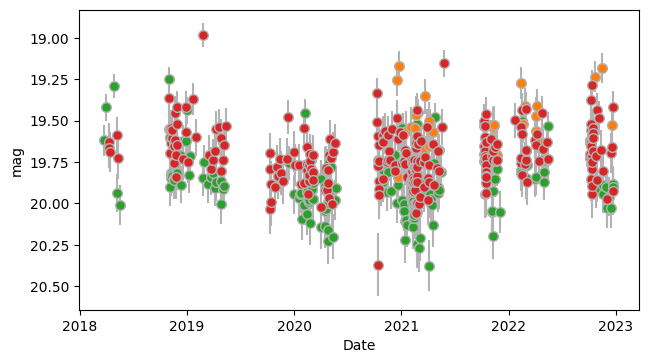

In [113]:
response.show()

In [78]:
lcq.data['oid'].unique()

array([ 417112200007375,  417212200001684,  417312200019209,
       1461101100000035, 1461201100000018])

In [80]:
lcq.data.columns

Index(['oid', 'expid', 'hjd', 'mjd', 'mag', 'magerr', 'catflags', 'filtercode',
       'ra', 'dec', 'chi', 'sharp', 'filefracday', 'field', 'ccdid', 'qid',
       'limitmag', 'magzp', 'magzprms', 'clrcoeff', 'clrcounc', 'exptime',
       'airmass', 'programid'],
      dtype='object')

In [75]:
lcq.data

,oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,...,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
0,417312200014396,143241592,2.459187e+06,59186.415926,18.025583,0.038428,0,zi,146.919451,-0.990803,...,0xc,0x2,18.660000,25.747583,0.045330,0.179012,0.000052,30,1.744,2
1,417312200014396,144548053,2.459200e+06,59199.480532,18.231007,0.044869,0,zi,146.919439,-0.990564,...,0xc,0x2,19.900000,25.750006,0.027484,0.185930,0.000017,30,1.248,2
2,417312200014396,144847416,2.459203e+06,59202.474167,18.179108,0.043137,0,zi,146.919416,-0.990515,...,0xc,0x2,20.360001,25.754106,0.019804,0.190658,0.000009,30,1.245,2
3,417312200014396,145247931,2.459207e+06,59206.479317,18.388586,0.050592,32768,zi,146.919549,-0.990515,...,0xc,0x2,19.389999,24.516586,0.038833,0.194490,0.000034,30,1.235,2
4,417312200014396,145644002,2.459211e+06,59210.440023,18.221336,0.044541,0,zi,146.919424,-0.990440,...,0xc,0x2,19.360001,25.540337,0.032178,0.188644,0.000024,30,1.263,2
5,417312200014396,146450391,2.459219e+06,59218.503912,18.274940,0.046393,0,zi,146.919466,-0.990449,...,0xc,0x2,20.510000,25.724941,0.022125,0.193242,0.000011,30,1.307,2
6,417312200014396,146727512,2.459222e+06,59221.275127,18.120882,0.041280,0,zi,146.919406,-0.990497,...,0xc,0x2,19.620001,25.658882,0.034380,0.197509,0.000027,30,2.588,2
7,417312200014396,147037938,2.459225e+06,59224.379387,18.207821,0.044086,0,zi,146.919526,-0.990524,...,0xc,0x2,20.129999,25.747822,0.026158,0.189337,0.000015,30,1.317,2
8,417312200014396,147340178,2.459228e+06,59227.401782,18.330439,0.048397,32768,zi,146.919508,-0.990488,...,0xc,0x2,20.510000,25.175438,0.026151,0.184714,0.000016,30,1.250,2
9,417312200014396,147637887,2.459231e+06,59230.378877,18.325333,0.048209,0,zi,146.919519,-0.990516,...,0xc,0x2,20.770000,25.753332,0.019828,0.189801,0.000009,30,1.275,2


# Standalone set stats

## ZTF

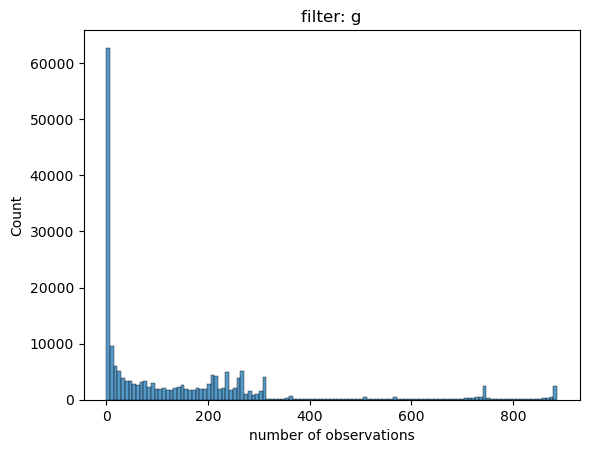

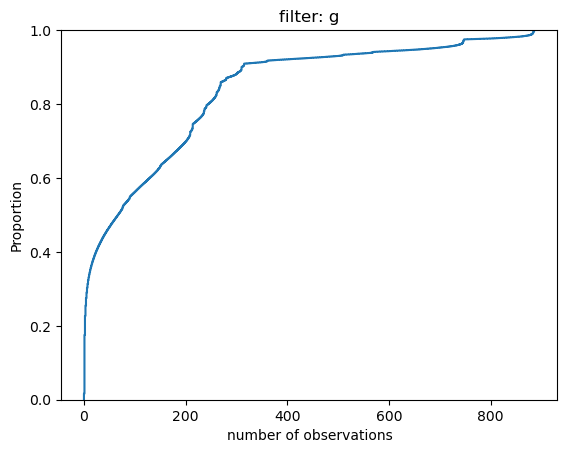

Minimum number of observations: number of objects
0: 200000 (100.0%)
1: 196716 (98.4%)
2: 164952 (82.5%)
3: 154650 (77.3%)
4: 149007 (74.5%)
5: 145026 (72.5%)
6: 141944 (71.0%)
7: 139403 (69.7%)
8: 137255 (68.6%)
9: 135368 (67.7%)
10: 133742 (66.9%)


/home/sjnakoneczny/tools/anaconda3/envs/py39-lofar-dr2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sjnakoneczny/tools/anaconda3/envs/py39-lofar-dr2/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


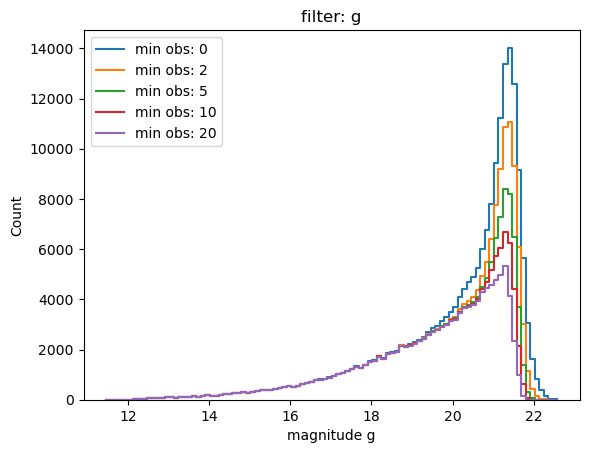

In [62]:
get_data_stats(data_g)

## SDSS

Classes:

GALAXY: STARFORMING, STARBURST, AGN

QSO

STAR

Classes: https://www.sdss4.org/dr17/spectro/catalogs/

Columns: https://data.sdss.org/datamodel/files/SPECTRO_REDUX/specObj.html

In [29]:
sdss_data = read_sdss(dr=18, clean=True)

Original SDSS: 5801200
Cleaning SDSS: 4864154


In [21]:
sdss_data.columns

Index(['PLUG_RA', 'PLUG_DEC', 'CLASS', 'SUBCLASS', 'Z', 'Z_ERR', 'ZWARNING'], dtype='object')

In [30]:
sdss_data.loc[sdss_data['CLASS'] == 'QSO', ['CLASS', 'SUBCLASS']].value_counts()

CLASS  SUBCLASS             
QSO    BROADLINE                723778
                                220379
       STARBURST BROADLINE       15825
       AGN BROADLINE              4401
       AGN                        1383
       STARBURST                   851
       STARFORMING BROADLINE       792
       STARFORMING                 217
dtype: int64

In [31]:
sdss_data.loc[sdss_data['CLASS'] == 'GALAXY', ['CLASS', 'SUBCLASS']].value_counts()

CLASS   SUBCLASS             
GALAXY                           2429576
        STARFORMING               286225
        STARBURST                  99655
        AGN                        26496
        BROADLINE                  18121
        AGN BROADLINE               4026
        STARFORMING BROADLINE       1628
        STARBURST BROADLINE          220
dtype: int64

In [35]:
sdss_data.loc[sdss_data['CLASS'] == 'STAR', ['CLASS', 'SUBCLASS']].value_counts()[:10]

CLASS  SUBCLASS         
STAR   F9                   128597
       F5                   105600
       F3/F5V (30743)        96784
       A0                    69418
       M5III (221615)        41973
       K3                    34364
       K1                    33132
       G2                    31914
       K5                    29095
       M4.5:III (123657)     25690
dtype: int64

# Coverage comparison

## Prepare datasets

In [3]:
# Read ZTF fields
fields = {}
for filter in ['g', 'r']:
    fields[filter] = np.array(read_ztf_fields(filter))

In [4]:
# Read features for fields
features_fields = {}
for filter in ['g', 'r']:
    with open(os.path.join(DATA_PATH, 'ZTF/ZTF_20210401__fields_Roestel_2M_{}__features'.format(filter)), 'rb') as file:
        features_fields[filter] = pickle.load(file)

In [5]:
field_ids = {}
for filter in ['g', 'r']:
     field_ids[filter] = np.array([obj['id'] for obj in fields[filter]])

In [6]:
# Prepare indices from cross-matches
cross_indices = {'g': {}, 'r': {}}
for filter in ['g', 'r']:
    for survey_name in FEATURE_SETS:
        cross_ids = features_fields[filter].dropna(subset=FEATURE_SETS[survey_name])['_id'].to_numpy()
        cross_indices[filter][survey_name] = np.where(np.in1d(field_ids[filter], cross_ids))[0]

In [7]:
# Read SDSS x ZTF
with open(os.path.join(DATA_PATH, 'ZTF_x_SDSS/specObj-dr18_x_ztf_20210401__singles'), 'rb') as file:
    sdss_x_ztf = pickle.load(file)

In [3]:
# Read ZTF x SDSS
with open(os.path.join(DATA_PATH, 'ZTF_x_SDSS/ztf_20210401_x_specObj-dr18__singles'), 'rb') as file:
    ztf_x_sdss = pickle.load(file)

In [29]:
# Read ZTF x SDSS
ztf_x_sdss_filter = {}
for filter in ['g', 'r']:
    with open(os.path.join(DATA_PATH, 'ZTF_x_SDSS/ztf_20210401_x_specObj-dr18__singles_filter_{}'.format(filter)), 'rb') as file:
        ztf_x_sdss_filter[filter] = pickle.load(file)

In [28]:
ztf_x_sdss_features = {}
for filter in ['g', 'r']:
    with open(os.path.join(DATA_PATH, 'ZTF_x_SDSS/ztf_20210401_x_specObj-dr18__singles_filter_{}__features'.format(filter)), 'rb') as file:
        ztf_x_sdss_features[filter] = pickle.load(file)

  0%|                                                                        | 0/322 [08:25<?, ?it/s]


In [ ]:
# Fields, general x-match
# ztf_x_sdss_filter
# sdss_x_ztf

# Features subset
# ztf_x_sdss_features
# TODO: sdss_x_ztf_features

ids_sdss = np.array([obj['id'] for obj in ztf_x_sdss_filter['g']])
idx_match = [np.where(ids_sdss == id_features)[0][0] for id_features in tqdm_notebook(ztf_x_sdss_features['g']['_id'])]
sdss_x_ztf_features = sdss_x_ztf.loc[idx_match].reset_index(drop=True)

In [32]:
%%time
sdss = read_sdss(dr=18, clean=True)

Original SDSS: 5801200
Cleaning SDSS: 4864154
CPU times: user 16.5 s, sys: 1.08 s, total: 17.6 s
Wall time: 17.6 s


In [8]:
# Get subset of SDSS x ZTF present in the features set
sdss_x_ztf_features = {}
for filter in ['g', 'r']:
    ids_sdss = np.array([obj['id'] for obj in ztf_x_sdss_filter[filter]])
    idx_match = [np.where(ids_sdss == id_features)[0][0] for id_features in tqdm(ztf_x_sdss_features[filter]['_id'])]
    sdss_x_ztf_features[filter] = sdss_x_ztf.loc[idx_match].reset_index(drop=True)

  0%|          | 0/321929 [00:00<?, ?it/s]

  0%|          | 0/406172 [00:00<?, ?it/s]

In [15]:
file_path = 'ZTF_x_SDSS/specObj-dr18_x_ztf_20210401__singles_filter_{}__features'
for filter in ['g', 'r']:
    fp = file_path.format(filter)
    with open(os.path.join(DATA_PATH, fp), 'wb') as file:
        pickle.dump(sdss_x_ztf_features[filter], file)

In [5]:
# Get subset of lightcurves present in the features set
ztf_x_sdss_train = {}
for filter in ['g', 'r']:
    ids_ztf = np.array([obj['id'] for obj in ztf_x_sdss_filter[filter]])
    idx_match = [np.where(ids_ztf == id_features)[0][0] for id_features in tqdm(ztf_x_sdss_features[filter]['_id'])]

    ztf_x_sdss_train[filter] = ztf_x_sdss_filter[filter][idx_match]

  0%|          | 0/321929 [00:00<?, ?it/s]

  0%|          | 0/406172 [00:00<?, ?it/s]

In [11]:
file_path = 'ZTF_x_SDSS/ztf_20210401_x_specObj-dr18__singles_filter_{}__features_lc'
for filter in ['g', 'r']:
    fp = file_path.format(filter)
    with open(os.path.join(DATA_PATH, fp), 'wb') as file:
        pickle.dump(ztf_x_sdss_train[filter], file)

## Inference: ZTF fields

In [23]:
# Number of objects
for filter in ['g', 'r']:
    print('Filter: {}'.format(filter))

    # Total number of objects
    n_obj_all = len(fields[filter])
    print('Number of objects: {}'.format(n_obj_all))

    # For each survey
    for survey_name in FEATURE_SETS:
        n_obj = len(fields[filter][cross_indices[filter][survey_name]])
        print('Number of objects in ZTF x {}: {} ({:.1f}%)'.format(survey_name, n_obj, n_obj / n_obj_all * 100))

    # For ZTF x PS x GAIA
    to_match = ['PS', 'GAIA']
    indices_tmp = cross_indices[filter]['ZTF']
    for survey_name in to_match:
        indices_tmp = np.intersect1d(indices_tmp, cross_indices[filter][survey_name])
    n_obj = len(indices_tmp)
    print('Number of objects in ZTF x ZTF x PS x GAIA: {} ({:.1f}%)'.format(n_obj, n_obj / n_obj_all * 100))

    # For ZTF x PS x GAIA x WISE
    to_match = ['PS', 'GAIA', 'WISE']
    indices_tmp = cross_indices[filter]['ZTF']
    for survey_name in to_match:
        indices_tmp = np.intersect1d(indices_tmp, cross_indices[filter][survey_name])
    n_obj = len(indices_tmp)
    print('Number of objects in ZTF x ZTF x PS x GAIA x WISE: {} ({:.1f}%)'.format(n_obj, n_obj / n_obj_all * 100))

    print('----------')

Filter: g
Number of objects: 200000
Number of objects in ZTF x ZTF: 92313(46.2%)
Number of objects in ZTF x WISE: 4500(2.2%)
Number of objects in ZTF x PS: 92028(46.0%)
Number of objects in ZTF x GAIA: 87034(43.5%)
Number of objects in ZTF x ZTF x PS x GAIA: 86893(43.4%)
Number of objects in ZTF x ZTF x PS x GAIA x WISE: 4009(2.0%)
----------
Filter: r
Number of objects: 200000
Number of objects in ZTF x ZTF: 102400(51.2%)
Number of objects in ZTF x WISE: 4125(2.1%)
Number of objects in ZTF x PS: 97240(48.6%)
Number of objects in ZTF x GAIA: 87261(43.6%)
Number of objects in ZTF x ZTF x PS x GAIA: 85042(42.5%)
Number of objects in ZTF x ZTF x PS x GAIA x WISE: 3412(1.7%)
----------


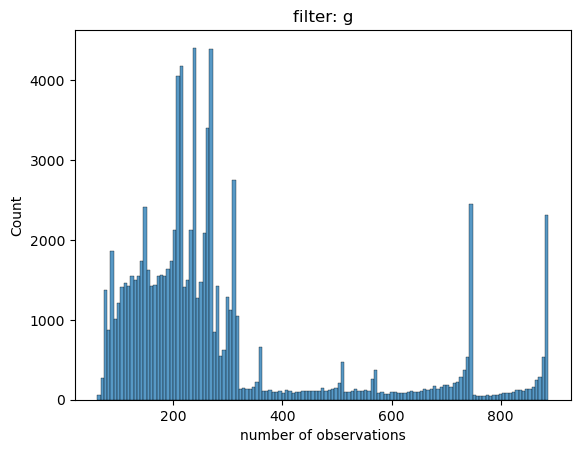

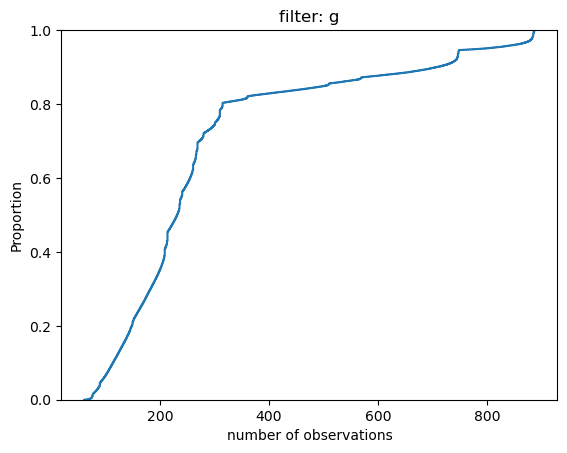

Minimum number of observations: number of objects
0: 92313 (100.0%)
1: 92313 (100.0%)
2: 92313 (100.0%)
3: 92313 (100.0%)
4: 92313 (100.0%)
5: 92313 (100.0%)
6: 92313 (100.0%)
7: 92313 (100.0%)
8: 92313 (100.0%)
9: 92313 (100.0%)
10: 92313 (100.0%)


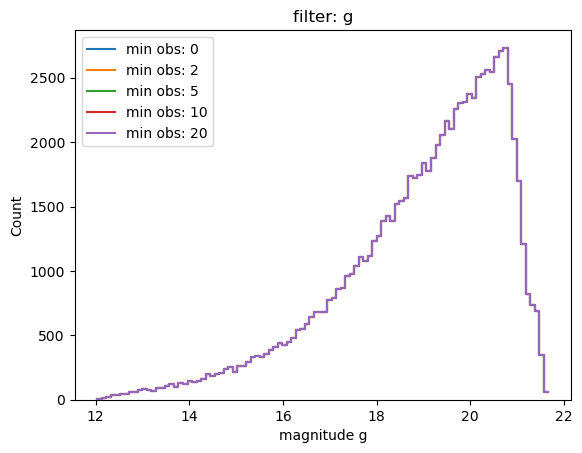

In [26]:
get_data_stats(fields['g'][cross_indices['g']['ZTF']])

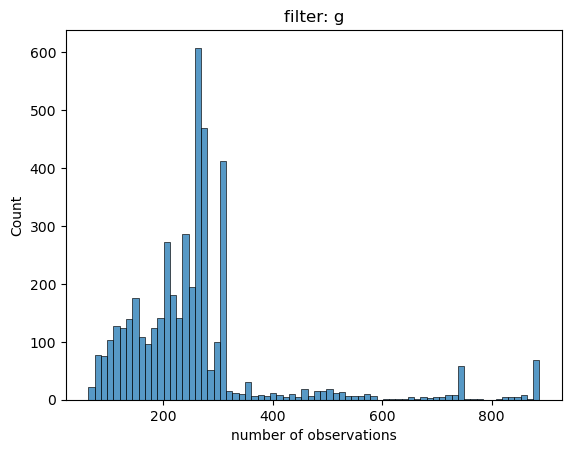

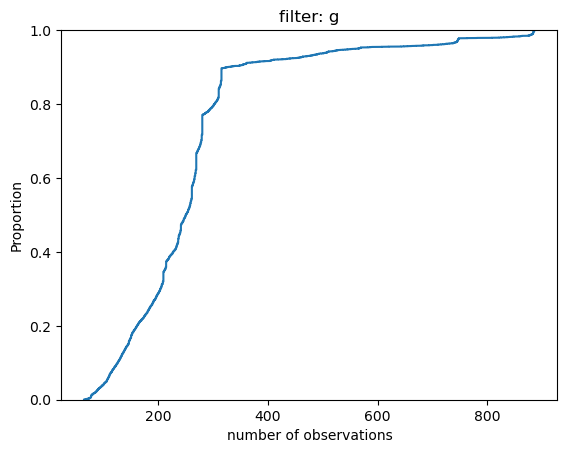

Minimum number of observations: number of objects
0: 4500 (100.0%)
1: 4500 (100.0%)
2: 4500 (100.0%)
3: 4500 (100.0%)
4: 4500 (100.0%)
5: 4500 (100.0%)
6: 4500 (100.0%)
7: 4500 (100.0%)
8: 4500 (100.0%)
9: 4500 (100.0%)
10: 4500 (100.0%)


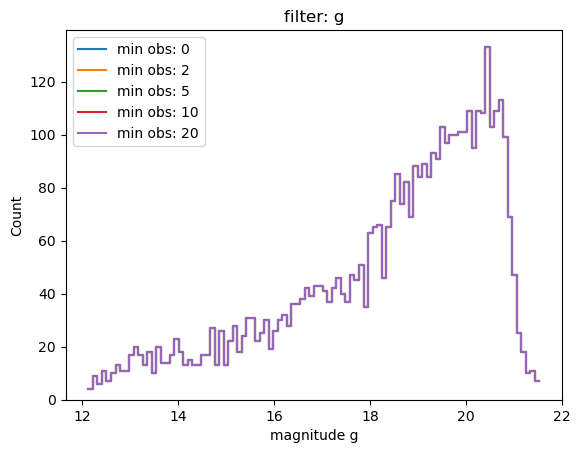

In [30]:
get_data_stats(fields['g'][cross_indices['g']['WISE']])

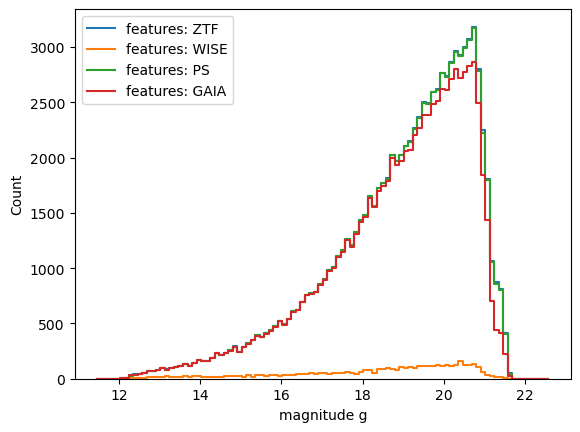

/home/sjnakoneczny/tools/anaconda3/envs/py39-lofar-dr2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sjnakoneczny/tools/anaconda3/envs/py39-lofar-dr2/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


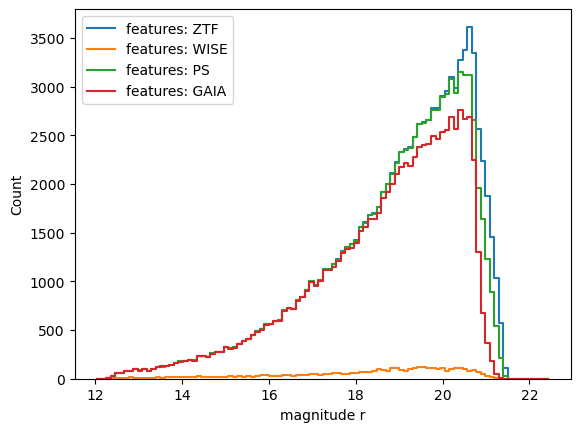

In [12]:
# Magnitude
for filter in ['g', 'r']:
    plt.figure()
    
    magnitudes = np.array([np.mean(obj['mag']) for obj in fields[filter]])
    bins = np.histogram(magnitudes[~np.isnan(magnitudes)], 100)[1]
    
    for survey_name in FEATURE_SETS:
        idx = cross_indices[filter][survey_name]
        sns.histplot(magnitudes[idx], bins=bins, element='step', fill=False, label='features: {}'.format(survey_name))
    
    plt.xlabel('magnitude {}'.format(filter))
    plt.legend()
    plt.show()

## Training: ZTF x SDSS

### ZTF x SDSS cross-matching results

In [6]:
# Number of matches
n_matches = {}
n_obs = {}
for mag in ['g', 'r', 'i']:
    n_matches[mag] = np.array([len(sdss_x_ztf[i]['id_{}'.format(mag)]) for i in range(len(sdss_x_ztf))])
    n_obs[mag] = np.array([len(sdss_x_ztf[i]['mag_{}'.format(mag)][0]) if len(sdss_x_ztf[i]['mag_{}'.format(mag)]) > 0 else 0 for i in range(len(sdss_x_ztf))])

In [8]:
for mag in ['g', 'r', 'i']:
    print('{} magnitude'.format(mag))
    
    vals, counts = np.unique(n_matches[mag], return_counts=True)
    
    for v, c in zip(vals, counts):
        print('{} matches: {:.2f}%'.format(v, c / len(sdss_x_ztf) * 100))
    print('----------')

g magnitude
0 matches: 24.36%
1 matches: 38.32%
2 matches: 31.53%
3 matches: 5.38%
4 matches: 0.39%
5 matches: 0.01%
6 matches: 0.00%
----------
r magnitude
0 matches: 6.97%
1 matches: 33.73%
2 matches: 48.93%
3 matches: 9.66%
4 matches: 0.70%
5 matches: 0.02%
6 matches: 0.00%
----------
i magnitude
0 matches: 35.17%
1 matches: 56.45%
2 matches: 7.93%
3 matches: 0.43%
4 matches: 0.02%
5 matches: 0.00%
----------


In [6]:
# Single matches in all filters and at least 10 observations
indices = np.where((n_matches['g'] == 1) & (n_matches['r'] == 1) & (n_matches['i'] == 1))[0]

print('Single matches in all filters, at least 10 observations in each: {}'.format(len(indices)))
print('Percentage of all data: {:.1f}%'.format(len(indices) / len(sdss_x_ztf) * 100))

Single matches in all filters, at least 10 observations in each: 607717
Percentage of all data: 12.5%


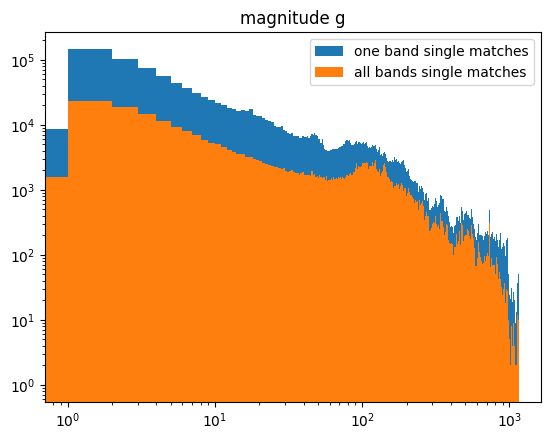

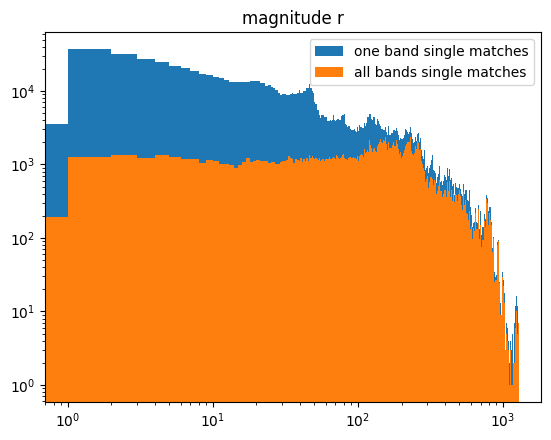

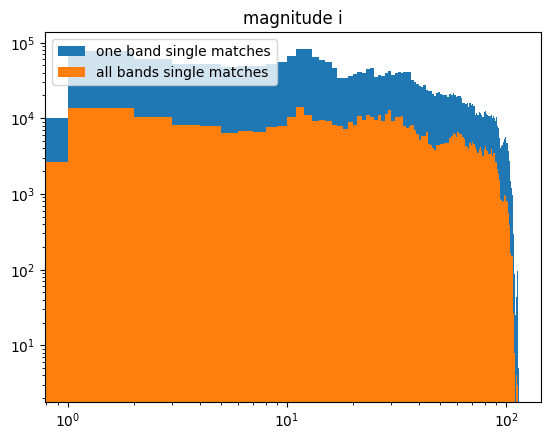

In [13]:
# Lightcurves length for single matches
for mag in ['g', 'r', 'i']:    
    
    # Only one mag single matches
    indices_single = np.where(n_matches[mag] == 1)[0]
    tmp = sdss_x_ztf[indices_single]
    lengths = [len(tmp[i]['mag_{}'.format(mag)][0]) for i in range(tmp.shape[0])]

    plt.hist(lengths, bins=np.arange(0, max(lengths) + 1), label='one band single matches')
    plt.title('Single {}'.format(mag))
    
    # All mags single matches
    tmp = sdss_x_ztf[indices]
    lengths = [len(tmp[i]['mag_{}'.format(mag)][0]) for i in range(tmp.shape[0])]
    plt.hist(lengths, bins=np.arange(0, max(lengths) + 1), label='all bands single matches')
    
    plt.title('magnitude {}'.format(mag))
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

In [7]:
# Number of observations at least 10
indices = np.where((n_matches['g'] == 1) & (n_matches['r'] == 1) & (n_matches['i'] == 1) & \
                   (n_obs['g'] >= 10) & (n_obs['r'] >= 10) & (n_obs['i'] >= 10))[0].astype(int)
print('Number of objects: {}'.format(indices.shape[0]))

Number of objects: 451462


In [8]:
train_ztf = sdss_x_ztf[indices]
train_sdss = sdss.loc[indices].reset_index(drop=True)

In [ ]:
# Save the subset of single matches
file_path = os.path.join(DATA_PATH, 'SDSS_x_ZTF/specObj-dr18_x_ztf_20210401__ztf__single-matches')
with open(file_path, 'wb') as file:
    pickle.dump(train_ztf, file)

file_path = os.path.join(DATA_PATH, 'SDSS_x_ZTF/specObj-dr18_x_ztf_20210401__sdss__single-matches')
with open(file_path, 'wb') as file:
    pickle.dump(train_sdss, file)

In [3]:
train_ztf, train_sdss = read_single_matches()

In [4]:
# Transfer labels to my specific ones
labels = pd.Series(['AGN' if (train_sdss.loc[i, 'CLASS'] == 'GALAXY') & (train_sdss.loc[i, 'SUBCLASS'] == 'AGN') else train_sdss.loc[i, 'CLASS'] for i in range(train_sdss.shape[0])])

In [5]:
labels.value_counts()

GALAXY    247605
STAR      114177
QSO        85521
AGN         4159
dtype: int64

In [6]:
# Statistics on number of observations per class and mean/variance cadence
n_obs = {}
for mag in ['g', 'r', 'i']:
    n_obs[mag] = np.array([len(train_ztf[i]['mag_{}'.format(mag)][0]) for i in range(len(train_ztf))])

In [12]:
for cls in labels.unique():
    print(cls)
    for mag in ['g', 'r', 'i']:
        idx = labels == cls
        n_obs_tmp = n_obs[mag][idx]

        p = np.percentile(n_obs_tmp, [16, 50, 84])
        q = np.diff(p)
        
        display(Latex('mag {}: ${:.0f}^{{+{:.0f}}}_{{-{:.0f}}}$'.format(mag, p[1], q[1], q[0])))
    print('----------')

QSO


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

----------
GALAXY


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

----------
STAR


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

----------
AGN


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

----------


### Single matches subset

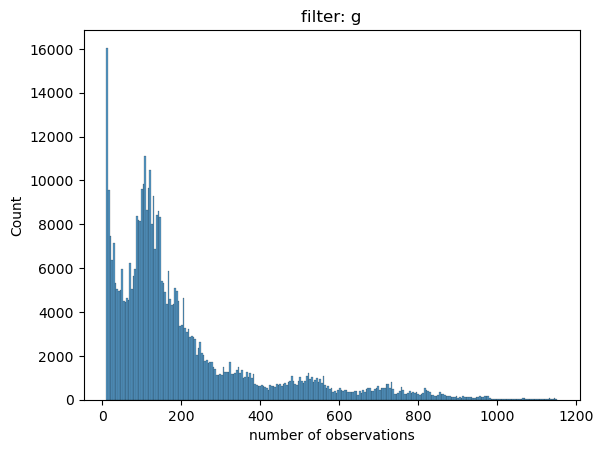

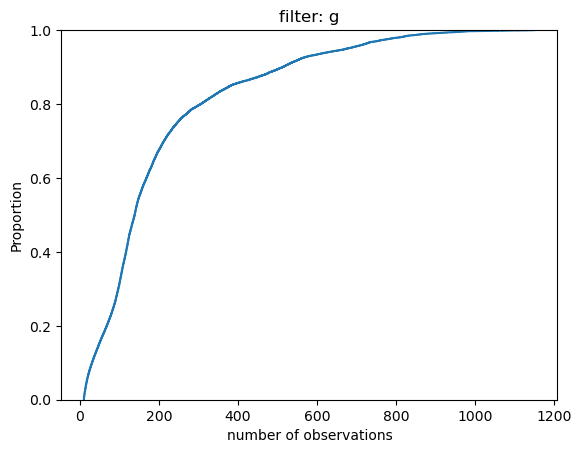

Minimum number of observations: number of objects
0: 451462 (100.0%)
1: 451462 (100.0%)
2: 451462 (100.0%)
3: 451462 (100.0%)
4: 451462 (100.0%)
5: 451462 (100.0%)
6: 451462 (100.0%)
7: 451462 (100.0%)
8: 451462 (100.0%)
9: 451462 (100.0%)
10: 451462 (100.0%)


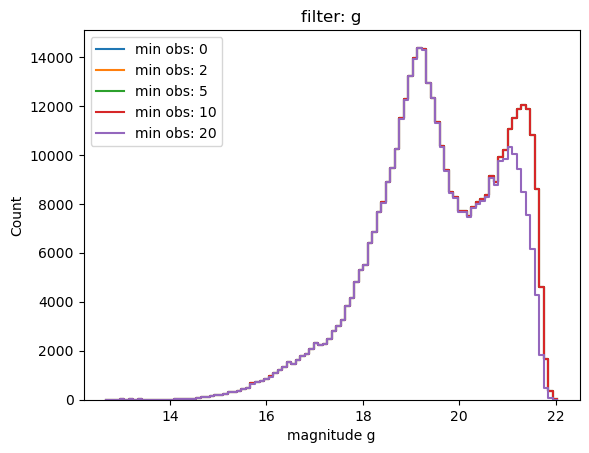

In [36]:
get_data_stats(get_filter(ztf_x_sdss, 'g'))

In [6]:
len(ztf_x_sdss)

451462

In [7]:
ztf_x_sdss_features['g'].shape

(321929, 83)

In [99]:
# Number of objects
for filter in ['g', 'r']:
    print('Filter: {}'.format(filter))
    
    # Total number of objects
    n_obj_all = len(ztf_x_sdss_features[filter])
    print('Number of objects: {}'.format(n_obj_all))

    # For each survey
    for survey_name in FEATURE_SETS:
        n_obj = len(ztf_x_sdss_features[filter].dropna(subset=FEATURE_SETS[survey_name]))
        print('Number of objects in ZTF x {}: {} ({:.1f}%)'.format(survey_name, n_obj, n_obj / n_obj_all * 100))

    # For ZTF x PS x GAIA
    to_match = ['PS', 'GAIA']
    data_tmp = ztf_x_sdss_features[filter]
    for survey_name in to_match:
        data_tmp = data_tmp.dropna(subset=FEATURE_SETS[survey_name])
    n_obj = len(data_tmp)
    print('Number of objects in ZTF x ZTF x PS x GAIA: {} ({:.1f}%)'.format(n_obj, n_obj / n_obj_all * 100))

    # For ZTF x PS x GAIA x WISE
    to_match = ['PS', 'GAIA', 'WISE']
    data_tmp = ztf_x_sdss_features[filter]
    for survey_name in to_match:
        data_tmp = data_tmp.dropna(subset=FEATURE_SETS[survey_name])
    n_obj = len(data_tmp)
    print('Number of objects in ZTF x ZTF x PS x GAIA x WISE: {} ({:.1f}%)'.format(n_obj, n_obj / n_obj_all * 100))

    print('----------')

Filter: g
Number of objects: 321929
Number of objects in ZTF x ZTF: 321917 (100.0%)
Number of objects in ZTF x WISE: 73733 (22.9%)
Number of objects in ZTF x PS: 320341 (99.5%)
Number of objects in ZTF x GAIA: 157428 (48.9%)
Number of objects in ZTF x ZTF x PS x GAIA: 157087 (48.8%)
Number of objects in ZTF x ZTF x PS x GAIA x WISE: 28494 (8.9%)
----------
Filter: r
Number of objects: 406172
Number of objects in ZTF x ZTF: 406172 (100.0%)
Number of objects in ZTF x WISE: 79746 (19.6%)
Number of objects in ZTF x PS: 400386 (98.6%)
Number of objects in ZTF x GAIA: 169293 (41.7%)
Number of objects in ZTF x ZTF x PS x GAIA: 168827 (41.6%)
Number of objects in ZTF x ZTF x PS x GAIA x WISE: 29409 (7.2%)
----------


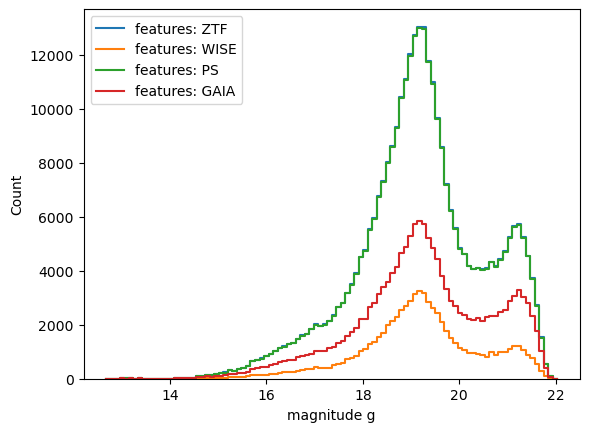

In [25]:
# Magnitude
for filter in ['g']:
    plt.figure()
    
    data_tmp = get_filter(ztf_x_sdss, filter)
    
    magnitudes = np.array([np.mean(obj['mag']) for obj in data_tmp])
    bins = np.histogram(magnitudes[~np.isnan(magnitudes)], 100)[1]
    
    for survey_name in FEATURE_SETS:
        idx = ztf_x_sdss_features[filter].dropna(subset=FEATURE_SETS[survey_name]).index
        sns.histplot(magnitudes[idx], bins=bins, element='step', fill=False, label='features: {}'.format(survey_name))
    
    plt.xlabel('magnitude {}'.format(filter))
    plt.legend()
    plt.show()

In [34]:
sdss_x_ztf

,PLUG_RA,PLUG_DEC,CLASS,SUBCLASS,Z,Z_ERR,ZWARNING
0,192.38751,1.106294,QSO,BROADLINE,2.996559,0.000354,0
1,192.54601,1.152371,GALAXY,,0.190014,0.000044,0
2,192.68486,1.229603,GALAXY,,0.099754,0.000020,0
3,192.65735,1.222793,GALAXY,,0.146089,0.000022,0
4,192.73025,1.241570,GALAXY,,0.100697,0.000031,0
...,...,...,...,...,...,...,...
451457,145.13940,25.488018,GALAXY,STARFORMING,0.033826,0.000014,0
451458,144.28089,27.452787,QSO,BROADLINE,0.495892,0.000083,0
451459,144.18225,27.015636,QSO,STARBURST BROADLINE,0.220482,0.000029,0
451460,144.29654,26.997516,STAR,F0II (25291),-0.000004,0.000011,0


In [100]:
# Class distribution
for filter in ['g', 'r']:
    print('Filter: {}'.format(filter))
    
    # SDSS x ZTF (any number of observations)
    n_obj_all = len(sdss_x_ztf)
    print('SDSS x ZTF singles: {}'.format(n_obj_all))
    print(sdss_x_ztf['CLASS'].value_counts(normalize=False))
    
    # SDSS x ZTF features
    n_obj_all = len(sdss_x_ztf_features)
    print('SDSS x ZTF features: {}'.format(n_obj_all))
    print(sdss_x_ztf_features['CLASS'].value_counts(normalize=False))
    
    # SDSS x ZTF features x each survey
    for survey_name in FEATURE_SETS:
        cols = FEATURE_SETS[survey_name]
        idx_tmp = ztf_x_sdss_features[filter].dropna(subset=cols).index
        data_tmp = sdss_x_ztf_features.loc[idx_tmp]
        n_obj_all = len(data_tmp)
        print('SDSS x ZTF features x {}: {}'.format(survey_name, n_obj_all))
        print(data_tmp['CLASS'].value_counts(normalize=False))
    
    # SDSS x ZTF features x PS x Gaia x WISE
    cols = [FEATURE_SETS[survey_name] for survey_name in FEATURE_SETS]
    cols = np.concatenate(cols)
    idx_tmp = ztf_x_sdss_features[filter].dropna(subset=cols).index
    data_tmp = sdss_x_ztf_features.loc[idx_tmp]
    n_obj_all = len(data_tmp)
    print('SDSS x ZTF features x PS x GAIA x WISE: {}'.format(n_obj_all))
    print(data_tmp['CLASS'].value_counts(normalize=False))
    
    print('----------')

Filter: g
SDSS x ZTF singles: 451462
GALAXY    251764
STAR      114177
QSO        85521
Name: CLASS, dtype: int64
SDSS x ZTF features: 321929
GALAXY    164151
STAR       93893
QSO        63885
Name: CLASS, dtype: int64
SDSS x ZTF features x ZTF: 321917
GALAXY    164143
STAR       93893
QSO        63881
Name: CLASS, dtype: int64
SDSS x ZTF features x WISE: 73733
GALAXY    47113
QSO       25337
STAR       1283
Name: CLASS, dtype: int64
SDSS x ZTF features x PS: 320341
GALAXY    163060
STAR       93706
QSO        63575
Name: CLASS, dtype: int64
SDSS x ZTF features x GAIA: 157428
STAR      92215
QSO       55453
GALAXY     9760
Name: CLASS, dtype: int64
SDSS x ZTF features x PS x GAIA x WISE: 28493
QSO       24082
GALAXY     3158
STAR       1253
Name: CLASS, dtype: int64
----------
Filter: r
SDSS x ZTF singles: 451462
GALAXY    251764
STAR      114177
QSO        85521
Name: CLASS, dtype: int64
SDSS x ZTF features: 321929
GALAXY    164151
STAR       93893
QSO        63885
Name: CLASS, dtype:

KeyError: '[321929, 321930, 321931, 321932, 321933, 321934, 321935, 321936, 321937, 321938, 321939, 321940, 321941, 321942, 321943, 321944, 321945, 321946, 321947, 321948, 321949, 321950, 321951, 321952, 321953, 321954, 321955, 321956, 321957, 321958, 321959, 321960, 321961, 321962, 321963, 321964, 321965, 321966, 321967, 321968, 321969, 321970, 321971, 321972, 321973, 321974, 321975, 321976, 321977, 321978, 321979, 321980, 321981, 321982, 321983, 321984, 321985, 321986, 321987, 321988, 321989, 321990, 321991, 321992, 321993, 321994, 321995, 321996, 321997, 321998, 321999, 322000, 322001, 322002, 322003, 322004, 322005, 322006, 322007, 322008, 322009, 322010, 322011, 322012, 322013, 322014, 322015, 322016, 322017, 322018, 322019, 322020, 322021, 322022, 322023, 322024, 322025, 322026, 322027, 322028, 322029, 322030, 322031, 322032, 322033, 322034, 322035, 322036, 322037, 322038, 322039, 322040, 322041, 322042, 322043, 322044, 322045, 322046, 322047, 322048, 322049, 322050, 322051, 322052, 322053, 322054, 322055, 322056, 322057, 322058, 322059, 322060, 322061, 322062, 322063, 322064, 322065, 322066, 322067, 322068, 322069, 322070, 322071, 322072, 322073, 322074, 322075, 322076, 322077, 322078, 322079, 322080, 322081, 322082, 322083, 322084, 322085, 322086, 322087, 322088, 322089, 322090, 322091, 322092, 322093, 322094, 322095, 322096, 322097, 322098, 322099, 322100, 322101, 322102, 322103, 322104, 322105, 322106, 322107, 322108, 322109, 322110, 322111, 322112, 322113, 322114, 322115, 322116, 322117, 322118, 322119, 322120, 322121, 322122, 322123, 322124, 322125, 322126, 322127, 322128, 322129, 322130, 322131, 322132, 322133, 322134, 322135, 322136, 322137, 322138, 322139, 322140, 322141, 322142, 322143, 322144, 322145, 322146, 322147, 322148, 322149, 322150, 322151, 322152, 322153, 322154, 322155, 322156, 322157, 322158, 322159, 322160, 322161, 322162, 322163, 322164, 322165, 322166, 322167, 322168, 322169, 322170, 322171, 322172, 322173, 322174, 322175, 322176, 322177, 322178, 322179, 322180, 322181, 322182, 322183, 322184, 322185, 322186, 322187, 322188, 322189, 322190, 322191, 322192, 322193, 322194, 322195, 322196, 322197, 322198, 322199, 322200, 322201, 322202, 322203, 322204, 322205, 322206, 322207, 322208, 322209, 322210, 322211, 322212, 322213, 322214, 322215, 322216, 322217, 322218, 322219, 322220, 322221, 322222, 322223, 322224, 322225, 322226, 322227, 322228, 322229, 322230, 322231, 322232, 322233, 322234, 322235, 322236, 322237, 322238, 322239, 322240, 322241, 322242, 322243, 322244, 322245, 322246, 322247, 322248, 322249, 322250, 322251, 322252, 322253, 322254, 322255, 322256, 322257, 322258, 322259, 322260, 322261, 322262, 322263, 322264, 322265, 322266, 322267, 322268, 322269, 322270, 322271, 322272, 322273, 322274, 322275, 322276, 322277, 322278, 322279, 322280, 322281, 322282, 322283, 322284, 322285, 322286, 322287, 322288, 322289, 322290, 322291, 322292, 322293, 322294, 322295, 322296, 322297, 322298, 322299, 322300, 322301, 322302, 322303, 322304, 322305, 322306, 322307, 322308, 322309, 322310, 322311, 322312, 322313, 322314, 322315, 322316, 322317, 322318, 322319, 322320, 322321, 322322, 322323, 322324, 322325, 322326, 322327, 322328, 322329, 322330, 322331, 322332, 322333, 322334, 322335, 322336, 322337, 322338, 322339, 322340, 322341, 322342, 322343, 322344, 322345, 322346, 322347, 322348, 322349, 322350, 322351, 322352, 322353, 322354, 322355, 322356, 322357, 322358, 322359, 322360, 322361, 322362, 322363, 322364, 322365, 322366, 322367, 322368, 322369, 322370, 322371, 322372, 322373, 322374, 322375, 322376, 322377, 322378, 322379, 322380, 322381, 322382, 322383, 322384, 322385, 322386, 322387, 322388, 322389, 322390, 322391, 322392, 322393, 322394, 322395, 322396, 322397, 322398, 322399, 322400, 322401, 322402, 322403, 322404, 322405, 322406, 322407, 322408, 322409, 322410, 322411, 322412, 322413, 322414, 322415, 322416, 322417, 322418, 322419, 322420, 322421, 322422, 322423, 322424, 322425, 322426, 322427, 322428, 322429, 322430, 322431, 322432, 322433, 322434, 322435, 322436, 322437, 322438, 322439, 322440, 322441, 322442, 322443, 322444, 322445, 322446, 322447, 322448, 322449, 322450, 322451, 322452, 322453, 322454, 322455, 322456, 322457, 322458, 322459, 322460, 322461, 322462, 322463, 322464, 322465, 322466, 322467, 322468, 322469, 322470, 322471, 322472, 322473, 322474, 322475, 322476, 322477, 322478, 322479, 322480, 322481, 322482, 322483, 322484, 322485, 322486, 322487, 322488, 322489, 322490, 322491, 322492, 322493, 322494, 322495, 322496, 322497, 322498, 322499, 322500, 322501, 322502, 322503, 322504, 322505, 322506, 322507, 322508, 322509, 322510, 322511, 322512, 322513, 322514, 322515, 322516, 322517, 322518, 322519, 322520, 322521, 322522, 322523, 322524, 322525, 322526, 322527, 322528, 322529, 322530, 322531, 322532, 322533, 322534, 322535, 322536, 322537, 322538, 322539, 322540, 322541, 322542, 322543, 322544, 322545, 322546, 322547, 322548, 322549, 322550, 322551, 322552, 322553, 322554, 322555, 322556, 322557, 322558, 322559, 322560, 322561, 322562, 322563, 322564, 322565, 322566, 322567, 322568, 322569, 322570, 322571, 322572, 322573, 322574, 322575, 322576, 322577, 322578, 322579, 322580, 322581, 322582, 322583, 322584, 322585, 322586, 322587, 322588, 322589, 322590, 322591, 322592, 322593, 322594, 322595, 322596, 322597, 322598, 322599, 322600, 322601, 322602, 322603, 322604, 322605, 322606, 322607, 322608, 322609, 322610, 322611, 322612, 322613, 322614, 322615, 322616, 322617, 322618, 322619, 322620, 322621, 322622, 322623, 322624, 322625, 322626, 322627, 322628, 322629, 322630, 322631, 322632, 322633, 322634, 322635, 322636, 322637, 322638, 322639, 322640, 322641, 322642, 322643, 322644, 322645, 322646, 322647, 322648, 322649, 322650, 322651, 322652, 322653, 322654, 322655, 322656, 322657, 322658, 322659, 322660, 322661, 322662, 322663, 322664, 322665, 322666, 322667, 322668, 322669, 322670, 322671, 322672, 322673, 322674, 322675, 322676, 322677, 322678, 322679, 322680, 322681, 322682, 322683, 322684, 322685, 322686, 322687, 322688, 322689, 322690, 322691, 322692, 322693, 322694, 322695, 322696, 322697, 322698, 322699, 322700, 322701, 322702, 322703, 322704, 322705, 322706, 322707, 322708, 322709, 322710, 322711, 322712, 322713, 322714, 322715, 322716, 322717, 322718, 322719, 322720, 322721, 322722, 322723, 322724, 322725, 322726, 322727, 322728, 322729, 322730, 322731, 322732, 322733, 322734, 322735, 322736, 322737, 322738, 322739, 322740, 322741, 322742, 322743, 322744, 322745, 322746, 322747, 322748, 322749, 322750, 322751, 322752, 322753, 322754, 322755, 322756, 322757, 322758, 322759, 322760, 322761, 322762, 322763, 322764, 322765, 322766, 322767, 322768, 322769, 322770, 322771, 322772, 322773, 322774, 322775, 322776, 322777, 322778, 322779, 322780, 322781, 322782, 322783, 322784, 322785, 322786, 322787, 322788, 322789, 322790, 322791, 322792, 322793, 322794, 322795, 322796, 322797, 322798, 322799, 322800, 322801, 322802, 322803, 322804, 322805, 322806, 322807, 322808, 322809, 322810, 322811, 322812, 322813, 322814, 322815, 322816, 322817, 322818, 322819, 322820, 322821, 322822, 322823, 322824, 322825, 322826, 322827, 322828, 322829, 322830, 322831, 322832, 322833, 322834, 322835, 322836, 322837, 322838, 322839, 322840, 322841, 322842, 322843, 322844, 322845, 322846, 322847, 322848, 322849, 322850, 322851, 322852, 322853, 322854, 322855, 322856, 322857, 322858, 322859, 322860, 322861, 322862, 322863, 322864, 322865, 322866, 322867, 322868, 322869, 322870, 322871, 322872, 322873, 322874, 322875, 322876, 322877, 322878, 322879, 322880, 322881, 322882, 322883, 322884, 322885, 322886, 322887, 322888, 322889, 322890, 322891, 322892, 322893, 322894, 322895, 322896, 322897, 322898, 322899, 322900, 322901, 322902, 322903, 322904, 322905, 322906, 322907, 322908, 322909, 322910, 322911, 322912, 322913, 322914, 322915, 322916, 322917, 322918, 322919, 322920, 322921, 322922, 322923, 322924, 322925, 322926, 322927, 322928, 322929, 322930, 322931, 322932, 322933, 322934, 322935, 322936, 322937, 322938, 322939, 322940, 322941, 322942, 322943, 322944, 322945, 322946, 322947, 322948, 322949, 322950, 322951, 322952, 322953, 322954, 322955, 322956, 322957, 322958, 322959, 322960, 322961, 322962, 322963, 322964, 322965, 322966, 322967, 322968, 322969, 322970, 322971, 322972, 322973, 322974, 322975, 322976, 322977, 322978, 322979, 322980, 322981, 322982, 322983, 322984, 322985, 322986, 322987, 322988, 322989, 322990, 322991, 322992, 322993, 322994, 322995, 322996, 322997, 322998, 322999, 323000, 323001, 323002, 323003, 323004, 323005, 323006, 323007, 323008, 323009, 323010, 323011, 323012, 323013, 323014, 323015, 323016, 323017, 323018, 323019, 323020, 323021, 323022, 323023, 323024, 323025, 323026, 323027, 323028, 323029, 323030, 323031, 323032, 323033, 323034, 323035, 323036, 323037, 323038, 323039, 323040, 323041, 323042, 323043, 323044, 323045, 323046, 323047, 323048, 323049, 323050, 323051, 323052, 323053, 323054, 323055, 323056, 323057, 323058, 323059, 323060, 323061, 323062, 323063, 323064, 323065, 323066, 323067, 323068, 323069, 323070, 323071, 323072, 323073, 323074, 323075, 323076, 323077, 323078, 323079, 323080, 323081, 323082, 323083, 323084, 323085, 323086, 323087, 323088, 323089, 323090, 323091, 323092, 323093, 323094, 323095, 323096, 323097, 323098, 323099, 323100, 323101, 323102, 323103, 323104, 323105, 323106, 323107, 323108, 323109, 323110, 323111, 323112, 323113, 323114, 323115, 323116, 323117, 323118, 323119, 323120, 323121, 323122, 323123, 323124, 323125, 323126, 323127, 323128, 323129, 323130, 323131, 323132, 323133, 323134, 323135, 323136, 323137, 323138, 323139, 323140, 323141, 323142, 323143, 323144, 323145, 323146, 323147, 323148, 323149, 323150, 323151, 323152, 323153, 323154, 323155, 323156, 323157, 323158, 323159, 323160, 323161, 323162, 323163, 323164, 323165, 323166, 323167, 323168, 323169, 323170, 323171, 323172, 323173, 323174, 323175, 323176, 323177, 323178, 323179, 323180, 323181, 323182, 323183, 323184, 323185, 323186, 323187, 323188, 323189, 323190, 323191, 323192, 323193, 323194, 323195, 323196, 323197, 323198, 323199, 323200, 323201, 323202, 323203, 323204, 323205, 323206, 323207, 323208, 323209, 323210, 323211, 323212, 323213, 323214, 323215, 323216, 323217, 323218, 323219, 323220, 323221, 323222, 323223, 323224, 323225, 323226, 323227, 323228, 323229, 323230, 323231, 323232, 323233, 323234, 323235, 323236, 323237, 323238, 323239, 323240, 323241, 323242, 323243, 323244, 323245, 323246, 323247, 323248, 323249, 323250, 323251, 323252, 323253, 323254, 323255, 323256, 323257, 323258, 323259, 323260, 323261, 323262, 323263, 323264, 323265, 323266, 323267, 323268, 323269, 323270, 323271, 323272, 323273, 323274, 323275, 323276, 323277, 323278, 323279, 323280, 323281, 323282, 323283, 323284, 323285, 323286, 323287, 323288, 323289, 323290, 323291, 323292, 323293, 323294, 323295, 323296, 323297, 323298, 323299, 323300, 323301, 323302, 323303, 323304, 323305, 323306, 323307, 323308, 323309, 323310, 323311, 323312, 323313, 323314, 323315, 323316, 323317, 323318, 323319, 323320, 323321, 323322, 323323, 323324, 323325, 323326, 323327, 323328, 323329, 323330, 323331, 323332, 323333, 323334, 323335, 323336, 323337, 323338, 323339, 323340, 323341, 323342, 323343, 323344, 323345, 323346, 323347, 323348, 323349, 323350, 323351, 323352, 323353, 323354, 323355, 323356, 323357, 323358, 323359, 323360, 323361, 323362, 323363, 323364, 323365, 323366, 323367, 323368, 323369, 323370, 323371, 323372, 323373, 323374, 323375, 323376, 323377, 323378, 323379, 323380, 323381, 323382, 323383, 323384, 323385, 323386, 323387, 323388, 323389, 323390, 323391, 323392, 323393, 323394, 323395, 323396, 323397, 323398, 323399, 323400, 323401, 323402, 323403, 323404, 323405, 323406, 323407, 323408, 323409, 323410, 323411, 323412, 323413, 323414, 323415, 323416, 323417, 323418, 323419, 323420, 323421, 323422, 323423, 323424, 323425, 323426, 323427, 323428, 323429, 323430, 323431, 323432, 323433, 323434, 323435, 323436, 323437, 323438, 323439, 323440, 323441, 323442, 323443, 323444, 323445, 323446, 323447, 323448, 323449, 323450, 323451, 323452, 323453, 323454, 323455, 323456, 323457, 323458, 323459, 323460, 323461, 323462, 323463, 323464, 323465, 323466, 323467, 323468, 323469, 323470, 323471, 323472, 323473, 323474, 323475, 323476, 323477, 323478, 323479, 323480, 323481, 323482, 323483, 323484, 323485, 323486, 323487, 323488, 323489, 323490, 323491, 323492, 323493, 323494, 323495, 323496, 323497, 323498, 323499, 323500, 323501, 323502, 323503, 323504, 323505, 323506, 323507, 323508, 323509, 323510, 323511, 323512, 323513, 323514, 323515, 323516, 323517, 323518, 323519, 323520, 323521, 323522, 323523, 323524, 323525, 323526, 323527, 323528, 323529, 323530, 323531, 323532, 323533, 323534, 323535, 323536, 323537, 323538, 323539, 323540, 323541, 323542, 323543, 323544, 323545, 323546, 323547, 323548, 323549, 323550, 323551, 323552, 323553, 323554, 323555, 323556, 323557, 323558, 323559, 323560, 323561, 323562, 323563, 323564, 323565, 323566, 323567, 323568, 323569, 323570, 323571, 323572, 323573, 323574, 323575, 323576, 323577, 323578, 323579, 323580, 323581, 323582, 323583, 323584, 323585, 323586, 323587, 323588, 323589, 323590, 323591, 323592, 323593, 323594, 323595, 323596, 323597, 323598, 323599, 323600, 323601, 323602, 323603, 323604, 323605, 323606, 323607, 323608, 323609, 323610, 323611, 323612, 323613, 323614, 323615, 323616, 323617, 323618, 323619, 323620, 323621, 323622, 323623, 323624, 323625, 323626, 323627, 323628, 323629, 323630, 323631, 323632, 323633, 323634, 323635, 323636, 323637, 323638, 323639, 323640, 323641, 323642, 323643, 323644, 323645, 323646, 323647, 323648, 323649, 323650, 323651, 323652, 323653, 323654, 323655, 323656, 323657, 323658, 323659, 323660, 323661, 323662, 323663, 323664, 323665, 323666, 323667, 323668, 323669, 323670, 323671, 323672, 323673, 323674, 323675, 323676, 323677, 323678, 323679, 323680, 323681, 323682, 323683, 323684, 323685, 323686, 323687, 323688, 323689, 323690, 323691, 323692, 323693, 323694, 323695, 323696, 323697, 323698, 323699, 323700, 323701, 323702, 323703, 323704, 323705, 323706, 323707, 323708, 323709, 323710, 323711, 323712, 323713, 323714, 323715, 323716, 323717, 323718, 323719, 323720, 323721, 323722, 323723, 323724, 323725, 323726, 323727, 323728, 323729, 323730, 323731, 323732, 323733, 323734, 323735, 323736, 323737, 323738, 323739, 323740, 323741, 323742, 323743, 323744, 323745, 323746, 323747, 323748, 323749, 323750, 323751, 323752, 323753, 323754, 323755, 323756, 323757, 323758, 323759, 323760, 323761, 323762, 323763, 323764, 323765, 323766, 323767, 323768, 323769, 323770, 323771, 323772, 323773, 323774, 323775, 323776, 323777, 323778, 323779, 323780, 323781, 323782, 323783, 323784, 323785, 323786, 323787, 323788, 323789, 323790, 323791, 323792, 323793, 323794, 323795, 323796, 323797, 323798, 323799, 323800, 323801, 323802, 323803, 323804, 323805, 323806, 323807, 323808, 323809, 323810, 323811, 323812, 323813, 323814, 323815, 323816, 323817, 323818, 323819, 323820, 323821, 323822, 323823, 323824, 323825, 323826, 323827, 323828, 323829, 323830, 323831, 323832, 323833, 323834, 323835, 323836, 323837, 323838, 323839, 323840, 323841, 323842, 323843, 323844, 323845, 323846, 323847, 323848, 323849, 323850, 323851, 323852, 323853, 323854, 323855, 323856, 323857, 323858, 323859, 323860, 323861, 323862, 323863, 323864, 323865, 323866, 323867, 323868, 323869, 323870, 323871, 323872, 323873, 323874, 323875, 323876, 323877, 323878, 323879, 323880, 323881, 323882, 323883, 323884, 323885, 323886, 323887, 323888, 323889, 323890, 323891, 323892, 323893, 323894, 323895, 323896, 323897, 323898, 323899, 323900, 323901, 323902, 323903, 323904, 323905, 323906, 323907, 323908, 323909, 323910, 323911, 323912, 323913, 323914, 323915, 323916, 323917, 323918, 323919, 323920, 323921, 323922, 323923, 323924, 323925, 323926, 323927, 323928, 323929, 323930, 323931, 323932, 323933, 323934, 323935, 323936, 323937, 323938, 323939, 323940, 323941, 323942, 323943, 323944, 323945, 323946, 323947, 323948, 323949, 323950, 323951, 323952, 323953, 323954, 323955, 323956, 323957, 323958, 323959, 323960, 323961, 323962, 323963, 323964, 323965, 323966, 323967, 323968, 323969, 323970, 323971, 323972, 323973, 323974, 323975, 323976, 323977, 323978, 323979, 323980, 323981, 323982, 323983, 323984, 323985, 323986, 323987, 323988, 323989, 323990, 323991, 323992, 323993, 323994, 323995, 323996, 323997, 323998, 323999, 324000, 324001, 324002, 324003, 324004, 324005, 324006, 324007, 324008, 324009, 324010, 324011, 324012, 324013, 324014, 324015, 324016, 324017, 324018, 324019, 324020, 324021, 324022, 324023, 324024, 324025, 324026, 324027, 324028, 324029, 324030, 324031, 324032, 324033, 324034, 324035, 324036, 324037, 324038, 324039, 324040, 324041, 324042, 324043, 324044, 324045, 324046, 324047, 324048, 324049, 324050, 324051, 324052, 324053, 324054, 324055, 324056, 324057, 324058, 324059, 324060, 324061, 324062, 324063, 324064, 324065, 324066, 324067, 324068, 324069, 324070, 324071, 324072, 324073, 324074, 324075, 324076, 324077, 324078, 324079, 324080, 324081, 324082, 324083, 324084, 324085, 324086, 324087, 324088, 324089, 324090, 324091, 324092, 324093, 324094, 324095, 324096, 324097, 324098, 324099, 324100, 324101, 324102, 324103, 324104, 324105, 324106, 324107, 324108, 324109, 324110, 324111, 324112, 324113, 324114, 324115, 324116, 324117, 324118, 324119, 324120, 324121, 324122, 324123, 324124, 324125, 324126, 324127, 324128, 324129, 324130, 324131, 324132, 324133, 324134, 324135, 324136, 324137, 324138, 324139, 324140, 324141, 324142, 324143, 324144, 324145, 324146, 324147, 324148, 324149, 324150, 324151, 324152, 324153, 324154, 324155, 324156, 324157, 324158, 324159, 324160, 324161, 324162, 324163, 324164, 324165, 324166, 324167, 324168, 324169, 324170, 324171, 324172, 324173, 324174, 324175, 324176, 324177, 324178, 324179, 324180, 324181, 324182, 324183, 324184, 324185, 324186, 324187, 324188, 324189, 324190, 324191, 324192, 324193, 324194, 324195, 324196, 324197, 324198, 324199, 324200, 324201, 324202, 324203, 324204, 324205, 324206, 324207, 324208, 324209, 324210, 324211, 324212, 324213, 324214, 324215, 324216, 324217, 324218, 324219, 324220, 324221, 324222, 324223, 324224, 324225, 324226, 324227, 324228, 324229, 324230, 324231, 324232, 324233, 324234, 324235, 324236, 324237, 324238, 324239, 324240, 324241, 324242, 324243, 324244, 324245, 324246, 324247, 324248, 324249, 324250, 324251, 324252, 324253, 324254, 324255, 324256, 324257, 324258, 324259, 324260, 324261, 324262, 324263, 324264, 324265, 324266, 324267, 324268, 324269, 324270, 324271, 324272, 324273, 324274, 324275, 324276, 324277, 324278, 324279, 324280, 324281, 324282, 324283, 324284, 324285, 324286, 324287, 324288, 324289, 324290, 324291, 324292, 324293, 324294, 324295, 324296, 324297, 324298, 324299, 324300, 324301, 324302, 324303, 324304, 324305, 324306, 324307, 324308, 324309, 324310, 324311, 324312, 324313, 324314, 324315, 324316, 324317, 324318, 324319, 324320, 324321, 324322, 324323, 324324, 324325, 324326, 324327, 324328, 324329, 324330, 324331, 324332, 324333, 324334, 324335, 324336, 324337, 324338, 324339, 324340, 324341, 324342, 324343, 324344, 324345, 324346, 324347, 324348, 324349, 324350, 324351, 324352, 324353, 324354, 324355, 324356, 324357, 324358, 324359, 324360, 324361, 324362, 324363, 324364, 324365, 324366, 324367, 324368, 324369, 324370, 324371, 324372, 324373, 324374, 324375, 324376, 324377, 324378, 324379, 324380, 324381, 324382, 324383, 324384, 324385, 324386, 324387, 324388, 324389, 324390, 324391, 324392, 324393, 324394, 324395, 324396, 324397, 324398, 324399, 324400, 324401, 324402, 324403, 324404, 324405, 324406, 324407, 324408, 324409, 324410, 324411, 324412, 324413, 324414, 324415, 324416, 324417, 324418, 324419, 324420, 324421, 324422, 324423, 324424, 324425, 324426, 324427, 324428, 324429, 324430, 324431, 324432, 324433, 324434, 324435, 324436, 324437, 324438, 324439, 324440, 324441, 324442, 324443, 324444, 324445, 324446, 324447, 324448, 324449, 324450, 324451, 324452, 324453, 324454, 324455, 324456, 324457, 324458, 324459, 324460, 324461, 324462, 324463, 324464, 324465, 324466, 324467, 324468, 324469, 324470, 324471, 324472, 324473, 324474, 324475, 324476, 324477, 324478, 324479, 324480, 324481, 324482, 324483, 324484, 324485, 324486, 324487, 324488, 324489, 324490, 324491, 324492, 324493, 324494, 324495, 324496, 324497, 324498, 324499, 324500, 324501, 324502, 324503, 324504, 324505, 324506, 324507, 324508, 324509, 324510, 324511, 324512, 324513, 324514, 324515, 324516, 324517, 324518, 324519, 324520, 324521, 324522, 324523, 324524, 324525, 324526, 324527, 324528, 324529, 324530, 324531, 324532, 324533, 324534, 324535, 324536, 324537, 324538, 324539, 324540, 324541, 324542, 324543, 324544, 324545, 324546, 324547, 324548, 324549, 324550, 324551, 324552, 324553, 324554, 324555, 324556, 324557, 324558, 324559, 324560, 324561, 324562, 324563, 324564, 324565, 324566, 324567, 324568, 324569, 324570, 324571, 324572, 324573, 324574, 324575, 324576, 324577, 324578, 324579, 324580, 324581, 324582, 324583, 324584, 324585, 324586, 324587, 324588, 324589, 324590, 324591, 324592, 324593, 324594, 324595, 324596, 324597, 324598, 324599, 324600, 324601, 324602, 324603, 324604, 324605, 324606, 324607, 324608, 324609, 324610, 324611, 324612, 324613, 324614, 324615, 324616, 324617, 324618, 324619, 324620, 324621, 324622, 324623, 324624, 324625, 324626, 324627, 324628, 324629, 324630, 324631, 324632, 324633, 324634, 324635, 324636, 324637, 324638, 324639, 324640, 324641, 324642, 324643, 324644, 324645, 324646, 324647, 324648, 324649, 324650, 324651, 324652, 324653, 324654, 324655, 324656, 324657, 324658, 324659, 324660, 324661, 324662, 324663, 324664, 324665, 324666, 324667, 324668, 324669, 324670, 324671, 324672, 324673, 324674, 324675, 324676, 324677, 324678, 324679, 324680, 324681, 324682, 324683, 324684, 324685, 324686, 324687, 324688, 324689, 324690, 324691, 324692, 324693, 324694, 324695, 324696, 324697, 324698, 324699, 324700, 324701, 324702, 324703, 324704, 324705, 324706, 324707, 324708, 324709, 324710, 324711, 324712, 324713, 324714, 324715, 324716, 324717, 324718, 324719, 324720, 324721, 324722, 324723, 324724, 324725, 324726, 324727, 324728, 324729, 324730, 324731, 324732, 324733, 324734, 324735, 324736, 324737, 324738, 324739, 324740, 324741, 324742, 324743, 324744, 324745, 324746, 324747, 324748, 324749, 324750, 324751, 324752, 324753, 324754, 324755, 324756, 324757, 324758, 324759, 324760, 324761, 324762, 324763, 324764, 324765, 324766, 324767, 324768, 324769, 324770, 324771, 324772, 324773, 324774, 324775, 324776, 324777, 324778, 324779, 324780, 324781, 324782, 324783, 324784, 324785, 324786, 324787, 324788, 324789, 324790, 324791, 324792, 324793, 324794, 324795, 324796, 324797, 324798, 324799, 324800, 324801, 324802, 324803, 324804, 324805, 324806, 324807, 324808, 324809, 324810, 324811, 324812, 324813, 324814, 324815, 324816, 324817, 324818, 324819, 324820, 324821, 324822, 324823, 324824, 324825, 324826, 324827, 324828, 324829, 324830, 324831, 324832, 324833, 324834, 324835, 324836, 324837, 324838, 324839, 324840, 324841, 324842, 324843, 324844, 324845, 324846, 324847, 324848, 324849, 324850, 324851, 324852, 324853, 324854, 324855, 324856, 324857, 324858, 324859, 324860, 324861, 324862, 324863, 324864, 324865, 324866, 324867, 324868, 324869, 324870, 324871, 324872, 324873, 324874, 324875, 324876, 324877, 324878, 324879, 324880, 324881, 324882, 324883, 324884, 324885, 324886, 324887, 324888, 324889, 324890, 324891, 324892, 324893, 324894, 324895, 324896, 324897, 324898, 324899, 324900, 324901, 324902, 324903, 324904, 324905, 324906, 324907, 324908, 324909, 324910, 324911, 324912, 324913, 324914, 324915, 324916, 324917, 324918, 324919, 324920, 324921, 324922, 324923, 324924, 324925, 324926, 324927, 324928, 324929, 324930, 324931, 324932, 324933, 324934, 324935, 324936, 324937, 324938, 324939, 324940, 324941, 324942, 324943, 324944, 324945, 324946, 324947, 324948, 324949, 324950, 324951, 324952, 324953, 324954, 324955, 324956, 324957, 324958, 324959, 324960, 324961, 324962, 324963, 324964, 324965, 324966, 324967, 324968, 324969, 324970, 324971, 324972, 324973, 324974, 324975, 324976, 324977, 324978, 324979, 324980, 324981, 324982, 324983, 324984, 324985, 324986, 324987, 324988, 324989, 324990, 324991, 324992, 324993, 324994, 324995, 324996, 324997, 324998, 324999, 325000, 325001, 325002, 325003, 325004, 325005, 325006, 325007, 325008, 325009, 325010, 325011, 325012, 325013, 325014, 325015, 325016, 325017, 325018, 325019, 325020, 325021, 325022, 325023, 325024, 325025, 325026, 325027, 325028, 325029, 325030, 325031, 325032, 325033, 325034, 325035, 325036, 325037, 325038, 325039, 325040, 325041, 325042, 325043, 325044, 325045, 325046, 325047, 325048, 325049, 325050, 325051, 325052, 325053, 325054, 325055, 325056, 325057, 325058, 325059, 325060, 325061, 325062, 325063, 325064, 325065, 325066, 325067, 325068, 325069, 325070, 325071, 325072, 325073, 325074, 325075, 325076, 325077, 325078, 325079, 325080, 325081, 325082, 325083, 325084, 325085, 325086, 325087, 325088, 325089, 325090, 325091, 325092, 325093, 325094, 325095, 325096, 325097, 325098, 325099, 325100, 325101, 325102, 325103, 325104, 325105, 325106, 325107, 325108, 325109, 325110, 325111, 325112, 325113, 325114, 325115, 325116, 325117, 325118, 325119, 325120, 325121, 325122, 325123, 325124, 325125, 325126, 325127, 325128, 325129, 325130, 325131, 325132, 325133, 325134, 325135, 325136, 325137, 325138, 325139, 325140, 325141, 325142, 325143, 325144, 325145, 325146, 325147, 325148, 325149, 325150, 325151, 325152, 325153, 325154, 325155, 325156, 325157, 325158, 325159, 325160, 325161, 325162, 325163, 325164, 325165, 325166, 325167, 325168, 325169, 325170, 325171, 325172, 325173, 325174, 325175, 325176, 325177, 325178, 325179, 325180, 325181, 325182, 325183, 325184, 325185, 325186, 325187, 325188, 325189, 325190, 325191, 325192, 325193, 325194, 325195, 325196, 325197, 325198, 325199, 325200, 325201, 325202, 325203, 325204, 325205, 325206, 325207, 325208, 325209, 325210, 325211, 325212, 325213, 325214, 325215, 325216, 325217, 325218, 325219, 325220, 325221, 325222, 325223, 325224, 325225, 325226, 325227, 325228, 325229, 325230, 325231, 325232, 325233, 325234, 325235, 325236, 325237, 325238, 325239, 325240, 325241, 325242, 325243, 325244, 325245, 325246, 325247, 325248, 325249, 325250, 325251, 325252, 325253, 325254, 325255, 325256, 325257, 325258, 325259, 325260, 325261, 325262, 325263, 325264, 325265, 325266, 325267, 325268, 325269, 325270, 325271, 325272, 325273, 325274, 325275, 325276, 325277, 325278, 325279, 325280, 325281, 325282, 325283, 325284, 325285, 325286, 325287, 325288, 325289, 325290, 325291, 325292, 325293, 325294, 325295, 325296, 325297, 325298, 325299, 325300, 325301, 325302, 325303, 325304, 325305, 325306, 325307, 325308, 325309, 325310, 325311, 325312, 325313, 325314, 325315, 325316, 325317, 325318, 325319, 325320, 325321, 325322, 325323, 325324, 325325, 325326, 325327, 325328, 325329, 325330, 325331, 325332, 325333, 325334, 325335, 325336, 325337, 325338, 325339, 325340, 325341, 325342, 325343, 325344, 325345, 325346, 325347, 325348, 325349, 325350, 325351, 325352, 325353, 325354, 325355, 325356, 325357, 325358, 325359, 325360, 325361, 325362, 325363, 325364, 325365, 325366, 325367, 325368, 325369, 325370, 325371, 325372, 325373, 325374, 325375, 325376, 325377, 325378, 325379, 325380, 325381, 325382, 325383, 325384, 325385, 325386, 325387, 325388, 325389, 325390, 325391, 325392, 325393, 325394, 325395, 325396, 325397, 325398, 325399, 325400, 325401, 325402, 325403, 325404, 325405, 325406, 325407, 325408, 325409, 325410, 325411, 325412, 325413, 325414, 325415, 325416, 325417, 325418, 325419, 325420, 325421, 325422, 325423, 325424, 325425, 325426, 325427, 325428, 325429, 325430, 325431, 325432, 325433, 325434, 325435, 325436, 325437, 325438, 325439, 325440, 325441, 325442, 325443, 325444, 325445, 325446, 325447, 325448, 325449, 325450, 325451, 325452, 325453, 325454, 325455, 325456, 325457, 325458, 325459, 325460, 325461, 325462, 325463, 325464, 325465, 325466, 325467, 325468, 325469, 325470, 325471, 325472, 325473, 325474, 325475, 325476, 325477, 325478, 325479, 325480, 325481, 325482, 325483, 325484, 325485, 325486, 325487, 325488, 325489, 325490, 325491, 325492, 325493, 325494, 325495, 325496, 325497, 325498, 325499, 325500, 325501, 325502, 325503, 325504, 325505, 325506, 325507, 325508, 325509, 325510, 325511, 325512, 325513, 325514, 325515, 325516, 325517, 325518, 325519, 325520, 325521, 325522, 325523, 325524, 325525, 325526, 325527, 325528, 325529, 325530, 325531, 325532, 325533, 325534, 325535, 325536, 325537, 325538, 325539, 325540, 325541, 325542, 325543, 325544, 325545, 325546, 325547, 325548, 325549, 325550, 325551, 325552, 325553, 325554, 325555, 325556, 325557, 325558, 325559, 325560, 325561, 325562, 325563, 325564, 325565, 325566, 325567, 325568, 325569, 325570, 325571, 325572, 325573, 325574, 325575, 325576, 325577, 325578, 325579, 325580, 325581, 325582, 325583, 325584, 325585, 325586, 325587, 325588, 325589, 325590, 325591, 325592, 325593, 325594, 325595, 325596, 325597, 325598, 325599, 325600, 325601, 325602, 325603, 325604, 325605, 325606, 325607, 325608, 325609, 325610, 325611, 325612, 325613, 325614, 325615, 325616, 325617, 325618, 325619, 325620, 325621, 325622, 325623, 325624, 325625, 325626, 325627, 325628, 325629, 325630, 325631, 325632, 325633, 325634, 325635, 325636, 325637, 325638, 325639, 325640, 325641, 325642, 325643, 325644, 325645, 325646, 325647, 325648, 325649, 325650, 325651, 325652, 325653, 325654, 325655, 325656, 325657, 325658, 325659, 325660, 325661, 325662, 325663, 325664, 325665, 325666, 325667, 325668, 325669, 325670, 325671, 325672, 325673, 325674, 325675, 325676, 325677, 325678, 325679, 325680, 325681, 325682, 325683, 325684, 325685, 325686, 325687, 325688, 325689, 325690, 325691, 325692, 325693, 325694, 325695, 325696, 325697, 325698, 325699, 325700, 325701, 325702, 325703, 325704, 325705, 325706, 325707, 325708, 325709, 325710, 325711, 325712, 325713, 325714, 325715, 325716, 325717, 325718, 325719, 325720, 325721, 325722, 325723, 325724, 325725, 325726, 325727, 325728, 325729, 325730, 325731, 325732, 325733, 325734, 325735, 325736, 325737, 325738, 325739, 325740, 325741, 325742, 325743, 325744, 325745, 325746, 325747, 325748, 325749, 325750, 325751, 325752, 325753, 325754, 325755, 325756, 325757, 325758, 325759, 325760, 325761, 325762, 325763, 325764, 325765, 325766, 325767, 325768, 325769, 325770, 325771, 325772, 325773, 325774, 325775, 325776, 325777, 325778, 325779, 325780, 325781, 325782, 325783, 325784, 325785, 325786, 325787, 325788, 325789, 325790, 325791, 325792, 325793, 325794, 325795, 325796, 325797, 325798, 325799, 325800, 325801, 325802, 325803, 325804, 325805, 325806, 325807, 325808, 325809, 325810, 325811, 325812, 325813, 325814, 325815, 325816, 325817, 325818, 325819, 325820, 325821, 325822, 325823, 325824, 325825, 325826, 325827, 325828, 325829, 325830, 325831, 325832, 325833, 325834, 325835, 325836, 325837, 325838, 325839, 325840, 325841, 325842, 325843, 325844, 325845, 325846, 325847, 325848, 325849, 325850, 325851, 325852, 325853, 325854, 325855, 325856, 325857, 325858, 325859, 325860, 325861, 325862, 325863, 325864, 325865, 325866, 325867, 325868, 325869, 325870, 325871, 325872, 325873, 325874, 325875, 325876, 325877, 325878, 325879, 325880, 325881, 325882, 325883, 325884, 325885, 325886, 325887, 325888, 325889, 325890, 325891, 325892, 325893, 325894, 325895, 325896, 325897, 325898, 325899, 325900, 325901, 325902, 325903, 325904, 325905, 325906, 325907, 325908, 325909, 325910, 325911, 325912, 325913, 325914, 325915, 325916, 325917, 325918, 325919, 325920, 325921, 325922, 325923, 325924, 325925, 325926, 325927, 325928, 325929, 325930, 325931, 325932, 325933, 325934, 325935, 325936, 325937, 325938, 325939, 325940, 325941, 325942, 325943, 325944, 325945, 325946, 325947, 325948, 325949, 325950, 325951, 325952, 325953, 325954, 325955, 325956, 325957, 325958, 325959, 325960, 325961, 325962, 325963, 325964, 325965, 325966, 325967, 325968, 325969, 325970, 325971, 325972, 325973, 325974, 325975, 325976, 325977, 325978, 325979, 325980, 325981, 325982, 325983, 325984, 325985, 325986, 325987, 325988, 325989, 325990, 325991, 325992, 325993, 325994, 325995, 325996, 325997, 325998, 325999, 326000, 326001, 326002, 326003, 326004, 326005, 326006, 326007, 326008, 326009, 326010, 326011, 326012, 326013, 326014, 326015, 326016, 326017, 326018, 326019, 326020, 326021, 326022, 326023, 326024, 326025, 326026, 326027, 326028, 326029, 326030, 326031, 326032, 326033, 326034, 326035, 326036, 326037, 326038, 326039, 326040, 326041, 326042, 326043, 326044, 326045, 326046, 326047, 326048, 326049, 326050, 326051, 326052, 326053, 326054, 326055, 326056, 326057, 326058, 326059, 326060, 326061, 326062, 326063, 326064, 326065, 326066, 326067, 326068, 326069, 326070, 326071, 326072, 326073, 326074, 326075, 326076, 326077, 326078, 326079, 326080, 326081, 326082, 326083, 326084, 326085, 326086, 326087, 326088, 326089, 326090, 326091, 326092, 326093, 326094, 326095, 326096, 326097, 326098, 326099, 326100, 326101, 326102, 326103, 326104, 326105, 326106, 326107, 326108, 326109, 326110, 326111, 326112, 326113, 326114, 326115, 326116, 326117, 326118, 326119, 326120, 326121, 326122, 326123, 326124, 326125, 326126, 326127, 326128, 326129, 326130, 326131, 326132, 326133, 326134, 326135, 326136, 326137, 326138, 326139, 326140, 326141, 326142, 326143, 326144, 326145, 326146, 326147, 326148, 326149, 326150, 326151, 326152, 326153, 326154, 326155, 326156, 326157, 326158, 326159, 326160, 326161, 326162, 326163, 326164, 326165, 326166, 326167, 326168, 326169, 326170, 326171, 326172, 326173, 326174, 326175, 326176, 326177, 326178, 326179, 326180, 326181, 326182, 326183, 326184, 326185, 326186, 326187, 326188, 326189, 326190, 326191, 326192, 326193, 326194, 326195, 326196, 326197, 326198, 326199, 326200, 326201, 326202, 326203, 326204, 326205, 326206, 326207, 326208, 326209, 326210, 326211, 326212, 326213, 326214, 326215, 326216, 326217, 326218, 326219, 326220, 326221, 326222, 326223, 326224, 326225, 326226, 326227, 326228, 326229, 326230, 326231, 326232, 326233, 326234, 326235, 326236, 326237, 326238, 326239, 326240, 326241, 326242, 326243, 326244, 326245, 326246, 326247, 326248, 326249, 326250, 326251, 326252, 326253, 326254, 326255, 326256, 326257, 326258, 326259, 326260, 326261, 326262, 326263, 326264, 326265, 326266, 326267, 326268, 326269, 326270, 326271, 326272, 326273, 326274, 326275, 326276, 326277, 326278, 326279, 326280, 326281, 326282, 326283, 326284, 326285, 326286, 326287, 326288, 326289, 326290, 326291, 326292, 326293, 326294, 326295, 326296, 326297, 326298, 326299, 326300, 326301, 326302, 326303, 326304, 326305, 326306, 326307, 326308, 326309, 326310, 326311, 326312, 326313, 326314, 326315, 326316, 326317, 326318, 326319, 326320, 326321, 326322, 326323, 326324, 326325, 326326, 326327, 326328, 326329, 326330, 326331, 326332, 326333, 326334, 326335, 326336, 326337, 326338, 326339, 326340, 326341, 326342, 326343, 326344, 326345, 326346, 326347, 326348, 326349, 326350, 326351, 326352, 326353, 326354, 326355, 326356, 326357, 326358, 326359, 326360, 326361, 326362, 326363, 326364, 326365, 326366, 326367, 326368, 326369, 326370, 326371, 326372, 326373, 326374, 326375, 326376, 326377, 326378, 326379, 326380, 326381, 326382, 326383, 326384, 326385, 326386, 326387, 326388, 326389, 326390, 326391, 326392, 326393, 326394, 326395, 326396, 326397, 326398, 326399, 326400, 326401, 326402, 326403, 326404, 326405, 326406, 326407, 326408, 326409, 326410, 326411, 326412, 326413, 326414, 326415, 326416, 326417, 326418, 326419, 326420, 326421, 326422, 326423, 326424, 326425, 326426, 326427, 326428, 326429, 326430, 326431, 326432, 326433, 326434, 326435, 326436, 326437, 326438, 326439, 326440, 326441, 326442, 326443, 326444, 326445, 326446, 326447, 326448, 326449, 326450, 326451, 326452, 326453, 326454, 326455, 326456, 326457, 326458, 326459, 326460, 326461, 326462, 326463, 326464, 326465, 326466, 326467, 326468, 326469, 326470, 326471, 326472, 326473, 326474, 326475, 326476, 326477, 326478, 326479, 326480, 326481, 326482, 326483, 326484, 326485, 326486, 326487, 326488, 326489, 326490, 326491, 326492, 326493, 326494, 326495, 326496, 326497, 326498, 326499, 326500, 326501, 326502, 326503, 326504, 326505, 326506, 326507, 326508, 326509, 326510, 326511, 326512, 326513, 326514, 326515, 326516, 326517, 326518, 326519, 326520, 326521, 326522, 326523, 326524, 326525, 326526, 326527, 326528, 326529, 326530, 326531, 326532, 326533, 326534, 326535, 326536, 326537, 326538, 326539, 326540, 326541, 326542, 326543, 326544, 326545, 326546, 326547, 326548, 326549, 326550, 326551, 326552, 326553, 326554, 326555, 326556, 326557, 326558, 326559, 326560, 326561, 326562, 326563, 326564, 326565, 326566, 326567, 326568, 326569, 326570, 326571, 326572, 326573, 326574, 326575, 326576, 326577, 326578, 326579, 326580, 326581, 326582, 326583, 326584, 326585, 326586, 326587, 326588, 326589, 326590, 326591, 326592, 326593, 326594, 326595, 326596, 326597, 326598, 326599, 326600, 326601, 326602, 326603, 326604, 326605, 326606, 326607, 326608, 326609, 326610, 326611, 326612, 326613, 326614, 326615, 326616, 326617, 326618, 326619, 326620, 326621, 326622, 326623, 326624, 326625, 326626, 326627, 326628, 326629, 326630, 326631, 326632, 326633, 326634, 326635, 326636, 326637, 326638, 326639, 326640, 326641, 326642, 326643, 326644, 326645, 326646, 326647, 326648, 326649, 326650, 326651, 326652, 326653, 326654, 326655, 326656, 326657, 326658, 326659, 326660, 326661, 326662, 326663, 326664, 326665, 326666, 326667, 326668, 326669, 326670, 326671, 326672, 326673, 326674, 326675, 326676, 326677, 326678, 326679, 326680, 326681, 326682, 326683, 326684, 326685, 326686, 326687, 326688, 326689, 326690, 326691, 326692, 326693, 326694, 326695, 326696, 326697, 326698, 326699, 326700, 326701, 326702, 326703, 326704, 326705, 326706, 326707, 326708, 326709, 326710, 326711, 326712, 326713, 326714, 326715, 326716, 326717, 326718, 326719, 326720, 326721, 326722, 326723, 326724, 326725, 326726, 326727, 326728, 326729, 326730, 326731, 326732, 326733, 326734, 326735, 326736, 326737, 326738, 326739, 326740, 326741, 326742, 326743, 326744, 326745, 326746, 326747, 326748, 326749, 326750, 326751, 326752, 326753, 326754, 326755, 326756, 326757, 326758, 326759, 326760, 326761, 326762, 326763, 326764, 326765, 326766, 326767, 326768, 326769, 326770, 326771, 326772, 326773, 326774, 326775, 326776, 326777, 326778, 326779, 326780, 326781, 326782, 326783, 326784, 326785, 326786, 326787, 326788, 326789, 326790, 326791, 326792, 326793, 326794, 326795, 326796, 326797, 326798, 326799, 326800, 326801, 326802, 326803, 326804, 326805, 326806, 326807, 326808, 326809, 326810, 326811, 326812, 326813, 326814, 326815, 326816, 326817, 326818, 326819, 326820, 326821, 326822, 326823, 326824, 326825, 326826, 326827, 326828, 326829, 326830, 326831, 326832, 326833, 326834, 326835, 326836, 326837, 326838, 326839, 326840, 326841, 326842, 326843, 326844, 326845, 326846, 326847, 326848, 326849, 326850, 326851, 326852, 326853, 326854, 326855, 326856, 326857, 326858, 326859, 326860, 326861, 326862, 326863, 326864, 326865, 326866, 326867, 326868, 326869, 326870, 326871, 326872, 326873, 326874, 326875, 326876, 326877, 326878, 326879, 326880, 326881, 326882, 326883, 326884, 326885, 326886, 326887, 326888, 326889, 326890, 326891, 326892, 326893, 326894, 326895, 326896, 326897, 326898, 326899, 326900, 326901, 326902, 326903, 326904, 326905, 326906, 326907, 326908, 326909, 326910, 326911, 326912, 326913, 326914, 326915, 326916, 326917, 326918, 326919, 326920, 326921, 326922, 326923, 326924, 326925, 326926, 326927, 326928, 326929, 326930, 326931, 326932, 326933, 326934, 326935, 326936, 326937, 326938, 326939, 326940, 326941, 326942, 326943, 326944, 326945, 326946, 326947, 326948, 326949, 326950, 326951, 326952, 326953, 326954, 326955, 326956, 326957, 326958, 326959, 326960, 326961, 326962, 326963, 326964, 326965, 326966, 326967, 326968, 326969, 326970, 326971, 326972, 326973, 326974, 326975, 326976, 326977, 326978, 326979, 326980, 326981, 326982, 326983, 326984, 326985, 326986, 326987, 326988, 326989, 326990, 326991, 326992, 326993, 326994, 326995, 326996, 326997, 326998, 326999, 327000, 327001, 327002, 327003, 327004, 327005, 327006, 327007, 327008, 327009, 327010, 327011, 327012, 327013, 327014, 327015, 327016, 327017, 327018, 327019, 327020, 327021, 327022, 327023, 327024, 327025, 327026, 327027, 327028, 327029, 327030, 327031, 327032, 327033, 327034, 327035, 327036, 327037, 327038, 327039, 327040, 327041, 327042, 327043, 327044, 327045, 327046, 327047, 327048, 327049, 327050, 327051, 327052, 327053, 327054, 327055, 327056, 327057, 327058, 327059, 327060, 327061, 327062, 327063, 327064, 327065, 327066, 327067, 327068, 327069, 327070, 327071, 327072, 327073, 327074, 327075, 327076, 327077, 327078, 327079, 327080, 327081, 327082, 327083, 327084, 327085, 327086, 327087, 327088, 327089, 327090, 327091, 327092, 327093, 327094, 327095, 327096, 327097, 327098, 327099, 327100, 327101, 327102, 327103, 327104, 327105, 327106, 327107, 327108, 327109, 327110, 327111, 327112, 327113, 327114, 327115, 327116, 327117, 327118, 327119, 327120, 327121, 327122, 327123, 327124, 327125, 327126, 327127, 327128, 327129, 327130, 327131, 327132, 327133, 327134, 327135, 327136, 327137, 327138, 327139, 327140, 327141, 327142, 327143, 327144, 327145, 327146, 327147, 327148, 327149, 327150, 327151, 327152, 327153, 327154, 327155, 327156, 327157, 327158, 327159, 327160, 327161, 327162, 327163, 327164, 327165, 327166, 327167, 327168, 327169, 327170, 327171, 327172, 327173, 327174, 327175, 327176, 327177, 327178, 327179, 327180, 327181, 327182, 327183, 327184, 327185, 327186, 327187, 327188, 327189, 327190, 327191, 327192, 327193, 327194, 327195, 327196, 327197, 327198, 327199, 327200, 327201, 327202, 327203, 327204, 327205, 327206, 327207, 327208, 327209, 327210, 327211, 327212, 327213, 327214, 327215, 327216, 327217, 327218, 327219, 327220, 327221, 327222, 327223, 327224, 327225, 327226, 327227, 327228, 327229, 327230, 327231, 327232, 327233, 327234, 327235, 327236, 327237, 327238, 327239, 327240, 327241, 327242, 327243, 327244, 327245, 327246, 327247, 327248, 327249, 327250, 327251, 327252, 327253, 327254, 327255, 327256, 327257, 327258, 327259, 327260, 327261, 327262, 327263, 327264, 327265, 327266, 327267, 327268, 327269, 327270, 327271, 327272, 327273, 327274, 327275, 327276, 327277, 327278, 327279, 327280, 327281, 327282, 327283, 327284, 327285, 327286, 327287, 327288, 327289, 327290, 327291, 327292, 327293, 327294, 327295, 327296, 327297, 327298, 327299, 327300, 327301, 327302, 327303, 327304, 327305, 327306, 327307, 327308, 327309, 327310, 327311, 327312, 327313, 327314, 327315, 327316, 327317, 327318, 327319, 327320, 327321, 327322, 327323, 327324, 327325, 327326, 327327, 327328, 327329, 327330, 327331, 327332, 327333, 327334, 327335, 327336, 327337, 327338, 327339, 327340, 327341, 327342, 327343, 327344, 327345, 327346, 327347, 327348, 327349, 327350, 327351, 327352, 327353, 327354, 327355, 327356, 327357, 327358, 327359, 327360, 327361, 327362, 327363, 327364, 327365, 327366, 327367, 327368, 327369, 327370, 327371, 327372, 327373, 327374, 327375, 327376, 327377, 327378, 327379, 327380, 327381, 327382, 327383, 327384, 327385, 327386, 327387, 327388, 327389, 327390, 327391, 327392, 327393, 327394, 327395, 327396, 327397, 327398, 327399, 327400, 327401, 327402, 327403, 327404, 327405, 327406, 327407, 327408, 327409, 327410, 327411, 327412, 327413, 327414, 327415, 327416, 327417, 327418, 327419, 327420, 327421, 327422, 327423, 327424, 327425, 327426, 327427, 327428, 327429, 327430, 327431, 327432, 327433, 327434, 327435, 327436, 327437, 327438, 327439, 327440, 327441, 327442, 327443, 327444, 327445, 327446, 327447, 327448, 327449, 327450, 327451, 327452, 327453, 327454, 327455, 327456, 327457, 327458, 327459, 327460, 327461, 327462, 327463, 327464, 327465, 327466, 327467, 327468, 327469, 327470, 327471, 327472, 327473, 327474, 327475, 327476, 327477, 327478, 327479, 327480, 327481, 327482, 327483, 327484, 327485, 327486, 327487, 327488, 327489, 327490, 327491, 327492, 327493, 327494, 327495, 327496, 327497, 327498, 327499, 327500, 327501, 327502, 327503, 327504, 327505, 327506, 327507, 327508, 327509, 327510, 327511, 327512, 327513, 327514, 327515, 327516, 327517, 327518, 327519, 327520, 327521, 327522, 327523, 327524, 327525, 327526, 327527, 327528, 327529, 327530, 327531, 327532, 327533, 327534, 327535, 327536, 327537, 327538, 327539, 327540, 327541, 327542, 327543, 327544, 327545, 327546, 327547, 327548, 327549, 327550, 327551, 327552, 327553, 327554, 327555, 327556, 327557, 327558, 327559, 327560, 327561, 327562, 327563, 327564, 327565, 327566, 327567, 327568, 327569, 327570, 327571, 327572, 327573, 327574, 327575, 327576, 327577, 327578, 327579, 327580, 327581, 327582, 327583, 327584, 327585, 327586, 327587, 327588, 327589, 327590, 327591, 327592, 327593, 327594, 327595, 327596, 327597, 327598, 327599, 327600, 327601, 327602, 327603, 327604, 327605, 327606, 327607, 327608, 327609, 327610, 327611, 327612, 327613, 327614, 327615, 327616, 327617, 327618, 327619, 327620, 327621, 327622, 327623, 327624, 327625, 327626, 327627, 327628, 327629, 327630, 327631, 327632, 327633, 327634, 327635, 327636, 327637, 327638, 327639, 327640, 327641, 327642, 327643, 327644, 327645, 327646, 327647, 327648, 327649, 327650, 327651, 327652, 327653, 327654, 327655, 327656, 327657, 327658, 327659, 327660, 327661, 327662, 327663, 327664, 327665, 327666, 327667, 327668, 327669, 327670, 327671, 327672, 327673, 327674, 327675, 327676, 327677, 327678, 327679, 327680, 327681, 327682, 327683, 327684, 327685, 327686, 327687, 327688, 327689, 327690, 327691, 327692, 327693, 327694, 327695, 327696, 327697, 327698, 327699, 327700, 327701, 327702, 327703, 327704, 327705, 327706, 327707, 327708, 327709, 327710, 327711, 327712, 327713, 327714, 327715, 327716, 327717, 327718, 327719, 327720, 327721, 327722, 327723, 327724, 327725, 327726, 327727, 327728, 327729, 327730, 327731, 327732, 327733, 327734, 327735, 327736, 327737, 327738, 327739, 327740, 327741, 327742, 327743, 327744, 327745, 327746, 327747, 327748, 327749, 327750, 327751, 327752, 327753, 327754, 327755, 327756, 327757, 327758, 327759, 327760, 327761, 327762, 327763, 327764, 327765, 327766, 327767, 327768, 327769, 327770, 327771, 327772, 327773, 327774, 327775, 327776, 327777, 327778, 327779, 327780, 327781, 327782, 327783, 327784, 327785, 327786, 327787, 327788, 327789, 327790, 327791, 327792, 327793, 327794, 327795, 327796, 327797, 327798, 327799, 327800, 327801, 327802, 327803, 327804, 327805, 327806, 327807, 327808, 327809, 327810, 327811, 327812, 327813, 327814, 327815, 327816, 327817, 327818, 327819, 327820, 327821, 327822, 327823, 327824, 327825, 327826, 327827, 327828, 327829, 327830, 327831, 327832, 327833, 327834, 327835, 327836, 327837, 327838, 327839, 327840, 327841, 327842, 327843, 327844, 327845, 327846, 327847, 327848, 327849, 327850, 327851, 327852, 327853, 327854, 327855, 327856, 327857, 327858, 327859, 327860, 327861, 327862, 327863, 327864, 327865, 327866, 327867, 327868, 327869, 327870, 327871, 327872, 327873, 327874, 327875, 327876, 327877, 327878, 327879, 327880, 327881, 327882, 327883, 327884, 327885, 327886, 327887, 327888, 327889, 327890, 327891, 327892, 327893, 327894, 327895, 327896, 327897, 327898, 327899, 327900, 327901, 327902, 327903, 327904, 327905, 327906, 327907, 327908, 327909, 327910, 327911, 327912, 327913, 327914, 327915, 327916, 327917, 327918, 327919, 327920, 327921, 327922, 327923, 327924, 327925, 327926, 327927, 327928, 327929, 327930, 327931, 327932, 327933, 327934, 327935, 327936, 327937, 327938, 327939, 327940, 327941, 327942, 327943, 327944, 327945, 327946, 327947, 327948, 327949, 327950, 327951, 327952, 327953, 327954, 327955, 327956, 327957, 327958, 327959, 327960, 327961, 327962, 327963, 327964, 327965, 327966, 327967, 327968, 327969, 327970, 327971, 327972, 327973, 327974, 327975, 327976, 327977, 327978, 327979, 327980, 327981, 327982, 327983, 327984, 327985, 327986, 327987, 327988, 327989, 327990, 327991, 327992, 327993, 327994, 327995, 327996, 327997, 327998, 327999, 328000, 328001, 328002, 328003, 328004, 328005, 328006, 328007, 328008, 328009, 328010, 328011, 328012, 328013, 328014, 328015, 328016, 328017, 328018, 328019, 328020, 328021, 328022, 328023, 328024, 328025, 328026, 328027, 328028, 328029, 328030, 328031, 328032, 328033, 328034, 328035, 328036, 328037, 328038, 328039, 328040, 328041, 328042, 328043, 328044, 328045, 328046, 328047, 328048, 328049, 328050, 328051, 328052, 328053, 328054, 328055, 328056, 328057, 328058, 328059, 328060, 328061, 328062, 328063, 328064, 328065, 328066, 328067, 328068, 328069, 328070, 328071, 328072, 328073, 328074, 328075, 328076, 328077, 328078, 328079, 328080, 328081, 328082, 328083, 328084, 328085, 328086, 328087, 328088, 328089, 328090, 328091, 328092, 328093, 328094, 328095, 328096, 328097, 328098, 328099, 328100, 328101, 328102, 328103, 328104, 328105, 328106, 328107, 328108, 328109, 328110, 328111, 328112, 328113, 328114, 328115, 328116, 328117, 328118, 328119, 328120, 328121, 328122, 328123, 328124, 328125, 328126, 328127, 328128, 328129, 328130, 328131, 328132, 328133, 328134, 328135, 328136, 328137, 328138, 328139, 328140, 328141, 328142, 328143, 328144, 328145, 328146, 328147, 328148, 328149, 328150, 328151, 328152, 328153, 328154, 328155, 328156, 328157, 328158, 328159, 328160, 328161, 328162, 328163, 328164, 328165, 328166, 328167, 328168, 328169, 328170, 328171, 328172, 328173, 328174, 328175, 328176, 328177, 328178, 328179, 328180, 328181, 328182, 328183, 328184, 328185, 328186, 328187, 328188, 328189, 328190, 328191, 328192, 328193, 328194, 328195, 328196, 328197, 328198, 328199, 328200, 328201, 328202, 328203, 328204, 328205, 328206, 328207, 328208, 328209, 328210, 328211, 328212, 328213, 328214, 328215, 328216, 328217, 328218, 328219, 328220, 328221, 328222, 328223, 328224, 328225, 328226, 328227, 328228, 328229, 328230, 328231, 328232, 328233, 328234, 328235, 328236, 328237, 328238, 328239, 328240, 328241, 328242, 328243, 328244, 328245, 328246, 328247, 328248, 328249, 328250, 328251, 328252, 328253, 328254, 328255, 328256, 328257, 328258, 328259, 328260, 328261, 328262, 328263, 328264, 328265, 328266, 328267, 328268, 328269, 328270, 328271, 328272, 328273, 328274, 328275, 328276, 328277, 328278, 328279, 328280, 328281, 328282, 328283, 328284, 328285, 328286, 328287, 328288, 328289, 328290, 328291, 328292, 328293, 328294, 328295, 328296, 328297, 328298, 328299, 328300, 328301, 328302, 328303, 328304, 328305, 328306, 328307, 328308, 328309, 328310, 328311, 328312, 328313, 328314, 328315, 328316, 328317, 328318, 328319, 328320, 328321, 328322, 328323, 328324, 328325, 328326, 328327, 328328, 328329, 328330, 328331, 328332, 328333, 328334, 328335, 328336, 328337, 328338, 328339, 328340, 328341, 328342, 328343, 328344, 328345, 328346, 328347, 328348, 328349, 328350, 328351, 328352, 328353, 328354, 328355, 328356, 328357, 328358, 328359, 328360, 328361, 328362, 328363, 328364, 328365, 328366, 328367, 328368, 328369, 328370, 328371, 328372, 328373, 328374, 328375, 328376, 328377, 328378, 328379, 328380, 328381, 328382, 328383, 328384, 328385, 328386, 328387, 328388, 328389, 328390, 328391, 328392, 328393, 328394, 328395, 328396, 328397, 328398, 328399, 328400, 328401, 328402, 328403, 328404, 328405, 328406, 328407, 328408, 328409, 328410, 328411, 328412, 328413, 328414, 328415, 328416, 328417, 328418, 328419, 328420, 328421, 328422, 328423, 328424, 328425, 328426, 328427, 328428, 328429, 328430, 328431, 328432, 328433, 328434, 328435, 328436, 328437, 328438, 328439, 328440, 328441, 328442, 328443, 328444, 328445, 328446, 328447, 328448, 328449, 328450, 328451, 328452, 328453, 328454, 328455, 328456, 328457, 328458, 328459, 328460, 328461, 328462, 328463, 328464, 328465, 328466, 328467, 328468, 328469, 328470, 328471, 328472, 328473, 328474, 328475, 328476, 328477, 328478, 328479, 328480, 328481, 328482, 328483, 328484, 328485, 328486, 328487, 328488, 328489, 328490, 328491, 328492, 328493, 328494, 328495, 328496, 328497, 328498, 328499, 328500, 328501, 328502, 328503, 328504, 328505, 328506, 328507, 328508, 328509, 328510, 328511, 328512, 328513, 328514, 328515, 328516, 328517, 328518, 328519, 328520, 328521, 328522, 328523, 328524, 328525, 328526, 328527, 328528, 328529, 328530, 328531, 328532, 328533, 328534, 328535, 328536, 328537, 328538, 328539, 328540, 328541, 328542, 328543, 328544, 328545, 328546, 328547, 328548, 328549, 328550, 328551, 328552, 328553, 328554, 328555, 328556, 328557, 328558, 328559, 328560, 328561, 328562, 328563, 328564, 328565, 328566, 328567, 328568, 328569, 328570, 328571, 328572, 328573, 328574, 328575, 328576, 328577, 328578, 328579, 328580, 328581, 328582, 328583, 328584, 328585, 328586, 328587, 328588, 328589, 328590, 328591, 328592, 328593, 328594, 328595, 328596, 328597, 328598, 328599, 328600, 328601, 328602, 328603, 328604, 328605, 328606, 328607, 328608, 328609, 328610, 328611, 328612, 328613, 328614, 328615, 328616, 328617, 328618, 328619, 328620, 328621, 328622, 328623, 328624, 328625, 328626, 328627, 328628, 328629, 328630, 328631, 328632, 328633, 328634, 328635, 328636, 328637, 328638, 328639, 328640, 328641, 328642, 328643, 328644, 328645, 328646, 328647, 328648, 328649, 328650, 328651, 328652, 328653, 328654, 328655, 328656, 328657, 328658, 328659, 328660, 328661, 328662, 328663, 328664, 328665, 328666, 328667, 328668, 328669, 328670, 328671, 328672, 328673, 328674, 328675, 328676, 328677, 328678, 328679, 328680, 328681, 328682, 328683, 328684, 328685, 328686, 328687, 328688, 328689, 328690, 328691, 328692, 328693, 328694, 328695, 328696, 328697, 328698, 328699, 328700, 328701, 328702, 328703, 328704, 328705, 328706, 328707, 328708, 328709, 328710, 328711, 328712, 328713, 328714, 328715, 328716, 328717, 328718, 328719, 328720, 328721, 328722, 328723, 328724, 328725, 328726, 328727, 328728, 328729, 328730, 328731, 328732, 328733, 328734, 328735, 328736, 328737, 328738, 328739, 328740, 328741, 328742, 328743, 328744, 328745, 328746, 328747, 328748, 328749, 328750, 328751, 328752, 328753, 328754, 328755, 328756, 328757, 328758, 328759, 328760, 328761, 328762, 328763, 328764, 328765, 328766, 328767, 328768, 328769, 328770, 328771, 328772, 328773, 328774, 328775, 328776, 328777, 328778, 328779, 328780, 328781, 328782, 328783, 328784, 328785, 328786, 328787, 328788, 328789, 328790, 328791, 328792, 328793, 328794, 328795, 328796, 328797, 328798, 328799, 328800, 328801, 328802, 328803, 328804, 328805, 328806, 328807, 328808, 328809, 328810, 328811, 328812, 328813, 328814, 328815, 328816, 328817, 328818, 328819, 328820, 328821, 328822, 328823, 328824, 328825, 328826, 328827, 328828, 328829, 328830, 328831, 328832, 328833, 328834, 328835, 328836, 328837, 328838, 328839, 328840, 328841, 328842, 328843, 328844, 328845, 328846, 328847, 328848, 328849, 328850, 328851, 328852, 328853, 328854, 328855, 328856, 328857, 328858, 328859, 328860, 328861, 328862, 328863, 328864, 328865, 328866, 328867, 328868, 328869, 328870, 328871, 328872, 328873, 328874, 328875, 328876, 328877, 328878, 328879, 328880, 328881, 328882, 328883, 328884, 328885, 328886, 328887, 328888, 328889, 328890, 328891, 328892, 328893, 328894, 328895, 328896, 328897, 328898, 328899, 328900, 328901, 328902, 328903, 328904, 328905, 328906, 328907, 328908, 328909, 328910, 328911, 328912, 328913, 328914, 328915, 328916, 328917, 328918, 328919, 328920, 328921, 328922, 328923, 328924, 328925, 328926, 328927, 328928, 328929, 328930, 328931, 328932, 328933, 328934, 328935, 328936, 328937, 328938, 328939, 328940, 328941, 328942, 328943, 328944, 328945, 328946, 328947, 328948, 328949, 328950, 328951, 328952, 328953, 328954, 328955, 328956, 328957, 328958, 328959, 328960, 328961, 328962, 328963, 328964, 328965, 328966, 328967, 328968, 328969, 328970, 328971, 328972, 328973, 328974, 328975, 328976, 328977, 328978, 328979, 328980, 328981, 328982, 328983, 328984, 328985, 328986, 328987, 328988, 328989, 328990, 328991, 328992, 328993, 328994, 328995, 328996, 328997, 328998, 328999, 329000, 329001, 329002, 329003, 329004, 329005, 329006, 329007, 329008, 329009, 329010, 329011, 329012, 329013, 329014, 329015, 329016, 329017, 329018, 329019, 329020, 329021, 329022, 329023, 329024, 329025, 329026, 329027, 329028, 329029, 329030, 329031, 329032, 329033, 329034, 329035, 329036, 329037, 329038, 329039, 329040, 329041, 329042, 329043, 329044, 329045, 329046, 329047, 329048, 329049, 329050, 329051, 329052, 329053, 329054, 329055, 329056, 329057, 329058, 329059, 329060, 329061, 329062, 329063, 329064, 329065, 329066, 329067, 329068, 329069, 329070, 329071, 329072, 329073, 329074, 329075, 329076, 329077, 329078, 329079, 329080, 329081, 329082, 329083, 329084, 329085, 329086, 329087, 329088, 329089, 329090, 329091, 329092, 329093, 329094, 329095, 329096, 329097, 329098, 329099, 329100, 329101, 329102, 329103, 329104, 329105, 329106, 329107, 329108, 329109, 329110, 329111, 329112, 329113, 329114, 329115, 329116, 329117, 329118, 329119, 329120, 329121, 329122, 329123, 329124, 329125, 329126, 329127, 329128, 329129, 329130, 329131, 329132, 329133, 329134, 329135, 329136, 329137, 329138, 329139, 329140, 329141, 329142, 329143, 329144, 329145, 329146, 329147, 329148, 329149, 329150, 329151, 329152, 329153, 329154, 329155, 329156, 329157, 329158, 329159, 329160, 329161, 329162, 329163, 329164, 329165, 329166, 329167, 329168, 329169, 329170, 329171, 329172, 329173, 329174, 329175, 329176, 329177, 329178, 329179, 329180, 329181, 329182, 329183, 329184, 329185, 329186, 329187, 329188, 329189, 329190, 329191, 329192, 329193, 329194, 329195, 329196, 329197, 329198, 329199, 329200, 329201, 329202, 329203, 329204, 329205, 329206, 329207, 329208, 329209, 329210, 329211, 329212, 329213, 329214, 329215, 329216, 329217, 329218, 329219, 329220, 329221, 329222, 329223, 329224, 329225, 329226, 329227, 329228, 329229, 329230, 329231, 329232, 329233, 329234, 329235, 329236, 329237, 329238, 329239, 329240, 329241, 329242, 329243, 329244, 329245, 329246, 329247, 329248, 329249, 329250, 329251, 329252, 329253, 329254, 329255, 329256, 329257, 329258, 329259, 329260, 329261, 329262, 329263, 329264, 329265, 329266, 329267, 329268, 329269, 329270, 329271, 329272, 329273, 329274, 329275, 329276, 329277, 329278, 329279, 329280, 329281, 329282, 329283, 329284, 329285, 329286, 329287, 329288, 329289, 329290, 329291, 329292, 329293, 329294, 329295, 329296, 329297, 329298, 329299, 329300, 329301, 329302, 329303, 329304, 329305, 329306, 329307, 329308, 329309, 329310, 329311, 329312, 329313, 329314, 329315, 329316, 329317, 329318, 329319, 329320, 329321, 329322, 329323, 329324, 329325, 329326, 329327, 329328, 329329, 329330, 329331, 329332, 329333, 329334, 329335, 329336, 329337, 329338, 329339, 329340, 329341, 329342, 329343, 329344, 329345, 329346, 329347, 329348, 329349, 329350, 329351, 329352, 329353, 329354, 329355, 329356, 329357, 329358, 329359, 329360, 329361, 329362, 329363, 329364, 329365, 329366, 329367, 329368, 329369, 329370, 329371, 329372, 329373, 329374, 329375, 329376, 329377, 329378, 329379, 329380, 329381, 329382, 329383, 329384, 329385, 329386, 329387, 329388, 329389, 329390, 329391, 329392, 329393, 329394, 329395, 329396, 329397, 329398, 329399, 329400, 329401, 329402, 329403, 329404, 329405, 329406, 329407, 329408, 329409, 329410, 329411, 329412, 329413, 329414, 329415, 329416, 329417, 329418, 329419, 329420, 329421, 329422, 329423, 329424, 329425, 329426, 329427, 329428, 329429, 329430, 329431, 329432, 329433, 329434, 329435, 329436, 329437, 329438, 329439, 329440, 329441, 329442, 329443, 329444, 329445, 329446, 329447, 329448, 329449, 329450, 329451, 329452, 329453, 329454, 329455, 329456, 329457, 329458, 329459, 329460, 329461, 329462, 329463, 329464, 329465, 329466, 329467, 329468, 329469, 329470, 329471, 329472, 329473, 329474, 329475, 329476, 329477, 329478, 329479, 329480, 329481, 329482, 329483, 329484, 329485, 329486, 329487, 329488, 329489, 329490, 329491, 329492, 329493, 329494, 329495, 329496, 329497, 329498, 329499, 329500, 329501, 329502, 329503, 329504, 329505, 329506, 329507, 329508, 329509, 329510, 329511, 329512, 329513, 329514, 329515, 329516, 329517, 329518, 329519, 329520, 329521, 329522, 329523, 329524, 329525, 329526, 329527, 329528, 329529, 329530, 329531, 329532, 329533, 329534, 329535, 329536, 329537, 329538, 329539, 329540, 329541, 329542, 329543, 329544, 329545, 329546, 329547, 329548, 329549, 329550, 329551, 329552, 329553, 329554, 329555, 329556, 329557, 329558, 329559, 329560, 329561, 329562, 329563, 329564, 329565, 329566, 329567, 329568, 329569, 329570, 329571, 329572, 329573, 329574, 329575, 329576, 329577, 329578, 329579, 329580, 329581, 329582, 329583, 329584, 329585, 329586, 329587, 329588, 329589, 329590, 329591, 329592, 329593, 329594, 329595, 329596, 329597, 329598, 329599, 329600, 329601, 329602, 329603, 329604, 329605, 329606, 329607, 329608, 329609, 329610, 329611, 329612, 329613, 329614, 329615, 329616, 329617, 329618, 329619, 329620, 329621, 329622, 329623, 329624, 329625, 329626, 329627, 329628, 329629, 329630, 329631, 329632, 329633, 329634, 329635, 329636, 329637, 329638, 329639, 329640, 329641, 329642, 329643, 329644, 329645, 329646, 329647, 329648, 329649, 329650, 329651, 329652, 329653, 329654, 329655, 329656, 329657, 329658, 329659, 329660, 329661, 329662, 329663, 329664, 329665, 329666, 329667, 329668, 329669, 329670, 329671, 329672, 329673, 329674, 329675, 329676, 329677, 329678, 329679, 329680, 329681, 329682, 329683, 329684, 329685, 329686, 329687, 329688, 329689, 329690, 329691, 329692, 329693, 329694, 329695, 329696, 329697, 329698, 329699, 329700, 329701, 329702, 329703, 329704, 329705, 329706, 329707, 329708, 329709, 329710, 329711, 329712, 329713, 329714, 329715, 329716, 329717, 329718, 329719, 329720, 329721, 329722, 329723, 329724, 329725, 329726, 329727, 329728, 329729, 329730, 329731, 329732, 329733, 329734, 329735, 329736, 329737, 329738, 329739, 329740, 329741, 329742, 329743, 329744, 329745, 329746, 329747, 329748, 329749, 329750, 329751, 329752, 329753, 329754, 329755, 329756, 329757, 329758, 329759, 329760, 329761, 329762, 329763, 329764, 329765, 329766, 329767, 329768, 329769, 329770, 329771, 329772, 329773, 329774, 329775, 329776, 329777, 329778, 329779, 329780, 329781, 329782, 329783, 329784, 329785, 329786, 329787, 329788, 329789, 329790, 329791, 329792, 329793, 329794, 329795, 329796, 329797, 329798, 329799, 329800, 329801, 329802, 329803, 329804, 329805, 329806, 329807, 329808, 329809, 329810, 329811, 329812, 329813, 329814, 329815, 329816, 329817, 329818, 329819, 329820, 329821, 329822, 329823, 329824, 329825, 329826, 329827, 329828, 329829, 329830, 329831, 329832, 329833, 329834, 329835, 329836, 329837, 329838, 329839, 329840, 329841, 329842, 329843, 329844, 329845, 329846, 329847, 329848, 329849, 329850, 329851, 329852, 329853, 329854, 329855, 329856, 329857, 329858, 329859, 329860, 329861, 329862, 329863, 329864, 329865, 329866, 329867, 329868, 329869, 329870, 329871, 329872, 329873, 329874, 329875, 329876, 329877, 329878, 329879, 329880, 329881, 329882, 329883, 329884, 329885, 329886, 329887, 329888, 329889, 329890, 329891, 329892, 329893, 329894, 329895, 329896, 329897, 329898, 329899, 329900, 329901, 329902, 329903, 329904, 329905, 329906, 329907, 329908, 329909, 329910, 329911, 329912, 329913, 329914, 329915, 329916, 329917, 329918, 329919, 329920, 329921, 329922, 329923, 329924, 329925, 329926, 329927, 329928, 329929, 329930, 329931, 329932, 329933, 329934, 329935, 329936, 329937, 329938, 329939, 329940, 329941, 329942, 329943, 329944, 329945, 329946, 329947, 329948, 329949, 329950, 329951, 329952, 329953, 329954, 329955, 329956, 329957, 329958, 329959, 329960, 329961, 329962, 329963, 329964, 329965, 329966, 329967, 329968, 329969, 329970, 329971, 329972, 329973, 329974, 329975, 329976, 329977, 329978, 329979, 329980, 329981, 329982, 329983, 329984, 329985, 329986, 329987, 329988, 329989, 329990, 329991, 329992, 329993, 329994, 329995, 329996, 329997, 329998, 329999, 330000, 330001, 330002, 330003, 330004, 330005, 330006, 330007, 330008, 330009, 330010, 330011, 330012, 330013, 330014, 330015, 330016, 330017, 330018, 330019, 330020, 330021, 330022, 330023, 330024, 330025, 330026, 330027, 330028, 330029, 330030, 330031, 330032, 330033, 330034, 330035, 330036, 330037, 330038, 330039, 330040, 330041, 330042, 330043, 330044, 330045, 330046, 330047, 330048, 330049, 330050, 330051, 330052, 330053, 330054, 330055, 330056, 330057, 330058, 330059, 330060, 330061, 330062, 330063, 330064, 330065, 330066, 330067, 330068, 330069, 330070, 330071, 330072, 330073, 330074, 330075, 330076, 330077, 330078, 330079, 330080, 330081, 330082, 330083, 330084, 330085, 330086, 330087, 330088, 330089, 330090, 330091, 330092, 330093, 330094, 330095, 330096, 330097, 330098, 330099, 330100, 330101, 330102, 330103, 330104, 330105, 330106, 330107, 330108, 330109, 330110, 330111, 330112, 330113, 330114, 330115, 330116, 330117, 330118, 330119, 330120, 330121, 330122, 330123, 330124, 330125, 330126, 330127, 330128, 330129, 330130, 330131, 330132, 330133, 330134, 330135, 330136, 330137, 330138, 330139, 330140, 330141, 330142, 330143, 330144, 330145, 330146, 330147, 330148, 330149, 330150, 330151, 330152, 330153, 330154, 330155, 330156, 330157, 330158, 330159, 330160, 330161, 330162, 330163, 330164, 330165, 330166, 330167, 330168, 330169, 330170, 330171, 330172, 330173, 330174, 330175, 330176, 330177, 330178, 330179, 330180, 330181, 330182, 330183, 330184, 330185, 330186, 330187, 330188, 330189, 330190, 330191, 330192, 330193, 330194, 330195, 330196, 330197, 330198, 330199, 330200, 330201, 330202, 330203, 330204, 330205, 330206, 330207, 330208, 330209, 330210, 330211, 330212, 330213, 330214, 330215, 330216, 330217, 330218, 330219, 330220, 330221, 330222, 330223, 330224, 330225, 330226, 330227, 330228, 330229, 330230, 330231, 330232, 330233, 330234, 330235, 330236, 330237, 330238, 330239, 330240, 330241, 330242, 330243, 330244, 330245, 330246, 330247, 330248, 330249, 330250, 330251, 330252, 330253, 330254, 330255, 330256, 330257, 330258, 330259, 330260, 330261, 330262, 330263, 330264, 330265, 330266, 330267, 330268, 330269, 330270, 330271, 330272, 330273, 330274, 330275, 330276, 330277, 330278, 330279, 330280, 330281, 330282, 330283, 330284, 330285, 330286, 330287, 330288, 330289, 330290, 330291, 330292, 330293, 330294, 330295, 330296, 330297, 330298, 330299, 330300, 330301, 330302, 330303, 330304, 330305, 330306, 330307, 330308, 330309, 330310, 330311, 330312, 330313, 330314, 330315, 330316, 330317, 330318, 330319, 330320, 330321, 330322, 330323, 330324, 330325, 330326, 330327, 330328, 330329, 330330, 330331, 330332, 330333, 330334, 330335, 330336, 330337, 330338, 330339, 330340, 330341, 330342, 330343, 330344, 330345, 330346, 330347, 330348, 330349, 330350, 330351, 330352, 330353, 330354, 330355, 330356, 330357, 330358, 330359, 330360, 330361, 330362, 330363, 330364, 330365, 330366, 330367, 330368, 330369, 330370, 330371, 330372, 330373, 330374, 330375, 330376, 330377, 330378, 330379, 330380, 330381, 330382, 330383, 330384, 330385, 330386, 330387, 330388, 330389, 330390, 330391, 330392, 330393, 330394, 330395, 330396, 330397, 330398, 330399, 330400, 330401, 330402, 330403, 330404, 330405, 330406, 330407, 330408, 330409, 330410, 330411, 330412, 330413, 330414, 330415, 330416, 330417, 330418, 330419, 330420, 330421, 330422, 330423, 330424, 330425, 330426, 330427, 330428, 330429, 330430, 330431, 330432, 330433, 330434, 330435, 330436, 330437, 330438, 330439, 330440, 330441, 330442, 330443, 330444, 330445, 330446, 330447, 330448, 330449, 330450, 330451, 330452, 330453, 330454, 330455, 330456, 330457, 330458, 330459, 330460, 330461, 330462, 330463, 330464, 330465, 330466, 330467, 330468, 330469, 330470, 330471, 330472, 330473, 330474, 330475, 330476, 330477, 330478, 330479, 330480, 330481, 330482, 330483, 330484, 330485, 330486, 330487, 330488, 330489, 330490, 330491, 330492, 330493, 330494, 330495, 330496, 330497, 330498, 330499, 330500, 330501, 330502, 330503, 330504, 330505, 330506, 330507, 330508, 330509, 330510, 330511, 330512, 330513, 330514, 330515, 330516, 330517, 330518, 330519, 330520, 330521, 330522, 330523, 330524, 330525, 330526, 330527, 330528, 330529, 330530, 330531, 330532, 330533, 330534, 330535, 330536, 330537, 330538, 330539, 330540, 330541, 330542, 330543, 330544, 330545, 330546, 330547, 330548, 330549, 330550, 330551, 330552, 330553, 330554, 330555, 330556, 330557, 330558, 330559, 330560, 330561, 330562, 330563, 330564, 330565, 330566, 330567, 330568, 330569, 330570, 330571, 330572, 330573, 330574, 330575, 330576, 330577, 330578, 330579, 330580, 330581, 330582, 330583, 330584, 330585, 330586, 330587, 330588, 330589, 330590, 330591, 330592, 330593, 330594, 330595, 330596, 330597, 330598, 330599, 330600, 330601, 330602, 330603, 330604, 330605, 330606, 330607, 330608, 330609, 330610, 330611, 330612, 330613, 330614, 330615, 330616, 330617, 330618, 330619, 330620, 330621, 330622, 330623, 330624, 330625, 330626, 330627, 330628, 330629, 330630, 330631, 330632, 330633, 330634, 330635, 330636, 330637, 330638, 330639, 330640, 330641, 330642, 330643, 330644, 330645, 330646, 330647, 330648, 330649, 330650, 330651, 330652, 330653, 330654, 330655, 330656, 330657, 330658, 330659, 330660, 330661, 330662, 330663, 330664, 330665, 330666, 330667, 330668, 330669, 330670, 330671, 330672, 330673, 330674, 330675, 330676, 330677, 330678, 330679, 330680, 330681, 330682, 330683, 330684, 330685, 330686, 330687, 330688, 330689, 330690, 330691, 330692, 330693, 330694, 330695, 330696, 330697, 330698, 330699, 330700, 330701, 330702, 330703, 330704, 330705, 330706, 330707, 330708, 330709, 330710, 330711, 330712, 330713, 330714, 330715, 330716, 330717, 330718, 330719, 330720, 330721, 330722, 330723, 330724, 330725, 330726, 330727, 330728, 330729, 330730, 330731, 330732, 330733, 330734, 330735, 330736, 330737, 330738, 330739, 330740, 330741, 330742, 330743, 330744, 330745, 330746, 330747, 330748, 330749, 330750, 330751, 330752, 330753, 330754, 330755, 330756, 330757, 330758, 330759, 330760, 330761, 330762, 330763, 330764, 330765, 330766, 330767, 330768, 330769, 330770, 330771, 330772, 330773, 330774, 330775, 330776, 330777, 330778, 330779, 330780, 330781, 330782, 330783, 330784, 330785, 330786, 330787, 330788, 330789, 330790, 330791, 330792, 330793, 330794, 330795, 330796, 330797, 330798, 330799, 330800, 330801, 330802, 330803, 330804, 330805, 330806, 330807, 330808, 330809, 330810, 330811, 330812, 330813, 330814, 330815, 330816, 330817, 330818, 330819, 330820, 330821, 330822, 330823, 330824, 330825, 330826, 330827, 330828, 330829, 330830, 330831, 330832, 330833, 330834, 330835, 330836, 330837, 330838, 330839, 330840, 330841, 330842, 330843, 330844, 330845, 330846, 330847, 330848, 330849, 330850, 330851, 330852, 330853, 330854, 330855, 330856, 330857, 330858, 330859, 330860, 330861, 330862, 330863, 330864, 330865, 330866, 330867, 330868, 330869, 330870, 330871, 330872, 330873, 330874, 330875, 330876, 330877, 330878, 330879, 330880, 330881, 330882, 330883, 330884, 330885, 330886, 330887, 330888, 330889, 330890, 330891, 330892, 330893, 330894, 330895, 330896, 330897, 330898, 330899, 330900, 330901, 330902, 330903, 330904, 330905, 330906, 330907, 330908, 330909, 330910, 330911, 330912, 330913, 330914, 330915, 330916, 330917, 330918, 330919, 330920, 330921, 330922, 330923, 330924, 330925, 330926, 330927, 330928, 330929, 330930, 330931, 330932, 330933, 330934, 330935, 330936, 330937, 330938, 330939, 330940, 330941, 330942, 330943, 330944, 330945, 330946, 330947, 330948, 330949, 330950, 330951, 330952, 330953, 330954, 330955, 330956, 330957, 330958, 330959, 330960, 330961, 330962, 330963, 330964, 330965, 330966, 330967, 330968, 330969, 330970, 330971, 330972, 330973, 330974, 330975, 330976, 330977, 330978, 330979, 330980, 330981, 330982, 330983, 330984, 330985, 330986, 330987, 330988, 330989, 330990, 330991, 330992, 330993, 330994, 330995, 330996, 330997, 330998, 330999, 331000, 331001, 331002, 331003, 331004, 331005, 331006, 331007, 331008, 331009, 331010, 331011, 331012, 331013, 331014, 331015, 331016, 331017, 331018, 331019, 331020, 331021, 331022, 331023, 331024, 331025, 331026, 331027, 331028, 331029, 331030, 331031, 331032, 331033, 331034, 331035, 331036, 331037, 331038, 331039, 331040, 331041, 331042, 331043, 331044, 331045, 331046, 331047, 331048, 331049, 331050, 331051, 331052, 331053, 331054, 331055, 331056, 331057, 331058, 331059, 331060, 331061, 331062, 331063, 331064, 331065, 331066, 331067, 331068, 331069, 331070, 331071, 331072, 331073, 331074, 331075, 331076, 331077, 331078, 331079, 331080, 331081, 331082, 331083, 331084, 331085, 331086, 331087, 331088, 331089, 331090, 331091, 331092, 331093, 331094, 331095, 331096, 331097, 331098, 331099, 331100, 331101, 331102, 331103, 331104, 331105, 331106, 331107, 331108, 331109, 331110, 331111, 331112, 331113, 331114, 331115, 331116, 331117, 331118, 331119, 331120, 331121, 331122, 331123, 331124, 331125, 331126, 331127, 331128, 331129, 331130, 331131, 331132, 331133, 331134, 331135, 331136, 331137, 331138, 331139, 331140, 331141, 331142, 331143, 331144, 331145, 331146, 331147, 331148, 331149, 331150, 331151, 331152, 331153, 331154, 331155, 331156, 331157, 331158, 331159, 331160, 331161, 331162, 331163, 331164, 331165, 331166, 331167, 331168, 331169, 331170, 331171, 331172, 331173, 331174, 331175, 331176, 331177, 331178, 331179, 331180, 331181, 331182, 331183, 331184, 331185, 331186, 331187, 331188, 331189, 331190, 331191, 331192, 331193, 331194, 331195, 331196, 331197, 331198, 331199, 331200, 331201, 331202, 331203, 331204, 331205, 331206, 331207, 331208, 331209, 331210, 331211, 331212, 331213, 331214, 331215, 331216, 331217, 331218, 331219, 331220, 331221, 331222, 331223, 331224, 331225, 331226, 331227, 331228, 331229, 331230, 331231, 331232, 331233, 331234, 331235, 331236, 331237, 331238, 331239, 331240, 331241, 331242, 331243, 331244, 331245, 331246, 331247, 331248, 331249, 331250, 331251, 331252, 331253, 331254, 331255, 331256, 331257, 331258, 331259, 331260, 331261, 331262, 331263, 331264, 331265, 331266, 331267, 331268, 331269, 331270, 331271, 331272, 331273, 331274, 331275, 331276, 331277, 331278, 331279, 331280, 331281, 331282, 331283, 331284, 331285, 331286, 331287, 331288, 331289, 331290, 331291, 331292, 331293, 331294, 331295, 331296, 331297, 331298, 331299, 331300, 331301, 331302, 331303, 331304, 331305, 331306, 331307, 331308, 331309, 331310, 331311, 331312, 331313, 331314, 331315, 331316, 331317, 331318, 331319, 331320, 331321, 331322, 331323, 331324, 331325, 331326, 331327, 331328, 331329, 331330, 331331, 331332, 331333, 331334, 331335, 331336, 331337, 331338, 331339, 331340, 331341, 331342, 331343, 331344, 331345, 331346, 331347, 331348, 331349, 331350, 331351, 331352, 331353, 331354, 331355, 331356, 331357, 331358, 331359, 331360, 331361, 331362, 331363, 331364, 331365, 331366, 331367, 331368, 331369, 331370, 331371, 331372, 331373, 331374, 331375, 331376, 331377, 331378, 331379, 331380, 331381, 331382, 331383, 331384, 331385, 331386, 331387, 331388, 331389, 331390, 331391, 331392, 331393, 331394, 331395, 331396, 331397, 331398, 331399, 331400, 331401, 331402, 331403, 331404, 331405, 331406, 331407, 331408, 331409, 331410, 331411, 331412, 331413, 331414, 331415, 331416, 331417, 331418, 331419, 331420, 331421, 331422, 331423, 331424, 331425, 331426, 331427, 331428, 331429, 331430, 331431, 331432, 331433, 331434, 331435, 331436, 331437, 331438, 331439, 331440, 331441, 331442, 331443, 331444, 331445, 331446, 331447, 331448, 331449, 331450, 331451, 331452, 331453, 331454, 331455, 331456, 331457, 331458, 331459, 331460, 331461, 331462, 331463, 331464, 331465, 331466, 331467, 331468, 331469, 331470, 331471, 331472, 331473, 331474, 331475, 331476, 331477, 331478, 331479, 331480, 331481, 331482, 331483, 331484, 331485, 331486, 331487, 331488, 331489, 331490, 331491, 331492, 331493, 331494, 331495, 331496, 331497, 331498, 331499, 331500, 331501, 331502, 331503, 331504, 331505, 331506, 331507, 331508, 331509, 331510, 331511, 331512, 331513, 331514, 331515, 331516, 331517, 331518, 331519, 331520, 331521, 331522, 331523, 331524, 331525, 331526, 331527, 331528, 331529, 331530, 331531, 331532, 331533, 331534, 331535, 331536, 331537, 331538, 331539, 331540, 331541, 331542, 331543, 331544, 331545, 331546, 331547, 331548, 331549, 331550, 331551, 331552, 331553, 331554, 331555, 331556, 331557, 331558, 331559, 331560, 331561, 331562, 331563, 331564, 331565, 331566, 331567, 331568, 331569, 331570, 331571, 331572, 331573, 331574, 331575, 331576, 331577, 331578, 331579, 331580, 331581, 331582, 331583, 331584, 331585, 331586, 331587, 331588, 331589, 331590, 331591, 331592, 331593, 331594, 331595, 331596, 331597, 331598, 331599, 331600, 331601, 331602, 331603, 331604, 331605, 331606, 331607, 331608, 331609, 331610, 331611, 331612, 331613, 331614, 331615, 331616, 331617, 331618, 331619, 331620, 331621, 331622, 331623, 331624, 331625, 331626, 331627, 331628, 331629, 331630, 331631, 331632, 331633, 331634, 331635, 331636, 331637, 331638, 331639, 331640, 331641, 331642, 331643, 331644, 331645, 331646, 331647, 331648, 331649, 331650, 331651, 331652, 331653, 331654, 331655, 331656, 331657, 331658, 331659, 331660, 331661, 331662, 331663, 331664, 331665, 331666, 331667, 331668, 331669, 331670, 331671, 331672, 331673, 331674, 331675, 331676, 331677, 331678, 331679, 331680, 331681, 331682, 331683, 331684, 331685, 331686, 331687, 331688, 331689, 331690, 331691, 331692, 331693, 331694, 331695, 331696, 331697, 331698, 331699, 331700, 331701, 331702, 331703, 331704, 331705, 331706, 331707, 331708, 331709, 331710, 331711, 331712, 331713, 331714, 331715, 331716, 331717, 331718, 331719, 331720, 331721, 331722, 331723, 331724, 331725, 331726, 331727, 331728, 331729, 331730, 331731, 331732, 331733, 331734, 331735, 331736, 331737, 331738, 331739, 331740, 331741, 331742, 331743, 331744, 331745, 331746, 331747, 331748, 331749, 331750, 331751, 331752, 331753, 331754, 331755, 331756, 331757, 331758, 331759, 331760, 331761, 331762, 331763, 331764, 331765, 331766, 331767, 331768, 331769, 331770, 331771, 331772, 331773, 331774, 331775, 331776, 331777, 331778, 331779, 331780, 331781, 331782, 331783, 331784, 331785, 331786, 331787, 331788, 331789, 331790, 331791, 331792, 331793, 331794, 331795, 331796, 331797, 331798, 331799, 331800, 331801, 331802, 331803, 331804, 331805, 331806, 331807, 331808, 331809, 331810, 331811, 331812, 331813, 331814, 331815, 331816, 331817, 331818, 331819, 331820, 331821, 331822, 331823, 331824, 331825, 331826, 331827, 331828, 331829, 331830, 331831, 331832, 331833, 331834, 331835, 331836, 331837, 331838, 331839, 331840, 331841, 331842, 331843, 331844, 331845, 331846, 331847, 331848, 331849, 331850, 331851, 331852, 331853, 331854, 331855, 331856, 331857, 331858, 331859, 331860, 331861, 331862, 331863, 331864, 331865, 331866, 331867, 331868, 331869, 331870, 331871, 331872, 331873, 331874, 331875, 331876, 331877, 331878, 331879, 331880, 331881, 331882, 331883, 331884, 331885, 331886, 331887, 331888, 331889, 331890, 331891, 331892, 331893, 331894, 331895, 331896, 331897, 331898, 331899, 331900, 331901, 331902, 331903, 331904, 331905, 331906, 331907, 331908, 331909, 331910, 331911, 331912, 331913, 331914, 331915, 331916, 331917, 331918, 331919, 331920, 331921, 331922, 331923, 331924, 331925, 331926, 331927, 331928, 331929, 331930, 331931, 331932, 331933, 331934, 331935, 331936, 331937, 331938, 331939, 331940, 331941, 331942, 331943, 331944, 331945, 331946, 331947, 331948, 331949, 331950, 331951, 331952, 331953, 331954, 331955, 331956, 331957, 331958, 331959, 331960, 331961, 331962, 331963, 331964, 331965, 331966, 331967, 331968, 331969, 331970, 331971, 331972, 331973, 331974, 331975, 331976, 331977, 331978, 331979, 331980, 331981, 331982, 331983, 331984, 331985, 331986, 331987, 331988, 331989, 331990, 331991, 331992, 331993, 331994, 331995, 331996, 331997, 331998, 331999, 332000, 332001, 332002, 332003, 332004, 332005, 332006, 332007, 332008, 332009, 332010, 332011, 332012, 332013, 332014, 332015, 332016, 332017, 332018, 332019, 332020, 332021, 332022, 332023, 332024, 332025, 332026, 332027, 332028, 332029, 332030, 332031, 332032, 332033, 332034, 332035, 332036, 332037, 332038, 332039, 332040, 332041, 332042, 332043, 332044, 332045, 332046, 332047, 332048, 332049, 332050, 332051, 332052, 332053, 332054, 332055, 332056, 332057, 332058, 332059, 332060, 332061, 332062, 332063, 332064, 332065, 332066, 332067, 332068, 332069, 332070, 332071, 332072, 332073, 332074, 332075, 332076, 332077, 332078, 332079, 332080, 332081, 332082, 332083, 332084, 332085, 332086, 332087, 332088, 332089, 332090, 332091, 332092, 332093, 332094, 332095, 332096, 332097, 332098, 332099, 332100, 332101, 332102, 332103, 332104, 332105, 332106, 332107, 332108, 332109, 332110, 332111, 332112, 332113, 332114, 332115, 332116, 332117, 332118, 332119, 332120, 332121, 332122, 332123, 332124, 332125, 332126, 332127, 332128, 332129, 332130, 332131, 332132, 332133, 332134, 332135, 332136, 332137, 332138, 332139, 332140, 332141, 332142, 332143, 332144, 332145, 332146, 332147, 332148, 332149, 332150, 332151, 332152, 332153, 332154, 332155, 332156, 332157, 332158, 332159, 332160, 332161, 332162, 332163, 332164, 332165, 332166, 332167, 332168, 332169, 332170, 332171, 332172, 332173, 332174, 332175, 332176, 332177, 332178, 332179, 332180, 332181, 332182, 332183, 332184, 332185, 332186, 332187, 332188, 332189, 332190, 332191, 332192, 332193, 332194, 332195, 332196, 332197, 332198, 332199, 332200, 332201, 332202, 332203, 332204, 332205, 332206, 332207, 332208, 332209, 332210, 332211, 332212, 332213, 332214, 332215, 332216, 332217, 332218, 332219, 332220, 332221, 332222, 332223, 332224, 332225, 332226, 332227, 332228, 332229, 332230, 332231, 332232, 332233, 332234, 332235, 332236, 332237, 332238, 332239, 332240, 332241, 332242, 332243, 332244, 332245, 332246, 332247, 332248, 332249, 332250, 332251, 332252, 332253, 332254, 332255, 332256, 332257, 332258, 332259, 332260, 332261, 332262, 332263, 332264, 332265, 332266, 332267, 332268, 332269, 332270, 332271, 332272, 332273, 332274, 332275, 332276, 332277, 332278, 332279, 332280, 332281, 332282, 332283, 332284, 332285, 332286, 332287, 332288, 332289, 332290, 332291, 332292, 332293, 332294, 332295, 332296, 332297, 332298, 332299, 332300, 332301, 332302, 332303, 332304, 332305, 332306, 332307, 332308, 332309, 332310, 332311, 332312, 332313, 332314, 332315, 332316, 332317, 332318, 332319, 332320, 332321, 332322, 332323, 332324, 332325, 332326, 332327, 332328, 332329, 332330, 332331, 332332, 332333, 332334, 332335, 332336, 332337, 332338, 332339, 332340, 332341, 332342, 332343, 332344, 332345, 332346, 332347, 332348, 332349, 332350, 332351, 332352, 332353, 332354, 332355, 332356, 332357, 332358, 332359, 332360, 332361, 332362, 332363, 332364, 332365, 332366, 332367, 332368, 332369, 332370, 332371, 332372, 332373, 332374, 332375, 332376, 332377, 332378, 332379, 332380, 332381, 332382, 332383, 332384, 332385, 332386, 332387, 332388, 332389, 332390, 332391, 332392, 332393, 332394, 332395, 332396, 332397, 332398, 332399, 332400, 332401, 332402, 332403, 332404, 332405, 332406, 332407, 332408, 332409, 332410, 332411, 332412, 332413, 332414, 332415, 332416, 332417, 332418, 332419, 332420, 332421, 332422, 332423, 332424, 332425, 332426, 332427, 332428, 332429, 332430, 332431, 332432, 332433, 332434, 332435, 332436, 332437, 332438, 332439, 332440, 332441, 332442, 332443, 332444, 332445, 332446, 332447, 332448, 332449, 332450, 332451, 332452, 332453, 332454, 332455, 332456, 332457, 332458, 332459, 332460, 332461, 332462, 332463, 332464, 332465, 332466, 332467, 332468, 332469, 332470, 332471, 332472, 332473, 332474, 332475, 332476, 332477, 332478, 332479, 332480, 332481, 332482, 332483, 332484, 332485, 332486, 332487, 332488, 332489, 332490, 332491, 332492, 332493, 332494, 332495, 332496, 332497, 332498, 332499, 332500, 332501, 332502, 332503, 332504, 332505, 332506, 332507, 332508, 332509, 332510, 332511, 332512, 332513, 332514, 332515, 332516, 332517, 332518, 332519, 332520, 332521, 332522, 332523, 332524, 332525, 332526, 332527, 332528, 332529, 332530, 332531, 332532, 332533, 332534, 332535, 332536, 332537, 332538, 332539, 332540, 332541, 332542, 332543, 332544, 332545, 332546, 332547, 332548, 332549, 332550, 332551, 332552, 332553, 332554, 332555, 332556, 332557, 332558, 332559, 332560, 332561, 332562, 332563, 332564, 332565, 332566, 332567, 332568, 332569, 332570, 332571, 332572, 332573, 332574, 332575, 332576, 332577, 332578, 332579, 332580, 332581, 332582, 332583, 332584, 332585, 332586, 332587, 332588, 332589, 332590, 332591, 332592, 332593, 332594, 332595, 332596, 332597, 332598, 332599, 332600, 332601, 332602, 332603, 332604, 332605, 332606, 332607, 332608, 332609, 332610, 332611, 332612, 332613, 332614, 332615, 332616, 332617, 332618, 332619, 332620, 332621, 332622, 332623, 332624, 332625, 332626, 332627, 332628, 332629, 332630, 332631, 332632, 332633, 332634, 332635, 332636, 332637, 332638, 332639, 332640, 332641, 332642, 332643, 332644, 332645, 332646, 332647, 332648, 332649, 332650, 332651, 332652, 332653, 332654, 332655, 332656, 332657, 332658, 332659, 332660, 332661, 332662, 332663, 332664, 332665, 332666, 332667, 332668, 332669, 332670, 332671, 332672, 332673, 332674, 332675, 332676, 332677, 332678, 332679, 332680, 332681, 332682, 332683, 332684, 332685, 332686, 332687, 332688, 332689, 332690, 332691, 332692, 332693, 332694, 332695, 332696, 332697, 332698, 332699, 332700, 332701, 332702, 332703, 332704, 332705, 332706, 332707, 332708, 332709, 332710, 332711, 332712, 332713, 332714, 332715, 332716, 332717, 332718, 332719, 332720, 332721, 332722, 332723, 332724, 332725, 332726, 332727, 332728, 332729, 332730, 332731, 332732, 332733, 332734, 332735, 332736, 332737, 332738, 332739, 332740, 332741, 332742, 332743, 332744, 332745, 332746, 332747, 332748, 332749, 332750, 332751, 332752, 332753, 332754, 332755, 332756, 332757, 332758, 332759, 332760, 332761, 332762, 332763, 332764, 332765, 332766, 332767, 332768, 332769, 332770, 332771, 332772, 332773, 332774, 332775, 332776, 332777, 332778, 332779, 332780, 332781, 332782, 332783, 332784, 332785, 332786, 332787, 332788, 332789, 332790, 332791, 332792, 332793, 332794, 332795, 332796, 332797, 332798, 332799, 332800, 332801, 332802, 332803, 332804, 332805, 332806, 332807, 332808, 332809, 332810, 332811, 332812, 332813, 332814, 332815, 332816, 332817, 332818, 332819, 332820, 332821, 332822, 332823, 332824, 332825, 332826, 332827, 332828, 332829, 332830, 332831, 332832, 332833, 332834, 332835, 332836, 332837, 332838, 332839, 332840, 332841, 332842, 332843, 332844, 332845, 332846, 332847, 332848, 332849, 332850, 332851, 332852, 332853, 332854, 332855, 332856, 332857, 332858, 332859, 332860, 332861, 332862, 332863, 332864, 332865, 332866, 332867, 332868, 332869, 332870, 332871, 332872, 332873, 332874, 332875, 332876, 332877, 332878, 332879, 332880, 332881, 332882, 332883, 332884, 332885, 332886, 332887, 332888, 332889, 332890, 332891, 332892, 332893, 332894, 332895, 332896, 332897, 332898, 332899, 332900, 332901, 332902, 332903, 332904, 332905, 332906, 332907, 332908, 332909, 332910, 332911, 332912, 332913, 332914, 332915, 332916, 332917, 332918, 332919, 332920, 332921, 332922, 332923, 332924, 332925, 332926, 332927, 332928, 332929, 332930, 332931, 332932, 332933, 332934, 332935, 332936, 332937, 332938, 332939, 332940, 332941, 332942, 332943, 332944, 332945, 332946, 332947, 332948, 332949, 332950, 332951, 332952, 332953, 332954, 332955, 332956, 332957, 332958, 332959, 332960, 332961, 332962, 332963, 332964, 332965, 332966, 332967, 332968, 332969, 332970, 332971, 332972, 332973, 332974, 332975, 332976, 332977, 332978, 332979, 332980, 332981, 332982, 332983, 332984, 332985, 332986, 332987, 332988, 332989, 332990, 332991, 332992, 332993, 332994, 332995, 332996, 332997, 332998, 332999, 333000, 333001, 333002, 333003, 333004, 333005, 333006, 333007, 333008, 333009, 333010, 333011, 333012, 333013, 333014, 333015, 333016, 333017, 333018, 333019, 333020, 333021, 333022, 333023, 333024, 333025, 333026, 333027, 333028, 333029, 333030, 333031, 333032, 333033, 333034, 333035, 333036, 333037, 333038, 333039, 333040, 333041, 333042, 333043, 333044, 333045, 333046, 333047, 333048, 333049, 333050, 333051, 333052, 333053, 333054, 333055, 333056, 333057, 333058, 333059, 333060, 333061, 333062, 333063, 333064, 333065, 333066, 333067, 333068, 333069, 333070, 333071, 333072, 333073, 333074, 333075, 333076, 333077, 333078, 333079, 333080, 333081, 333082, 333083, 333084, 333085, 333086, 333087, 333088, 333089, 333090, 333091, 333092, 333093, 333094, 333095, 333096, 333097, 333098, 333099, 333100, 333101, 333102, 333103, 333104, 333105, 333106, 333107, 333108, 333109, 333110, 333111, 333112, 333113, 333114, 333115, 333116, 333117, 333118, 333119, 333120, 333121, 333122, 333123, 333124, 333125, 333126, 333127, 333128, 333129, 333130, 333131, 333132, 333133, 333134, 333135, 333136, 333137, 333138, 333139, 333140, 333141, 333142, 333143, 333144, 333145, 333146, 333147, 333148, 333149, 333150, 333151, 333152, 333153, 333154, 333155, 333156, 333157, 333158, 333159, 333160, 333161, 333162, 333163, 333164, 333165, 333166, 333167, 333168, 333169, 333170, 333171, 333172, 333173, 333174, 333175, 333176, 333177, 333178, 333179, 333180, 333181, 333182, 333183, 333184, 333185, 333186, 333187, 333188, 333189, 333190, 333191, 333192, 333193, 333194, 333195, 333196, 333197, 333198, 333199, 333200, 333201, 333202, 333203, 333204, 333205, 333206, 333207, 333208, 333209, 333210, 333211, 333212, 333213, 333214, 333215, 333216, 333217, 333218, 333219, 333220, 333221, 333222, 333223, 333224, 333225, 333226, 333227, 333228, 333229, 333230, 333231, 333232, 333233, 333234, 333235, 333236, 333237, 333238, 333239, 333240, 333241, 333242, 333243, 333244, 333245, 333246, 333247, 333248, 333249, 333250, 333251, 333252, 333253, 333254, 333255, 333256, 333257, 333258, 333259, 333260, 333261, 333262, 333263, 333264, 333265, 333266, 333267, 333268, 333269, 333270, 333271, 333272, 333273, 333274, 333275, 333276, 333277, 333278, 333279, 333280, 333281, 333282, 333283, 333284, 333285, 333286, 333287, 333288, 333289, 333290, 333291, 333292, 333293, 333294, 333295, 333296, 333297, 333298, 333299, 333300, 333301, 333302, 333303, 333304, 333305, 333306, 333307, 333308, 333309, 333310, 333311, 333312, 333313, 333314, 333315, 333316, 333317, 333318, 333319, 333320, 333321, 333322, 333323, 333324, 333325, 333326, 333327, 333328, 333329, 333330, 333331, 333332, 333333, 333334, 333335, 333336, 333337, 333338, 333339, 333340, 333341, 333342, 333343, 333344, 333345, 333346, 333347, 333348, 333349, 333350, 333351, 333352, 333353, 333354, 333355, 333356, 333357, 333358, 333359, 333360, 333361, 333362, 333363, 333364, 333365, 333366, 333367, 333368, 333369, 333370, 333371, 333372, 333373, 333374, 333375, 333376, 333377, 333378, 333379, 333380, 333381, 333382, 333383, 333384, 333385, 333386, 333387, 333388, 333389, 333390, 333391, 333392, 333393, 333394, 333395, 333396, 333397, 333398, 333399, 333400, 333401, 333402, 333403, 333404, 333405, 333406, 333407, 333408, 333409, 333410, 333411, 333412, 333413, 333414, 333415, 333416, 333417, 333418, 333419, 333420, 333421, 333422, 333423, 333424, 333425, 333426, 333427, 333428, 333429, 333430, 333431, 333432, 333433, 333434, 333435, 333436, 333437, 333438, 333439, 333440, 333441, 333442, 333443, 333444, 333445, 333446, 333447, 333448, 333449, 333450, 333451, 333452, 333453, 333454, 333455, 333456, 333457, 333458, 333459, 333460, 333461, 333462, 333463, 333464, 333465, 333466, 333467, 333468, 333469, 333470, 333471, 333472, 333473, 333474, 333475, 333476, 333477, 333478, 333479, 333480, 333481, 333482, 333483, 333484, 333485, 333486, 333487, 333488, 333489, 333490, 333491, 333492, 333493, 333494, 333495, 333496, 333497, 333498, 333499, 333500, 333501, 333502, 333503, 333504, 333505, 333506, 333507, 333508, 333509, 333510, 333511, 333512, 333513, 333514, 333515, 333516, 333517, 333518, 333519, 333520, 333521, 333522, 333523, 333524, 333525, 333526, 333527, 333528, 333529, 333530, 333531, 333532, 333533, 333534, 333535, 333536, 333537, 333538, 333539, 333540, 333541, 333542, 333543, 333544, 333545, 333546, 333547, 333548, 333549, 333550, 333551, 333552, 333553, 333554, 333555, 333556, 333557, 333558, 333559, 333560, 333561, 333562, 333563, 333564, 333565, 333566, 333567, 333568, 333569, 333570, 333571, 333572, 333573, 333574, 333575, 333576, 333577, 333578, 333579, 333580, 333581, 333582, 333583, 333584, 333585, 333586, 333587, 333588, 333589, 333590, 333591, 333592, 333593, 333594, 333595, 333596, 333597, 333598, 333599, 333600, 333601, 333602, 333603, 333604, 333605, 333606, 333607, 333608, 333609, 333610, 333611, 333612, 333613, 333614, 333615, 333616, 333617, 333618, 333619, 333620, 333621, 333622, 333623, 333624, 333625, 333626, 333627, 333628, 333629, 333630, 333631, 333632, 333633, 333634, 333635, 333636, 333637, 333638, 333639, 333640, 333641, 333642, 333643, 333644, 333645, 333646, 333647, 333648, 333649, 333650, 333651, 333652, 333653, 333654, 333655, 333656, 333657, 333658, 333659, 333660, 333661, 333662, 333663, 333664, 333665, 333666, 333667, 333668, 333669, 333670, 333671, 333672, 333673, 333674, 333675, 333676, 333677, 333678, 333679, 333680, 333681, 333682, 333683, 333684, 333685, 333686, 333687, 333688, 333689, 333690, 333691, 333692, 333693, 333694, 333695, 333696, 333697, 333698, 333699, 333700, 333701, 333702, 333703, 333704, 333705, 333706, 333707, 333708, 333709, 333710, 333711, 333712, 333713, 333714, 333715, 333716, 333717, 333718, 333719, 333720, 333721, 333722, 333723, 333724, 333725, 333726, 333727, 333728, 333729, 333730, 333731, 333732, 333733, 333734, 333735, 333736, 333737, 333738, 333739, 333740, 333741, 333742, 333743, 333744, 333745, 333746, 333747, 333748, 333749, 333750, 333751, 333752, 333753, 333754, 333755, 333756, 333757, 333758, 333759, 333760, 333761, 333762, 333763, 333764, 333765, 333766, 333767, 333768, 333769, 333770, 333771, 333772, 333773, 333774, 333775, 333776, 333777, 333778, 333779, 333780, 333781, 333782, 333783, 333784, 333785, 333786, 333787, 333788, 333789, 333790, 333791, 333792, 333793, 333794, 333795, 333796, 333797, 333798, 333799, 333800, 333801, 333802, 333803, 333804, 333805, 333806, 333807, 333808, 333809, 333810, 333811, 333812, 333813, 333814, 333815, 333816, 333817, 333818, 333819, 333820, 333821, 333822, 333823, 333824, 333825, 333826, 333827, 333828, 333829, 333830, 333831, 333832, 333833, 333834, 333835, 333836, 333837, 333838, 333839, 333840, 333841, 333842, 333843, 333844, 333845, 333846, 333847, 333848, 333849, 333850, 333851, 333852, 333853, 333854, 333855, 333856, 333857, 333858, 333859, 333860, 333861, 333862, 333863, 333864, 333865, 333866, 333867, 333868, 333869, 333870, 333871, 333872, 333873, 333874, 333875, 333876, 333877, 333878, 333879, 333880, 333881, 333882, 333883, 333884, 333885, 333886, 333887, 333888, 333889, 333890, 333891, 333892, 333893, 333894, 333895, 333896, 333897, 333898, 333899, 333900, 333901, 333902, 333903, 333904, 333905, 333906, 333907, 333908, 333909, 333910, 333911, 333912, 333913, 333914, 333915, 333916, 333917, 333918, 333919, 333920, 333921, 333922, 333923, 333924, 333925, 333926, 333927, 333928, 333929, 333930, 333931, 333932, 333933, 333934, 333935, 333936, 333937, 333938, 333939, 333940, 333941, 333942, 333943, 333944, 333945, 333946, 333947, 333948, 333949, 333950, 333951, 333952, 333953, 333954, 333955, 333956, 333957, 333958, 333959, 333960, 333961, 333962, 333963, 333964, 333965, 333966, 333967, 333968, 333969, 333970, 333971, 333972, 333973, 333974, 333975, 333976, 333977, 333978, 333979, 333980, 333981, 333982, 333983, 333984, 333985, 333986, 333987, 333988, 333989, 333990, 333991, 333992, 333993, 333994, 333995, 333996, 333997, 333998, 333999, 334000, 334001, 334002, 334003, 334004, 334005, 334006, 334007, 334008, 334009, 334010, 334011, 334012, 334013, 334014, 334015, 334016, 334017, 334018, 334019, 334020, 334021, 334022, 334023, 334024, 334025, 334026, 334027, 334028, 334029, 334030, 334031, 334032, 334033, 334034, 334035, 334036, 334037, 334038, 334039, 334040, 334041, 334042, 334043, 334044, 334045, 334046, 334047, 334048, 334049, 334050, 334051, 334052, 334053, 334054, 334055, 334056, 334057, 334058, 334059, 334060, 334061, 334062, 334063, 334064, 334065, 334066, 334067, 334068, 334069, 334070, 334071, 334072, 334073, 334074, 334075, 334076, 334077, 334078, 334079, 334080, 334081, 334082, 334083, 334084, 334085, 334086, 334087, 334088, 334089, 334090, 334091, 334092, 334093, 334094, 334095, 334096, 334097, 334098, 334099, 334100, 334101, 334102, 334103, 334104, 334105, 334106, 334107, 334108, 334109, 334110, 334111, 334112, 334113, 334114, 334115, 334116, 334117, 334118, 334119, 334120, 334121, 334122, 334123, 334124, 334125, 334126, 334127, 334128, 334129, 334130, 334131, 334132, 334133, 334134, 334135, 334136, 334137, 334138, 334139, 334140, 334141, 334142, 334143, 334144, 334145, 334146, 334147, 334148, 334149, 334150, 334151, 334152, 334153, 334154, 334155, 334156, 334157, 334158, 334159, 334160, 334161, 334162, 334163, 334164, 334165, 334166, 334167, 334168, 334169, 334170, 334171, 334172, 334173, 334174, 334175, 334176, 334177, 334178, 334179, 334180, 334181, 334182, 334183, 334184, 334185, 334186, 334187, 334188, 334189, 334190, 334191, 334192, 334193, 334194, 334195, 334196, 334197, 334198, 334199, 334200, 334201, 334202, 334203, 334204, 334205, 334206, 334207, 334208, 334209, 334210, 334211, 334212, 334213, 334214, 334215, 334216, 334217, 334218, 334219, 334220, 334221, 334222, 334223, 334224, 334225, 334226, 334227, 334228, 334229, 334230, 334231, 334232, 334233, 334234, 334235, 334236, 334237, 334238, 334239, 334240, 334241, 334242, 334243, 334244, 334245, 334246, 334247, 334248, 334249, 334250, 334251, 334252, 334253, 334254, 334255, 334256, 334257, 334258, 334259, 334260, 334261, 334262, 334263, 334264, 334265, 334266, 334267, 334268, 334269, 334270, 334271, 334272, 334273, 334274, 334275, 334276, 334277, 334278, 334279, 334280, 334281, 334282, 334283, 334284, 334285, 334286, 334287, 334288, 334289, 334290, 334291, 334292, 334293, 334294, 334295, 334296, 334297, 334298, 334299, 334300, 334301, 334302, 334303, 334304, 334305, 334306, 334307, 334308, 334309, 334310, 334311, 334312, 334313, 334314, 334315, 334316, 334317, 334318, 334319, 334320, 334321, 334322, 334323, 334324, 334325, 334326, 334327, 334328, 334329, 334330, 334331, 334332, 334333, 334334, 334335, 334336, 334337, 334338, 334339, 334340, 334341, 334342, 334343, 334344, 334345, 334346, 334347, 334348, 334349, 334350, 334351, 334352, 334353, 334354, 334355, 334356, 334357, 334358, 334359, 334360, 334361, 334362, 334363, 334364, 334365, 334366, 334367, 334368, 334369, 334370, 334371, 334372, 334373, 334374, 334375, 334376, 334377, 334378, 334379, 334380, 334381, 334382, 334383, 334384, 334385, 334386, 334387, 334388, 334389, 334390, 334391, 334392, 334393, 334394, 334395, 334396, 334397, 334398, 334399, 334400, 334401, 334402, 334403, 334404, 334405, 334406, 334407, 334408, 334409, 334410, 334411, 334412, 334413, 334414, 334415, 334416, 334417, 334418, 334419, 334420, 334421, 334422, 334423, 334424, 334425, 334426, 334427, 334428, 334429, 334430, 334431, 334432, 334433, 334434, 334435, 334436, 334437, 334438, 334439, 334440, 334441, 334442, 334443, 334444, 334445, 334446, 334447, 334448, 334449, 334450, 334451, 334452, 334453, 334454, 334455, 334456, 334457, 334458, 334459, 334460, 334461, 334462, 334463, 334464, 334465, 334466, 334467, 334468, 334469, 334470, 334471, 334472, 334473, 334474, 334475, 334476, 334477, 334478, 334479, 334480, 334481, 334482, 334483, 334484, 334485, 334486, 334487, 334488, 334489, 334490, 334491, 334492, 334493, 334494, 334495, 334496, 334497, 334498, 334499, 334500, 334501, 334502, 334503, 334504, 334505, 334506, 334507, 334508, 334509, 334510, 334511, 334512, 334513, 334514, 334515, 334516, 334517, 334518, 334519, 334520, 334521, 334522, 334523, 334524, 334525, 334526, 334527, 334528, 334529, 334530, 334531, 334532, 334533, 334534, 334535, 334536, 334537, 334538, 334539, 334540, 334541, 334542, 334543, 334544, 334545, 334546, 334547, 334548, 334549, 334550, 334551, 334552, 334553, 334554, 334555, 334556, 334557, 334558, 334559, 334560, 334561, 334562, 334563, 334564, 334565, 334566, 334567, 334568, 334569, 334570, 334571, 334572, 334573, 334574, 334575, 334576, 334577, 334578, 334579, 334580, 334581, 334582, 334583, 334584, 334585, 334586, 334587, 334588, 334589, 334590, 334591, 334592, 334593, 334594, 334595, 334596, 334597, 334598, 334599, 334600, 334601, 334602, 334603, 334604, 334605, 334606, 334607, 334608, 334609, 334610, 334611, 334612, 334613, 334614, 334615, 334616, 334617, 334618, 334619, 334620, 334621, 334622, 334623, 334624, 334625, 334626, 334627, 334628, 334629, 334630, 334631, 334632, 334633, 334634, 334635, 334636, 334637, 334638, 334639, 334640, 334641, 334642, 334643, 334644, 334645, 334646, 334647, 334648, 334649, 334650, 334651, 334652, 334653, 334654, 334655, 334656, 334657, 334658, 334659, 334660, 334661, 334662, 334663, 334664, 334665, 334666, 334667, 334668, 334669, 334670, 334671, 334672, 334673, 334674, 334675, 334676, 334677, 334678, 334679, 334680, 334681, 334682, 334683, 334684, 334685, 334686, 334687, 334688, 334689, 334690, 334691, 334692, 334693, 334694, 334695, 334696, 334697, 334698, 334699, 334700, 334701, 334702, 334703, 334704, 334705, 334706, 334707, 334708, 334709, 334710, 334711, 334712, 334713, 334714, 334715, 334716, 334717, 334718, 334719, 334720, 334721, 334722, 334723, 334724, 334725, 334726, 334727, 334728, 334729, 334730, 334731, 334732, 334733, 334734, 334735, 334736, 334737, 334738, 334739, 334740, 334741, 334742, 334743, 334744, 334745, 334746, 334747, 334748, 334749, 334750, 334751, 334752, 334753, 334754, 334755, 334756, 334757, 334758, 334759, 334760, 334761, 334762, 334763, 334764, 334765, 334766, 334767, 334768, 334769, 334770, 334771, 334772, 334773, 334774, 334775, 334776, 334777, 334778, 334779, 334780, 334781, 334782, 334783, 334784, 334785, 334786, 334787, 334788, 334789, 334790, 334791, 334792, 334793, 334794, 334795, 334796, 334797, 334798, 334799, 334800, 334801, 334802, 334803, 334804, 334805, 334806, 334807, 334808, 334809, 334810, 334811, 334812, 334813, 334814, 334815, 334816, 334817, 334818, 334819, 334820, 334821, 334822, 334823, 334824, 334825, 334826, 334827, 334828, 334829, 334830, 334831, 334832, 334833, 334834, 334835, 334836, 334837, 334838, 334839, 334840, 334841, 334842, 334843, 334844, 334845, 334846, 334847, 334848, 334849, 334850, 334851, 334852, 334853, 334854, 334855, 334856, 334857, 334858, 334859, 334860, 334861, 334862, 334863, 334864, 334865, 334866, 334867, 334868, 334869, 334870, 334871, 334872, 334873, 334874, 334875, 334876, 334877, 334878, 334879, 334880, 334881, 334882, 334883, 334884, 334885, 334886, 334887, 334888, 334889, 334890, 334891, 334892, 334893, 334894, 334895, 334896, 334897, 334898, 334899, 334900, 334901, 334902, 334903, 334904, 334905, 334906, 334907, 334908, 334909, 334910, 334911, 334912, 334913, 334914, 334915, 334916, 334917, 334918, 334919, 334920, 334921, 334922, 334923, 334924, 334925, 334926, 334927, 334928, 334929, 334930, 334931, 334932, 334933, 334934, 334935, 334936, 334937, 334938, 334939, 334940, 334941, 334942, 334943, 334944, 334945, 334946, 334947, 334948, 334949, 334950, 334951, 334952, 334953, 334954, 334955, 334956, 334957, 334958, 334959, 334960, 334961, 334962, 334963, 334964, 334965, 334966, 334967, 334968, 334969, 334970, 334971, 334972, 334973, 334974, 334975, 334976, 334977, 334978, 334979, 334980, 334981, 334982, 334983, 334984, 334985, 334986, 334987, 334988, 334989, 334990, 334991, 334992, 334993, 334994, 334995, 334996, 334997, 334998, 334999, 335000, 335001, 335002, 335003, 335004, 335005, 335006, 335007, 335008, 335009, 335010, 335011, 335012, 335013, 335014, 335015, 335016, 335017, 335018, 335019, 335020, 335021, 335022, 335023, 335024, 335025, 335026, 335027, 335028, 335029, 335030, 335031, 335032, 335033, 335034, 335035, 335036, 335037, 335038, 335039, 335040, 335041, 335042, 335043, 335044, 335045, 335046, 335047, 335048, 335049, 335050, 335051, 335052, 335053, 335054, 335055, 335056, 335057, 335058, 335059, 335060, 335061, 335062, 335063, 335064, 335065, 335066, 335067, 335068, 335069, 335070, 335071, 335072, 335073, 335074, 335075, 335076, 335077, 335078, 335079, 335080, 335081, 335082, 335083, 335084, 335085, 335086, 335087, 335088, 335089, 335090, 335091, 335092, 335093, 335094, 335095, 335096, 335097, 335098, 335099, 335100, 335101, 335102, 335103, 335104, 335105, 335106, 335107, 335108, 335109, 335110, 335111, 335112, 335113, 335114, 335115, 335116, 335117, 335118, 335119, 335120, 335121, 335122, 335123, 335124, 335125, 335126, 335127, 335128, 335129, 335130, 335131, 335132, 335133, 335134, 335135, 335136, 335137, 335138, 335139, 335140, 335141, 335142, 335143, 335144, 335145, 335146, 335147, 335148, 335149, 335150, 335151, 335152, 335153, 335154, 335155, 335156, 335157, 335158, 335159, 335160, 335161, 335162, 335163, 335164, 335165, 335166, 335167, 335168, 335169, 335170, 335171, 335172, 335173, 335174, 335175, 335176, 335177, 335178, 335179, 335180, 335181, 335182, 335183, 335184, 335185, 335186, 335187, 335188, 335189, 335190, 335191, 335192, 335193, 335194, 335195, 335196, 335197, 335198, 335199, 335200, 335201, 335202, 335203, 335204, 335205, 335206, 335207, 335208, 335209, 335210, 335211, 335212, 335213, 335214, 335215, 335216, 335217, 335218, 335219, 335220, 335221, 335222, 335223, 335224, 335225, 335226, 335227, 335228, 335229, 335230, 335231, 335232, 335233, 335234, 335235, 335236, 335237, 335238, 335239, 335240, 335241, 335242, 335243, 335244, 335245, 335246, 335247, 335248, 335249, 335250, 335251, 335252, 335253, 335254, 335255, 335256, 335257, 335258, 335259, 335260, 335261, 335262, 335263, 335264, 335265, 335266, 335267, 335268, 335269, 335270, 335271, 335272, 335273, 335274, 335275, 335276, 335277, 335278, 335279, 335280, 335281, 335282, 335283, 335284, 335285, 335286, 335287, 335288, 335289, 335290, 335291, 335292, 335293, 335294, 335295, 335296, 335297, 335298, 335299, 335300, 335301, 335302, 335303, 335304, 335305, 335306, 335307, 335308, 335309, 335310, 335311, 335312, 335313, 335314, 335315, 335316, 335317, 335318, 335319, 335320, 335321, 335322, 335323, 335324, 335325, 335326, 335327, 335328, 335329, 335330, 335331, 335332, 335333, 335334, 335335, 335336, 335337, 335338, 335339, 335340, 335341, 335342, 335343, 335344, 335345, 335346, 335347, 335348, 335349, 335350, 335351, 335352, 335353, 335354, 335355, 335356, 335357, 335358, 335359, 335360, 335361, 335362, 335363, 335364, 335365, 335366, 335367, 335368, 335369, 335370, 335371, 335372, 335373, 335374, 335375, 335376, 335377, 335378, 335379, 335380, 335381, 335382, 335383, 335384, 335385, 335386, 335387, 335388, 335389, 335390, 335391, 335392, 335393, 335394, 335395, 335396, 335397, 335398, 335399, 335400, 335401, 335402, 335403, 335404, 335405, 335406, 335407, 335408, 335409, 335410, 335411, 335412, 335413, 335414, 335415, 335416, 335417, 335418, 335419, 335420, 335421, 335422, 335423, 335424, 335425, 335426, 335427, 335428, 335429, 335430, 335431, 335432, 335433, 335434, 335435, 335436, 335437, 335438, 335439, 335440, 335441, 335442, 335443, 335444, 335445, 335446, 335447, 335448, 335449, 335450, 335451, 335452, 335453, 335454, 335455, 335456, 335457, 335458, 335459, 335460, 335461, 335462, 335463, 335464, 335465, 335466, 335467, 335468, 335469, 335470, 335471, 335472, 335473, 335474, 335475, 335476, 335477, 335478, 335479, 335480, 335481, 335482, 335483, 335484, 335485, 335486, 335487, 335488, 335489, 335490, 335491, 335492, 335493, 335494, 335495, 335496, 335497, 335498, 335499, 335500, 335501, 335502, 335503, 335504, 335505, 335506, 335507, 335508, 335509, 335510, 335511, 335512, 335513, 335514, 335515, 335516, 335517, 335518, 335519, 335520, 335521, 335522, 335523, 335524, 335525, 335526, 335527, 335528, 335529, 335530, 335531, 335532, 335533, 335534, 335535, 335536, 335537, 335538, 335539, 335540, 335541, 335542, 335543, 335544, 335545, 335546, 335547, 335548, 335549, 335550, 335551, 335552, 335553, 335554, 335555, 335556, 335557, 335558, 335559, 335560, 335561, 335562, 335563, 335564, 335565, 335566, 335567, 335568, 335569, 335570, 335571, 335572, 335573, 335574, 335575, 335576, 335577, 335578, 335579, 335580, 335581, 335582, 335583, 335584, 335585, 335586, 335587, 335588, 335589, 335590, 335591, 335592, 335593, 335594, 335595, 335596, 335597, 335598, 335599, 335600, 335601, 335602, 335603, 335604, 335605, 335606, 335607, 335608, 335609, 335610, 335611, 335612, 335613, 335614, 335615, 335616, 335617, 335618, 335619, 335620, 335621, 335622, 335623, 335624, 335625, 335626, 335627, 335628, 335629, 335630, 335631, 335632, 335633, 335634, 335635, 335636, 335637, 335638, 335639, 335640, 335641, 335642, 335643, 335644, 335645, 335646, 335647, 335648, 335649, 335650, 335651, 335652, 335653, 335654, 335655, 335656, 335657, 335658, 335659, 335660, 335661, 335662, 335663, 335664, 335665, 335666, 335667, 335668, 335669, 335670, 335671, 335672, 335673, 335674, 335675, 335676, 335677, 335678, 335679, 335680, 335681, 335682, 335683, 335684, 335685, 335686, 335687, 335688, 335689, 335690, 335691, 335692, 335693, 335694, 335695, 335696, 335697, 335698, 335699, 335700, 335701, 335702, 335703, 335704, 335705, 335706, 335707, 335708, 335709, 335710, 335711, 335712, 335713, 335714, 335715, 335716, 335717, 335718, 335719, 335720, 335721, 335722, 335723, 335724, 335725, 335726, 335727, 335728, 335729, 335730, 335731, 335732, 335733, 335734, 335735, 335736, 335737, 335738, 335739, 335740, 335741, 335742, 335743, 335744, 335745, 335746, 335747, 335748, 335749, 335750, 335751, 335752, 335753, 335754, 335755, 335756, 335757, 335758, 335759, 335760, 335761, 335762, 335763, 335764, 335765, 335766, 335767, 335768, 335769, 335770, 335771, 335772, 335773, 335774, 335775, 335776, 335777, 335778, 335779, 335780, 335781, 335782, 335783, 335784, 335785, 335786, 335787, 335788, 335789, 335790, 335791, 335792, 335793, 335794, 335795, 335796, 335797, 335798, 335799, 335800, 335801, 335802, 335803, 335804, 335805, 335806, 335807, 335808, 335809, 335810, 335811, 335812, 335813, 335814, 335815, 335816, 335817, 335818, 335819, 335820, 335821, 335822, 335823, 335824, 335825, 335826, 335827, 335828, 335829, 335830, 335831, 335832, 335833, 335834, 335835, 335836, 335837, 335838, 335839, 335840, 335841, 335842, 335843, 335844, 335845, 335846, 335847, 335848, 335849, 335850, 335851, 335852, 335853, 335854, 335855, 335856, 335857, 335858, 335859, 335860, 335861, 335862, 335863, 335864, 335865, 335866, 335867, 335868, 335869, 335870, 335871, 335872, 335873, 335874, 335875, 335876, 335877, 335878, 335879, 335880, 335881, 335882, 335883, 335884, 335885, 335886, 335887, 335888, 335889, 335890, 335891, 335892, 335893, 335894, 335895, 335896, 335897, 335898, 335899, 335900, 335901, 335902, 335903, 335904, 335905, 335906, 335907, 335908, 335909, 335910, 335911, 335912, 335913, 335914, 335915, 335916, 335917, 335918, 335919, 335920, 335921, 335922, 335923, 335924, 335925, 335926, 335927, 335928, 335929, 335930, 335931, 335932, 335933, 335934, 335935, 335936, 335937, 335938, 335939, 335940, 335941, 335942, 335943, 335944, 335945, 335946, 335947, 335948, 335949, 335950, 335951, 335952, 335953, 335954, 335955, 335956, 335957, 335958, 335959, 335960, 335961, 335962, 335963, 335964, 335965, 335966, 335967, 335968, 335969, 335970, 335971, 335972, 335973, 335974, 335975, 335976, 335977, 335978, 335979, 335980, 335981, 335982, 335983, 335984, 335985, 335986, 335987, 335988, 335989, 335990, 335991, 335992, 335993, 335994, 335995, 335996, 335997, 335998, 335999, 336000, 336001, 336002, 336003, 336004, 336005, 336006, 336007, 336008, 336009, 336010, 336011, 336012, 336013, 336014, 336015, 336016, 336017, 336018, 336019, 336020, 336021, 336022, 336023, 336024, 336025, 336026, 336027, 336028, 336029, 336030, 336031, 336032, 336033, 336034, 336035, 336036, 336037, 336038, 336039, 336040, 336041, 336042, 336043, 336044, 336045, 336046, 336047, 336048, 336049, 336050, 336051, 336052, 336053, 336054, 336055, 336056, 336057, 336058, 336059, 336060, 336061, 336062, 336063, 336064, 336065, 336066, 336067, 336068, 336069, 336070, 336071, 336072, 336073, 336074, 336075, 336076, 336077, 336078, 336079, 336080, 336081, 336082, 336083, 336084, 336085, 336086, 336087, 336088, 336089, 336090, 336091, 336092, 336093, 336094, 336095, 336096, 336097, 336098, 336099, 336100, 336101, 336102, 336103, 336104, 336105, 336106, 336107, 336108, 336109, 336110, 336111, 336112, 336113, 336114, 336115, 336116, 336117, 336118, 336119, 336120, 336121, 336122, 336123, 336124, 336125, 336126, 336127, 336128, 336129, 336130, 336131, 336132, 336133, 336134, 336135, 336136, 336137, 336138, 336139, 336140, 336141, 336142, 336143, 336144, 336145, 336146, 336147, 336148, 336149, 336150, 336151, 336152, 336153, 336154, 336155, 336156, 336157, 336158, 336159, 336160, 336161, 336162, 336163, 336164, 336165, 336166, 336167, 336168, 336169, 336170, 336171, 336172, 336173, 336174, 336175, 336176, 336177, 336178, 336179, 336180, 336181, 336182, 336183, 336184, 336185, 336186, 336187, 336188, 336189, 336190, 336191, 336192, 336193, 336194, 336195, 336196, 336197, 336198, 336199, 336200, 336201, 336202, 336203, 336204, 336205, 336206, 336207, 336208, 336209, 336210, 336211, 336212, 336213, 336214, 336215, 336216, 336217, 336218, 336219, 336220, 336221, 336222, 336223, 336224, 336225, 336226, 336227, 336228, 336229, 336230, 336231, 336232, 336233, 336234, 336235, 336236, 336237, 336238, 336239, 336240, 336241, 336242, 336243, 336244, 336245, 336246, 336247, 336248, 336249, 336250, 336251, 336252, 336253, 336254, 336255, 336256, 336257, 336258, 336259, 336260, 336261, 336262, 336263, 336264, 336265, 336266, 336267, 336268, 336269, 336270, 336271, 336272, 336273, 336274, 336275, 336276, 336277, 336278, 336279, 336280, 336281, 336282, 336283, 336284, 336285, 336286, 336287, 336288, 336289, 336290, 336291, 336292, 336293, 336294, 336295, 336296, 336297, 336298, 336299, 336300, 336301, 336302, 336303, 336304, 336305, 336306, 336307, 336308, 336309, 336310, 336311, 336312, 336313, 336314, 336315, 336316, 336317, 336318, 336319, 336320, 336321, 336322, 336323, 336324, 336325, 336326, 336327, 336328, 336329, 336330, 336331, 336332, 336333, 336334, 336335, 336336, 336337, 336338, 336339, 336340, 336341, 336342, 336343, 336344, 336345, 336346, 336347, 336348, 336349, 336350, 336351, 336352, 336353, 336354, 336355, 336356, 336357, 336358, 336359, 336360, 336361, 336362, 336363, 336364, 336365, 336366, 336367, 336368, 336369, 336370, 336371, 336372, 336373, 336374, 336375, 336376, 336377, 336378, 336379, 336380, 336381, 336382, 336383, 336384, 336385, 336386, 336387, 336388, 336389, 336390, 336391, 336392, 336393, 336394, 336395, 336396, 336397, 336398, 336399, 336400, 336401, 336402, 336403, 336404, 336405, 336406, 336407, 336408, 336409, 336410, 336411, 336412, 336413, 336414, 336415, 336416, 336417, 336418, 336419, 336420, 336421, 336422, 336423, 336424, 336425, 336426, 336427, 336428, 336429, 336430, 336431, 336432, 336433, 336434, 336435, 336436, 336437, 336438, 336439, 336440, 336441, 336442, 336443, 336444, 336445, 336446, 336447, 336448, 336449, 336450, 336451, 336452, 336453, 336454, 336455, 336456, 336457, 336458, 336459, 336460, 336461, 336462, 336463, 336464, 336465, 336466, 336467, 336468, 336469, 336470, 336471, 336472, 336473, 336474, 336475, 336476, 336477, 336478, 336479, 336480, 336481, 336482, 336483, 336484, 336485, 336486, 336487, 336488, 336489, 336490, 336491, 336492, 336493, 336494, 336495, 336496, 336497, 336498, 336499, 336500, 336501, 336502, 336503, 336504, 336505, 336506, 336507, 336508, 336509, 336510, 336511, 336512, 336513, 336514, 336515, 336516, 336517, 336518, 336519, 336520, 336521, 336522, 336523, 336524, 336525, 336526, 336527, 336528, 336529, 336530, 336531, 336532, 336533, 336534, 336535, 336536, 336537, 336538, 336539, 336540, 336541, 336542, 336543, 336544, 336545, 336546, 336547, 336548, 336549, 336550, 336551, 336552, 336553, 336554, 336555, 336556, 336557, 336558, 336559, 336560, 336561, 336562, 336563, 336564, 336565, 336566, 336567, 336568, 336569, 336570, 336571, 336572, 336573, 336574, 336575, 336576, 336577, 336578, 336579, 336580, 336581, 336582, 336583, 336584, 336585, 336586, 336587, 336588, 336589, 336590, 336591, 336592, 336593, 336594, 336595, 336596, 336597, 336598, 336599, 336600, 336601, 336602, 336603, 336604, 336605, 336606, 336607, 336608, 336609, 336610, 336611, 336612, 336613, 336614, 336615, 336616, 336617, 336618, 336619, 336620, 336621, 336622, 336623, 336624, 336625, 336626, 336627, 336628, 336629, 336630, 336631, 336632, 336633, 336634, 336635, 336636, 336637, 336638, 336639, 336640, 336641, 336642, 336643, 336644, 336645, 336646, 336647, 336648, 336649, 336650, 336651, 336652, 336653, 336654, 336655, 336656, 336657, 336658, 336659, 336660, 336661, 336662, 336663, 336664, 336665, 336666, 336667, 336668, 336669, 336670, 336671, 336672, 336673, 336674, 336675, 336676, 336677, 336678, 336679, 336680, 336681, 336682, 336683, 336684, 336685, 336686, 336687, 336688, 336689, 336690, 336691, 336692, 336693, 336694, 336695, 336696, 336697, 336698, 336699, 336700, 336701, 336702, 336703, 336704, 336705, 336706, 336707, 336708, 336709, 336710, 336711, 336712, 336713, 336714, 336715, 336716, 336717, 336718, 336719, 336720, 336721, 336722, 336723, 336724, 336725, 336726, 336727, 336728, 336729, 336730, 336731, 336732, 336733, 336734, 336735, 336736, 336737, 336738, 336739, 336740, 336741, 336742, 336743, 336744, 336745, 336746, 336747, 336748, 336749, 336750, 336751, 336752, 336753, 336754, 336755, 336756, 336757, 336758, 336759, 336760, 336761, 336762, 336763, 336764, 336765, 336766, 336767, 336768, 336769, 336770, 336771, 336772, 336773, 336774, 336775, 336776, 336777, 336778, 336779, 336780, 336781, 336782, 336783, 336784, 336785, 336786, 336787, 336788, 336789, 336790, 336791, 336792, 336793, 336794, 336795, 336796, 336797, 336798, 336799, 336800, 336801, 336802, 336803, 336804, 336805, 336806, 336807, 336808, 336809, 336810, 336811, 336812, 336813, 336814, 336815, 336816, 336817, 336818, 336819, 336820, 336821, 336822, 336823, 336824, 336825, 336826, 336827, 336828, 336829, 336830, 336831, 336832, 336833, 336834, 336835, 336836, 336837, 336838, 336839, 336840, 336841, 336842, 336843, 336844, 336845, 336846, 336847, 336848, 336849, 336850, 336851, 336852, 336853, 336854, 336855, 336856, 336857, 336858, 336859, 336860, 336861, 336862, 336863, 336864, 336865, 336866, 336867, 336868, 336869, 336870, 336871, 336872, 336873, 336874, 336875, 336876, 336877, 336878, 336879, 336880, 336881, 336882, 336883, 336884, 336885, 336886, 336887, 336888, 336889, 336890, 336891, 336892, 336893, 336894, 336895, 336896, 336897, 336898, 336899, 336900, 336901, 336902, 336903, 336904, 336905, 336906, 336907, 336908, 336909, 336910, 336911, 336912, 336913, 336914, 336915, 336916, 336917, 336918, 336919, 336920, 336921, 336922, 336923, 336924, 336925, 336926, 336927, 336928, 336929, 336930, 336931, 336932, 336933, 336934, 336935, 336936, 336937, 336938, 336939, 336940, 336941, 336942, 336943, 336944, 336945, 336946, 336947, 336948, 336949, 336950, 336951, 336952, 336953, 336954, 336955, 336956, 336957, 336958, 336959, 336960, 336961, 336962, 336963, 336964, 336965, 336966, 336967, 336968, 336969, 336970, 336971, 336972, 336973, 336974, 336975, 336976, 336977, 336978, 336979, 336980, 336981, 336982, 336983, 336984, 336985, 336986, 336987, 336988, 336989, 336990, 336991, 336992, 336993, 336994, 336995, 336996, 336997, 336998, 336999, 337000, 337001, 337002, 337003, 337004, 337005, 337006, 337007, 337008, 337009, 337010, 337011, 337012, 337013, 337014, 337015, 337016, 337017, 337018, 337019, 337020, 337021, 337022, 337023, 337024, 337025, 337026, 337027, 337028, 337029, 337030, 337031, 337032, 337033, 337034, 337035, 337036, 337037, 337038, 337039, 337040, 337041, 337042, 337043, 337044, 337045, 337046, 337047, 337048, 337049, 337050, 337051, 337052, 337053, 337054, 337055, 337056, 337057, 337058, 337059, 337060, 337061, 337062, 337063, 337064, 337065, 337066, 337067, 337068, 337069, 337070, 337071, 337072, 337073, 337074, 337075, 337076, 337077, 337078, 337079, 337080, 337081, 337082, 337083, 337084, 337085, 337086, 337087, 337088, 337089, 337090, 337091, 337092, 337093, 337094, 337095, 337096, 337097, 337098, 337099, 337100, 337101, 337102, 337103, 337104, 337105, 337106, 337107, 337108, 337109, 337110, 337111, 337112, 337113, 337114, 337115, 337116, 337117, 337118, 337119, 337120, 337121, 337122, 337123, 337124, 337125, 337126, 337127, 337128, 337129, 337130, 337131, 337132, 337133, 337134, 337135, 337136, 337137, 337138, 337139, 337140, 337141, 337142, 337143, 337144, 337145, 337146, 337147, 337148, 337149, 337150, 337151, 337152, 337153, 337154, 337155, 337156, 337157, 337158, 337159, 337160, 337161, 337162, 337163, 337164, 337165, 337166, 337167, 337168, 337169, 337170, 337171, 337172, 337173, 337174, 337175, 337176, 337177, 337178, 337179, 337180, 337181, 337182, 337183, 337184, 337185, 337186, 337187, 337188, 337189, 337190, 337191, 337192, 337193, 337194, 337195, 337196, 337197, 337198, 337199, 337200, 337201, 337202, 337203, 337204, 337205, 337206, 337207, 337208, 337209, 337210, 337211, 337212, 337213, 337214, 337215, 337216, 337217, 337218, 337219, 337220, 337221, 337222, 337223, 337224, 337225, 337226, 337227, 337228, 337229, 337230, 337231, 337232, 337233, 337234, 337235, 337236, 337237, 337238, 337239, 337240, 337241, 337242, 337243, 337244, 337245, 337246, 337247, 337248, 337249, 337250, 337251, 337252, 337253, 337254, 337255, 337256, 337257, 337258, 337259, 337260, 337261, 337262, 337263, 337264, 337265, 337266, 337267, 337268, 337269, 337270, 337271, 337272, 337273, 337274, 337275, 337276, 337277, 337278, 337279, 337280, 337281, 337282, 337283, 337284, 337285, 337286, 337287, 337288, 337289, 337290, 337291, 337292, 337293, 337294, 337295, 337296, 337297, 337298, 337299, 337300, 337301, 337302, 337303, 337304, 337305, 337306, 337307, 337308, 337309, 337310, 337311, 337312, 337313, 337314, 337315, 337316, 337317, 337318, 337319, 337320, 337321, 337322, 337323, 337324, 337325, 337326, 337327, 337328, 337329, 337330, 337331, 337332, 337333, 337334, 337335, 337336, 337337, 337338, 337339, 337340, 337341, 337342, 337343, 337344, 337345, 337346, 337347, 337348, 337349, 337350, 337351, 337352, 337353, 337354, 337355, 337356, 337357, 337358, 337359, 337360, 337361, 337362, 337363, 337364, 337365, 337366, 337367, 337368, 337369, 337370, 337371, 337372, 337373, 337374, 337375, 337376, 337377, 337378, 337379, 337380, 337381, 337382, 337383, 337384, 337385, 337386, 337387, 337388, 337389, 337390, 337391, 337392, 337393, 337394, 337395, 337396, 337397, 337398, 337399, 337400, 337401, 337402, 337403, 337404, 337405, 337406, 337407, 337408, 337409, 337410, 337411, 337412, 337413, 337414, 337415, 337416, 337417, 337418, 337419, 337420, 337421, 337422, 337423, 337424, 337425, 337426, 337427, 337428, 337429, 337430, 337431, 337432, 337433, 337434, 337435, 337436, 337437, 337438, 337439, 337440, 337441, 337442, 337443, 337444, 337445, 337446, 337447, 337448, 337449, 337450, 337451, 337452, 337453, 337454, 337455, 337456, 337457, 337458, 337459, 337460, 337461, 337462, 337463, 337464, 337465, 337466, 337467, 337468, 337469, 337470, 337471, 337472, 337473, 337474, 337475, 337476, 337477, 337478, 337479, 337480, 337481, 337482, 337483, 337484, 337485, 337486, 337487, 337488, 337489, 337490, 337491, 337492, 337493, 337494, 337495, 337496, 337497, 337498, 337499, 337500, 337501, 337502, 337503, 337504, 337505, 337506, 337507, 337508, 337509, 337510, 337511, 337512, 337513, 337514, 337515, 337516, 337517, 337518, 337519, 337520, 337521, 337522, 337523, 337524, 337525, 337526, 337527, 337528, 337529, 337530, 337531, 337532, 337533, 337534, 337535, 337536, 337537, 337538, 337539, 337540, 337541, 337542, 337543, 337544, 337545, 337546, 337547, 337548, 337549, 337550, 337551, 337552, 337553, 337554, 337555, 337556, 337557, 337558, 337559, 337560, 337561, 337562, 337563, 337564, 337565, 337566, 337567, 337568, 337569, 337570, 337571, 337572, 337573, 337574, 337575, 337576, 337577, 337578, 337579, 337580, 337581, 337582, 337583, 337584, 337585, 337586, 337587, 337588, 337589, 337590, 337591, 337592, 337593, 337594, 337595, 337596, 337597, 337598, 337599, 337600, 337601, 337602, 337603, 337604, 337605, 337606, 337607, 337608, 337609, 337610, 337611, 337612, 337613, 337614, 337615, 337616, 337617, 337618, 337619, 337620, 337621, 337622, 337623, 337624, 337625, 337626, 337627, 337628, 337629, 337630, 337631, 337632, 337633, 337634, 337635, 337636, 337637, 337638, 337639, 337640, 337641, 337642, 337643, 337644, 337645, 337646, 337647, 337648, 337649, 337650, 337651, 337652, 337653, 337654, 337655, 337656, 337657, 337658, 337659, 337660, 337661, 337662, 337663, 337664, 337665, 337666, 337667, 337668, 337669, 337670, 337671, 337672, 337673, 337674, 337675, 337676, 337677, 337678, 337679, 337680, 337681, 337682, 337683, 337684, 337685, 337686, 337687, 337688, 337689, 337690, 337691, 337692, 337693, 337694, 337695, 337696, 337697, 337698, 337699, 337700, 337701, 337702, 337703, 337704, 337705, 337706, 337707, 337708, 337709, 337710, 337711, 337712, 337713, 337714, 337715, 337716, 337717, 337718, 337719, 337720, 337721, 337722, 337723, 337724, 337725, 337726, 337727, 337728, 337729, 337730, 337731, 337732, 337733, 337734, 337735, 337736, 337737, 337738, 337739, 337740, 337741, 337742, 337743, 337744, 337745, 337746, 337747, 337748, 337749, 337750, 337751, 337752, 337753, 337754, 337755, 337756, 337757, 337758, 337759, 337760, 337761, 337762, 337763, 337764, 337765, 337766, 337767, 337768, 337769, 337770, 337771, 337772, 337773, 337774, 337775, 337776, 337777, 337778, 337779, 337780, 337781, 337782, 337783, 337784, 337785, 337786, 337787, 337788, 337789, 337790, 337791, 337792, 337793, 337794, 337795, 337796, 337797, 337798, 337799, 337800, 337801, 337802, 337803, 337804, 337805, 337806, 337807, 337808, 337809, 337810, 337811, 337812, 337813, 337814, 337815, 337816, 337817, 337818, 337819, 337820, 337821, 337822, 337823, 337824, 337825, 337826, 337827, 337828, 337829, 337830, 337831, 337832, 337833, 337834, 337835, 337836, 337837, 337838, 337839, 337840, 337841, 337842, 337843, 337844, 337845, 337846, 337847, 337848, 337849, 337850, 337851, 337852, 337853, 337854, 337855, 337856, 337857, 337858, 337859, 337860, 337861, 337862, 337863, 337864, 337865, 337866, 337867, 337868, 337869, 337870, 337871, 337872, 337873, 337874, 337875, 337876, 337877, 337878, 337879, 337880, 337881, 337882, 337883, 337884, 337885, 337886, 337887, 337888, 337889, 337890, 337891, 337892, 337893, 337894, 337895, 337896, 337897, 337898, 337899, 337900, 337901, 337902, 337903, 337904, 337905, 337906, 337907, 337908, 337909, 337910, 337911, 337912, 337913, 337914, 337915, 337916, 337917, 337918, 337919, 337920, 337921, 337922, 337923, 337924, 337925, 337926, 337927, 337928, 337929, 337930, 337931, 337932, 337933, 337934, 337935, 337936, 337937, 337938, 337939, 337940, 337941, 337942, 337943, 337944, 337945, 337946, 337947, 337948, 337949, 337950, 337951, 337952, 337953, 337954, 337955, 337956, 337957, 337958, 337959, 337960, 337961, 337962, 337963, 337964, 337965, 337966, 337967, 337968, 337969, 337970, 337971, 337972, 337973, 337974, 337975, 337976, 337977, 337978, 337979, 337980, 337981, 337982, 337983, 337984, 337985, 337986, 337987, 337988, 337989, 337990, 337991, 337992, 337993, 337994, 337995, 337996, 337997, 337998, 337999, 338000, 338001, 338002, 338003, 338004, 338005, 338006, 338007, 338008, 338009, 338010, 338011, 338012, 338013, 338014, 338015, 338016, 338017, 338018, 338019, 338020, 338021, 338022, 338023, 338024, 338025, 338026, 338027, 338028, 338029, 338030, 338031, 338032, 338033, 338034, 338035, 338036, 338037, 338038, 338039, 338040, 338041, 338042, 338043, 338044, 338045, 338046, 338047, 338048, 338049, 338050, 338051, 338052, 338053, 338054, 338055, 338056, 338057, 338058, 338059, 338060, 338061, 338062, 338063, 338064, 338065, 338066, 338067, 338068, 338069, 338070, 338071, 338072, 338073, 338074, 338075, 338076, 338077, 338078, 338079, 338080, 338081, 338082, 338083, 338084, 338085, 338086, 338087, 338088, 338089, 338090, 338091, 338092, 338093, 338094, 338095, 338096, 338097, 338098, 338099, 338100, 338101, 338102, 338103, 338104, 338105, 338106, 338107, 338108, 338109, 338110, 338111, 338112, 338113, 338114, 338115, 338116, 338117, 338118, 338119, 338120, 338121, 338122, 338123, 338124, 338125, 338126, 338127, 338128, 338129, 338130, 338131, 338132, 338133, 338134, 338135, 338136, 338137, 338138, 338139, 338140, 338141, 338142, 338143, 338144, 338145, 338146, 338147, 338148, 338149, 338150, 338151, 338152, 338153, 338154, 338155, 338156, 338157, 338158, 338159, 338160, 338161, 338162, 338163, 338164, 338165, 338166, 338167, 338168, 338169, 338170, 338171, 338172, 338173, 338174, 338175, 338176, 338177, 338178, 338179, 338180, 338181, 338182, 338183, 338184, 338185, 338186, 338187, 338188, 338189, 338190, 338191, 338192, 338193, 338194, 338195, 338196, 338197, 338198, 338199, 338200, 338201, 338202, 338203, 338204, 338205, 338206, 338207, 338208, 338209, 338210, 338211, 338212, 338213, 338214, 338215, 338216, 338217, 338218, 338219, 338220, 338221, 338222, 338223, 338224, 338225, 338226, 338227, 338228, 338229, 338230, 338231, 338232, 338233, 338234, 338235, 338236, 338237, 338238, 338239, 338240, 338241, 338242, 338243, 338244, 338245, 338246, 338247, 338248, 338249, 338250, 338251, 338252, 338253, 338254, 338255, 338256, 338257, 338258, 338259, 338260, 338261, 338262, 338263, 338264, 338265, 338266, 338267, 338268, 338269, 338270, 338271, 338272, 338273, 338274, 338275, 338276, 338277, 338278, 338279, 338280, 338281, 338282, 338283, 338284, 338285, 338286, 338287, 338288, 338289, 338290, 338291, 338292, 338293, 338294, 338295, 338296, 338297, 338298, 338299, 338300, 338301, 338302, 338303, 338304, 338305, 338306, 338307, 338308, 338309, 338310, 338311, 338312, 338313, 338314, 338315, 338316, 338317, 338318, 338319, 338320, 338321, 338322, 338323, 338324, 338325, 338326, 338327, 338328, 338329, 338330, 338331, 338332, 338333, 338334, 338335, 338336, 338337, 338338, 338339, 338340, 338341, 338342, 338343, 338344, 338345, 338346, 338347, 338348, 338349, 338350, 338351, 338352, 338353, 338354, 338355, 338356, 338357, 338358, 338359, 338360, 338361, 338362, 338363, 338364, 338365, 338366, 338367, 338368, 338369, 338370, 338371, 338372, 338373, 338374, 338375, 338376, 338377, 338378, 338379, 338380, 338381, 338382, 338383, 338384, 338385, 338386, 338387, 338388, 338389, 338390, 338391, 338392, 338393, 338394, 338395, 338396, 338397, 338398, 338399, 338400, 338401, 338402, 338403, 338404, 338405, 338406, 338407, 338408, 338409, 338410, 338411, 338412, 338413, 338414, 338415, 338416, 338417, 338418, 338419, 338420, 338421, 338422, 338423, 338424, 338425, 338426, 338427, 338428, 338429, 338430, 338431, 338432, 338433, 338434, 338435, 338436, 338437, 338438, 338439, 338440, 338441, 338442, 338443, 338444, 338445, 338446, 338447, 338448, 338449, 338450, 338451, 338452, 338453, 338454, 338455, 338456, 338457, 338458, 338459, 338460, 338461, 338462, 338463, 338464, 338465, 338466, 338467, 338468, 338469, 338470, 338471, 338472, 338473, 338474, 338475, 338476, 338477, 338478, 338479, 338480, 338481, 338482, 338483, 338484, 338485, 338486, 338487, 338488, 338489, 338490, 338491, 338492, 338493, 338494, 338495, 338496, 338497, 338498, 338499, 338500, 338501, 338502, 338503, 338504, 338505, 338506, 338507, 338508, 338509, 338510, 338511, 338512, 338513, 338514, 338515, 338516, 338517, 338518, 338519, 338520, 338521, 338522, 338523, 338524, 338525, 338526, 338527, 338528, 338529, 338530, 338531, 338532, 338533, 338534, 338535, 338536, 338537, 338538, 338539, 338540, 338541, 338542, 338543, 338544, 338545, 338546, 338547, 338548, 338549, 338550, 338551, 338552, 338553, 338554, 338555, 338556, 338557, 338558, 338559, 338560, 338561, 338562, 338563, 338564, 338565, 338566, 338567, 338568, 338569, 338570, 338571, 338572, 338573, 338574, 338575, 338576, 338577, 338578, 338579, 338580, 338581, 338582, 338583, 338584, 338585, 338586, 338587, 338588, 338589, 338590, 338591, 338592, 338593, 338594, 338595, 338596, 338597, 338598, 338599, 338600, 338601, 338602, 338603, 338604, 338605, 338606, 338607, 338608, 338609, 338610, 338611, 338612, 338613, 338614, 338615, 338616, 338617, 338618, 338619, 338620, 338621, 338622, 338623, 338624, 338625, 338626, 338627, 338628, 338629, 338630, 338631, 338632, 338633, 338634, 338635, 338636, 338637, 338638, 338639, 338640, 338641, 338642, 338643, 338644, 338645, 338646, 338647, 338648, 338649, 338650, 338651, 338652, 338653, 338654, 338655, 338656, 338657, 338658, 338659, 338660, 338661, 338662, 338663, 338664, 338665, 338666, 338667, 338668, 338669, 338670, 338671, 338672, 338673, 338674, 338675, 338676, 338677, 338678, 338679, 338680, 338681, 338682, 338683, 338684, 338685, 338686, 338687, 338688, 338689, 338690, 338691, 338692, 338693, 338694, 338695, 338696, 338697, 338698, 338699, 338700, 338701, 338702, 338703, 338704, 338705, 338706, 338707, 338708, 338709, 338710, 338711, 338712, 338713, 338714, 338715, 338716, 338717, 338718, 338719, 338720, 338721, 338722, 338723, 338724, 338725, 338726, 338727, 338728, 338729, 338730, 338731, 338732, 338733, 338734, 338735, 338736, 338737, 338738, 338739, 338740, 338741, 338742, 338743, 338744, 338745, 338746, 338747, 338748, 338749, 338750, 338751, 338752, 338753, 338754, 338755, 338756, 338757, 338758, 338759, 338760, 338761, 338762, 338763, 338764, 338765, 338766, 338767, 338768, 338769, 338770, 338771, 338772, 338773, 338774, 338775, 338776, 338777, 338778, 338779, 338780, 338781, 338782, 338783, 338784, 338785, 338786, 338787, 338788, 338789, 338790, 338791, 338792, 338793, 338794, 338795, 338796, 338797, 338798, 338799, 338800, 338801, 338802, 338803, 338804, 338805, 338806, 338807, 338808, 338809, 338810, 338811, 338812, 338813, 338814, 338815, 338816, 338817, 338818, 338819, 338820, 338821, 338822, 338823, 338824, 338825, 338826, 338827, 338828, 338829, 338830, 338831, 338832, 338833, 338834, 338835, 338836, 338837, 338838, 338839, 338840, 338841, 338842, 338843, 338844, 338845, 338846, 338847, 338848, 338849, 338850, 338851, 338852, 338853, 338854, 338855, 338856, 338857, 338858, 338859, 338860, 338861, 338862, 338863, 338864, 338865, 338866, 338867, 338868, 338869, 338870, 338871, 338872, 338873, 338874, 338875, 338876, 338877, 338878, 338879, 338880, 338881, 338882, 338883, 338884, 338885, 338886, 338887, 338888, 338889, 338890, 338891, 338892, 338893, 338894, 338895, 338896, 338897, 338898, 338899, 338900, 338901, 338902, 338903, 338904, 338905, 338906, 338907, 338908, 338909, 338910, 338911, 338912, 338913, 338914, 338915, 338916, 338917, 338918, 338919, 338920, 338921, 338922, 338923, 338924, 338925, 338926, 338927, 338928, 338929, 338930, 338931, 338932, 338933, 338934, 338935, 338936, 338937, 338938, 338939, 338940, 338941, 338942, 338943, 338944, 338945, 338946, 338947, 338948, 338949, 338950, 338951, 338952, 338953, 338954, 338955, 338956, 338957, 338958, 338959, 338960, 338961, 338962, 338963, 338964, 338965, 338966, 338967, 338968, 338969, 338970, 338971, 338972, 338973, 338974, 338975, 338976, 338977, 338978, 338979, 338980, 338981, 338982, 338983, 338984, 338985, 338986, 338987, 338988, 338989, 338990, 338991, 338992, 338993, 338994, 338995, 338996, 338997, 338998, 338999, 339000, 339001, 339002, 339003, 339004, 339005, 339006, 339007, 339008, 339009, 339010, 339011, 339012, 339013, 339014, 339015, 339016, 339017, 339018, 339019, 339020, 339021, 339022, 339023, 339024, 339025, 339026, 339027, 339028, 339029, 339030, 339031, 339032, 339033, 339034, 339035, 339036, 339037, 339038, 339039, 339040, 339041, 339042, 339043, 339044, 339045, 339046, 339047, 339048, 339049, 339050, 339051, 339052, 339053, 339054, 339055, 339056, 339057, 339058, 339059, 339060, 339061, 339062, 339063, 339064, 339065, 339066, 339067, 339068, 339069, 339070, 339071, 339072, 339073, 339074, 339075, 339076, 339077, 339078, 339079, 339080, 339081, 339082, 339083, 339084, 339085, 339086, 339087, 339088, 339089, 339090, 339091, 339092, 339093, 339094, 339095, 339096, 339097, 339098, 339099, 339100, 339101, 339102, 339103, 339104, 339105, 339106, 339107, 339108, 339109, 339110, 339111, 339112, 339113, 339114, 339115, 339116, 339117, 339118, 339119, 339120, 339121, 339122, 339123, 339124, 339125, 339126, 339127, 339128, 339129, 339130, 339131, 339132, 339133, 339134, 339135, 339136, 339137, 339138, 339139, 339140, 339141, 339142, 339143, 339144, 339145, 339146, 339147, 339148, 339149, 339150, 339151, 339152, 339153, 339154, 339155, 339156, 339157, 339158, 339159, 339160, 339161, 339162, 339163, 339164, 339165, 339166, 339167, 339168, 339169, 339170, 339171, 339172, 339173, 339174, 339175, 339176, 339177, 339178, 339179, 339180, 339181, 339182, 339183, 339184, 339185, 339186, 339187, 339188, 339189, 339190, 339191, 339192, 339193, 339194, 339195, 339196, 339197, 339198, 339199, 339200, 339201, 339202, 339203, 339204, 339205, 339206, 339207, 339208, 339209, 339210, 339211, 339212, 339213, 339214, 339215, 339216, 339217, 339218, 339219, 339220, 339221, 339222, 339223, 339224, 339225, 339226, 339227, 339228, 339229, 339230, 339231, 339232, 339233, 339234, 339235, 339236, 339237, 339238, 339239, 339240, 339241, 339242, 339243, 339244, 339245, 339246, 339247, 339248, 339249, 339250, 339251, 339252, 339253, 339254, 339255, 339256, 339257, 339258, 339259, 339260, 339261, 339262, 339263, 339264, 339265, 339266, 339267, 339268, 339269, 339270, 339271, 339272, 339273, 339274, 339275, 339276, 339277, 339278, 339279, 339280, 339281, 339282, 339283, 339284, 339285, 339286, 339287, 339288, 339289, 339290, 339291, 339292, 339293, 339294, 339295, 339296, 339297, 339298, 339299, 339300, 339301, 339302, 339303, 339304, 339305, 339306, 339307, 339308, 339309, 339310, 339311, 339312, 339313, 339314, 339315, 339316, 339317, 339318, 339319, 339320, 339321, 339322, 339323, 339324, 339325, 339326, 339327, 339328, 339329, 339330, 339331, 339332, 339333, 339334, 339335, 339336, 339337, 339338, 339339, 339340, 339341, 339342, 339343, 339344, 339345, 339346, 339347, 339348, 339349, 339350, 339351, 339352, 339353, 339354, 339355, 339356, 339357, 339358, 339359, 339360, 339361, 339362, 339363, 339364, 339365, 339366, 339367, 339368, 339369, 339370, 339371, 339372, 339373, 339374, 339375, 339376, 339377, 339378, 339379, 339380, 339381, 339382, 339383, 339384, 339385, 339386, 339387, 339388, 339389, 339390, 339391, 339392, 339393, 339394, 339395, 339396, 339397, 339398, 339399, 339400, 339401, 339402, 339403, 339404, 339405, 339406, 339407, 339408, 339409, 339410, 339411, 339412, 339413, 339414, 339415, 339416, 339417, 339418, 339419, 339420, 339421, 339422, 339423, 339424, 339425, 339426, 339427, 339428, 339429, 339430, 339431, 339432, 339433, 339434, 339435, 339436, 339437, 339438, 339439, 339440, 339441, 339442, 339443, 339444, 339445, 339446, 339447, 339448, 339449, 339450, 339451, 339452, 339453, 339454, 339455, 339456, 339457, 339458, 339459, 339460, 339461, 339462, 339463, 339464, 339465, 339466, 339467, 339468, 339469, 339470, 339471, 339472, 339473, 339474, 339475, 339476, 339477, 339478, 339479, 339480, 339481, 339482, 339483, 339484, 339485, 339486, 339487, 339488, 339489, 339490, 339491, 339492, 339493, 339494, 339495, 339496, 339497, 339498, 339499, 339500, 339501, 339502, 339503, 339504, 339505, 339506, 339507, 339508, 339509, 339510, 339511, 339512, 339513, 339514, 339515, 339516, 339517, 339518, 339519, 339520, 339521, 339522, 339523, 339524, 339525, 339526, 339527, 339528, 339529, 339530, 339531, 339532, 339533, 339534, 339535, 339536, 339537, 339538, 339539, 339540, 339541, 339542, 339543, 339544, 339545, 339546, 339547, 339548, 339549, 339550, 339551, 339552, 339553, 339554, 339555, 339556, 339557, 339558, 339559, 339560, 339561, 339562, 339563, 339564, 339565, 339566, 339567, 339568, 339569, 339570, 339571, 339572, 339573, 339574, 339575, 339576, 339577, 339578, 339579, 339580, 339581, 339582, 339583, 339584, 339585, 339586, 339587, 339588, 339589, 339590, 339591, 339592, 339593, 339594, 339595, 339596, 339597, 339598, 339599, 339600, 339601, 339602, 339603, 339604, 339605, 339606, 339607, 339608, 339609, 339610, 339611, 339612, 339613, 339614, 339615, 339616, 339617, 339618, 339619, 339620, 339621, 339622, 339623, 339624, 339625, 339626, 339627, 339628, 339629, 339630, 339631, 339632, 339633, 339634, 339635, 339636, 339637, 339638, 339639, 339640, 339641, 339642, 339643, 339644, 339645, 339646, 339647, 339648, 339649, 339650, 339651, 339652, 339653, 339654, 339655, 339656, 339657, 339658, 339659, 339660, 339661, 339662, 339663, 339664, 339665, 339666, 339667, 339668, 339669, 339670, 339671, 339672, 339673, 339674, 339675, 339676, 339677, 339678, 339679, 339680, 339681, 339682, 339683, 339684, 339685, 339686, 339687, 339688, 339689, 339690, 339691, 339692, 339693, 339694, 339695, 339696, 339697, 339698, 339699, 339700, 339701, 339702, 339703, 339704, 339705, 339706, 339707, 339708, 339709, 339710, 339711, 339712, 339713, 339714, 339715, 339716, 339717, 339718, 339719, 339720, 339721, 339722, 339723, 339724, 339725, 339726, 339727, 339728, 339729, 339730, 339731, 339732, 339733, 339734, 339735, 339736, 339737, 339738, 339739, 339740, 339741, 339742, 339743, 339744, 339745, 339746, 339747, 339748, 339749, 339750, 339751, 339752, 339753, 339754, 339755, 339756, 339757, 339758, 339759, 339760, 339761, 339762, 339763, 339764, 339765, 339766, 339767, 339768, 339769, 339770, 339771, 339772, 339773, 339774, 339775, 339776, 339777, 339778, 339779, 339780, 339781, 339782, 339783, 339784, 339785, 339786, 339787, 339788, 339789, 339790, 339791, 339792, 339793, 339794, 339795, 339796, 339797, 339798, 339799, 339800, 339801, 339802, 339803, 339804, 339805, 339806, 339807, 339808, 339809, 339810, 339811, 339812, 339813, 339814, 339815, 339816, 339817, 339818, 339819, 339820, 339821, 339822, 339823, 339824, 339825, 339826, 339827, 339828, 339829, 339830, 339831, 339832, 339833, 339834, 339835, 339836, 339837, 339838, 339839, 339840, 339841, 339842, 339843, 339844, 339845, 339846, 339847, 339848, 339849, 339850, 339851, 339852, 339853, 339854, 339855, 339856, 339857, 339858, 339859, 339860, 339861, 339862, 339863, 339864, 339865, 339866, 339867, 339868, 339869, 339870, 339871, 339872, 339873, 339874, 339875, 339876, 339877, 339878, 339879, 339880, 339881, 339882, 339883, 339884, 339885, 339886, 339887, 339888, 339889, 339890, 339891, 339892, 339893, 339894, 339895, 339896, 339897, 339898, 339899, 339900, 339901, 339902, 339903, 339904, 339905, 339906, 339907, 339908, 339909, 339910, 339911, 339912, 339913, 339914, 339915, 339916, 339917, 339918, 339919, 339920, 339921, 339922, 339923, 339924, 339925, 339926, 339927, 339928, 339929, 339930, 339931, 339932, 339933, 339934, 339935, 339936, 339937, 339938, 339939, 339940, 339941, 339942, 339943, 339944, 339945, 339946, 339947, 339948, 339949, 339950, 339951, 339952, 339953, 339954, 339955, 339956, 339957, 339958, 339959, 339960, 339961, 339962, 339963, 339964, 339965, 339966, 339967, 339968, 339969, 339970, 339971, 339972, 339973, 339974, 339975, 339976, 339977, 339978, 339979, 339980, 339981, 339982, 339983, 339984, 339985, 339986, 339987, 339988, 339989, 339990, 339991, 339992, 339993, 339994, 339995, 339996, 339997, 339998, 339999, 340000, 340001, 340002, 340003, 340004, 340005, 340006, 340007, 340008, 340009, 340010, 340011, 340012, 340013, 340014, 340015, 340016, 340017, 340018, 340019, 340020, 340021, 340022, 340023, 340024, 340025, 340026, 340027, 340028, 340029, 340030, 340031, 340032, 340033, 340034, 340035, 340036, 340037, 340038, 340039, 340040, 340041, 340042, 340043, 340044, 340045, 340046, 340047, 340048, 340049, 340050, 340051, 340052, 340053, 340054, 340055, 340056, 340057, 340058, 340059, 340060, 340061, 340062, 340063, 340064, 340065, 340066, 340067, 340068, 340069, 340070, 340071, 340072, 340073, 340074, 340075, 340076, 340077, 340078, 340079, 340080, 340081, 340082, 340083, 340084, 340085, 340086, 340087, 340088, 340089, 340090, 340091, 340092, 340093, 340094, 340095, 340096, 340097, 340098, 340099, 340100, 340101, 340102, 340103, 340104, 340105, 340106, 340107, 340108, 340109, 340110, 340111, 340112, 340113, 340114, 340115, 340116, 340117, 340118, 340119, 340120, 340121, 340122, 340123, 340124, 340125, 340126, 340127, 340128, 340129, 340130, 340131, 340132, 340133, 340134, 340135, 340136, 340137, 340138, 340139, 340140, 340141, 340142, 340143, 340144, 340145, 340146, 340147, 340148, 340149, 340150, 340151, 340152, 340153, 340154, 340155, 340156, 340157, 340158, 340159, 340160, 340161, 340162, 340163, 340164, 340165, 340166, 340167, 340168, 340169, 340170, 340171, 340172, 340173, 340174, 340175, 340176, 340177, 340178, 340179, 340180, 340181, 340182, 340183, 340184, 340185, 340186, 340187, 340188, 340189, 340190, 340191, 340192, 340193, 340194, 340195, 340196, 340197, 340198, 340199, 340200, 340201, 340202, 340203, 340204, 340205, 340206, 340207, 340208, 340209, 340210, 340211, 340212, 340213, 340214, 340215, 340216, 340217, 340218, 340219, 340220, 340221, 340222, 340223, 340224, 340225, 340226, 340227, 340228, 340229, 340230, 340231, 340232, 340233, 340234, 340235, 340236, 340237, 340238, 340239, 340240, 340241, 340242, 340243, 340244, 340245, 340246, 340247, 340248, 340249, 340250, 340251, 340252, 340253, 340254, 340255, 340256, 340257, 340258, 340259, 340260, 340261, 340262, 340263, 340264, 340265, 340266, 340267, 340268, 340269, 340270, 340271, 340272, 340273, 340274, 340275, 340276, 340277, 340278, 340279, 340280, 340281, 340282, 340283, 340284, 340285, 340286, 340287, 340288, 340289, 340290, 340291, 340292, 340293, 340294, 340295, 340296, 340297, 340298, 340299, 340300, 340301, 340302, 340303, 340304, 340305, 340306, 340307, 340308, 340309, 340310, 340311, 340312, 340313, 340314, 340315, 340316, 340317, 340318, 340319, 340320, 340321, 340322, 340323, 340324, 340325, 340326, 340327, 340328, 340329, 340330, 340331, 340332, 340333, 340334, 340335, 340336, 340337, 340338, 340339, 340340, 340341, 340342, 340343, 340344, 340345, 340346, 340347, 340348, 340349, 340350, 340351, 340352, 340353, 340354, 340355, 340356, 340357, 340358, 340359, 340360, 340361, 340362, 340363, 340364, 340365, 340366, 340367, 340368, 340369, 340370, 340371, 340372, 340373, 340374, 340375, 340376, 340377, 340378, 340379, 340380, 340381, 340382, 340383, 340384, 340385, 340386, 340387, 340388, 340389, 340390, 340391, 340392, 340393, 340394, 340395, 340396, 340397, 340398, 340399, 340400, 340401, 340402, 340403, 340404, 340405, 340406, 340407, 340408, 340409, 340410, 340411, 340412, 340413, 340414, 340415, 340416, 340417, 340418, 340419, 340420, 340421, 340422, 340423, 340424, 340425, 340426, 340427, 340428, 340429, 340430, 340431, 340432, 340433, 340434, 340435, 340436, 340437, 340438, 340439, 340440, 340441, 340442, 340443, 340444, 340445, 340446, 340447, 340448, 340449, 340450, 340451, 340452, 340453, 340454, 340455, 340456, 340457, 340458, 340459, 340460, 340461, 340462, 340463, 340464, 340465, 340466, 340467, 340468, 340469, 340470, 340471, 340472, 340473, 340474, 340475, 340476, 340477, 340478, 340479, 340480, 340481, 340482, 340483, 340484, 340485, 340486, 340487, 340488, 340489, 340490, 340491, 340492, 340493, 340494, 340495, 340496, 340497, 340498, 340499, 340500, 340501, 340502, 340503, 340504, 340505, 340506, 340507, 340508, 340509, 340510, 340511, 340512, 340513, 340514, 340515, 340516, 340517, 340518, 340519, 340520, 340521, 340522, 340523, 340524, 340525, 340526, 340527, 340528, 340529, 340530, 340531, 340532, 340533, 340534, 340535, 340536, 340537, 340538, 340539, 340540, 340541, 340542, 340543, 340544, 340545, 340546, 340547, 340548, 340549, 340550, 340551, 340552, 340553, 340554, 340555, 340556, 340557, 340558, 340559, 340560, 340561, 340562, 340563, 340564, 340565, 340566, 340567, 340568, 340569, 340570, 340571, 340572, 340573, 340574, 340575, 340576, 340577, 340578, 340579, 340580, 340581, 340582, 340583, 340584, 340585, 340586, 340587, 340588, 340589, 340590, 340591, 340592, 340593, 340594, 340595, 340596, 340597, 340598, 340599, 340600, 340601, 340602, 340603, 340604, 340605, 340606, 340607, 340608, 340609, 340610, 340611, 340612, 340613, 340614, 340615, 340616, 340617, 340618, 340619, 340620, 340621, 340622, 340623, 340624, 340625, 340626, 340627, 340628, 340629, 340630, 340631, 340632, 340633, 340634, 340635, 340636, 340637, 340638, 340639, 340640, 340641, 340642, 340643, 340644, 340645, 340646, 340647, 340648, 340649, 340650, 340651, 340652, 340653, 340654, 340655, 340656, 340657, 340658, 340659, 340660, 340661, 340662, 340663, 340664, 340665, 340666, 340667, 340668, 340669, 340670, 340671, 340672, 340673, 340674, 340675, 340676, 340677, 340678, 340679, 340680, 340681, 340682, 340683, 340684, 340685, 340686, 340687, 340688, 340689, 340690, 340691, 340692, 340693, 340694, 340695, 340696, 340697, 340698, 340699, 340700, 340701, 340702, 340703, 340704, 340705, 340706, 340707, 340708, 340709, 340710, 340711, 340712, 340713, 340714, 340715, 340716, 340717, 340718, 340719, 340720, 340721, 340722, 340723, 340724, 340725, 340726, 340727, 340728, 340729, 340730, 340731, 340732, 340733, 340734, 340735, 340736, 340737, 340738, 340739, 340740, 340741, 340742, 340743, 340744, 340745, 340746, 340747, 340748, 340749, 340750, 340751, 340752, 340753, 340754, 340755, 340756, 340757, 340758, 340759, 340760, 340761, 340762, 340763, 340764, 340765, 340766, 340767, 340768, 340769, 340770, 340771, 340772, 340773, 340774, 340775, 340776, 340777, 340778, 340779, 340780, 340781, 340782, 340783, 340784, 340785, 340786, 340787, 340788, 340789, 340790, 340791, 340792, 340793, 340794, 340795, 340796, 340797, 340798, 340799, 340800, 340801, 340802, 340803, 340804, 340805, 340806, 340807, 340808, 340809, 340810, 340811, 340812, 340813, 340814, 340815, 340816, 340817, 340818, 340819, 340820, 340821, 340822, 340823, 340824, 340825, 340826, 340827, 340828, 340829, 340830, 340831, 340832, 340833, 340834, 340835, 340836, 340837, 340838, 340839, 340840, 340841, 340842, 340843, 340844, 340845, 340846, 340847, 340848, 340849, 340850, 340851, 340852, 340853, 340854, 340855, 340856, 340857, 340858, 340859, 340860, 340861, 340862, 340863, 340864, 340865, 340866, 340867, 340868, 340869, 340870, 340871, 340872, 340873, 340874, 340875, 340876, 340877, 340878, 340879, 340880, 340881, 340882, 340883, 340884, 340885, 340886, 340887, 340888, 340889, 340890, 340891, 340892, 340893, 340894, 340895, 340896, 340897, 340898, 340899, 340900, 340901, 340902, 340903, 340904, 340905, 340906, 340907, 340908, 340909, 340910, 340911, 340912, 340913, 340914, 340915, 340916, 340917, 340918, 340919, 340920, 340921, 340922, 340923, 340924, 340925, 340926, 340927, 340928, 340929, 340930, 340931, 340932, 340933, 340934, 340935, 340936, 340937, 340938, 340939, 340940, 340941, 340942, 340943, 340944, 340945, 340946, 340947, 340948, 340949, 340950, 340951, 340952, 340953, 340954, 340955, 340956, 340957, 340958, 340959, 340960, 340961, 340962, 340963, 340964, 340965, 340966, 340967, 340968, 340969, 340970, 340971, 340972, 340973, 340974, 340975, 340976, 340977, 340978, 340979, 340980, 340981, 340982, 340983, 340984, 340985, 340986, 340987, 340988, 340989, 340990, 340991, 340992, 340993, 340994, 340995, 340996, 340997, 340998, 340999, 341000, 341001, 341002, 341003, 341004, 341005, 341006, 341007, 341008, 341009, 341010, 341011, 341012, 341013, 341014, 341015, 341016, 341017, 341018, 341019, 341020, 341021, 341022, 341023, 341024, 341025, 341026, 341027, 341028, 341029, 341030, 341031, 341032, 341033, 341034, 341035, 341036, 341037, 341038, 341039, 341040, 341041, 341042, 341043, 341044, 341045, 341046, 341047, 341048, 341049, 341050, 341051, 341052, 341053, 341054, 341055, 341056, 341057, 341058, 341059, 341060, 341061, 341062, 341063, 341064, 341065, 341066, 341067, 341068, 341069, 341070, 341071, 341072, 341073, 341074, 341075, 341076, 341077, 341078, 341079, 341080, 341081, 341082, 341083, 341084, 341085, 341086, 341087, 341088, 341089, 341090, 341091, 341092, 341093, 341094, 341095, 341096, 341097, 341098, 341099, 341100, 341101, 341102, 341103, 341104, 341105, 341106, 341107, 341108, 341109, 341110, 341111, 341112, 341113, 341114, 341115, 341116, 341117, 341118, 341119, 341120, 341121, 341122, 341123, 341124, 341125, 341126, 341127, 341128, 341129, 341130, 341131, 341132, 341133, 341134, 341135, 341136, 341137, 341138, 341139, 341140, 341141, 341142, 341143, 341144, 341145, 341146, 341147, 341148, 341149, 341150, 341151, 341152, 341153, 341154, 341155, 341156, 341157, 341158, 341159, 341160, 341161, 341162, 341163, 341164, 341165, 341166, 341167, 341168, 341169, 341170, 341171, 341172, 341173, 341174, 341175, 341176, 341177, 341178, 341179, 341180, 341181, 341182, 341183, 341184, 341185, 341186, 341187, 341188, 341189, 341190, 341191, 341192, 341193, 341194, 341195, 341196, 341197, 341198, 341199, 341200, 341201, 341202, 341203, 341204, 341205, 341206, 341207, 341208, 341209, 341210, 341211, 341212, 341213, 341214, 341215, 341216, 341217, 341218, 341219, 341220, 341221, 341222, 341223, 341224, 341225, 341226, 341227, 341228, 341229, 341230, 341231, 341232, 341233, 341234, 341235, 341236, 341237, 341238, 341239, 341240, 341241, 341242, 341243, 341244, 341245, 341246, 341247, 341248, 341249, 341250, 341251, 341252, 341253, 341254, 341255, 341256, 341257, 341258, 341259, 341260, 341261, 341262, 341263, 341264, 341265, 341266, 341267, 341268, 341269, 341270, 341271, 341272, 341273, 341274, 341275, 341276, 341277, 341278, 341279, 341280, 341281, 341282, 341283, 341284, 341285, 341286, 341287, 341288, 341289, 341290, 341291, 341292, 341293, 341294, 341295, 341296, 341297, 341298, 341299, 341300, 341301, 341302, 341303, 341304, 341305, 341306, 341307, 341308, 341309, 341310, 341311, 341312, 341313, 341314, 341315, 341316, 341317, 341318, 341319, 341320, 341321, 341322, 341323, 341324, 341325, 341326, 341327, 341328, 341329, 341330, 341331, 341332, 341333, 341334, 341335, 341336, 341337, 341338, 341339, 341340, 341341, 341342, 341343, 341344, 341345, 341346, 341347, 341348, 341349, 341350, 341351, 341352, 341353, 341354, 341355, 341356, 341357, 341358, 341359, 341360, 341361, 341362, 341363, 341364, 341365, 341366, 341367, 341368, 341369, 341370, 341371, 341372, 341373, 341374, 341375, 341376, 341377, 341378, 341379, 341380, 341381, 341382, 341383, 341384, 341385, 341386, 341387, 341388, 341389, 341390, 341391, 341392, 341393, 341394, 341395, 341396, 341397, 341398, 341399, 341400, 341401, 341402, 341403, 341404, 341405, 341406, 341407, 341408, 341409, 341410, 341411, 341412, 341413, 341414, 341415, 341416, 341417, 341418, 341419, 341420, 341421, 341422, 341423, 341424, 341425, 341426, 341427, 341428, 341429, 341430, 341431, 341432, 341433, 341434, 341435, 341436, 341437, 341438, 341439, 341440, 341441, 341442, 341443, 341444, 341445, 341446, 341447, 341448, 341449, 341450, 341451, 341452, 341453, 341454, 341455, 341456, 341457, 341458, 341459, 341460, 341461, 341462, 341463, 341464, 341465, 341466, 341467, 341468, 341469, 341470, 341471, 341472, 341473, 341474, 341475, 341476, 341477, 341478, 341479, 341480, 341481, 341482, 341483, 341484, 341485, 341486, 341487, 341488, 341489, 341490, 341491, 341492, 341493, 341494, 341495, 341496, 341497, 341498, 341499, 341500, 341501, 341502, 341503, 341504, 341505, 341506, 341507, 341508, 341509, 341510, 341511, 341512, 341513, 341514, 341515, 341516, 341517, 341518, 341519, 341520, 341521, 341522, 341523, 341524, 341525, 341526, 341527, 341528, 341529, 341530, 341531, 341532, 341533, 341534, 341535, 341536, 341537, 341538, 341539, 341540, 341541, 341542, 341543, 341544, 341545, 341546, 341547, 341548, 341549, 341550, 341551, 341552, 341553, 341554, 341555, 341556, 341557, 341558, 341559, 341560, 341561, 341562, 341563, 341564, 341565, 341566, 341567, 341568, 341569, 341570, 341571, 341572, 341573, 341574, 341575, 341576, 341577, 341578, 341579, 341580, 341581, 341582, 341583, 341584, 341585, 341586, 341587, 341588, 341589, 341590, 341591, 341592, 341593, 341594, 341595, 341596, 341597, 341598, 341599, 341600, 341601, 341602, 341603, 341604, 341605, 341606, 341607, 341608, 341609, 341610, 341611, 341612, 341613, 341614, 341615, 341616, 341617, 341618, 341619, 341620, 341621, 341622, 341623, 341624, 341625, 341626, 341627, 341628, 341629, 341630, 341631, 341632, 341633, 341634, 341635, 341636, 341637, 341638, 341639, 341640, 341641, 341642, 341643, 341644, 341645, 341646, 341647, 341648, 341649, 341650, 341651, 341652, 341653, 341654, 341655, 341656, 341657, 341658, 341659, 341660, 341661, 341662, 341663, 341664, 341665, 341666, 341667, 341668, 341669, 341670, 341671, 341672, 341673, 341674, 341675, 341676, 341677, 341678, 341679, 341680, 341681, 341682, 341683, 341684, 341685, 341686, 341687, 341688, 341689, 341690, 341691, 341692, 341693, 341694, 341695, 341696, 341697, 341698, 341699, 341700, 341701, 341702, 341703, 341704, 341705, 341706, 341707, 341708, 341709, 341710, 341711, 341712, 341713, 341714, 341715, 341716, 341717, 341718, 341719, 341720, 341721, 341722, 341723, 341724, 341725, 341726, 341727, 341728, 341729, 341730, 341731, 341732, 341733, 341734, 341735, 341736, 341737, 341738, 341739, 341740, 341741, 341742, 341743, 341744, 341745, 341746, 341747, 341748, 341749, 341750, 341751, 341752, 341753, 341754, 341755, 341756, 341757, 341758, 341759, 341760, 341761, 341762, 341763, 341764, 341765, 341766, 341767, 341768, 341769, 341770, 341771, 341772, 341773, 341774, 341775, 341776, 341777, 341778, 341779, 341780, 341781, 341782, 341783, 341784, 341785, 341786, 341787, 341788, 341789, 341790, 341791, 341792, 341793, 341794, 341795, 341796, 341797, 341798, 341799, 341800, 341801, 341802, 341803, 341804, 341805, 341806, 341807, 341808, 341809, 341810, 341811, 341812, 341813, 341814, 341815, 341816, 341817, 341818, 341819, 341820, 341821, 341822, 341823, 341824, 341825, 341826, 341827, 341828, 341829, 341830, 341831, 341832, 341833, 341834, 341835, 341836, 341837, 341838, 341839, 341840, 341841, 341842, 341843, 341844, 341845, 341846, 341847, 341848, 341849, 341850, 341851, 341852, 341853, 341854, 341855, 341856, 341857, 341858, 341859, 341860, 341861, 341862, 341863, 341864, 341865, 341866, 341867, 341868, 341869, 341870, 341871, 341872, 341873, 341874, 341875, 341876, 341877, 341878, 341879, 341880, 341881, 341882, 341883, 341884, 341885, 341886, 341887, 341888, 341889, 341890, 341891, 341892, 341893, 341894, 341895, 341896, 341897, 341898, 341899, 341900, 341901, 341902, 341903, 341904, 341905, 341906, 341907, 341908, 341909, 341910, 341911, 341912, 341913, 341914, 341915, 341916, 341917, 341918, 341919, 341920, 341921, 341922, 341923, 341924, 341925, 341926, 341927, 341928, 341929, 341930, 341931, 341932, 341933, 341934, 341935, 341936, 341937, 341938, 341939, 341940, 341941, 341942, 341943, 341944, 341945, 341946, 341947, 341948, 341949, 341950, 341951, 341952, 341953, 341954, 341955, 341956, 341957, 341958, 341959, 341960, 341961, 341962, 341963, 341964, 341965, 341966, 341967, 341968, 341969, 341970, 341971, 341972, 341973, 341974, 341975, 341976, 341977, 341978, 341979, 341980, 341981, 341982, 341983, 341984, 341985, 341986, 341987, 341988, 341989, 341990, 341991, 341992, 341993, 341994, 341995, 341996, 341997, 341998, 341999, 342000, 342001, 342002, 342003, 342004, 342005, 342006, 342007, 342008, 342009, 342010, 342011, 342012, 342013, 342014, 342015, 342016, 342017, 342018, 342019, 342020, 342021, 342022, 342023, 342024, 342025, 342026, 342027, 342028, 342029, 342030, 342031, 342032, 342033, 342034, 342035, 342036, 342037, 342038, 342039, 342040, 342041, 342042, 342043, 342044, 342045, 342046, 342047, 342048, 342049, 342050, 342051, 342052, 342053, 342054, 342055, 342056, 342057, 342058, 342059, 342060, 342061, 342062, 342063, 342064, 342065, 342066, 342067, 342068, 342069, 342070, 342071, 342072, 342073, 342074, 342075, 342076, 342077, 342078, 342079, 342080, 342081, 342082, 342083, 342084, 342085, 342086, 342087, 342088, 342089, 342090, 342091, 342092, 342093, 342094, 342095, 342096, 342097, 342098, 342099, 342100, 342101, 342102, 342103, 342104, 342105, 342106, 342107, 342108, 342109, 342110, 342111, 342112, 342113, 342114, 342115, 342116, 342117, 342118, 342119, 342120, 342121, 342122, 342123, 342124, 342125, 342126, 342127, 342128, 342129, 342130, 342131, 342132, 342133, 342134, 342135, 342136, 342137, 342138, 342139, 342140, 342141, 342142, 342143, 342144, 342145, 342146, 342147, 342148, 342149, 342150, 342151, 342152, 342153, 342154, 342155, 342156, 342157, 342158, 342159, 342160, 342161, 342162, 342163, 342164, 342165, 342166, 342167, 342168, 342169, 342170, 342171, 342172, 342173, 342174, 342175, 342176, 342177, 342178, 342179, 342180, 342181, 342182, 342183, 342184, 342185, 342186, 342187, 342188, 342189, 342190, 342191, 342192, 342193, 342194, 342195, 342196, 342197, 342198, 342199, 342200, 342201, 342202, 342203, 342204, 342205, 342206, 342207, 342208, 342209, 342210, 342211, 342212, 342213, 342214, 342215, 342216, 342217, 342218, 342219, 342220, 342221, 342222, 342223, 342224, 342225, 342226, 342227, 342228, 342229, 342230, 342231, 342232, 342233, 342234, 342235, 342236, 342237, 342238, 342239, 342240, 342241, 342242, 342243, 342244, 342245, 342246, 342247, 342248, 342249, 342250, 342251, 342252, 342253, 342254, 342255, 342256, 342257, 342258, 342259, 342260, 342261, 342262, 342263, 342264, 342265, 342266, 342267, 342268, 342269, 342270, 342271, 342272, 342273, 342274, 342275, 342276, 342277, 342278, 342279, 342280, 342281, 342282, 342283, 342284, 342285, 342286, 342287, 342288, 342289, 342290, 342291, 342292, 342293, 342294, 342295, 342296, 342297, 342298, 342299, 342300, 342301, 342302, 342303, 342304, 342305, 342306, 342307, 342308, 342309, 342310, 342311, 342312, 342313, 342314, 342315, 342316, 342317, 342318, 342319, 342320, 342321, 342322, 342323, 342324, 342325, 342326, 342327, 342328, 342329, 342330, 342331, 342332, 342333, 342334, 342335, 342336, 342337, 342338, 342339, 342340, 342341, 342342, 342343, 342344, 342345, 342346, 342347, 342348, 342349, 342350, 342351, 342352, 342353, 342354, 342355, 342356, 342357, 342358, 342359, 342360, 342361, 342362, 342363, 342364, 342365, 342366, 342367, 342368, 342369, 342370, 342371, 342372, 342373, 342374, 342375, 342376, 342377, 342378, 342379, 342380, 342381, 342382, 342383, 342384, 342385, 342386, 342387, 342388, 342389, 342390, 342391, 342392, 342393, 342394, 342395, 342396, 342397, 342398, 342399, 342400, 342401, 342402, 342403, 342404, 342405, 342406, 342407, 342408, 342409, 342410, 342411, 342412, 342413, 342414, 342415, 342416, 342417, 342418, 342419, 342420, 342421, 342422, 342423, 342424, 342425, 342426, 342427, 342428, 342429, 342430, 342431, 342432, 342433, 342434, 342435, 342436, 342437, 342438, 342439, 342440, 342441, 342442, 342443, 342444, 342445, 342446, 342447, 342448, 342449, 342450, 342451, 342452, 342453, 342454, 342455, 342456, 342457, 342458, 342459, 342460, 342461, 342462, 342463, 342464, 342465, 342466, 342467, 342468, 342469, 342470, 342471, 342472, 342473, 342474, 342475, 342476, 342477, 342478, 342479, 342480, 342481, 342482, 342483, 342484, 342485, 342486, 342487, 342488, 342489, 342490, 342491, 342492, 342493, 342494, 342495, 342496, 342497, 342498, 342499, 342500, 342501, 342502, 342503, 342504, 342505, 342506, 342507, 342508, 342509, 342510, 342511, 342512, 342513, 342514, 342515, 342516, 342517, 342518, 342519, 342520, 342521, 342522, 342523, 342524, 342525, 342526, 342527, 342528, 342529, 342530, 342531, 342532, 342533, 342534, 342535, 342536, 342537, 342538, 342539, 342540, 342541, 342542, 342543, 342544, 342545, 342546, 342547, 342548, 342549, 342550, 342551, 342552, 342553, 342554, 342555, 342556, 342557, 342558, 342559, 342560, 342561, 342562, 342563, 342564, 342565, 342566, 342567, 342568, 342569, 342570, 342571, 342572, 342573, 342574, 342575, 342576, 342577, 342578, 342579, 342580, 342581, 342582, 342583, 342584, 342585, 342586, 342587, 342588, 342589, 342590, 342591, 342592, 342593, 342594, 342595, 342596, 342597, 342598, 342599, 342600, 342601, 342602, 342603, 342604, 342605, 342606, 342607, 342608, 342609, 342610, 342611, 342612, 342613, 342614, 342615, 342616, 342617, 342618, 342619, 342620, 342621, 342622, 342623, 342624, 342625, 342626, 342627, 342628, 342629, 342630, 342631, 342632, 342633, 342634, 342635, 342636, 342637, 342638, 342639, 342640, 342641, 342642, 342643, 342644, 342645, 342646, 342647, 342648, 342649, 342650, 342651, 342652, 342653, 342654, 342655, 342656, 342657, 342658, 342659, 342660, 342661, 342662, 342663, 342664, 342665, 342666, 342667, 342668, 342669, 342670, 342671, 342672, 342673, 342674, 342675, 342676, 342677, 342678, 342679, 342680, 342681, 342682, 342683, 342684, 342685, 342686, 342687, 342688, 342689, 342690, 342691, 342692, 342693, 342694, 342695, 342696, 342697, 342698, 342699, 342700, 342701, 342702, 342703, 342704, 342705, 342706, 342707, 342708, 342709, 342710, 342711, 342712, 342713, 342714, 342715, 342716, 342717, 342718, 342719, 342720, 342721, 342722, 342723, 342724, 342725, 342726, 342727, 342728, 342729, 342730, 342731, 342732, 342733, 342734, 342735, 342736, 342737, 342738, 342739, 342740, 342741, 342742, 342743, 342744, 342745, 342746, 342747, 342748, 342749, 342750, 342751, 342752, 342753, 342754, 342755, 342756, 342757, 342758, 342759, 342760, 342761, 342762, 342763, 342764, 342765, 342766, 342767, 342768, 342769, 342770, 342771, 342772, 342773, 342774, 342775, 342776, 342777, 342778, 342779, 342780, 342781, 342782, 342783, 342784, 342785, 342786, 342787, 342788, 342789, 342790, 342791, 342792, 342793, 342794, 342795, 342796, 342797, 342798, 342799, 342800, 342801, 342802, 342803, 342804, 342805, 342806, 342807, 342808, 342809, 342810, 342811, 342812, 342813, 342814, 342815, 342816, 342817, 342818, 342819, 342820, 342821, 342822, 342823, 342824, 342825, 342826, 342827, 342828, 342829, 342830, 342831, 342832, 342833, 342834, 342835, 342836, 342837, 342838, 342839, 342840, 342841, 342842, 342843, 342844, 342845, 342846, 342847, 342848, 342849, 342850, 342851, 342852, 342853, 342854, 342855, 342856, 342857, 342858, 342859, 342860, 342861, 342862, 342863, 342864, 342865, 342866, 342867, 342868, 342869, 342870, 342871, 342872, 342873, 342874, 342875, 342876, 342877, 342878, 342879, 342880, 342881, 342882, 342883, 342884, 342885, 342886, 342887, 342888, 342889, 342890, 342891, 342892, 342893, 342894, 342895, 342896, 342897, 342898, 342899, 342900, 342901, 342902, 342903, 342904, 342905, 342906, 342907, 342908, 342909, 342910, 342911, 342912, 342913, 342914, 342915, 342916, 342917, 342918, 342919, 342920, 342921, 342922, 342923, 342924, 342925, 342926, 342927, 342928, 342929, 342930, 342931, 342932, 342933, 342934, 342935, 342936, 342937, 342938, 342939, 342940, 342941, 342942, 342943, 342944, 342945, 342946, 342947, 342948, 342949, 342950, 342951, 342952, 342953, 342954, 342955, 342956, 342957, 342958, 342959, 342960, 342961, 342962, 342963, 342964, 342965, 342966, 342967, 342968, 342969, 342970, 342971, 342972, 342973, 342974, 342975, 342976, 342977, 342978, 342979, 342980, 342981, 342982, 342983, 342984, 342985, 342986, 342987, 342988, 342989, 342990, 342991, 342992, 342993, 342994, 342995, 342996, 342997, 342998, 342999, 343000, 343001, 343002, 343003, 343004, 343005, 343006, 343007, 343008, 343009, 343010, 343011, 343012, 343013, 343014, 343015, 343016, 343017, 343018, 343019, 343020, 343021, 343022, 343023, 343024, 343025, 343026, 343027, 343028, 343029, 343030, 343031, 343032, 343033, 343034, 343035, 343036, 343037, 343038, 343039, 343040, 343041, 343042, 343043, 343044, 343045, 343046, 343047, 343048, 343049, 343050, 343051, 343052, 343053, 343054, 343055, 343056, 343057, 343058, 343059, 343060, 343061, 343062, 343063, 343064, 343065, 343066, 343067, 343068, 343069, 343070, 343071, 343072, 343073, 343074, 343075, 343076, 343077, 343078, 343079, 343080, 343081, 343082, 343083, 343084, 343085, 343086, 343087, 343088, 343089, 343090, 343091, 343092, 343093, 343094, 343095, 343096, 343097, 343098, 343099, 343100, 343101, 343102, 343103, 343104, 343105, 343106, 343107, 343108, 343109, 343110, 343111, 343112, 343113, 343114, 343115, 343116, 343117, 343118, 343119, 343120, 343121, 343122, 343123, 343124, 343125, 343126, 343127, 343128, 343129, 343130, 343131, 343132, 343133, 343134, 343135, 343136, 343137, 343138, 343139, 343140, 343141, 343142, 343143, 343144, 343145, 343146, 343147, 343148, 343149, 343150, 343151, 343152, 343153, 343154, 343155, 343156, 343157, 343158, 343159, 343160, 343161, 343162, 343163, 343164, 343165, 343166, 343167, 343168, 343169, 343170, 343171, 343172, 343173, 343174, 343175, 343176, 343177, 343178, 343179, 343180, 343181, 343182, 343183, 343184, 343185, 343186, 343187, 343188, 343189, 343190, 343191, 343192, 343193, 343194, 343195, 343196, 343197, 343198, 343199, 343200, 343201, 343202, 343203, 343204, 343205, 343206, 343207, 343208, 343209, 343210, 343211, 343212, 343213, 343214, 343215, 343216, 343217, 343218, 343219, 343220, 343221, 343222, 343223, 343224, 343225, 343226, 343227, 343228, 343229, 343230, 343231, 343232, 343233, 343234, 343235, 343236, 343237, 343238, 343239, 343240, 343241, 343242, 343243, 343244, 343245, 343246, 343247, 343248, 343249, 343250, 343251, 343252, 343253, 343254, 343255, 343256, 343257, 343258, 343259, 343260, 343261, 343262, 343263, 343264, 343265, 343266, 343267, 343268, 343269, 343270, 343271, 343272, 343273, 343274, 343275, 343276, 343277, 343278, 343279, 343280, 343281, 343282, 343283, 343284, 343285, 343286, 343287, 343288, 343289, 343290, 343291, 343292, 343293, 343294, 343295, 343296, 343297, 343298, 343299, 343300, 343301, 343302, 343303, 343304, 343305, 343306, 343307, 343308, 343309, 343310, 343311, 343312, 343313, 343314, 343315, 343316, 343317, 343318, 343319, 343320, 343321, 343322, 343323, 343324, 343325, 343326, 343327, 343328, 343329, 343330, 343331, 343332, 343333, 343334, 343335, 343336, 343337, 343338, 343339, 343340, 343341, 343342, 343343, 343344, 343345, 343346, 343347, 343348, 343349, 343350, 343351, 343352, 343353, 343354, 343355, 343356, 343357, 343358, 343359, 343360, 343361, 343362, 343363, 343364, 343365, 343366, 343367, 343368, 343369, 343370, 343371, 343372, 343373, 343374, 343375, 343376, 343377, 343378, 343379, 343380, 343381, 343382, 343383, 343384, 343385, 343386, 343387, 343388, 343389, 343390, 343391, 343392, 343393, 343394, 343395, 343396, 343397, 343398, 343399, 343400, 343401, 343402, 343403, 343404, 343405, 343406, 343407, 343408, 343409, 343410, 343411, 343412, 343413, 343414, 343415, 343416, 343417, 343418, 343419, 343420, 343421, 343422, 343423, 343424, 343425, 343426, 343427, 343428, 343429, 343430, 343431, 343432, 343433, 343434, 343435, 343436, 343437, 343438, 343439, 343440, 343441, 343442, 343443, 343444, 343445, 343446, 343447, 343448, 343449, 343450, 343451, 343452, 343453, 343454, 343455, 343456, 343457, 343458, 343459, 343460, 343461, 343462, 343463, 343464, 343465, 343466, 343467, 343468, 343469, 343470, 343471, 343472, 343473, 343474, 343475, 343476, 343477, 343478, 343479, 343480, 343481, 343482, 343483, 343484, 343485, 343486, 343487, 343488, 343489, 343490, 343491, 343492, 343493, 343494, 343495, 343496, 343497, 343498, 343499, 343500, 343501, 343502, 343503, 343504, 343505, 343506, 343507, 343508, 343509, 343510, 343511, 343512, 343513, 343514, 343515, 343516, 343517, 343518, 343519, 343520, 343521, 343522, 343523, 343524, 343525, 343526, 343527, 343528, 343529, 343530, 343531, 343532, 343533, 343534, 343535, 343536, 343537, 343538, 343539, 343540, 343541, 343542, 343543, 343544, 343545, 343546, 343547, 343548, 343549, 343550, 343551, 343552, 343553, 343554, 343555, 343556, 343557, 343558, 343559, 343560, 343561, 343562, 343563, 343564, 343565, 343566, 343567, 343568, 343569, 343570, 343571, 343572, 343573, 343574, 343575, 343576, 343577, 343578, 343579, 343580, 343581, 343582, 343583, 343584, 343585, 343586, 343587, 343588, 343589, 343590, 343591, 343592, 343593, 343594, 343595, 343596, 343597, 343598, 343599, 343600, 343601, 343602, 343603, 343604, 343605, 343606, 343607, 343608, 343609, 343610, 343611, 343612, 343613, 343614, 343615, 343616, 343617, 343618, 343619, 343620, 343621, 343622, 343623, 343624, 343625, 343626, 343627, 343628, 343629, 343630, 343631, 343632, 343633, 343634, 343635, 343636, 343637, 343638, 343639, 343640, 343641, 343642, 343643, 343644, 343645, 343646, 343647, 343648, 343649, 343650, 343651, 343652, 343653, 343654, 343655, 343656, 343657, 343658, 343659, 343660, 343661, 343662, 343663, 343664, 343665, 343666, 343667, 343668, 343669, 343670, 343671, 343672, 343673, 343674, 343675, 343676, 343677, 343678, 343679, 343680, 343681, 343682, 343683, 343684, 343685, 343686, 343687, 343688, 343689, 343690, 343691, 343692, 343693, 343694, 343695, 343696, 343697, 343698, 343699, 343700, 343701, 343702, 343703, 343704, 343705, 343706, 343707, 343708, 343709, 343710, 343711, 343712, 343713, 343714, 343715, 343716, 343717, 343718, 343719, 343720, 343721, 343722, 343723, 343724, 343725, 343726, 343727, 343728, 343729, 343730, 343731, 343732, 343733, 343734, 343735, 343736, 343737, 343738, 343739, 343740, 343741, 343742, 343743, 343744, 343745, 343746, 343747, 343748, 343749, 343750, 343751, 343752, 343753, 343754, 343755, 343756, 343757, 343758, 343759, 343760, 343761, 343762, 343763, 343764, 343765, 343766, 343767, 343768, 343769, 343770, 343771, 343772, 343773, 343774, 343775, 343776, 343777, 343778, 343779, 343780, 343781, 343782, 343783, 343784, 343785, 343786, 343787, 343788, 343789, 343790, 343791, 343792, 343793, 343794, 343795, 343796, 343797, 343798, 343799, 343800, 343801, 343802, 343803, 343804, 343805, 343806, 343807, 343808, 343809, 343810, 343811, 343812, 343813, 343814, 343815, 343816, 343817, 343818, 343819, 343820, 343821, 343822, 343823, 343824, 343825, 343826, 343827, 343828, 343829, 343830, 343831, 343832, 343833, 343834, 343835, 343836, 343837, 343838, 343839, 343840, 343841, 343842, 343843, 343844, 343845, 343846, 343847, 343848, 343849, 343850, 343851, 343852, 343853, 343854, 343855, 343856, 343857, 343858, 343859, 343860, 343861, 343862, 343863, 343864, 343865, 343866, 343867, 343868, 343869, 343870, 343871, 343872, 343873, 343874, 343875, 343876, 343877, 343878, 343879, 343880, 343881, 343882, 343883, 343884, 343885, 343886, 343887, 343888, 343889, 343890, 343891, 343892, 343893, 343894, 343895, 343896, 343897, 343898, 343899, 343900, 343901, 343902, 343903, 343904, 343905, 343906, 343907, 343908, 343909, 343910, 343911, 343912, 343913, 343914, 343915, 343916, 343917, 343918, 343919, 343920, 343921, 343922, 343923, 343924, 343925, 343926, 343927, 343928, 343929, 343930, 343931, 343932, 343933, 343934, 343935, 343936, 343937, 343938, 343939, 343940, 343941, 343942, 343943, 343944, 343945, 343946, 343947, 343948, 343949, 343950, 343951, 343952, 343953, 343954, 343955, 343956, 343957, 343958, 343959, 343960, 343961, 343962, 343963, 343964, 343965, 343966, 343967, 343968, 343969, 343970, 343971, 343972, 343973, 343974, 343975, 343976, 343977, 343978, 343979, 343980, 343981, 343982, 343983, 343984, 343985, 343986, 343987, 343988, 343989, 343990, 343991, 343992, 343993, 343994, 343995, 343996, 343997, 343998, 343999, 344000, 344001, 344002, 344003, 344004, 344005, 344006, 344007, 344008, 344009, 344010, 344011, 344012, 344013, 344014, 344015, 344016, 344017, 344018, 344019, 344020, 344021, 344022, 344023, 344024, 344025, 344026, 344027, 344028, 344029, 344030, 344031, 344032, 344033, 344034, 344035, 344036, 344037, 344038, 344039, 344040, 344041, 344042, 344043, 344044, 344045, 344046, 344047, 344048, 344049, 344050, 344051, 344052, 344053, 344054, 344055, 344056, 344057, 344058, 344059, 344060, 344061, 344062, 344063, 344064, 344065, 344066, 344067, 344068, 344069, 344070, 344071, 344072, 344073, 344074, 344075, 344076, 344077, 344078, 344079, 344080, 344081, 344082, 344083, 344084, 344085, 344086, 344087, 344088, 344089, 344090, 344091, 344092, 344093, 344094, 344095, 344096, 344097, 344098, 344099, 344100, 344101, 344102, 344103, 344104, 344105, 344106, 344107, 344108, 344109, 344110, 344111, 344112, 344113, 344114, 344115, 344116, 344117, 344118, 344119, 344120, 344121, 344122, 344123, 344124, 344125, 344126, 344127, 344128, 344129, 344130, 344131, 344132, 344133, 344134, 344135, 344136, 344137, 344138, 344139, 344140, 344141, 344142, 344143, 344144, 344145, 344146, 344147, 344148, 344149, 344150, 344151, 344152, 344153, 344154, 344155, 344156, 344157, 344158, 344159, 344160, 344161, 344162, 344163, 344164, 344165, 344166, 344167, 344168, 344169, 344170, 344171, 344172, 344173, 344174, 344175, 344176, 344177, 344178, 344179, 344180, 344181, 344182, 344183, 344184, 344185, 344186, 344187, 344188, 344189, 344190, 344191, 344192, 344193, 344194, 344195, 344196, 344197, 344198, 344199, 344200, 344201, 344202, 344203, 344204, 344205, 344206, 344207, 344208, 344209, 344210, 344211, 344212, 344213, 344214, 344215, 344216, 344217, 344218, 344219, 344220, 344221, 344222, 344223, 344224, 344225, 344226, 344227, 344228, 344229, 344230, 344231, 344232, 344233, 344234, 344235, 344236, 344237, 344238, 344239, 344240, 344241, 344242, 344243, 344244, 344245, 344246, 344247, 344248, 344249, 344250, 344251, 344252, 344253, 344254, 344255, 344256, 344257, 344258, 344259, 344260, 344261, 344262, 344263, 344264, 344265, 344266, 344267, 344268, 344269, 344270, 344271, 344272, 344273, 344274, 344275, 344276, 344277, 344278, 344279, 344280, 344281, 344282, 344283, 344284, 344285, 344286, 344287, 344288, 344289, 344290, 344291, 344292, 344293, 344294, 344295, 344296, 344297, 344298, 344299, 344300, 344301, 344302, 344303, 344304, 344305, 344306, 344307, 344308, 344309, 344310, 344311, 344312, 344313, 344314, 344315, 344316, 344317, 344318, 344319, 344320, 344321, 344322, 344323, 344324, 344325, 344326, 344327, 344328, 344329, 344330, 344331, 344332, 344333, 344334, 344335, 344336, 344337, 344338, 344339, 344340, 344341, 344342, 344343, 344344, 344345, 344346, 344347, 344348, 344349, 344350, 344351, 344352, 344353, 344354, 344355, 344356, 344357, 344358, 344359, 344360, 344361, 344362, 344363, 344364, 344365, 344366, 344367, 344368, 344369, 344370, 344371, 344372, 344373, 344374, 344375, 344376, 344377, 344378, 344379, 344380, 344381, 344382, 344383, 344384, 344385, 344386, 344387, 344388, 344389, 344390, 344391, 344392, 344393, 344394, 344395, 344396, 344397, 344398, 344399, 344400, 344401, 344402, 344403, 344404, 344405, 344406, 344407, 344408, 344409, 344410, 344411, 344412, 344413, 344414, 344415, 344416, 344417, 344418, 344419, 344420, 344421, 344422, 344423, 344424, 344425, 344426, 344427, 344428, 344429, 344430, 344431, 344432, 344433, 344434, 344435, 344436, 344437, 344438, 344439, 344440, 344441, 344442, 344443, 344444, 344445, 344446, 344447, 344448, 344449, 344450, 344451, 344452, 344453, 344454, 344455, 344456, 344457, 344458, 344459, 344460, 344461, 344462, 344463, 344464, 344465, 344466, 344467, 344468, 344469, 344470, 344471, 344472, 344473, 344474, 344475, 344476, 344477, 344478, 344479, 344480, 344481, 344482, 344483, 344484, 344485, 344486, 344487, 344488, 344489, 344490, 344491, 344492, 344493, 344494, 344495, 344496, 344497, 344498, 344499, 344500, 344501, 344502, 344503, 344504, 344505, 344506, 344507, 344508, 344509, 344510, 344511, 344512, 344513, 344514, 344515, 344516, 344517, 344518, 344519, 344520, 344521, 344522, 344523, 344524, 344525, 344526, 344527, 344528, 344529, 344530, 344531, 344532, 344533, 344534, 344535, 344536, 344537, 344538, 344539, 344540, 344541, 344542, 344543, 344544, 344545, 344546, 344547, 344548, 344549, 344550, 344551, 344552, 344553, 344554, 344555, 344556, 344557, 344558, 344559, 344560, 344561, 344562, 344563, 344564, 344565, 344566, 344567, 344568, 344569, 344570, 344571, 344572, 344573, 344574, 344575, 344576, 344577, 344578, 344579, 344580, 344581, 344582, 344583, 344584, 344585, 344586, 344587, 344588, 344589, 344590, 344591, 344592, 344593, 344594, 344595, 344596, 344597, 344598, 344599, 344600, 344601, 344602, 344603, 344604, 344605, 344606, 344607, 344608, 344609, 344610, 344611, 344612, 344613, 344614, 344615, 344616, 344617, 344618, 344619, 344620, 344621, 344622, 344623, 344624, 344625, 344626, 344627, 344628, 344629, 344630, 344631, 344632, 344633, 344634, 344635, 344636, 344637, 344638, 344639, 344640, 344641, 344642, 344643, 344644, 344645, 344646, 344647, 344648, 344649, 344650, 344651, 344652, 344653, 344654, 344655, 344656, 344657, 344658, 344659, 344660, 344661, 344662, 344663, 344664, 344665, 344666, 344667, 344668, 344669, 344670, 344671, 344672, 344673, 344674, 344675, 344676, 344677, 344678, 344679, 344680, 344681, 344682, 344683, 344684, 344685, 344686, 344687, 344688, 344689, 344690, 344691, 344692, 344693, 344694, 344695, 344696, 344697, 344698, 344699, 344700, 344701, 344702, 344703, 344704, 344705, 344706, 344707, 344708, 344709, 344710, 344711, 344712, 344713, 344714, 344715, 344716, 344717, 344718, 344719, 344720, 344721, 344722, 344723, 344724, 344725, 344726, 344727, 344728, 344729, 344730, 344731, 344732, 344733, 344734, 344735, 344736, 344737, 344738, 344739, 344740, 344741, 344742, 344743, 344744, 344745, 344746, 344747, 344748, 344749, 344750, 344751, 344752, 344753, 344754, 344755, 344756, 344757, 344758, 344759, 344760, 344761, 344762, 344763, 344764, 344765, 344766, 344767, 344768, 344769, 344770, 344771, 344772, 344773, 344774, 344775, 344776, 344777, 344778, 344779, 344780, 344781, 344782, 344783, 344784, 344785, 344786, 344787, 344788, 344789, 344790, 344791, 344792, 344793, 344794, 344795, 344796, 344797, 344798, 344799, 344800, 344801, 344802, 344803, 344804, 344805, 344806, 344807, 344808, 344809, 344810, 344811, 344812, 344813, 344814, 344815, 344816, 344817, 344818, 344819, 344820, 344821, 344822, 344823, 344824, 344825, 344826, 344827, 344828, 344829, 344830, 344831, 344832, 344833, 344834, 344835, 344836, 344837, 344838, 344839, 344840, 344841, 344842, 344843, 344844, 344845, 344846, 344847, 344848, 344849, 344850, 344851, 344852, 344853, 344854, 344855, 344856, 344857, 344858, 344859, 344860, 344861, 344862, 344863, 344864, 344865, 344866, 344867, 344868, 344869, 344870, 344871, 344872, 344873, 344874, 344875, 344876, 344877, 344878, 344879, 344880, 344881, 344882, 344883, 344884, 344885, 344886, 344887, 344888, 344889, 344890, 344891, 344892, 344893, 344894, 344895, 344896, 344897, 344898, 344899, 344900, 344901, 344902, 344903, 344904, 344905, 344906, 344907, 344908, 344909, 344910, 344911, 344912, 344913, 344914, 344915, 344916, 344917, 344918, 344919, 344920, 344921, 344922, 344923, 344924, 344925, 344926, 344927, 344928, 344929, 344930, 344931, 344932, 344933, 344934, 344935, 344936, 344937, 344938, 344939, 344940, 344941, 344942, 344943, 344944, 344945, 344946, 344947, 344948, 344949, 344950, 344951, 344952, 344953, 344954, 344955, 344956, 344957, 344958, 344959, 344960, 344961, 344962, 344963, 344964, 344965, 344966, 344967, 344968, 344969, 344970, 344971, 344972, 344973, 344974, 344975, 344976, 344977, 344978, 344979, 344980, 344981, 344982, 344983, 344984, 344985, 344986, 344987, 344988, 344989, 344990, 344991, 344992, 344993, 344994, 344995, 344996, 344997, 344998, 344999, 345000, 345001, 345002, 345003, 345004, 345005, 345006, 345007, 345008, 345009, 345010, 345011, 345012, 345013, 345014, 345015, 345016, 345017, 345018, 345019, 345020, 345021, 345022, 345023, 345024, 345025, 345026, 345027, 345028, 345029, 345030, 345031, 345032, 345033, 345034, 345035, 345036, 345037, 345038, 345039, 345040, 345041, 345042, 345043, 345044, 345045, 345046, 345047, 345048, 345049, 345050, 345051, 345052, 345053, 345054, 345055, 345056, 345057, 345058, 345059, 345060, 345061, 345062, 345063, 345064, 345065, 345066, 345067, 345068, 345069, 345070, 345071, 345072, 345073, 345074, 345075, 345076, 345077, 345078, 345079, 345080, 345081, 345082, 345083, 345084, 345085, 345086, 345087, 345088, 345089, 345090, 345091, 345092, 345093, 345094, 345095, 345096, 345097, 345098, 345099, 345100, 345101, 345102, 345103, 345104, 345105, 345106, 345107, 345108, 345109, 345110, 345111, 345112, 345113, 345114, 345115, 345116, 345117, 345118, 345119, 345120, 345121, 345122, 345123, 345124, 345125, 345126, 345127, 345128, 345129, 345130, 345131, 345132, 345133, 345134, 345135, 345136, 345137, 345138, 345139, 345140, 345141, 345142, 345143, 345144, 345145, 345146, 345147, 345148, 345149, 345150, 345151, 345152, 345153, 345154, 345155, 345156, 345157, 345158, 345159, 345160, 345161, 345162, 345163, 345164, 345165, 345166, 345167, 345168, 345169, 345170, 345171, 345172, 345173, 345174, 345175, 345176, 345177, 345178, 345179, 345180, 345181, 345182, 345183, 345184, 345185, 345186, 345187, 345188, 345189, 345190, 345191, 345192, 345193, 345194, 345195, 345196, 345197, 345198, 345199, 345200, 345201, 345202, 345203, 345204, 345205, 345206, 345207, 345208, 345209, 345210, 345211, 345212, 345213, 345214, 345215, 345216, 345217, 345218, 345219, 345220, 345221, 345222, 345223, 345224, 345225, 345226, 345227, 345228, 345229, 345230, 345231, 345232, 345233, 345234, 345235, 345236, 345237, 345238, 345239, 345240, 345241, 345242, 345243, 345244, 345245, 345246, 345247, 345248, 345249, 345250, 345251, 345252, 345253, 345254, 345255, 345256, 345257, 345258, 345259, 345260, 345261, 345262, 345263, 345264, 345265, 345266, 345267, 345268, 345269, 345270, 345271, 345272, 345273, 345274, 345275, 345276, 345277, 345278, 345279, 345280, 345281, 345282, 345283, 345284, 345285, 345286, 345287, 345288, 345289, 345290, 345291, 345292, 345293, 345294, 345295, 345296, 345297, 345298, 345299, 345300, 345301, 345302, 345303, 345304, 345305, 345306, 345307, 345308, 345309, 345310, 345311, 345312, 345313, 345314, 345315, 345316, 345317, 345318, 345319, 345320, 345321, 345322, 345323, 345324, 345325, 345326, 345327, 345328, 345329, 345330, 345331, 345332, 345333, 345334, 345335, 345336, 345337, 345338, 345339, 345340, 345341, 345342, 345343, 345344, 345345, 345346, 345347, 345348, 345349, 345350, 345351, 345352, 345353, 345354, 345355, 345356, 345357, 345358, 345359, 345360, 345361, 345362, 345363, 345364, 345365, 345366, 345367, 345368, 345369, 345370, 345371, 345372, 345373, 345374, 345375, 345376, 345377, 345378, 345379, 345380, 345381, 345382, 345383, 345384, 345385, 345386, 345387, 345388, 345389, 345390, 345391, 345392, 345393, 345394, 345395, 345396, 345397, 345398, 345399, 345400, 345401, 345402, 345403, 345404, 345405, 345406, 345407, 345408, 345409, 345410, 345411, 345412, 345413, 345414, 345415, 345416, 345417, 345418, 345419, 345420, 345421, 345422, 345423, 345424, 345425, 345426, 345427, 345428, 345429, 345430, 345431, 345432, 345433, 345434, 345435, 345436, 345437, 345438, 345439, 345440, 345441, 345442, 345443, 345444, 345445, 345446, 345447, 345448, 345449, 345450, 345451, 345452, 345453, 345454, 345455, 345456, 345457, 345458, 345459, 345460, 345461, 345462, 345463, 345464, 345465, 345466, 345467, 345468, 345469, 345470, 345471, 345472, 345473, 345474, 345475, 345476, 345477, 345478, 345479, 345480, 345481, 345482, 345483, 345484, 345485, 345486, 345487, 345488, 345489, 345490, 345491, 345492, 345493, 345494, 345495, 345496, 345497, 345498, 345499, 345500, 345501, 345502, 345503, 345504, 345505, 345506, 345507, 345508, 345509, 345510, 345511, 345512, 345513, 345514, 345515, 345516, 345517, 345518, 345519, 345520, 345521, 345522, 345523, 345524, 345525, 345526, 345527, 345528, 345529, 345530, 345531, 345532, 345533, 345534, 345535, 345536, 345537, 345538, 345539, 345540, 345541, 345542, 345543, 345544, 345545, 345546, 345547, 345548, 345549, 345550, 345551, 345552, 345553, 345554, 345555, 345556, 345557, 345558, 345559, 345560, 345561, 345562, 345563, 345564, 345565, 345566, 345567, 345568, 345569, 345570, 345571, 345572, 345573, 345574, 345575, 345576, 345577, 345578, 345579, 345580, 345581, 345582, 345583, 345584, 345585, 345586, 345587, 345588, 345589, 345590, 345591, 345592, 345593, 345594, 345595, 345596, 345597, 345598, 345599, 345600, 345601, 345602, 345603, 345604, 345605, 345606, 345607, 345608, 345609, 345610, 345611, 345612, 345613, 345614, 345615, 345616, 345617, 345618, 345619, 345620, 345621, 345622, 345623, 345624, 345625, 345626, 345627, 345628, 345629, 345630, 345631, 345632, 345633, 345634, 345635, 345636, 345637, 345638, 345639, 345640, 345641, 345642, 345643, 345644, 345645, 345646, 345647, 345648, 345649, 345650, 345651, 345652, 345653, 345654, 345655, 345656, 345657, 345658, 345659, 345660, 345661, 345662, 345663, 345664, 345665, 345666, 345667, 345668, 345669, 345670, 345671, 345672, 345673, 345674, 345675, 345676, 345677, 345678, 345679, 345680, 345681, 345682, 345683, 345684, 345685, 345686, 345687, 345688, 345689, 345690, 345691, 345692, 345693, 345694, 345695, 345696, 345697, 345698, 345699, 345700, 345701, 345702, 345703, 345704, 345705, 345706, 345707, 345708, 345709, 345710, 345711, 345712, 345713, 345714, 345715, 345716, 345717, 345718, 345719, 345720, 345721, 345722, 345723, 345724, 345725, 345726, 345727, 345728, 345729, 345730, 345731, 345732, 345733, 345734, 345735, 345736, 345737, 345738, 345739, 345740, 345741, 345742, 345743, 345744, 345745, 345746, 345747, 345748, 345749, 345750, 345751, 345752, 345753, 345754, 345755, 345756, 345757, 345758, 345759, 345760, 345761, 345762, 345763, 345764, 345765, 345766, 345767, 345768, 345769, 345770, 345771, 345772, 345773, 345774, 345775, 345776, 345777, 345778, 345779, 345780, 345781, 345782, 345783, 345784, 345785, 345786, 345787, 345788, 345789, 345790, 345791, 345792, 345793, 345794, 345795, 345796, 345797, 345798, 345799, 345800, 345801, 345802, 345803, 345804, 345805, 345806, 345807, 345808, 345809, 345810, 345811, 345812, 345813, 345814, 345815, 345816, 345817, 345818, 345819, 345820, 345821, 345822, 345823, 345824, 345825, 345826, 345827, 345828, 345829, 345830, 345831, 345832, 345833, 345834, 345835, 345836, 345837, 345838, 345839, 345840, 345841, 345842, 345843, 345844, 345845, 345846, 345847, 345848, 345849, 345850, 345851, 345852, 345853, 345854, 345855, 345856, 345857, 345858, 345859, 345860, 345861, 345862, 345863, 345864, 345865, 345866, 345867, 345868, 345869, 345870, 345871, 345872, 345873, 345874, 345875, 345876, 345877, 345878, 345879, 345880, 345881, 345882, 345883, 345884, 345885, 345886, 345887, 345888, 345889, 345890, 345891, 345892, 345893, 345894, 345895, 345896, 345897, 345898, 345899, 345900, 345901, 345902, 345903, 345904, 345905, 345906, 345907, 345908, 345909, 345910, 345911, 345912, 345913, 345914, 345915, 345916, 345917, 345918, 345919, 345920, 345921, 345922, 345923, 345924, 345925, 345926, 345927, 345928, 345929, 345930, 345931, 345932, 345933, 345934, 345935, 345936, 345937, 345938, 345939, 345940, 345941, 345942, 345943, 345944, 345945, 345946, 345947, 345948, 345949, 345950, 345951, 345952, 345953, 345954, 345955, 345956, 345957, 345958, 345959, 345960, 345961, 345962, 345963, 345964, 345965, 345966, 345967, 345968, 345969, 345970, 345971, 345972, 345973, 345974, 345975, 345976, 345977, 345978, 345979, 345980, 345981, 345982, 345983, 345984, 345985, 345986, 345987, 345988, 345989, 345990, 345991, 345992, 345993, 345994, 345995, 345996, 345997, 345998, 345999, 346000, 346001, 346002, 346003, 346004, 346005, 346006, 346007, 346008, 346009, 346010, 346011, 346012, 346013, 346014, 346015, 346016, 346017, 346018, 346019, 346020, 346021, 346022, 346023, 346024, 346025, 346026, 346027, 346028, 346029, 346030, 346031, 346032, 346033, 346034, 346035, 346036, 346037, 346038, 346039, 346040, 346041, 346042, 346043, 346044, 346045, 346046, 346047, 346048, 346049, 346050, 346051, 346052, 346053, 346054, 346055, 346056, 346057, 346058, 346059, 346060, 346061, 346062, 346063, 346064, 346065, 346066, 346067, 346068, 346069, 346070, 346071, 346072, 346073, 346074, 346075, 346076, 346077, 346078, 346079, 346080, 346081, 346082, 346083, 346084, 346085, 346086, 346087, 346088, 346089, 346090, 346091, 346092, 346093, 346094, 346095, 346096, 346097, 346098, 346099, 346100, 346101, 346102, 346103, 346104, 346105, 346106, 346107, 346108, 346109, 346110, 346111, 346112, 346113, 346114, 346115, 346116, 346117, 346118, 346119, 346120, 346121, 346122, 346123, 346124, 346125, 346126, 346127, 346128, 346129, 346130, 346131, 346132, 346133, 346134, 346135, 346136, 346137, 346138, 346139, 346140, 346141, 346142, 346143, 346144, 346145, 346146, 346147, 346148, 346149, 346150, 346151, 346152, 346153, 346154, 346155, 346156, 346157, 346158, 346159, 346160, 346161, 346162, 346163, 346164, 346165, 346166, 346167, 346168, 346169, 346170, 346171, 346172, 346173, 346174, 346175, 346176, 346177, 346178, 346179, 346180, 346181, 346182, 346183, 346184, 346185, 346186, 346187, 346188, 346189, 346190, 346191, 346192, 346193, 346194, 346195, 346196, 346197, 346198, 346199, 346200, 346201, 346202, 346203, 346204, 346205, 346206, 346207, 346208, 346209, 346210, 346211, 346212, 346213, 346214, 346215, 346216, 346217, 346218, 346219, 346220, 346221, 346222, 346223, 346224, 346225, 346226, 346227, 346228, 346229, 346230, 346231, 346232, 346233, 346234, 346235, 346236, 346237, 346238, 346239, 346240, 346241, 346242, 346243, 346244, 346245, 346246, 346247, 346248, 346249, 346250, 346251, 346252, 346253, 346254, 346255, 346256, 346257, 346258, 346259, 346260, 346261, 346262, 346263, 346264, 346265, 346266, 346267, 346268, 346269, 346270, 346271, 346272, 346273, 346274, 346275, 346276, 346277, 346278, 346279, 346280, 346281, 346282, 346283, 346284, 346285, 346286, 346287, 346288, 346289, 346290, 346291, 346292, 346293, 346294, 346295, 346296, 346297, 346298, 346299, 346300, 346301, 346302, 346303, 346304, 346305, 346306, 346307, 346308, 346309, 346310, 346311, 346312, 346313, 346314, 346315, 346316, 346317, 346318, 346319, 346320, 346321, 346322, 346323, 346324, 346325, 346326, 346327, 346328, 346329, 346330, 346331, 346332, 346333, 346334, 346335, 346336, 346337, 346338, 346339, 346340, 346341, 346342, 346343, 346344, 346345, 346346, 346347, 346348, 346349, 346350, 346351, 346352, 346353, 346354, 346355, 346356, 346357, 346358, 346359, 346360, 346361, 346362, 346363, 346364, 346365, 346366, 346367, 346368, 346369, 346370, 346371, 346372, 346373, 346374, 346375, 346376, 346377, 346378, 346379, 346380, 346381, 346382, 346383, 346384, 346385, 346386, 346387, 346388, 346389, 346390, 346391, 346392, 346393, 346394, 346395, 346396, 346397, 346398, 346399, 346400, 346401, 346402, 346403, 346404, 346405, 346406, 346407, 346408, 346409, 346410, 346411, 346412, 346413, 346414, 346415, 346416, 346417, 346418, 346419, 346420, 346421, 346422, 346423, 346424, 346425, 346426, 346427, 346428, 346429, 346430, 346431, 346432, 346433, 346434, 346435, 346436, 346437, 346438, 346439, 346440, 346441, 346442, 346443, 346444, 346445, 346446, 346447, 346448, 346449, 346450, 346451, 346452, 346453, 346454, 346455, 346456, 346457, 346458, 346459, 346460, 346461, 346462, 346463, 346464, 346465, 346466, 346467, 346468, 346469, 346470, 346471, 346472, 346473, 346474, 346475, 346476, 346477, 346478, 346479, 346480, 346481, 346482, 346483, 346484, 346485, 346486, 346487, 346488, 346489, 346490, 346491, 346492, 346493, 346494, 346495, 346496, 346497, 346498, 346499, 346500, 346501, 346502, 346503, 346504, 346505, 346506, 346507, 346508, 346509, 346510, 346511, 346512, 346513, 346514, 346515, 346516, 346517, 346518, 346519, 346520, 346521, 346522, 346523, 346524, 346525, 346526, 346527, 346528, 346529, 346530, 346531, 346532, 346533, 346534, 346535, 346536, 346537, 346538, 346539, 346540, 346541, 346542, 346543, 346544, 346545, 346546, 346547, 346548, 346549, 346550, 346551, 346552, 346553, 346554, 346555, 346556, 346557, 346558, 346559, 346560, 346561, 346562, 346563, 346564, 346565, 346566, 346567, 346568, 346569, 346570, 346571, 346572, 346573, 346574, 346575, 346576, 346577, 346578, 346579, 346580, 346581, 346582, 346583, 346584, 346585, 346586, 346587, 346588, 346589, 346590, 346591, 346592, 346593, 346594, 346595, 346596, 346597, 346598, 346599, 346600, 346601, 346602, 346603, 346604, 346605, 346606, 346607, 346608, 346609, 346610, 346611, 346612, 346613, 346614, 346615, 346616, 346617, 346618, 346619, 346620, 346621, 346622, 346623, 346624, 346625, 346626, 346627, 346628, 346629, 346630, 346631, 346632, 346633, 346634, 346635, 346636, 346637, 346638, 346639, 346640, 346641, 346642, 346643, 346644, 346645, 346646, 346647, 346648, 346649, 346650, 346651, 346652, 346653, 346654, 346655, 346656, 346657, 346658, 346659, 346660, 346661, 346662, 346663, 346664, 346665, 346666, 346667, 346668, 346669, 346670, 346671, 346672, 346673, 346674, 346675, 346676, 346677, 346678, 346679, 346680, 346681, 346682, 346683, 346684, 346685, 346686, 346687, 346688, 346689, 346690, 346691, 346692, 346693, 346694, 346695, 346696, 346697, 346698, 346699, 346700, 346701, 346702, 346703, 346704, 346705, 346706, 346707, 346708, 346709, 346710, 346711, 346712, 346713, 346714, 346715, 346716, 346717, 346718, 346719, 346720, 346721, 346722, 346723, 346724, 346725, 346726, 346727, 346728, 346729, 346730, 346731, 346732, 346733, 346734, 346735, 346736, 346737, 346738, 346739, 346740, 346741, 346742, 346743, 346744, 346745, 346746, 346747, 346748, 346749, 346750, 346751, 346752, 346753, 346754, 346755, 346756, 346757, 346758, 346759, 346760, 346761, 346762, 346763, 346764, 346765, 346766, 346767, 346768, 346769, 346770, 346771, 346772, 346773, 346774, 346775, 346776, 346777, 346778, 346779, 346780, 346781, 346782, 346783, 346784, 346785, 346786, 346787, 346788, 346789, 346790, 346791, 346792, 346793, 346794, 346795, 346796, 346797, 346798, 346799, 346800, 346801, 346802, 346803, 346804, 346805, 346806, 346807, 346808, 346809, 346810, 346811, 346812, 346813, 346814, 346815, 346816, 346817, 346818, 346819, 346820, 346821, 346822, 346823, 346824, 346825, 346826, 346827, 346828, 346829, 346830, 346831, 346832, 346833, 346834, 346835, 346836, 346837, 346838, 346839, 346840, 346841, 346842, 346843, 346844, 346845, 346846, 346847, 346848, 346849, 346850, 346851, 346852, 346853, 346854, 346855, 346856, 346857, 346858, 346859, 346860, 346861, 346862, 346863, 346864, 346865, 346866, 346867, 346868, 346869, 346870, 346871, 346872, 346873, 346874, 346875, 346876, 346877, 346878, 346879, 346880, 346881, 346882, 346883, 346884, 346885, 346886, 346887, 346888, 346889, 346890, 346891, 346892, 346893, 346894, 346895, 346896, 346897, 346898, 346899, 346900, 346901, 346902, 346903, 346904, 346905, 346906, 346907, 346908, 346909, 346910, 346911, 346912, 346913, 346914, 346915, 346916, 346917, 346918, 346919, 346920, 346921, 346922, 346923, 346924, 346925, 346926, 346927, 346928, 346929, 346930, 346931, 346932, 346933, 346934, 346935, 346936, 346937, 346938, 346939, 346940, 346941, 346942, 346943, 346944, 346945, 346946, 346947, 346948, 346949, 346950, 346951, 346952, 346953, 346954, 346955, 346956, 346957, 346958, 346959, 346960, 346961, 346962, 346963, 346964, 346965, 346966, 346967, 346968, 346969, 346970, 346971, 346972, 346973, 346974, 346975, 346976, 346977, 346978, 346979, 346980, 346981, 346982, 346983, 346984, 346985, 346986, 346987, 346988, 346989, 346990, 346991, 346992, 346993, 346994, 346995, 346996, 346997, 346998, 346999, 347000, 347001, 347002, 347003, 347004, 347005, 347006, 347007, 347008, 347009, 347010, 347011, 347012, 347013, 347014, 347015, 347016, 347017, 347018, 347019, 347020, 347021, 347022, 347023, 347024, 347025, 347026, 347027, 347028, 347029, 347030, 347031, 347032, 347033, 347034, 347035, 347036, 347037, 347038, 347039, 347040, 347041, 347042, 347043, 347044, 347045, 347046, 347047, 347048, 347049, 347050, 347051, 347052, 347053, 347054, 347055, 347056, 347057, 347058, 347059, 347060, 347061, 347062, 347063, 347064, 347065, 347066, 347067, 347068, 347069, 347070, 347071, 347072, 347073, 347074, 347075, 347076, 347077, 347078, 347079, 347080, 347081, 347082, 347083, 347084, 347085, 347086, 347087, 347088, 347089, 347090, 347091, 347092, 347093, 347094, 347095, 347096, 347097, 347098, 347099, 347100, 347101, 347102, 347103, 347104, 347105, 347106, 347107, 347108, 347109, 347110, 347111, 347112, 347113, 347114, 347115, 347116, 347117, 347118, 347119, 347120, 347121, 347122, 347123, 347124, 347125, 347126, 347127, 347128, 347129, 347130, 347131, 347132, 347133, 347134, 347135, 347136, 347137, 347138, 347139, 347140, 347141, 347142, 347143, 347144, 347145, 347146, 347147, 347148, 347149, 347150, 347151, 347152, 347153, 347154, 347155, 347156, 347157, 347158, 347159, 347160, 347161, 347162, 347163, 347164, 347165, 347166, 347167, 347168, 347169, 347170, 347171, 347172, 347173, 347174, 347175, 347176, 347177, 347178, 347179, 347180, 347181, 347182, 347183, 347184, 347185, 347186, 347187, 347188, 347189, 347190, 347191, 347192, 347193, 347194, 347195, 347196, 347197, 347198, 347199, 347200, 347201, 347202, 347203, 347204, 347205, 347206, 347207, 347208, 347209, 347210, 347211, 347212, 347213, 347214, 347215, 347216, 347217, 347218, 347219, 347220, 347221, 347222, 347223, 347224, 347225, 347226, 347227, 347228, 347229, 347230, 347231, 347232, 347233, 347234, 347235, 347236, 347237, 347238, 347239, 347240, 347241, 347242, 347243, 347244, 347245, 347246, 347247, 347248, 347249, 347250, 347251, 347252, 347253, 347254, 347255, 347256, 347257, 347258, 347259, 347260, 347261, 347262, 347263, 347264, 347265, 347266, 347267, 347268, 347269, 347270, 347271, 347272, 347273, 347274, 347275, 347276, 347277, 347278, 347279, 347280, 347281, 347282, 347283, 347284, 347285, 347286, 347287, 347288, 347289, 347290, 347291, 347292, 347293, 347294, 347295, 347296, 347297, 347298, 347299, 347300, 347301, 347302, 347303, 347304, 347305, 347306, 347307, 347308, 347309, 347310, 347311, 347312, 347313, 347314, 347315, 347316, 347317, 347318, 347319, 347320, 347321, 347322, 347323, 347324, 347325, 347326, 347327, 347328, 347329, 347330, 347331, 347332, 347333, 347334, 347335, 347336, 347337, 347338, 347339, 347340, 347341, 347342, 347343, 347344, 347345, 347346, 347347, 347348, 347349, 347350, 347351, 347352, 347353, 347354, 347355, 347356, 347357, 347358, 347359, 347360, 347361, 347362, 347363, 347364, 347365, 347366, 347367, 347368, 347369, 347370, 347371, 347372, 347373, 347374, 347375, 347376, 347377, 347378, 347379, 347380, 347381, 347382, 347383, 347384, 347385, 347386, 347387, 347388, 347389, 347390, 347391, 347392, 347393, 347394, 347395, 347396, 347397, 347398, 347399, 347400, 347401, 347402, 347403, 347404, 347405, 347406, 347407, 347408, 347409, 347410, 347411, 347412, 347413, 347414, 347415, 347416, 347417, 347418, 347419, 347420, 347421, 347422, 347423, 347424, 347425, 347426, 347427, 347428, 347429, 347430, 347431, 347432, 347433, 347434, 347435, 347436, 347437, 347438, 347439, 347440, 347441, 347442, 347443, 347444, 347445, 347446, 347447, 347448, 347449, 347450, 347451, 347452, 347453, 347454, 347455, 347456, 347457, 347458, 347459, 347460, 347461, 347462, 347463, 347464, 347465, 347466, 347467, 347468, 347469, 347470, 347471, 347472, 347473, 347474, 347475, 347476, 347477, 347478, 347479, 347480, 347481, 347482, 347483, 347484, 347485, 347486, 347487, 347488, 347489, 347490, 347491, 347492, 347493, 347494, 347495, 347496, 347497, 347498, 347499, 347500, 347501, 347502, 347503, 347504, 347505, 347506, 347507, 347508, 347509, 347510, 347511, 347512, 347513, 347514, 347515, 347516, 347517, 347518, 347519, 347520, 347521, 347522, 347523, 347524, 347525, 347526, 347527, 347528, 347529, 347530, 347531, 347532, 347533, 347534, 347535, 347536, 347537, 347538, 347539, 347540, 347541, 347542, 347543, 347544, 347545, 347546, 347547, 347548, 347549, 347550, 347551, 347552, 347553, 347554, 347555, 347556, 347557, 347558, 347559, 347560, 347561, 347562, 347563, 347564, 347565, 347566, 347567, 347568, 347569, 347570, 347571, 347572, 347573, 347574, 347575, 347576, 347577, 347578, 347579, 347580, 347581, 347582, 347583, 347584, 347585, 347586, 347587, 347588, 347589, 347590, 347591, 347592, 347593, 347594, 347595, 347596, 347597, 347598, 347599, 347600, 347601, 347602, 347603, 347604, 347605, 347606, 347607, 347608, 347609, 347610, 347611, 347612, 347613, 347614, 347615, 347616, 347617, 347618, 347619, 347620, 347621, 347622, 347623, 347624, 347625, 347626, 347627, 347628, 347629, 347630, 347631, 347632, 347633, 347634, 347635, 347636, 347637, 347638, 347639, 347640, 347641, 347642, 347643, 347644, 347645, 347646, 347647, 347648, 347649, 347650, 347651, 347652, 347653, 347654, 347655, 347656, 347657, 347658, 347659, 347660, 347661, 347662, 347663, 347664, 347665, 347666, 347667, 347668, 347669, 347670, 347671, 347672, 347673, 347674, 347675, 347676, 347677, 347678, 347679, 347680, 347681, 347682, 347683, 347684, 347685, 347686, 347687, 347688, 347689, 347690, 347691, 347692, 347693, 347694, 347695, 347696, 347697, 347698, 347699, 347700, 347701, 347702, 347703, 347704, 347705, 347706, 347707, 347708, 347709, 347710, 347711, 347712, 347713, 347714, 347715, 347716, 347717, 347718, 347719, 347720, 347721, 347722, 347723, 347724, 347725, 347726, 347727, 347728, 347729, 347730, 347731, 347732, 347733, 347734, 347735, 347736, 347737, 347738, 347739, 347740, 347741, 347742, 347743, 347744, 347745, 347746, 347747, 347748, 347749, 347750, 347751, 347752, 347753, 347754, 347755, 347756, 347757, 347758, 347759, 347760, 347761, 347762, 347763, 347764, 347765, 347766, 347767, 347768, 347769, 347770, 347771, 347772, 347773, 347774, 347775, 347776, 347777, 347778, 347779, 347780, 347781, 347782, 347783, 347784, 347785, 347786, 347787, 347788, 347789, 347790, 347791, 347792, 347793, 347794, 347795, 347796, 347797, 347798, 347799, 347800, 347801, 347802, 347803, 347804, 347805, 347806, 347807, 347808, 347809, 347810, 347811, 347812, 347813, 347814, 347815, 347816, 347817, 347818, 347819, 347820, 347821, 347822, 347823, 347824, 347825, 347826, 347827, 347828, 347829, 347830, 347831, 347832, 347833, 347834, 347835, 347836, 347837, 347838, 347839, 347840, 347841, 347842, 347843, 347844, 347845, 347846, 347847, 347848, 347849, 347850, 347851, 347852, 347853, 347854, 347855, 347856, 347857, 347858, 347859, 347860, 347861, 347862, 347863, 347864, 347865, 347866, 347867, 347868, 347869, 347870, 347871, 347872, 347873, 347874, 347875, 347876, 347877, 347878, 347879, 347880, 347881, 347882, 347883, 347884, 347885, 347886, 347887, 347888, 347889, 347890, 347891, 347892, 347893, 347894, 347895, 347896, 347897, 347898, 347899, 347900, 347901, 347902, 347903, 347904, 347905, 347906, 347907, 347908, 347909, 347910, 347911, 347912, 347913, 347914, 347915, 347916, 347917, 347918, 347919, 347920, 347921, 347922, 347923, 347924, 347925, 347926, 347927, 347928, 347929, 347930, 347931, 347932, 347933, 347934, 347935, 347936, 347937, 347938, 347939, 347940, 347941, 347942, 347943, 347944, 347945, 347946, 347947, 347948, 347949, 347950, 347951, 347952, 347953, 347954, 347955, 347956, 347957, 347958, 347959, 347960, 347961, 347962, 347963, 347964, 347965, 347966, 347967, 347968, 347969, 347970, 347971, 347972, 347973, 347974, 347975, 347976, 347977, 347978, 347979, 347980, 347981, 347982, 347983, 347984, 347985, 347986, 347987, 347988, 347989, 347990, 347991, 347992, 347993, 347994, 347995, 347996, 347997, 347998, 347999, 348000, 348001, 348002, 348003, 348004, 348005, 348006, 348007, 348008, 348009, 348010, 348011, 348012, 348013, 348014, 348015, 348016, 348017, 348018, 348019, 348020, 348021, 348022, 348023, 348024, 348025, 348026, 348027, 348028, 348029, 348030, 348031, 348032, 348033, 348034, 348035, 348036, 348037, 348038, 348039, 348040, 348041, 348042, 348043, 348044, 348045, 348046, 348047, 348048, 348049, 348050, 348051, 348052, 348053, 348054, 348055, 348056, 348057, 348058, 348059, 348060, 348061, 348062, 348063, 348064, 348065, 348066, 348067, 348068, 348069, 348070, 348071, 348072, 348073, 348074, 348075, 348076, 348077, 348078, 348079, 348080, 348081, 348082, 348083, 348084, 348085, 348086, 348087, 348088, 348089, 348090, 348091, 348092, 348093, 348094, 348095, 348096, 348097, 348098, 348099, 348100, 348101, 348102, 348103, 348104, 348105, 348106, 348107, 348108, 348109, 348110, 348111, 348112, 348113, 348114, 348115, 348116, 348117, 348118, 348119, 348120, 348121, 348122, 348123, 348124, 348125, 348126, 348127, 348128, 348129, 348130, 348131, 348132, 348133, 348134, 348135, 348136, 348137, 348138, 348139, 348140, 348141, 348142, 348143, 348144, 348145, 348146, 348147, 348148, 348149, 348150, 348151, 348152, 348153, 348154, 348155, 348156, 348157, 348158, 348159, 348160, 348161, 348162, 348163, 348164, 348165, 348166, 348167, 348168, 348169, 348170, 348171, 348172, 348173, 348174, 348175, 348176, 348177, 348178, 348179, 348180, 348181, 348182, 348183, 348184, 348185, 348186, 348187, 348188, 348189, 348190, 348191, 348192, 348193, 348194, 348195, 348196, 348197, 348198, 348199, 348200, 348201, 348202, 348203, 348204, 348205, 348206, 348207, 348208, 348209, 348210, 348211, 348212, 348213, 348214, 348215, 348216, 348217, 348218, 348219, 348220, 348221, 348222, 348223, 348224, 348225, 348226, 348227, 348228, 348229, 348230, 348231, 348232, 348233, 348234, 348235, 348236, 348237, 348238, 348239, 348240, 348241, 348242, 348243, 348244, 348245, 348246, 348247, 348248, 348249, 348250, 348251, 348252, 348253, 348254, 348255, 348256, 348257, 348258, 348259, 348260, 348261, 348262, 348263, 348264, 348265, 348266, 348267, 348268, 348269, 348270, 348271, 348272, 348273, 348274, 348275, 348276, 348277, 348278, 348279, 348280, 348281, 348282, 348283, 348284, 348285, 348286, 348287, 348288, 348289, 348290, 348291, 348292, 348293, 348294, 348295, 348296, 348297, 348298, 348299, 348300, 348301, 348302, 348303, 348304, 348305, 348306, 348307, 348308, 348309, 348310, 348311, 348312, 348313, 348314, 348315, 348316, 348317, 348318, 348319, 348320, 348321, 348322, 348323, 348324, 348325, 348326, 348327, 348328, 348329, 348330, 348331, 348332, 348333, 348334, 348335, 348336, 348337, 348338, 348339, 348340, 348341, 348342, 348343, 348344, 348345, 348346, 348347, 348348, 348349, 348350, 348351, 348352, 348353, 348354, 348355, 348356, 348357, 348358, 348359, 348360, 348361, 348362, 348363, 348364, 348365, 348366, 348367, 348368, 348369, 348370, 348371, 348372, 348373, 348374, 348375, 348376, 348377, 348378, 348379, 348380, 348381, 348382, 348383, 348384, 348385, 348386, 348387, 348388, 348389, 348390, 348391, 348392, 348393, 348394, 348395, 348396, 348397, 348398, 348399, 348400, 348401, 348402, 348403, 348404, 348405, 348406, 348407, 348408, 348409, 348410, 348411, 348412, 348413, 348414, 348415, 348416, 348417, 348418, 348419, 348420, 348421, 348422, 348423, 348424, 348425, 348426, 348427, 348428, 348429, 348430, 348431, 348432, 348433, 348434, 348435, 348436, 348437, 348438, 348439, 348440, 348441, 348442, 348443, 348444, 348445, 348446, 348447, 348448, 348449, 348450, 348451, 348452, 348453, 348454, 348455, 348456, 348457, 348458, 348459, 348460, 348461, 348462, 348463, 348464, 348465, 348466, 348467, 348468, 348469, 348470, 348471, 348472, 348473, 348474, 348475, 348476, 348477, 348478, 348479, 348480, 348481, 348482, 348483, 348484, 348485, 348486, 348487, 348488, 348489, 348490, 348491, 348492, 348493, 348494, 348495, 348496, 348497, 348498, 348499, 348500, 348501, 348502, 348503, 348504, 348505, 348506, 348507, 348508, 348509, 348510, 348511, 348512, 348513, 348514, 348515, 348516, 348517, 348518, 348519, 348520, 348521, 348522, 348523, 348524, 348525, 348526, 348527, 348528, 348529, 348530, 348531, 348532, 348533, 348534, 348535, 348536, 348537, 348538, 348539, 348540, 348541, 348542, 348543, 348544, 348545, 348546, 348547, 348548, 348549, 348550, 348551, 348552, 348553, 348554, 348555, 348556, 348557, 348558, 348559, 348560, 348561, 348562, 348563, 348564, 348565, 348566, 348567, 348568, 348569, 348570, 348571, 348572, 348573, 348574, 348575, 348576, 348577, 348578, 348579, 348580, 348581, 348582, 348583, 348584, 348585, 348586, 348587, 348588, 348589, 348590, 348591, 348592, 348593, 348594, 348595, 348596, 348597, 348598, 348599, 348600, 348601, 348602, 348603, 348604, 348605, 348606, 348607, 348608, 348609, 348610, 348611, 348612, 348613, 348614, 348615, 348616, 348617, 348618, 348619, 348620, 348621, 348622, 348623, 348624, 348625, 348626, 348627, 348628, 348629, 348630, 348631, 348632, 348633, 348634, 348635, 348636, 348637, 348638, 348639, 348640, 348641, 348642, 348643, 348644, 348645, 348646, 348647, 348648, 348649, 348650, 348651, 348652, 348653, 348654, 348655, 348656, 348657, 348658, 348659, 348660, 348661, 348662, 348663, 348664, 348665, 348666, 348667, 348668, 348669, 348670, 348671, 348672, 348673, 348674, 348675, 348676, 348677, 348678, 348679, 348680, 348681, 348682, 348683, 348684, 348685, 348686, 348687, 348688, 348689, 348690, 348691, 348692, 348693, 348694, 348695, 348696, 348697, 348698, 348699, 348700, 348701, 348702, 348703, 348704, 348705, 348706, 348707, 348708, 348709, 348710, 348711, 348712, 348713, 348714, 348715, 348716, 348717, 348718, 348719, 348720, 348721, 348722, 348723, 348724, 348725, 348726, 348727, 348728, 348729, 348730, 348731, 348732, 348733, 348734, 348735, 348736, 348737, 348738, 348739, 348740, 348741, 348742, 348743, 348744, 348745, 348746, 348747, 348748, 348749, 348750, 348751, 348752, 348753, 348754, 348755, 348756, 348757, 348758, 348759, 348760, 348761, 348762, 348763, 348764, 348765, 348766, 348767, 348768, 348769, 348770, 348771, 348772, 348773, 348774, 348775, 348776, 348777, 348778, 348779, 348780, 348781, 348782, 348783, 348784, 348785, 348786, 348787, 348788, 348789, 348790, 348791, 348792, 348793, 348794, 348795, 348796, 348797, 348798, 348799, 348800, 348801, 348802, 348803, 348804, 348805, 348806, 348807, 348808, 348809, 348810, 348811, 348812, 348813, 348814, 348815, 348816, 348817, 348818, 348819, 348820, 348821, 348822, 348823, 348824, 348825, 348826, 348827, 348828, 348829, 348830, 348831, 348832, 348833, 348834, 348835, 348836, 348837, 348838, 348839, 348840, 348841, 348842, 348843, 348844, 348845, 348846, 348847, 348848, 348849, 348850, 348851, 348852, 348853, 348854, 348855, 348856, 348857, 348858, 348859, 348860, 348861, 348862, 348863, 348864, 348865, 348866, 348867, 348868, 348869, 348870, 348871, 348872, 348873, 348874, 348875, 348876, 348877, 348878, 348879, 348880, 348881, 348882, 348883, 348884, 348885, 348886, 348887, 348888, 348889, 348890, 348891, 348892, 348893, 348894, 348895, 348896, 348897, 348898, 348899, 348900, 348901, 348902, 348903, 348904, 348905, 348906, 348907, 348908, 348909, 348910, 348911, 348912, 348913, 348914, 348915, 348916, 348917, 348918, 348919, 348920, 348921, 348922, 348923, 348924, 348925, 348926, 348927, 348928, 348929, 348930, 348931, 348932, 348933, 348934, 348935, 348936, 348937, 348938, 348939, 348940, 348941, 348942, 348943, 348944, 348945, 348946, 348947, 348948, 348949, 348950, 348951, 348952, 348953, 348954, 348955, 348956, 348957, 348958, 348959, 348960, 348961, 348962, 348963, 348964, 348965, 348966, 348967, 348968, 348969, 348970, 348971, 348972, 348973, 348974, 348975, 348976, 348977, 348978, 348979, 348980, 348981, 348982, 348983, 348984, 348985, 348986, 348987, 348988, 348989, 348990, 348991, 348992, 348993, 348994, 348995, 348996, 348997, 348998, 348999, 349000, 349001, 349002, 349003, 349004, 349005, 349006, 349007, 349008, 349009, 349010, 349011, 349012, 349013, 349014, 349015, 349016, 349017, 349018, 349019, 349020, 349021, 349022, 349023, 349024, 349025, 349026, 349027, 349028, 349029, 349030, 349031, 349032, 349033, 349034, 349035, 349036, 349037, 349038, 349039, 349040, 349041, 349042, 349043, 349044, 349045, 349046, 349047, 349048, 349049, 349050, 349051, 349052, 349053, 349054, 349055, 349056, 349057, 349058, 349059, 349060, 349061, 349062, 349063, 349064, 349065, 349066, 349067, 349068, 349069, 349070, 349071, 349072, 349073, 349074, 349075, 349076, 349077, 349078, 349079, 349080, 349081, 349082, 349083, 349084, 349085, 349086, 349087, 349088, 349089, 349090, 349091, 349092, 349093, 349094, 349095, 349096, 349097, 349098, 349099, 349100, 349101, 349102, 349103, 349104, 349105, 349106, 349107, 349108, 349109, 349110, 349111, 349112, 349113, 349114, 349115, 349116, 349117, 349118, 349119, 349120, 349121, 349122, 349123, 349124, 349125, 349126, 349127, 349128, 349129, 349130, 349131, 349132, 349133, 349134, 349135, 349136, 349137, 349138, 349139, 349140, 349141, 349142, 349143, 349144, 349145, 349146, 349147, 349148, 349149, 349150, 349151, 349152, 349153, 349154, 349155, 349156, 349157, 349158, 349159, 349160, 349161, 349162, 349163, 349164, 349165, 349166, 349167, 349168, 349169, 349170, 349171, 349172, 349173, 349174, 349175, 349176, 349177, 349178, 349179, 349180, 349181, 349182, 349183, 349184, 349185, 349186, 349187, 349188, 349189, 349190, 349191, 349192, 349193, 349194, 349195, 349196, 349197, 349198, 349199, 349200, 349201, 349202, 349203, 349204, 349205, 349206, 349207, 349208, 349209, 349210, 349211, 349212, 349213, 349214, 349215, 349216, 349217, 349218, 349219, 349220, 349221, 349222, 349223, 349224, 349225, 349226, 349227, 349228, 349229, 349230, 349231, 349232, 349233, 349234, 349235, 349236, 349237, 349238, 349239, 349240, 349241, 349242, 349243, 349244, 349245, 349246, 349247, 349248, 349249, 349250, 349251, 349252, 349253, 349254, 349255, 349256, 349257, 349258, 349259, 349260, 349261, 349262, 349263, 349264, 349265, 349266, 349267, 349268, 349269, 349270, 349271, 349272, 349273, 349274, 349275, 349276, 349277, 349278, 349279, 349280, 349281, 349282, 349283, 349284, 349285, 349286, 349287, 349288, 349289, 349290, 349291, 349292, 349293, 349294, 349295, 349296, 349297, 349298, 349299, 349300, 349301, 349302, 349303, 349304, 349305, 349306, 349307, 349308, 349309, 349310, 349311, 349312, 349313, 349314, 349315, 349316, 349317, 349318, 349319, 349320, 349321, 349322, 349323, 349324, 349325, 349326, 349327, 349328, 349329, 349330, 349331, 349332, 349333, 349334, 349335, 349336, 349337, 349338, 349339, 349340, 349341, 349342, 349343, 349344, 349345, 349346, 349347, 349348, 349349, 349350, 349351, 349352, 349353, 349354, 349355, 349356, 349357, 349358, 349359, 349360, 349361, 349362, 349363, 349364, 349365, 349366, 349367, 349368, 349369, 349370, 349371, 349372, 349373, 349374, 349375, 349376, 349377, 349378, 349379, 349380, 349381, 349382, 349383, 349384, 349385, 349386, 349387, 349388, 349389, 349390, 349391, 349392, 349393, 349394, 349395, 349396, 349397, 349398, 349399, 349400, 349401, 349402, 349403, 349404, 349405, 349406, 349407, 349408, 349409, 349410, 349411, 349412, 349413, 349414, 349415, 349416, 349417, 349418, 349419, 349420, 349421, 349422, 349423, 349424, 349425, 349426, 349427, 349428, 349429, 349430, 349431, 349432, 349433, 349434, 349435, 349436, 349437, 349438, 349439, 349440, 349441, 349442, 349443, 349444, 349445, 349446, 349447, 349448, 349449, 349450, 349451, 349452, 349453, 349454, 349455, 349456, 349457, 349458, 349459, 349460, 349461, 349462, 349463, 349464, 349465, 349466, 349467, 349468, 349469, 349470, 349471, 349472, 349473, 349474, 349475, 349476, 349477, 349478, 349479, 349480, 349481, 349482, 349483, 349484, 349485, 349486, 349487, 349488, 349489, 349490, 349491, 349492, 349493, 349494, 349495, 349496, 349497, 349498, 349499, 349500, 349501, 349502, 349503, 349504, 349505, 349506, 349507, 349508, 349509, 349510, 349511, 349512, 349513, 349514, 349515, 349516, 349517, 349518, 349519, 349520, 349521, 349522, 349523, 349524, 349525, 349526, 349527, 349528, 349529, 349530, 349531, 349532, 349533, 349534, 349535, 349536, 349537, 349538, 349539, 349540, 349541, 349542, 349543, 349544, 349545, 349546, 349547, 349548, 349549, 349550, 349551, 349552, 349553, 349554, 349555, 349556, 349557, 349558, 349559, 349560, 349561, 349562, 349563, 349564, 349565, 349566, 349567, 349568, 349569, 349570, 349571, 349572, 349573, 349574, 349575, 349576, 349577, 349578, 349579, 349580, 349581, 349582, 349583, 349584, 349585, 349586, 349587, 349588, 349589, 349590, 349591, 349592, 349593, 349594, 349595, 349596, 349597, 349598, 349599, 349600, 349601, 349602, 349603, 349604, 349605, 349606, 349607, 349608, 349609, 349610, 349611, 349612, 349613, 349614, 349615, 349616, 349617, 349618, 349619, 349620, 349621, 349622, 349623, 349624, 349625, 349626, 349627, 349628, 349629, 349630, 349631, 349632, 349633, 349634, 349635, 349636, 349637, 349638, 349639, 349640, 349641, 349642, 349643, 349644, 349645, 349646, 349647, 349648, 349649, 349650, 349651, 349652, 349653, 349654, 349655, 349656, 349657, 349658, 349659, 349660, 349661, 349662, 349663, 349664, 349665, 349666, 349667, 349668, 349669, 349670, 349671, 349672, 349673, 349674, 349675, 349676, 349677, 349678, 349679, 349680, 349681, 349682, 349683, 349684, 349685, 349686, 349687, 349688, 349689, 349690, 349691, 349692, 349693, 349694, 349695, 349696, 349697, 349698, 349699, 349700, 349701, 349702, 349703, 349704, 349705, 349706, 349707, 349708, 349709, 349710, 349711, 349712, 349713, 349714, 349715, 349716, 349717, 349718, 349719, 349720, 349721, 349722, 349723, 349724, 349725, 349726, 349727, 349728, 349729, 349730, 349731, 349732, 349733, 349734, 349735, 349736, 349737, 349738, 349739, 349740, 349741, 349742, 349743, 349744, 349745, 349746, 349747, 349748, 349749, 349750, 349751, 349752, 349753, 349754, 349755, 349756, 349757, 349758, 349759, 349760, 349761, 349762, 349763, 349764, 349765, 349766, 349767, 349768, 349769, 349770, 349771, 349772, 349773, 349774, 349775, 349776, 349777, 349778, 349779, 349780, 349781, 349782, 349783, 349784, 349785, 349786, 349787, 349788, 349789, 349790, 349791, 349792, 349793, 349794, 349795, 349796, 349797, 349798, 349799, 349800, 349801, 349802, 349803, 349804, 349805, 349806, 349807, 349808, 349809, 349810, 349811, 349812, 349813, 349814, 349815, 349816, 349817, 349818, 349819, 349820, 349821, 349822, 349823, 349824, 349825, 349826, 349827, 349828, 349829, 349830, 349831, 349832, 349833, 349834, 349835, 349836, 349837, 349838, 349839, 349840, 349841, 349842, 349843, 349844, 349845, 349846, 349847, 349848, 349849, 349850, 349851, 349852, 349853, 349854, 349855, 349856, 349857, 349858, 349859, 349860, 349861, 349862, 349863, 349864, 349865, 349866, 349867, 349868, 349869, 349870, 349871, 349872, 349873, 349874, 349875, 349876, 349877, 349878, 349879, 349880, 349881, 349882, 349883, 349884, 349885, 349886, 349887, 349888, 349889, 349890, 349891, 349892, 349893, 349894, 349895, 349896, 349897, 349898, 349899, 349900, 349901, 349902, 349903, 349904, 349905, 349906, 349907, 349908, 349909, 349910, 349911, 349912, 349913, 349914, 349915, 349916, 349917, 349918, 349919, 349920, 349921, 349922, 349923, 349924, 349925, 349926, 349927, 349928, 349929, 349930, 349931, 349932, 349933, 349934, 349935, 349936, 349937, 349938, 349939, 349940, 349941, 349942, 349943, 349944, 349945, 349946, 349947, 349948, 349949, 349950, 349951, 349952, 349953, 349954, 349955, 349956, 349957, 349958, 349959, 349960, 349961, 349962, 349963, 349964, 349965, 349966, 349967, 349968, 349969, 349970, 349971, 349972, 349973, 349974, 349975, 349976, 349977, 349978, 349979, 349980, 349981, 349982, 349983, 349984, 349985, 349986, 349987, 349988, 349989, 349990, 349991, 349992, 349993, 349994, 349995, 349996, 349997, 349998, 349999, 350000, 350001, 350002, 350003, 350004, 350005, 350006, 350007, 350008, 350009, 350010, 350011, 350012, 350013, 350014, 350015, 350016, 350017, 350018, 350019, 350020, 350021, 350022, 350023, 350024, 350025, 350026, 350027, 350028, 350029, 350030, 350031, 350032, 350033, 350034, 350035, 350036, 350037, 350038, 350039, 350040, 350041, 350042, 350043, 350044, 350045, 350046, 350047, 350048, 350049, 350050, 350051, 350052, 350053, 350054, 350055, 350056, 350057, 350058, 350059, 350060, 350061, 350062, 350063, 350064, 350065, 350066, 350067, 350068, 350069, 350070, 350071, 350072, 350073, 350074, 350075, 350076, 350077, 350078, 350079, 350080, 350081, 350082, 350083, 350084, 350085, 350086, 350087, 350088, 350089, 350090, 350091, 350092, 350093, 350094, 350095, 350096, 350097, 350098, 350099, 350100, 350101, 350102, 350103, 350104, 350105, 350106, 350107, 350108, 350109, 350110, 350111, 350112, 350113, 350114, 350115, 350116, 350117, 350118, 350119, 350120, 350121, 350122, 350123, 350124, 350125, 350126, 350127, 350128, 350129, 350130, 350131, 350132, 350133, 350134, 350135, 350136, 350137, 350138, 350139, 350140, 350141, 350142, 350143, 350144, 350145, 350146, 350147, 350148, 350149, 350150, 350151, 350152, 350153, 350154, 350155, 350156, 350157, 350158, 350159, 350160, 350161, 350162, 350163, 350164, 350165, 350166, 350167, 350168, 350169, 350170, 350171, 350172, 350173, 350174, 350175, 350176, 350177, 350178, 350179, 350180, 350181, 350182, 350183, 350184, 350185, 350186, 350187, 350188, 350189, 350190, 350191, 350192, 350193, 350194, 350195, 350196, 350197, 350198, 350199, 350200, 350201, 350202, 350203, 350204, 350205, 350206, 350207, 350208, 350209, 350210, 350211, 350212, 350213, 350214, 350215, 350216, 350217, 350218, 350219, 350220, 350221, 350222, 350223, 350224, 350225, 350226, 350227, 350228, 350229, 350230, 350231, 350232, 350233, 350234, 350235, 350236, 350237, 350238, 350239, 350240, 350241, 350242, 350243, 350244, 350245, 350246, 350247, 350248, 350249, 350250, 350251, 350252, 350253, 350254, 350255, 350256, 350257, 350258, 350259, 350260, 350261, 350262, 350263, 350264, 350265, 350266, 350267, 350268, 350269, 350270, 350271, 350272, 350273, 350274, 350275, 350276, 350277, 350278, 350279, 350280, 350281, 350282, 350283, 350284, 350285, 350286, 350287, 350288, 350289, 350290, 350291, 350292, 350293, 350294, 350295, 350296, 350297, 350298, 350299, 350300, 350301, 350302, 350303, 350304, 350305, 350306, 350307, 350308, 350309, 350310, 350311, 350312, 350313, 350314, 350315, 350316, 350317, 350318, 350319, 350320, 350321, 350322, 350323, 350324, 350325, 350326, 350327, 350328, 350329, 350330, 350331, 350332, 350333, 350334, 350335, 350336, 350337, 350338, 350339, 350340, 350341, 350342, 350343, 350344, 350345, 350346, 350347, 350348, 350349, 350350, 350351, 350352, 350353, 350354, 350355, 350356, 350357, 350358, 350359, 350360, 350361, 350362, 350363, 350364, 350365, 350366, 350367, 350368, 350369, 350370, 350371, 350372, 350373, 350374, 350375, 350376, 350377, 350378, 350379, 350380, 350381, 350382, 350383, 350384, 350385, 350386, 350387, 350388, 350389, 350390, 350391, 350392, 350393, 350394, 350395, 350396, 350397, 350398, 350399, 350400, 350401, 350402, 350403, 350404, 350405, 350406, 350407, 350408, 350409, 350410, 350411, 350412, 350413, 350414, 350415, 350416, 350417, 350418, 350419, 350420, 350421, 350422, 350423, 350424, 350425, 350426, 350427, 350428, 350429, 350430, 350431, 350432, 350433, 350434, 350435, 350436, 350437, 350438, 350439, 350440, 350441, 350442, 350443, 350444, 350445, 350446, 350447, 350448, 350449, 350450, 350451, 350452, 350453, 350454, 350455, 350456, 350457, 350458, 350459, 350460, 350461, 350462, 350463, 350464, 350465, 350466, 350467, 350468, 350469, 350470, 350471, 350472, 350473, 350474, 350475, 350476, 350477, 350478, 350479, 350480, 350481, 350482, 350483, 350484, 350485, 350486, 350487, 350488, 350489, 350490, 350491, 350492, 350493, 350494, 350495, 350496, 350497, 350498, 350499, 350500, 350501, 350502, 350503, 350504, 350505, 350506, 350507, 350508, 350509, 350510, 350511, 350512, 350513, 350514, 350515, 350516, 350517, 350518, 350519, 350520, 350521, 350522, 350523, 350524, 350525, 350526, 350527, 350528, 350529, 350530, 350531, 350532, 350533, 350534, 350535, 350536, 350537, 350538, 350539, 350540, 350541, 350542, 350543, 350544, 350545, 350546, 350547, 350548, 350549, 350550, 350551, 350552, 350553, 350554, 350555, 350556, 350557, 350558, 350559, 350560, 350561, 350562, 350563, 350564, 350565, 350566, 350567, 350568, 350569, 350570, 350571, 350572, 350573, 350574, 350575, 350576, 350577, 350578, 350579, 350580, 350581, 350582, 350583, 350584, 350585, 350586, 350587, 350588, 350589, 350590, 350591, 350592, 350593, 350594, 350595, 350596, 350597, 350598, 350599, 350600, 350601, 350602, 350603, 350604, 350605, 350606, 350607, 350608, 350609, 350610, 350611, 350612, 350613, 350614, 350615, 350616, 350617, 350618, 350619, 350620, 350621, 350622, 350623, 350624, 350625, 350626, 350627, 350628, 350629, 350630, 350631, 350632, 350633, 350634, 350635, 350636, 350637, 350638, 350639, 350640, 350641, 350642, 350643, 350644, 350645, 350646, 350647, 350648, 350649, 350650, 350651, 350652, 350653, 350654, 350655, 350656, 350657, 350658, 350659, 350660, 350661, 350662, 350663, 350664, 350665, 350666, 350667, 350668, 350669, 350670, 350671, 350672, 350673, 350674, 350675, 350676, 350677, 350678, 350679, 350680, 350681, 350682, 350683, 350684, 350685, 350686, 350687, 350688, 350689, 350690, 350691, 350692, 350693, 350694, 350695, 350696, 350697, 350698, 350699, 350700, 350701, 350702, 350703, 350704, 350705, 350706, 350707, 350708, 350709, 350710, 350711, 350712, 350713, 350714, 350715, 350716, 350717, 350718, 350719, 350720, 350721, 350722, 350723, 350724, 350725, 350726, 350727, 350728, 350729, 350730, 350731, 350732, 350733, 350734, 350735, 350736, 350737, 350738, 350739, 350740, 350741, 350742, 350743, 350744, 350745, 350746, 350747, 350748, 350749, 350750, 350751, 350752, 350753, 350754, 350755, 350756, 350757, 350758, 350759, 350760, 350761, 350762, 350763, 350764, 350765, 350766, 350767, 350768, 350769, 350770, 350771, 350772, 350773, 350774, 350775, 350776, 350777, 350778, 350779, 350780, 350781, 350782, 350783, 350784, 350785, 350786, 350787, 350788, 350789, 350790, 350791, 350792, 350793, 350794, 350795, 350796, 350797, 350798, 350799, 350800, 350801, 350802, 350803, 350804, 350805, 350806, 350807, 350808, 350809, 350810, 350811, 350812, 350813, 350814, 350815, 350816, 350817, 350818, 350819, 350820, 350821, 350822, 350823, 350824, 350825, 350826, 350827, 350828, 350829, 350830, 350831, 350832, 350833, 350834, 350835, 350836, 350837, 350838, 350839, 350840, 350841, 350842, 350843, 350844, 350845, 350846, 350847, 350848, 350849, 350850, 350851, 350852, 350853, 350854, 350855, 350856, 350857, 350858, 350859, 350860, 350861, 350862, 350863, 350864, 350865, 350866, 350867, 350868, 350869, 350870, 350871, 350872, 350873, 350874, 350875, 350876, 350877, 350878, 350879, 350880, 350881, 350882, 350883, 350884, 350885, 350886, 350887, 350888, 350889, 350890, 350891, 350892, 350893, 350894, 350895, 350896, 350897, 350898, 350899, 350900, 350901, 350902, 350903, 350904, 350905, 350906, 350907, 350908, 350909, 350910, 350911, 350912, 350913, 350914, 350915, 350916, 350917, 350918, 350919, 350920, 350921, 350922, 350923, 350924, 350925, 350926, 350927, 350928, 350929, 350930, 350931, 350932, 350933, 350934, 350935, 350936, 350937, 350938, 350939, 350940, 350941, 350942, 350943, 350944, 350945, 350946, 350947, 350948, 350949, 350950, 350951, 350952, 350953, 350954, 350955, 350956, 350957, 350958, 350959, 350960, 350961, 350962, 350963, 350964, 350965, 350966, 350967, 350968, 350969, 350970, 350971, 350972, 350973, 350974, 350975, 350976, 350977, 350978, 350979, 350980, 350981, 350982, 350983, 350984, 350985, 350986, 350987, 350988, 350989, 350990, 350991, 350992, 350993, 350994, 350995, 350996, 350997, 350998, 350999, 351000, 351001, 351002, 351003, 351004, 351005, 351006, 351007, 351008, 351009, 351010, 351011, 351012, 351013, 351014, 351015, 351016, 351017, 351018, 351019, 351020, 351021, 351022, 351023, 351024, 351025, 351026, 351027, 351028, 351029, 351030, 351031, 351032, 351033, 351034, 351035, 351036, 351037, 351038, 351039, 351040, 351041, 351042, 351043, 351044, 351045, 351046, 351047, 351048, 351049, 351050, 351051, 351052, 351053, 351054, 351055, 351056, 351057, 351058, 351059, 351060, 351061, 351062, 351063, 351064, 351065, 351066, 351067, 351068, 351069, 351070, 351071, 351072, 351073, 351074, 351075, 351076, 351077, 351078, 351079, 351080, 351081, 351082, 351083, 351084, 351085, 351086, 351087, 351088, 351089, 351090, 351091, 351092, 351093, 351094, 351095, 351096, 351097, 351098, 351099, 351100, 351101, 351102, 351103, 351104, 351105, 351106, 351107, 351108, 351109, 351110, 351111, 351112, 351113, 351114, 351115, 351116, 351117, 351118, 351119, 351120, 351121, 351122, 351123, 351124, 351125, 351126, 351127, 351128, 351129, 351130, 351131, 351132, 351133, 351134, 351135, 351136, 351137, 351138, 351139, 351140, 351141, 351142, 351143, 351144, 351145, 351146, 351147, 351148, 351149, 351150, 351151, 351152, 351153, 351154, 351155, 351156, 351157, 351158, 351159, 351160, 351161, 351162, 351163, 351164, 351165, 351166, 351167, 351168, 351169, 351170, 351171, 351172, 351173, 351174, 351175, 351176, 351177, 351178, 351179, 351180, 351181, 351182, 351183, 351184, 351185, 351186, 351187, 351188, 351189, 351190, 351191, 351192, 351193, 351194, 351195, 351196, 351197, 351198, 351199, 351200, 351201, 351202, 351203, 351204, 351205, 351206, 351207, 351208, 351209, 351210, 351211, 351212, 351213, 351214, 351215, 351216, 351217, 351218, 351219, 351220, 351221, 351222, 351223, 351224, 351225, 351226, 351227, 351228, 351229, 351230, 351231, 351232, 351233, 351234, 351235, 351236, 351237, 351238, 351239, 351240, 351241, 351242, 351243, 351244, 351245, 351246, 351247, 351248, 351249, 351250, 351251, 351252, 351253, 351254, 351255, 351256, 351257, 351258, 351259, 351260, 351261, 351262, 351263, 351264, 351265, 351266, 351267, 351268, 351269, 351270, 351271, 351272, 351273, 351274, 351275, 351276, 351277, 351278, 351279, 351280, 351281, 351282, 351283, 351284, 351285, 351286, 351287, 351288, 351289, 351290, 351291, 351292, 351293, 351294, 351295, 351296, 351297, 351298, 351299, 351300, 351301, 351302, 351303, 351304, 351305, 351306, 351307, 351308, 351309, 351310, 351311, 351312, 351313, 351314, 351315, 351316, 351317, 351318, 351319, 351320, 351321, 351322, 351323, 351324, 351325, 351326, 351327, 351328, 351329, 351330, 351331, 351332, 351333, 351334, 351335, 351336, 351337, 351338, 351339, 351340, 351341, 351342, 351343, 351344, 351345, 351346, 351347, 351348, 351349, 351350, 351351, 351352, 351353, 351354, 351355, 351356, 351357, 351358, 351359, 351360, 351361, 351362, 351363, 351364, 351365, 351366, 351367, 351368, 351369, 351370, 351371, 351372, 351373, 351374, 351375, 351376, 351377, 351378, 351379, 351380, 351381, 351382, 351383, 351384, 351385, 351386, 351387, 351388, 351389, 351390, 351391, 351392, 351393, 351394, 351395, 351396, 351397, 351398, 351399, 351400, 351401, 351402, 351403, 351404, 351405, 351406, 351407, 351408, 351409, 351410, 351411, 351412, 351413, 351414, 351415, 351416, 351417, 351418, 351419, 351420, 351421, 351422, 351423, 351424, 351425, 351426, 351427, 351428, 351429, 351430, 351431, 351432, 351433, 351434, 351435, 351436, 351437, 351438, 351439, 351440, 351441, 351442, 351443, 351444, 351445, 351446, 351447, 351448, 351449, 351450, 351451, 351452, 351453, 351454, 351455, 351456, 351457, 351458, 351459, 351460, 351461, 351462, 351463, 351464, 351465, 351466, 351467, 351468, 351469, 351470, 351471, 351472, 351473, 351474, 351475, 351476, 351477, 351478, 351479, 351480, 351481, 351482, 351483, 351484, 351485, 351486, 351487, 351488, 351489, 351490, 351491, 351492, 351493, 351494, 351495, 351496, 351497, 351498, 351499, 351500, 351501, 351502, 351503, 351504, 351505, 351506, 351507, 351508, 351509, 351510, 351511, 351512, 351513, 351514, 351515, 351516, 351517, 351518, 351519, 351520, 351521, 351522, 351523, 351524, 351525, 351526, 351527, 351528, 351529, 351530, 351531, 351532, 351533, 351534, 351535, 351536, 351537, 351538, 351539, 351540, 351541, 351542, 351543, 351544, 351545, 351546, 351547, 351548, 351549, 351550, 351551, 351552, 351553, 351554, 351555, 351556, 351557, 351558, 351559, 351560, 351561, 351562, 351563, 351564, 351565, 351566, 351567, 351568, 351569, 351570, 351571, 351572, 351573, 351574, 351575, 351576, 351577, 351578, 351579, 351580, 351581, 351582, 351583, 351584, 351585, 351586, 351587, 351588, 351589, 351590, 351591, 351592, 351593, 351594, 351595, 351596, 351597, 351598, 351599, 351600, 351601, 351602, 351603, 351604, 351605, 351606, 351607, 351608, 351609, 351610, 351611, 351612, 351613, 351614, 351615, 351616, 351617, 351618, 351619, 351620, 351621, 351622, 351623, 351624, 351625, 351626, 351627, 351628, 351629, 351630, 351631, 351632, 351633, 351634, 351635, 351636, 351637, 351638, 351639, 351640, 351641, 351642, 351643, 351644, 351645, 351646, 351647, 351648, 351649, 351650, 351651, 351652, 351653, 351654, 351655, 351656, 351657, 351658, 351659, 351660, 351661, 351662, 351663, 351664, 351665, 351666, 351667, 351668, 351669, 351670, 351671, 351672, 351673, 351674, 351675, 351676, 351677, 351678, 351679, 351680, 351681, 351682, 351683, 351684, 351685, 351686, 351687, 351688, 351689, 351690, 351691, 351692, 351693, 351694, 351695, 351696, 351697, 351698, 351699, 351700, 351701, 351702, 351703, 351704, 351705, 351706, 351707, 351708, 351709, 351710, 351711, 351712, 351713, 351714, 351715, 351716, 351717, 351718, 351719, 351720, 351721, 351722, 351723, 351724, 351725, 351726, 351727, 351728, 351729, 351730, 351731, 351732, 351733, 351734, 351735, 351736, 351737, 351738, 351739, 351740, 351741, 351742, 351743, 351744, 351745, 351746, 351747, 351748, 351749, 351750, 351751, 351752, 351753, 351754, 351755, 351756, 351757, 351758, 351759, 351760, 351761, 351762, 351763, 351764, 351765, 351766, 351767, 351768, 351769, 351770, 351771, 351772, 351773, 351774, 351775, 351776, 351777, 351778, 351779, 351780, 351781, 351782, 351783, 351784, 351785, 351786, 351787, 351788, 351789, 351790, 351791, 351792, 351793, 351794, 351795, 351796, 351797, 351798, 351799, 351800, 351801, 351802, 351803, 351804, 351805, 351806, 351807, 351808, 351809, 351810, 351811, 351812, 351813, 351814, 351815, 351816, 351817, 351818, 351819, 351820, 351821, 351822, 351823, 351824, 351825, 351826, 351827, 351828, 351829, 351830, 351831, 351832, 351833, 351834, 351835, 351836, 351837, 351838, 351839, 351840, 351841, 351842, 351843, 351844, 351845, 351846, 351847, 351848, 351849, 351850, 351851, 351852, 351853, 351854, 351855, 351856, 351857, 351858, 351859, 351860, 351861, 351862, 351863, 351864, 351865, 351866, 351867, 351868, 351869, 351870, 351871, 351872, 351873, 351874, 351875, 351876, 351877, 351878, 351879, 351880, 351881, 351882, 351883, 351884, 351885, 351886, 351887, 351888, 351889, 351890, 351891, 351892, 351893, 351894, 351895, 351896, 351897, 351898, 351899, 351900, 351901, 351902, 351903, 351904, 351905, 351906, 351907, 351908, 351909, 351910, 351911, 351912, 351913, 351914, 351915, 351916, 351917, 351918, 351919, 351920, 351921, 351922, 351923, 351924, 351925, 351926, 351927, 351928, 351929, 351930, 351931, 351932, 351933, 351934, 351935, 351936, 351937, 351938, 351939, 351940, 351941, 351942, 351943, 351944, 351945, 351946, 351947, 351948, 351949, 351950, 351951, 351952, 351953, 351954, 351955, 351956, 351957, 351958, 351959, 351960, 351961, 351962, 351963, 351964, 351965, 351966, 351967, 351968, 351969, 351970, 351971, 351972, 351973, 351974, 351975, 351976, 351977, 351978, 351979, 351980, 351981, 351982, 351983, 351984, 351985, 351986, 351987, 351988, 351989, 351990, 351991, 351992, 351993, 351994, 351995, 351996, 351997, 351998, 351999, 352000, 352001, 352002, 352003, 352004, 352005, 352006, 352007, 352008, 352009, 352010, 352011, 352012, 352013, 352014, 352015, 352016, 352017, 352018, 352019, 352020, 352021, 352022, 352023, 352024, 352025, 352026, 352027, 352028, 352029, 352030, 352031, 352032, 352033, 352034, 352035, 352036, 352037, 352038, 352039, 352040, 352041, 352042, 352043, 352044, 352045, 352046, 352047, 352048, 352049, 352050, 352051, 352052, 352053, 352054, 352055, 352056, 352057, 352058, 352059, 352060, 352061, 352062, 352063, 352064, 352065, 352066, 352067, 352068, 352069, 352070, 352071, 352072, 352073, 352074, 352075, 352076, 352077, 352078, 352079, 352080, 352081, 352082, 352083, 352084, 352085, 352086, 352087, 352088, 352089, 352090, 352091, 352092, 352093, 352094, 352095, 352096, 352097, 352098, 352099, 352100, 352101, 352102, 352103, 352104, 352105, 352106, 352107, 352108, 352109, 352110, 352111, 352112, 352113, 352114, 352115, 352116, 352117, 352118, 352119, 352120, 352121, 352122, 352123, 352124, 352125, 352126, 352127, 352128, 352129, 352130, 352131, 352132, 352133, 352134, 352135, 352136, 352137, 352138, 352139, 352140, 352141, 352142, 352143, 352144, 352145, 352146, 352147, 352148, 352149, 352150, 352151, 352152, 352153, 352154, 352155, 352156, 352157, 352158, 352159, 352160, 352161, 352162, 352163, 352164, 352165, 352166, 352167, 352168, 352169, 352170, 352171, 352172, 352173, 352174, 352175, 352176, 352177, 352178, 352179, 352180, 352181, 352182, 352183, 352184, 352185, 352186, 352187, 352188, 352189, 352190, 352191, 352192, 352193, 352194, 352195, 352196, 352197, 352198, 352199, 352200, 352201, 352202, 352203, 352204, 352205, 352206, 352207, 352208, 352209, 352210, 352211, 352212, 352213, 352214, 352215, 352216, 352217, 352218, 352219, 352220, 352221, 352222, 352223, 352224, 352225, 352226, 352227, 352228, 352229, 352230, 352231, 352232, 352233, 352234, 352235, 352236, 352237, 352238, 352239, 352240, 352241, 352242, 352243, 352244, 352245, 352246, 352247, 352248, 352249, 352250, 352251, 352252, 352253, 352254, 352255, 352256, 352257, 352258, 352259, 352260, 352261, 352262, 352263, 352264, 352265, 352266, 352267, 352268, 352269, 352270, 352271, 352272, 352273, 352274, 352275, 352276, 352277, 352278, 352279, 352280, 352281, 352282, 352283, 352284, 352285, 352286, 352287, 352288, 352289, 352290, 352291, 352292, 352293, 352294, 352295, 352296, 352297, 352298, 352299, 352300, 352301, 352302, 352303, 352304, 352305, 352306, 352307, 352308, 352309, 352310, 352311, 352312, 352313, 352314, 352315, 352316, 352317, 352318, 352319, 352320, 352321, 352322, 352323, 352324, 352325, 352326, 352327, 352328, 352329, 352330, 352331, 352332, 352333, 352334, 352335, 352336, 352337, 352338, 352339, 352340, 352341, 352342, 352343, 352344, 352345, 352346, 352347, 352348, 352349, 352350, 352351, 352352, 352353, 352354, 352355, 352356, 352357, 352358, 352359, 352360, 352361, 352362, 352363, 352364, 352365, 352366, 352367, 352368, 352369, 352370, 352371, 352372, 352373, 352374, 352375, 352376, 352377, 352378, 352379, 352380, 352381, 352382, 352383, 352384, 352385, 352386, 352387, 352388, 352389, 352390, 352391, 352392, 352393, 352394, 352395, 352396, 352397, 352398, 352399, 352400, 352401, 352402, 352403, 352404, 352405, 352406, 352407, 352408, 352409, 352410, 352411, 352412, 352413, 352414, 352415, 352416, 352417, 352418, 352419, 352420, 352421, 352422, 352423, 352424, 352425, 352426, 352427, 352428, 352429, 352430, 352431, 352432, 352433, 352434, 352435, 352436, 352437, 352438, 352439, 352440, 352441, 352442, 352443, 352444, 352445, 352446, 352447, 352448, 352449, 352450, 352451, 352452, 352453, 352454, 352455, 352456, 352457, 352458, 352459, 352460, 352461, 352462, 352463, 352464, 352465, 352466, 352467, 352468, 352469, 352470, 352471, 352472, 352473, 352474, 352475, 352476, 352477, 352478, 352479, 352480, 352481, 352482, 352483, 352484, 352485, 352486, 352487, 352488, 352489, 352490, 352491, 352492, 352493, 352494, 352495, 352496, 352497, 352498, 352499, 352500, 352501, 352502, 352503, 352504, 352505, 352506, 352507, 352508, 352509, 352510, 352511, 352512, 352513, 352514, 352515, 352516, 352517, 352518, 352519, 352520, 352521, 352522, 352523, 352524, 352525, 352526, 352527, 352528, 352529, 352530, 352531, 352532, 352533, 352534, 352535, 352536, 352537, 352538, 352539, 352540, 352541, 352542, 352543, 352544, 352545, 352546, 352547, 352548, 352549, 352550, 352551, 352552, 352553, 352554, 352555, 352556, 352557, 352558, 352559, 352560, 352561, 352562, 352563, 352564, 352565, 352566, 352567, 352568, 352569, 352570, 352571, 352572, 352573, 352574, 352575, 352576, 352577, 352578, 352579, 352580, 352581, 352582, 352583, 352584, 352585, 352586, 352587, 352588, 352589, 352590, 352591, 352592, 352593, 352594, 352595, 352596, 352597, 352598, 352599, 352600, 352601, 352602, 352603, 352604, 352605, 352606, 352607, 352608, 352609, 352610, 352611, 352612, 352613, 352614, 352615, 352616, 352617, 352618, 352619, 352620, 352621, 352622, 352623, 352624, 352625, 352626, 352627, 352628, 352629, 352630, 352631, 352632, 352633, 352634, 352635, 352636, 352637, 352638, 352639, 352640, 352641, 352642, 352643, 352644, 352645, 352646, 352647, 352648, 352649, 352650, 352651, 352652, 352653, 352654, 352655, 352656, 352657, 352658, 352659, 352660, 352661, 352662, 352663, 352664, 352665, 352666, 352667, 352668, 352669, 352670, 352671, 352672, 352673, 352674, 352675, 352676, 352677, 352678, 352679, 352680, 352681, 352682, 352683, 352684, 352685, 352686, 352687, 352688, 352689, 352690, 352691, 352692, 352693, 352694, 352695, 352696, 352697, 352698, 352699, 352700, 352701, 352702, 352703, 352704, 352705, 352706, 352707, 352708, 352709, 352710, 352711, 352712, 352713, 352714, 352715, 352716, 352717, 352718, 352719, 352720, 352721, 352722, 352723, 352724, 352725, 352726, 352727, 352728, 352729, 352730, 352731, 352732, 352733, 352734, 352735, 352736, 352737, 352738, 352739, 352740, 352741, 352742, 352743, 352744, 352745, 352746, 352747, 352748, 352749, 352750, 352751, 352752, 352753, 352754, 352755, 352756, 352757, 352758, 352759, 352760, 352761, 352762, 352763, 352764, 352765, 352766, 352767, 352768, 352769, 352770, 352771, 352772, 352773, 352774, 352775, 352776, 352777, 352778, 352779, 352780, 352781, 352782, 352783, 352784, 352785, 352786, 352787, 352788, 352789, 352790, 352791, 352792, 352793, 352794, 352795, 352796, 352797, 352798, 352799, 352800, 352801, 352802, 352803, 352804, 352805, 352806, 352807, 352808, 352809, 352810, 352811, 352812, 352813, 352814, 352815, 352816, 352817, 352818, 352819, 352820, 352821, 352822, 352823, 352824, 352825, 352826, 352827, 352828, 352829, 352830, 352831, 352832, 352833, 352834, 352835, 352836, 352837, 352838, 352839, 352840, 352841, 352842, 352843, 352844, 352845, 352846, 352847, 352848, 352849, 352850, 352851, 352852, 352853, 352854, 352855, 352856, 352857, 352858, 352859, 352860, 352861, 352862, 352863, 352864, 352865, 352866, 352867, 352868, 352869, 352870, 352871, 352872, 352873, 352874, 352875, 352876, 352877, 352878, 352879, 352880, 352881, 352882, 352883, 352884, 352885, 352886, 352887, 352888, 352889, 352890, 352891, 352892, 352893, 352894, 352895, 352896, 352897, 352898, 352899, 352900, 352901, 352902, 352903, 352904, 352905, 352906, 352907, 352908, 352909, 352910, 352911, 352912, 352913, 352914, 352915, 352916, 352917, 352918, 352919, 352920, 352921, 352922, 352923, 352924, 352925, 352926, 352927, 352928, 352929, 352930, 352931, 352932, 352933, 352934, 352935, 352936, 352937, 352938, 352939, 352940, 352941, 352942, 352943, 352944, 352945, 352946, 352947, 352948, 352949, 352950, 352951, 352952, 352953, 352954, 352955, 352956, 352957, 352958, 352959, 352960, 352961, 352962, 352963, 352964, 352965, 352966, 352967, 352968, 352969, 352970, 352971, 352972, 352973, 352974, 352975, 352976, 352977, 352978, 352979, 352980, 352981, 352982, 352983, 352984, 352985, 352986, 352987, 352988, 352989, 352990, 352991, 352992, 352993, 352994, 352995, 352996, 352997, 352998, 352999, 353000, 353001, 353002, 353003, 353004, 353005, 353006, 353007, 353008, 353009, 353010, 353011, 353012, 353013, 353014, 353015, 353016, 353017, 353018, 353019, 353020, 353021, 353022, 353023, 353024, 353025, 353026, 353027, 353028, 353029, 353030, 353031, 353032, 353033, 353034, 353035, 353036, 353037, 353038, 353039, 353040, 353041, 353042, 353043, 353044, 353045, 353046, 353047, 353048, 353049, 353050, 353051, 353052, 353053, 353054, 353055, 353056, 353057, 353058, 353059, 353060, 353061, 353062, 353063, 353064, 353065, 353066, 353067, 353068, 353069, 353070, 353071, 353072, 353073, 353074, 353075, 353076, 353077, 353078, 353079, 353080, 353081, 353082, 353083, 353084, 353085, 353086, 353087, 353088, 353089, 353090, 353091, 353092, 353093, 353094, 353095, 353096, 353097, 353098, 353099, 353100, 353101, 353102, 353103, 353104, 353105, 353106, 353107, 353108, 353109, 353110, 353111, 353112, 353113, 353114, 353115, 353116, 353117, 353118, 353119, 353120, 353121, 353122, 353123, 353124, 353125, 353126, 353127, 353128, 353129, 353130, 353131, 353132, 353133, 353134, 353135, 353136, 353137, 353138, 353139, 353140, 353141, 353142, 353143, 353144, 353145, 353146, 353147, 353148, 353149, 353150, 353151, 353152, 353153, 353154, 353155, 353156, 353157, 353158, 353159, 353160, 353161, 353162, 353163, 353164, 353165, 353166, 353167, 353168, 353169, 353170, 353171, 353172, 353173, 353174, 353175, 353176, 353177, 353178, 353179, 353180, 353181, 353182, 353183, 353184, 353185, 353186, 353187, 353188, 353189, 353190, 353191, 353192, 353193, 353194, 353195, 353196, 353197, 353198, 353199, 353200, 353201, 353202, 353203, 353204, 353205, 353206, 353207, 353208, 353209, 353210, 353211, 353212, 353213, 353214, 353215, 353216, 353217, 353218, 353219, 353220, 353221, 353222, 353223, 353224, 353225, 353226, 353227, 353228, 353229, 353230, 353231, 353232, 353233, 353234, 353235, 353236, 353237, 353238, 353239, 353240, 353241, 353242, 353243, 353244, 353245, 353246, 353247, 353248, 353249, 353250, 353251, 353252, 353253, 353254, 353255, 353256, 353257, 353258, 353259, 353260, 353261, 353262, 353263, 353264, 353265, 353266, 353267, 353268, 353269, 353270, 353271, 353272, 353273, 353274, 353275, 353276, 353277, 353278, 353279, 353280, 353281, 353282, 353283, 353284, 353285, 353286, 353287, 353288, 353289, 353290, 353291, 353292, 353293, 353294, 353295, 353296, 353297, 353298, 353299, 353300, 353301, 353302, 353303, 353304, 353305, 353306, 353307, 353308, 353309, 353310, 353311, 353312, 353313, 353314, 353315, 353316, 353317, 353318, 353319, 353320, 353321, 353322, 353323, 353324, 353325, 353326, 353327, 353328, 353329, 353330, 353331, 353332, 353333, 353334, 353335, 353336, 353337, 353338, 353339, 353340, 353341, 353342, 353343, 353344, 353345, 353346, 353347, 353348, 353349, 353350, 353351, 353352, 353353, 353354, 353355, 353356, 353357, 353358, 353359, 353360, 353361, 353362, 353363, 353364, 353365, 353366, 353367, 353368, 353369, 353370, 353371, 353372, 353373, 353374, 353375, 353376, 353377, 353378, 353379, 353380, 353381, 353382, 353383, 353384, 353385, 353386, 353387, 353388, 353389, 353390, 353391, 353392, 353393, 353394, 353395, 353396, 353397, 353398, 353399, 353400, 353401, 353402, 353403, 353404, 353405, 353406, 353407, 353408, 353409, 353410, 353411, 353412, 353413, 353414, 353415, 353416, 353417, 353418, 353419, 353420, 353421, 353422, 353423, 353424, 353425, 353426, 353427, 353428, 353429, 353430, 353431, 353432, 353433, 353434, 353435, 353436, 353437, 353438, 353439, 353440, 353441, 353442, 353443, 353444, 353445, 353446, 353447, 353448, 353449, 353450, 353451, 353452, 353453, 353454, 353455, 353456, 353457, 353458, 353459, 353460, 353461, 353462, 353463, 353464, 353465, 353466, 353467, 353468, 353469, 353470, 353471, 353472, 353473, 353474, 353475, 353476, 353477, 353478, 353479, 353480, 353481, 353482, 353483, 353484, 353485, 353486, 353487, 353488, 353489, 353490, 353491, 353492, 353493, 353494, 353495, 353496, 353497, 353498, 353499, 353500, 353501, 353502, 353503, 353504, 353505, 353506, 353507, 353508, 353509, 353510, 353511, 353512, 353513, 353514, 353515, 353516, 353517, 353518, 353519, 353520, 353521, 353522, 353523, 353524, 353525, 353526, 353527, 353528, 353529, 353530, 353531, 353532, 353533, 353534, 353535, 353536, 353537, 353538, 353539, 353540, 353541, 353542, 353543, 353544, 353545, 353546, 353547, 353548, 353549, 353550, 353551, 353552, 353553, 353554, 353555, 353556, 353557, 353558, 353559, 353560, 353561, 353562, 353563, 353564, 353565, 353566, 353567, 353568, 353569, 353570, 353571, 353572, 353573, 353574, 353575, 353576, 353577, 353578, 353579, 353580, 353581, 353582, 353583, 353584, 353585, 353586, 353587, 353588, 353589, 353590, 353591, 353592, 353593, 353594, 353595, 353596, 353597, 353598, 353599, 353600, 353601, 353602, 353603, 353604, 353605, 353606, 353607, 353608, 353609, 353610, 353611, 353612, 353613, 353614, 353615, 353616, 353617, 353618, 353619, 353620, 353621, 353622, 353623, 353624, 353625, 353626, 353627, 353628, 353629, 353630, 353631, 353632, 353633, 353634, 353635, 353636, 353637, 353638, 353639, 353640, 353641, 353642, 353643, 353644, 353645, 353646, 353647, 353648, 353649, 353650, 353651, 353652, 353653, 353654, 353655, 353656, 353657, 353658, 353659, 353660, 353661, 353662, 353663, 353664, 353665, 353666, 353667, 353668, 353669, 353670, 353671, 353672, 353673, 353674, 353675, 353676, 353677, 353678, 353679, 353680, 353681, 353682, 353683, 353684, 353685, 353686, 353687, 353688, 353689, 353690, 353691, 353692, 353693, 353694, 353695, 353696, 353697, 353698, 353699, 353700, 353701, 353702, 353703, 353704, 353705, 353706, 353707, 353708, 353709, 353710, 353711, 353712, 353713, 353714, 353715, 353716, 353717, 353718, 353719, 353720, 353721, 353722, 353723, 353724, 353725, 353726, 353727, 353728, 353729, 353730, 353731, 353732, 353733, 353734, 353735, 353736, 353737, 353738, 353739, 353740, 353741, 353742, 353743, 353744, 353745, 353746, 353747, 353748, 353749, 353750, 353751, 353752, 353753, 353754, 353755, 353756, 353757, 353758, 353759, 353760, 353761, 353762, 353763, 353764, 353765, 353766, 353767, 353768, 353769, 353770, 353771, 353772, 353773, 353774, 353775, 353776, 353777, 353778, 353779, 353780, 353781, 353782, 353783, 353784, 353785, 353786, 353787, 353788, 353789, 353790, 353791, 353792, 353793, 353794, 353795, 353796, 353797, 353798, 353799, 353800, 353801, 353802, 353803, 353804, 353805, 353806, 353807, 353808, 353809, 353810, 353811, 353812, 353813, 353814, 353815, 353816, 353817, 353818, 353819, 353820, 353821, 353822, 353823, 353824, 353825, 353826, 353827, 353828, 353829, 353830, 353831, 353832, 353833, 353834, 353835, 353836, 353837, 353838, 353839, 353840, 353841, 353842, 353843, 353844, 353845, 353846, 353847, 353848, 353849, 353850, 353851, 353852, 353853, 353854, 353855, 353856, 353857, 353858, 353859, 353860, 353861, 353862, 353863, 353864, 353865, 353866, 353867, 353868, 353869, 353870, 353871, 353872, 353873, 353874, 353875, 353876, 353877, 353878, 353879, 353880, 353881, 353882, 353883, 353884, 353885, 353886, 353887, 353888, 353889, 353890, 353891, 353892, 353893, 353894, 353895, 353896, 353897, 353898, 353899, 353900, 353901, 353902, 353903, 353904, 353905, 353906, 353907, 353908, 353909, 353910, 353911, 353912, 353913, 353914, 353915, 353916, 353917, 353918, 353919, 353920, 353921, 353922, 353923, 353924, 353925, 353926, 353927, 353928, 353929, 353930, 353931, 353932, 353933, 353934, 353935, 353936, 353937, 353938, 353939, 353940, 353941, 353942, 353943, 353944, 353945, 353946, 353947, 353948, 353949, 353950, 353951, 353952, 353953, 353954, 353955, 353956, 353957, 353958, 353959, 353960, 353961, 353962, 353963, 353964, 353965, 353966, 353967, 353968, 353969, 353970, 353971, 353972, 353973, 353974, 353975, 353976, 353977, 353978, 353979, 353980, 353981, 353982, 353983, 353984, 353985, 353986, 353987, 353988, 353989, 353990, 353991, 353992, 353993, 353994, 353995, 353996, 353997, 353998, 353999, 354000, 354001, 354002, 354003, 354004, 354005, 354006, 354007, 354008, 354009, 354010, 354011, 354012, 354013, 354014, 354015, 354016, 354017, 354018, 354019, 354020, 354021, 354022, 354023, 354024, 354025, 354026, 354027, 354028, 354029, 354030, 354031, 354032, 354033, 354034, 354035, 354036, 354037, 354038, 354039, 354040, 354041, 354042, 354043, 354044, 354045, 354046, 354047, 354048, 354049, 354050, 354051, 354052, 354053, 354054, 354055, 354056, 354057, 354058, 354059, 354060, 354061, 354062, 354063, 354064, 354065, 354066, 354067, 354068, 354069, 354070, 354071, 354072, 354073, 354074, 354075, 354076, 354077, 354078, 354079, 354080, 354081, 354082, 354083, 354084, 354085, 354086, 354087, 354088, 354089, 354090, 354091, 354092, 354093, 354094, 354095, 354096, 354097, 354098, 354099, 354100, 354101, 354102, 354103, 354104, 354105, 354106, 354107, 354108, 354109, 354110, 354111, 354112, 354113, 354114, 354115, 354116, 354117, 354118, 354119, 354120, 354121, 354122, 354123, 354124, 354125, 354126, 354127, 354128, 354129, 354130, 354131, 354132, 354133, 354134, 354135, 354136, 354137, 354138, 354139, 354140, 354141, 354142, 354143, 354144, 354145, 354146, 354147, 354148, 354149, 354150, 354151, 354152, 354153, 354154, 354155, 354156, 354157, 354158, 354159, 354160, 354161, 354162, 354163, 354164, 354165, 354166, 354167, 354168, 354169, 354170, 354171, 354172, 354173, 354174, 354175, 354176, 354177, 354178, 354179, 354180, 354181, 354182, 354183, 354184, 354185, 354186, 354187, 354188, 354189, 354190, 354191, 354192, 354193, 354194, 354195, 354196, 354197, 354198, 354199, 354200, 354201, 354202, 354203, 354204, 354205, 354206, 354207, 354208, 354209, 354210, 354211, 354212, 354213, 354214, 354215, 354216, 354217, 354218, 354219, 354220, 354221, 354222, 354223, 354224, 354225, 354226, 354227, 354228, 354229, 354230, 354231, 354232, 354233, 354234, 354235, 354236, 354237, 354238, 354239, 354240, 354241, 354242, 354243, 354244, 354245, 354246, 354247, 354248, 354249, 354250, 354251, 354252, 354253, 354254, 354255, 354256, 354257, 354258, 354259, 354260, 354261, 354262, 354263, 354264, 354265, 354266, 354267, 354268, 354269, 354270, 354271, 354272, 354273, 354274, 354275, 354276, 354277, 354278, 354279, 354280, 354281, 354282, 354283, 354284, 354285, 354286, 354287, 354288, 354289, 354290, 354291, 354292, 354293, 354294, 354295, 354296, 354297, 354298, 354299, 354300, 354301, 354302, 354303, 354304, 354305, 354306, 354307, 354308, 354309, 354310, 354311, 354312, 354313, 354314, 354315, 354316, 354317, 354318, 354319, 354320, 354321, 354322, 354323, 354324, 354325, 354326, 354327, 354328, 354329, 354330, 354331, 354332, 354333, 354334, 354335, 354336, 354337, 354338, 354339, 354340, 354341, 354342, 354343, 354344, 354345, 354346, 354347, 354348, 354349, 354350, 354351, 354352, 354353, 354354, 354355, 354356, 354357, 354358, 354359, 354360, 354361, 354362, 354363, 354364, 354365, 354366, 354367, 354368, 354369, 354370, 354371, 354372, 354373, 354374, 354375, 354376, 354377, 354378, 354379, 354380, 354381, 354382, 354383, 354384, 354385, 354386, 354387, 354388, 354389, 354390, 354391, 354392, 354393, 354394, 354395, 354396, 354397, 354398, 354399, 354400, 354401, 354402, 354403, 354404, 354405, 354406, 354407, 354408, 354409, 354410, 354411, 354412, 354413, 354414, 354415, 354416, 354417, 354418, 354419, 354420, 354421, 354422, 354423, 354424, 354425, 354426, 354427, 354428, 354429, 354430, 354431, 354432, 354433, 354434, 354435, 354436, 354437, 354438, 354439, 354440, 354441, 354442, 354443, 354444, 354445, 354446, 354447, 354448, 354449, 354450, 354451, 354452, 354453, 354454, 354455, 354456, 354457, 354458, 354459, 354460, 354461, 354462, 354463, 354464, 354465, 354466, 354467, 354468, 354469, 354470, 354471, 354472, 354473, 354474, 354475, 354476, 354477, 354478, 354479, 354480, 354481, 354482, 354483, 354484, 354485, 354486, 354487, 354488, 354489, 354490, 354491, 354492, 354493, 354494, 354495, 354496, 354497, 354498, 354499, 354500, 354501, 354502, 354503, 354504, 354505, 354506, 354507, 354508, 354509, 354510, 354511, 354512, 354513, 354514, 354515, 354516, 354517, 354518, 354519, 354520, 354521, 354522, 354523, 354524, 354525, 354526, 354527, 354528, 354529, 354530, 354531, 354532, 354533, 354534, 354535, 354536, 354537, 354538, 354539, 354540, 354541, 354542, 354543, 354544, 354545, 354546, 354547, 354548, 354549, 354550, 354551, 354552, 354553, 354554, 354555, 354556, 354557, 354558, 354559, 354560, 354561, 354562, 354563, 354564, 354565, 354566, 354567, 354568, 354569, 354570, 354571, 354572, 354573, 354574, 354575, 354576, 354577, 354578, 354579, 354580, 354581, 354582, 354583, 354584, 354585, 354586, 354587, 354588, 354589, 354590, 354591, 354592, 354593, 354594, 354595, 354596, 354597, 354598, 354599, 354600, 354601, 354602, 354603, 354604, 354605, 354606, 354607, 354608, 354609, 354610, 354611, 354612, 354613, 354614, 354615, 354616, 354617, 354618, 354619, 354620, 354621, 354622, 354623, 354624, 354625, 354626, 354627, 354628, 354629, 354630, 354631, 354632, 354633, 354634, 354635, 354636, 354637, 354638, 354639, 354640, 354641, 354642, 354643, 354644, 354645, 354646, 354647, 354648, 354649, 354650, 354651, 354652, 354653, 354654, 354655, 354656, 354657, 354658, 354659, 354660, 354661, 354662, 354663, 354664, 354665, 354666, 354667, 354668, 354669, 354670, 354671, 354672, 354673, 354674, 354675, 354676, 354677, 354678, 354679, 354680, 354681, 354682, 354683, 354684, 354685, 354686, 354687, 354688, 354689, 354690, 354691, 354692, 354693, 354694, 354695, 354696, 354697, 354698, 354699, 354700, 354701, 354702, 354703, 354704, 354705, 354706, 354707, 354708, 354709, 354710, 354711, 354712, 354713, 354714, 354715, 354716, 354717, 354718, 354719, 354720, 354721, 354722, 354723, 354724, 354725, 354726, 354727, 354728, 354729, 354730, 354731, 354732, 354733, 354734, 354735, 354736, 354737, 354738, 354739, 354740, 354741, 354742, 354743, 354744, 354745, 354746, 354747, 354748, 354749, 354750, 354751, 354752, 354753, 354754, 354755, 354756, 354757, 354758, 354759, 354760, 354761, 354762, 354763, 354764, 354765, 354766, 354767, 354768, 354769, 354770, 354771, 354772, 354773, 354774, 354775, 354776, 354777, 354778, 354779, 354780, 354781, 354782, 354783, 354784, 354785, 354786, 354787, 354788, 354789, 354790, 354791, 354792, 354793, 354794, 354795, 354796, 354797, 354798, 354799, 354800, 354801, 354802, 354803, 354804, 354805, 354806, 354807, 354808, 354809, 354810, 354811, 354812, 354813, 354814, 354815, 354816, 354817, 354818, 354819, 354820, 354821, 354822, 354823, 354824, 354825, 354826, 354827, 354828, 354829, 354830, 354831, 354832, 354833, 354834, 354835, 354836, 354837, 354838, 354839, 354840, 354841, 354842, 354843, 354844, 354845, 354846, 354847, 354848, 354849, 354850, 354851, 354852, 354853, 354854, 354855, 354856, 354857, 354858, 354859, 354860, 354861, 354862, 354863, 354864, 354865, 354866, 354867, 354868, 354869, 354870, 354871, 354872, 354873, 354874, 354875, 354876, 354877, 354878, 354879, 354880, 354881, 354882, 354883, 354884, 354885, 354886, 354887, 354888, 354889, 354890, 354891, 354892, 354893, 354894, 354895, 354896, 354897, 354898, 354899, 354900, 354901, 354902, 354903, 354904, 354905, 354906, 354907, 354908, 354909, 354910, 354911, 354912, 354913, 354914, 354915, 354916, 354917, 354918, 354919, 354920, 354921, 354922, 354923, 354924, 354925, 354926, 354927, 354928, 354929, 354930, 354931, 354932, 354933, 354934, 354935, 354936, 354937, 354938, 354939, 354940, 354941, 354942, 354943, 354944, 354945, 354946, 354947, 354948, 354949, 354950, 354951, 354952, 354953, 354954, 354955, 354956, 354957, 354958, 354959, 354960, 354961, 354962, 354963, 354964, 354965, 354966, 354967, 354968, 354969, 354970, 354971, 354972, 354973, 354974, 354975, 354976, 354977, 354978, 354979, 354980, 354981, 354982, 354983, 354984, 354985, 354986, 354987, 354988, 354989, 354990, 354991, 354992, 354993, 354994, 354995, 354996, 354997, 354998, 354999, 355000, 355001, 355002, 355003, 355004, 355005, 355006, 355007, 355008, 355009, 355010, 355011, 355012, 355013, 355014, 355015, 355016, 355017, 355018, 355019, 355020, 355021, 355022, 355023, 355024, 355025, 355026, 355027, 355028, 355029, 355030, 355031, 355032, 355033, 355034, 355035, 355036, 355037, 355038, 355039, 355040, 355041, 355042, 355043, 355044, 355045, 355046, 355047, 355048, 355049, 355050, 355051, 355052, 355053, 355054, 355055, 355056, 355057, 355058, 355059, 355060, 355061, 355062, 355063, 355064, 355065, 355066, 355067, 355068, 355069, 355070, 355071, 355072, 355073, 355074, 355075, 355076, 355077, 355078, 355079, 355080, 355081, 355082, 355083, 355084, 355085, 355086, 355087, 355088, 355089, 355090, 355091, 355092, 355093, 355094, 355095, 355096, 355097, 355098, 355099, 355100, 355101, 355102, 355103, 355104, 355105, 355106, 355107, 355108, 355109, 355110, 355111, 355112, 355113, 355114, 355115, 355116, 355117, 355118, 355119, 355120, 355121, 355122, 355123, 355124, 355125, 355126, 355127, 355128, 355129, 355130, 355131, 355132, 355133, 355134, 355135, 355136, 355137, 355138, 355139, 355140, 355141, 355142, 355143, 355144, 355145, 355146, 355147, 355148, 355149, 355150, 355151, 355152, 355153, 355154, 355155, 355156, 355157, 355158, 355159, 355160, 355161, 355162, 355163, 355164, 355165, 355166, 355167, 355168, 355169, 355170, 355171, 355172, 355173, 355174, 355175, 355176, 355177, 355178, 355179, 355180, 355181, 355182, 355183, 355184, 355185, 355186, 355187, 355188, 355189, 355190, 355191, 355192, 355193, 355194, 355195, 355196, 355197, 355198, 355199, 355200, 355201, 355202, 355203, 355204, 355205, 355206, 355207, 355208, 355209, 355210, 355211, 355212, 355213, 355214, 355215, 355216, 355217, 355218, 355219, 355220, 355221, 355222, 355223, 355224, 355225, 355226, 355227, 355228, 355229, 355230, 355231, 355232, 355233, 355234, 355235, 355236, 355237, 355238, 355239, 355240, 355241, 355242, 355243, 355244, 355245, 355246, 355247, 355248, 355249, 355250, 355251, 355252, 355253, 355254, 355255, 355256, 355257, 355258, 355259, 355260, 355261, 355262, 355263, 355264, 355265, 355266, 355267, 355268, 355269, 355270, 355271, 355272, 355273, 355274, 355275, 355276, 355277, 355278, 355279, 355280, 355281, 355282, 355283, 355284, 355285, 355286, 355287, 355288, 355289, 355290, 355291, 355292, 355293, 355294, 355295, 355296, 355297, 355298, 355299, 355300, 355301, 355302, 355303, 355304, 355305, 355306, 355307, 355308, 355309, 355310, 355311, 355312, 355313, 355314, 355315, 355316, 355317, 355318, 355319, 355320, 355321, 355322, 355323, 355324, 355325, 355326, 355327, 355328, 355329, 355330, 355331, 355332, 355333, 355334, 355335, 355336, 355337, 355338, 355339, 355340, 355341, 355342, 355343, 355344, 355345, 355346, 355347, 355348, 355349, 355350, 355351, 355352, 355353, 355354, 355355, 355356, 355357, 355358, 355359, 355360, 355361, 355362, 355363, 355364, 355365, 355366, 355367, 355368, 355369, 355370, 355371, 355372, 355373, 355374, 355375, 355376, 355377, 355378, 355379, 355380, 355381, 355382, 355383, 355384, 355385, 355386, 355387, 355388, 355389, 355390, 355391, 355392, 355393, 355394, 355395, 355396, 355397, 355398, 355399, 355400, 355401, 355402, 355403, 355404, 355405, 355406, 355407, 355408, 355409, 355410, 355411, 355412, 355413, 355414, 355415, 355416, 355417, 355418, 355419, 355420, 355421, 355422, 355423, 355424, 355425, 355426, 355427, 355428, 355429, 355430, 355431, 355432, 355433, 355434, 355435, 355436, 355437, 355438, 355439, 355440, 355441, 355442, 355443, 355444, 355445, 355446, 355447, 355448, 355449, 355450, 355451, 355452, 355453, 355454, 355455, 355456, 355457, 355458, 355459, 355460, 355461, 355462, 355463, 355464, 355465, 355466, 355467, 355468, 355469, 355470, 355471, 355472, 355473, 355474, 355475, 355476, 355477, 355478, 355479, 355480, 355481, 355482, 355483, 355484, 355485, 355486, 355487, 355488, 355489, 355490, 355491, 355492, 355493, 355494, 355495, 355496, 355497, 355498, 355499, 355500, 355501, 355502, 355503, 355504, 355505, 355506, 355507, 355508, 355509, 355510, 355511, 355512, 355513, 355514, 355515, 355516, 355517, 355518, 355519, 355520, 355521, 355522, 355523, 355524, 355525, 355526, 355527, 355528, 355529, 355530, 355531, 355532, 355533, 355534, 355535, 355536, 355537, 355538, 355539, 355540, 355541, 355542, 355543, 355544, 355545, 355546, 355547, 355548, 355549, 355550, 355551, 355552, 355553, 355554, 355555, 355556, 355557, 355558, 355559, 355560, 355561, 355562, 355563, 355564, 355565, 355566, 355567, 355568, 355569, 355570, 355571, 355572, 355573, 355574, 355575, 355576, 355577, 355578, 355579, 355580, 355581, 355582, 355583, 355584, 355585, 355586, 355587, 355588, 355589, 355590, 355591, 355592, 355593, 355594, 355595, 355596, 355597, 355598, 355599, 355600, 355601, 355602, 355603, 355604, 355605, 355606, 355607, 355608, 355609, 355610, 355611, 355612, 355613, 355614, 355615, 355616, 355617, 355618, 355619, 355620, 355621, 355622, 355623, 355624, 355625, 355626, 355627, 355628, 355629, 355630, 355631, 355632, 355633, 355634, 355635, 355636, 355637, 355638, 355639, 355640, 355641, 355642, 355643, 355644, 355645, 355646, 355647, 355648, 355649, 355650, 355651, 355652, 355653, 355654, 355655, 355656, 355657, 355658, 355659, 355660, 355661, 355662, 355663, 355664, 355665, 355666, 355667, 355668, 355669, 355670, 355671, 355672, 355673, 355674, 355675, 355676, 355677, 355678, 355679, 355680, 355681, 355682, 355683, 355684, 355685, 355686, 355687, 355688, 355689, 355690, 355691, 355692, 355693, 355694, 355695, 355696, 355697, 355698, 355699, 355700, 355701, 355702, 355703, 355704, 355705, 355706, 355707, 355708, 355709, 355710, 355711, 355712, 355713, 355714, 355715, 355716, 355717, 355718, 355719, 355720, 355721, 355722, 355723, 355724, 355725, 355726, 355727, 355728, 355729, 355730, 355731, 355732, 355733, 355734, 355735, 355736, 355737, 355738, 355739, 355740, 355741, 355742, 355743, 355744, 355745, 355746, 355747, 355748, 355749, 355750, 355751, 355752, 355753, 355754, 355755, 355756, 355757, 355758, 355759, 355760, 355761, 355762, 355763, 355764, 355765, 355766, 355767, 355768, 355769, 355770, 355771, 355772, 355773, 355774, 355775, 355776, 355777, 355778, 355779, 355780, 355781, 355782, 355783, 355784, 355785, 355786, 355787, 355788, 355789, 355790, 355791, 355792, 355793, 355794, 355795, 355796, 355797, 355798, 355799, 355800, 355801, 355802, 355803, 355804, 355805, 355806, 355807, 355808, 355809, 355810, 355811, 355812, 355813, 355814, 355815, 355816, 355817, 355818, 355819, 355820, 355821, 355822, 355823, 355824, 355825, 355826, 355827, 355828, 355829, 355830, 355831, 355832, 355833, 355834, 355835, 355836, 355837, 355838, 355839, 355840, 355841, 355842, 355843, 355844, 355845, 355846, 355847, 355848, 355849, 355850, 355851, 355852, 355853, 355854, 355855, 355856, 355857, 355858, 355859, 355860, 355861, 355862, 355863, 355864, 355865, 355866, 355867, 355868, 355869, 355870, 355871, 355872, 355873, 355874, 355875, 355876, 355877, 355878, 355879, 355880, 355881, 355882, 355883, 355884, 355885, 355886, 355887, 355888, 355889, 355890, 355891, 355892, 355893, 355894, 355895, 355896, 355897, 355898, 355899, 355900, 355901, 355902, 355903, 355904, 355905, 355906, 355907, 355908, 355909, 355910, 355911, 355912, 355913, 355914, 355915, 355916, 355917, 355918, 355919, 355920, 355921, 355922, 355923, 355924, 355925, 355926, 355927, 355928, 355929, 355930, 355931, 355932, 355933, 355934, 355935, 355936, 355937, 355938, 355939, 355940, 355941, 355942, 355943, 355944, 355945, 355946, 355947, 355948, 355949, 355950, 355951, 355952, 355953, 355954, 355955, 355956, 355957, 355958, 355959, 355960, 355961, 355962, 355963, 355964, 355965, 355966, 355967, 355968, 355969, 355970, 355971, 355972, 355973, 355974, 355975, 355976, 355977, 355978, 355979, 355980, 355981, 355982, 355983, 355984, 355985, 355986, 355987, 355988, 355989, 355990, 355991, 355992, 355993, 355994, 355995, 355996, 355997, 355998, 355999, 356000, 356001, 356002, 356003, 356004, 356005, 356006, 356007, 356008, 356009, 356010, 356011, 356012, 356013, 356014, 356015, 356016, 356017, 356018, 356019, 356020, 356021, 356022, 356023, 356024, 356025, 356026, 356027, 356028, 356029, 356030, 356031, 356032, 356033, 356034, 356035, 356036, 356037, 356038, 356039, 356040, 356041, 356042, 356043, 356044, 356045, 356046, 356047, 356048, 356049, 356050, 356051, 356052, 356053, 356054, 356055, 356056, 356057, 356058, 356059, 356060, 356061, 356062, 356063, 356064, 356065, 356066, 356067, 356068, 356069, 356070, 356071, 356072, 356073, 356074, 356075, 356076, 356077, 356078, 356079, 356080, 356081, 356082, 356083, 356084, 356085, 356086, 356087, 356088, 356089, 356090, 356091, 356092, 356093, 356094, 356095, 356096, 356097, 356098, 356099, 356100, 356101, 356102, 356103, 356104, 356105, 356106, 356107, 356108, 356109, 356110, 356111, 356112, 356113, 356114, 356115, 356116, 356117, 356118, 356119, 356120, 356121, 356122, 356123, 356124, 356125, 356126, 356127, 356128, 356129, 356130, 356131, 356132, 356133, 356134, 356135, 356136, 356137, 356138, 356139, 356140, 356141, 356142, 356143, 356144, 356145, 356146, 356147, 356148, 356149, 356150, 356151, 356152, 356153, 356154, 356155, 356156, 356157, 356158, 356159, 356160, 356161, 356162, 356163, 356164, 356165, 356166, 356167, 356168, 356169, 356170, 356171, 356172, 356173, 356174, 356175, 356176, 356177, 356178, 356179, 356180, 356181, 356182, 356183, 356184, 356185, 356186, 356187, 356188, 356189, 356190, 356191, 356192, 356193, 356194, 356195, 356196, 356197, 356198, 356199, 356200, 356201, 356202, 356203, 356204, 356205, 356206, 356207, 356208, 356209, 356210, 356211, 356212, 356213, 356214, 356215, 356216, 356217, 356218, 356219, 356220, 356221, 356222, 356223, 356224, 356225, 356226, 356227, 356228, 356229, 356230, 356231, 356232, 356233, 356234, 356235, 356236, 356237, 356238, 356239, 356240, 356241, 356242, 356243, 356244, 356245, 356246, 356247, 356248, 356249, 356250, 356251, 356252, 356253, 356254, 356255, 356256, 356257, 356258, 356259, 356260, 356261, 356262, 356263, 356264, 356265, 356266, 356267, 356268, 356269, 356270, 356271, 356272, 356273, 356274, 356275, 356276, 356277, 356278, 356279, 356280, 356281, 356282, 356283, 356284, 356285, 356286, 356287, 356288, 356289, 356290, 356291, 356292, 356293, 356294, 356295, 356296, 356297, 356298, 356299, 356300, 356301, 356302, 356303, 356304, 356305, 356306, 356307, 356308, 356309, 356310, 356311, 356312, 356313, 356314, 356315, 356316, 356317, 356318, 356319, 356320, 356321, 356322, 356323, 356324, 356325, 356326, 356327, 356328, 356329, 356330, 356331, 356332, 356333, 356334, 356335, 356336, 356337, 356338, 356339, 356340, 356341, 356342, 356343, 356344, 356345, 356346, 356347, 356348, 356349, 356350, 356351, 356352, 356353, 356354, 356355, 356356, 356357, 356358, 356359, 356360, 356361, 356362, 356363, 356364, 356365, 356366, 356367, 356368, 356369, 356370, 356371, 356372, 356373, 356374, 356375, 356376, 356377, 356378, 356379, 356380, 356381, 356382, 356383, 356384, 356385, 356386, 356387, 356388, 356389, 356390, 356391, 356392, 356393, 356394, 356395, 356396, 356397, 356398, 356399, 356400, 356401, 356402, 356403, 356404, 356405, 356406, 356407, 356408, 356409, 356410, 356411, 356412, 356413, 356414, 356415, 356416, 356417, 356418, 356419, 356420, 356421, 356422, 356423, 356424, 356425, 356426, 356427, 356428, 356429, 356430, 356431, 356432, 356433, 356434, 356435, 356436, 356437, 356438, 356439, 356440, 356441, 356442, 356443, 356444, 356445, 356446, 356447, 356448, 356449, 356450, 356451, 356452, 356453, 356454, 356455, 356456, 356457, 356458, 356459, 356460, 356461, 356462, 356463, 356464, 356465, 356466, 356467, 356468, 356469, 356470, 356471, 356472, 356473, 356474, 356475, 356476, 356477, 356478, 356479, 356480, 356481, 356482, 356483, 356484, 356485, 356486, 356487, 356488, 356489, 356490, 356491, 356492, 356493, 356494, 356495, 356496, 356497, 356498, 356499, 356500, 356501, 356502, 356503, 356504, 356505, 356506, 356507, 356508, 356509, 356510, 356511, 356512, 356513, 356514, 356515, 356516, 356517, 356518, 356519, 356520, 356521, 356522, 356523, 356524, 356525, 356526, 356527, 356528, 356529, 356530, 356531, 356532, 356533, 356534, 356535, 356536, 356537, 356538, 356539, 356540, 356541, 356542, 356543, 356544, 356545, 356546, 356547, 356548, 356549, 356550, 356551, 356552, 356553, 356554, 356555, 356556, 356557, 356558, 356559, 356560, 356561, 356562, 356563, 356564, 356565, 356566, 356567, 356568, 356569, 356570, 356571, 356572, 356573, 356574, 356575, 356576, 356577, 356578, 356579, 356580, 356581, 356582, 356583, 356584, 356585, 356586, 356587, 356588, 356589, 356590, 356591, 356592, 356593, 356594, 356595, 356596, 356597, 356598, 356599, 356600, 356601, 356602, 356603, 356604, 356605, 356606, 356607, 356608, 356609, 356610, 356611, 356612, 356613, 356614, 356615, 356616, 356617, 356618, 356619, 356620, 356621, 356622, 356623, 356624, 356625, 356626, 356627, 356628, 356629, 356630, 356631, 356632, 356633, 356634, 356635, 356636, 356637, 356638, 356639, 356640, 356641, 356642, 356643, 356644, 356645, 356646, 356647, 356648, 356649, 356650, 356651, 356652, 356653, 356654, 356655, 356656, 356657, 356658, 356659, 356660, 356661, 356662, 356663, 356664, 356665, 356666, 356667, 356668, 356669, 356670, 356671, 356672, 356673, 356674, 356675, 356676, 356677, 356678, 356679, 356680, 356681, 356682, 356683, 356684, 356685, 356686, 356687, 356688, 356689, 356690, 356691, 356692, 356693, 356694, 356695, 356696, 356697, 356698, 356699, 356700, 356701, 356702, 356703, 356704, 356705, 356706, 356707, 356708, 356709, 356710, 356711, 356712, 356713, 356714, 356715, 356716, 356717, 356718, 356719, 356720, 356721, 356722, 356723, 356724, 356725, 356726, 356727, 356728, 356729, 356730, 356731, 356732, 356733, 356734, 356735, 356736, 356737, 356738, 356739, 356740, 356741, 356742, 356743, 356744, 356745, 356746, 356747, 356748, 356749, 356750, 356751, 356752, 356753, 356754, 356755, 356756, 356757, 356758, 356759, 356760, 356761, 356762, 356763, 356764, 356765, 356766, 356767, 356768, 356769, 356770, 356771, 356772, 356773, 356774, 356775, 356776, 356777, 356778, 356779, 356780, 356781, 356782, 356783, 356784, 356785, 356786, 356787, 356788, 356789, 356790, 356791, 356792, 356793, 356794, 356795, 356796, 356797, 356798, 356799, 356800, 356801, 356802, 356803, 356804, 356805, 356806, 356807, 356808, 356809, 356810, 356811, 356812, 356813, 356814, 356815, 356816, 356817, 356818, 356819, 356820, 356821, 356822, 356823, 356824, 356825, 356826, 356827, 356828, 356829, 356830, 356831, 356832, 356833, 356834, 356835, 356836, 356837, 356838, 356839, 356840, 356841, 356842, 356843, 356844, 356845, 356846, 356847, 356848, 356849, 356850, 356851, 356852, 356853, 356854, 356855, 356856, 356857, 356858, 356859, 356860, 356861, 356862, 356863, 356864, 356865, 356866, 356867, 356868, 356869, 356870, 356871, 356872, 356873, 356874, 356875, 356876, 356877, 356878, 356879, 356880, 356881, 356882, 356883, 356884, 356885, 356886, 356887, 356888, 356889, 356890, 356891, 356892, 356893, 356894, 356895, 356896, 356897, 356898, 356899, 356900, 356901, 356902, 356903, 356904, 356905, 356906, 356907, 356908, 356909, 356910, 356911, 356912, 356913, 356914, 356915, 356916, 356917, 356918, 356919, 356920, 356921, 356922, 356923, 356924, 356925, 356926, 356927, 356928, 356929, 356930, 356931, 356932, 356933, 356934, 356935, 356936, 356937, 356938, 356939, 356940, 356941, 356942, 356943, 356944, 356945, 356946, 356947, 356948, 356949, 356950, 356951, 356952, 356953, 356954, 356955, 356956, 356957, 356958, 356959, 356960, 356961, 356962, 356963, 356964, 356965, 356966, 356967, 356968, 356969, 356970, 356971, 356972, 356973, 356974, 356975, 356976, 356977, 356978, 356979, 356980, 356981, 356982, 356983, 356984, 356985, 356986, 356987, 356988, 356989, 356990, 356991, 356992, 356993, 356994, 356995, 356996, 356997, 356998, 356999, 357000, 357001, 357002, 357003, 357004, 357005, 357006, 357007, 357008, 357009, 357010, 357011, 357012, 357013, 357014, 357015, 357016, 357017, 357018, 357019, 357020, 357021, 357022, 357023, 357024, 357025, 357026, 357027, 357028, 357029, 357030, 357031, 357032, 357033, 357034, 357035, 357036, 357037, 357038, 357039, 357040, 357041, 357042, 357043, 357044, 357045, 357046, 357047, 357048, 357049, 357050, 357051, 357052, 357053, 357054, 357055, 357056, 357057, 357058, 357059, 357060, 357061, 357062, 357063, 357064, 357065, 357066, 357067, 357068, 357069, 357070, 357071, 357072, 357073, 357074, 357075, 357076, 357077, 357078, 357079, 357080, 357081, 357082, 357083, 357084, 357085, 357086, 357087, 357088, 357089, 357090, 357091, 357092, 357093, 357094, 357095, 357096, 357097, 357098, 357099, 357100, 357101, 357102, 357103, 357104, 357105, 357106, 357107, 357108, 357109, 357110, 357111, 357112, 357113, 357114, 357115, 357116, 357117, 357118, 357119, 357120, 357121, 357122, 357123, 357124, 357125, 357126, 357127, 357128, 357129, 357130, 357131, 357132, 357133, 357134, 357135, 357136, 357137, 357138, 357139, 357140, 357141, 357142, 357143, 357144, 357145, 357146, 357147, 357148, 357149, 357150, 357151, 357152, 357153, 357154, 357155, 357156, 357157, 357158, 357159, 357160, 357161, 357162, 357163, 357164, 357165, 357166, 357167, 357168, 357169, 357170, 357171, 357172, 357173, 357174, 357175, 357176, 357177, 357178, 357179, 357180, 357181, 357182, 357183, 357184, 357185, 357186, 357187, 357188, 357189, 357190, 357191, 357192, 357193, 357194, 357195, 357196, 357197, 357198, 357199, 357200, 357201, 357202, 357203, 357204, 357205, 357206, 357207, 357208, 357209, 357210, 357211, 357212, 357213, 357214, 357215, 357216, 357217, 357218, 357219, 357220, 357221, 357222, 357223, 357224, 357225, 357226, 357227, 357228, 357229, 357230, 357231, 357232, 357233, 357234, 357235, 357236, 357237, 357238, 357239, 357240, 357241, 357242, 357243, 357244, 357245, 357246, 357247, 357248, 357249, 357250, 357251, 357252, 357253, 357254, 357255, 357256, 357257, 357258, 357259, 357260, 357261, 357262, 357263, 357264, 357265, 357266, 357267, 357268, 357269, 357270, 357271, 357272, 357273, 357274, 357275, 357276, 357277, 357278, 357279, 357280, 357281, 357282, 357283, 357284, 357285, 357286, 357287, 357288, 357289, 357290, 357291, 357292, 357293, 357294, 357295, 357296, 357297, 357298, 357299, 357300, 357301, 357302, 357303, 357304, 357305, 357306, 357307, 357308, 357309, 357310, 357311, 357312, 357313, 357314, 357315, 357316, 357317, 357318, 357319, 357320, 357321, 357322, 357323, 357324, 357325, 357326, 357327, 357328, 357329, 357330, 357331, 357332, 357333, 357334, 357335, 357336, 357337, 357338, 357339, 357340, 357341, 357342, 357343, 357344, 357345, 357346, 357347, 357348, 357349, 357350, 357351, 357352, 357353, 357354, 357355, 357356, 357357, 357358, 357359, 357360, 357361, 357362, 357363, 357364, 357365, 357366, 357367, 357368, 357369, 357370, 357371, 357372, 357373, 357374, 357375, 357376, 357377, 357378, 357379, 357380, 357381, 357382, 357383, 357384, 357385, 357386, 357387, 357388, 357389, 357390, 357391, 357392, 357393, 357394, 357395, 357396, 357397, 357398, 357399, 357400, 357401, 357402, 357403, 357404, 357405, 357406, 357407, 357408, 357409, 357410, 357411, 357412, 357413, 357414, 357415, 357416, 357417, 357418, 357419, 357420, 357421, 357422, 357423, 357424, 357425, 357426, 357427, 357428, 357429, 357430, 357431, 357432, 357433, 357434, 357435, 357436, 357437, 357438, 357439, 357440, 357441, 357442, 357443, 357444, 357445, 357446, 357447, 357448, 357449, 357450, 357451, 357452, 357453, 357454, 357455, 357456, 357457, 357458, 357459, 357460, 357461, 357462, 357463, 357464, 357465, 357466, 357467, 357468, 357469, 357470, 357471, 357472, 357473, 357474, 357475, 357476, 357477, 357478, 357479, 357480, 357481, 357482, 357483, 357484, 357485, 357486, 357487, 357488, 357489, 357490, 357491, 357492, 357493, 357494, 357495, 357496, 357497, 357498, 357499, 357500, 357501, 357502, 357503, 357504, 357505, 357506, 357507, 357508, 357509, 357510, 357511, 357512, 357513, 357514, 357515, 357516, 357517, 357518, 357519, 357520, 357521, 357522, 357523, 357524, 357525, 357526, 357527, 357528, 357529, 357530, 357531, 357532, 357533, 357534, 357535, 357536, 357537, 357538, 357539, 357540, 357541, 357542, 357543, 357544, 357545, 357546, 357547, 357548, 357549, 357550, 357551, 357552, 357553, 357554, 357555, 357556, 357557, 357558, 357559, 357560, 357561, 357562, 357563, 357564, 357565, 357566, 357567, 357568, 357569, 357570, 357571, 357572, 357573, 357574, 357575, 357576, 357577, 357578, 357579, 357580, 357581, 357582, 357583, 357584, 357585, 357586, 357587, 357588, 357589, 357590, 357591, 357592, 357593, 357594, 357595, 357596, 357597, 357598, 357599, 357600, 357601, 357602, 357603, 357604, 357605, 357606, 357607, 357608, 357609, 357610, 357611, 357612, 357613, 357614, 357615, 357616, 357617, 357618, 357619, 357620, 357621, 357622, 357623, 357624, 357625, 357626, 357627, 357628, 357629, 357630, 357631, 357632, 357633, 357634, 357635, 357636, 357637, 357638, 357639, 357640, 357641, 357642, 357643, 357644, 357645, 357646, 357647, 357648, 357649, 357650, 357651, 357652, 357653, 357654, 357655, 357656, 357657, 357658, 357659, 357660, 357661, 357662, 357663, 357664, 357665, 357666, 357667, 357668, 357669, 357670, 357671, 357672, 357673, 357674, 357675, 357676, 357677, 357678, 357679, 357680, 357681, 357682, 357683, 357684, 357685, 357686, 357687, 357688, 357689, 357690, 357691, 357692, 357693, 357694, 357695, 357696, 357697, 357698, 357699, 357700, 357701, 357702, 357703, 357704, 357705, 357706, 357707, 357708, 357709, 357710, 357711, 357712, 357713, 357714, 357715, 357716, 357717, 357718, 357719, 357720, 357721, 357722, 357723, 357724, 357725, 357726, 357727, 357728, 357729, 357730, 357731, 357732, 357733, 357734, 357735, 357736, 357737, 357738, 357739, 357740, 357741, 357742, 357743, 357744, 357745, 357746, 357747, 357748, 357749, 357750, 357751, 357752, 357753, 357754, 357755, 357756, 357757, 357758, 357759, 357760, 357761, 357762, 357763, 357764, 357765, 357766, 357767, 357768, 357769, 357770, 357771, 357772, 357773, 357774, 357775, 357776, 357777, 357778, 357779, 357780, 357781, 357782, 357783, 357784, 357785, 357786, 357787, 357788, 357789, 357790, 357791, 357792, 357793, 357794, 357795, 357796, 357797, 357798, 357799, 357800, 357801, 357802, 357803, 357804, 357805, 357806, 357807, 357808, 357809, 357810, 357811, 357812, 357813, 357814, 357815, 357816, 357817, 357818, 357819, 357820, 357821, 357822, 357823, 357824, 357825, 357826, 357827, 357828, 357829, 357830, 357831, 357832, 357833, 357834, 357835, 357836, 357837, 357838, 357839, 357840, 357841, 357842, 357843, 357844, 357845, 357846, 357847, 357848, 357849, 357850, 357851, 357852, 357853, 357854, 357855, 357856, 357857, 357858, 357859, 357860, 357861, 357862, 357863, 357864, 357865, 357866, 357867, 357868, 357869, 357870, 357871, 357872, 357873, 357874, 357875, 357876, 357877, 357878, 357879, 357880, 357881, 357882, 357883, 357884, 357885, 357886, 357887, 357888, 357889, 357890, 357891, 357892, 357893, 357894, 357895, 357896, 357897, 357898, 357899, 357900, 357901, 357902, 357903, 357904, 357905, 357906, 357907, 357908, 357909, 357910, 357911, 357912, 357913, 357914, 357915, 357916, 357917, 357918, 357919, 357920, 357921, 357922, 357923, 357924, 357925, 357926, 357927, 357928, 357929, 357930, 357931, 357932, 357933, 357934, 357935, 357936, 357937, 357938, 357939, 357940, 357941, 357942, 357943, 357944, 357945, 357946, 357947, 357948, 357949, 357950, 357951, 357952, 357953, 357954, 357955, 357956, 357957, 357958, 357959, 357960, 357961, 357962, 357963, 357964, 357965, 357966, 357967, 357968, 357969, 357970, 357971, 357972, 357973, 357974, 357975, 357976, 357977, 357978, 357979, 357980, 357981, 357982, 357983, 357984, 357985, 357986, 357987, 357988, 357989, 357990, 357991, 357992, 357993, 357994, 357995, 357996, 357997, 357998, 357999, 358000, 358001, 358002, 358003, 358004, 358005, 358006, 358007, 358008, 358009, 358010, 358011, 358012, 358013, 358014, 358015, 358016, 358017, 358018, 358019, 358020, 358021, 358022, 358023, 358024, 358025, 358026, 358027, 358028, 358029, 358030, 358031, 358032, 358033, 358034, 358035, 358036, 358037, 358038, 358039, 358040, 358041, 358042, 358043, 358044, 358045, 358046, 358047, 358048, 358049, 358050, 358051, 358052, 358053, 358054, 358055, 358056, 358057, 358058, 358059, 358060, 358061, 358062, 358063, 358064, 358065, 358066, 358067, 358068, 358069, 358070, 358071, 358072, 358073, 358074, 358075, 358076, 358077, 358078, 358079, 358080, 358081, 358082, 358083, 358084, 358085, 358086, 358087, 358088, 358089, 358090, 358091, 358092, 358093, 358094, 358095, 358096, 358097, 358098, 358099, 358100, 358101, 358102, 358103, 358104, 358105, 358106, 358107, 358108, 358109, 358110, 358111, 358112, 358113, 358114, 358115, 358116, 358117, 358118, 358119, 358120, 358121, 358122, 358123, 358124, 358125, 358126, 358127, 358128, 358129, 358130, 358131, 358132, 358133, 358134, 358135, 358136, 358137, 358138, 358139, 358140, 358141, 358142, 358143, 358144, 358145, 358146, 358147, 358148, 358149, 358150, 358151, 358152, 358153, 358154, 358155, 358156, 358157, 358158, 358159, 358160, 358161, 358162, 358163, 358164, 358165, 358166, 358167, 358168, 358169, 358170, 358171, 358172, 358173, 358174, 358175, 358176, 358177, 358178, 358179, 358180, 358181, 358182, 358183, 358184, 358185, 358186, 358187, 358188, 358189, 358190, 358191, 358192, 358193, 358194, 358195, 358196, 358197, 358198, 358199, 358200, 358201, 358202, 358203, 358204, 358205, 358206, 358207, 358208, 358209, 358210, 358211, 358212, 358213, 358214, 358215, 358216, 358217, 358218, 358219, 358220, 358221, 358222, 358223, 358224, 358225, 358226, 358227, 358228, 358229, 358230, 358231, 358232, 358233, 358234, 358235, 358236, 358237, 358238, 358239, 358240, 358241, 358242, 358243, 358244, 358245, 358246, 358247, 358248, 358249, 358250, 358251, 358252, 358253, 358254, 358255, 358256, 358257, 358258, 358259, 358260, 358261, 358262, 358263, 358264, 358265, 358266, 358267, 358268, 358269, 358270, 358271, 358272, 358273, 358274, 358275, 358276, 358277, 358278, 358279, 358280, 358281, 358282, 358283, 358284, 358285, 358286, 358287, 358288, 358289, 358290, 358291, 358292, 358293, 358294, 358295, 358296, 358297, 358298, 358299, 358300, 358301, 358302, 358303, 358304, 358305, 358306, 358307, 358308, 358309, 358310, 358311, 358312, 358313, 358314, 358315, 358316, 358317, 358318, 358319, 358320, 358321, 358322, 358323, 358324, 358325, 358326, 358327, 358328, 358329, 358330, 358331, 358332, 358333, 358334, 358335, 358336, 358337, 358338, 358339, 358340, 358341, 358342, 358343, 358344, 358345, 358346, 358347, 358348, 358349, 358350, 358351, 358352, 358353, 358354, 358355, 358356, 358357, 358358, 358359, 358360, 358361, 358362, 358363, 358364, 358365, 358366, 358367, 358368, 358369, 358370, 358371, 358372, 358373, 358374, 358375, 358376, 358377, 358378, 358379, 358380, 358381, 358382, 358383, 358384, 358385, 358386, 358387, 358388, 358389, 358390, 358391, 358392, 358393, 358394, 358395, 358396, 358397, 358398, 358399, 358400, 358401, 358402, 358403, 358404, 358405, 358406, 358407, 358408, 358409, 358410, 358411, 358412, 358413, 358414, 358415, 358416, 358417, 358418, 358419, 358420, 358421, 358422, 358423, 358424, 358425, 358426, 358427, 358428, 358429, 358430, 358431, 358432, 358433, 358434, 358435, 358436, 358437, 358438, 358439, 358440, 358441, 358442, 358443, 358444, 358445, 358446, 358447, 358448, 358449, 358450, 358451, 358452, 358453, 358454, 358455, 358456, 358457, 358458, 358459, 358460, 358461, 358462, 358463, 358464, 358465, 358466, 358467, 358468, 358469, 358470, 358471, 358472, 358473, 358474, 358475, 358476, 358477, 358478, 358479, 358480, 358481, 358482, 358483, 358484, 358485, 358486, 358487, 358488, 358489, 358490, 358491, 358492, 358493, 358494, 358495, 358496, 358497, 358498, 358499, 358500, 358501, 358502, 358503, 358504, 358505, 358506, 358507, 358508, 358509, 358510, 358511, 358512, 358513, 358514, 358515, 358516, 358517, 358518, 358519, 358520, 358521, 358522, 358523, 358524, 358525, 358526, 358527, 358528, 358529, 358530, 358531, 358532, 358533, 358534, 358535, 358536, 358537, 358538, 358539, 358540, 358541, 358542, 358543, 358544, 358545, 358546, 358547, 358548, 358549, 358550, 358551, 358552, 358553, 358554, 358555, 358556, 358557, 358558, 358559, 358560, 358561, 358562, 358563, 358564, 358565, 358566, 358567, 358568, 358569, 358570, 358571, 358572, 358573, 358574, 358575, 358576, 358577, 358578, 358579, 358580, 358581, 358582, 358583, 358584, 358585, 358586, 358587, 358588, 358589, 358590, 358591, 358592, 358593, 358594, 358595, 358596, 358597, 358598, 358599, 358600, 358601, 358602, 358603, 358604, 358605, 358606, 358607, 358608, 358609, 358610, 358611, 358612, 358613, 358614, 358615, 358616, 358617, 358618, 358619, 358620, 358621, 358622, 358623, 358624, 358625, 358626, 358627, 358628, 358629, 358630, 358631, 358632, 358633, 358634, 358635, 358636, 358637, 358638, 358639, 358640, 358641, 358642, 358643, 358644, 358645, 358646, 358647, 358648, 358649, 358650, 358651, 358652, 358653, 358654, 358655, 358656, 358657, 358658, 358659, 358660, 358661, 358662, 358663, 358664, 358665, 358666, 358667, 358668, 358669, 358670, 358671, 358672, 358673, 358674, 358675, 358676, 358677, 358678, 358679, 358680, 358681, 358682, 358683, 358684, 358685, 358686, 358687, 358688, 358689, 358690, 358691, 358692, 358693, 358694, 358695, 358696, 358697, 358698, 358699, 358700, 358701, 358702, 358703, 358704, 358705, 358706, 358707, 358708, 358709, 358710, 358711, 358712, 358713, 358714, 358715, 358716, 358717, 358718, 358719, 358720, 358721, 358722, 358723, 358724, 358725, 358726, 358727, 358728, 358729, 358730, 358731, 358732, 358733, 358734, 358735, 358736, 358737, 358738, 358739, 358740, 358741, 358742, 358743, 358744, 358745, 358746, 358747, 358748, 358749, 358750, 358751, 358752, 358753, 358754, 358755, 358756, 358757, 358758, 358759, 358760, 358761, 358762, 358763, 358764, 358765, 358766, 358767, 358768, 358769, 358770, 358771, 358772, 358773, 358774, 358775, 358776, 358777, 358778, 358779, 358780, 358781, 358782, 358783, 358784, 358785, 358786, 358787, 358788, 358789, 358790, 358791, 358792, 358793, 358794, 358795, 358796, 358797, 358798, 358799, 358800, 358801, 358802, 358803, 358804, 358805, 358806, 358807, 358808, 358809, 358810, 358811, 358812, 358813, 358814, 358815, 358816, 358817, 358818, 358819, 358820, 358821, 358822, 358823, 358824, 358825, 358826, 358827, 358828, 358829, 358830, 358831, 358832, 358833, 358834, 358835, 358836, 358837, 358838, 358839, 358840, 358841, 358842, 358843, 358844, 358845, 358846, 358847, 358848, 358849, 358850, 358851, 358852, 358853, 358854, 358855, 358856, 358857, 358858, 358859, 358860, 358861, 358862, 358863, 358864, 358865, 358866, 358867, 358868, 358869, 358870, 358871, 358872, 358873, 358874, 358875, 358876, 358877, 358878, 358879, 358880, 358881, 358882, 358883, 358884, 358885, 358886, 358887, 358888, 358889, 358890, 358891, 358892, 358893, 358894, 358895, 358896, 358897, 358898, 358899, 358900, 358901, 358902, 358903, 358904, 358905, 358906, 358907, 358908, 358909, 358910, 358911, 358912, 358913, 358914, 358915, 358916, 358917, 358918, 358919, 358920, 358921, 358922, 358923, 358924, 358925, 358926, 358927, 358928, 358929, 358930, 358931, 358932, 358933, 358934, 358935, 358936, 358937, 358938, 358939, 358940, 358941, 358942, 358943, 358944, 358945, 358946, 358947, 358948, 358949, 358950, 358951, 358952, 358953, 358954, 358955, 358956, 358957, 358958, 358959, 358960, 358961, 358962, 358963, 358964, 358965, 358966, 358967, 358968, 358969, 358970, 358971, 358972, 358973, 358974, 358975, 358976, 358977, 358978, 358979, 358980, 358981, 358982, 358983, 358984, 358985, 358986, 358987, 358988, 358989, 358990, 358991, 358992, 358993, 358994, 358995, 358996, 358997, 358998, 358999, 359000, 359001, 359002, 359003, 359004, 359005, 359006, 359007, 359008, 359009, 359010, 359011, 359012, 359013, 359014, 359015, 359016, 359017, 359018, 359019, 359020, 359021, 359022, 359023, 359024, 359025, 359026, 359027, 359028, 359029, 359030, 359031, 359032, 359033, 359034, 359035, 359036, 359037, 359038, 359039, 359040, 359041, 359042, 359043, 359044, 359045, 359046, 359047, 359048, 359049, 359050, 359051, 359052, 359053, 359054, 359055, 359056, 359057, 359058, 359059, 359060, 359061, 359062, 359063, 359064, 359065, 359066, 359067, 359068, 359069, 359070, 359071, 359072, 359073, 359074, 359075, 359076, 359077, 359078, 359079, 359080, 359081, 359082, 359083, 359084, 359085, 359086, 359087, 359088, 359089, 359090, 359091, 359092, 359093, 359094, 359095, 359096, 359097, 359098, 359099, 359100, 359101, 359102, 359103, 359104, 359105, 359106, 359107, 359108, 359109, 359110, 359111, 359112, 359113, 359114, 359115, 359116, 359117, 359118, 359119, 359120, 359121, 359122, 359123, 359124, 359125, 359126, 359127, 359128, 359129, 359130, 359131, 359132, 359133, 359134, 359135, 359136, 359137, 359138, 359139, 359140, 359141, 359142, 359143, 359144, 359145, 359146, 359147, 359148, 359149, 359150, 359151, 359152, 359153, 359154, 359155, 359156, 359157, 359158, 359159, 359160, 359161, 359162, 359163, 359164, 359165, 359166, 359167, 359168, 359169, 359170, 359171, 359172, 359173, 359174, 359175, 359176, 359177, 359178, 359179, 359180, 359181, 359182, 359183, 359184, 359185, 359186, 359187, 359188, 359189, 359190, 359191, 359192, 359193, 359194, 359195, 359196, 359197, 359198, 359199, 359200, 359201, 359202, 359203, 359204, 359205, 359206, 359207, 359208, 359209, 359210, 359211, 359212, 359213, 359214, 359215, 359216, 359217, 359218, 359219, 359220, 359221, 359222, 359223, 359224, 359225, 359226, 359227, 359228, 359229, 359230, 359231, 359232, 359233, 359234, 359235, 359236, 359237, 359238, 359239, 359240, 359241, 359242, 359243, 359244, 359245, 359246, 359247, 359248, 359249, 359250, 359251, 359252, 359253, 359254, 359255, 359256, 359257, 359258, 359259, 359260, 359261, 359262, 359263, 359264, 359265, 359266, 359267, 359268, 359269, 359270, 359271, 359272, 359273, 359274, 359275, 359276, 359277, 359278, 359279, 359280, 359281, 359282, 359283, 359284, 359285, 359286, 359287, 359288, 359289, 359290, 359291, 359292, 359293, 359294, 359295, 359296, 359297, 359298, 359299, 359300, 359301, 359302, 359303, 359304, 359305, 359306, 359307, 359308, 359309, 359310, 359311, 359312, 359313, 359314, 359315, 359316, 359317, 359318, 359319, 359320, 359321, 359322, 359323, 359324, 359325, 359326, 359327, 359328, 359329, 359330, 359331, 359332, 359333, 359334, 359335, 359336, 359337, 359338, 359339, 359340, 359341, 359342, 359343, 359344, 359345, 359346, 359347, 359348, 359349, 359350, 359351, 359352, 359353, 359354, 359355, 359356, 359357, 359358, 359359, 359360, 359361, 359362, 359363, 359364, 359365, 359366, 359367, 359368, 359369, 359370, 359371, 359372, 359373, 359374, 359375, 359376, 359377, 359378, 359379, 359380, 359381, 359382, 359383, 359384, 359385, 359386, 359387, 359388, 359389, 359390, 359391, 359392, 359393, 359394, 359395, 359396, 359397, 359398, 359399, 359400, 359401, 359402, 359403, 359404, 359405, 359406, 359407, 359408, 359409, 359410, 359411, 359412, 359413, 359414, 359415, 359416, 359417, 359418, 359419, 359420, 359421, 359422, 359423, 359424, 359425, 359426, 359427, 359428, 359429, 359430, 359431, 359432, 359433, 359434, 359435, 359436, 359437, 359438, 359439, 359440, 359441, 359442, 359443, 359444, 359445, 359446, 359447, 359448, 359449, 359450, 359451, 359452, 359453, 359454, 359455, 359456, 359457, 359458, 359459, 359460, 359461, 359462, 359463, 359464, 359465, 359466, 359467, 359468, 359469, 359470, 359471, 359472, 359473, 359474, 359475, 359476, 359477, 359478, 359479, 359480, 359481, 359482, 359483, 359484, 359485, 359486, 359487, 359488, 359489, 359490, 359491, 359492, 359493, 359494, 359495, 359496, 359497, 359498, 359499, 359500, 359501, 359502, 359503, 359504, 359505, 359506, 359507, 359508, 359509, 359510, 359511, 359512, 359513, 359514, 359515, 359516, 359517, 359518, 359519, 359520, 359521, 359522, 359523, 359524, 359525, 359526, 359527, 359528, 359529, 359530, 359531, 359532, 359533, 359534, 359535, 359536, 359537, 359538, 359539, 359540, 359541, 359542, 359543, 359544, 359545, 359546, 359547, 359548, 359549, 359550, 359551, 359552, 359553, 359554, 359555, 359556, 359557, 359558, 359559, 359560, 359561, 359562, 359563, 359564, 359565, 359566, 359567, 359568, 359569, 359570, 359571, 359572, 359573, 359574, 359575, 359576, 359577, 359578, 359579, 359580, 359581, 359582, 359583, 359584, 359585, 359586, 359587, 359588, 359589, 359590, 359591, 359592, 359593, 359594, 359595, 359596, 359597, 359598, 359599, 359600, 359601, 359602, 359603, 359604, 359605, 359606, 359607, 359608, 359609, 359610, 359611, 359612, 359613, 359614, 359615, 359616, 359617, 359618, 359619, 359620, 359621, 359622, 359623, 359624, 359625, 359626, 359627, 359628, 359629, 359630, 359631, 359632, 359633, 359634, 359635, 359636, 359637, 359638, 359639, 359640, 359641, 359642, 359643, 359644, 359645, 359646, 359647, 359648, 359649, 359650, 359651, 359652, 359653, 359654, 359655, 359656, 359657, 359658, 359659, 359660, 359661, 359662, 359663, 359664, 359665, 359666, 359667, 359668, 359669, 359670, 359671, 359672, 359673, 359674, 359675, 359676, 359677, 359678, 359679, 359680, 359681, 359682, 359683, 359684, 359685, 359686, 359687, 359688, 359689, 359690, 359691, 359692, 359693, 359694, 359695, 359696, 359697, 359698, 359699, 359700, 359701, 359702, 359703, 359704, 359705, 359706, 359707, 359708, 359709, 359710, 359711, 359712, 359713, 359714, 359715, 359716, 359717, 359718, 359719, 359720, 359721, 359722, 359723, 359724, 359725, 359726, 359727, 359728, 359729, 359730, 359731, 359732, 359733, 359734, 359735, 359736, 359737, 359738, 359739, 359740, 359741, 359742, 359743, 359744, 359745, 359746, 359747, 359748, 359749, 359750, 359751, 359752, 359753, 359754, 359755, 359756, 359757, 359758, 359759, 359760, 359761, 359762, 359763, 359764, 359765, 359766, 359767, 359768, 359769, 359770, 359771, 359772, 359773, 359774, 359775, 359776, 359777, 359778, 359779, 359780, 359781, 359782, 359783, 359784, 359785, 359786, 359787, 359788, 359789, 359790, 359791, 359792, 359793, 359794, 359795, 359796, 359797, 359798, 359799, 359800, 359801, 359802, 359803, 359804, 359805, 359806, 359807, 359808, 359809, 359810, 359811, 359812, 359813, 359814, 359815, 359816, 359817, 359818, 359819, 359820, 359821, 359822, 359823, 359824, 359825, 359826, 359827, 359828, 359829, 359830, 359831, 359832, 359833, 359834, 359835, 359836, 359837, 359838, 359839, 359840, 359841, 359842, 359843, 359844, 359845, 359846, 359847, 359848, 359849, 359850, 359851, 359852, 359853, 359854, 359855, 359856, 359857, 359858, 359859, 359860, 359861, 359862, 359863, 359864, 359865, 359866, 359867, 359868, 359869, 359870, 359871, 359872, 359873, 359874, 359875, 359876, 359877, 359878, 359879, 359880, 359881, 359882, 359883, 359884, 359885, 359886, 359887, 359888, 359889, 359890, 359891, 359892, 359893, 359894, 359895, 359896, 359897, 359898, 359899, 359900, 359901, 359902, 359903, 359904, 359905, 359906, 359907, 359908, 359909, 359910, 359911, 359912, 359913, 359914, 359915, 359916, 359917, 359918, 359919, 359920, 359921, 359922, 359923, 359924, 359925, 359926, 359927, 359928, 359929, 359930, 359931, 359932, 359933, 359934, 359935, 359936, 359937, 359938, 359939, 359940, 359941, 359942, 359943, 359944, 359945, 359946, 359947, 359948, 359949, 359950, 359951, 359952, 359953, 359954, 359955, 359956, 359957, 359958, 359959, 359960, 359961, 359962, 359963, 359964, 359965, 359966, 359967, 359968, 359969, 359970, 359971, 359972, 359973, 359974, 359975, 359976, 359977, 359978, 359979, 359980, 359981, 359982, 359983, 359984, 359985, 359986, 359987, 359988, 359989, 359990, 359991, 359992, 359993, 359994, 359995, 359996, 359997, 359998, 359999, 360000, 360001, 360002, 360003, 360004, 360005, 360006, 360007, 360008, 360009, 360010, 360011, 360012, 360013, 360014, 360015, 360016, 360017, 360018, 360019, 360020, 360021, 360022, 360023, 360024, 360025, 360026, 360027, 360028, 360029, 360030, 360031, 360032, 360033, 360034, 360035, 360036, 360037, 360038, 360039, 360040, 360041, 360042, 360043, 360044, 360045, 360046, 360047, 360048, 360049, 360050, 360051, 360052, 360053, 360054, 360055, 360056, 360057, 360058, 360059, 360060, 360061, 360062, 360063, 360064, 360065, 360066, 360067, 360068, 360069, 360070, 360071, 360072, 360073, 360074, 360075, 360076, 360077, 360078, 360079, 360080, 360081, 360082, 360083, 360084, 360085, 360086, 360087, 360088, 360089, 360090, 360091, 360092, 360093, 360094, 360095, 360096, 360097, 360098, 360099, 360100, 360101, 360102, 360103, 360104, 360105, 360106, 360107, 360108, 360109, 360110, 360111, 360112, 360113, 360114, 360115, 360116, 360117, 360118, 360119, 360120, 360121, 360122, 360123, 360124, 360125, 360126, 360127, 360128, 360129, 360130, 360131, 360132, 360133, 360134, 360135, 360136, 360137, 360138, 360139, 360140, 360141, 360142, 360143, 360144, 360145, 360146, 360147, 360148, 360149, 360150, 360151, 360152, 360153, 360154, 360155, 360156, 360157, 360158, 360159, 360160, 360161, 360162, 360163, 360164, 360165, 360166, 360167, 360168, 360169, 360170, 360171, 360172, 360173, 360174, 360175, 360176, 360177, 360178, 360179, 360180, 360181, 360182, 360183, 360184, 360185, 360186, 360187, 360188, 360189, 360190, 360191, 360192, 360193, 360194, 360195, 360196, 360197, 360198, 360199, 360200, 360201, 360202, 360203, 360204, 360205, 360206, 360207, 360208, 360209, 360210, 360211, 360212, 360213, 360214, 360215, 360216, 360217, 360218, 360219, 360220, 360221, 360222, 360223, 360224, 360225, 360226, 360227, 360228, 360229, 360230, 360231, 360232, 360233, 360234, 360235, 360236, 360237, 360238, 360239, 360240, 360241, 360242, 360243, 360244, 360245, 360246, 360247, 360248, 360249, 360250, 360251, 360252, 360253, 360254, 360255, 360256, 360257, 360258, 360259, 360260, 360261, 360262, 360263, 360264, 360265, 360266, 360267, 360268, 360269, 360270, 360271, 360272, 360273, 360274, 360275, 360276, 360277, 360278, 360279, 360280, 360281, 360282, 360283, 360284, 360285, 360286, 360287, 360288, 360289, 360290, 360291, 360292, 360293, 360294, 360295, 360296, 360297, 360298, 360299, 360300, 360301, 360302, 360303, 360304, 360305, 360306, 360307, 360308, 360309, 360310, 360311, 360312, 360313, 360314, 360315, 360316, 360317, 360318, 360319, 360320, 360321, 360322, 360323, 360324, 360325, 360326, 360327, 360328, 360329, 360330, 360331, 360332, 360333, 360334, 360335, 360336, 360337, 360338, 360339, 360340, 360341, 360342, 360343, 360344, 360345, 360346, 360347, 360348, 360349, 360350, 360351, 360352, 360353, 360354, 360355, 360356, 360357, 360358, 360359, 360360, 360361, 360362, 360363, 360364, 360365, 360366, 360367, 360368, 360369, 360370, 360371, 360372, 360373, 360374, 360375, 360376, 360377, 360378, 360379, 360380, 360381, 360382, 360383, 360384, 360385, 360386, 360387, 360388, 360389, 360390, 360391, 360392, 360393, 360394, 360395, 360396, 360397, 360398, 360399, 360400, 360401, 360402, 360403, 360404, 360405, 360406, 360407, 360408, 360409, 360410, 360411, 360412, 360413, 360414, 360415, 360416, 360417, 360418, 360419, 360420, 360421, 360422, 360423, 360424, 360425, 360426, 360427, 360428, 360429, 360430, 360431, 360432, 360433, 360434, 360435, 360436, 360437, 360438, 360439, 360440, 360441, 360442, 360443, 360444, 360445, 360446, 360447, 360448, 360449, 360450, 360451, 360452, 360453, 360454, 360455, 360456, 360457, 360458, 360459, 360460, 360461, 360462, 360463, 360464, 360465, 360466, 360467, 360468, 360469, 360470, 360471, 360472, 360473, 360474, 360475, 360476, 360477, 360478, 360479, 360480, 360481, 360482, 360483, 360484, 360485, 360486, 360487, 360488, 360489, 360490, 360491, 360492, 360493, 360494, 360495, 360496, 360497, 360498, 360499, 360500, 360501, 360502, 360503, 360504, 360505, 360506, 360507, 360508, 360509, 360510, 360511, 360512, 360513, 360514, 360515, 360516, 360517, 360518, 360519, 360520, 360521, 360522, 360523, 360524, 360525, 360526, 360527, 360528, 360529, 360530, 360531, 360532, 360533, 360534, 360535, 360536, 360537, 360538, 360539, 360540, 360541, 360542, 360543, 360544, 360545, 360546, 360547, 360548, 360549, 360550, 360551, 360552, 360553, 360554, 360555, 360556, 360557, 360558, 360559, 360560, 360561, 360562, 360563, 360564, 360565, 360566, 360567, 360568, 360569, 360570, 360571, 360572, 360573, 360574, 360575, 360576, 360577, 360578, 360579, 360580, 360581, 360582, 360583, 360584, 360585, 360586, 360587, 360588, 360589, 360590, 360591, 360592, 360593, 360594, 360595, 360596, 360597, 360598, 360599, 360600, 360601, 360602, 360603, 360604, 360605, 360606, 360607, 360608, 360609, 360610, 360611, 360612, 360613, 360614, 360615, 360616, 360617, 360618, 360619, 360620, 360621, 360622, 360623, 360624, 360625, 360626, 360627, 360628, 360629, 360630, 360631, 360632, 360633, 360634, 360635, 360636, 360637, 360638, 360639, 360640, 360641, 360642, 360643, 360644, 360645, 360646, 360647, 360648, 360649, 360650, 360651, 360652, 360653, 360654, 360655, 360656, 360657, 360658, 360659, 360660, 360661, 360662, 360663, 360664, 360665, 360666, 360667, 360668, 360669, 360670, 360671, 360672, 360673, 360674, 360675, 360676, 360677, 360678, 360679, 360680, 360681, 360682, 360683, 360684, 360685, 360686, 360687, 360688, 360689, 360690, 360691, 360692, 360693, 360694, 360695, 360696, 360697, 360698, 360699, 360700, 360701, 360702, 360703, 360704, 360705, 360706, 360707, 360708, 360709, 360710, 360711, 360712, 360713, 360714, 360715, 360716, 360717, 360718, 360719, 360720, 360721, 360722, 360723, 360724, 360725, 360726, 360727, 360728, 360729, 360730, 360731, 360732, 360733, 360734, 360735, 360736, 360737, 360738, 360739, 360740, 360741, 360742, 360743, 360744, 360745, 360746, 360747, 360748, 360749, 360750, 360751, 360752, 360753, 360754, 360755, 360756, 360757, 360758, 360759, 360760, 360761, 360762, 360763, 360764, 360765, 360766, 360767, 360768, 360769, 360770, 360771, 360772, 360773, 360774, 360775, 360776, 360777, 360778, 360779, 360780, 360781, 360782, 360783, 360784, 360785, 360786, 360787, 360788, 360789, 360790, 360791, 360792, 360793, 360794, 360795, 360796, 360797, 360798, 360799, 360800, 360801, 360802, 360803, 360804, 360805, 360806, 360807, 360808, 360809, 360810, 360811, 360812, 360813, 360814, 360815, 360816, 360817, 360818, 360819, 360820, 360821, 360822, 360823, 360824, 360825, 360826, 360827, 360828, 360829, 360830, 360831, 360832, 360833, 360834, 360835, 360836, 360837, 360838, 360839, 360840, 360841, 360842, 360843, 360844, 360845, 360846, 360847, 360848, 360849, 360850, 360851, 360852, 360853, 360854, 360855, 360856, 360857, 360858, 360859, 360860, 360861, 360862, 360863, 360864, 360865, 360866, 360867, 360868, 360869, 360870, 360871, 360872, 360873, 360874, 360875, 360876, 360877, 360878, 360879, 360880, 360881, 360882, 360883, 360884, 360885, 360886, 360887, 360888, 360889, 360890, 360891, 360892, 360893, 360894, 360895, 360896, 360897, 360898, 360899, 360900, 360901, 360902, 360903, 360904, 360905, 360906, 360907, 360908, 360909, 360910, 360911, 360912, 360913, 360914, 360915, 360916, 360917, 360918, 360919, 360920, 360921, 360922, 360923, 360924, 360925, 360926, 360927, 360928, 360929, 360930, 360931, 360932, 360933, 360934, 360935, 360936, 360937, 360938, 360939, 360940, 360941, 360942, 360943, 360944, 360945, 360946, 360947, 360948, 360949, 360950, 360951, 360952, 360953, 360954, 360955, 360956, 360957, 360958, 360959, 360960, 360961, 360962, 360963, 360964, 360965, 360966, 360967, 360968, 360969, 360970, 360971, 360972, 360973, 360974, 360975, 360976, 360977, 360978, 360979, 360980, 360981, 360982, 360983, 360984, 360985, 360986, 360987, 360988, 360989, 360990, 360991, 360992, 360993, 360994, 360995, 360996, 360997, 360998, 360999, 361000, 361001, 361002, 361003, 361004, 361005, 361006, 361007, 361008, 361009, 361010, 361011, 361012, 361013, 361014, 361015, 361016, 361017, 361018, 361019, 361020, 361021, 361022, 361023, 361024, 361025, 361026, 361027, 361028, 361029, 361030, 361031, 361032, 361033, 361034, 361035, 361036, 361037, 361038, 361039, 361040, 361041, 361042, 361043, 361044, 361045, 361046, 361047, 361048, 361049, 361050, 361051, 361052, 361053, 361054, 361055, 361056, 361057, 361058, 361059, 361060, 361061, 361062, 361063, 361064, 361065, 361066, 361067, 361068, 361069, 361070, 361071, 361072, 361073, 361074, 361075, 361076, 361077, 361078, 361079, 361080, 361081, 361082, 361083, 361084, 361085, 361086, 361087, 361088, 361089, 361090, 361091, 361092, 361093, 361094, 361095, 361096, 361097, 361098, 361099, 361100, 361101, 361102, 361103, 361104, 361105, 361106, 361107, 361108, 361109, 361110, 361111, 361112, 361113, 361114, 361115, 361116, 361117, 361118, 361119, 361120, 361121, 361122, 361123, 361124, 361125, 361126, 361127, 361128, 361129, 361130, 361131, 361132, 361133, 361134, 361135, 361136, 361137, 361138, 361139, 361140, 361141, 361142, 361143, 361144, 361145, 361146, 361147, 361148, 361149, 361150, 361151, 361152, 361153, 361154, 361155, 361156, 361157, 361158, 361159, 361160, 361161, 361162, 361163, 361164, 361165, 361166, 361167, 361168, 361169, 361170, 361171, 361172, 361173, 361174, 361175, 361176, 361177, 361178, 361179, 361180, 361181, 361182, 361183, 361184, 361185, 361186, 361187, 361188, 361189, 361190, 361191, 361192, 361193, 361194, 361195, 361196, 361197, 361198, 361199, 361200, 361201, 361202, 361203, 361204, 361205, 361206, 361207, 361208, 361209, 361210, 361211, 361212, 361213, 361214, 361215, 361216, 361217, 361218, 361219, 361220, 361221, 361222, 361223, 361224, 361225, 361226, 361227, 361228, 361229, 361230, 361231, 361232, 361233, 361234, 361235, 361236, 361237, 361238, 361239, 361240, 361241, 361242, 361243, 361244, 361245, 361246, 361247, 361248, 361249, 361250, 361251, 361252, 361253, 361254, 361255, 361256, 361257, 361258, 361259, 361260, 361261, 361262, 361263, 361264, 361265, 361266, 361267, 361268, 361269, 361270, 361271, 361272, 361273, 361274, 361275, 361276, 361277, 361278, 361279, 361280, 361281, 361282, 361283, 361284, 361285, 361286, 361287, 361288, 361289, 361290, 361291, 361292, 361293, 361294, 361295, 361296, 361297, 361298, 361299, 361300, 361301, 361302, 361303, 361304, 361305, 361306, 361307, 361308, 361309, 361310, 361311, 361312, 361313, 361314, 361315, 361316, 361317, 361318, 361319, 361320, 361321, 361322, 361323, 361324, 361325, 361326, 361327, 361328, 361329, 361330, 361331, 361332, 361333, 361334, 361335, 361336, 361337, 361338, 361339, 361340, 361341, 361342, 361343, 361344, 361345, 361346, 361347, 361348, 361349, 361350, 361351, 361352, 361353, 361354, 361355, 361356, 361357, 361358, 361359, 361360, 361361, 361362, 361363, 361364, 361365, 361366, 361367, 361368, 361369, 361370, 361371, 361372, 361373, 361374, 361375, 361376, 361377, 361378, 361379, 361380, 361381, 361382, 361383, 361384, 361385, 361386, 361387, 361388, 361389, 361390, 361391, 361392, 361393, 361394, 361395, 361396, 361397, 361398, 361399, 361400, 361401, 361402, 361403, 361404, 361405, 361406, 361407, 361408, 361409, 361410, 361411, 361412, 361413, 361414, 361415, 361416, 361417, 361418, 361419, 361420, 361421, 361422, 361423, 361424, 361425, 361426, 361427, 361428, 361429, 361430, 361431, 361432, 361433, 361434, 361435, 361436, 361437, 361438, 361439, 361440, 361441, 361442, 361443, 361444, 361445, 361446, 361447, 361448, 361449, 361450, 361451, 361452, 361453, 361454, 361455, 361456, 361457, 361458, 361459, 361460, 361461, 361462, 361463, 361464, 361465, 361466, 361467, 361468, 361469, 361470, 361471, 361472, 361473, 361474, 361475, 361476, 361477, 361478, 361479, 361480, 361481, 361482, 361483, 361484, 361485, 361486, 361487, 361488, 361489, 361490, 361491, 361492, 361493, 361494, 361495, 361496, 361497, 361498, 361499, 361500, 361501, 361502, 361503, 361504, 361505, 361506, 361507, 361508, 361509, 361510, 361511, 361512, 361513, 361514, 361515, 361516, 361517, 361518, 361519, 361520, 361521, 361522, 361523, 361524, 361525, 361526, 361527, 361528, 361529, 361530, 361531, 361532, 361533, 361534, 361535, 361536, 361537, 361538, 361539, 361540, 361541, 361542, 361543, 361544, 361545, 361546, 361547, 361548, 361549, 361550, 361551, 361552, 361553, 361554, 361555, 361556, 361557, 361558, 361559, 361560, 361561, 361562, 361563, 361564, 361565, 361566, 361567, 361568, 361569, 361570, 361571, 361572, 361573, 361574, 361575, 361576, 361577, 361578, 361579, 361580, 361581, 361582, 361583, 361584, 361585, 361586, 361587, 361588, 361589, 361590, 361591, 361592, 361593, 361594, 361595, 361596, 361597, 361598, 361599, 361600, 361601, 361602, 361603, 361604, 361605, 361606, 361607, 361608, 361609, 361610, 361611, 361612, 361613, 361614, 361615, 361616, 361617, 361618, 361619, 361620, 361621, 361622, 361623, 361624, 361625, 361626, 361627, 361628, 361629, 361630, 361631, 361632, 361633, 361634, 361635, 361636, 361637, 361638, 361639, 361640, 361641, 361642, 361643, 361644, 361645, 361646, 361647, 361648, 361649, 361650, 361651, 361652, 361653, 361654, 361655, 361656, 361657, 361658, 361659, 361660, 361661, 361662, 361663, 361664, 361665, 361666, 361667, 361668, 361669, 361670, 361671, 361672, 361673, 361674, 361675, 361676, 361677, 361678, 361679, 361680, 361681, 361682, 361683, 361684, 361685, 361686, 361687, 361688, 361689, 361690, 361691, 361692, 361693, 361694, 361695, 361696, 361697, 361698, 361699, 361700, 361701, 361702, 361703, 361704, 361705, 361706, 361707, 361708, 361709, 361710, 361711, 361712, 361713, 361714, 361715, 361716, 361717, 361718, 361719, 361720, 361721, 361722, 361723, 361724, 361725, 361726, 361727, 361728, 361729, 361730, 361731, 361732, 361733, 361734, 361735, 361736, 361737, 361738, 361739, 361740, 361741, 361742, 361743, 361744, 361745, 361746, 361747, 361748, 361749, 361750, 361751, 361752, 361753, 361754, 361755, 361756, 361757, 361758, 361759, 361760, 361761, 361762, 361763, 361764, 361765, 361766, 361767, 361768, 361769, 361770, 361771, 361772, 361773, 361774, 361775, 361776, 361777, 361778, 361779, 361780, 361781, 361782, 361783, 361784, 361785, 361786, 361787, 361788, 361789, 361790, 361791, 361792, 361793, 361794, 361795, 361796, 361797, 361798, 361799, 361800, 361801, 361802, 361803, 361804, 361805, 361806, 361807, 361808, 361809, 361810, 361811, 361812, 361813, 361814, 361815, 361816, 361817, 361818, 361819, 361820, 361821, 361822, 361823, 361824, 361825, 361826, 361827, 361828, 361829, 361830, 361831, 361832, 361833, 361834, 361835, 361836, 361837, 361838, 361839, 361840, 361841, 361842, 361843, 361844, 361845, 361846, 361847, 361848, 361849, 361850, 361851, 361852, 361853, 361854, 361855, 361856, 361857, 361858, 361859, 361860, 361861, 361862, 361863, 361864, 361865, 361866, 361867, 361868, 361869, 361870, 361871, 361872, 361873, 361874, 361875, 361876, 361877, 361878, 361879, 361880, 361881, 361882, 361883, 361884, 361885, 361886, 361887, 361888, 361889, 361890, 361891, 361892, 361893, 361894, 361895, 361896, 361897, 361898, 361899, 361900, 361901, 361902, 361903, 361904, 361905, 361906, 361907, 361908, 361909, 361910, 361911, 361912, 361913, 361914, 361915, 361916, 361917, 361918, 361919, 361920, 361921, 361922, 361923, 361924, 361925, 361926, 361927, 361928, 361929, 361930, 361931, 361932, 361933, 361934, 361935, 361936, 361937, 361938, 361939, 361940, 361941, 361942, 361943, 361944, 361945, 361946, 361947, 361948, 361949, 361950, 361951, 361952, 361953, 361954, 361955, 361956, 361957, 361958, 361959, 361960, 361961, 361962, 361963, 361964, 361965, 361966, 361967, 361968, 361969, 361970, 361971, 361972, 361973, 361974, 361975, 361976, 361977, 361978, 361979, 361980, 361981, 361982, 361983, 361984, 361985, 361986, 361987, 361988, 361989, 361990, 361991, 361992, 361993, 361994, 361995, 361996, 361997, 361998, 361999, 362000, 362001, 362002, 362003, 362004, 362005, 362006, 362007, 362008, 362009, 362010, 362011, 362012, 362013, 362014, 362015, 362016, 362017, 362018, 362019, 362020, 362021, 362022, 362023, 362024, 362025, 362026, 362027, 362028, 362029, 362030, 362031, 362032, 362033, 362034, 362035, 362036, 362037, 362038, 362039, 362040, 362041, 362042, 362043, 362044, 362045, 362046, 362047, 362048, 362049, 362050, 362051, 362052, 362053, 362054, 362055, 362056, 362057, 362058, 362059, 362060, 362061, 362062, 362063, 362064, 362065, 362066, 362067, 362068, 362069, 362070, 362071, 362072, 362073, 362074, 362075, 362076, 362077, 362078, 362079, 362080, 362081, 362082, 362083, 362084, 362085, 362086, 362087, 362088, 362089, 362090, 362091, 362092, 362093, 362094, 362095, 362096, 362097, 362098, 362099, 362100, 362101, 362102, 362103, 362104, 362105, 362106, 362107, 362108, 362109, 362110, 362111, 362112, 362113, 362114, 362115, 362116, 362117, 362118, 362119, 362120, 362121, 362122, 362123, 362124, 362125, 362126, 362127, 362128, 362129, 362130, 362131, 362132, 362133, 362134, 362135, 362136, 362137, 362138, 362139, 362140, 362141, 362142, 362143, 362144, 362145, 362146, 362147, 362148, 362149, 362150, 362151, 362152, 362153, 362154, 362155, 362156, 362157, 362158, 362159, 362160, 362161, 362162, 362163, 362164, 362165, 362166, 362167, 362168, 362169, 362170, 362171, 362172, 362173, 362174, 362175, 362176, 362177, 362178, 362179, 362180, 362181, 362182, 362183, 362184, 362185, 362186, 362187, 362188, 362189, 362190, 362191, 362192, 362193, 362194, 362195, 362196, 362197, 362198, 362199, 362200, 362201, 362202, 362203, 362204, 362205, 362206, 362207, 362208, 362209, 362210, 362211, 362212, 362213, 362214, 362215, 362216, 362217, 362218, 362219, 362220, 362221, 362222, 362223, 362224, 362225, 362226, 362227, 362228, 362229, 362230, 362231, 362232, 362233, 362234, 362235, 362236, 362237, 362238, 362239, 362240, 362241, 362242, 362243, 362244, 362245, 362246, 362247, 362248, 362249, 362250, 362251, 362252, 362253, 362254, 362255, 362256, 362257, 362258, 362259, 362260, 362261, 362262, 362263, 362264, 362265, 362266, 362267, 362268, 362269, 362270, 362271, 362272, 362273, 362274, 362275, 362276, 362277, 362278, 362279, 362280, 362281, 362282, 362283, 362284, 362285, 362286, 362287, 362288, 362289, 362290, 362291, 362292, 362293, 362294, 362295, 362296, 362297, 362298, 362299, 362300, 362301, 362302, 362303, 362304, 362305, 362306, 362307, 362308, 362309, 362310, 362311, 362312, 362313, 362314, 362315, 362316, 362317, 362318, 362319, 362320, 362321, 362322, 362323, 362324, 362325, 362326, 362327, 362328, 362329, 362330, 362331, 362332, 362333, 362334, 362335, 362336, 362337, 362338, 362339, 362340, 362341, 362342, 362343, 362344, 362345, 362346, 362347, 362348, 362349, 362350, 362351, 362352, 362353, 362354, 362355, 362356, 362357, 362358, 362359, 362360, 362361, 362362, 362363, 362364, 362365, 362366, 362367, 362368, 362369, 362370, 362371, 362372, 362373, 362374, 362375, 362376, 362377, 362378, 362379, 362380, 362381, 362382, 362383, 362384, 362385, 362386, 362387, 362388, 362389, 362390, 362391, 362392, 362393, 362394, 362395, 362396, 362397, 362398, 362399, 362400, 362401, 362402, 362403, 362404, 362405, 362406, 362407, 362408, 362409, 362410, 362411, 362412, 362413, 362414, 362415, 362416, 362417, 362418, 362419, 362420, 362421, 362422, 362423, 362424, 362425, 362426, 362427, 362428, 362429, 362430, 362431, 362432, 362433, 362434, 362435, 362436, 362437, 362438, 362439, 362440, 362441, 362442, 362443, 362444, 362445, 362446, 362447, 362448, 362449, 362450, 362451, 362452, 362453, 362454, 362455, 362456, 362457, 362458, 362459, 362460, 362461, 362462, 362463, 362464, 362465, 362466, 362467, 362468, 362469, 362470, 362471, 362472, 362473, 362474, 362475, 362476, 362477, 362478, 362479, 362480, 362481, 362482, 362483, 362484, 362485, 362486, 362487, 362488, 362489, 362490, 362491, 362492, 362493, 362494, 362495, 362496, 362497, 362498, 362499, 362500, 362501, 362502, 362503, 362504, 362505, 362506, 362507, 362508, 362509, 362510, 362511, 362512, 362513, 362514, 362515, 362516, 362517, 362518, 362519, 362520, 362521, 362522, 362523, 362524, 362525, 362526, 362527, 362528, 362529, 362530, 362531, 362532, 362533, 362534, 362535, 362536, 362537, 362538, 362539, 362540, 362541, 362542, 362543, 362544, 362545, 362546, 362547, 362548, 362549, 362550, 362551, 362552, 362553, 362554, 362555, 362556, 362557, 362558, 362559, 362560, 362561, 362562, 362563, 362564, 362565, 362566, 362567, 362568, 362569, 362570, 362571, 362572, 362573, 362574, 362575, 362576, 362577, 362578, 362579, 362580, 362581, 362582, 362583, 362584, 362585, 362586, 362587, 362588, 362589, 362590, 362591, 362592, 362593, 362594, 362595, 362596, 362597, 362598, 362599, 362600, 362601, 362602, 362603, 362604, 362605, 362606, 362607, 362608, 362609, 362610, 362611, 362612, 362613, 362614, 362615, 362616, 362617, 362618, 362619, 362620, 362621, 362622, 362623, 362624, 362625, 362626, 362627, 362628, 362629, 362630, 362631, 362632, 362633, 362634, 362635, 362636, 362637, 362638, 362639, 362640, 362641, 362642, 362643, 362644, 362645, 362646, 362647, 362648, 362649, 362650, 362651, 362652, 362653, 362654, 362655, 362656, 362657, 362658, 362659, 362660, 362661, 362662, 362663, 362664, 362665, 362666, 362667, 362668, 362669, 362670, 362671, 362672, 362673, 362674, 362675, 362676, 362677, 362678, 362679, 362680, 362681, 362682, 362683, 362684, 362685, 362686, 362687, 362688, 362689, 362690, 362691, 362692, 362693, 362694, 362695, 362696, 362697, 362698, 362699, 362700, 362701, 362702, 362703, 362704, 362705, 362706, 362707, 362708, 362709, 362710, 362711, 362712, 362713, 362714, 362715, 362716, 362717, 362718, 362719, 362720, 362721, 362722, 362723, 362724, 362725, 362726, 362727, 362728, 362729, 362730, 362731, 362732, 362733, 362734, 362735, 362736, 362737, 362738, 362739, 362740, 362741, 362742, 362743, 362744, 362745, 362746, 362747, 362748, 362749, 362750, 362751, 362752, 362753, 362754, 362755, 362756, 362757, 362758, 362759, 362760, 362761, 362762, 362763, 362764, 362765, 362766, 362767, 362768, 362769, 362770, 362771, 362772, 362773, 362774, 362775, 362776, 362777, 362778, 362779, 362780, 362781, 362782, 362783, 362784, 362785, 362786, 362787, 362788, 362789, 362790, 362791, 362792, 362793, 362794, 362795, 362796, 362797, 362798, 362799, 362800, 362801, 362802, 362803, 362804, 362805, 362806, 362807, 362808, 362809, 362810, 362811, 362812, 362813, 362814, 362815, 362816, 362817, 362818, 362819, 362820, 362821, 362822, 362823, 362824, 362825, 362826, 362827, 362828, 362829, 362830, 362831, 362832, 362833, 362834, 362835, 362836, 362837, 362838, 362839, 362840, 362841, 362842, 362843, 362844, 362845, 362846, 362847, 362848, 362849, 362850, 362851, 362852, 362853, 362854, 362855, 362856, 362857, 362858, 362859, 362860, 362861, 362862, 362863, 362864, 362865, 362866, 362867, 362868, 362869, 362870, 362871, 362872, 362873, 362874, 362875, 362876, 362877, 362878, 362879, 362880, 362881, 362882, 362883, 362884, 362885, 362886, 362887, 362888, 362889, 362890, 362891, 362892, 362893, 362894, 362895, 362896, 362897, 362898, 362899, 362900, 362901, 362902, 362903, 362904, 362905, 362906, 362907, 362908, 362909, 362910, 362911, 362912, 362913, 362914, 362915, 362916, 362917, 362918, 362919, 362920, 362921, 362922, 362923, 362924, 362925, 362926, 362927, 362928, 362929, 362930, 362931, 362932, 362933, 362934, 362935, 362936, 362937, 362938, 362939, 362940, 362941, 362942, 362943, 362944, 362945, 362946, 362947, 362948, 362949, 362950, 362951, 362952, 362953, 362954, 362955, 362956, 362957, 362958, 362959, 362960, 362961, 362962, 362963, 362964, 362965, 362966, 362967, 362968, 362969, 362970, 362971, 362972, 362973, 362974, 362975, 362976, 362977, 362978, 362979, 362980, 362981, 362982, 362983, 362984, 362985, 362986, 362987, 362988, 362989, 362990, 362991, 362992, 362993, 362994, 362995, 362996, 362997, 362998, 362999, 363000, 363001, 363002, 363003, 363004, 363005, 363006, 363007, 363008, 363009, 363010, 363011, 363012, 363013, 363014, 363015, 363016, 363017, 363018, 363019, 363020, 363021, 363022, 363023, 363024, 363025, 363026, 363027, 363028, 363029, 363030, 363031, 363032, 363033, 363034, 363035, 363036, 363037, 363038, 363039, 363040, 363041, 363042, 363043, 363044, 363045, 363046, 363047, 363048, 363049, 363050, 363051, 363052, 363053, 363054, 363055, 363056, 363057, 363058, 363059, 363060, 363061, 363062, 363063, 363064, 363065, 363066, 363067, 363068, 363069, 363070, 363071, 363072, 363073, 363074, 363075, 363076, 363077, 363078, 363079, 363080, 363081, 363082, 363083, 363084, 363085, 363086, 363087, 363088, 363089, 363090, 363091, 363092, 363093, 363094, 363095, 363096, 363097, 363098, 363099, 363100, 363101, 363102, 363103, 363104, 363105, 363106, 363107, 363108, 363109, 363110, 363111, 363112, 363113, 363114, 363115, 363116, 363117, 363118, 363119, 363120, 363121, 363122, 363123, 363124, 363125, 363126, 363127, 363128, 363129, 363130, 363131, 363132, 363133, 363134, 363135, 363136, 363137, 363138, 363139, 363140, 363141, 363142, 363143, 363144, 363145, 363146, 363147, 363148, 363149, 363150, 363151, 363152, 363153, 363154, 363155, 363156, 363157, 363158, 363159, 363160, 363161, 363162, 363163, 363164, 363165, 363166, 363167, 363168, 363169, 363170, 363171, 363172, 363173, 363174, 363175, 363176, 363177, 363178, 363179, 363180, 363181, 363182, 363183, 363184, 363185, 363186, 363187, 363188, 363189, 363190, 363191, 363192, 363193, 363194, 363195, 363196, 363197, 363198, 363199, 363200, 363201, 363202, 363203, 363204, 363205, 363206, 363207, 363208, 363209, 363210, 363211, 363212, 363213, 363214, 363215, 363216, 363217, 363218, 363219, 363220, 363221, 363222, 363223, 363224, 363225, 363226, 363227, 363228, 363229, 363230, 363231, 363232, 363233, 363234, 363235, 363236, 363237, 363238, 363239, 363240, 363241, 363242, 363243, 363244, 363245, 363246, 363247, 363248, 363249, 363250, 363251, 363252, 363253, 363254, 363255, 363256, 363257, 363258, 363259, 363260, 363261, 363262, 363263, 363264, 363265, 363266, 363267, 363268, 363269, 363270, 363271, 363272, 363273, 363274, 363275, 363276, 363277, 363278, 363279, 363280, 363281, 363282, 363283, 363284, 363285, 363286, 363287, 363288, 363289, 363290, 363291, 363292, 363293, 363294, 363295, 363296, 363297, 363298, 363299, 363300, 363301, 363302, 363303, 363304, 363305, 363306, 363307, 363308, 363309, 363310, 363311, 363312, 363313, 363314, 363315, 363316, 363317, 363318, 363319, 363320, 363321, 363322, 363323, 363324, 363325, 363326, 363327, 363328, 363329, 363330, 363331, 363332, 363333, 363334, 363335, 363336, 363337, 363338, 363339, 363340, 363341, 363342, 363343, 363344, 363345, 363346, 363347, 363348, 363349, 363350, 363351, 363352, 363353, 363354, 363355, 363356, 363357, 363358, 363359, 363360, 363361, 363362, 363363, 363364, 363365, 363366, 363367, 363368, 363369, 363370, 363371, 363372, 363373, 363374, 363375, 363376, 363377, 363378, 363379, 363380, 363381, 363382, 363383, 363384, 363385, 363386, 363387, 363388, 363389, 363390, 363391, 363392, 363393, 363394, 363395, 363396, 363397, 363398, 363399, 363400, 363401, 363402, 363403, 363404, 363405, 363406, 363407, 363408, 363409, 363410, 363411, 363412, 363413, 363414, 363415, 363416, 363417, 363418, 363419, 363420, 363421, 363422, 363423, 363424, 363425, 363426, 363427, 363428, 363429, 363430, 363431, 363432, 363433, 363434, 363435, 363436, 363437, 363438, 363439, 363440, 363441, 363442, 363443, 363444, 363445, 363446, 363447, 363448, 363449, 363450, 363451, 363452, 363453, 363454, 363455, 363456, 363457, 363458, 363459, 363460, 363461, 363462, 363463, 363464, 363465, 363466, 363467, 363468, 363469, 363470, 363471, 363472, 363473, 363474, 363475, 363476, 363477, 363478, 363479, 363480, 363481, 363482, 363483, 363484, 363485, 363486, 363487, 363488, 363489, 363490, 363491, 363492, 363493, 363494, 363495, 363496, 363497, 363498, 363499, 363500, 363501, 363502, 363503, 363504, 363505, 363506, 363507, 363508, 363509, 363510, 363511, 363512, 363513, 363514, 363515, 363516, 363517, 363518, 363519, 363520, 363521, 363522, 363523, 363524, 363525, 363526, 363527, 363528, 363529, 363530, 363531, 363532, 363533, 363534, 363535, 363536, 363537, 363538, 363539, 363540, 363541, 363542, 363543, 363544, 363545, 363546, 363547, 363548, 363549, 363550, 363551, 363552, 363553, 363554, 363555, 363556, 363557, 363558, 363559, 363560, 363561, 363562, 363563, 363564, 363565, 363566, 363567, 363568, 363569, 363570, 363571, 363572, 363573, 363574, 363575, 363576, 363577, 363578, 363579, 363580, 363581, 363582, 363583, 363584, 363585, 363586, 363587, 363588, 363589, 363590, 363591, 363592, 363593, 363594, 363595, 363596, 363597, 363598, 363599, 363600, 363601, 363602, 363603, 363604, 363605, 363606, 363607, 363608, 363609, 363610, 363611, 363612, 363613, 363614, 363615, 363616, 363617, 363618, 363619, 363620, 363621, 363622, 363623, 363624, 363625, 363626, 363627, 363628, 363629, 363630, 363631, 363632, 363633, 363634, 363635, 363636, 363637, 363638, 363639, 363640, 363641, 363642, 363643, 363644, 363645, 363646, 363647, 363648, 363649, 363650, 363651, 363652, 363653, 363654, 363655, 363656, 363657, 363658, 363659, 363660, 363661, 363662, 363663, 363664, 363665, 363666, 363667, 363668, 363669, 363670, 363671, 363672, 363673, 363674, 363675, 363676, 363677, 363678, 363679, 363680, 363681, 363682, 363683, 363684, 363685, 363686, 363687, 363688, 363689, 363690, 363691, 363692, 363693, 363694, 363695, 363696, 363697, 363698, 363699, 363700, 363701, 363702, 363703, 363704, 363705, 363706, 363707, 363708, 363709, 363710, 363711, 363712, 363713, 363714, 363715, 363716, 363717, 363718, 363719, 363720, 363721, 363722, 363723, 363724, 363725, 363726, 363727, 363728, 363729, 363730, 363731, 363732, 363733, 363734, 363735, 363736, 363737, 363738, 363739, 363740, 363741, 363742, 363743, 363744, 363745, 363746, 363747, 363748, 363749, 363750, 363751, 363752, 363753, 363754, 363755, 363756, 363757, 363758, 363759, 363760, 363761, 363762, 363763, 363764, 363765, 363766, 363767, 363768, 363769, 363770, 363771, 363772, 363773, 363774, 363775, 363776, 363777, 363778, 363779, 363780, 363781, 363782, 363783, 363784, 363785, 363786, 363787, 363788, 363789, 363790, 363791, 363792, 363793, 363794, 363795, 363796, 363797, 363798, 363799, 363800, 363801, 363802, 363803, 363804, 363805, 363806, 363807, 363808, 363809, 363810, 363811, 363812, 363813, 363814, 363815, 363816, 363817, 363818, 363819, 363820, 363821, 363822, 363823, 363824, 363825, 363826, 363827, 363828, 363829, 363830, 363831, 363832, 363833, 363834, 363835, 363836, 363837, 363838, 363839, 363840, 363841, 363842, 363843, 363844, 363845, 363846, 363847, 363848, 363849, 363850, 363851, 363852, 363853, 363854, 363855, 363856, 363857, 363858, 363859, 363860, 363861, 363862, 363863, 363864, 363865, 363866, 363867, 363868, 363869, 363870, 363871, 363872, 363873, 363874, 363875, 363876, 363877, 363878, 363879, 363880, 363881, 363882, 363883, 363884, 363885, 363886, 363887, 363888, 363889, 363890, 363891, 363892, 363893, 363894, 363895, 363896, 363897, 363898, 363899, 363900, 363901, 363902, 363903, 363904, 363905, 363906, 363907, 363908, 363909, 363910, 363911, 363912, 363913, 363914, 363915, 363916, 363917, 363918, 363919, 363920, 363921, 363922, 363923, 363924, 363925, 363926, 363927, 363928, 363929, 363930, 363931, 363932, 363933, 363934, 363935, 363936, 363937, 363938, 363939, 363940, 363941, 363942, 363943, 363944, 363945, 363946, 363947, 363948, 363949, 363950, 363951, 363952, 363953, 363954, 363955, 363956, 363957, 363958, 363959, 363960, 363961, 363962, 363963, 363964, 363965, 363966, 363967, 363968, 363969, 363970, 363971, 363972, 363973, 363974, 363975, 363976, 363977, 363978, 363979, 363980, 363981, 363982, 363983, 363984, 363985, 363986, 363987, 363988, 363989, 363990, 363991, 363992, 363993, 363994, 363995, 363996, 363997, 363998, 363999, 364000, 364001, 364002, 364003, 364004, 364005, 364006, 364007, 364008, 364009, 364010, 364011, 364012, 364013, 364014, 364015, 364016, 364017, 364018, 364019, 364020, 364021, 364022, 364023, 364024, 364025, 364026, 364027, 364028, 364029, 364030, 364031, 364032, 364033, 364034, 364035, 364036, 364037, 364038, 364039, 364040, 364041, 364042, 364043, 364044, 364045, 364046, 364047, 364048, 364049, 364050, 364051, 364052, 364053, 364054, 364055, 364056, 364057, 364058, 364059, 364060, 364061, 364062, 364063, 364064, 364065, 364066, 364067, 364068, 364069, 364070, 364071, 364072, 364073, 364074, 364075, 364076, 364077, 364078, 364079, 364080, 364081, 364082, 364083, 364084, 364085, 364086, 364087, 364088, 364089, 364090, 364091, 364092, 364093, 364094, 364095, 364096, 364097, 364098, 364099, 364100, 364101, 364102, 364103, 364104, 364105, 364106, 364107, 364108, 364109, 364110, 364111, 364112, 364113, 364114, 364115, 364116, 364117, 364118, 364119, 364120, 364121, 364122, 364123, 364124, 364125, 364126, 364127, 364128, 364129, 364130, 364131, 364132, 364133, 364134, 364135, 364136, 364137, 364138, 364139, 364140, 364141, 364142, 364143, 364144, 364145, 364146, 364147, 364148, 364149, 364150, 364151, 364152, 364153, 364154, 364155, 364156, 364157, 364158, 364159, 364160, 364161, 364162, 364163, 364164, 364165, 364166, 364167, 364168, 364169, 364170, 364171, 364172, 364173, 364174, 364175, 364176, 364177, 364178, 364179, 364180, 364181, 364182, 364183, 364184, 364185, 364186, 364187, 364188, 364189, 364190, 364191, 364192, 364193, 364194, 364195, 364196, 364197, 364198, 364199, 364200, 364201, 364202, 364203, 364204, 364205, 364206, 364207, 364208, 364209, 364210, 364211, 364212, 364213, 364214, 364215, 364216, 364217, 364218, 364219, 364220, 364221, 364222, 364223, 364224, 364225, 364226, 364227, 364228, 364229, 364230, 364231, 364232, 364233, 364234, 364235, 364236, 364237, 364238, 364239, 364240, 364241, 364242, 364243, 364244, 364245, 364246, 364247, 364248, 364249, 364250, 364251, 364252, 364253, 364254, 364255, 364256, 364257, 364258, 364259, 364260, 364261, 364262, 364263, 364264, 364265, 364266, 364267, 364268, 364269, 364270, 364271, 364272, 364273, 364274, 364275, 364276, 364277, 364278, 364279, 364280, 364281, 364282, 364283, 364284, 364285, 364286, 364287, 364288, 364289, 364290, 364291, 364292, 364293, 364294, 364295, 364296, 364297, 364298, 364299, 364300, 364301, 364302, 364303, 364304, 364305, 364306, 364307, 364308, 364309, 364310, 364311, 364312, 364313, 364314, 364315, 364316, 364317, 364318, 364319, 364320, 364321, 364322, 364323, 364324, 364325, 364326, 364327, 364328, 364329, 364330, 364331, 364332, 364333, 364334, 364335, 364336, 364337, 364338, 364339, 364340, 364341, 364342, 364343, 364344, 364345, 364346, 364347, 364348, 364349, 364350, 364351, 364352, 364353, 364354, 364355, 364356, 364357, 364358, 364359, 364360, 364361, 364362, 364363, 364364, 364365, 364366, 364367, 364368, 364369, 364370, 364371, 364372, 364373, 364374, 364375, 364376, 364377, 364378, 364379, 364380, 364381, 364382, 364383, 364384, 364385, 364386, 364387, 364388, 364389, 364390, 364391, 364392, 364393, 364394, 364395, 364396, 364397, 364398, 364399, 364400, 364401, 364402, 364403, 364404, 364405, 364406, 364407, 364408, 364409, 364410, 364411, 364412, 364413, 364414, 364415, 364416, 364417, 364418, 364419, 364420, 364421, 364422, 364423, 364424, 364425, 364426, 364427, 364428, 364429, 364430, 364431, 364432, 364433, 364434, 364435, 364436, 364437, 364438, 364439, 364440, 364441, 364442, 364443, 364444, 364445, 364446, 364447, 364448, 364449, 364450, 364451, 364452, 364453, 364454, 364455, 364456, 364457, 364458, 364459, 364460, 364461, 364462, 364463, 364464, 364465, 364466, 364467, 364468, 364469, 364470, 364471, 364472, 364473, 364474, 364475, 364476, 364477, 364478, 364479, 364480, 364481, 364482, 364483, 364484, 364485, 364486, 364487, 364488, 364489, 364490, 364491, 364492, 364493, 364494, 364495, 364496, 364497, 364498, 364499, 364500, 364501, 364502, 364503, 364504, 364505, 364506, 364507, 364508, 364509, 364510, 364511, 364512, 364513, 364514, 364515, 364516, 364517, 364518, 364519, 364520, 364521, 364522, 364523, 364524, 364525, 364526, 364527, 364528, 364529, 364530, 364531, 364532, 364533, 364534, 364535, 364536, 364537, 364538, 364539, 364540, 364541, 364542, 364543, 364544, 364545, 364546, 364547, 364548, 364549, 364550, 364551, 364552, 364553, 364554, 364555, 364556, 364557, 364558, 364559, 364560, 364561, 364562, 364563, 364564, 364565, 364566, 364567, 364568, 364569, 364570, 364571, 364572, 364573, 364574, 364575, 364576, 364577, 364578, 364579, 364580, 364581, 364582, 364583, 364584, 364585, 364586, 364587, 364588, 364589, 364590, 364591, 364592, 364593, 364594, 364595, 364596, 364597, 364598, 364599, 364600, 364601, 364602, 364603, 364604, 364605, 364606, 364607, 364608, 364609, 364610, 364611, 364612, 364613, 364614, 364615, 364616, 364617, 364618, 364619, 364620, 364621, 364622, 364623, 364624, 364625, 364626, 364627, 364628, 364629, 364630, 364631, 364632, 364633, 364634, 364635, 364636, 364637, 364638, 364639, 364640, 364641, 364642, 364643, 364644, 364645, 364646, 364647, 364648, 364649, 364650, 364651, 364652, 364653, 364654, 364655, 364656, 364657, 364658, 364659, 364660, 364661, 364662, 364663, 364664, 364665, 364666, 364667, 364668, 364669, 364670, 364671, 364672, 364673, 364674, 364675, 364676, 364677, 364678, 364679, 364680, 364681, 364682, 364683, 364684, 364685, 364686, 364687, 364688, 364689, 364690, 364691, 364692, 364693, 364694, 364695, 364696, 364697, 364698, 364699, 364700, 364701, 364702, 364703, 364704, 364705, 364706, 364707, 364708, 364709, 364710, 364711, 364712, 364713, 364714, 364715, 364716, 364717, 364718, 364719, 364720, 364721, 364722, 364723, 364724, 364725, 364726, 364727, 364728, 364729, 364730, 364731, 364732, 364733, 364734, 364735, 364736, 364737, 364738, 364739, 364740, 364741, 364742, 364743, 364744, 364745, 364746, 364747, 364748, 364749, 364750, 364751, 364752, 364753, 364754, 364755, 364756, 364757, 364758, 364759, 364760, 364761, 364762, 364763, 364764, 364765, 364766, 364767, 364768, 364769, 364770, 364771, 364772, 364773, 364774, 364775, 364776, 364777, 364778, 364779, 364780, 364781, 364782, 364783, 364784, 364785, 364786, 364787, 364788, 364789, 364790, 364791, 364792, 364793, 364794, 364795, 364796, 364797, 364798, 364799, 364800, 364801, 364802, 364803, 364804, 364805, 364806, 364807, 364808, 364809, 364810, 364811, 364812, 364813, 364814, 364815, 364816, 364817, 364818, 364819, 364820, 364821, 364822, 364823, 364824, 364825, 364826, 364827, 364828, 364829, 364830, 364831, 364832, 364833, 364834, 364835, 364836, 364837, 364838, 364839, 364840, 364841, 364842, 364843, 364844, 364845, 364846, 364847, 364848, 364849, 364850, 364851, 364852, 364853, 364854, 364855, 364856, 364857, 364858, 364859, 364860, 364861, 364862, 364863, 364864, 364865, 364866, 364867, 364868, 364869, 364870, 364871, 364872, 364873, 364874, 364875, 364876, 364877, 364878, 364879, 364880, 364881, 364882, 364883, 364884, 364885, 364886, 364887, 364888, 364889, 364890, 364891, 364892, 364893, 364894, 364895, 364896, 364897, 364898, 364899, 364900, 364901, 364902, 364903, 364904, 364905, 364906, 364907, 364908, 364909, 364910, 364911, 364912, 364913, 364914, 364915, 364916, 364917, 364918, 364919, 364920, 364921, 364922, 364923, 364924, 364925, 364926, 364927, 364928, 364929, 364930, 364931, 364932, 364933, 364934, 364935, 364936, 364937, 364938, 364939, 364940, 364941, 364942, 364943, 364944, 364945, 364946, 364947, 364948, 364949, 364950, 364951, 364952, 364953, 364954, 364955, 364956, 364957, 364958, 364959, 364960, 364961, 364962, 364963, 364964, 364965, 364966, 364967, 364968, 364969, 364970, 364971, 364972, 364973, 364974, 364975, 364976, 364977, 364978, 364979, 364980, 364981, 364982, 364983, 364984, 364985, 364986, 364987, 364988, 364989, 364990, 364991, 364992, 364993, 364994, 364995, 364996, 364997, 364998, 364999, 365000, 365001, 365002, 365003, 365004, 365005, 365006, 365007, 365008, 365009, 365010, 365011, 365012, 365013, 365014, 365015, 365016, 365017, 365018, 365019, 365020, 365021, 365022, 365023, 365024, 365025, 365026, 365027, 365028, 365029, 365030, 365031, 365032, 365033, 365034, 365035, 365036, 365037, 365038, 365039, 365040, 365041, 365042, 365043, 365044, 365045, 365046, 365047, 365048, 365049, 365050, 365051, 365052, 365053, 365054, 365055, 365056, 365057, 365058, 365059, 365060, 365061, 365062, 365063, 365064, 365065, 365066, 365067, 365068, 365069, 365070, 365071, 365072, 365073, 365074, 365075, 365076, 365077, 365078, 365079, 365080, 365081, 365082, 365083, 365084, 365085, 365086, 365087, 365088, 365089, 365090, 365091, 365092, 365093, 365094, 365095, 365096, 365097, 365098, 365099, 365100, 365101, 365102, 365103, 365104, 365105, 365106, 365107, 365108, 365109, 365110, 365111, 365112, 365113, 365114, 365115, 365116, 365117, 365118, 365119, 365120, 365121, 365122, 365123, 365124, 365125, 365126, 365127, 365128, 365129, 365130, 365131, 365132, 365133, 365134, 365135, 365136, 365137, 365138, 365139, 365140, 365141, 365142, 365143, 365144, 365145, 365146, 365147, 365148, 365149, 365150, 365151, 365152, 365153, 365154, 365155, 365156, 365157, 365158, 365159, 365160, 365161, 365162, 365163, 365164, 365165, 365166, 365167, 365168, 365169, 365170, 365171, 365172, 365173, 365174, 365175, 365176, 365177, 365178, 365179, 365180, 365181, 365182, 365183, 365184, 365185, 365186, 365187, 365188, 365189, 365190, 365191, 365192, 365193, 365194, 365195, 365196, 365197, 365198, 365199, 365200, 365201, 365202, 365203, 365204, 365205, 365206, 365207, 365208, 365209, 365210, 365211, 365212, 365213, 365214, 365215, 365216, 365217, 365218, 365219, 365220, 365221, 365222, 365223, 365224, 365225, 365226, 365227, 365228, 365229, 365230, 365231, 365232, 365233, 365234, 365235, 365236, 365237, 365238, 365239, 365240, 365241, 365242, 365243, 365244, 365245, 365246, 365247, 365248, 365249, 365250, 365251, 365252, 365253, 365254, 365255, 365256, 365257, 365258, 365259, 365260, 365261, 365262, 365263, 365264, 365265, 365266, 365267, 365268, 365269, 365270, 365271, 365272, 365273, 365274, 365275, 365276, 365277, 365278, 365279, 365280, 365281, 365282, 365283, 365284, 365285, 365286, 365287, 365288, 365289, 365290, 365291, 365292, 365293, 365294, 365295, 365296, 365297, 365298, 365299, 365300, 365301, 365302, 365303, 365304, 365305, 365306, 365307, 365308, 365309, 365310, 365311, 365312, 365313, 365314, 365315, 365316, 365317, 365318, 365319, 365320, 365321, 365322, 365323, 365324, 365325, 365326, 365327, 365328, 365329, 365330, 365331, 365332, 365333, 365334, 365335, 365336, 365337, 365338, 365339, 365340, 365341, 365342, 365343, 365344, 365345, 365346, 365347, 365348, 365349, 365350, 365351, 365352, 365353, 365354, 365355, 365356, 365357, 365358, 365359, 365360, 365361, 365362, 365363, 365364, 365365, 365366, 365367, 365368, 365369, 365370, 365371, 365372, 365373, 365374, 365375, 365376, 365377, 365378, 365379, 365380, 365381, 365382, 365383, 365384, 365385, 365386, 365387, 365388, 365389, 365390, 365391, 365392, 365393, 365394, 365395, 365396, 365397, 365398, 365399, 365400, 365401, 365402, 365403, 365404, 365405, 365406, 365407, 365408, 365409, 365410, 365411, 365412, 365413, 365414, 365415, 365416, 365417, 365418, 365419, 365420, 365421, 365422, 365423, 365424, 365425, 365426, 365427, 365428, 365429, 365430, 365431, 365432, 365433, 365434, 365435, 365436, 365437, 365438, 365439, 365440, 365441, 365442, 365443, 365444, 365445, 365446, 365447, 365448, 365449, 365450, 365451, 365452, 365453, 365454, 365455, 365456, 365457, 365458, 365459, 365460, 365461, 365462, 365463, 365464, 365465, 365466, 365467, 365468, 365469, 365470, 365471, 365472, 365473, 365474, 365475, 365476, 365477, 365478, 365479, 365480, 365481, 365482, 365483, 365484, 365485, 365486, 365487, 365488, 365489, 365490, 365491, 365492, 365493, 365494, 365495, 365496, 365497, 365498, 365499, 365500, 365501, 365502, 365503, 365504, 365505, 365506, 365507, 365508, 365509, 365510, 365511, 365512, 365513, 365514, 365515, 365516, 365517, 365518, 365519, 365520, 365521, 365522, 365523, 365524, 365525, 365526, 365527, 365528, 365529, 365530, 365531, 365532, 365533, 365534, 365535, 365536, 365537, 365538, 365539, 365540, 365541, 365542, 365543, 365544, 365545, 365546, 365547, 365548, 365549, 365550, 365551, 365552, 365553, 365554, 365555, 365556, 365557, 365558, 365559, 365560, 365561, 365562, 365563, 365564, 365565, 365566, 365567, 365568, 365569, 365570, 365571, 365572, 365573, 365574, 365575, 365576, 365577, 365578, 365579, 365580, 365581, 365582, 365583, 365584, 365585, 365586, 365587, 365588, 365589, 365590, 365591, 365592, 365593, 365594, 365595, 365596, 365597, 365598, 365599, 365600, 365601, 365602, 365603, 365604, 365605, 365606, 365607, 365608, 365609, 365610, 365611, 365612, 365613, 365614, 365615, 365616, 365617, 365618, 365619, 365620, 365621, 365622, 365623, 365624, 365625, 365626, 365627, 365628, 365629, 365630, 365631, 365632, 365633, 365634, 365635, 365636, 365637, 365638, 365639, 365640, 365641, 365642, 365643, 365644, 365645, 365646, 365647, 365648, 365649, 365650, 365651, 365652, 365653, 365654, 365655, 365656, 365657, 365658, 365659, 365660, 365661, 365662, 365663, 365664, 365665, 365666, 365667, 365668, 365669, 365670, 365671, 365672, 365673, 365674, 365675, 365676, 365677, 365678, 365679, 365680, 365681, 365682, 365683, 365684, 365685, 365686, 365687, 365688, 365689, 365690, 365691, 365692, 365693, 365694, 365695, 365696, 365697, 365698, 365699, 365700, 365701, 365702, 365703, 365704, 365705, 365706, 365707, 365708, 365709, 365710, 365711, 365712, 365713, 365714, 365715, 365716, 365717, 365718, 365719, 365720, 365721, 365722, 365723, 365724, 365725, 365726, 365727, 365728, 365729, 365730, 365731, 365732, 365733, 365734, 365735, 365736, 365737, 365738, 365739, 365740, 365741, 365742, 365743, 365744, 365745, 365746, 365747, 365748, 365749, 365750, 365751, 365752, 365753, 365754, 365755, 365756, 365757, 365758, 365759, 365760, 365761, 365762, 365763, 365764, 365765, 365766, 365767, 365768, 365769, 365770, 365771, 365772, 365773, 365774, 365775, 365776, 365777, 365778, 365779, 365780, 365781, 365782, 365783, 365784, 365785, 365786, 365787, 365788, 365789, 365790, 365791, 365792, 365793, 365794, 365795, 365796, 365797, 365798, 365799, 365800, 365801, 365802, 365803, 365804, 365805, 365806, 365807, 365808, 365809, 365810, 365811, 365812, 365813, 365814, 365815, 365816, 365817, 365818, 365819, 365820, 365821, 365822, 365823, 365824, 365825, 365826, 365827, 365828, 365829, 365830, 365831, 365832, 365833, 365834, 365835, 365836, 365837, 365838, 365839, 365840, 365841, 365842, 365843, 365844, 365845, 365846, 365847, 365848, 365849, 365850, 365851, 365852, 365853, 365854, 365855, 365856, 365857, 365858, 365859, 365860, 365861, 365862, 365863, 365864, 365865, 365866, 365867, 365868, 365869, 365870, 365871, 365872, 365873, 365874, 365875, 365876, 365877, 365878, 365879, 365880, 365881, 365882, 365883, 365884, 365885, 365886, 365887, 365888, 365889, 365890, 365891, 365892, 365893, 365894, 365895, 365896, 365897, 365898, 365899, 365900, 365901, 365902, 365903, 365904, 365905, 365906, 365907, 365908, 365909, 365910, 365911, 365912, 365913, 365914, 365915, 365916, 365917, 365918, 365919, 365920, 365921, 365922, 365923, 365924, 365925, 365926, 365927, 365928, 365929, 365930, 365931, 365932, 365933, 365934, 365935, 365936, 365937, 365938, 365939, 365940, 365941, 365942, 365943, 365944, 365945, 365946, 365947, 365948, 365949, 365950, 365951, 365952, 365953, 365954, 365955, 365956, 365957, 365958, 365959, 365960, 365961, 365962, 365963, 365964, 365965, 365966, 365967, 365968, 365969, 365970, 365971, 365972, 365973, 365974, 365975, 365976, 365977, 365978, 365979, 365980, 365981, 365982, 365983, 365984, 365985, 365986, 365987, 365988, 365989, 365990, 365991, 365992, 365993, 365994, 365995, 365996, 365997, 365998, 365999, 366000, 366001, 366002, 366003, 366004, 366005, 366006, 366007, 366008, 366009, 366010, 366011, 366012, 366013, 366014, 366015, 366016, 366017, 366018, 366019, 366020, 366021, 366022, 366023, 366024, 366025, 366026, 366027, 366028, 366029, 366030, 366031, 366032, 366033, 366034, 366035, 366036, 366037, 366038, 366039, 366040, 366041, 366042, 366043, 366044, 366045, 366046, 366047, 366048, 366049, 366050, 366051, 366052, 366053, 366054, 366055, 366056, 366057, 366058, 366059, 366060, 366061, 366062, 366063, 366064, 366065, 366066, 366067, 366068, 366069, 366070, 366071, 366072, 366073, 366074, 366075, 366076, 366077, 366078, 366079, 366080, 366081, 366082, 366083, 366084, 366085, 366086, 366087, 366088, 366089, 366090, 366091, 366092, 366093, 366094, 366095, 366096, 366097, 366098, 366099, 366100, 366101, 366102, 366103, 366104, 366105, 366106, 366107, 366108, 366109, 366110, 366111, 366112, 366113, 366114, 366115, 366116, 366117, 366118, 366119, 366120, 366121, 366122, 366123, 366124, 366125, 366126, 366127, 366128, 366129, 366130, 366131, 366132, 366133, 366134, 366135, 366136, 366137, 366138, 366139, 366140, 366141, 366142, 366143, 366144, 366145, 366146, 366147, 366148, 366149, 366150, 366151, 366152, 366153, 366154, 366155, 366156, 366157, 366158, 366159, 366160, 366161, 366162, 366163, 366164, 366165, 366166, 366167, 366168, 366169, 366170, 366171, 366172, 366173, 366174, 366175, 366176, 366177, 366178, 366179, 366180, 366181, 366182, 366183, 366184, 366185, 366186, 366187, 366188, 366189, 366190, 366191, 366192, 366193, 366194, 366195, 366196, 366197, 366198, 366199, 366200, 366201, 366202, 366203, 366204, 366205, 366206, 366207, 366208, 366209, 366210, 366211, 366212, 366213, 366214, 366215, 366216, 366217, 366218, 366219, 366220, 366221, 366222, 366223, 366224, 366225, 366226, 366227, 366228, 366229, 366230, 366231, 366232, 366233, 366234, 366235, 366236, 366237, 366238, 366239, 366240, 366241, 366242, 366243, 366244, 366245, 366246, 366247, 366248, 366249, 366250, 366251, 366252, 366253, 366254, 366255, 366256, 366257, 366258, 366259, 366260, 366261, 366262, 366263, 366264, 366265, 366266, 366267, 366268, 366269, 366270, 366271, 366272, 366273, 366274, 366275, 366276, 366277, 366278, 366279, 366280, 366281, 366282, 366283, 366284, 366285, 366286, 366287, 366288, 366289, 366290, 366291, 366292, 366293, 366294, 366295, 366296, 366297, 366298, 366299, 366300, 366301, 366302, 366303, 366304, 366305, 366306, 366307, 366308, 366309, 366310, 366311, 366312, 366313, 366314, 366315, 366316, 366317, 366318, 366319, 366320, 366321, 366322, 366323, 366324, 366325, 366326, 366327, 366328, 366329, 366330, 366331, 366332, 366333, 366334, 366335, 366336, 366337, 366338, 366339, 366340, 366341, 366342, 366343, 366344, 366345, 366346, 366347, 366348, 366349, 366350, 366351, 366352, 366353, 366354, 366355, 366356, 366357, 366358, 366359, 366360, 366361, 366362, 366363, 366364, 366365, 366366, 366367, 366368, 366369, 366370, 366371, 366372, 366373, 366374, 366375, 366376, 366377, 366378, 366379, 366380, 366381, 366382, 366383, 366384, 366385, 366386, 366387, 366388, 366389, 366390, 366391, 366392, 366393, 366394, 366395, 366396, 366397, 366398, 366399, 366400, 366401, 366402, 366403, 366404, 366405, 366406, 366407, 366408, 366409, 366410, 366411, 366412, 366413, 366414, 366415, 366416, 366417, 366418, 366419, 366420, 366421, 366422, 366423, 366424, 366425, 366426, 366427, 366428, 366429, 366430, 366431, 366432, 366433, 366434, 366435, 366436, 366437, 366438, 366439, 366440, 366441, 366442, 366443, 366444, 366445, 366446, 366447, 366448, 366449, 366450, 366451, 366452, 366453, 366454, 366455, 366456, 366457, 366458, 366459, 366460, 366461, 366462, 366463, 366464, 366465, 366466, 366467, 366468, 366469, 366470, 366471, 366472, 366473, 366474, 366475, 366476, 366477, 366478, 366479, 366480, 366481, 366482, 366483, 366484, 366485, 366486, 366487, 366488, 366489, 366490, 366491, 366492, 366493, 366494, 366495, 366496, 366497, 366498, 366499, 366500, 366501, 366502, 366503, 366504, 366505, 366506, 366507, 366508, 366509, 366510, 366511, 366512, 366513, 366514, 366515, 366516, 366517, 366518, 366519, 366520, 366521, 366522, 366523, 366524, 366525, 366526, 366527, 366528, 366529, 366530, 366531, 366532, 366533, 366534, 366535, 366536, 366537, 366538, 366539, 366540, 366541, 366542, 366543, 366544, 366545, 366546, 366547, 366548, 366549, 366550, 366551, 366552, 366553, 366554, 366555, 366556, 366557, 366558, 366559, 366560, 366561, 366562, 366563, 366564, 366565, 366566, 366567, 366568, 366569, 366570, 366571, 366572, 366573, 366574, 366575, 366576, 366577, 366578, 366579, 366580, 366581, 366582, 366583, 366584, 366585, 366586, 366587, 366588, 366589, 366590, 366591, 366592, 366593, 366594, 366595, 366596, 366597, 366598, 366599, 366600, 366601, 366602, 366603, 366604, 366605, 366606, 366607, 366608, 366609, 366610, 366611, 366612, 366613, 366614, 366615, 366616, 366617, 366618, 366619, 366620, 366621, 366622, 366623, 366624, 366625, 366626, 366627, 366628, 366629, 366630, 366631, 366632, 366633, 366634, 366635, 366636, 366637, 366638, 366639, 366640, 366641, 366642, 366643, 366644, 366645, 366646, 366647, 366648, 366649, 366650, 366651, 366652, 366653, 366654, 366655, 366656, 366657, 366658, 366659, 366660, 366661, 366662, 366663, 366664, 366665, 366666, 366667, 366668, 366669, 366670, 366671, 366672, 366673, 366674, 366675, 366676, 366677, 366678, 366679, 366680, 366681, 366682, 366683, 366684, 366685, 366686, 366687, 366688, 366689, 366690, 366691, 366692, 366693, 366694, 366695, 366696, 366697, 366698, 366699, 366700, 366701, 366702, 366703, 366704, 366705, 366706, 366707, 366708, 366709, 366710, 366711, 366712, 366713, 366714, 366715, 366716, 366717, 366718, 366719, 366720, 366721, 366722, 366723, 366724, 366725, 366726, 366727, 366728, 366729, 366730, 366731, 366732, 366733, 366734, 366735, 366736, 366737, 366738, 366739, 366740, 366741, 366742, 366743, 366744, 366745, 366746, 366747, 366748, 366749, 366750, 366751, 366752, 366753, 366754, 366755, 366756, 366757, 366758, 366759, 366760, 366761, 366762, 366763, 366764, 366765, 366766, 366767, 366768, 366769, 366770, 366771, 366772, 366773, 366774, 366775, 366776, 366777, 366778, 366779, 366780, 366781, 366782, 366783, 366784, 366785, 366786, 366787, 366788, 366789, 366790, 366791, 366792, 366793, 366794, 366795, 366796, 366797, 366798, 366799, 366800, 366801, 366802, 366803, 366804, 366805, 366806, 366807, 366808, 366809, 366810, 366811, 366812, 366813, 366814, 366815, 366816, 366817, 366818, 366819, 366820, 366821, 366822, 366823, 366824, 366825, 366826, 366827, 366828, 366829, 366830, 366831, 366832, 366833, 366834, 366835, 366836, 366837, 366838, 366839, 366840, 366841, 366842, 366843, 366844, 366845, 366846, 366847, 366848, 366849, 366850, 366851, 366852, 366853, 366854, 366855, 366856, 366857, 366858, 366859, 366860, 366861, 366862, 366863, 366864, 366865, 366866, 366867, 366868, 366869, 366870, 366871, 366872, 366873, 366874, 366875, 366876, 366877, 366878, 366879, 366880, 366881, 366882, 366883, 366884, 366885, 366886, 366887, 366888, 366889, 366890, 366891, 366892, 366893, 366894, 366895, 366896, 366897, 366898, 366899, 366900, 366901, 366902, 366903, 366904, 366905, 366906, 366907, 366908, 366909, 366910, 366911, 366912, 366913, 366914, 366915, 366916, 366917, 366918, 366919, 366920, 366921, 366922, 366923, 366924, 366925, 366926, 366927, 366928, 366929, 366930, 366931, 366932, 366933, 366934, 366935, 366936, 366937, 366938, 366939, 366940, 366941, 366942, 366943, 366944, 366945, 366946, 366947, 366948, 366949, 366950, 366951, 366952, 366953, 366954, 366955, 366956, 366957, 366958, 366959, 366960, 366961, 366962, 366963, 366964, 366965, 366966, 366967, 366968, 366969, 366970, 366971, 366972, 366973, 366974, 366975, 366976, 366977, 366978, 366979, 366980, 366981, 366982, 366983, 366984, 366985, 366986, 366987, 366988, 366989, 366990, 366991, 366992, 366993, 366994, 366995, 366996, 366997, 366998, 366999, 367000, 367001, 367002, 367003, 367004, 367005, 367006, 367007, 367008, 367009, 367010, 367011, 367012, 367013, 367014, 367015, 367016, 367017, 367018, 367019, 367020, 367021, 367022, 367023, 367024, 367025, 367026, 367027, 367028, 367029, 367030, 367031, 367032, 367033, 367034, 367035, 367036, 367037, 367038, 367039, 367040, 367041, 367042, 367043, 367044, 367045, 367046, 367047, 367048, 367049, 367050, 367051, 367052, 367053, 367054, 367055, 367056, 367057, 367058, 367059, 367060, 367061, 367062, 367063, 367064, 367065, 367066, 367067, 367068, 367069, 367070, 367071, 367072, 367073, 367074, 367075, 367076, 367077, 367078, 367079, 367080, 367081, 367082, 367083, 367084, 367085, 367086, 367087, 367088, 367089, 367090, 367091, 367092, 367093, 367094, 367095, 367096, 367097, 367098, 367099, 367100, 367101, 367102, 367103, 367104, 367105, 367106, 367107, 367108, 367109, 367110, 367111, 367112, 367113, 367114, 367115, 367116, 367117, 367118, 367119, 367120, 367121, 367122, 367123, 367124, 367125, 367126, 367127, 367128, 367129, 367130, 367131, 367132, 367133, 367134, 367135, 367136, 367137, 367138, 367139, 367140, 367141, 367142, 367143, 367144, 367145, 367146, 367147, 367148, 367149, 367150, 367151, 367152, 367153, 367154, 367155, 367156, 367157, 367158, 367159, 367160, 367161, 367162, 367163, 367164, 367165, 367166, 367167, 367168, 367169, 367170, 367171, 367172, 367173, 367174, 367175, 367176, 367177, 367178, 367179, 367180, 367181, 367182, 367183, 367184, 367185, 367186, 367187, 367188, 367189, 367190, 367191, 367192, 367193, 367194, 367195, 367196, 367197, 367198, 367199, 367200, 367201, 367202, 367203, 367204, 367205, 367206, 367207, 367208, 367209, 367210, 367211, 367212, 367213, 367214, 367215, 367216, 367217, 367218, 367219, 367220, 367221, 367222, 367223, 367224, 367225, 367226, 367227, 367228, 367229, 367230, 367231, 367232, 367233, 367234, 367235, 367236, 367237, 367238, 367239, 367240, 367241, 367242, 367243, 367244, 367245, 367246, 367247, 367248, 367249, 367250, 367251, 367252, 367253, 367254, 367255, 367256, 367257, 367258, 367259, 367260, 367261, 367262, 367263, 367264, 367265, 367266, 367267, 367268, 367269, 367270, 367271, 367272, 367273, 367274, 367275, 367276, 367277, 367278, 367279, 367280, 367281, 367282, 367283, 367284, 367285, 367286, 367287, 367288, 367289, 367290, 367291, 367292, 367293, 367294, 367295, 367296, 367297, 367298, 367299, 367300, 367301, 367302, 367303, 367304, 367305, 367306, 367307, 367308, 367309, 367310, 367311, 367312, 367313, 367314, 367315, 367316, 367317, 367318, 367319, 367320, 367321, 367322, 367323, 367324, 367325, 367326, 367327, 367328, 367329, 367330, 367331, 367332, 367333, 367334, 367335, 367336, 367337, 367338, 367339, 367340, 367341, 367342, 367343, 367344, 367345, 367346, 367347, 367348, 367349, 367350, 367351, 367352, 367353, 367354, 367355, 367356, 367357, 367358, 367359, 367360, 367361, 367362, 367363, 367364, 367365, 367366, 367367, 367368, 367369, 367370, 367371, 367372, 367373, 367374, 367375, 367376, 367377, 367378, 367379, 367380, 367381, 367382, 367383, 367384, 367385, 367386, 367387, 367388, 367389, 367390, 367391, 367392, 367393, 367394, 367395, 367396, 367397, 367398, 367399, 367400, 367401, 367402, 367403, 367404, 367405, 367406, 367407, 367408, 367409, 367410, 367411, 367412, 367413, 367414, 367415, 367416, 367417, 367418, 367419, 367420, 367421, 367422, 367423, 367424, 367425, 367426, 367427, 367428, 367429, 367430, 367431, 367432, 367433, 367434, 367435, 367436, 367437, 367438, 367439, 367440, 367441, 367442, 367443, 367444, 367445, 367446, 367447, 367448, 367449, 367450, 367451, 367452, 367453, 367454, 367455, 367456, 367457, 367458, 367459, 367460, 367461, 367462, 367463, 367464, 367465, 367466, 367467, 367468, 367469, 367470, 367471, 367472, 367473, 367474, 367475, 367476, 367477, 367478, 367479, 367480, 367481, 367482, 367483, 367484, 367485, 367486, 367487, 367488, 367489, 367490, 367491, 367492, 367493, 367494, 367495, 367496, 367497, 367498, 367499, 367500, 367501, 367502, 367503, 367504, 367505, 367506, 367507, 367508, 367509, 367510, 367511, 367512, 367513, 367514, 367515, 367516, 367517, 367518, 367519, 367520, 367521, 367522, 367523, 367524, 367525, 367526, 367527, 367528, 367529, 367530, 367531, 367532, 367533, 367534, 367535, 367536, 367537, 367538, 367539, 367540, 367541, 367542, 367543, 367544, 367545, 367546, 367547, 367548, 367549, 367550, 367551, 367552, 367553, 367554, 367555, 367556, 367557, 367558, 367559, 367560, 367561, 367562, 367563, 367564, 367565, 367566, 367567, 367568, 367569, 367570, 367571, 367572, 367573, 367574, 367575, 367576, 367577, 367578, 367579, 367580, 367581, 367582, 367583, 367584, 367585, 367586, 367587, 367588, 367589, 367590, 367591, 367592, 367593, 367594, 367595, 367596, 367597, 367598, 367599, 367600, 367601, 367602, 367603, 367604, 367605, 367606, 367607, 367608, 367609, 367610, 367611, 367612, 367613, 367614, 367615, 367616, 367617, 367618, 367619, 367620, 367621, 367622, 367623, 367624, 367625, 367626, 367627, 367628, 367629, 367630, 367631, 367632, 367633, 367634, 367635, 367636, 367637, 367638, 367639, 367640, 367641, 367642, 367643, 367644, 367645, 367646, 367647, 367648, 367649, 367650, 367651, 367652, 367653, 367654, 367655, 367656, 367657, 367658, 367659, 367660, 367661, 367662, 367663, 367664, 367665, 367666, 367667, 367668, 367669, 367670, 367671, 367672, 367673, 367674, 367675, 367676, 367677, 367678, 367679, 367680, 367681, 367682, 367683, 367684, 367685, 367686, 367687, 367688, 367689, 367690, 367691, 367692, 367693, 367694, 367695, 367696, 367697, 367698, 367699, 367700, 367701, 367702, 367703, 367704, 367705, 367706, 367707, 367708, 367709, 367710, 367711, 367712, 367713, 367714, 367715, 367716, 367717, 367718, 367719, 367720, 367721, 367722, 367723, 367724, 367725, 367726, 367727, 367728, 367729, 367730, 367731, 367732, 367733, 367734, 367735, 367736, 367737, 367738, 367739, 367740, 367741, 367742, 367743, 367744, 367745, 367746, 367747, 367748, 367749, 367750, 367751, 367752, 367753, 367754, 367755, 367756, 367757, 367758, 367759, 367760, 367761, 367762, 367763, 367764, 367765, 367766, 367767, 367768, 367769, 367770, 367771, 367772, 367773, 367774, 367775, 367776, 367777, 367778, 367779, 367780, 367781, 367782, 367783, 367784, 367785, 367786, 367787, 367788, 367789, 367790, 367791, 367792, 367793, 367794, 367795, 367796, 367797, 367798, 367799, 367800, 367801, 367802, 367803, 367804, 367805, 367806, 367807, 367808, 367809, 367810, 367811, 367812, 367813, 367814, 367815, 367816, 367817, 367818, 367819, 367820, 367821, 367822, 367823, 367824, 367825, 367826, 367827, 367828, 367829, 367830, 367831, 367832, 367833, 367834, 367835, 367836, 367837, 367838, 367839, 367840, 367841, 367842, 367843, 367844, 367845, 367846, 367847, 367848, 367849, 367850, 367851, 367852, 367853, 367854, 367855, 367856, 367857, 367858, 367859, 367860, 367861, 367862, 367863, 367864, 367865, 367866, 367867, 367868, 367869, 367870, 367871, 367872, 367873, 367874, 367875, 367876, 367877, 367878, 367879, 367880, 367881, 367882, 367883, 367884, 367885, 367886, 367887, 367888, 367889, 367890, 367891, 367892, 367893, 367894, 367895, 367896, 367897, 367898, 367899, 367900, 367901, 367902, 367903, 367904, 367905, 367906, 367907, 367908, 367909, 367910, 367911, 367912, 367913, 367914, 367915, 367916, 367917, 367918, 367919, 367920, 367921, 367922, 367923, 367924, 367925, 367926, 367927, 367928, 367929, 367930, 367931, 367932, 367933, 367934, 367935, 367936, 367937, 367938, 367939, 367940, 367941, 367942, 367943, 367944, 367945, 367946, 367947, 367948, 367949, 367950, 367951, 367952, 367953, 367954, 367955, 367956, 367957, 367958, 367959, 367960, 367961, 367962, 367963, 367964, 367965, 367966, 367967, 367968, 367969, 367970, 367971, 367972, 367973, 367974, 367975, 367976, 367977, 367978, 367979, 367980, 367981, 367982, 367983, 367984, 367985, 367986, 367987, 367988, 367989, 367990, 367991, 367992, 367993, 367994, 367995, 367996, 367997, 367998, 367999, 368000, 368001, 368002, 368003, 368004, 368005, 368006, 368007, 368008, 368009, 368010, 368011, 368012, 368013, 368014, 368015, 368016, 368017, 368018, 368019, 368020, 368021, 368022, 368023, 368024, 368025, 368026, 368027, 368028, 368029, 368030, 368031, 368032, 368033, 368034, 368035, 368036, 368037, 368038, 368039, 368040, 368041, 368042, 368043, 368044, 368045, 368046, 368047, 368048, 368049, 368050, 368051, 368052, 368053, 368054, 368055, 368056, 368057, 368058, 368059, 368060, 368061, 368062, 368063, 368064, 368065, 368066, 368067, 368068, 368069, 368070, 368071, 368072, 368073, 368074, 368075, 368076, 368077, 368078, 368079, 368080, 368081, 368082, 368083, 368084, 368085, 368086, 368087, 368088, 368089, 368090, 368091, 368092, 368093, 368094, 368095, 368096, 368097, 368098, 368099, 368100, 368101, 368102, 368103, 368104, 368105, 368106, 368107, 368108, 368109, 368110, 368111, 368112, 368113, 368114, 368115, 368116, 368117, 368118, 368119, 368120, 368121, 368122, 368123, 368124, 368125, 368126, 368127, 368128, 368129, 368130, 368131, 368132, 368133, 368134, 368135, 368136, 368137, 368138, 368139, 368140, 368141, 368142, 368143, 368144, 368145, 368146, 368147, 368148, 368149, 368150, 368151, 368152, 368153, 368154, 368155, 368156, 368157, 368158, 368159, 368160, 368161, 368162, 368163, 368164, 368165, 368166, 368167, 368168, 368169, 368170, 368171, 368172, 368173, 368174, 368175, 368176, 368177, 368178, 368179, 368180, 368181, 368182, 368183, 368184, 368185, 368186, 368187, 368188, 368189, 368190, 368191, 368192, 368193, 368194, 368195, 368196, 368197, 368198, 368199, 368200, 368201, 368202, 368203, 368204, 368205, 368206, 368207, 368208, 368209, 368210, 368211, 368212, 368213, 368214, 368215, 368216, 368217, 368218, 368219, 368220, 368221, 368222, 368223, 368224, 368225, 368226, 368227, 368228, 368229, 368230, 368231, 368232, 368233, 368234, 368235, 368236, 368237, 368238, 368239, 368240, 368241, 368242, 368243, 368244, 368245, 368246, 368247, 368248, 368249, 368250, 368251, 368252, 368253, 368254, 368255, 368256, 368257, 368258, 368259, 368260, 368261, 368262, 368263, 368264, 368265, 368266, 368267, 368268, 368269, 368270, 368271, 368272, 368273, 368274, 368275, 368276, 368277, 368278, 368279, 368280, 368281, 368282, 368283, 368284, 368285, 368286, 368287, 368288, 368289, 368290, 368291, 368292, 368293, 368294, 368295, 368296, 368297, 368298, 368299, 368300, 368301, 368302, 368303, 368304, 368305, 368306, 368307, 368308, 368309, 368310, 368311, 368312, 368313, 368314, 368315, 368316, 368317, 368318, 368319, 368320, 368321, 368322, 368323, 368324, 368325, 368326, 368327, 368328, 368329, 368330, 368331, 368332, 368333, 368334, 368335, 368336, 368337, 368338, 368339, 368340, 368341, 368342, 368343, 368344, 368345, 368346, 368347, 368348, 368349, 368350, 368351, 368352, 368353, 368354, 368355, 368356, 368357, 368358, 368359, 368360, 368361, 368362, 368363, 368364, 368365, 368366, 368367, 368368, 368369, 368370, 368371, 368372, 368373, 368374, 368375, 368376, 368377, 368378, 368379, 368380, 368381, 368382, 368383, 368384, 368385, 368386, 368387, 368388, 368389, 368390, 368391, 368392, 368393, 368394, 368395, 368396, 368397, 368398, 368399, 368400, 368401, 368402, 368403, 368404, 368405, 368406, 368407, 368408, 368409, 368410, 368411, 368412, 368413, 368414, 368415, 368416, 368417, 368418, 368419, 368420, 368421, 368422, 368423, 368424, 368425, 368426, 368427, 368428, 368429, 368430, 368431, 368432, 368433, 368434, 368435, 368436, 368437, 368438, 368439, 368440, 368441, 368442, 368443, 368444, 368445, 368446, 368447, 368448, 368449, 368450, 368451, 368452, 368453, 368454, 368455, 368456, 368457, 368458, 368459, 368460, 368461, 368462, 368463, 368464, 368465, 368466, 368467, 368468, 368469, 368470, 368471, 368472, 368473, 368474, 368475, 368476, 368477, 368478, 368479, 368480, 368481, 368482, 368483, 368484, 368485, 368486, 368487, 368488, 368489, 368490, 368491, 368492, 368493, 368494, 368495, 368496, 368497, 368498, 368499, 368500, 368501, 368502, 368503, 368504, 368505, 368506, 368507, 368508, 368509, 368510, 368511, 368512, 368513, 368514, 368515, 368516, 368517, 368518, 368519, 368520, 368521, 368522, 368523, 368524, 368525, 368526, 368527, 368528, 368529, 368530, 368531, 368532, 368533, 368534, 368535, 368536, 368537, 368538, 368539, 368540, 368541, 368542, 368543, 368544, 368545, 368546, 368547, 368548, 368549, 368550, 368551, 368552, 368553, 368554, 368555, 368556, 368557, 368558, 368559, 368560, 368561, 368562, 368563, 368564, 368565, 368566, 368567, 368568, 368569, 368570, 368571, 368572, 368573, 368574, 368575, 368576, 368577, 368578, 368579, 368580, 368581, 368582, 368583, 368584, 368585, 368586, 368587, 368588, 368589, 368590, 368591, 368592, 368593, 368594, 368595, 368596, 368597, 368598, 368599, 368600, 368601, 368602, 368603, 368604, 368605, 368606, 368607, 368608, 368609, 368610, 368611, 368612, 368613, 368614, 368615, 368616, 368617, 368618, 368619, 368620, 368621, 368622, 368623, 368624, 368625, 368626, 368627, 368628, 368629, 368630, 368631, 368632, 368633, 368634, 368635, 368636, 368637, 368638, 368639, 368640, 368641, 368642, 368643, 368644, 368645, 368646, 368647, 368648, 368649, 368650, 368651, 368652, 368653, 368654, 368655, 368656, 368657, 368658, 368659, 368660, 368661, 368662, 368663, 368664, 368665, 368666, 368667, 368668, 368669, 368670, 368671, 368672, 368673, 368674, 368675, 368676, 368677, 368678, 368679, 368680, 368681, 368682, 368683, 368684, 368685, 368686, 368687, 368688, 368689, 368690, 368691, 368692, 368693, 368694, 368695, 368696, 368697, 368698, 368699, 368700, 368701, 368702, 368703, 368704, 368705, 368706, 368707, 368708, 368709, 368710, 368711, 368712, 368713, 368714, 368715, 368716, 368717, 368718, 368719, 368720, 368721, 368722, 368723, 368724, 368725, 368726, 368727, 368728, 368729, 368730, 368731, 368732, 368733, 368734, 368735, 368736, 368737, 368738, 368739, 368740, 368741, 368742, 368743, 368744, 368745, 368746, 368747, 368748, 368749, 368750, 368751, 368752, 368753, 368754, 368755, 368756, 368757, 368758, 368759, 368760, 368761, 368762, 368763, 368764, 368765, 368766, 368767, 368768, 368769, 368770, 368771, 368772, 368773, 368774, 368775, 368776, 368777, 368778, 368779, 368780, 368781, 368782, 368783, 368784, 368785, 368786, 368787, 368788, 368789, 368790, 368791, 368792, 368793, 368794, 368795, 368796, 368797, 368798, 368799, 368800, 368801, 368802, 368803, 368804, 368805, 368806, 368807, 368808, 368809, 368810, 368811, 368812, 368813, 368814, 368815, 368816, 368817, 368818, 368819, 368820, 368821, 368822, 368823, 368824, 368825, 368826, 368827, 368828, 368829, 368830, 368831, 368832, 368833, 368834, 368835, 368836, 368837, 368838, 368839, 368840, 368841, 368842, 368843, 368844, 368845, 368846, 368847, 368848, 368849, 368850, 368851, 368852, 368853, 368854, 368855, 368856, 368857, 368858, 368859, 368860, 368861, 368862, 368863, 368864, 368865, 368866, 368867, 368868, 368869, 368870, 368871, 368872, 368873, 368874, 368875, 368876, 368877, 368878, 368879, 368880, 368881, 368882, 368883, 368884, 368885, 368886, 368887, 368888, 368889, 368890, 368891, 368892, 368893, 368894, 368895, 368896, 368897, 368898, 368899, 368900, 368901, 368902, 368903, 368904, 368905, 368906, 368907, 368908, 368909, 368910, 368911, 368912, 368913, 368914, 368915, 368916, 368917, 368918, 368919, 368920, 368921, 368922, 368923, 368924, 368925, 368926, 368927, 368928, 368929, 368930, 368931, 368932, 368933, 368934, 368935, 368936, 368937, 368938, 368939, 368940, 368941, 368942, 368943, 368944, 368945, 368946, 368947, 368948, 368949, 368950, 368951, 368952, 368953, 368954, 368955, 368956, 368957, 368958, 368959, 368960, 368961, 368962, 368963, 368964, 368965, 368966, 368967, 368968, 368969, 368970, 368971, 368972, 368973, 368974, 368975, 368976, 368977, 368978, 368979, 368980, 368981, 368982, 368983, 368984, 368985, 368986, 368987, 368988, 368989, 368990, 368991, 368992, 368993, 368994, 368995, 368996, 368997, 368998, 368999, 369000, 369001, 369002, 369003, 369004, 369005, 369006, 369007, 369008, 369009, 369010, 369011, 369012, 369013, 369014, 369015, 369016, 369017, 369018, 369019, 369020, 369021, 369022, 369023, 369024, 369025, 369026, 369027, 369028, 369029, 369030, 369031, 369032, 369033, 369034, 369035, 369036, 369037, 369038, 369039, 369040, 369041, 369042, 369043, 369044, 369045, 369046, 369047, 369048, 369049, 369050, 369051, 369052, 369053, 369054, 369055, 369056, 369057, 369058, 369059, 369060, 369061, 369062, 369063, 369064, 369065, 369066, 369067, 369068, 369069, 369070, 369071, 369072, 369073, 369074, 369075, 369076, 369077, 369078, 369079, 369080, 369081, 369082, 369083, 369084, 369085, 369086, 369087, 369088, 369089, 369090, 369091, 369092, 369093, 369094, 369095, 369096, 369097, 369098, 369099, 369100, 369101, 369102, 369103, 369104, 369105, 369106, 369107, 369108, 369109, 369110, 369111, 369112, 369113, 369114, 369115, 369116, 369117, 369118, 369119, 369120, 369121, 369122, 369123, 369124, 369125, 369126, 369127, 369128, 369129, 369130, 369131, 369132, 369133, 369134, 369135, 369136, 369137, 369138, 369139, 369140, 369141, 369142, 369143, 369144, 369145, 369146, 369147, 369148, 369149, 369150, 369151, 369152, 369153, 369154, 369155, 369156, 369157, 369158, 369159, 369160, 369161, 369162, 369163, 369164, 369165, 369166, 369167, 369168, 369169, 369170, 369171, 369172, 369173, 369174, 369175, 369176, 369177, 369178, 369179, 369180, 369181, 369182, 369183, 369184, 369185, 369186, 369187, 369188, 369189, 369190, 369191, 369192, 369193, 369194, 369195, 369196, 369197, 369198, 369199, 369200, 369201, 369202, 369203, 369204, 369205, 369206, 369207, 369208, 369209, 369210, 369211, 369212, 369213, 369214, 369215, 369216, 369217, 369218, 369219, 369220, 369221, 369222, 369223, 369224, 369225, 369226, 369227, 369228, 369229, 369230, 369231, 369232, 369233, 369234, 369235, 369236, 369237, 369238, 369239, 369240, 369241, 369242, 369243, 369244, 369245, 369246, 369247, 369248, 369249, 369250, 369251, 369252, 369253, 369254, 369255, 369256, 369257, 369258, 369259, 369260, 369261, 369262, 369263, 369264, 369265, 369266, 369267, 369268, 369269, 369270, 369271, 369272, 369273, 369274, 369275, 369276, 369277, 369278, 369279, 369280, 369281, 369282, 369283, 369284, 369285, 369286, 369287, 369288, 369289, 369290, 369291, 369292, 369293, 369294, 369295, 369296, 369297, 369298, 369299, 369300, 369301, 369302, 369303, 369304, 369305, 369306, 369307, 369308, 369309, 369310, 369311, 369312, 369313, 369314, 369315, 369316, 369317, 369318, 369319, 369320, 369321, 369322, 369323, 369324, 369325, 369326, 369327, 369328, 369329, 369330, 369331, 369332, 369333, 369334, 369335, 369336, 369337, 369338, 369339, 369340, 369341, 369342, 369343, 369344, 369345, 369346, 369347, 369348, 369349, 369350, 369351, 369352, 369353, 369354, 369355, 369356, 369357, 369358, 369359, 369360, 369361, 369362, 369363, 369364, 369365, 369366, 369367, 369368, 369369, 369370, 369371, 369372, 369373, 369374, 369375, 369376, 369377, 369378, 369379, 369380, 369381, 369382, 369383, 369384, 369385, 369386, 369387, 369388, 369389, 369390, 369391, 369392, 369393, 369394, 369395, 369396, 369397, 369398, 369399, 369400, 369401, 369402, 369403, 369404, 369405, 369406, 369407, 369408, 369409, 369410, 369411, 369412, 369413, 369414, 369415, 369416, 369417, 369418, 369419, 369420, 369421, 369422, 369423, 369424, 369425, 369426, 369427, 369428, 369429, 369430, 369431, 369432, 369433, 369434, 369435, 369436, 369437, 369438, 369439, 369440, 369441, 369442, 369443, 369444, 369445, 369446, 369447, 369448, 369449, 369450, 369451, 369452, 369453, 369454, 369455, 369456, 369457, 369458, 369459, 369460, 369461, 369462, 369463, 369464, 369465, 369466, 369467, 369468, 369469, 369470, 369471, 369472, 369473, 369474, 369475, 369476, 369477, 369478, 369479, 369480, 369481, 369482, 369483, 369484, 369485, 369486, 369487, 369488, 369489, 369490, 369491, 369492, 369493, 369494, 369495, 369496, 369497, 369498, 369499, 369500, 369501, 369502, 369503, 369504, 369505, 369506, 369507, 369508, 369509, 369510, 369511, 369512, 369513, 369514, 369515, 369516, 369517, 369518, 369519, 369520, 369521, 369522, 369523, 369524, 369525, 369526, 369527, 369528, 369529, 369530, 369531, 369532, 369533, 369534, 369535, 369536, 369537, 369538, 369539, 369540, 369541, 369542, 369543, 369544, 369545, 369546, 369547, 369548, 369549, 369550, 369551, 369552, 369553, 369554, 369555, 369556, 369557, 369558, 369559, 369560, 369561, 369562, 369563, 369564, 369565, 369566, 369567, 369568, 369569, 369570, 369571, 369572, 369573, 369574, 369575, 369576, 369577, 369578, 369579, 369580, 369581, 369582, 369583, 369584, 369585, 369586, 369587, 369588, 369589, 369590, 369591, 369592, 369593, 369594, 369595, 369596, 369597, 369598, 369599, 369600, 369601, 369602, 369603, 369604, 369605, 369606, 369607, 369608, 369609, 369610, 369611, 369612, 369613, 369614, 369615, 369616, 369617, 369618, 369619, 369620, 369621, 369622, 369623, 369624, 369625, 369626, 369627, 369628, 369629, 369630, 369631, 369632, 369633, 369634, 369635, 369636, 369637, 369638, 369639, 369640, 369641, 369642, 369643, 369644, 369645, 369646, 369647, 369648, 369649, 369650, 369651, 369652, 369653, 369654, 369655, 369656, 369657, 369658, 369659, 369660, 369661, 369662, 369663, 369664, 369665, 369666, 369667, 369668, 369669, 369670, 369671, 369672, 369673, 369674, 369675, 369676, 369677, 369678, 369679, 369680, 369681, 369682, 369683, 369684, 369685, 369686, 369687, 369688, 369689, 369690, 369691, 369692, 369693, 369694, 369695, 369696, 369697, 369698, 369699, 369700, 369701, 369702, 369703, 369704, 369705, 369706, 369707, 369708, 369709, 369710, 369711, 369712, 369713, 369714, 369715, 369716, 369717, 369718, 369719, 369720, 369721, 369722, 369723, 369724, 369725, 369726, 369727, 369728, 369729, 369730, 369731, 369732, 369733, 369734, 369735, 369736, 369737, 369738, 369739, 369740, 369741, 369742, 369743, 369744, 369745, 369746, 369747, 369748, 369749, 369750, 369751, 369752, 369753, 369754, 369755, 369756, 369757, 369758, 369759, 369760, 369761, 369762, 369763, 369764, 369765, 369766, 369767, 369768, 369769, 369770, 369771, 369772, 369773, 369774, 369775, 369776, 369777, 369778, 369779, 369780, 369781, 369782, 369783, 369784, 369785, 369786, 369787, 369788, 369789, 369790, 369791, 369792, 369793, 369794, 369795, 369796, 369797, 369798, 369799, 369800, 369801, 369802, 369803, 369804, 369805, 369806, 369807, 369808, 369809, 369810, 369811, 369812, 369813, 369814, 369815, 369816, 369817, 369818, 369819, 369820, 369821, 369822, 369823, 369824, 369825, 369826, 369827, 369828, 369829, 369830, 369831, 369832, 369833, 369834, 369835, 369836, 369837, 369838, 369839, 369840, 369841, 369842, 369843, 369844, 369845, 369846, 369847, 369848, 369849, 369850, 369851, 369852, 369853, 369854, 369855, 369856, 369857, 369858, 369859, 369860, 369861, 369862, 369863, 369864, 369865, 369866, 369867, 369868, 369869, 369870, 369871, 369872, 369873, 369874, 369875, 369876, 369877, 369878, 369879, 369880, 369881, 369882, 369883, 369884, 369885, 369886, 369887, 369888, 369889, 369890, 369891, 369892, 369893, 369894, 369895, 369896, 369897, 369898, 369899, 369900, 369901, 369902, 369903, 369904, 369905, 369906, 369907, 369908, 369909, 369910, 369911, 369912, 369913, 369914, 369915, 369916, 369917, 369918, 369919, 369920, 369921, 369922, 369923, 369924, 369925, 369926, 369927, 369928, 369929, 369930, 369931, 369932, 369933, 369934, 369935, 369936, 369937, 369938, 369939, 369940, 369941, 369942, 369943, 369944, 369945, 369946, 369947, 369948, 369949, 369950, 369951, 369952, 369953, 369954, 369955, 369956, 369957, 369958, 369959, 369960, 369961, 369962, 369963, 369964, 369965, 369966, 369967, 369968, 369969, 369970, 369971, 369972, 369973, 369974, 369975, 369976, 369977, 369978, 369979, 369980, 369981, 369982, 369983, 369984, 369985, 369986, 369987, 369988, 369989, 369990, 369991, 369992, 369993, 369994, 369995, 369996, 369997, 369998, 369999, 370000, 370001, 370002, 370003, 370004, 370005, 370006, 370007, 370008, 370009, 370010, 370011, 370012, 370013, 370014, 370015, 370016, 370017, 370018, 370019, 370020, 370021, 370022, 370023, 370024, 370025, 370026, 370027, 370028, 370029, 370030, 370031, 370032, 370033, 370034, 370035, 370036, 370037, 370038, 370039, 370040, 370041, 370042, 370043, 370044, 370045, 370046, 370047, 370048, 370049, 370050, 370051, 370052, 370053, 370054, 370055, 370056, 370057, 370058, 370059, 370060, 370061, 370062, 370063, 370064, 370065, 370066, 370067, 370068, 370069, 370070, 370071, 370072, 370073, 370074, 370075, 370076, 370077, 370078, 370079, 370080, 370081, 370082, 370083, 370084, 370085, 370086, 370087, 370088, 370089, 370090, 370091, 370092, 370093, 370094, 370095, 370096, 370097, 370098, 370099, 370100, 370101, 370102, 370103, 370104, 370105, 370106, 370107, 370108, 370109, 370110, 370111, 370112, 370113, 370114, 370115, 370116, 370117, 370118, 370119, 370120, 370121, 370122, 370123, 370124, 370125, 370126, 370127, 370128, 370129, 370130, 370131, 370132, 370133, 370134, 370135, 370136, 370137, 370138, 370139, 370140, 370141, 370142, 370143, 370144, 370145, 370146, 370147, 370148, 370149, 370150, 370151, 370152, 370153, 370154, 370155, 370156, 370157, 370158, 370159, 370160, 370161, 370162, 370163, 370164, 370165, 370166, 370167, 370168, 370169, 370170, 370171, 370172, 370173, 370174, 370175, 370176, 370177, 370178, 370179, 370180, 370181, 370182, 370183, 370184, 370185, 370186, 370187, 370188, 370189, 370190, 370191, 370192, 370193, 370194, 370195, 370196, 370197, 370198, 370199, 370200, 370201, 370202, 370203, 370204, 370205, 370206, 370207, 370208, 370209, 370210, 370211, 370212, 370213, 370214, 370215, 370216, 370217, 370218, 370219, 370220, 370221, 370222, 370223, 370224, 370225, 370226, 370227, 370228, 370229, 370230, 370231, 370232, 370233, 370234, 370235, 370236, 370237, 370238, 370239, 370240, 370241, 370242, 370243, 370244, 370245, 370246, 370247, 370248, 370249, 370250, 370251, 370252, 370253, 370254, 370255, 370256, 370257, 370258, 370259, 370260, 370261, 370262, 370263, 370264, 370265, 370266, 370267, 370268, 370269, 370270, 370271, 370272, 370273, 370274, 370275, 370276, 370277, 370278, 370279, 370280, 370281, 370282, 370283, 370284, 370285, 370286, 370287, 370288, 370289, 370290, 370291, 370292, 370293, 370294, 370295, 370296, 370297, 370298, 370299, 370300, 370301, 370302, 370303, 370304, 370305, 370306, 370307, 370308, 370309, 370310, 370311, 370312, 370313, 370314, 370315, 370316, 370317, 370318, 370319, 370320, 370321, 370322, 370323, 370324, 370325, 370326, 370327, 370328, 370329, 370330, 370331, 370332, 370333, 370334, 370335, 370336, 370337, 370338, 370339, 370340, 370341, 370342, 370343, 370344, 370345, 370346, 370347, 370348, 370349, 370350, 370351, 370352, 370353, 370354, 370355, 370356, 370357, 370358, 370359, 370360, 370361, 370362, 370363, 370364, 370365, 370366, 370367, 370368, 370369, 370370, 370371, 370372, 370373, 370374, 370375, 370376, 370377, 370378, 370379, 370380, 370381, 370382, 370383, 370384, 370385, 370386, 370387, 370388, 370389, 370390, 370391, 370392, 370393, 370394, 370395, 370396, 370397, 370398, 370399, 370400, 370401, 370402, 370403, 370404, 370405, 370406, 370407, 370408, 370409, 370410, 370411, 370412, 370413, 370414, 370415, 370416, 370417, 370418, 370419, 370420, 370421, 370422, 370423, 370424, 370425, 370426, 370427, 370428, 370429, 370430, 370431, 370432, 370433, 370434, 370435, 370436, 370437, 370438, 370439, 370440, 370441, 370442, 370443, 370444, 370445, 370446, 370447, 370448, 370449, 370450, 370451, 370452, 370453, 370454, 370455, 370456, 370457, 370458, 370459, 370460, 370461, 370462, 370463, 370464, 370465, 370466, 370467, 370468, 370469, 370470, 370471, 370472, 370473, 370474, 370475, 370476, 370477, 370478, 370479, 370480, 370481, 370482, 370483, 370484, 370485, 370486, 370487, 370488, 370489, 370490, 370491, 370492, 370493, 370494, 370495, 370496, 370497, 370498, 370499, 370500, 370501, 370502, 370503, 370504, 370505, 370506, 370507, 370508, 370509, 370510, 370511, 370512, 370513, 370514, 370515, 370516, 370517, 370518, 370519, 370520, 370521, 370522, 370523, 370524, 370525, 370526, 370527, 370528, 370529, 370530, 370531, 370532, 370533, 370534, 370535, 370536, 370537, 370538, 370539, 370540, 370541, 370542, 370543, 370544, 370545, 370546, 370547, 370548, 370549, 370550, 370551, 370552, 370553, 370554, 370555, 370556, 370557, 370558, 370559, 370560, 370561, 370562, 370563, 370564, 370565, 370566, 370567, 370568, 370569, 370570, 370571, 370572, 370573, 370574, 370575, 370576, 370577, 370578, 370579, 370580, 370581, 370582, 370583, 370584, 370585, 370586, 370587, 370588, 370589, 370590, 370591, 370592, 370593, 370594, 370595, 370596, 370597, 370598, 370599, 370600, 370601, 370602, 370603, 370604, 370605, 370606, 370607, 370608, 370609, 370610, 370611, 370612, 370613, 370614, 370615, 370616, 370617, 370618, 370619, 370620, 370621, 370622, 370623, 370624, 370625, 370626, 370627, 370628, 370629, 370630, 370631, 370632, 370633, 370634, 370635, 370636, 370637, 370638, 370639, 370640, 370641, 370642, 370643, 370644, 370645, 370646, 370647, 370648, 370649, 370650, 370651, 370652, 370653, 370654, 370655, 370656, 370657, 370658, 370659, 370660, 370661, 370662, 370663, 370664, 370665, 370666, 370667, 370668, 370669, 370670, 370671, 370672, 370673, 370674, 370675, 370676, 370677, 370678, 370679, 370680, 370681, 370682, 370683, 370684, 370685, 370686, 370687, 370688, 370689, 370690, 370691, 370692, 370693, 370694, 370695, 370696, 370697, 370698, 370699, 370700, 370701, 370702, 370703, 370704, 370705, 370706, 370707, 370708, 370709, 370710, 370711, 370712, 370713, 370714, 370715, 370716, 370717, 370718, 370719, 370720, 370721, 370722, 370723, 370724, 370725, 370726, 370727, 370728, 370729, 370730, 370731, 370732, 370733, 370734, 370735, 370736, 370737, 370738, 370739, 370740, 370741, 370742, 370743, 370744, 370745, 370746, 370747, 370748, 370749, 370750, 370751, 370752, 370753, 370754, 370755, 370756, 370757, 370758, 370759, 370760, 370761, 370762, 370763, 370764, 370765, 370766, 370767, 370768, 370769, 370770, 370771, 370772, 370773, 370774, 370775, 370776, 370777, 370778, 370779, 370780, 370781, 370782, 370783, 370784, 370785, 370786, 370787, 370788, 370789, 370790, 370791, 370792, 370793, 370794, 370795, 370796, 370797, 370798, 370799, 370800, 370801, 370802, 370803, 370804, 370805, 370806, 370807, 370808, 370809, 370810, 370811, 370812, 370813, 370814, 370815, 370816, 370817, 370818, 370819, 370820, 370821, 370822, 370823, 370824, 370825, 370826, 370827, 370828, 370829, 370830, 370831, 370832, 370833, 370834, 370835, 370836, 370837, 370838, 370839, 370840, 370841, 370842, 370843, 370844, 370845, 370846, 370847, 370848, 370849, 370850, 370851, 370852, 370853, 370854, 370855, 370856, 370857, 370858, 370859, 370860, 370861, 370862, 370863, 370864, 370865, 370866, 370867, 370868, 370869, 370870, 370871, 370872, 370873, 370874, 370875, 370876, 370877, 370878, 370879, 370880, 370881, 370882, 370883, 370884, 370885, 370886, 370887, 370888, 370889, 370890, 370891, 370892, 370893, 370894, 370895, 370896, 370897, 370898, 370899, 370900, 370901, 370902, 370903, 370904, 370905, 370906, 370907, 370908, 370909, 370910, 370911, 370912, 370913, 370914, 370915, 370916, 370917, 370918, 370919, 370920, 370921, 370922, 370923, 370924, 370925, 370926, 370927, 370928, 370929, 370930, 370931, 370932, 370933, 370934, 370935, 370936, 370937, 370938, 370939, 370940, 370941, 370942, 370943, 370944, 370945, 370946, 370947, 370948, 370949, 370950, 370951, 370952, 370953, 370954, 370955, 370956, 370957, 370958, 370959, 370960, 370961, 370962, 370963, 370964, 370965, 370966, 370967, 370968, 370969, 370970, 370971, 370972, 370973, 370974, 370975, 370976, 370977, 370978, 370979, 370980, 370981, 370982, 370983, 370984, 370985, 370986, 370987, 370988, 370989, 370990, 370991, 370992, 370993, 370994, 370995, 370996, 370997, 370998, 370999, 371000, 371001, 371002, 371003, 371004, 371005, 371006, 371007, 371008, 371009, 371010, 371011, 371012, 371013, 371014, 371015, 371016, 371017, 371018, 371019, 371020, 371021, 371022, 371023, 371024, 371025, 371026, 371027, 371028, 371029, 371030, 371031, 371032, 371033, 371034, 371035, 371036, 371037, 371038, 371039, 371040, 371041, 371042, 371043, 371044, 371045, 371046, 371047, 371048, 371049, 371050, 371051, 371052, 371053, 371054, 371055, 371056, 371057, 371058, 371059, 371060, 371061, 371062, 371063, 371064, 371065, 371066, 371067, 371068, 371069, 371070, 371071, 371072, 371073, 371074, 371075, 371076, 371077, 371078, 371079, 371080, 371081, 371082, 371083, 371084, 371085, 371086, 371087, 371088, 371089, 371090, 371091, 371092, 371093, 371094, 371095, 371096, 371097, 371098, 371099, 371100, 371101, 371102, 371103, 371104, 371105, 371106, 371107, 371108, 371109, 371110, 371111, 371112, 371113, 371114, 371115, 371116, 371117, 371118, 371119, 371120, 371121, 371122, 371123, 371124, 371125, 371126, 371127, 371128, 371129, 371130, 371131, 371132, 371133, 371134, 371135, 371136, 371137, 371138, 371139, 371140, 371141, 371142, 371143, 371144, 371145, 371146, 371147, 371148, 371149, 371150, 371151, 371152, 371153, 371154, 371155, 371156, 371157, 371158, 371159, 371160, 371161, 371162, 371163, 371164, 371165, 371166, 371167, 371168, 371169, 371170, 371171, 371172, 371173, 371174, 371175, 371176, 371177, 371178, 371179, 371180, 371181, 371182, 371183, 371184, 371185, 371186, 371187, 371188, 371189, 371190, 371191, 371192, 371193, 371194, 371195, 371196, 371197, 371198, 371199, 371200, 371201, 371202, 371203, 371204, 371205, 371206, 371207, 371208, 371209, 371210, 371211, 371212, 371213, 371214, 371215, 371216, 371217, 371218, 371219, 371220, 371221, 371222, 371223, 371224, 371225, 371226, 371227, 371228, 371229, 371230, 371231, 371232, 371233, 371234, 371235, 371236, 371237, 371238, 371239, 371240, 371241, 371242, 371243, 371244, 371245, 371246, 371247, 371248, 371249, 371250, 371251, 371252, 371253, 371254, 371255, 371256, 371257, 371258, 371259, 371260, 371261, 371262, 371263, 371264, 371265, 371266, 371267, 371268, 371269, 371270, 371271, 371272, 371273, 371274, 371275, 371276, 371277, 371278, 371279, 371280, 371281, 371282, 371283, 371284, 371285, 371286, 371287, 371288, 371289, 371290, 371291, 371292, 371293, 371294, 371295, 371296, 371297, 371298, 371299, 371300, 371301, 371302, 371303, 371304, 371305, 371306, 371307, 371308, 371309, 371310, 371311, 371312, 371313, 371314, 371315, 371316, 371317, 371318, 371319, 371320, 371321, 371322, 371323, 371324, 371325, 371326, 371327, 371328, 371329, 371330, 371331, 371332, 371333, 371334, 371335, 371336, 371337, 371338, 371339, 371340, 371341, 371342, 371343, 371344, 371345, 371346, 371347, 371348, 371349, 371350, 371351, 371352, 371353, 371354, 371355, 371356, 371357, 371358, 371359, 371360, 371361, 371362, 371363, 371364, 371365, 371366, 371367, 371368, 371369, 371370, 371371, 371372, 371373, 371374, 371375, 371376, 371377, 371378, 371379, 371380, 371381, 371382, 371383, 371384, 371385, 371386, 371387, 371388, 371389, 371390, 371391, 371392, 371393, 371394, 371395, 371396, 371397, 371398, 371399, 371400, 371401, 371402, 371403, 371404, 371405, 371406, 371407, 371408, 371409, 371410, 371411, 371412, 371413, 371414, 371415, 371416, 371417, 371418, 371419, 371420, 371421, 371422, 371423, 371424, 371425, 371426, 371427, 371428, 371429, 371430, 371431, 371432, 371433, 371434, 371435, 371436, 371437, 371438, 371439, 371440, 371441, 371442, 371443, 371444, 371445, 371446, 371447, 371448, 371449, 371450, 371451, 371452, 371453, 371454, 371455, 371456, 371457, 371458, 371459, 371460, 371461, 371462, 371463, 371464, 371465, 371466, 371467, 371468, 371469, 371470, 371471, 371472, 371473, 371474, 371475, 371476, 371477, 371478, 371479, 371480, 371481, 371482, 371483, 371484, 371485, 371486, 371487, 371488, 371489, 371490, 371491, 371492, 371493, 371494, 371495, 371496, 371497, 371498, 371499, 371500, 371501, 371502, 371503, 371504, 371505, 371506, 371507, 371508, 371509, 371510, 371511, 371512, 371513, 371514, 371515, 371516, 371517, 371518, 371519, 371520, 371521, 371522, 371523, 371524, 371525, 371526, 371527, 371528, 371529, 371530, 371531, 371532, 371533, 371534, 371535, 371536, 371537, 371538, 371539, 371540, 371541, 371542, 371543, 371544, 371545, 371546, 371547, 371548, 371549, 371550, 371551, 371552, 371553, 371554, 371555, 371556, 371557, 371558, 371559, 371560, 371561, 371562, 371563, 371564, 371565, 371566, 371567, 371568, 371569, 371570, 371571, 371572, 371573, 371574, 371575, 371576, 371577, 371578, 371579, 371580, 371581, 371582, 371583, 371584, 371585, 371586, 371587, 371588, 371589, 371590, 371591, 371592, 371593, 371594, 371595, 371596, 371597, 371598, 371599, 371600, 371601, 371602, 371603, 371604, 371605, 371606, 371607, 371608, 371609, 371610, 371611, 371612, 371613, 371614, 371615, 371616, 371617, 371618, 371619, 371620, 371621, 371622, 371623, 371624, 371625, 371626, 371627, 371628, 371629, 371630, 371631, 371632, 371633, 371634, 371635, 371636, 371637, 371638, 371639, 371640, 371641, 371642, 371643, 371644, 371645, 371646, 371647, 371648, 371649, 371650, 371651, 371652, 371653, 371654, 371655, 371656, 371657, 371658, 371659, 371660, 371661, 371662, 371663, 371664, 371665, 371666, 371667, 371668, 371669, 371670, 371671, 371672, 371673, 371674, 371675, 371676, 371677, 371678, 371679, 371680, 371681, 371682, 371683, 371684, 371685, 371686, 371687, 371688, 371689, 371690, 371691, 371692, 371693, 371694, 371695, 371696, 371697, 371698, 371699, 371700, 371701, 371702, 371703, 371704, 371705, 371706, 371707, 371708, 371709, 371710, 371711, 371712, 371713, 371714, 371715, 371716, 371717, 371718, 371719, 371720, 371721, 371722, 371723, 371724, 371725, 371726, 371727, 371728, 371729, 371730, 371731, 371732, 371733, 371734, 371735, 371736, 371737, 371738, 371739, 371740, 371741, 371742, 371743, 371744, 371745, 371746, 371747, 371748, 371749, 371750, 371751, 371752, 371753, 371754, 371755, 371756, 371757, 371758, 371759, 371760, 371761, 371762, 371763, 371764, 371765, 371766, 371767, 371768, 371769, 371770, 371771, 371772, 371773, 371774, 371775, 371776, 371777, 371778, 371779, 371780, 371781, 371782, 371783, 371784, 371785, 371786, 371787, 371788, 371789, 371790, 371791, 371792, 371793, 371794, 371795, 371796, 371797, 371798, 371799, 371800, 371801, 371802, 371803, 371804, 371805, 371806, 371807, 371808, 371809, 371810, 371811, 371812, 371813, 371814, 371815, 371816, 371817, 371818, 371819, 371820, 371821, 371822, 371823, 371824, 371825, 371826, 371827, 371828, 371829, 371830, 371831, 371832, 371833, 371834, 371835, 371836, 371837, 371838, 371839, 371840, 371841, 371842, 371843, 371844, 371845, 371846, 371847, 371848, 371849, 371850, 371851, 371852, 371853, 371854, 371855, 371856, 371857, 371858, 371859, 371860, 371861, 371862, 371863, 371864, 371865, 371866, 371867, 371868, 371869, 371870, 371871, 371872, 371873, 371874, 371875, 371876, 371877, 371878, 371879, 371880, 371881, 371882, 371883, 371884, 371885, 371886, 371887, 371888, 371889, 371890, 371891, 371892, 371893, 371894, 371895, 371896, 371897, 371898, 371899, 371900, 371901, 371902, 371903, 371904, 371905, 371906, 371907, 371908, 371909, 371910, 371911, 371912, 371913, 371914, 371915, 371916, 371917, 371918, 371919, 371920, 371921, 371922, 371923, 371924, 371925, 371926, 371927, 371928, 371929, 371930, 371931, 371932, 371933, 371934, 371935, 371936, 371937, 371938, 371939, 371940, 371941, 371942, 371943, 371944, 371945, 371946, 371947, 371948, 371949, 371950, 371951, 371952, 371953, 371954, 371955, 371956, 371957, 371958, 371959, 371960, 371961, 371962, 371963, 371964, 371965, 371966, 371967, 371968, 371969, 371970, 371971, 371972, 371973, 371974, 371975, 371976, 371977, 371978, 371979, 371980, 371981, 371982, 371983, 371984, 371985, 371986, 371987, 371988, 371989, 371990, 371991, 371992, 371993, 371994, 371995, 371996, 371997, 371998, 371999, 372000, 372001, 372002, 372003, 372004, 372005, 372006, 372007, 372008, 372009, 372010, 372011, 372012, 372013, 372014, 372015, 372016, 372017, 372018, 372019, 372020, 372021, 372022, 372023, 372024, 372025, 372026, 372027, 372028, 372029, 372030, 372031, 372032, 372033, 372034, 372035, 372036, 372037, 372038, 372039, 372040, 372041, 372042, 372043, 372044, 372045, 372046, 372047, 372048, 372049, 372050, 372051, 372052, 372053, 372054, 372055, 372056, 372057, 372058, 372059, 372060, 372061, 372062, 372063, 372064, 372065, 372066, 372067, 372068, 372069, 372070, 372071, 372072, 372073, 372074, 372075, 372076, 372077, 372078, 372079, 372080, 372081, 372082, 372083, 372084, 372085, 372086, 372087, 372088, 372089, 372090, 372091, 372092, 372093, 372094, 372095, 372096, 372097, 372098, 372099, 372100, 372101, 372102, 372103, 372104, 372105, 372106, 372107, 372108, 372109, 372110, 372111, 372112, 372113, 372114, 372115, 372116, 372117, 372118, 372119, 372120, 372121, 372122, 372123, 372124, 372125, 372126, 372127, 372128, 372129, 372130, 372131, 372132, 372133, 372134, 372135, 372136, 372137, 372138, 372139, 372140, 372141, 372142, 372143, 372144, 372145, 372146, 372147, 372148, 372149, 372150, 372151, 372152, 372153, 372154, 372155, 372156, 372157, 372158, 372159, 372160, 372161, 372162, 372163, 372164, 372165, 372166, 372167, 372168, 372169, 372170, 372171, 372172, 372173, 372174, 372175, 372176, 372177, 372178, 372179, 372180, 372181, 372182, 372183, 372184, 372185, 372186, 372187, 372188, 372189, 372190, 372191, 372192, 372193, 372194, 372195, 372196, 372197, 372198, 372199, 372200, 372201, 372202, 372203, 372204, 372205, 372206, 372207, 372208, 372209, 372210, 372211, 372212, 372213, 372214, 372215, 372216, 372217, 372218, 372219, 372220, 372221, 372222, 372223, 372224, 372225, 372226, 372227, 372228, 372229, 372230, 372231, 372232, 372233, 372234, 372235, 372236, 372237, 372238, 372239, 372240, 372241, 372242, 372243, 372244, 372245, 372246, 372247, 372248, 372249, 372250, 372251, 372252, 372253, 372254, 372255, 372256, 372257, 372258, 372259, 372260, 372261, 372262, 372263, 372264, 372265, 372266, 372267, 372268, 372269, 372270, 372271, 372272, 372273, 372274, 372275, 372276, 372277, 372278, 372279, 372280, 372281, 372282, 372283, 372284, 372285, 372286, 372287, 372288, 372289, 372290, 372291, 372292, 372293, 372294, 372295, 372296, 372297, 372298, 372299, 372300, 372301, 372302, 372303, 372304, 372305, 372306, 372307, 372308, 372309, 372310, 372311, 372312, 372313, 372314, 372315, 372316, 372317, 372318, 372319, 372320, 372321, 372322, 372323, 372324, 372325, 372326, 372327, 372328, 372329, 372330, 372331, 372332, 372333, 372334, 372335, 372336, 372337, 372338, 372339, 372340, 372341, 372342, 372343, 372344, 372345, 372346, 372347, 372348, 372349, 372350, 372351, 372352, 372353, 372354, 372355, 372356, 372357, 372358, 372359, 372360, 372361, 372362, 372363, 372364, 372365, 372366, 372367, 372368, 372369, 372370, 372371, 372372, 372373, 372374, 372375, 372376, 372377, 372378, 372379, 372380, 372381, 372382, 372383, 372384, 372385, 372386, 372387, 372388, 372389, 372390, 372391, 372392, 372393, 372394, 372395, 372396, 372397, 372398, 372399, 372400, 372401, 372402, 372403, 372404, 372405, 372406, 372407, 372408, 372409, 372410, 372411, 372412, 372413, 372414, 372415, 372416, 372417, 372418, 372419, 372420, 372421, 372422, 372423, 372424, 372425, 372426, 372427, 372428, 372429, 372430, 372431, 372432, 372433, 372434, 372435, 372436, 372437, 372438, 372439, 372440, 372441, 372442, 372443, 372444, 372445, 372446, 372447, 372448, 372449, 372450, 372451, 372452, 372453, 372454, 372455, 372456, 372457, 372458, 372459, 372460, 372461, 372462, 372463, 372464, 372465, 372466, 372467, 372468, 372469, 372470, 372471, 372472, 372473, 372474, 372475, 372476, 372477, 372478, 372479, 372480, 372481, 372482, 372483, 372484, 372485, 372486, 372487, 372488, 372489, 372490, 372491, 372492, 372493, 372494, 372495, 372496, 372497, 372498, 372499, 372500, 372501, 372502, 372503, 372504, 372505, 372506, 372507, 372508, 372509, 372510, 372511, 372512, 372513, 372514, 372515, 372516, 372517, 372518, 372519, 372520, 372521, 372522, 372523, 372524, 372525, 372526, 372527, 372528, 372529, 372530, 372531, 372532, 372533, 372534, 372535, 372536, 372537, 372538, 372539, 372540, 372541, 372542, 372543, 372544, 372545, 372546, 372547, 372548, 372549, 372550, 372551, 372552, 372553, 372554, 372555, 372556, 372557, 372558, 372559, 372560, 372561, 372562, 372563, 372564, 372565, 372566, 372567, 372568, 372569, 372570, 372571, 372572, 372573, 372574, 372575, 372576, 372577, 372578, 372579, 372580, 372581, 372582, 372583, 372584, 372585, 372586, 372587, 372588, 372589, 372590, 372591, 372592, 372593, 372594, 372595, 372596, 372597, 372598, 372599, 372600, 372601, 372602, 372603, 372604, 372605, 372606, 372607, 372608, 372609, 372610, 372611, 372612, 372613, 372614, 372615, 372616, 372617, 372618, 372619, 372620, 372621, 372622, 372623, 372624, 372625, 372626, 372627, 372628, 372629, 372630, 372631, 372632, 372633, 372634, 372635, 372636, 372637, 372638, 372639, 372640, 372641, 372642, 372643, 372644, 372645, 372646, 372647, 372648, 372649, 372650, 372651, 372652, 372653, 372654, 372655, 372656, 372657, 372658, 372659, 372660, 372661, 372662, 372663, 372664, 372665, 372666, 372667, 372668, 372669, 372670, 372671, 372672, 372673, 372674, 372675, 372676, 372677, 372678, 372679, 372680, 372681, 372682, 372683, 372684, 372685, 372686, 372687, 372688, 372689, 372690, 372691, 372692, 372693, 372694, 372695, 372696, 372697, 372698, 372699, 372700, 372701, 372702, 372703, 372704, 372705, 372706, 372707, 372708, 372709, 372710, 372711, 372712, 372713, 372714, 372715, 372716, 372717, 372718, 372719, 372720, 372721, 372722, 372723, 372724, 372725, 372726, 372727, 372728, 372729, 372730, 372731, 372732, 372733, 372734, 372735, 372736, 372737, 372738, 372739, 372740, 372741, 372742, 372743, 372744, 372745, 372746, 372747, 372748, 372749, 372750, 372751, 372752, 372753, 372754, 372755, 372756, 372757, 372758, 372759, 372760, 372761, 372762, 372763, 372764, 372765, 372766, 372767, 372768, 372769, 372770, 372771, 372772, 372773, 372774, 372775, 372776, 372777, 372778, 372779, 372780, 372781, 372782, 372783, 372784, 372785, 372786, 372787, 372788, 372789, 372790, 372791, 372792, 372793, 372794, 372795, 372796, 372797, 372798, 372799, 372800, 372801, 372802, 372803, 372804, 372805, 372806, 372807, 372808, 372809, 372810, 372811, 372812, 372813, 372814, 372815, 372816, 372817, 372818, 372819, 372820, 372821, 372822, 372823, 372824, 372825, 372826, 372827, 372828, 372829, 372830, 372831, 372832, 372833, 372834, 372835, 372836, 372837, 372838, 372839, 372840, 372841, 372842, 372843, 372844, 372845, 372846, 372847, 372848, 372849, 372850, 372851, 372852, 372853, 372854, 372855, 372856, 372857, 372858, 372859, 372860, 372861, 372862, 372863, 372864, 372865, 372866, 372867, 372868, 372869, 372870, 372871, 372872, 372873, 372874, 372875, 372876, 372877, 372878, 372879, 372880, 372881, 372882, 372883, 372884, 372885, 372886, 372887, 372888, 372889, 372890, 372891, 372892, 372893, 372894, 372895, 372896, 372897, 372898, 372899, 372900, 372901, 372902, 372903, 372904, 372905, 372906, 372907, 372908, 372909, 372910, 372911, 372912, 372913, 372914, 372915, 372916, 372917, 372918, 372919, 372920, 372921, 372922, 372923, 372924, 372925, 372926, 372927, 372928, 372929, 372930, 372931, 372932, 372933, 372934, 372935, 372936, 372937, 372938, 372939, 372940, 372941, 372942, 372943, 372944, 372945, 372946, 372947, 372948, 372949, 372950, 372951, 372952, 372953, 372954, 372955, 372956, 372957, 372958, 372959, 372960, 372961, 372962, 372963, 372964, 372965, 372966, 372967, 372968, 372969, 372970, 372971, 372972, 372973, 372974, 372975, 372976, 372977, 372978, 372979, 372980, 372981, 372982, 372983, 372984, 372985, 372986, 372987, 372988, 372989, 372990, 372991, 372992, 372993, 372994, 372995, 372996, 372997, 372998, 372999, 373000, 373001, 373002, 373003, 373004, 373005, 373006, 373007, 373008, 373009, 373010, 373011, 373012, 373013, 373014, 373015, 373016, 373017, 373018, 373019, 373020, 373021, 373022, 373023, 373024, 373025, 373026, 373027, 373028, 373029, 373030, 373031, 373032, 373033, 373034, 373035, 373036, 373037, 373038, 373039, 373040, 373041, 373042, 373043, 373044, 373045, 373046, 373047, 373048, 373049, 373050, 373051, 373052, 373053, 373054, 373055, 373056, 373057, 373058, 373059, 373060, 373061, 373062, 373063, 373064, 373065, 373066, 373067, 373068, 373069, 373070, 373071, 373072, 373073, 373074, 373075, 373076, 373077, 373078, 373079, 373080, 373081, 373082, 373083, 373084, 373085, 373086, 373087, 373088, 373089, 373090, 373091, 373092, 373093, 373094, 373095, 373096, 373097, 373098, 373099, 373100, 373101, 373102, 373103, 373104, 373105, 373106, 373107, 373108, 373109, 373110, 373111, 373112, 373113, 373114, 373115, 373116, 373117, 373118, 373119, 373120, 373121, 373122, 373123, 373124, 373125, 373126, 373127, 373128, 373129, 373130, 373131, 373132, 373133, 373134, 373135, 373136, 373137, 373138, 373139, 373140, 373141, 373142, 373143, 373144, 373145, 373146, 373147, 373148, 373149, 373150, 373151, 373152, 373153, 373154, 373155, 373156, 373157, 373158, 373159, 373160, 373161, 373162, 373163, 373164, 373165, 373166, 373167, 373168, 373169, 373170, 373171, 373172, 373173, 373174, 373175, 373176, 373177, 373178, 373179, 373180, 373181, 373182, 373183, 373184, 373185, 373186, 373187, 373188, 373189, 373190, 373191, 373192, 373193, 373194, 373195, 373196, 373197, 373198, 373199, 373200, 373201, 373202, 373203, 373204, 373205, 373206, 373207, 373208, 373209, 373210, 373211, 373212, 373213, 373214, 373215, 373216, 373217, 373218, 373219, 373220, 373221, 373222, 373223, 373224, 373225, 373226, 373227, 373228, 373229, 373230, 373231, 373232, 373233, 373234, 373235, 373236, 373237, 373238, 373239, 373240, 373241, 373242, 373243, 373244, 373245, 373246, 373247, 373248, 373249, 373250, 373251, 373252, 373253, 373254, 373255, 373256, 373257, 373258, 373259, 373260, 373261, 373262, 373263, 373264, 373265, 373266, 373267, 373268, 373269, 373270, 373271, 373272, 373273, 373274, 373275, 373276, 373277, 373278, 373279, 373280, 373281, 373282, 373283, 373284, 373285, 373286, 373287, 373288, 373289, 373290, 373291, 373292, 373293, 373294, 373295, 373296, 373297, 373298, 373299, 373300, 373301, 373302, 373303, 373304, 373305, 373306, 373307, 373308, 373309, 373310, 373311, 373312, 373313, 373314, 373315, 373316, 373317, 373318, 373319, 373320, 373321, 373322, 373323, 373324, 373325, 373326, 373327, 373328, 373329, 373330, 373331, 373332, 373333, 373334, 373335, 373336, 373337, 373338, 373339, 373340, 373341, 373342, 373343, 373344, 373345, 373346, 373347, 373348, 373349, 373350, 373351, 373352, 373353, 373354, 373355, 373356, 373357, 373358, 373359, 373360, 373361, 373362, 373363, 373364, 373365, 373366, 373367, 373368, 373369, 373370, 373371, 373372, 373373, 373374, 373375, 373376, 373377, 373378, 373379, 373380, 373381, 373382, 373383, 373384, 373385, 373386, 373387, 373388, 373389, 373390, 373391, 373392, 373393, 373394, 373395, 373396, 373397, 373398, 373399, 373400, 373401, 373402, 373403, 373404, 373405, 373406, 373407, 373408, 373409, 373410, 373411, 373412, 373413, 373414, 373415, 373416, 373417, 373418, 373419, 373420, 373421, 373422, 373423, 373424, 373425, 373426, 373427, 373428, 373429, 373430, 373431, 373432, 373433, 373434, 373435, 373436, 373437, 373438, 373439, 373440, 373441, 373442, 373443, 373444, 373445, 373446, 373447, 373448, 373449, 373450, 373451, 373452, 373453, 373454, 373455, 373456, 373457, 373458, 373459, 373460, 373461, 373462, 373463, 373464, 373465, 373466, 373467, 373468, 373469, 373470, 373471, 373472, 373473, 373474, 373475, 373476, 373477, 373478, 373479, 373480, 373481, 373482, 373483, 373484, 373485, 373486, 373487, 373488, 373489, 373490, 373491, 373492, 373493, 373494, 373495, 373496, 373497, 373498, 373499, 373500, 373501, 373502, 373503, 373504, 373505, 373506, 373507, 373508, 373509, 373510, 373511, 373512, 373513, 373514, 373515, 373516, 373517, 373518, 373519, 373520, 373521, 373522, 373523, 373524, 373525, 373526, 373527, 373528, 373529, 373530, 373531, 373532, 373533, 373534, 373535, 373536, 373537, 373538, 373539, 373540, 373541, 373542, 373543, 373544, 373545, 373546, 373547, 373548, 373549, 373550, 373551, 373552, 373553, 373554, 373555, 373556, 373557, 373558, 373559, 373560, 373561, 373562, 373563, 373564, 373565, 373566, 373567, 373568, 373569, 373570, 373571, 373572, 373573, 373574, 373575, 373576, 373577, 373578, 373579, 373580, 373581, 373582, 373583, 373584, 373585, 373586, 373587, 373588, 373589, 373590, 373591, 373592, 373593, 373594, 373595, 373596, 373597, 373598, 373599, 373600, 373601, 373602, 373603, 373604, 373605, 373606, 373607, 373608, 373609, 373610, 373611, 373612, 373613, 373614, 373615, 373616, 373617, 373618, 373619, 373620, 373621, 373622, 373623, 373624, 373625, 373626, 373627, 373628, 373629, 373630, 373631, 373632, 373633, 373634, 373635, 373636, 373637, 373638, 373639, 373640, 373641, 373642, 373643, 373644, 373645, 373646, 373647, 373648, 373649, 373650, 373651, 373652, 373653, 373654, 373655, 373656, 373657, 373658, 373659, 373660, 373661, 373662, 373663, 373664, 373665, 373666, 373667, 373668, 373669, 373670, 373671, 373672, 373673, 373674, 373675, 373676, 373677, 373678, 373679, 373680, 373681, 373682, 373683, 373684, 373685, 373686, 373687, 373688, 373689, 373690, 373691, 373692, 373693, 373694, 373695, 373696, 373697, 373698, 373699, 373700, 373701, 373702, 373703, 373704, 373705, 373706, 373707, 373708, 373709, 373710, 373711, 373712, 373713, 373714, 373715, 373716, 373717, 373718, 373719, 373720, 373721, 373722, 373723, 373724, 373725, 373726, 373727, 373728, 373729, 373730, 373731, 373732, 373733, 373734, 373735, 373736, 373737, 373738, 373739, 373740, 373741, 373742, 373743, 373744, 373745, 373746, 373747, 373748, 373749, 373750, 373751, 373752, 373753, 373754, 373755, 373756, 373757, 373758, 373759, 373760, 373761, 373762, 373763, 373764, 373765, 373766, 373767, 373768, 373769, 373770, 373771, 373772, 373773, 373774, 373775, 373776, 373777, 373778, 373779, 373780, 373781, 373782, 373783, 373784, 373785, 373786, 373787, 373788, 373789, 373790, 373791, 373792, 373793, 373794, 373795, 373796, 373797, 373798, 373799, 373800, 373801, 373802, 373803, 373804, 373805, 373806, 373807, 373808, 373809, 373810, 373811, 373812, 373813, 373814, 373815, 373816, 373817, 373818, 373819, 373820, 373821, 373822, 373823, 373824, 373825, 373826, 373827, 373828, 373829, 373830, 373831, 373832, 373833, 373834, 373835, 373836, 373837, 373838, 373839, 373840, 373841, 373842, 373843, 373844, 373845, 373846, 373847, 373848, 373849, 373850, 373851, 373852, 373853, 373854, 373855, 373856, 373857, 373858, 373859, 373860, 373861, 373862, 373863, 373864, 373865, 373866, 373867, 373868, 373869, 373870, 373871, 373872, 373873, 373874, 373875, 373876, 373877, 373878, 373879, 373880, 373881, 373882, 373883, 373884, 373885, 373886, 373887, 373888, 373889, 373890, 373891, 373892, 373893, 373894, 373895, 373896, 373897, 373898, 373899, 373900, 373901, 373902, 373903, 373904, 373905, 373906, 373907, 373908, 373909, 373910, 373911, 373912, 373913, 373914, 373915, 373916, 373917, 373918, 373919, 373920, 373921, 373922, 373923, 373924, 373925, 373926, 373927, 373928, 373929, 373930, 373931, 373932, 373933, 373934, 373935, 373936, 373937, 373938, 373939, 373940, 373941, 373942, 373943, 373944, 373945, 373946, 373947, 373948, 373949, 373950, 373951, 373952, 373953, 373954, 373955, 373956, 373957, 373958, 373959, 373960, 373961, 373962, 373963, 373964, 373965, 373966, 373967, 373968, 373969, 373970, 373971, 373972, 373973, 373974, 373975, 373976, 373977, 373978, 373979, 373980, 373981, 373982, 373983, 373984, 373985, 373986, 373987, 373988, 373989, 373990, 373991, 373992, 373993, 373994, 373995, 373996, 373997, 373998, 373999, 374000, 374001, 374002, 374003, 374004, 374005, 374006, 374007, 374008, 374009, 374010, 374011, 374012, 374013, 374014, 374015, 374016, 374017, 374018, 374019, 374020, 374021, 374022, 374023, 374024, 374025, 374026, 374027, 374028, 374029, 374030, 374031, 374032, 374033, 374034, 374035, 374036, 374037, 374038, 374039, 374040, 374041, 374042, 374043, 374044, 374045, 374046, 374047, 374048, 374049, 374050, 374051, 374052, 374053, 374054, 374055, 374056, 374057, 374058, 374059, 374060, 374061, 374062, 374063, 374064, 374065, 374066, 374067, 374068, 374069, 374070, 374071, 374072, 374073, 374074, 374075, 374076, 374077, 374078, 374079, 374080, 374081, 374082, 374083, 374084, 374085, 374086, 374087, 374088, 374089, 374090, 374091, 374092, 374093, 374094, 374095, 374096, 374097, 374098, 374099, 374100, 374101, 374102, 374103, 374104, 374105, 374106, 374107, 374108, 374109, 374110, 374111, 374112, 374113, 374114, 374115, 374116, 374117, 374118, 374119, 374120, 374121, 374122, 374123, 374124, 374125, 374126, 374127, 374128, 374129, 374130, 374131, 374132, 374133, 374134, 374135, 374136, 374137, 374138, 374139, 374140, 374141, 374142, 374143, 374144, 374145, 374146, 374147, 374148, 374149, 374150, 374151, 374152, 374153, 374154, 374155, 374156, 374157, 374158, 374159, 374160, 374161, 374162, 374163, 374164, 374165, 374166, 374167, 374168, 374169, 374170, 374171, 374172, 374173, 374174, 374175, 374176, 374177, 374178, 374179, 374180, 374181, 374182, 374183, 374184, 374185, 374186, 374187, 374188, 374189, 374190, 374191, 374192, 374193, 374194, 374195, 374196, 374197, 374198, 374199, 374200, 374201, 374202, 374203, 374204, 374205, 374206, 374207, 374208, 374209, 374210, 374211, 374212, 374213, 374214, 374215, 374216, 374217, 374218, 374219, 374220, 374221, 374222, 374223, 374224, 374225, 374226, 374227, 374228, 374229, 374230, 374231, 374232, 374233, 374234, 374235, 374236, 374237, 374238, 374239, 374240, 374241, 374242, 374243, 374244, 374245, 374246, 374247, 374248, 374249, 374250, 374251, 374252, 374253, 374254, 374255, 374256, 374257, 374258, 374259, 374260, 374261, 374262, 374263, 374264, 374265, 374266, 374267, 374268, 374269, 374270, 374271, 374272, 374273, 374274, 374275, 374276, 374277, 374278, 374279, 374280, 374281, 374282, 374283, 374284, 374285, 374286, 374287, 374288, 374289, 374290, 374291, 374292, 374293, 374294, 374295, 374296, 374297, 374298, 374299, 374300, 374301, 374302, 374303, 374304, 374305, 374306, 374307, 374308, 374309, 374310, 374311, 374312, 374313, 374314, 374315, 374316, 374317, 374318, 374319, 374320, 374321, 374322, 374323, 374324, 374325, 374326, 374327, 374328, 374329, 374330, 374331, 374332, 374333, 374334, 374335, 374336, 374337, 374338, 374339, 374340, 374341, 374342, 374343, 374344, 374345, 374346, 374347, 374348, 374349, 374350, 374351, 374352, 374353, 374354, 374355, 374356, 374357, 374358, 374359, 374360, 374361, 374362, 374363, 374364, 374365, 374366, 374367, 374368, 374369, 374370, 374371, 374372, 374373, 374374, 374375, 374376, 374377, 374378, 374379, 374380, 374381, 374382, 374383, 374384, 374385, 374386, 374387, 374388, 374389, 374390, 374391, 374392, 374393, 374394, 374395, 374396, 374397, 374398, 374399, 374400, 374401, 374402, 374403, 374404, 374405, 374406, 374407, 374408, 374409, 374410, 374411, 374412, 374413, 374414, 374415, 374416, 374417, 374418, 374419, 374420, 374421, 374422, 374423, 374424, 374425, 374426, 374427, 374428, 374429, 374430, 374431, 374432, 374433, 374434, 374435, 374436, 374437, 374438, 374439, 374440, 374441, 374442, 374443, 374444, 374445, 374446, 374447, 374448, 374449, 374450, 374451, 374452, 374453, 374454, 374455, 374456, 374457, 374458, 374459, 374460, 374461, 374462, 374463, 374464, 374465, 374466, 374467, 374468, 374469, 374470, 374471, 374472, 374473, 374474, 374475, 374476, 374477, 374478, 374479, 374480, 374481, 374482, 374483, 374484, 374485, 374486, 374487, 374488, 374489, 374490, 374491, 374492, 374493, 374494, 374495, 374496, 374497, 374498, 374499, 374500, 374501, 374502, 374503, 374504, 374505, 374506, 374507, 374508, 374509, 374510, 374511, 374512, 374513, 374514, 374515, 374516, 374517, 374518, 374519, 374520, 374521, 374522, 374523, 374524, 374525, 374526, 374527, 374528, 374529, 374530, 374531, 374532, 374533, 374534, 374535, 374536, 374537, 374538, 374539, 374540, 374541, 374542, 374543, 374544, 374545, 374546, 374547, 374548, 374549, 374550, 374551, 374552, 374553, 374554, 374555, 374556, 374557, 374558, 374559, 374560, 374561, 374562, 374563, 374564, 374565, 374566, 374567, 374568, 374569, 374570, 374571, 374572, 374573, 374574, 374575, 374576, 374577, 374578, 374579, 374580, 374581, 374582, 374583, 374584, 374585, 374586, 374587, 374588, 374589, 374590, 374591, 374592, 374593, 374594, 374595, 374596, 374597, 374598, 374599, 374600, 374601, 374602, 374603, 374604, 374605, 374606, 374607, 374608, 374609, 374610, 374611, 374612, 374613, 374614, 374615, 374616, 374617, 374618, 374619, 374620, 374621, 374622, 374623, 374624, 374625, 374626, 374627, 374628, 374629, 374630, 374631, 374632, 374633, 374634, 374635, 374636, 374637, 374638, 374639, 374640, 374641, 374642, 374643, 374644, 374645, 374646, 374647, 374648, 374649, 374650, 374651, 374652, 374653, 374654, 374655, 374656, 374657, 374658, 374659, 374660, 374661, 374662, 374663, 374664, 374665, 374666, 374667, 374668, 374669, 374670, 374671, 374672, 374673, 374674, 374675, 374676, 374677, 374678, 374679, 374680, 374681, 374682, 374683, 374684, 374685, 374686, 374687, 374688, 374689, 374690, 374691, 374692, 374693, 374694, 374695, 374696, 374697, 374698, 374699, 374700, 374701, 374702, 374703, 374704, 374705, 374706, 374707, 374708, 374709, 374710, 374711, 374712, 374713, 374714, 374715, 374716, 374717, 374718, 374719, 374720, 374721, 374722, 374723, 374724, 374725, 374726, 374727, 374728, 374729, 374730, 374731, 374732, 374733, 374734, 374735, 374736, 374737, 374738, 374739, 374740, 374741, 374742, 374743, 374744, 374745, 374746, 374747, 374748, 374749, 374750, 374751, 374752, 374753, 374754, 374755, 374756, 374757, 374758, 374759, 374760, 374761, 374762, 374763, 374764, 374765, 374766, 374767, 374768, 374769, 374770, 374771, 374772, 374773, 374774, 374775, 374776, 374777, 374778, 374779, 374780, 374781, 374782, 374783, 374784, 374785, 374786, 374787, 374788, 374789, 374790, 374791, 374792, 374793, 374794, 374795, 374796, 374797, 374798, 374799, 374800, 374801, 374802, 374803, 374804, 374805, 374806, 374807, 374808, 374809, 374810, 374811, 374812, 374813, 374814, 374815, 374816, 374817, 374818, 374819, 374820, 374821, 374822, 374823, 374824, 374825, 374826, 374827, 374828, 374829, 374830, 374831, 374832, 374833, 374834, 374835, 374836, 374837, 374838, 374839, 374840, 374841, 374842, 374843, 374844, 374845, 374846, 374847, 374848, 374849, 374850, 374851, 374852, 374853, 374854, 374855, 374856, 374857, 374858, 374859, 374860, 374861, 374862, 374863, 374864, 374865, 374866, 374867, 374868, 374869, 374870, 374871, 374872, 374873, 374874, 374875, 374876, 374877, 374878, 374879, 374880, 374881, 374882, 374883, 374884, 374885, 374886, 374887, 374888, 374889, 374890, 374891, 374892, 374893, 374894, 374895, 374896, 374897, 374898, 374899, 374900, 374901, 374902, 374903, 374904, 374905, 374906, 374907, 374908, 374909, 374910, 374911, 374912, 374913, 374914, 374915, 374916, 374917, 374918, 374919, 374920, 374921, 374922, 374923, 374924, 374925, 374926, 374927, 374928, 374929, 374930, 374931, 374932, 374933, 374934, 374935, 374936, 374937, 374938, 374939, 374940, 374941, 374942, 374943, 374944, 374945, 374946, 374947, 374948, 374949, 374950, 374951, 374952, 374953, 374954, 374955, 374956, 374957, 374958, 374959, 374960, 374961, 374962, 374963, 374964, 374965, 374966, 374967, 374968, 374969, 374970, 374971, 374972, 374973, 374974, 374975, 374976, 374977, 374978, 374979, 374980, 374981, 374982, 374983, 374984, 374985, 374986, 374987, 374988, 374989, 374990, 374991, 374992, 374993, 374994, 374995, 374996, 374997, 374998, 374999, 375000, 375001, 375002, 375003, 375004, 375005, 375006, 375007, 375008, 375009, 375010, 375011, 375012, 375013, 375014, 375015, 375016, 375017, 375018, 375019, 375020, 375021, 375022, 375023, 375024, 375025, 375026, 375027, 375028, 375029, 375030, 375031, 375032, 375033, 375034, 375035, 375036, 375037, 375038, 375039, 375040, 375041, 375042, 375043, 375044, 375045, 375046, 375047, 375048, 375049, 375050, 375051, 375052, 375053, 375054, 375055, 375056, 375057, 375058, 375059, 375060, 375061, 375062, 375063, 375064, 375065, 375066, 375067, 375068, 375069, 375070, 375071, 375072, 375073, 375074, 375075, 375076, 375077, 375078, 375079, 375080, 375081, 375082, 375083, 375084, 375085, 375086, 375087, 375088, 375089, 375090, 375091, 375092, 375093, 375094, 375095, 375096, 375097, 375098, 375099, 375100, 375101, 375102, 375103, 375104, 375105, 375106, 375107, 375108, 375109, 375110, 375111, 375112, 375113, 375114, 375115, 375116, 375117, 375118, 375119, 375120, 375121, 375122, 375123, 375124, 375125, 375126, 375127, 375128, 375129, 375130, 375131, 375132, 375133, 375134, 375135, 375136, 375137, 375138, 375139, 375140, 375141, 375142, 375143, 375144, 375145, 375146, 375147, 375148, 375149, 375150, 375151, 375152, 375153, 375154, 375155, 375156, 375157, 375158, 375159, 375160, 375161, 375162, 375163, 375164, 375165, 375166, 375167, 375168, 375169, 375170, 375171, 375172, 375173, 375174, 375175, 375176, 375177, 375178, 375179, 375180, 375181, 375182, 375183, 375184, 375185, 375186, 375187, 375188, 375189, 375190, 375191, 375192, 375193, 375194, 375195, 375196, 375197, 375198, 375199, 375200, 375201, 375202, 375203, 375204, 375205, 375206, 375207, 375208, 375209, 375210, 375211, 375212, 375213, 375214, 375215, 375216, 375217, 375218, 375219, 375220, 375221, 375222, 375223, 375224, 375225, 375226, 375227, 375228, 375229, 375230, 375231, 375232, 375233, 375234, 375235, 375236, 375237, 375238, 375239, 375240, 375241, 375242, 375243, 375244, 375245, 375246, 375247, 375248, 375249, 375250, 375251, 375252, 375253, 375254, 375255, 375256, 375257, 375258, 375259, 375260, 375261, 375262, 375263, 375264, 375265, 375266, 375267, 375268, 375269, 375270, 375271, 375272, 375273, 375274, 375275, 375276, 375277, 375278, 375279, 375280, 375281, 375282, 375283, 375284, 375285, 375286, 375287, 375288, 375289, 375290, 375291, 375292, 375293, 375294, 375295, 375296, 375297, 375298, 375299, 375300, 375301, 375302, 375303, 375304, 375305, 375306, 375307, 375308, 375309, 375310, 375311, 375312, 375313, 375314, 375315, 375316, 375317, 375318, 375319, 375320, 375321, 375322, 375323, 375324, 375325, 375326, 375327, 375328, 375329, 375330, 375331, 375332, 375333, 375334, 375335, 375336, 375337, 375338, 375339, 375340, 375341, 375342, 375343, 375344, 375345, 375346, 375347, 375348, 375349, 375350, 375351, 375352, 375353, 375354, 375355, 375356, 375357, 375358, 375359, 375360, 375361, 375362, 375363, 375364, 375365, 375366, 375367, 375368, 375369, 375370, 375371, 375372, 375373, 375374, 375375, 375376, 375377, 375378, 375379, 375380, 375381, 375382, 375383, 375384, 375385, 375386, 375387, 375388, 375389, 375390, 375391, 375392, 375393, 375394, 375395, 375396, 375397, 375398, 375399, 375400, 375401, 375402, 375403, 375404, 375405, 375406, 375407, 375408, 375409, 375410, 375411, 375412, 375413, 375414, 375415, 375416, 375417, 375418, 375419, 375420, 375421, 375422, 375423, 375424, 375425, 375426, 375427, 375428, 375429, 375430, 375431, 375432, 375433, 375434, 375435, 375436, 375437, 375438, 375439, 375440, 375441, 375442, 375443, 375444, 375445, 375446, 375447, 375448, 375449, 375450, 375451, 375452, 375453, 375454, 375455, 375456, 375457, 375458, 375459, 375460, 375461, 375462, 375463, 375464, 375465, 375466, 375467, 375468, 375469, 375470, 375471, 375472, 375473, 375474, 375475, 375476, 375477, 375478, 375479, 375480, 375481, 375482, 375483, 375484, 375485, 375486, 375487, 375488, 375489, 375490, 375491, 375492, 375493, 375494, 375495, 375496, 375497, 375498, 375499, 375500, 375501, 375502, 375503, 375504, 375505, 375506, 375507, 375508, 375509, 375510, 375511, 375512, 375513, 375514, 375515, 375516, 375517, 375518, 375519, 375520, 375521, 375522, 375523, 375524, 375525, 375526, 375527, 375528, 375529, 375530, 375531, 375532, 375533, 375534, 375535, 375536, 375537, 375538, 375539, 375540, 375541, 375542, 375543, 375544, 375545, 375546, 375547, 375548, 375549, 375550, 375551, 375552, 375553, 375554, 375555, 375556, 375557, 375558, 375559, 375560, 375561, 375562, 375563, 375564, 375565, 375566, 375567, 375568, 375569, 375570, 375571, 375572, 375573, 375574, 375575, 375576, 375577, 375578, 375579, 375580, 375581, 375582, 375583, 375584, 375585, 375586, 375587, 375588, 375589, 375590, 375591, 375592, 375593, 375594, 375595, 375596, 375597, 375598, 375599, 375600, 375601, 375602, 375603, 375604, 375605, 375606, 375607, 375608, 375609, 375610, 375611, 375612, 375613, 375614, 375615, 375616, 375617, 375618, 375619, 375620, 375621, 375622, 375623, 375624, 375625, 375626, 375627, 375628, 375629, 375630, 375631, 375632, 375633, 375634, 375635, 375636, 375637, 375638, 375639, 375640, 375641, 375642, 375643, 375644, 375645, 375646, 375647, 375648, 375649, 375650, 375651, 375652, 375653, 375654, 375655, 375656, 375657, 375658, 375659, 375660, 375661, 375662, 375663, 375664, 375665, 375666, 375667, 375668, 375669, 375670, 375671, 375672, 375673, 375674, 375675, 375676, 375677, 375678, 375679, 375680, 375681, 375682, 375683, 375684, 375685, 375686, 375687, 375688, 375689, 375690, 375691, 375692, 375693, 375694, 375695, 375696, 375697, 375698, 375699, 375700, 375701, 375702, 375703, 375704, 375705, 375706, 375707, 375708, 375709, 375710, 375711, 375712, 375713, 375714, 375715, 375716, 375717, 375718, 375719, 375720, 375721, 375722, 375723, 375724, 375725, 375726, 375727, 375728, 375729, 375730, 375731, 375732, 375733, 375734, 375735, 375736, 375737, 375738, 375739, 375740, 375741, 375742, 375743, 375744, 375745, 375746, 375747, 375748, 375749, 375750, 375751, 375752, 375753, 375754, 375755, 375756, 375757, 375758, 375759, 375760, 375761, 375762, 375763, 375764, 375765, 375766, 375767, 375768, 375769, 375770, 375771, 375772, 375773, 375774, 375775, 375776, 375777, 375778, 375779, 375780, 375781, 375782, 375783, 375784, 375785, 375786, 375787, 375788, 375789, 375790, 375791, 375792, 375793, 375794, 375795, 375796, 375797, 375798, 375799, 375800, 375801, 375802, 375803, 375804, 375805, 375806, 375807, 375808, 375809, 375810, 375811, 375812, 375813, 375814, 375815, 375816, 375817, 375818, 375819, 375820, 375821, 375822, 375823, 375824, 375825, 375826, 375827, 375828, 375829, 375830, 375831, 375832, 375833, 375834, 375835, 375836, 375837, 375838, 375839, 375840, 375841, 375842, 375843, 375844, 375845, 375846, 375847, 375848, 375849, 375850, 375851, 375852, 375853, 375854, 375855, 375856, 375857, 375858, 375859, 375860, 375861, 375862, 375863, 375864, 375865, 375866, 375867, 375868, 375869, 375870, 375871, 375872, 375873, 375874, 375875, 375876, 375877, 375878, 375879, 375880, 375881, 375882, 375883, 375884, 375885, 375886, 375887, 375888, 375889, 375890, 375891, 375892, 375893, 375894, 375895, 375896, 375897, 375898, 375899, 375900, 375901, 375902, 375903, 375904, 375905, 375906, 375907, 375908, 375909, 375910, 375911, 375912, 375913, 375914, 375915, 375916, 375917, 375918, 375919, 375920, 375921, 375922, 375923, 375924, 375925, 375926, 375927, 375928, 375929, 375930, 375931, 375932, 375933, 375934, 375935, 375936, 375937, 375938, 375939, 375940, 375941, 375942, 375943, 375944, 375945, 375946, 375947, 375948, 375949, 375950, 375951, 375952, 375953, 375954, 375955, 375956, 375957, 375958, 375959, 375960, 375961, 375962, 375963, 375964, 375965, 375966, 375967, 375968, 375969, 375970, 375971, 375972, 375973, 375974, 375975, 375976, 375977, 375978, 375979, 375980, 375981, 375982, 375983, 375984, 375985, 375986, 375987, 375988, 375989, 375990, 375991, 375992, 375993, 375994, 375995, 375996, 375997, 375998, 375999, 376000, 376001, 376002, 376003, 376004, 376005, 376006, 376007, 376008, 376009, 376010, 376011, 376012, 376013, 376014, 376015, 376016, 376017, 376018, 376019, 376020, 376021, 376022, 376023, 376024, 376025, 376026, 376027, 376028, 376029, 376030, 376031, 376032, 376033, 376034, 376035, 376036, 376037, 376038, 376039, 376040, 376041, 376042, 376043, 376044, 376045, 376046, 376047, 376048, 376049, 376050, 376051, 376052, 376053, 376054, 376055, 376056, 376057, 376058, 376059, 376060, 376061, 376062, 376063, 376064, 376065, 376066, 376067, 376068, 376069, 376070, 376071, 376072, 376073, 376074, 376075, 376076, 376077, 376078, 376079, 376080, 376081, 376082, 376083, 376084, 376085, 376086, 376087, 376088, 376089, 376090, 376091, 376092, 376093, 376094, 376095, 376096, 376097, 376098, 376099, 376100, 376101, 376102, 376103, 376104, 376105, 376106, 376107, 376108, 376109, 376110, 376111, 376112, 376113, 376114, 376115, 376116, 376117, 376118, 376119, 376120, 376121, 376122, 376123, 376124, 376125, 376126, 376127, 376128, 376129, 376130, 376131, 376132, 376133, 376134, 376135, 376136, 376137, 376138, 376139, 376140, 376141, 376142, 376143, 376144, 376145, 376146, 376147, 376148, 376149, 376150, 376151, 376152, 376153, 376154, 376155, 376156, 376157, 376158, 376159, 376160, 376161, 376162, 376163, 376164, 376165, 376166, 376167, 376168, 376169, 376170, 376171, 376172, 376173, 376174, 376175, 376176, 376177, 376178, 376179, 376180, 376181, 376182, 376183, 376184, 376185, 376186, 376187, 376188, 376189, 376190, 376191, 376192, 376193, 376194, 376195, 376196, 376197, 376198, 376199, 376200, 376201, 376202, 376203, 376204, 376205, 376206, 376207, 376208, 376209, 376210, 376211, 376212, 376213, 376214, 376215, 376216, 376217, 376218, 376219, 376220, 376221, 376222, 376223, 376224, 376225, 376226, 376227, 376228, 376229, 376230, 376231, 376232, 376233, 376234, 376235, 376236, 376237, 376238, 376239, 376240, 376241, 376242, 376243, 376244, 376245, 376246, 376247, 376248, 376249, 376250, 376251, 376252, 376253, 376254, 376255, 376256, 376257, 376258, 376259, 376260, 376261, 376262, 376263, 376264, 376265, 376266, 376267, 376268, 376269, 376270, 376271, 376272, 376273, 376274, 376275, 376276, 376277, 376278, 376279, 376280, 376281, 376282, 376283, 376284, 376285, 376286, 376287, 376288, 376289, 376290, 376291, 376292, 376293, 376294, 376295, 376296, 376297, 376298, 376299, 376300, 376301, 376302, 376303, 376304, 376305, 376306, 376307, 376308, 376309, 376310, 376311, 376312, 376313, 376314, 376315, 376316, 376317, 376318, 376319, 376320, 376321, 376322, 376323, 376324, 376325, 376326, 376327, 376328, 376329, 376330, 376331, 376332, 376333, 376334, 376335, 376336, 376337, 376338, 376339, 376340, 376341, 376342, 376343, 376344, 376345, 376346, 376347, 376348, 376349, 376350, 376351, 376352, 376353, 376354, 376355, 376356, 376357, 376358, 376359, 376360, 376361, 376362, 376363, 376364, 376365, 376366, 376367, 376368, 376369, 376370, 376371, 376372, 376373, 376374, 376375, 376376, 376377, 376378, 376379, 376380, 376381, 376382, 376383, 376384, 376385, 376386, 376387, 376388, 376389, 376390, 376391, 376392, 376393, 376394, 376395, 376396, 376397, 376398, 376399, 376400, 376401, 376402, 376403, 376404, 376405, 376406, 376407, 376408, 376409, 376410, 376411, 376412, 376413, 376414, 376415, 376416, 376417, 376418, 376419, 376420, 376421, 376422, 376423, 376424, 376425, 376426, 376427, 376428, 376429, 376430, 376431, 376432, 376433, 376434, 376435, 376436, 376437, 376438, 376439, 376440, 376441, 376442, 376443, 376444, 376445, 376446, 376447, 376448, 376449, 376450, 376451, 376452, 376453, 376454, 376455, 376456, 376457, 376458, 376459, 376460, 376461, 376462, 376463, 376464, 376465, 376466, 376467, 376468, 376469, 376470, 376471, 376472, 376473, 376474, 376475, 376476, 376477, 376478, 376479, 376480, 376481, 376482, 376483, 376484, 376485, 376486, 376487, 376488, 376489, 376490, 376491, 376492, 376493, 376494, 376495, 376496, 376497, 376498, 376499, 376500, 376501, 376502, 376503, 376504, 376505, 376506, 376507, 376508, 376509, 376510, 376511, 376512, 376513, 376514, 376515, 376516, 376517, 376518, 376519, 376520, 376521, 376522, 376523, 376524, 376525, 376526, 376527, 376528, 376529, 376530, 376531, 376532, 376533, 376534, 376535, 376536, 376537, 376538, 376539, 376540, 376541, 376542, 376543, 376544, 376545, 376546, 376547, 376548, 376549, 376550, 376551, 376552, 376553, 376554, 376555, 376556, 376557, 376558, 376559, 376560, 376561, 376562, 376563, 376564, 376565, 376566, 376567, 376568, 376569, 376570, 376571, 376572, 376573, 376574, 376575, 376576, 376577, 376578, 376579, 376580, 376581, 376582, 376583, 376584, 376585, 376586, 376587, 376588, 376589, 376590, 376591, 376592, 376593, 376594, 376595, 376596, 376597, 376598, 376599, 376600, 376601, 376602, 376603, 376604, 376605, 376606, 376607, 376608, 376609, 376610, 376611, 376612, 376613, 376614, 376615, 376616, 376617, 376618, 376619, 376620, 376621, 376622, 376623, 376624, 376625, 376626, 376627, 376628, 376629, 376630, 376631, 376632, 376633, 376634, 376635, 376636, 376637, 376638, 376639, 376640, 376641, 376642, 376643, 376644, 376645, 376646, 376647, 376648, 376649, 376650, 376651, 376652, 376653, 376654, 376655, 376656, 376657, 376658, 376659, 376660, 376661, 376662, 376663, 376664, 376665, 376666, 376667, 376668, 376669, 376670, 376671, 376672, 376673, 376674, 376675, 376676, 376677, 376678, 376679, 376680, 376681, 376682, 376683, 376684, 376685, 376686, 376687, 376688, 376689, 376690, 376691, 376692, 376693, 376694, 376695, 376696, 376697, 376698, 376699, 376700, 376701, 376702, 376703, 376704, 376705, 376706, 376707, 376708, 376709, 376710, 376711, 376712, 376713, 376714, 376715, 376716, 376717, 376718, 376719, 376720, 376721, 376722, 376723, 376724, 376725, 376726, 376727, 376728, 376729, 376730, 376731, 376732, 376733, 376734, 376735, 376736, 376737, 376738, 376739, 376740, 376741, 376742, 376743, 376744, 376745, 376746, 376747, 376748, 376749, 376750, 376751, 376752, 376753, 376754, 376755, 376756, 376757, 376758, 376759, 376760, 376761, 376762, 376763, 376764, 376765, 376766, 376767, 376768, 376769, 376770, 376771, 376772, 376773, 376774, 376775, 376776, 376777, 376778, 376779, 376780, 376781, 376782, 376783, 376784, 376785, 376786, 376787, 376788, 376789, 376790, 376791, 376792, 376793, 376794, 376795, 376796, 376797, 376798, 376799, 376800, 376801, 376802, 376803, 376804, 376805, 376806, 376807, 376808, 376809, 376810, 376811, 376812, 376813, 376814, 376815, 376816, 376817, 376818, 376819, 376820, 376821, 376822, 376823, 376824, 376825, 376826, 376827, 376828, 376829, 376830, 376831, 376832, 376833, 376834, 376835, 376836, 376837, 376838, 376839, 376840, 376841, 376842, 376843, 376844, 376845, 376846, 376847, 376848, 376849, 376850, 376851, 376852, 376853, 376854, 376855, 376856, 376857, 376858, 376859, 376860, 376861, 376862, 376863, 376864, 376865, 376866, 376867, 376868, 376869, 376870, 376871, 376872, 376873, 376874, 376875, 376876, 376877, 376878, 376879, 376880, 376881, 376882, 376883, 376884, 376885, 376886, 376887, 376888, 376889, 376890, 376891, 376892, 376893, 376894, 376895, 376896, 376897, 376898, 376899, 376900, 376901, 376902, 376903, 376904, 376905, 376906, 376907, 376908, 376909, 376910, 376911, 376912, 376913, 376914, 376915, 376916, 376917, 376918, 376919, 376920, 376921, 376922, 376923, 376924, 376925, 376926, 376927, 376928, 376929, 376930, 376931, 376932, 376933, 376934, 376935, 376936, 376937, 376938, 376939, 376940, 376941, 376942, 376943, 376944, 376945, 376946, 376947, 376948, 376949, 376950, 376951, 376952, 376953, 376954, 376955, 376956, 376957, 376958, 376959, 376960, 376961, 376962, 376963, 376964, 376965, 376966, 376967, 376968, 376969, 376970, 376971, 376972, 376973, 376974, 376975, 376976, 376977, 376978, 376979, 376980, 376981, 376982, 376983, 376984, 376985, 376986, 376987, 376988, 376989, 376990, 376991, 376992, 376993, 376994, 376995, 376996, 376997, 376998, 376999, 377000, 377001, 377002, 377003, 377004, 377005, 377006, 377007, 377008, 377009, 377010, 377011, 377012, 377013, 377014, 377015, 377016, 377017, 377018, 377019, 377020, 377021, 377022, 377023, 377024, 377025, 377026, 377027, 377028, 377029, 377030, 377031, 377032, 377033, 377034, 377035, 377036, 377037, 377038, 377039, 377040, 377041, 377042, 377043, 377044, 377045, 377046, 377047, 377048, 377049, 377050, 377051, 377052, 377053, 377054, 377055, 377056, 377057, 377058, 377059, 377060, 377061, 377062, 377063, 377064, 377065, 377066, 377067, 377068, 377069, 377070, 377071, 377072, 377073, 377074, 377075, 377076, 377077, 377078, 377079, 377080, 377081, 377082, 377083, 377084, 377085, 377086, 377087, 377088, 377089, 377090, 377091, 377092, 377093, 377094, 377095, 377096, 377097, 377098, 377099, 377100, 377101, 377102, 377103, 377104, 377105, 377106, 377107, 377108, 377109, 377110, 377111, 377112, 377113, 377114, 377115, 377116, 377117, 377118, 377119, 377120, 377121, 377122, 377123, 377124, 377125, 377126, 377127, 377128, 377129, 377130, 377131, 377132, 377133, 377134, 377135, 377136, 377137, 377138, 377139, 377140, 377141, 377142, 377143, 377144, 377145, 377146, 377147, 377148, 377149, 377150, 377151, 377152, 377153, 377154, 377155, 377156, 377157, 377158, 377159, 377160, 377161, 377162, 377163, 377164, 377165, 377166, 377167, 377168, 377169, 377170, 377171, 377172, 377173, 377174, 377175, 377176, 377177, 377178, 377179, 377180, 377181, 377182, 377183, 377184, 377185, 377186, 377187, 377188, 377189, 377190, 377191, 377192, 377193, 377194, 377195, 377196, 377197, 377198, 377199, 377200, 377201, 377202, 377203, 377204, 377205, 377206, 377207, 377208, 377209, 377210, 377211, 377212, 377213, 377214, 377215, 377216, 377217, 377218, 377219, 377220, 377221, 377222, 377223, 377224, 377225, 377226, 377227, 377228, 377229, 377230, 377231, 377232, 377233, 377234, 377235, 377236, 377237, 377238, 377239, 377240, 377241, 377242, 377243, 377244, 377245, 377246, 377247, 377248, 377249, 377250, 377251, 377252, 377253, 377254, 377255, 377256, 377257, 377258, 377259, 377260, 377261, 377262, 377263, 377264, 377265, 377266, 377267, 377268, 377269, 377270, 377271, 377272, 377273, 377274, 377275, 377276, 377277, 377278, 377279, 377280, 377281, 377282, 377283, 377284, 377285, 377286, 377287, 377288, 377289, 377290, 377291, 377292, 377293, 377294, 377295, 377296, 377297, 377298, 377299, 377300, 377301, 377302, 377303, 377304, 377305, 377306, 377307, 377308, 377309, 377310, 377311, 377312, 377313, 377314, 377315, 377316, 377317, 377318, 377319, 377320, 377321, 377322, 377323, 377324, 377325, 377326, 377327, 377328, 377329, 377330, 377331, 377332, 377333, 377334, 377335, 377336, 377337, 377338, 377339, 377340, 377341, 377342, 377343, 377344, 377345, 377346, 377347, 377348, 377349, 377350, 377351, 377352, 377353, 377354, 377355, 377356, 377357, 377358, 377359, 377360, 377361, 377362, 377363, 377364, 377365, 377366, 377367, 377368, 377369, 377370, 377371, 377372, 377373, 377374, 377375, 377376, 377377, 377378, 377379, 377380, 377381, 377382, 377383, 377384, 377385, 377386, 377387, 377388, 377389, 377390, 377391, 377392, 377393, 377394, 377395, 377396, 377397, 377398, 377399, 377400, 377401, 377402, 377403, 377404, 377405, 377406, 377407, 377408, 377409, 377410, 377411, 377412, 377413, 377414, 377415, 377416, 377417, 377418, 377419, 377420, 377421, 377422, 377423, 377424, 377425, 377426, 377427, 377428, 377429, 377430, 377431, 377432, 377433, 377434, 377435, 377436, 377437, 377438, 377439, 377440, 377441, 377442, 377443, 377444, 377445, 377446, 377447, 377448, 377449, 377450, 377451, 377452, 377453, 377454, 377455, 377456, 377457, 377458, 377459, 377460, 377461, 377462, 377463, 377464, 377465, 377466, 377467, 377468, 377469, 377470, 377471, 377472, 377473, 377474, 377475, 377476, 377477, 377478, 377479, 377480, 377481, 377482, 377483, 377484, 377485, 377486, 377487, 377488, 377489, 377490, 377491, 377492, 377493, 377494, 377495, 377496, 377497, 377498, 377499, 377500, 377501, 377502, 377503, 377504, 377505, 377506, 377507, 377508, 377509, 377510, 377511, 377512, 377513, 377514, 377515, 377516, 377517, 377518, 377519, 377520, 377521, 377522, 377523, 377524, 377525, 377526, 377527, 377528, 377529, 377530, 377531, 377532, 377533, 377534, 377535, 377536, 377537, 377538, 377539, 377540, 377541, 377542, 377543, 377544, 377545, 377546, 377547, 377548, 377549, 377550, 377551, 377552, 377553, 377554, 377555, 377556, 377557, 377558, 377559, 377560, 377561, 377562, 377563, 377564, 377565, 377566, 377567, 377568, 377569, 377570, 377571, 377572, 377573, 377574, 377575, 377576, 377577, 377578, 377579, 377580, 377581, 377582, 377583, 377584, 377585, 377586, 377587, 377588, 377589, 377590, 377591, 377592, 377593, 377594, 377595, 377596, 377597, 377598, 377599, 377600, 377601, 377602, 377603, 377604, 377605, 377606, 377607, 377608, 377609, 377610, 377611, 377612, 377613, 377614, 377615, 377616, 377617, 377618, 377619, 377620, 377621, 377622, 377623, 377624, 377625, 377626, 377627, 377628, 377629, 377630, 377631, 377632, 377633, 377634, 377635, 377636, 377637, 377638, 377639, 377640, 377641, 377642, 377643, 377644, 377645, 377646, 377647, 377648, 377649, 377650, 377651, 377652, 377653, 377654, 377655, 377656, 377657, 377658, 377659, 377660, 377661, 377662, 377663, 377664, 377665, 377666, 377667, 377668, 377669, 377670, 377671, 377672, 377673, 377674, 377675, 377676, 377677, 377678, 377679, 377680, 377681, 377682, 377683, 377684, 377685, 377686, 377687, 377688, 377689, 377690, 377691, 377692, 377693, 377694, 377695, 377696, 377697, 377698, 377699, 377700, 377701, 377702, 377703, 377704, 377705, 377706, 377707, 377708, 377709, 377710, 377711, 377712, 377713, 377714, 377715, 377716, 377717, 377718, 377719, 377720, 377721, 377722, 377723, 377724, 377725, 377726, 377727, 377728, 377729, 377730, 377731, 377732, 377733, 377734, 377735, 377736, 377737, 377738, 377739, 377740, 377741, 377742, 377743, 377744, 377745, 377746, 377747, 377748, 377749, 377750, 377751, 377752, 377753, 377754, 377755, 377756, 377757, 377758, 377759, 377760, 377761, 377762, 377763, 377764, 377765, 377766, 377767, 377768, 377769, 377770, 377771, 377772, 377773, 377774, 377775, 377776, 377777, 377778, 377779, 377780, 377781, 377782, 377783, 377784, 377785, 377786, 377787, 377788, 377789, 377790, 377791, 377792, 377793, 377794, 377795, 377796, 377797, 377798, 377799, 377800, 377801, 377802, 377803, 377804, 377805, 377806, 377807, 377808, 377809, 377810, 377811, 377812, 377813, 377814, 377815, 377816, 377817, 377818, 377819, 377820, 377821, 377822, 377823, 377824, 377825, 377826, 377827, 377828, 377829, 377830, 377831, 377832, 377833, 377834, 377835, 377836, 377837, 377838, 377839, 377840, 377841, 377842, 377843, 377844, 377845, 377846, 377847, 377848, 377849, 377850, 377851, 377852, 377853, 377854, 377855, 377856, 377857, 377858, 377859, 377860, 377861, 377862, 377863, 377864, 377865, 377866, 377867, 377868, 377869, 377870, 377871, 377872, 377873, 377874, 377875, 377876, 377877, 377878, 377879, 377880, 377881, 377882, 377883, 377884, 377885, 377886, 377887, 377888, 377889, 377890, 377891, 377892, 377893, 377894, 377895, 377896, 377897, 377898, 377899, 377900, 377901, 377902, 377903, 377904, 377905, 377906, 377907, 377908, 377909, 377910, 377911, 377912, 377913, 377914, 377915, 377916, 377917, 377918, 377919, 377920, 377921, 377922, 377923, 377924, 377925, 377926, 377927, 377928, 377929, 377930, 377931, 377932, 377933, 377934, 377935, 377936, 377937, 377938, 377939, 377940, 377941, 377942, 377943, 377944, 377945, 377946, 377947, 377948, 377949, 377950, 377951, 377952, 377953, 377954, 377955, 377956, 377957, 377958, 377959, 377960, 377961, 377962, 377963, 377964, 377965, 377966, 377967, 377968, 377969, 377970, 377971, 377972, 377973, 377974, 377975, 377976, 377977, 377978, 377979, 377980, 377981, 377982, 377983, 377984, 377985, 377986, 377987, 377988, 377989, 377990, 377991, 377992, 377993, 377994, 377995, 377996, 377997, 377998, 377999, 378000, 378001, 378002, 378003, 378004, 378005, 378006, 378007, 378008, 378009, 378010, 378011, 378012, 378013, 378014, 378015, 378016, 378017, 378018, 378019, 378020, 378021, 378022, 378023, 378024, 378025, 378026, 378027, 378028, 378029, 378030, 378031, 378032, 378033, 378034, 378035, 378036, 378037, 378038, 378039, 378040, 378041, 378042, 378043, 378044, 378045, 378046, 378047, 378048, 378049, 378050, 378051, 378052, 378053, 378054, 378055, 378056, 378057, 378058, 378059, 378060, 378061, 378062, 378063, 378064, 378065, 378066, 378067, 378068, 378069, 378070, 378071, 378072, 378073, 378074, 378075, 378076, 378077, 378078, 378079, 378080, 378081, 378082, 378083, 378084, 378085, 378086, 378087, 378088, 378089, 378090, 378091, 378092, 378093, 378094, 378095, 378096, 378097, 378098, 378099, 378100, 378101, 378102, 378103, 378104, 378105, 378106, 378107, 378108, 378109, 378110, 378111, 378112, 378113, 378114, 378115, 378116, 378117, 378118, 378119, 378120, 378121, 378122, 378123, 378124, 378125, 378126, 378127, 378128, 378129, 378130, 378131, 378132, 378133, 378134, 378135, 378136, 378137, 378138, 378139, 378140, 378141, 378142, 378143, 378144, 378145, 378146, 378147, 378148, 378149, 378150, 378151, 378152, 378153, 378154, 378155, 378156, 378157, 378158, 378159, 378160, 378161, 378162, 378163, 378164, 378165, 378166, 378167, 378168, 378169, 378170, 378171, 378172, 378173, 378174, 378175, 378176, 378177, 378178, 378179, 378180, 378181, 378182, 378183, 378184, 378185, 378186, 378187, 378188, 378189, 378190, 378191, 378192, 378193, 378194, 378195, 378196, 378197, 378198, 378199, 378200, 378201, 378202, 378203, 378204, 378205, 378206, 378207, 378208, 378209, 378210, 378211, 378212, 378213, 378214, 378215, 378216, 378217, 378218, 378219, 378220, 378221, 378222, 378223, 378224, 378225, 378226, 378227, 378228, 378229, 378230, 378231, 378232, 378233, 378234, 378235, 378236, 378237, 378238, 378239, 378240, 378241, 378242, 378243, 378244, 378245, 378246, 378247, 378248, 378249, 378250, 378251, 378252, 378253, 378254, 378255, 378256, 378257, 378258, 378259, 378260, 378261, 378262, 378263, 378264, 378265, 378266, 378267, 378268, 378269, 378270, 378271, 378272, 378273, 378274, 378275, 378276, 378277, 378278, 378279, 378280, 378281, 378282, 378283, 378284, 378285, 378286, 378287, 378288, 378289, 378290, 378291, 378292, 378293, 378294, 378295, 378296, 378297, 378298, 378299, 378300, 378301, 378302, 378303, 378304, 378305, 378306, 378307, 378308, 378309, 378310, 378311, 378312, 378313, 378314, 378315, 378316, 378317, 378318, 378319, 378320, 378321, 378322, 378323, 378324, 378325, 378326, 378327, 378328, 378329, 378330, 378331, 378332, 378333, 378334, 378335, 378336, 378337, 378338, 378339, 378340, 378341, 378342, 378343, 378344, 378345, 378346, 378347, 378348, 378349, 378350, 378351, 378352, 378353, 378354, 378355, 378356, 378357, 378358, 378359, 378360, 378361, 378362, 378363, 378364, 378365, 378366, 378367, 378368, 378369, 378370, 378371, 378372, 378373, 378374, 378375, 378376, 378377, 378378, 378379, 378380, 378381, 378382, 378383, 378384, 378385, 378386, 378387, 378388, 378389, 378390, 378391, 378392, 378393, 378394, 378395, 378396, 378397, 378398, 378399, 378400, 378401, 378402, 378403, 378404, 378405, 378406, 378407, 378408, 378409, 378410, 378411, 378412, 378413, 378414, 378415, 378416, 378417, 378418, 378419, 378420, 378421, 378422, 378423, 378424, 378425, 378426, 378427, 378428, 378429, 378430, 378431, 378432, 378433, 378434, 378435, 378436, 378437, 378438, 378439, 378440, 378441, 378442, 378443, 378444, 378445, 378446, 378447, 378448, 378449, 378450, 378451, 378452, 378453, 378454, 378455, 378456, 378457, 378458, 378459, 378460, 378461, 378462, 378463, 378464, 378465, 378466, 378467, 378468, 378469, 378470, 378471, 378472, 378473, 378474, 378475, 378476, 378477, 378478, 378479, 378480, 378481, 378482, 378483, 378484, 378485, 378486, 378487, 378488, 378489, 378490, 378491, 378492, 378493, 378494, 378495, 378496, 378497, 378498, 378499, 378500, 378501, 378502, 378503, 378504, 378505, 378506, 378507, 378508, 378509, 378510, 378511, 378512, 378513, 378514, 378515, 378516, 378517, 378518, 378519, 378520, 378521, 378522, 378523, 378524, 378525, 378526, 378527, 378528, 378529, 378530, 378531, 378532, 378533, 378534, 378535, 378536, 378537, 378538, 378539, 378540, 378541, 378542, 378543, 378544, 378545, 378546, 378547, 378548, 378549, 378550, 378551, 378552, 378553, 378554, 378555, 378556, 378557, 378558, 378559, 378560, 378561, 378562, 378563, 378564, 378565, 378566, 378567, 378568, 378569, 378570, 378571, 378572, 378573, 378574, 378575, 378576, 378577, 378578, 378579, 378580, 378581, 378582, 378583, 378584, 378585, 378586, 378587, 378588, 378589, 378590, 378591, 378592, 378593, 378594, 378595, 378596, 378597, 378598, 378599, 378600, 378601, 378602, 378603, 378604, 378605, 378606, 378607, 378608, 378609, 378610, 378611, 378612, 378613, 378614, 378615, 378616, 378617, 378618, 378619, 378620, 378621, 378622, 378623, 378624, 378625, 378626, 378627, 378628, 378629, 378630, 378631, 378632, 378633, 378634, 378635, 378636, 378637, 378638, 378639, 378640, 378641, 378642, 378643, 378644, 378645, 378646, 378647, 378648, 378649, 378650, 378651, 378652, 378653, 378654, 378655, 378656, 378657, 378658, 378659, 378660, 378661, 378662, 378663, 378664, 378665, 378666, 378667, 378668, 378669, 378670, 378671, 378672, 378673, 378674, 378675, 378676, 378677, 378678, 378679, 378680, 378681, 378682, 378683, 378684, 378685, 378686, 378687, 378688, 378689, 378690, 378691, 378692, 378693, 378694, 378695, 378696, 378697, 378698, 378699, 378700, 378701, 378702, 378703, 378704, 378705, 378706, 378707, 378708, 378709, 378710, 378711, 378712, 378713, 378714, 378715, 378716, 378717, 378718, 378719, 378720, 378721, 378722, 378723, 378724, 378725, 378726, 378727, 378728, 378729, 378730, 378731, 378732, 378733, 378734, 378735, 378736, 378737, 378738, 378739, 378740, 378741, 378742, 378743, 378744, 378745, 378746, 378747, 378748, 378749, 378750, 378751, 378752, 378753, 378754, 378755, 378756, 378757, 378758, 378759, 378760, 378761, 378762, 378763, 378764, 378765, 378766, 378767, 378768, 378769, 378770, 378771, 378772, 378773, 378774, 378775, 378776, 378777, 378778, 378779, 378780, 378781, 378782, 378783, 378784, 378785, 378786, 378787, 378788, 378789, 378790, 378791, 378792, 378793, 378794, 378795, 378796, 378797, 378798, 378799, 378800, 378801, 378802, 378803, 378804, 378805, 378806, 378807, 378808, 378809, 378810, 378811, 378812, 378813, 378814, 378815, 378816, 378817, 378818, 378819, 378820, 378821, 378822, 378823, 378824, 378825, 378826, 378827, 378828, 378829, 378830, 378831, 378832, 378833, 378834, 378835, 378836, 378837, 378838, 378839, 378840, 378841, 378842, 378843, 378844, 378845, 378846, 378847, 378848, 378849, 378850, 378851, 378852, 378853, 378854, 378855, 378856, 378857, 378858, 378859, 378860, 378861, 378862, 378863, 378864, 378865, 378866, 378867, 378868, 378869, 378870, 378871, 378872, 378873, 378874, 378875, 378876, 378877, 378878, 378879, 378880, 378881, 378882, 378883, 378884, 378885, 378886, 378887, 378888, 378889, 378890, 378891, 378892, 378893, 378894, 378895, 378896, 378897, 378898, 378899, 378900, 378901, 378902, 378903, 378904, 378905, 378906, 378907, 378908, 378909, 378910, 378911, 378912, 378913, 378914, 378915, 378916, 378917, 378918, 378919, 378920, 378921, 378922, 378923, 378924, 378925, 378926, 378927, 378928, 378929, 378930, 378931, 378932, 378933, 378934, 378935, 378936, 378937, 378938, 378939, 378940, 378941, 378942, 378943, 378944, 378945, 378946, 378947, 378948, 378949, 378950, 378951, 378952, 378953, 378954, 378955, 378956, 378957, 378958, 378959, 378960, 378961, 378962, 378963, 378964, 378965, 378966, 378967, 378968, 378969, 378970, 378971, 378972, 378973, 378974, 378975, 378976, 378977, 378978, 378979, 378980, 378981, 378982, 378983, 378984, 378985, 378986, 378987, 378988, 378989, 378990, 378991, 378992, 378993, 378994, 378995, 378996, 378997, 378998, 378999, 379000, 379001, 379002, 379003, 379004, 379005, 379006, 379007, 379008, 379009, 379010, 379011, 379012, 379013, 379014, 379015, 379016, 379017, 379018, 379019, 379020, 379021, 379022, 379023, 379024, 379025, 379026, 379027, 379028, 379029, 379030, 379031, 379032, 379033, 379034, 379035, 379036, 379037, 379038, 379039, 379040, 379041, 379042, 379043, 379044, 379045, 379046, 379047, 379048, 379049, 379050, 379051, 379052, 379053, 379054, 379055, 379056, 379057, 379058, 379059, 379060, 379061, 379062, 379063, 379064, 379065, 379066, 379067, 379068, 379069, 379070, 379071, 379072, 379073, 379074, 379075, 379076, 379077, 379078, 379079, 379080, 379081, 379082, 379083, 379084, 379085, 379086, 379087, 379088, 379089, 379090, 379091, 379092, 379093, 379094, 379095, 379096, 379097, 379098, 379099, 379100, 379101, 379102, 379103, 379104, 379105, 379106, 379107, 379108, 379109, 379110, 379111, 379112, 379113, 379114, 379115, 379116, 379117, 379118, 379119, 379120, 379121, 379122, 379123, 379124, 379125, 379126, 379127, 379128, 379129, 379130, 379131, 379132, 379133, 379134, 379135, 379136, 379137, 379138, 379139, 379140, 379141, 379142, 379143, 379144, 379145, 379146, 379147, 379148, 379149, 379150, 379151, 379152, 379153, 379154, 379155, 379156, 379157, 379158, 379159, 379160, 379161, 379162, 379163, 379164, 379165, 379166, 379167, 379168, 379169, 379170, 379171, 379172, 379173, 379174, 379175, 379176, 379177, 379178, 379179, 379180, 379181, 379182, 379183, 379184, 379185, 379186, 379187, 379188, 379189, 379190, 379191, 379192, 379193, 379194, 379195, 379196, 379197, 379198, 379199, 379200, 379201, 379202, 379203, 379204, 379205, 379206, 379207, 379208, 379209, 379210, 379211, 379212, 379213, 379214, 379215, 379216, 379217, 379218, 379219, 379220, 379221, 379222, 379223, 379224, 379225, 379226, 379227, 379228, 379229, 379230, 379231, 379232, 379233, 379234, 379235, 379236, 379237, 379238, 379239, 379240, 379241, 379242, 379243, 379244, 379245, 379246, 379247, 379248, 379249, 379250, 379251, 379252, 379253, 379254, 379255, 379256, 379257, 379258, 379259, 379260, 379261, 379262, 379263, 379264, 379265, 379266, 379267, 379268, 379269, 379270, 379271, 379272, 379273, 379274, 379275, 379276, 379277, 379278, 379279, 379280, 379281, 379282, 379283, 379284, 379285, 379286, 379287, 379288, 379289, 379290, 379291, 379292, 379293, 379294, 379295, 379296, 379297, 379298, 379299, 379300, 379301, 379302, 379303, 379304, 379305, 379306, 379307, 379308, 379309, 379310, 379311, 379312, 379313, 379314, 379315, 379316, 379317, 379318, 379319, 379320, 379321, 379322, 379323, 379324, 379325, 379326, 379327, 379328, 379329, 379330, 379331, 379332, 379333, 379334, 379335, 379336, 379337, 379338, 379339, 379340, 379341, 379342, 379343, 379344, 379345, 379346, 379347, 379348, 379349, 379350, 379351, 379352, 379353, 379354, 379355, 379356, 379357, 379358, 379359, 379360, 379361, 379362, 379363, 379364, 379365, 379366, 379367, 379368, 379369, 379370, 379371, 379372, 379373, 379374, 379375, 379376, 379377, 379378, 379379, 379380, 379381, 379382, 379383, 379384, 379385, 379386, 379387, 379388, 379389, 379390, 379391, 379392, 379393, 379394, 379395, 379396, 379397, 379398, 379399, 379400, 379401, 379402, 379403, 379404, 379405, 379406, 379407, 379408, 379409, 379410, 379411, 379412, 379413, 379414, 379415, 379416, 379417, 379418, 379419, 379420, 379421, 379422, 379423, 379424, 379425, 379426, 379427, 379428, 379429, 379430, 379431, 379432, 379433, 379434, 379435, 379436, 379437, 379438, 379439, 379440, 379441, 379442, 379443, 379444, 379445, 379446, 379447, 379448, 379449, 379450, 379451, 379452, 379453, 379454, 379455, 379456, 379457, 379458, 379459, 379460, 379461, 379462, 379463, 379464, 379465, 379466, 379467, 379468, 379469, 379470, 379471, 379472, 379473, 379474, 379475, 379476, 379477, 379478, 379479, 379480, 379481, 379482, 379483, 379484, 379485, 379486, 379487, 379488, 379489, 379490, 379491, 379492, 379493, 379494, 379495, 379496, 379497, 379498, 379499, 379500, 379501, 379502, 379503, 379504, 379505, 379506, 379507, 379508, 379509, 379510, 379511, 379512, 379513, 379514, 379515, 379516, 379517, 379518, 379519, 379520, 379521, 379522, 379523, 379524, 379525, 379526, 379527, 379528, 379529, 379530, 379531, 379532, 379533, 379534, 379535, 379536, 379537, 379538, 379539, 379540, 379541, 379542, 379543, 379544, 379545, 379546, 379547, 379548, 379549, 379550, 379551, 379552, 379553, 379554, 379555, 379556, 379557, 379558, 379559, 379560, 379561, 379562, 379563, 379564, 379565, 379566, 379567, 379568, 379569, 379570, 379571, 379572, 379573, 379574, 379575, 379576, 379577, 379578, 379579, 379580, 379581, 379582, 379583, 379584, 379585, 379586, 379587, 379588, 379589, 379590, 379591, 379592, 379593, 379594, 379595, 379596, 379597, 379598, 379599, 379600, 379601, 379602, 379603, 379604, 379605, 379606, 379607, 379608, 379609, 379610, 379611, 379612, 379613, 379614, 379615, 379616, 379617, 379618, 379619, 379620, 379621, 379622, 379623, 379624, 379625, 379626, 379627, 379628, 379629, 379630, 379631, 379632, 379633, 379634, 379635, 379636, 379637, 379638, 379639, 379640, 379641, 379642, 379643, 379644, 379645, 379646, 379647, 379648, 379649, 379650, 379651, 379652, 379653, 379654, 379655, 379656, 379657, 379658, 379659, 379660, 379661, 379662, 379663, 379664, 379665, 379666, 379667, 379668, 379669, 379670, 379671, 379672, 379673, 379674, 379675, 379676, 379677, 379678, 379679, 379680, 379681, 379682, 379683, 379684, 379685, 379686, 379687, 379688, 379689, 379690, 379691, 379692, 379693, 379694, 379695, 379696, 379697, 379698, 379699, 379700, 379701, 379702, 379703, 379704, 379705, 379706, 379707, 379708, 379709, 379710, 379711, 379712, 379713, 379714, 379715, 379716, 379717, 379718, 379719, 379720, 379721, 379722, 379723, 379724, 379725, 379726, 379727, 379728, 379729, 379730, 379731, 379732, 379733, 379734, 379735, 379736, 379737, 379738, 379739, 379740, 379741, 379742, 379743, 379744, 379745, 379746, 379747, 379748, 379749, 379750, 379751, 379752, 379753, 379754, 379755, 379756, 379757, 379758, 379759, 379760, 379761, 379762, 379763, 379764, 379765, 379766, 379767, 379768, 379769, 379770, 379771, 379772, 379773, 379774, 379775, 379776, 379777, 379778, 379779, 379780, 379781, 379782, 379783, 379784, 379785, 379786, 379787, 379788, 379789, 379790, 379791, 379792, 379793, 379794, 379795, 379796, 379797, 379798, 379799, 379800, 379801, 379802, 379803, 379804, 379805, 379806, 379807, 379808, 379809, 379810, 379811, 379812, 379813, 379814, 379815, 379816, 379817, 379818, 379819, 379820, 379821, 379822, 379823, 379824, 379825, 379826, 379827, 379828, 379829, 379830, 379831, 379832, 379833, 379834, 379835, 379836, 379837, 379838, 379839, 379840, 379841, 379842, 379843, 379844, 379845, 379846, 379847, 379848, 379849, 379850, 379851, 379852, 379853, 379854, 379855, 379856, 379857, 379858, 379859, 379860, 379861, 379862, 379863, 379864, 379865, 379866, 379867, 379868, 379869, 379870, 379871, 379872, 379873, 379874, 379875, 379876, 379877, 379878, 379879, 379880, 379881, 379882, 379883, 379884, 379885, 379886, 379887, 379888, 379889, 379890, 379891, 379892, 379893, 379894, 379895, 379896, 379897, 379898, 379899, 379900, 379901, 379902, 379903, 379904, 379905, 379906, 379907, 379908, 379909, 379910, 379911, 379912, 379913, 379914, 379915, 379916, 379917, 379918, 379919, 379920, 379921, 379922, 379923, 379924, 379925, 379926, 379927, 379928, 379929, 379930, 379931, 379932, 379933, 379934, 379935, 379936, 379937, 379938, 379939, 379940, 379941, 379942, 379943, 379944, 379945, 379946, 379947, 379948, 379949, 379950, 379951, 379952, 379953, 379954, 379955, 379956, 379957, 379958, 379959, 379960, 379961, 379962, 379963, 379964, 379965, 379966, 379967, 379968, 379969, 379970, 379971, 379972, 379973, 379974, 379975, 379976, 379977, 379978, 379979, 379980, 379981, 379982, 379983, 379984, 379985, 379986, 379987, 379988, 379989, 379990, 379991, 379992, 379993, 379994, 379995, 379996, 379997, 379998, 379999, 380000, 380001, 380002, 380003, 380004, 380005, 380006, 380007, 380008, 380009, 380010, 380011, 380012, 380013, 380014, 380015, 380016, 380017, 380018, 380019, 380020, 380021, 380022, 380023, 380024, 380025, 380026, 380027, 380028, 380029, 380030, 380031, 380032, 380033, 380034, 380035, 380036, 380037, 380038, 380039, 380040, 380041, 380042, 380043, 380044, 380045, 380046, 380047, 380048, 380049, 380050, 380051, 380052, 380053, 380054, 380055, 380056, 380057, 380058, 380059, 380060, 380061, 380062, 380063, 380064, 380065, 380066, 380067, 380068, 380069, 380070, 380071, 380072, 380073, 380074, 380075, 380076, 380077, 380078, 380079, 380080, 380081, 380082, 380083, 380084, 380085, 380086, 380087, 380088, 380089, 380090, 380091, 380092, 380093, 380094, 380095, 380096, 380097, 380098, 380099, 380100, 380101, 380102, 380103, 380104, 380105, 380106, 380107, 380108, 380109, 380110, 380111, 380112, 380113, 380114, 380115, 380116, 380117, 380118, 380119, 380120, 380121, 380122, 380123, 380124, 380125, 380126, 380127, 380128, 380129, 380130, 380131, 380132, 380133, 380134, 380135, 380136, 380137, 380138, 380139, 380140, 380141, 380142, 380143, 380144, 380145, 380146, 380147, 380148, 380149, 380150, 380151, 380152, 380153, 380154, 380155, 380156, 380157, 380158, 380159, 380160, 380161, 380162, 380163, 380164, 380165, 380166, 380167, 380168, 380169, 380170, 380171, 380172, 380173, 380174, 380175, 380176, 380177, 380178, 380179, 380180, 380181, 380182, 380183, 380184, 380185, 380186, 380187, 380188, 380189, 380190, 380191, 380192, 380193, 380194, 380195, 380196, 380197, 380198, 380199, 380200, 380201, 380202, 380203, 380204, 380205, 380206, 380207, 380208, 380209, 380210, 380211, 380212, 380213, 380214, 380215, 380216, 380217, 380218, 380219, 380220, 380221, 380222, 380223, 380224, 380225, 380226, 380227, 380228, 380229, 380230, 380231, 380232, 380233, 380234, 380235, 380236, 380237, 380238, 380239, 380240, 380241, 380242, 380243, 380244, 380245, 380246, 380247, 380248, 380249, 380250, 380251, 380252, 380253, 380254, 380255, 380256, 380257, 380258, 380259, 380260, 380261, 380262, 380263, 380264, 380265, 380266, 380267, 380268, 380269, 380270, 380271, 380272, 380273, 380274, 380275, 380276, 380277, 380278, 380279, 380280, 380281, 380282, 380283, 380284, 380285, 380286, 380287, 380288, 380289, 380290, 380291, 380292, 380293, 380294, 380295, 380296, 380297, 380298, 380299, 380300, 380301, 380302, 380303, 380304, 380305, 380306, 380307, 380308, 380309, 380310, 380311, 380312, 380313, 380314, 380315, 380316, 380317, 380318, 380319, 380320, 380321, 380322, 380323, 380324, 380325, 380326, 380327, 380328, 380329, 380330, 380331, 380332, 380333, 380334, 380335, 380336, 380337, 380338, 380339, 380340, 380341, 380342, 380343, 380344, 380345, 380346, 380347, 380348, 380349, 380350, 380351, 380352, 380353, 380354, 380355, 380356, 380357, 380358, 380359, 380360, 380361, 380362, 380363, 380364, 380365, 380366, 380367, 380368, 380369, 380370, 380371, 380372, 380373, 380374, 380375, 380376, 380377, 380378, 380379, 380380, 380381, 380382, 380383, 380384, 380385, 380386, 380387, 380388, 380389, 380390, 380391, 380392, 380393, 380394, 380395, 380396, 380397, 380398, 380399, 380400, 380401, 380402, 380403, 380404, 380405, 380406, 380407, 380408, 380409, 380410, 380411, 380412, 380413, 380414, 380415, 380416, 380417, 380418, 380419, 380420, 380421, 380422, 380423, 380424, 380425, 380426, 380427, 380428, 380429, 380430, 380431, 380432, 380433, 380434, 380435, 380436, 380437, 380438, 380439, 380440, 380441, 380442, 380443, 380444, 380445, 380446, 380447, 380448, 380449, 380450, 380451, 380452, 380453, 380454, 380455, 380456, 380457, 380458, 380459, 380460, 380461, 380462, 380463, 380464, 380465, 380466, 380467, 380468, 380469, 380470, 380471, 380472, 380473, 380474, 380475, 380476, 380477, 380478, 380479, 380480, 380481, 380482, 380483, 380484, 380485, 380486, 380487, 380488, 380489, 380490, 380491, 380492, 380493, 380494, 380495, 380496, 380497, 380498, 380499, 380500, 380501, 380502, 380503, 380504, 380505, 380506, 380507, 380508, 380509, 380510, 380511, 380512, 380513, 380514, 380515, 380516, 380517, 380518, 380519, 380520, 380521, 380522, 380523, 380524, 380525, 380526, 380527, 380528, 380529, 380530, 380531, 380532, 380533, 380534, 380535, 380536, 380537, 380538, 380539, 380540, 380541, 380542, 380543, 380544, 380545, 380546, 380547, 380548, 380549, 380550, 380551, 380552, 380553, 380554, 380555, 380556, 380557, 380558, 380559, 380560, 380561, 380562, 380563, 380564, 380565, 380566, 380567, 380568, 380569, 380570, 380571, 380572, 380573, 380574, 380575, 380576, 380577, 380578, 380579, 380580, 380581, 380582, 380583, 380584, 380585, 380586, 380587, 380588, 380589, 380590, 380591, 380592, 380593, 380594, 380595, 380596, 380597, 380598, 380599, 380600, 380601, 380602, 380603, 380604, 380605, 380606, 380607, 380608, 380609, 380610, 380611, 380612, 380613, 380614, 380615, 380616, 380617, 380618, 380619, 380620, 380621, 380622, 380623, 380624, 380625, 380626, 380627, 380628, 380629, 380630, 380631, 380632, 380633, 380634, 380635, 380636, 380637, 380638, 380639, 380640, 380641, 380642, 380643, 380644, 380645, 380646, 380647, 380648, 380649, 380650, 380651, 380652, 380653, 380654, 380655, 380656, 380657, 380658, 380659, 380660, 380661, 380662, 380663, 380664, 380665, 380666, 380667, 380668, 380669, 380670, 380671, 380672, 380673, 380674, 380675, 380676, 380677, 380678, 380679, 380680, 380681, 380682, 380683, 380684, 380685, 380686, 380687, 380688, 380689, 380690, 380691, 380692, 380693, 380694, 380695, 380696, 380697, 380698, 380699, 380700, 380701, 380702, 380703, 380704, 380705, 380706, 380707, 380708, 380709, 380710, 380711, 380712, 380713, 380714, 380715, 380716, 380717, 380718, 380719, 380720, 380721, 380722, 380723, 380724, 380725, 380726, 380727, 380728, 380729, 380730, 380731, 380732, 380733, 380734, 380735, 380736, 380737, 380738, 380739, 380740, 380741, 380742, 380743, 380744, 380745, 380746, 380747, 380748, 380749, 380750, 380751, 380752, 380753, 380754, 380755, 380756, 380757, 380758, 380759, 380760, 380761, 380762, 380763, 380764, 380765, 380766, 380767, 380768, 380769, 380770, 380771, 380772, 380773, 380774, 380775, 380776, 380777, 380778, 380779, 380780, 380781, 380782, 380783, 380784, 380785, 380786, 380787, 380788, 380789, 380790, 380791, 380792, 380793, 380794, 380795, 380796, 380797, 380798, 380799, 380800, 380801, 380802, 380803, 380804, 380805, 380806, 380807, 380808, 380809, 380810, 380811, 380812, 380813, 380814, 380815, 380816, 380817, 380818, 380819, 380820, 380821, 380822, 380823, 380824, 380825, 380826, 380827, 380828, 380829, 380830, 380831, 380832, 380833, 380834, 380835, 380836, 380837, 380838, 380839, 380840, 380841, 380842, 380843, 380844, 380845, 380846, 380847, 380848, 380849, 380850, 380851, 380852, 380853, 380854, 380855, 380856, 380857, 380858, 380859, 380860, 380861, 380862, 380863, 380864, 380865, 380866, 380867, 380868, 380869, 380870, 380871, 380872, 380873, 380874, 380875, 380876, 380877, 380878, 380879, 380880, 380881, 380882, 380883, 380884, 380885, 380886, 380887, 380888, 380889, 380890, 380891, 380892, 380893, 380894, 380895, 380896, 380897, 380898, 380899, 380900, 380901, 380902, 380903, 380904, 380905, 380906, 380907, 380908, 380909, 380910, 380911, 380912, 380913, 380914, 380915, 380916, 380917, 380918, 380919, 380920, 380921, 380922, 380923, 380924, 380925, 380926, 380927, 380928, 380929, 380930, 380931, 380932, 380933, 380934, 380935, 380936, 380937, 380938, 380939, 380940, 380941, 380942, 380943, 380944, 380945, 380946, 380947, 380948, 380949, 380950, 380951, 380952, 380953, 380954, 380955, 380956, 380957, 380958, 380959, 380960, 380961, 380962, 380963, 380964, 380965, 380966, 380967, 380968, 380969, 380970, 380971, 380972, 380973, 380974, 380975, 380976, 380977, 380978, 380979, 380980, 380981, 380982, 380983, 380984, 380985, 380986, 380987, 380988, 380989, 380990, 380991, 380992, 380993, 380994, 380995, 380996, 380997, 380998, 380999, 381000, 381001, 381002, 381003, 381004, 381005, 381006, 381007, 381008, 381009, 381010, 381011, 381012, 381013, 381014, 381015, 381016, 381017, 381018, 381019, 381020, 381021, 381022, 381023, 381024, 381025, 381026, 381027, 381028, 381029, 381030, 381031, 381032, 381033, 381034, 381035, 381036, 381037, 381038, 381039, 381040, 381041, 381042, 381043, 381044, 381045, 381046, 381047, 381048, 381049, 381050, 381051, 381052, 381053, 381054, 381055, 381056, 381057, 381058, 381059, 381060, 381061, 381062, 381063, 381064, 381065, 381066, 381067, 381068, 381069, 381070, 381071, 381072, 381073, 381074, 381075, 381076, 381077, 381078, 381079, 381080, 381081, 381082, 381083, 381084, 381085, 381086, 381087, 381088, 381089, 381090, 381091, 381092, 381093, 381094, 381095, 381096, 381097, 381098, 381099, 381100, 381101, 381102, 381103, 381104, 381105, 381106, 381107, 381108, 381109, 381110, 381111, 381112, 381113, 381114, 381115, 381116, 381117, 381118, 381119, 381120, 381121, 381122, 381123, 381124, 381125, 381126, 381127, 381128, 381129, 381130, 381131, 381132, 381133, 381134, 381135, 381136, 381137, 381138, 381139, 381140, 381141, 381142, 381143, 381144, 381145, 381146, 381147, 381148, 381149, 381150, 381151, 381152, 381153, 381154, 381155, 381156, 381157, 381158, 381159, 381160, 381161, 381162, 381163, 381164, 381165, 381166, 381167, 381168, 381169, 381170, 381171, 381172, 381173, 381174, 381175, 381176, 381177, 381178, 381179, 381180, 381181, 381182, 381183, 381184, 381185, 381186, 381187, 381188, 381189, 381190, 381191, 381192, 381193, 381194, 381195, 381196, 381197, 381198, 381199, 381200, 381201, 381202, 381203, 381204, 381205, 381206, 381207, 381208, 381209, 381210, 381211, 381212, 381213, 381214, 381215, 381216, 381217, 381218, 381219, 381220, 381221, 381222, 381223, 381224, 381225, 381226, 381227, 381228, 381229, 381230, 381231, 381232, 381233, 381234, 381235, 381236, 381237, 381238, 381239, 381240, 381241, 381242, 381243, 381244, 381245, 381246, 381247, 381248, 381249, 381250, 381251, 381252, 381253, 381254, 381255, 381256, 381257, 381258, 381259, 381260, 381261, 381262, 381263, 381264, 381265, 381266, 381267, 381268, 381269, 381270, 381271, 381272, 381273, 381274, 381275, 381276, 381277, 381278, 381279, 381280, 381281, 381282, 381283, 381284, 381285, 381286, 381287, 381288, 381289, 381290, 381291, 381292, 381293, 381294, 381295, 381296, 381297, 381298, 381299, 381300, 381301, 381302, 381303, 381304, 381305, 381306, 381307, 381308, 381309, 381310, 381311, 381312, 381313, 381314, 381315, 381316, 381317, 381318, 381319, 381320, 381321, 381322, 381323, 381324, 381325, 381326, 381327, 381328, 381329, 381330, 381331, 381332, 381333, 381334, 381335, 381336, 381337, 381338, 381339, 381340, 381341, 381342, 381343, 381344, 381345, 381346, 381347, 381348, 381349, 381350, 381351, 381352, 381353, 381354, 381355, 381356, 381357, 381358, 381359, 381360, 381361, 381362, 381363, 381364, 381365, 381366, 381367, 381368, 381369, 381370, 381371, 381372, 381373, 381374, 381375, 381376, 381377, 381378, 381379, 381380, 381381, 381382, 381383, 381384, 381385, 381386, 381387, 381388, 381389, 381390, 381391, 381392, 381393, 381394, 381395, 381396, 381397, 381398, 381399, 381400, 381401, 381402, 381403, 381404, 381405, 381406, 381407, 381408, 381409, 381410, 381411, 381412, 381413, 381414, 381415, 381416, 381417, 381418, 381419, 381420, 381421, 381422, 381423, 381424, 381425, 381426, 381427, 381428, 381429, 381430, 381431, 381432, 381433, 381434, 381435, 381436, 381437, 381438, 381439, 381440, 381441, 381442, 381443, 381444, 381445, 381446, 381447, 381448, 381449, 381450, 381451, 381452, 381453, 381454, 381455, 381456, 381457, 381458, 381459, 381460, 381461, 381462, 381463, 381464, 381465, 381466, 381467, 381468, 381469, 381470, 381471, 381472, 381473, 381474, 381475, 381476, 381477, 381478, 381479, 381480, 381481, 381482, 381483, 381484, 381485, 381486, 381487, 381488, 381489, 381490, 381491, 381492, 381493, 381494, 381495, 381496, 381497, 381498, 381499, 381500, 381501, 381502, 381503, 381504, 381505, 381506, 381507, 381508, 381509, 381510, 381511, 381512, 381513, 381514, 381515, 381516, 381517, 381518, 381519, 381520, 381521, 381522, 381523, 381524, 381525, 381526, 381527, 381528, 381529, 381530, 381531, 381532, 381533, 381534, 381535, 381536, 381537, 381538, 381539, 381540, 381541, 381542, 381543, 381544, 381545, 381546, 381547, 381548, 381549, 381550, 381551, 381552, 381553, 381554, 381555, 381556, 381557, 381558, 381559, 381560, 381561, 381562, 381563, 381564, 381565, 381566, 381567, 381568, 381569, 381570, 381571, 381572, 381573, 381574, 381575, 381576, 381577, 381578, 381579, 381580, 381581, 381582, 381583, 381584, 381585, 381586, 381587, 381588, 381589, 381590, 381591, 381592, 381593, 381594, 381595, 381596, 381597, 381598, 381599, 381600, 381601, 381602, 381603, 381604, 381605, 381606, 381607, 381608, 381609, 381610, 381611, 381612, 381613, 381614, 381615, 381616, 381617, 381618, 381619, 381620, 381621, 381622, 381623, 381624, 381625, 381626, 381627, 381628, 381629, 381630, 381631, 381632, 381633, 381634, 381635, 381636, 381637, 381638, 381639, 381640, 381641, 381642, 381643, 381644, 381645, 381646, 381647, 381648, 381649, 381650, 381651, 381652, 381653, 381654, 381655, 381656, 381657, 381658, 381659, 381660, 381661, 381662, 381663, 381664, 381665, 381666, 381667, 381668, 381669, 381670, 381671, 381672, 381673, 381674, 381675, 381676, 381677, 381678, 381679, 381680, 381681, 381682, 381683, 381684, 381685, 381686, 381687, 381688, 381689, 381690, 381691, 381692, 381693, 381694, 381695, 381696, 381697, 381698, 381699, 381700, 381701, 381702, 381703, 381704, 381705, 381706, 381707, 381708, 381709, 381710, 381711, 381712, 381713, 381714, 381715, 381716, 381717, 381718, 381719, 381720, 381721, 381722, 381723, 381724, 381725, 381726, 381727, 381728, 381729, 381730, 381731, 381732, 381733, 381734, 381735, 381736, 381737, 381738, 381739, 381740, 381741, 381742, 381743, 381744, 381745, 381746, 381747, 381748, 381749, 381750, 381751, 381752, 381753, 381754, 381755, 381756, 381757, 381758, 381759, 381760, 381761, 381762, 381763, 381764, 381765, 381766, 381767, 381768, 381769, 381770, 381771, 381772, 381773, 381774, 381775, 381776, 381777, 381778, 381779, 381780, 381781, 381782, 381783, 381784, 381785, 381786, 381787, 381788, 381789, 381790, 381791, 381792, 381793, 381794, 381795, 381796, 381797, 381798, 381799, 381800, 381801, 381802, 381803, 381804, 381805, 381806, 381807, 381808, 381809, 381810, 381811, 381812, 381813, 381814, 381815, 381816, 381817, 381818, 381819, 381820, 381821, 381822, 381823, 381824, 381825, 381826, 381827, 381828, 381829, 381830, 381831, 381832, 381833, 381834, 381835, 381836, 381837, 381838, 381839, 381840, 381841, 381842, 381843, 381844, 381845, 381846, 381847, 381848, 381849, 381850, 381851, 381852, 381853, 381854, 381855, 381856, 381857, 381858, 381859, 381860, 381861, 381862, 381863, 381864, 381865, 381866, 381867, 381868, 381869, 381870, 381871, 381872, 381873, 381874, 381875, 381876, 381877, 381878, 381879, 381880, 381881, 381882, 381883, 381884, 381885, 381886, 381887, 381888, 381889, 381890, 381891, 381892, 381893, 381894, 381895, 381896, 381897, 381898, 381899, 381900, 381901, 381902, 381903, 381904, 381905, 381906, 381907, 381908, 381909, 381910, 381911, 381912, 381913, 381914, 381915, 381916, 381917, 381918, 381919, 381920, 381921, 381922, 381923, 381924, 381925, 381926, 381927, 381928, 381929, 381930, 381931, 381932, 381933, 381934, 381935, 381936, 381937, 381938, 381939, 381940, 381941, 381942, 381943, 381944, 381945, 381946, 381947, 381948, 381949, 381950, 381951, 381952, 381953, 381954, 381955, 381956, 381957, 381958, 381959, 381960, 381961, 381962, 381963, 381964, 381965, 381966, 381967, 381968, 381969, 381970, 381971, 381972, 381973, 381974, 381975, 381976, 381977, 381978, 381979, 381980, 381981, 381982, 381983, 381984, 381985, 381986, 381987, 381988, 381989, 381990, 381991, 381992, 381993, 381994, 381995, 381996, 381997, 381998, 381999, 382000, 382001, 382002, 382003, 382004, 382005, 382006, 382007, 382008, 382009, 382010, 382011, 382012, 382013, 382014, 382015, 382016, 382017, 382018, 382019, 382020, 382021, 382022, 382023, 382024, 382025, 382026, 382027, 382028, 382029, 382030, 382031, 382032, 382033, 382034, 382035, 382036, 382037, 382038, 382039, 382040, 382041, 382042, 382043, 382044, 382045, 382046, 382047, 382048, 382049, 382050, 382051, 382052, 382053, 382054, 382055, 382056, 382057, 382058, 382059, 382060, 382061, 382062, 382063, 382064, 382065, 382066, 382067, 382068, 382069, 382070, 382071, 382072, 382073, 382074, 382075, 382076, 382077, 382078, 382079, 382080, 382081, 382082, 382083, 382084, 382085, 382086, 382087, 382088, 382089, 382090, 382091, 382092, 382093, 382094, 382095, 382096, 382097, 382098, 382099, 382100, 382101, 382102, 382103, 382104, 382105, 382106, 382107, 382108, 382109, 382110, 382111, 382112, 382113, 382114, 382115, 382116, 382117, 382118, 382119, 382120, 382121, 382122, 382123, 382124, 382125, 382126, 382127, 382128, 382129, 382130, 382131, 382132, 382133, 382134, 382135, 382136, 382137, 382138, 382139, 382140, 382141, 382142, 382143, 382144, 382145, 382146, 382147, 382148, 382149, 382150, 382151, 382152, 382153, 382154, 382155, 382156, 382157, 382158, 382159, 382160, 382161, 382162, 382163, 382164, 382165, 382166, 382167, 382168, 382169, 382170, 382171, 382172, 382173, 382174, 382175, 382176, 382177, 382178, 382179, 382180, 382181, 382182, 382183, 382184, 382185, 382186, 382187, 382188, 382189, 382190, 382191, 382192, 382193, 382194, 382195, 382196, 382197, 382198, 382199, 382200, 382201, 382202, 382203, 382204, 382205, 382206, 382207, 382208, 382209, 382210, 382211, 382212, 382213, 382214, 382215, 382216, 382217, 382218, 382219, 382220, 382221, 382222, 382223, 382224, 382225, 382226, 382227, 382228, 382229, 382230, 382231, 382232, 382233, 382234, 382235, 382236, 382237, 382238, 382239, 382240, 382241, 382242, 382243, 382244, 382245, 382246, 382247, 382248, 382249, 382250, 382251, 382252, 382253, 382254, 382255, 382256, 382257, 382258, 382259, 382260, 382261, 382262, 382263, 382264, 382265, 382266, 382267, 382268, 382269, 382270, 382271, 382272, 382273, 382274, 382275, 382276, 382277, 382278, 382279, 382280, 382281, 382282, 382283, 382284, 382285, 382286, 382287, 382288, 382289, 382290, 382291, 382292, 382293, 382294, 382295, 382296, 382297, 382298, 382299, 382300, 382301, 382302, 382303, 382304, 382305, 382306, 382307, 382308, 382309, 382310, 382311, 382312, 382313, 382314, 382315, 382316, 382317, 382318, 382319, 382320, 382321, 382322, 382323, 382324, 382325, 382326, 382327, 382328, 382329, 382330, 382331, 382332, 382333, 382334, 382335, 382336, 382337, 382338, 382339, 382340, 382341, 382342, 382343, 382344, 382345, 382346, 382347, 382348, 382349, 382350, 382351, 382352, 382353, 382354, 382355, 382356, 382357, 382358, 382359, 382360, 382361, 382362, 382363, 382364, 382365, 382366, 382367, 382368, 382369, 382370, 382371, 382372, 382373, 382374, 382375, 382376, 382377, 382378, 382379, 382380, 382381, 382382, 382383, 382384, 382385, 382386, 382387, 382388, 382389, 382390, 382391, 382392, 382393, 382394, 382395, 382396, 382397, 382398, 382399, 382400, 382401, 382402, 382403, 382404, 382405, 382406, 382407, 382408, 382409, 382410, 382411, 382412, 382413, 382414, 382415, 382416, 382417, 382418, 382419, 382420, 382421, 382422, 382423, 382424, 382425, 382426, 382427, 382428, 382429, 382430, 382431, 382432, 382433, 382434, 382435, 382436, 382437, 382438, 382439, 382440, 382441, 382442, 382443, 382444, 382445, 382446, 382447, 382448, 382449, 382450, 382451, 382452, 382453, 382454, 382455, 382456, 382457, 382458, 382459, 382460, 382461, 382462, 382463, 382464, 382465, 382466, 382467, 382468, 382469, 382470, 382471, 382472, 382473, 382474, 382475, 382476, 382477, 382478, 382479, 382480, 382481, 382482, 382483, 382484, 382485, 382486, 382487, 382488, 382489, 382490, 382491, 382492, 382493, 382494, 382495, 382496, 382497, 382498, 382499, 382500, 382501, 382502, 382503, 382504, 382505, 382506, 382507, 382508, 382509, 382510, 382511, 382512, 382513, 382514, 382515, 382516, 382517, 382518, 382519, 382520, 382521, 382522, 382523, 382524, 382525, 382526, 382527, 382528, 382529, 382530, 382531, 382532, 382533, 382534, 382535, 382536, 382537, 382538, 382539, 382540, 382541, 382542, 382543, 382544, 382545, 382546, 382547, 382548, 382549, 382550, 382551, 382552, 382553, 382554, 382555, 382556, 382557, 382558, 382559, 382560, 382561, 382562, 382563, 382564, 382565, 382566, 382567, 382568, 382569, 382570, 382571, 382572, 382573, 382574, 382575, 382576, 382577, 382578, 382579, 382580, 382581, 382582, 382583, 382584, 382585, 382586, 382587, 382588, 382589, 382590, 382591, 382592, 382593, 382594, 382595, 382596, 382597, 382598, 382599, 382600, 382601, 382602, 382603, 382604, 382605, 382606, 382607, 382608, 382609, 382610, 382611, 382612, 382613, 382614, 382615, 382616, 382617, 382618, 382619, 382620, 382621, 382622, 382623, 382624, 382625, 382626, 382627, 382628, 382629, 382630, 382631, 382632, 382633, 382634, 382635, 382636, 382637, 382638, 382639, 382640, 382641, 382642, 382643, 382644, 382645, 382646, 382647, 382648, 382649, 382650, 382651, 382652, 382653, 382654, 382655, 382656, 382657, 382658, 382659, 382660, 382661, 382662, 382663, 382664, 382665, 382666, 382667, 382668, 382669, 382670, 382671, 382672, 382673, 382674, 382675, 382676, 382677, 382678, 382679, 382680, 382681, 382682, 382683, 382684, 382685, 382686, 382687, 382688, 382689, 382690, 382691, 382692, 382693, 382694, 382695, 382696, 382697, 382698, 382699, 382700, 382701, 382702, 382703, 382704, 382705, 382706, 382707, 382708, 382709, 382710, 382711, 382712, 382713, 382714, 382715, 382716, 382717, 382718, 382719, 382720, 382721, 382722, 382723, 382724, 382725, 382726, 382727, 382728, 382729, 382730, 382731, 382732, 382733, 382734, 382735, 382736, 382737, 382738, 382739, 382740, 382741, 382742, 382743, 382744, 382745, 382746, 382747, 382748, 382749, 382750, 382751, 382752, 382753, 382754, 382755, 382756, 382757, 382758, 382759, 382760, 382761, 382762, 382763, 382764, 382765, 382766, 382767, 382768, 382769, 382770, 382771, 382772, 382773, 382774, 382775, 382776, 382777, 382778, 382779, 382780, 382781, 382782, 382783, 382784, 382785, 382786, 382787, 382788, 382789, 382790, 382791, 382792, 382793, 382794, 382795, 382796, 382797, 382798, 382799, 382800, 382801, 382802, 382803, 382804, 382805, 382806, 382807, 382808, 382809, 382810, 382811, 382812, 382813, 382814, 382815, 382816, 382817, 382818, 382819, 382820, 382821, 382822, 382823, 382824, 382825, 382826, 382827, 382828, 382829, 382830, 382831, 382832, 382833, 382834, 382835, 382836, 382837, 382838, 382839, 382840, 382841, 382842, 382843, 382844, 382845, 382846, 382847, 382848, 382849, 382850, 382851, 382852, 382853, 382854, 382855, 382856, 382857, 382858, 382859, 382860, 382861, 382862, 382863, 382864, 382865, 382866, 382867, 382868, 382869, 382870, 382871, 382872, 382873, 382874, 382875, 382876, 382877, 382878, 382879, 382880, 382881, 382882, 382883, 382884, 382885, 382886, 382887, 382888, 382889, 382890, 382891, 382892, 382893, 382894, 382895, 382896, 382897, 382898, 382899, 382900, 382901, 382902, 382903, 382904, 382905, 382906, 382907, 382908, 382909, 382910, 382911, 382912, 382913, 382914, 382915, 382916, 382917, 382918, 382919, 382920, 382921, 382922, 382923, 382924, 382925, 382926, 382927, 382928, 382929, 382930, 382931, 382932, 382933, 382934, 382935, 382936, 382937, 382938, 382939, 382940, 382941, 382942, 382943, 382944, 382945, 382946, 382947, 382948, 382949, 382950, 382951, 382952, 382953, 382954, 382955, 382956, 382957, 382958, 382959, 382960, 382961, 382962, 382963, 382964, 382965, 382966, 382967, 382968, 382969, 382970, 382971, 382972, 382973, 382974, 382975, 382976, 382977, 382978, 382979, 382980, 382981, 382982, 382983, 382984, 382985, 382986, 382987, 382988, 382989, 382990, 382991, 382992, 382993, 382994, 382995, 382996, 382997, 382998, 382999, 383000, 383001, 383002, 383003, 383004, 383005, 383006, 383007, 383008, 383009, 383010, 383011, 383012, 383013, 383014, 383015, 383016, 383017, 383018, 383019, 383020, 383021, 383022, 383023, 383024, 383025, 383026, 383027, 383028, 383029, 383030, 383031, 383032, 383033, 383034, 383035, 383036, 383037, 383038, 383039, 383040, 383041, 383042, 383043, 383044, 383045, 383046, 383047, 383048, 383049, 383050, 383051, 383052, 383053, 383054, 383055, 383056, 383057, 383058, 383059, 383060, 383061, 383062, 383063, 383064, 383065, 383066, 383067, 383068, 383069, 383070, 383071, 383072, 383073, 383074, 383075, 383076, 383077, 383078, 383079, 383080, 383081, 383082, 383083, 383084, 383085, 383086, 383087, 383088, 383089, 383090, 383091, 383092, 383093, 383094, 383095, 383096, 383097, 383098, 383099, 383100, 383101, 383102, 383103, 383104, 383105, 383106, 383107, 383108, 383109, 383110, 383111, 383112, 383113, 383114, 383115, 383116, 383117, 383118, 383119, 383120, 383121, 383122, 383123, 383124, 383125, 383126, 383127, 383128, 383129, 383130, 383131, 383132, 383133, 383134, 383135, 383136, 383137, 383138, 383139, 383140, 383141, 383142, 383143, 383144, 383145, 383146, 383147, 383148, 383149, 383150, 383151, 383152, 383153, 383154, 383155, 383156, 383157, 383158, 383159, 383160, 383161, 383162, 383163, 383164, 383165, 383166, 383167, 383168, 383169, 383170, 383171, 383172, 383173, 383174, 383175, 383176, 383177, 383178, 383179, 383180, 383181, 383182, 383183, 383184, 383185, 383186, 383187, 383188, 383189, 383190, 383191, 383192, 383193, 383194, 383195, 383196, 383197, 383198, 383199, 383200, 383201, 383202, 383203, 383204, 383205, 383206, 383207, 383208, 383209, 383210, 383211, 383212, 383213, 383214, 383215, 383216, 383217, 383218, 383219, 383220, 383221, 383222, 383223, 383224, 383225, 383226, 383227, 383228, 383229, 383230, 383231, 383232, 383233, 383234, 383235, 383236, 383237, 383238, 383239, 383240, 383241, 383242, 383243, 383244, 383245, 383246, 383247, 383248, 383249, 383250, 383251, 383252, 383253, 383254, 383255, 383256, 383257, 383258, 383259, 383260, 383261, 383262, 383263, 383264, 383265, 383266, 383267, 383268, 383269, 383270, 383271, 383272, 383273, 383274, 383275, 383276, 383277, 383278, 383279, 383280, 383281, 383282, 383283, 383284, 383285, 383286, 383287, 383288, 383289, 383290, 383291, 383292, 383293, 383294, 383295, 383296, 383297, 383298, 383299, 383300, 383301, 383302, 383303, 383304, 383305, 383306, 383307, 383308, 383309, 383310, 383311, 383312, 383313, 383314, 383315, 383316, 383317, 383318, 383319, 383320, 383321, 383322, 383323, 383324, 383325, 383326, 383327, 383328, 383329, 383330, 383331, 383332, 383333, 383334, 383335, 383336, 383337, 383338, 383339, 383340, 383341, 383342, 383343, 383344, 383345, 383346, 383347, 383348, 383349, 383350, 383351, 383352, 383353, 383354, 383355, 383356, 383357, 383358, 383359, 383360, 383361, 383362, 383363, 383364, 383365, 383366, 383367, 383368, 383369, 383370, 383371, 383372, 383373, 383374, 383375, 383376, 383377, 383378, 383379, 383380, 383381, 383382, 383383, 383384, 383385, 383386, 383387, 383388, 383389, 383390, 383391, 383392, 383393, 383394, 383395, 383396, 383397, 383398, 383399, 383400, 383401, 383402, 383403, 383404, 383405, 383406, 383407, 383408, 383409, 383410, 383411, 383412, 383413, 383414, 383415, 383416, 383417, 383418, 383419, 383420, 383421, 383422, 383423, 383424, 383425, 383426, 383427, 383428, 383429, 383430, 383431, 383432, 383433, 383434, 383435, 383436, 383437, 383438, 383439, 383440, 383441, 383442, 383443, 383444, 383445, 383446, 383447, 383448, 383449, 383450, 383451, 383452, 383453, 383454, 383455, 383456, 383457, 383458, 383459, 383460, 383461, 383462, 383463, 383464, 383465, 383466, 383467, 383468, 383469, 383470, 383471, 383472, 383473, 383474, 383475, 383476, 383477, 383478, 383479, 383480, 383481, 383482, 383483, 383484, 383485, 383486, 383487, 383488, 383489, 383490, 383491, 383492, 383493, 383494, 383495, 383496, 383497, 383498, 383499, 383500, 383501, 383502, 383503, 383504, 383505, 383506, 383507, 383508, 383509, 383510, 383511, 383512, 383513, 383514, 383515, 383516, 383517, 383518, 383519, 383520, 383521, 383522, 383523, 383524, 383525, 383526, 383527, 383528, 383529, 383530, 383531, 383532, 383533, 383534, 383535, 383536, 383537, 383538, 383539, 383540, 383541, 383542, 383543, 383544, 383545, 383546, 383547, 383548, 383549, 383550, 383551, 383552, 383553, 383554, 383555, 383556, 383557, 383558, 383559, 383560, 383561, 383562, 383563, 383564, 383565, 383566, 383567, 383568, 383569, 383570, 383571, 383572, 383573, 383574, 383575, 383576, 383577, 383578, 383579, 383580, 383581, 383582, 383583, 383584, 383585, 383586, 383587, 383588, 383589, 383590, 383591, 383592, 383593, 383594, 383595, 383596, 383597, 383598, 383599, 383600, 383601, 383602, 383603, 383604, 383605, 383606, 383607, 383608, 383609, 383610, 383611, 383612, 383613, 383614, 383615, 383616, 383617, 383618, 383619, 383620, 383621, 383622, 383623, 383624, 383625, 383626, 383627, 383628, 383629, 383630, 383631, 383632, 383633, 383634, 383635, 383636, 383637, 383638, 383639, 383640, 383641, 383642, 383643, 383644, 383645, 383646, 383647, 383648, 383649, 383650, 383651, 383652, 383653, 383654, 383655, 383656, 383657, 383658, 383659, 383660, 383661, 383662, 383663, 383664, 383665, 383666, 383667, 383668, 383669, 383670, 383671, 383672, 383673, 383674, 383675, 383676, 383677, 383678, 383679, 383680, 383681, 383682, 383683, 383684, 383685, 383686, 383687, 383688, 383689, 383690, 383691, 383692, 383693, 383694, 383695, 383696, 383697, 383698, 383699, 383700, 383701, 383702, 383703, 383704, 383705, 383706, 383707, 383708, 383709, 383710, 383711, 383712, 383713, 383714, 383715, 383716, 383717, 383718, 383719, 383720, 383721, 383722, 383723, 383724, 383725, 383726, 383727, 383728, 383729, 383730, 383731, 383732, 383733, 383734, 383735, 383736, 383737, 383738, 383739, 383740, 383741, 383742, 383743, 383744, 383745, 383746, 383747, 383748, 383749, 383750, 383751, 383752, 383753, 383754, 383755, 383756, 383757, 383758, 383759, 383760, 383761, 383762, 383763, 383764, 383765, 383766, 383767, 383768, 383769, 383770, 383771, 383772, 383773, 383774, 383775, 383776, 383777, 383778, 383779, 383780, 383781, 383782, 383783, 383784, 383785, 383786, 383787, 383788, 383789, 383790, 383791, 383792, 383793, 383794, 383795, 383796, 383797, 383798, 383799, 383800, 383801, 383802, 383803, 383804, 383805, 383806, 383807, 383808, 383809, 383810, 383811, 383812, 383813, 383814, 383815, 383816, 383817, 383818, 383819, 383820, 383821, 383822, 383823, 383824, 383825, 383826, 383827, 383828, 383829, 383830, 383831, 383832, 383833, 383834, 383835, 383836, 383837, 383838, 383839, 383840, 383841, 383842, 383843, 383844, 383845, 383846, 383847, 383848, 383849, 383850, 383851, 383852, 383853, 383854, 383855, 383856, 383857, 383858, 383859, 383860, 383861, 383862, 383863, 383864, 383865, 383866, 383867, 383868, 383869, 383870, 383871, 383872, 383873, 383874, 383875, 383876, 383877, 383878, 383879, 383880, 383881, 383882, 383883, 383884, 383885, 383886, 383887, 383888, 383889, 383890, 383891, 383892, 383893, 383894, 383895, 383896, 383897, 383898, 383899, 383900, 383901, 383902, 383903, 383904, 383905, 383906, 383907, 383908, 383909, 383910, 383911, 383912, 383913, 383914, 383915, 383916, 383917, 383918, 383919, 383920, 383921, 383922, 383923, 383924, 383925, 383926, 383927, 383928, 383929, 383930, 383931, 383932, 383933, 383934, 383935, 383936, 383937, 383938, 383939, 383940, 383941, 383942, 383943, 383944, 383945, 383946, 383947, 383948, 383949, 383950, 383951, 383952, 383953, 383954, 383955, 383956, 383957, 383958, 383959, 383960, 383961, 383962, 383963, 383964, 383965, 383966, 383967, 383968, 383969, 383970, 383971, 383972, 383973, 383974, 383975, 383976, 383977, 383978, 383979, 383980, 383981, 383982, 383983, 383984, 383985, 383986, 383987, 383988, 383989, 383990, 383991, 383992, 383993, 383994, 383995, 383996, 383997, 383998, 383999, 384000, 384001, 384002, 384003, 384004, 384005, 384006, 384007, 384008, 384009, 384010, 384011, 384012, 384013, 384014, 384015, 384016, 384017, 384018, 384019, 384020, 384021, 384022, 384023, 384024, 384025, 384026, 384027, 384028, 384029, 384030, 384031, 384032, 384033, 384034, 384035, 384036, 384037, 384038, 384039, 384040, 384041, 384042, 384043, 384044, 384045, 384046, 384047, 384048, 384049, 384050, 384051, 384052, 384053, 384054, 384055, 384056, 384057, 384058, 384059, 384060, 384061, 384062, 384063, 384064, 384065, 384066, 384067, 384068, 384069, 384070, 384071, 384072, 384073, 384074, 384075, 384076, 384077, 384078, 384079, 384080, 384081, 384082, 384083, 384084, 384085, 384086, 384087, 384088, 384089, 384090, 384091, 384092, 384093, 384094, 384095, 384096, 384097, 384098, 384099, 384100, 384101, 384102, 384103, 384104, 384105, 384106, 384107, 384108, 384109, 384110, 384111, 384112, 384113, 384114, 384115, 384116, 384117, 384118, 384119, 384120, 384121, 384122, 384123, 384124, 384125, 384126, 384127, 384128, 384129, 384130, 384131, 384132, 384133, 384134, 384135, 384136, 384137, 384138, 384139, 384140, 384141, 384142, 384143, 384144, 384145, 384146, 384147, 384148, 384149, 384150, 384151, 384152, 384153, 384154, 384155, 384156, 384157, 384158, 384159, 384160, 384161, 384162, 384163, 384164, 384165, 384166, 384167, 384168, 384169, 384170, 384171, 384172, 384173, 384174, 384175, 384176, 384177, 384178, 384179, 384180, 384181, 384182, 384183, 384184, 384185, 384186, 384187, 384188, 384189, 384190, 384191, 384192, 384193, 384194, 384195, 384196, 384197, 384198, 384199, 384200, 384201, 384202, 384203, 384204, 384205, 384206, 384207, 384208, 384209, 384210, 384211, 384212, 384213, 384214, 384215, 384216, 384217, 384218, 384219, 384220, 384221, 384222, 384223, 384224, 384225, 384226, 384227, 384228, 384229, 384230, 384231, 384232, 384233, 384234, 384235, 384236, 384237, 384238, 384239, 384240, 384241, 384242, 384243, 384244, 384245, 384246, 384247, 384248, 384249, 384250, 384251, 384252, 384253, 384254, 384255, 384256, 384257, 384258, 384259, 384260, 384261, 384262, 384263, 384264, 384265, 384266, 384267, 384268, 384269, 384270, 384271, 384272, 384273, 384274, 384275, 384276, 384277, 384278, 384279, 384280, 384281, 384282, 384283, 384284, 384285, 384286, 384287, 384288, 384289, 384290, 384291, 384292, 384293, 384294, 384295, 384296, 384297, 384298, 384299, 384300, 384301, 384302, 384303, 384304, 384305, 384306, 384307, 384308, 384309, 384310, 384311, 384312, 384313, 384314, 384315, 384316, 384317, 384318, 384319, 384320, 384321, 384322, 384323, 384324, 384325, 384326, 384327, 384328, 384329, 384330, 384331, 384332, 384333, 384334, 384335, 384336, 384337, 384338, 384339, 384340, 384341, 384342, 384343, 384344, 384345, 384346, 384347, 384348, 384349, 384350, 384351, 384352, 384353, 384354, 384355, 384356, 384357, 384358, 384359, 384360, 384361, 384362, 384363, 384364, 384365, 384366, 384367, 384368, 384369, 384370, 384371, 384372, 384373, 384374, 384375, 384376, 384377, 384378, 384379, 384380, 384381, 384382, 384383, 384384, 384385, 384386, 384387, 384388, 384389, 384390, 384391, 384392, 384393, 384394, 384395, 384396, 384397, 384398, 384399, 384400, 384401, 384402, 384403, 384404, 384405, 384406, 384407, 384408, 384409, 384410, 384411, 384412, 384413, 384414, 384415, 384416, 384417, 384418, 384419, 384420, 384421, 384422, 384423, 384424, 384425, 384426, 384427, 384428, 384429, 384430, 384431, 384432, 384433, 384434, 384435, 384436, 384437, 384438, 384439, 384440, 384441, 384442, 384443, 384444, 384445, 384446, 384447, 384448, 384449, 384450, 384451, 384452, 384453, 384454, 384455, 384456, 384457, 384458, 384459, 384460, 384461, 384462, 384463, 384464, 384465, 384466, 384467, 384468, 384469, 384470, 384471, 384472, 384473, 384474, 384475, 384476, 384477, 384478, 384479, 384480, 384481, 384482, 384483, 384484, 384485, 384486, 384487, 384488, 384489, 384490, 384491, 384492, 384493, 384494, 384495, 384496, 384497, 384498, 384499, 384500, 384501, 384502, 384503, 384504, 384505, 384506, 384507, 384508, 384509, 384510, 384511, 384512, 384513, 384514, 384515, 384516, 384517, 384518, 384519, 384520, 384521, 384522, 384523, 384524, 384525, 384526, 384527, 384528, 384529, 384530, 384531, 384532, 384533, 384534, 384535, 384536, 384537, 384538, 384539, 384540, 384541, 384542, 384543, 384544, 384545, 384546, 384547, 384548, 384549, 384550, 384551, 384552, 384553, 384554, 384555, 384556, 384557, 384558, 384559, 384560, 384561, 384562, 384563, 384564, 384565, 384566, 384567, 384568, 384569, 384570, 384571, 384572, 384573, 384574, 384575, 384576, 384577, 384578, 384579, 384580, 384581, 384582, 384583, 384584, 384585, 384586, 384587, 384588, 384589, 384590, 384591, 384592, 384593, 384594, 384595, 384596, 384597, 384598, 384599, 384600, 384601, 384602, 384603, 384604, 384605, 384606, 384607, 384608, 384609, 384610, 384611, 384612, 384613, 384614, 384615, 384616, 384617, 384618, 384619, 384620, 384621, 384622, 384623, 384624, 384625, 384626, 384627, 384628, 384629, 384630, 384631, 384632, 384633, 384634, 384635, 384636, 384637, 384638, 384639, 384640, 384641, 384642, 384643, 384644, 384645, 384646, 384647, 384648, 384649, 384650, 384651, 384652, 384653, 384654, 384655, 384656, 384657, 384658, 384659, 384660, 384661, 384662, 384663, 384664, 384665, 384666, 384667, 384668, 384669, 384670, 384671, 384672, 384673, 384674, 384675, 384676, 384677, 384678, 384679, 384680, 384681, 384682, 384683, 384684, 384685, 384686, 384687, 384688, 384689, 384690, 384691, 384692, 384693, 384694, 384695, 384696, 384697, 384698, 384699, 384700, 384701, 384702, 384703, 384704, 384705, 384706, 384707, 384708, 384709, 384710, 384711, 384712, 384713, 384714, 384715, 384716, 384717, 384718, 384719, 384720, 384721, 384722, 384723, 384724, 384725, 384726, 384727, 384728, 384729, 384730, 384731, 384732, 384733, 384734, 384735, 384736, 384737, 384738, 384739, 384740, 384741, 384742, 384743, 384744, 384745, 384746, 384747, 384748, 384749, 384750, 384751, 384752, 384753, 384754, 384755, 384756, 384757, 384758, 384759, 384760, 384761, 384762, 384763, 384764, 384765, 384766, 384767, 384768, 384769, 384770, 384771, 384772, 384773, 384774, 384775, 384776, 384777, 384778, 384779, 384780, 384781, 384782, 384783, 384784, 384785, 384786, 384787, 384788, 384789, 384790, 384791, 384792, 384793, 384794, 384795, 384796, 384797, 384798, 384799, 384800, 384801, 384802, 384803, 384804, 384805, 384806, 384807, 384808, 384809, 384810, 384811, 384812, 384813, 384814, 384815, 384816, 384817, 384818, 384819, 384820, 384821, 384822, 384823, 384824, 384825, 384826, 384827, 384828, 384829, 384830, 384831, 384832, 384833, 384834, 384835, 384836, 384837, 384838, 384839, 384840, 384841, 384842, 384843, 384844, 384845, 384846, 384847, 384848, 384849, 384850, 384851, 384852, 384853, 384854, 384855, 384856, 384857, 384858, 384859, 384860, 384861, 384862, 384863, 384864, 384865, 384866, 384867, 384868, 384869, 384870, 384871, 384872, 384873, 384874, 384875, 384876, 384877, 384878, 384879, 384880, 384881, 384882, 384883, 384884, 384885, 384886, 384887, 384888, 384889, 384890, 384891, 384892, 384893, 384894, 384895, 384896, 384897, 384898, 384899, 384900, 384901, 384902, 384903, 384904, 384905, 384906, 384907, 384908, 384909, 384910, 384911, 384912, 384913, 384914, 384915, 384916, 384917, 384918, 384919, 384920, 384921, 384922, 384923, 384924, 384925, 384926, 384927, 384928, 384929, 384930, 384931, 384932, 384933, 384934, 384935, 384936, 384937, 384938, 384939, 384940, 384941, 384942, 384943, 384944, 384945, 384946, 384947, 384948, 384949, 384950, 384951, 384952, 384953, 384954, 384955, 384956, 384957, 384958, 384959, 384960, 384961, 384962, 384963, 384964, 384965, 384966, 384967, 384968, 384969, 384970, 384971, 384972, 384973, 384974, 384975, 384976, 384977, 384978, 384979, 384980, 384981, 384982, 384983, 384984, 384985, 384986, 384987, 384988, 384989, 384990, 384991, 384992, 384993, 384994, 384995, 384996, 384997, 384998, 384999, 385000, 385001, 385002, 385003, 385004, 385005, 385006, 385007, 385008, 385009, 385010, 385011, 385012, 385013, 385014, 385015, 385016, 385017, 385018, 385019, 385020, 385021, 385022, 385023, 385024, 385025, 385026, 385027, 385028, 385029, 385030, 385031, 385032, 385033, 385034, 385035, 385036, 385037, 385038, 385039, 385040, 385041, 385042, 385043, 385044, 385045, 385046, 385047, 385048, 385049, 385050, 385051, 385052, 385053, 385054, 385055, 385056, 385057, 385058, 385059, 385060, 385061, 385062, 385063, 385064, 385065, 385066, 385067, 385068, 385069, 385070, 385071, 385072, 385073, 385074, 385075, 385076, 385077, 385078, 385079, 385080, 385081, 385082, 385083, 385084, 385085, 385086, 385087, 385088, 385089, 385090, 385091, 385092, 385093, 385094, 385095, 385096, 385097, 385098, 385099, 385100, 385101, 385102, 385103, 385104, 385105, 385106, 385107, 385108, 385109, 385110, 385111, 385112, 385113, 385114, 385115, 385116, 385117, 385118, 385119, 385120, 385121, 385122, 385123, 385124, 385125, 385126, 385127, 385128, 385129, 385130, 385131, 385132, 385133, 385134, 385135, 385136, 385137, 385138, 385139, 385140, 385141, 385142, 385143, 385144, 385145, 385146, 385147, 385148, 385149, 385150, 385151, 385152, 385153, 385154, 385155, 385156, 385157, 385158, 385159, 385160, 385161, 385162, 385163, 385164, 385165, 385166, 385167, 385168, 385169, 385170, 385171, 385172, 385173, 385174, 385175, 385176, 385177, 385178, 385179, 385180, 385181, 385182, 385183, 385184, 385185, 385186, 385187, 385188, 385189, 385190, 385191, 385192, 385193, 385194, 385195, 385196, 385197, 385198, 385199, 385200, 385201, 385202, 385203, 385204, 385205, 385206, 385207, 385208, 385209, 385210, 385211, 385212, 385213, 385214, 385215, 385216, 385217, 385218, 385219, 385220, 385221, 385222, 385223, 385224, 385225, 385226, 385227, 385228, 385229, 385230, 385231, 385232, 385233, 385234, 385235, 385236, 385237, 385238, 385239, 385240, 385241, 385242, 385243, 385244, 385245, 385246, 385247, 385248, 385249, 385250, 385251, 385252, 385253, 385254, 385255, 385256, 385257, 385258, 385259, 385260, 385261, 385262, 385263, 385264, 385265, 385266, 385267, 385268, 385269, 385270, 385271, 385272, 385273, 385274, 385275, 385276, 385277, 385278, 385279, 385280, 385281, 385282, 385283, 385284, 385285, 385286, 385287, 385288, 385289, 385290, 385291, 385292, 385293, 385294, 385295, 385296, 385297, 385298, 385299, 385300, 385301, 385302, 385303, 385304, 385305, 385306, 385307, 385308, 385309, 385310, 385311, 385312, 385313, 385314, 385315, 385316, 385317, 385318, 385319, 385320, 385321, 385322, 385323, 385324, 385325, 385326, 385327, 385328, 385329, 385330, 385331, 385332, 385333, 385334, 385335, 385336, 385337, 385338, 385339, 385340, 385341, 385342, 385343, 385344, 385345, 385346, 385347, 385348, 385349, 385350, 385351, 385352, 385353, 385354, 385355, 385356, 385357, 385358, 385359, 385360, 385361, 385362, 385363, 385364, 385365, 385366, 385367, 385368, 385369, 385370, 385371, 385372, 385373, 385374, 385375, 385376, 385377, 385378, 385379, 385380, 385381, 385382, 385383, 385384, 385385, 385386, 385387, 385388, 385389, 385390, 385391, 385392, 385393, 385394, 385395, 385396, 385397, 385398, 385399, 385400, 385401, 385402, 385403, 385404, 385405, 385406, 385407, 385408, 385409, 385410, 385411, 385412, 385413, 385414, 385415, 385416, 385417, 385418, 385419, 385420, 385421, 385422, 385423, 385424, 385425, 385426, 385427, 385428, 385429, 385430, 385431, 385432, 385433, 385434, 385435, 385436, 385437, 385438, 385439, 385440, 385441, 385442, 385443, 385444, 385445, 385446, 385447, 385448, 385449, 385450, 385451, 385452, 385453, 385454, 385455, 385456, 385457, 385458, 385459, 385460, 385461, 385462, 385463, 385464, 385465, 385466, 385467, 385468, 385469, 385470, 385471, 385472, 385473, 385474, 385475, 385476, 385477, 385478, 385479, 385480, 385481, 385482, 385483, 385484, 385485, 385486, 385487, 385488, 385489, 385490, 385491, 385492, 385493, 385494, 385495, 385496, 385497, 385498, 385499, 385500, 385501, 385502, 385503, 385504, 385505, 385506, 385507, 385508, 385509, 385510, 385511, 385512, 385513, 385514, 385515, 385516, 385517, 385518, 385519, 385520, 385521, 385522, 385523, 385524, 385525, 385526, 385527, 385528, 385529, 385530, 385531, 385532, 385533, 385534, 385535, 385536, 385537, 385538, 385539, 385540, 385541, 385542, 385543, 385544, 385545, 385546, 385547, 385548, 385549, 385550, 385551, 385552, 385553, 385554, 385555, 385556, 385557, 385558, 385559, 385560, 385561, 385562, 385563, 385564, 385565, 385566, 385567, 385568, 385569, 385570, 385571, 385572, 385573, 385574, 385575, 385576, 385577, 385578, 385579, 385580, 385581, 385582, 385583, 385584, 385585, 385586, 385587, 385588, 385589, 385590, 385591, 385592, 385593, 385594, 385595, 385596, 385597, 385598, 385599, 385600, 385601, 385602, 385603, 385604, 385605, 385606, 385607, 385608, 385609, 385610, 385611, 385612, 385613, 385614, 385615, 385616, 385617, 385618, 385619, 385620, 385621, 385622, 385623, 385624, 385625, 385626, 385627, 385628, 385629, 385630, 385631, 385632, 385633, 385634, 385635, 385636, 385637, 385638, 385639, 385640, 385641, 385642, 385643, 385644, 385645, 385646, 385647, 385648, 385649, 385650, 385651, 385652, 385653, 385654, 385655, 385656, 385657, 385658, 385659, 385660, 385661, 385662, 385663, 385664, 385665, 385666, 385667, 385668, 385669, 385670, 385671, 385672, 385673, 385674, 385675, 385676, 385677, 385678, 385679, 385680, 385681, 385682, 385683, 385684, 385685, 385686, 385687, 385688, 385689, 385690, 385691, 385692, 385693, 385694, 385695, 385696, 385697, 385698, 385699, 385700, 385701, 385702, 385703, 385704, 385705, 385706, 385707, 385708, 385709, 385710, 385711, 385712, 385713, 385714, 385715, 385716, 385717, 385718, 385719, 385720, 385721, 385722, 385723, 385724, 385725, 385726, 385727, 385728, 385729, 385730, 385731, 385732, 385733, 385734, 385735, 385736, 385737, 385738, 385739, 385740, 385741, 385742, 385743, 385744, 385745, 385746, 385747, 385748, 385749, 385750, 385751, 385752, 385753, 385754, 385755, 385756, 385757, 385758, 385759, 385760, 385761, 385762, 385763, 385764, 385765, 385766, 385767, 385768, 385769, 385770, 385771, 385772, 385773, 385774, 385775, 385776, 385777, 385778, 385779, 385780, 385781, 385782, 385783, 385784, 385785, 385786, 385787, 385788, 385789, 385790, 385791, 385792, 385793, 385794, 385795, 385796, 385797, 385798, 385799, 385800, 385801, 385802, 385803, 385804, 385805, 385806, 385807, 385808, 385809, 385810, 385811, 385812, 385813, 385814, 385815, 385816, 385817, 385818, 385819, 385820, 385821, 385822, 385823, 385824, 385825, 385826, 385827, 385828, 385829, 385830, 385831, 385832, 385833, 385834, 385835, 385836, 385837, 385838, 385839, 385840, 385841, 385842, 385843, 385844, 385845, 385846, 385847, 385848, 385849, 385850, 385851, 385852, 385853, 385854, 385855, 385856, 385857, 385858, 385859, 385860, 385861, 385862, 385863, 385864, 385865, 385866, 385867, 385868, 385869, 385870, 385871, 385872, 385873, 385874, 385875, 385876, 385877, 385878, 385879, 385880, 385881, 385882, 385883, 385884, 385885, 385886, 385887, 385888, 385889, 385890, 385891, 385892, 385893, 385894, 385895, 385896, 385897, 385898, 385899, 385900, 385901, 385902, 385903, 385904, 385905, 385906, 385907, 385908, 385909, 385910, 385911, 385912, 385913, 385914, 385915, 385916, 385917, 385918, 385919, 385920, 385921, 385922, 385923, 385924, 385925, 385926, 385927, 385928, 385929, 385930, 385931, 385932, 385933, 385934, 385935, 385936, 385937, 385938, 385939, 385940, 385941, 385942, 385943, 385944, 385945, 385946, 385947, 385948, 385949, 385950, 385951, 385952, 385953, 385954, 385955, 385956, 385957, 385958, 385959, 385960, 385961, 385962, 385963, 385964, 385965, 385966, 385967, 385968, 385969, 385970, 385971, 385972, 385973, 385974, 385975, 385976, 385977, 385978, 385979, 385980, 385981, 385982, 385983, 385984, 385985, 385986, 385987, 385988, 385989, 385990, 385991, 385992, 385993, 385994, 385995, 385996, 385997, 385998, 385999, 386000, 386001, 386002, 386003, 386004, 386005, 386006, 386007, 386008, 386009, 386010, 386011, 386012, 386013, 386014, 386015, 386016, 386017, 386018, 386019, 386020, 386021, 386022, 386023, 386024, 386025, 386026, 386027, 386028, 386029, 386030, 386031, 386032, 386033, 386034, 386035, 386036, 386037, 386038, 386039, 386040, 386041, 386042, 386043, 386044, 386045, 386046, 386047, 386048, 386049, 386050, 386051, 386052, 386053, 386054, 386055, 386056, 386057, 386058, 386059, 386060, 386061, 386062, 386063, 386064, 386065, 386066, 386067, 386068, 386069, 386070, 386071, 386072, 386073, 386074, 386075, 386076, 386077, 386078, 386079, 386080, 386081, 386082, 386083, 386084, 386085, 386086, 386087, 386088, 386089, 386090, 386091, 386092, 386093, 386094, 386095, 386096, 386097, 386098, 386099, 386100, 386101, 386102, 386103, 386104, 386105, 386106, 386107, 386108, 386109, 386110, 386111, 386112, 386113, 386114, 386115, 386116, 386117, 386118, 386119, 386120, 386121, 386122, 386123, 386124, 386125, 386126, 386127, 386128, 386129, 386130, 386131, 386132, 386133, 386134, 386135, 386136, 386137, 386138, 386139, 386140, 386141, 386142, 386143, 386144, 386145, 386146, 386147, 386148, 386149, 386150, 386151, 386152, 386153, 386154, 386155, 386156, 386157, 386158, 386159, 386160, 386161, 386162, 386163, 386164, 386165, 386166, 386167, 386168, 386169, 386170, 386171, 386172, 386173, 386174, 386175, 386176, 386177, 386178, 386179, 386180, 386181, 386182, 386183, 386184, 386185, 386186, 386187, 386188, 386189, 386190, 386191, 386192, 386193, 386194, 386195, 386196, 386197, 386198, 386199, 386200, 386201, 386202, 386203, 386204, 386205, 386206, 386207, 386208, 386209, 386210, 386211, 386212, 386213, 386214, 386215, 386216, 386217, 386218, 386219, 386220, 386221, 386222, 386223, 386224, 386225, 386226, 386227, 386228, 386229, 386230, 386231, 386232, 386233, 386234, 386235, 386236, 386237, 386238, 386239, 386240, 386241, 386242, 386243, 386244, 386245, 386246, 386247, 386248, 386249, 386250, 386251, 386252, 386253, 386254, 386255, 386256, 386257, 386258, 386259, 386260, 386261, 386262, 386263, 386264, 386265, 386266, 386267, 386268, 386269, 386270, 386271, 386272, 386273, 386274, 386275, 386276, 386277, 386278, 386279, 386280, 386281, 386282, 386283, 386284, 386285, 386286, 386287, 386288, 386289, 386290, 386291, 386292, 386293, 386294, 386295, 386296, 386297, 386298, 386299, 386300, 386301, 386302, 386303, 386304, 386305, 386306, 386307, 386308, 386309, 386310, 386311, 386312, 386313, 386314, 386315, 386316, 386317, 386318, 386319, 386320, 386321, 386322, 386323, 386324, 386325, 386326, 386327, 386328, 386329, 386330, 386331, 386332, 386333, 386334, 386335, 386336, 386337, 386338, 386339, 386340, 386341, 386342, 386343, 386344, 386345, 386346, 386347, 386348, 386349, 386350, 386351, 386352, 386353, 386354, 386355, 386356, 386357, 386358, 386359, 386360, 386361, 386362, 386363, 386364, 386365, 386366, 386367, 386368, 386369, 386370, 386371, 386372, 386373, 386374, 386375, 386376, 386377, 386378, 386379, 386380, 386381, 386382, 386383, 386384, 386385, 386386, 386387, 386388, 386389, 386390, 386391, 386392, 386393, 386394, 386395, 386396, 386397, 386398, 386399, 386400, 386401, 386402, 386403, 386404, 386405, 386406, 386407, 386408, 386409, 386410, 386411, 386412, 386413, 386414, 386415, 386416, 386417, 386418, 386419, 386420, 386421, 386422, 386423, 386424, 386425, 386426, 386427, 386428, 386429, 386430, 386431, 386432, 386433, 386434, 386435, 386436, 386437, 386438, 386439, 386440, 386441, 386442, 386443, 386444, 386445, 386446, 386447, 386448, 386449, 386450, 386451, 386452, 386453, 386454, 386455, 386456, 386457, 386458, 386459, 386460, 386461, 386462, 386463, 386464, 386465, 386466, 386467, 386468, 386469, 386470, 386471, 386472, 386473, 386474, 386475, 386476, 386477, 386478, 386479, 386480, 386481, 386482, 386483, 386484, 386485, 386486, 386487, 386488, 386489, 386490, 386491, 386492, 386493, 386494, 386495, 386496, 386497, 386498, 386499, 386500, 386501, 386502, 386503, 386504, 386505, 386506, 386507, 386508, 386509, 386510, 386511, 386512, 386513, 386514, 386515, 386516, 386517, 386518, 386519, 386520, 386521, 386522, 386523, 386524, 386525, 386526, 386527, 386528, 386529, 386530, 386531, 386532, 386533, 386534, 386535, 386536, 386537, 386538, 386539, 386540, 386541, 386542, 386543, 386544, 386545, 386546, 386547, 386548, 386549, 386550, 386551, 386552, 386553, 386554, 386555, 386556, 386557, 386558, 386559, 386560, 386561, 386562, 386563, 386564, 386565, 386566, 386567, 386568, 386569, 386570, 386571, 386572, 386573, 386574, 386575, 386576, 386577, 386578, 386579, 386580, 386581, 386582, 386583, 386584, 386585, 386586, 386587, 386588, 386589, 386590, 386591, 386592, 386593, 386594, 386595, 386596, 386597, 386598, 386599, 386600, 386601, 386602, 386603, 386604, 386605, 386606, 386607, 386608, 386609, 386610, 386611, 386612, 386613, 386614, 386615, 386616, 386617, 386618, 386619, 386620, 386621, 386622, 386623, 386624, 386625, 386626, 386627, 386628, 386629, 386630, 386631, 386632, 386633, 386634, 386635, 386636, 386637, 386638, 386639, 386640, 386641, 386642, 386643, 386644, 386645, 386646, 386647, 386648, 386649, 386650, 386651, 386652, 386653, 386654, 386655, 386656, 386657, 386658, 386659, 386660, 386661, 386662, 386663, 386664, 386665, 386666, 386667, 386668, 386669, 386670, 386671, 386672, 386673, 386674, 386675, 386676, 386677, 386678, 386679, 386680, 386681, 386682, 386683, 386684, 386685, 386686, 386687, 386688, 386689, 386690, 386691, 386692, 386693, 386694, 386695, 386696, 386697, 386698, 386699, 386700, 386701, 386702, 386703, 386704, 386705, 386706, 386707, 386708, 386709, 386710, 386711, 386712, 386713, 386714, 386715, 386716, 386717, 386718, 386719, 386720, 386721, 386722, 386723, 386724, 386725, 386726, 386727, 386728, 386729, 386730, 386731, 386732, 386733, 386734, 386735, 386736, 386737, 386738, 386739, 386740, 386741, 386742, 386743, 386744, 386745, 386746, 386747, 386748, 386749, 386750, 386751, 386752, 386753, 386754, 386755, 386756, 386757, 386758, 386759, 386760, 386761, 386762, 386763, 386764, 386765, 386766, 386767, 386768, 386769, 386770, 386771, 386772, 386773, 386774, 386775, 386776, 386777, 386778, 386779, 386780, 386781, 386782, 386783, 386784, 386785, 386786, 386787, 386788, 386789, 386790, 386791, 386792, 386793, 386794, 386795, 386796, 386797, 386798, 386799, 386800, 386801, 386802, 386803, 386804, 386805, 386806, 386807, 386808, 386809, 386810, 386811, 386812, 386813, 386814, 386815, 386816, 386817, 386818, 386819, 386820, 386821, 386822, 386823, 386824, 386825, 386826, 386827, 386828, 386829, 386830, 386831, 386832, 386833, 386834, 386835, 386836, 386837, 386838, 386839, 386840, 386841, 386842, 386843, 386844, 386845, 386846, 386847, 386848, 386849, 386850, 386851, 386852, 386853, 386854, 386855, 386856, 386857, 386858, 386859, 386860, 386861, 386862, 386863, 386864, 386865, 386866, 386867, 386868, 386869, 386870, 386871, 386872, 386873, 386874, 386875, 386876, 386877, 386878, 386879, 386880, 386881, 386882, 386883, 386884, 386885, 386886, 386887, 386888, 386889, 386890, 386891, 386892, 386893, 386894, 386895, 386896, 386897, 386898, 386899, 386900, 386901, 386902, 386903, 386904, 386905, 386906, 386907, 386908, 386909, 386910, 386911, 386912, 386913, 386914, 386915, 386916, 386917, 386918, 386919, 386920, 386921, 386922, 386923, 386924, 386925, 386926, 386927, 386928, 386929, 386930, 386931, 386932, 386933, 386934, 386935, 386936, 386937, 386938, 386939, 386940, 386941, 386942, 386943, 386944, 386945, 386946, 386947, 386948, 386949, 386950, 386951, 386952, 386953, 386954, 386955, 386956, 386957, 386958, 386959, 386960, 386961, 386962, 386963, 386964, 386965, 386966, 386967, 386968, 386969, 386970, 386971, 386972, 386973, 386974, 386975, 386976, 386977, 386978, 386979, 386980, 386981, 386982, 386983, 386984, 386985, 386986, 386987, 386988, 386989, 386990, 386991, 386992, 386993, 386994, 386995, 386996, 386997, 386998, 386999, 387000, 387001, 387002, 387003, 387004, 387005, 387006, 387007, 387008, 387009, 387010, 387011, 387012, 387013, 387014, 387015, 387016, 387017, 387018, 387019, 387020, 387021, 387022, 387023, 387024, 387025, 387026, 387027, 387028, 387029, 387030, 387031, 387032, 387033, 387034, 387035, 387036, 387037, 387038, 387039, 387040, 387041, 387042, 387043, 387044, 387045, 387046, 387047, 387048, 387049, 387050, 387051, 387052, 387053, 387054, 387055, 387056, 387057, 387058, 387059, 387060, 387061, 387062, 387063, 387064, 387065, 387066, 387067, 387068, 387069, 387070, 387071, 387072, 387073, 387074, 387075, 387076, 387077, 387078, 387079, 387080, 387081, 387082, 387083, 387084, 387085, 387086, 387087, 387088, 387089, 387090, 387091, 387092, 387093, 387094, 387095, 387096, 387097, 387098, 387099, 387100, 387101, 387102, 387103, 387104, 387105, 387106, 387107, 387108, 387109, 387110, 387111, 387112, 387113, 387114, 387115, 387116, 387117, 387118, 387119, 387120, 387121, 387122, 387123, 387124, 387125, 387126, 387127, 387128, 387129, 387130, 387131, 387132, 387133, 387134, 387135, 387136, 387137, 387138, 387139, 387140, 387141, 387142, 387143, 387144, 387145, 387146, 387147, 387148, 387149, 387150, 387151, 387152, 387153, 387154, 387155, 387156, 387157, 387158, 387159, 387160, 387161, 387162, 387163, 387164, 387165, 387166, 387167, 387168, 387169, 387170, 387171, 387172, 387173, 387174, 387175, 387176, 387177, 387178, 387179, 387180, 387181, 387182, 387183, 387184, 387185, 387186, 387187, 387188, 387189, 387190, 387191, 387192, 387193, 387194, 387195, 387196, 387197, 387198, 387199, 387200, 387201, 387202, 387203, 387204, 387205, 387206, 387207, 387208, 387209, 387210, 387211, 387212, 387213, 387214, 387215, 387216, 387217, 387218, 387219, 387220, 387221, 387222, 387223, 387224, 387225, 387226, 387227, 387228, 387229, 387230, 387231, 387232, 387233, 387234, 387235, 387236, 387237, 387238, 387239, 387240, 387241, 387242, 387243, 387244, 387245, 387246, 387247, 387248, 387249, 387250, 387251, 387252, 387253, 387254, 387255, 387256, 387257, 387258, 387259, 387260, 387261, 387262, 387263, 387264, 387265, 387266, 387267, 387268, 387269, 387270, 387271, 387272, 387273, 387274, 387275, 387276, 387277, 387278, 387279, 387280, 387281, 387282, 387283, 387284, 387285, 387286, 387287, 387288, 387289, 387290, 387291, 387292, 387293, 387294, 387295, 387296, 387297, 387298, 387299, 387300, 387301, 387302, 387303, 387304, 387305, 387306, 387307, 387308, 387309, 387310, 387311, 387312, 387313, 387314, 387315, 387316, 387317, 387318, 387319, 387320, 387321, 387322, 387323, 387324, 387325, 387326, 387327, 387328, 387329, 387330, 387331, 387332, 387333, 387334, 387335, 387336, 387337, 387338, 387339, 387340, 387341, 387342, 387343, 387344, 387345, 387346, 387347, 387348, 387349, 387350, 387351, 387352, 387353, 387354, 387355, 387356, 387357, 387358, 387359, 387360, 387361, 387362, 387363, 387364, 387365, 387366, 387367, 387368, 387369, 387370, 387371, 387372, 387373, 387374, 387375, 387376, 387377, 387378, 387379, 387380, 387381, 387382, 387383, 387384, 387385, 387386, 387387, 387388, 387389, 387390, 387391, 387392, 387393, 387394, 387395, 387396, 387397, 387398, 387399, 387400, 387401, 387402, 387403, 387404, 387405, 387406, 387407, 387408, 387409, 387410, 387411, 387412, 387413, 387414, 387415, 387416, 387417, 387418, 387419, 387420, 387421, 387422, 387423, 387424, 387425, 387426, 387427, 387428, 387429, 387430, 387431, 387432, 387433, 387434, 387435, 387436, 387437, 387438, 387439, 387440, 387441, 387442, 387443, 387444, 387445, 387446, 387447, 387448, 387449, 387450, 387451, 387452, 387453, 387454, 387455, 387456, 387457, 387458, 387459, 387460, 387461, 387462, 387463, 387464, 387465, 387466, 387467, 387468, 387469, 387470, 387471, 387472, 387473, 387474, 387475, 387476, 387477, 387478, 387479, 387480, 387481, 387482, 387483, 387484, 387485, 387486, 387487, 387488, 387489, 387490, 387491, 387492, 387493, 387494, 387495, 387496, 387497, 387498, 387499, 387500, 387501, 387502, 387503, 387504, 387505, 387506, 387507, 387508, 387509, 387510, 387511, 387512, 387513, 387514, 387515, 387516, 387517, 387518, 387519, 387520, 387521, 387522, 387523, 387524, 387525, 387526, 387527, 387528, 387529, 387530, 387531, 387532, 387533, 387534, 387535, 387536, 387537, 387538, 387539, 387540, 387541, 387542, 387543, 387544, 387545, 387546, 387547, 387548, 387549, 387550, 387551, 387552, 387553, 387554, 387555, 387556, 387557, 387558, 387559, 387560, 387561, 387562, 387563, 387564, 387565, 387566, 387567, 387568, 387569, 387570, 387571, 387572, 387573, 387574, 387575, 387576, 387577, 387578, 387579, 387580, 387581, 387582, 387583, 387584, 387585, 387586, 387587, 387588, 387589, 387590, 387591, 387592, 387593, 387594, 387595, 387596, 387597, 387598, 387599, 387600, 387601, 387602, 387603, 387604, 387605, 387606, 387607, 387608, 387609, 387610, 387611, 387612, 387613, 387614, 387615, 387616, 387617, 387618, 387619, 387620, 387621, 387622, 387623, 387624, 387625, 387626, 387627, 387628, 387629, 387630, 387631, 387632, 387633, 387634, 387635, 387636, 387637, 387638, 387639, 387640, 387641, 387642, 387643, 387644, 387645, 387646, 387647, 387648, 387649, 387650, 387651, 387652, 387653, 387654, 387655, 387656, 387657, 387658, 387659, 387660, 387661, 387662, 387663, 387664, 387665, 387666, 387667, 387668, 387669, 387670, 387671, 387672, 387673, 387674, 387675, 387676, 387677, 387678, 387679, 387680, 387681, 387682, 387683, 387684, 387685, 387686, 387687, 387688, 387689, 387690, 387691, 387692, 387693, 387694, 387695, 387696, 387697, 387698, 387699, 387700, 387701, 387702, 387703, 387704, 387705, 387706, 387707, 387708, 387709, 387710, 387711, 387712, 387713, 387714, 387715, 387716, 387717, 387718, 387719, 387720, 387721, 387722, 387723, 387724, 387725, 387726, 387727, 387728, 387729, 387730, 387731, 387732, 387733, 387734, 387735, 387736, 387737, 387738, 387739, 387740, 387741, 387742, 387743, 387744, 387745, 387746, 387747, 387748, 387749, 387750, 387751, 387752, 387753, 387754, 387755, 387756, 387757, 387758, 387759, 387760, 387761, 387762, 387763, 387764, 387765, 387766, 387767, 387768, 387769, 387770, 387771, 387772, 387773, 387774, 387775, 387776, 387777, 387778, 387779, 387780, 387781, 387782, 387783, 387784, 387785, 387786, 387787, 387788, 387789, 387790, 387791, 387792, 387793, 387794, 387795, 387796, 387797, 387798, 387799, 387800, 387801, 387802, 387803, 387804, 387805, 387806, 387807, 387808, 387809, 387810, 387811, 387812, 387813, 387814, 387815, 387816, 387817, 387818, 387819, 387820, 387821, 387822, 387823, 387824, 387825, 387826, 387827, 387828, 387829, 387830, 387831, 387832, 387833, 387834, 387835, 387836, 387837, 387838, 387839, 387840, 387841, 387842, 387843, 387844, 387845, 387846, 387847, 387848, 387849, 387850, 387851, 387852, 387853, 387854, 387855, 387856, 387857, 387858, 387859, 387860, 387861, 387862, 387863, 387864, 387865, 387866, 387867, 387868, 387869, 387870, 387871, 387872, 387873, 387874, 387875, 387876, 387877, 387878, 387879, 387880, 387881, 387882, 387883, 387884, 387885, 387886, 387887, 387888, 387889, 387890, 387891, 387892, 387893, 387894, 387895, 387896, 387897, 387898, 387899, 387900, 387901, 387902, 387903, 387904, 387905, 387906, 387907, 387908, 387909, 387910, 387911, 387912, 387913, 387914, 387915, 387916, 387917, 387918, 387919, 387920, 387921, 387922, 387923, 387924, 387925, 387926, 387927, 387928, 387929, 387930, 387931, 387932, 387933, 387934, 387935, 387936, 387937, 387938, 387939, 387940, 387941, 387942, 387943, 387944, 387945, 387946, 387947, 387948, 387949, 387950, 387951, 387952, 387953, 387954, 387955, 387956, 387957, 387958, 387959, 387960, 387961, 387962, 387963, 387964, 387965, 387966, 387967, 387968, 387969, 387970, 387971, 387972, 387973, 387974, 387975, 387976, 387977, 387978, 387979, 387980, 387981, 387982, 387983, 387984, 387985, 387986, 387987, 387988, 387989, 387990, 387991, 387992, 387993, 387994, 387995, 387996, 387997, 387998, 387999, 388000, 388001, 388002, 388003, 388004, 388005, 388006, 388007, 388008, 388009, 388010, 388011, 388012, 388013, 388014, 388015, 388016, 388017, 388018, 388019, 388020, 388021, 388022, 388023, 388024, 388025, 388026, 388027, 388028, 388029, 388030, 388031, 388032, 388033, 388034, 388035, 388036, 388037, 388038, 388039, 388040, 388041, 388042, 388043, 388044, 388045, 388046, 388047, 388048, 388049, 388050, 388051, 388052, 388053, 388054, 388055, 388056, 388057, 388058, 388059, 388060, 388061, 388062, 388063, 388064, 388065, 388066, 388067, 388068, 388069, 388070, 388071, 388072, 388073, 388074, 388075, 388076, 388077, 388078, 388079, 388080, 388081, 388082, 388083, 388084, 388085, 388086, 388087, 388088, 388089, 388090, 388091, 388092, 388093, 388094, 388095, 388096, 388097, 388098, 388099, 388100, 388101, 388102, 388103, 388104, 388105, 388106, 388107, 388108, 388109, 388110, 388111, 388112, 388113, 388114, 388115, 388116, 388117, 388118, 388119, 388120, 388121, 388122, 388123, 388124, 388125, 388126, 388127, 388128, 388129, 388130, 388131, 388132, 388133, 388134, 388135, 388136, 388137, 388138, 388139, 388140, 388141, 388142, 388143, 388144, 388145, 388146, 388147, 388148, 388149, 388150, 388151, 388152, 388153, 388154, 388155, 388156, 388157, 388158, 388159, 388160, 388161, 388162, 388163, 388164, 388165, 388166, 388167, 388168, 388169, 388170, 388171, 388172, 388173, 388174, 388175, 388176, 388177, 388178, 388179, 388180, 388181, 388182, 388183, 388184, 388185, 388186, 388187, 388188, 388189, 388190, 388191, 388192, 388193, 388194, 388195, 388196, 388197, 388198, 388199, 388200, 388201, 388202, 388203, 388204, 388205, 388206, 388207, 388208, 388209, 388210, 388211, 388212, 388213, 388214, 388215, 388216, 388217, 388218, 388219, 388220, 388221, 388222, 388223, 388224, 388225, 388226, 388227, 388228, 388229, 388230, 388231, 388232, 388233, 388234, 388235, 388236, 388237, 388238, 388239, 388240, 388241, 388242, 388243, 388244, 388245, 388246, 388247, 388248, 388249, 388250, 388251, 388252, 388253, 388254, 388255, 388256, 388257, 388258, 388259, 388260, 388261, 388262, 388263, 388264, 388265, 388266, 388267, 388268, 388269, 388270, 388271, 388272, 388273, 388274, 388275, 388276, 388277, 388278, 388279, 388280, 388281, 388282, 388283, 388284, 388285, 388286, 388287, 388288, 388289, 388290, 388291, 388292, 388293, 388294, 388295, 388296, 388297, 388298, 388299, 388300, 388301, 388302, 388303, 388304, 388305, 388306, 388307, 388308, 388309, 388310, 388311, 388312, 388313, 388314, 388315, 388316, 388317, 388318, 388319, 388320, 388321, 388322, 388323, 388324, 388325, 388326, 388327, 388328, 388329, 388330, 388331, 388332, 388333, 388334, 388335, 388336, 388337, 388338, 388339, 388340, 388341, 388342, 388343, 388344, 388345, 388346, 388347, 388348, 388349, 388350, 388351, 388352, 388353, 388354, 388355, 388356, 388357, 388358, 388359, 388360, 388361, 388362, 388363, 388364, 388365, 388366, 388367, 388368, 388369, 388370, 388371, 388372, 388373, 388374, 388375, 388376, 388377, 388378, 388379, 388380, 388381, 388382, 388383, 388384, 388385, 388386, 388387, 388388, 388389, 388390, 388391, 388392, 388393, 388394, 388395, 388396, 388397, 388398, 388399, 388400, 388401, 388402, 388403, 388404, 388405, 388406, 388407, 388408, 388409, 388410, 388411, 388412, 388413, 388414, 388415, 388416, 388417, 388418, 388419, 388420, 388421, 388422, 388423, 388424, 388425, 388426, 388427, 388428, 388429, 388430, 388431, 388432, 388433, 388434, 388435, 388436, 388437, 388438, 388439, 388440, 388441, 388442, 388443, 388444, 388445, 388446, 388447, 388448, 388449, 388450, 388451, 388452, 388453, 388454, 388455, 388456, 388457, 388458, 388459, 388460, 388461, 388462, 388463, 388464, 388465, 388466, 388467, 388468, 388469, 388470, 388471, 388472, 388473, 388474, 388475, 388476, 388477, 388478, 388479, 388480, 388481, 388482, 388483, 388484, 388485, 388486, 388487, 388488, 388489, 388490, 388491, 388492, 388493, 388494, 388495, 388496, 388497, 388498, 388499, 388500, 388501, 388502, 388503, 388504, 388505, 388506, 388507, 388508, 388509, 388510, 388511, 388512, 388513, 388514, 388515, 388516, 388517, 388518, 388519, 388520, 388521, 388522, 388523, 388524, 388525, 388526, 388527, 388528, 388529, 388530, 388531, 388532, 388533, 388534, 388535, 388536, 388537, 388538, 388539, 388540, 388541, 388542, 388543, 388544, 388545, 388546, 388547, 388548, 388549, 388550, 388551, 388552, 388553, 388554, 388555, 388556, 388557, 388558, 388559, 388560, 388561, 388562, 388563, 388564, 388565, 388566, 388567, 388568, 388569, 388570, 388571, 388572, 388573, 388574, 388575, 388576, 388577, 388578, 388579, 388580, 388581, 388582, 388583, 388584, 388585, 388586, 388587, 388588, 388589, 388590, 388591, 388592, 388593, 388594, 388595, 388596, 388597, 388598, 388599, 388600, 388601, 388602, 388603, 388604, 388605, 388606, 388607, 388608, 388609, 388610, 388611, 388612, 388613, 388614, 388615, 388616, 388617, 388618, 388619, 388620, 388621, 388622, 388623, 388624, 388625, 388626, 388627, 388628, 388629, 388630, 388631, 388632, 388633, 388634, 388635, 388636, 388637, 388638, 388639, 388640, 388641, 388642, 388643, 388644, 388645, 388646, 388647, 388648, 388649, 388650, 388651, 388652, 388653, 388654, 388655, 388656, 388657, 388658, 388659, 388660, 388661, 388662, 388663, 388664, 388665, 388666, 388667, 388668, 388669, 388670, 388671, 388672, 388673, 388674, 388675, 388676, 388677, 388678, 388679, 388680, 388681, 388682, 388683, 388684, 388685, 388686, 388687, 388688, 388689, 388690, 388691, 388692, 388693, 388694, 388695, 388696, 388697, 388698, 388699, 388700, 388701, 388702, 388703, 388704, 388705, 388706, 388707, 388708, 388709, 388710, 388711, 388712, 388713, 388714, 388715, 388716, 388717, 388718, 388719, 388720, 388721, 388722, 388723, 388724, 388725, 388726, 388727, 388728, 388729, 388730, 388731, 388732, 388733, 388734, 388735, 388736, 388737, 388738, 388739, 388740, 388741, 388742, 388743, 388744, 388745, 388746, 388747, 388748, 388749, 388750, 388751, 388752, 388753, 388754, 388755, 388756, 388757, 388758, 388759, 388760, 388761, 388762, 388763, 388764, 388765, 388766, 388767, 388768, 388769, 388770, 388771, 388772, 388773, 388774, 388775, 388776, 388777, 388778, 388779, 388780, 388781, 388782, 388783, 388784, 388785, 388786, 388787, 388788, 388789, 388790, 388791, 388792, 388793, 388794, 388795, 388796, 388797, 388798, 388799, 388800, 388801, 388802, 388803, 388804, 388805, 388806, 388807, 388808, 388809, 388810, 388811, 388812, 388813, 388814, 388815, 388816, 388817, 388818, 388819, 388820, 388821, 388822, 388823, 388824, 388825, 388826, 388827, 388828, 388829, 388830, 388831, 388832, 388833, 388834, 388835, 388836, 388837, 388838, 388839, 388840, 388841, 388842, 388843, 388844, 388845, 388846, 388847, 388848, 388849, 388850, 388851, 388852, 388853, 388854, 388855, 388856, 388857, 388858, 388859, 388860, 388861, 388862, 388863, 388864, 388865, 388866, 388867, 388868, 388869, 388870, 388871, 388872, 388873, 388874, 388875, 388876, 388877, 388878, 388879, 388880, 388881, 388882, 388883, 388884, 388885, 388886, 388887, 388888, 388889, 388890, 388891, 388892, 388893, 388894, 388895, 388896, 388897, 388898, 388899, 388900, 388901, 388902, 388903, 388904, 388905, 388906, 388907, 388908, 388909, 388910, 388911, 388912, 388913, 388914, 388915, 388916, 388917, 388918, 388919, 388920, 388921, 388922, 388923, 388924, 388925, 388926, 388927, 388928, 388929, 388930, 388931, 388932, 388933, 388934, 388935, 388936, 388937, 388938, 388939, 388940, 388941, 388942, 388943, 388944, 388945, 388946, 388947, 388948, 388949, 388950, 388951, 388952, 388953, 388954, 388955, 388956, 388957, 388958, 388959, 388960, 388961, 388962, 388963, 388964, 388965, 388966, 388967, 388968, 388969, 388970, 388971, 388972, 388973, 388974, 388975, 388976, 388977, 388978, 388979, 388980, 388981, 388982, 388983, 388984, 388985, 388986, 388987, 388988, 388989, 388990, 388991, 388992, 388993, 388994, 388995, 388996, 388997, 388998, 388999, 389000, 389001, 389002, 389003, 389004, 389005, 389006, 389007, 389008, 389009, 389010, 389011, 389012, 389013, 389014, 389015, 389016, 389017, 389018, 389019, 389020, 389021, 389022, 389023, 389024, 389025, 389026, 389027, 389028, 389029, 389030, 389031, 389032, 389033, 389034, 389035, 389036, 389037, 389038, 389039, 389040, 389041, 389042, 389043, 389044, 389045, 389046, 389047, 389048, 389049, 389050, 389051, 389052, 389053, 389054, 389055, 389056, 389057, 389058, 389059, 389060, 389061, 389062, 389063, 389064, 389065, 389066, 389067, 389068, 389069, 389070, 389071, 389072, 389073, 389074, 389075, 389076, 389077, 389078, 389079, 389080, 389081, 389082, 389083, 389084, 389085, 389086, 389087, 389088, 389089, 389090, 389091, 389092, 389093, 389094, 389095, 389096, 389097, 389098, 389099, 389100, 389101, 389102, 389103, 389104, 389105, 389106, 389107, 389108, 389109, 389110, 389111, 389112, 389113, 389114, 389115, 389116, 389117, 389118, 389119, 389120, 389121, 389122, 389123, 389124, 389125, 389126, 389127, 389128, 389129, 389130, 389131, 389132, 389133, 389134, 389135, 389136, 389137, 389138, 389139, 389140, 389141, 389142, 389143, 389144, 389145, 389146, 389147, 389148, 389149, 389150, 389151, 389152, 389153, 389154, 389155, 389156, 389157, 389158, 389159, 389160, 389161, 389162, 389163, 389164, 389165, 389166, 389167, 389168, 389169, 389170, 389171, 389172, 389173, 389174, 389175, 389176, 389177, 389178, 389179, 389180, 389181, 389182, 389183, 389184, 389185, 389186, 389187, 389188, 389189, 389190, 389191, 389192, 389193, 389194, 389195, 389196, 389197, 389198, 389199, 389200, 389201, 389202, 389203, 389204, 389205, 389206, 389207, 389208, 389209, 389210, 389211, 389212, 389213, 389214, 389215, 389216, 389217, 389218, 389219, 389220, 389221, 389222, 389223, 389224, 389225, 389226, 389227, 389228, 389229, 389230, 389231, 389232, 389233, 389234, 389235, 389236, 389237, 389238, 389239, 389240, 389241, 389242, 389243, 389244, 389245, 389246, 389247, 389248, 389249, 389250, 389251, 389252, 389253, 389254, 389255, 389256, 389257, 389258, 389259, 389260, 389261, 389262, 389263, 389264, 389265, 389266, 389267, 389268, 389269, 389270, 389271, 389272, 389273, 389274, 389275, 389276, 389277, 389278, 389279, 389280, 389281, 389282, 389283, 389284, 389285, 389286, 389287, 389288, 389289, 389290, 389291, 389292, 389293, 389294, 389295, 389296, 389297, 389298, 389299, 389300, 389301, 389302, 389303, 389304, 389305, 389306, 389307, 389308, 389309, 389310, 389311, 389312, 389313, 389314, 389315, 389316, 389317, 389318, 389319, 389320, 389321, 389322, 389323, 389324, 389325, 389326, 389327, 389328, 389329, 389330, 389331, 389332, 389333, 389334, 389335, 389336, 389337, 389338, 389339, 389340, 389341, 389342, 389343, 389344, 389345, 389346, 389347, 389348, 389349, 389350, 389351, 389352, 389353, 389354, 389355, 389356, 389357, 389358, 389359, 389360, 389361, 389362, 389363, 389364, 389365, 389366, 389367, 389368, 389369, 389370, 389371, 389372, 389373, 389374, 389375, 389376, 389377, 389378, 389379, 389380, 389381, 389382, 389383, 389384, 389385, 389386, 389387, 389388, 389389, 389390, 389391, 389392, 389393, 389394, 389395, 389396, 389397, 389398, 389399, 389400, 389401, 389402, 389403, 389404, 389405, 389406, 389407, 389408, 389409, 389410, 389411, 389412, 389413, 389414, 389415, 389416, 389417, 389418, 389419, 389420, 389421, 389422, 389423, 389424, 389425, 389426, 389427, 389428, 389429, 389430, 389431, 389432, 389433, 389434, 389435, 389436, 389437, 389438, 389439, 389440, 389441, 389442, 389443, 389444, 389445, 389446, 389447, 389448, 389449, 389450, 389451, 389452, 389453, 389454, 389455, 389456, 389457, 389458, 389459, 389460, 389461, 389462, 389463, 389464, 389465, 389466, 389467, 389468, 389469, 389470, 389471, 389472, 389473, 389474, 389475, 389476, 389477, 389478, 389479, 389480, 389481, 389482, 389483, 389484, 389485, 389486, 389487, 389488, 389489, 389490, 389491, 389492, 389493, 389494, 389495, 389496, 389497, 389498, 389499, 389500, 389501, 389502, 389503, 389504, 389505, 389506, 389507, 389508, 389509, 389510, 389511, 389512, 389513, 389514, 389515, 389516, 389517, 389518, 389519, 389520, 389521, 389522, 389523, 389524, 389525, 389526, 389527, 389528, 389529, 389530, 389531, 389532, 389533, 389534, 389535, 389536, 389537, 389538, 389539, 389540, 389541, 389542, 389543, 389544, 389545, 389546, 389547, 389548, 389549, 389550, 389551, 389552, 389553, 389554, 389555, 389556, 389557, 389558, 389559, 389560, 389561, 389562, 389563, 389564, 389565, 389566, 389567, 389568, 389569, 389570, 389571, 389572, 389573, 389574, 389575, 389576, 389577, 389578, 389579, 389580, 389581, 389582, 389583, 389584, 389585, 389586, 389587, 389588, 389589, 389590, 389591, 389592, 389593, 389594, 389595, 389596, 389597, 389598, 389599, 389600, 389601, 389602, 389603, 389604, 389605, 389606, 389607, 389608, 389609, 389610, 389611, 389612, 389613, 389614, 389615, 389616, 389617, 389618, 389619, 389620, 389621, 389622, 389623, 389624, 389625, 389626, 389627, 389628, 389629, 389630, 389631, 389632, 389633, 389634, 389635, 389636, 389637, 389638, 389639, 389640, 389641, 389642, 389643, 389644, 389645, 389646, 389647, 389648, 389649, 389650, 389651, 389652, 389653, 389654, 389655, 389656, 389657, 389658, 389659, 389660, 389661, 389662, 389663, 389664, 389665, 389666, 389667, 389668, 389669, 389670, 389671, 389672, 389673, 389674, 389675, 389676, 389677, 389678, 389679, 389680, 389681, 389682, 389683, 389684, 389685, 389686, 389687, 389688, 389689, 389690, 389691, 389692, 389693, 389694, 389695, 389696, 389697, 389698, 389699, 389700, 389701, 389702, 389703, 389704, 389705, 389706, 389707, 389708, 389709, 389710, 389711, 389712, 389713, 389714, 389715, 389716, 389717, 389718, 389719, 389720, 389721, 389722, 389723, 389724, 389725, 389726, 389727, 389728, 389729, 389730, 389731, 389732, 389733, 389734, 389735, 389736, 389737, 389738, 389739, 389740, 389741, 389742, 389743, 389744, 389745, 389746, 389747, 389748, 389749, 389750, 389751, 389752, 389753, 389754, 389755, 389756, 389757, 389758, 389759, 389760, 389761, 389762, 389763, 389764, 389765, 389766, 389767, 389768, 389769, 389770, 389771, 389772, 389773, 389774, 389775, 389776, 389777, 389778, 389779, 389780, 389781, 389782, 389783, 389784, 389785, 389786, 389787, 389788, 389789, 389790, 389791, 389792, 389793, 389794, 389795, 389796, 389797, 389798, 389799, 389800, 389801, 389802, 389803, 389804, 389805, 389806, 389807, 389808, 389809, 389810, 389811, 389812, 389813, 389814, 389815, 389816, 389817, 389818, 389819, 389820, 389821, 389822, 389823, 389824, 389825, 389826, 389827, 389828, 389829, 389830, 389831, 389832, 389833, 389834, 389835, 389836, 389837, 389838, 389839, 389840, 389841, 389842, 389843, 389844, 389845, 389846, 389847, 389848, 389849, 389850, 389851, 389852, 389853, 389854, 389855, 389856, 389857, 389858, 389859, 389860, 389861, 389862, 389863, 389864, 389865, 389866, 389867, 389868, 389869, 389870, 389871, 389872, 389873, 389874, 389875, 389876, 389877, 389878, 389879, 389880, 389881, 389882, 389883, 389884, 389885, 389886, 389887, 389888, 389889, 389890, 389891, 389892, 389893, 389894, 389895, 389896, 389897, 389898, 389899, 389900, 389901, 389902, 389903, 389904, 389905, 389906, 389907, 389908, 389909, 389910, 389911, 389912, 389913, 389914, 389915, 389916, 389917, 389918, 389919, 389920, 389921, 389922, 389923, 389924, 389925, 389926, 389927, 389928, 389929, 389930, 389931, 389932, 389933, 389934, 389935, 389936, 389937, 389938, 389939, 389940, 389941, 389942, 389943, 389944, 389945, 389946, 389947, 389948, 389949, 389950, 389951, 389952, 389953, 389954, 389955, 389956, 389957, 389958, 389959, 389960, 389961, 389962, 389963, 389964, 389965, 389966, 389967, 389968, 389969, 389970, 389971, 389972, 389973, 389974, 389975, 389976, 389977, 389978, 389979, 389980, 389981, 389982, 389983, 389984, 389985, 389986, 389987, 389988, 389989, 389990, 389991, 389992, 389993, 389994, 389995, 389996, 389997, 389998, 389999, 390000, 390001, 390002, 390003, 390004, 390005, 390006, 390007, 390008, 390009, 390010, 390011, 390012, 390013, 390014, 390015, 390016, 390017, 390018, 390019, 390020, 390021, 390022, 390023, 390024, 390025, 390026, 390027, 390028, 390029, 390030, 390031, 390032, 390033, 390034, 390035, 390036, 390037, 390038, 390039, 390040, 390041, 390042, 390043, 390044, 390045, 390046, 390047, 390048, 390049, 390050, 390051, 390052, 390053, 390054, 390055, 390056, 390057, 390058, 390059, 390060, 390061, 390062, 390063, 390064, 390065, 390066, 390067, 390068, 390069, 390070, 390071, 390072, 390073, 390074, 390075, 390076, 390077, 390078, 390079, 390080, 390081, 390082, 390083, 390084, 390085, 390086, 390087, 390088, 390089, 390090, 390091, 390092, 390093, 390094, 390095, 390096, 390097, 390098, 390099, 390100, 390101, 390102, 390103, 390104, 390105, 390106, 390107, 390108, 390109, 390110, 390111, 390112, 390113, 390114, 390115, 390116, 390117, 390118, 390119, 390120, 390121, 390122, 390123, 390124, 390125, 390126, 390127, 390128, 390129, 390130, 390131, 390132, 390133, 390134, 390135, 390136, 390137, 390138, 390139, 390140, 390141, 390142, 390143, 390144, 390145, 390146, 390147, 390148, 390149, 390150, 390151, 390152, 390153, 390154, 390155, 390156, 390157, 390158, 390159, 390160, 390161, 390162, 390163, 390164, 390165, 390166, 390167, 390168, 390169, 390170, 390171, 390172, 390173, 390174, 390175, 390176, 390177, 390178, 390179, 390180, 390181, 390182, 390183, 390184, 390185, 390186, 390187, 390188, 390189, 390190, 390191, 390192, 390193, 390194, 390195, 390196, 390197, 390198, 390199, 390200, 390201, 390202, 390203, 390204, 390205, 390206, 390207, 390208, 390209, 390210, 390211, 390212, 390213, 390214, 390215, 390216, 390217, 390218, 390219, 390220, 390221, 390222, 390223, 390224, 390225, 390226, 390227, 390228, 390229, 390230, 390231, 390232, 390233, 390234, 390235, 390236, 390237, 390238, 390239, 390240, 390241, 390242, 390243, 390244, 390245, 390246, 390247, 390248, 390249, 390250, 390251, 390252, 390253, 390254, 390255, 390256, 390257, 390258, 390259, 390260, 390261, 390262, 390263, 390264, 390265, 390266, 390267, 390268, 390269, 390270, 390271, 390272, 390273, 390274, 390275, 390276, 390277, 390278, 390279, 390280, 390281, 390282, 390283, 390284, 390285, 390286, 390287, 390288, 390289, 390290, 390291, 390292, 390293, 390294, 390295, 390296, 390297, 390298, 390299, 390300, 390301, 390302, 390303, 390304, 390305, 390306, 390307, 390308, 390309, 390310, 390311, 390312, 390313, 390314, 390315, 390316, 390317, 390318, 390319, 390320, 390321, 390322, 390323, 390324, 390325, 390326, 390327, 390328, 390329, 390330, 390331, 390332, 390333, 390334, 390335, 390336, 390337, 390338, 390339, 390340, 390341, 390342, 390343, 390344, 390345, 390346, 390347, 390348, 390349, 390350, 390351, 390352, 390353, 390354, 390355, 390356, 390357, 390358, 390359, 390360, 390361, 390362, 390363, 390364, 390365, 390366, 390367, 390368, 390369, 390370, 390371, 390372, 390373, 390374, 390375, 390376, 390377, 390378, 390379, 390380, 390381, 390382, 390383, 390384, 390385, 390386, 390387, 390388, 390389, 390390, 390391, 390392, 390393, 390394, 390395, 390396, 390397, 390398, 390399, 390400, 390401, 390402, 390403, 390404, 390405, 390406, 390407, 390408, 390409, 390410, 390411, 390412, 390413, 390414, 390415, 390416, 390417, 390418, 390419, 390420, 390421, 390422, 390423, 390424, 390425, 390426, 390427, 390428, 390429, 390430, 390431, 390432, 390433, 390434, 390435, 390436, 390437, 390438, 390439, 390440, 390441, 390442, 390443, 390444, 390445, 390446, 390447, 390448, 390449, 390450, 390451, 390452, 390453, 390454, 390455, 390456, 390457, 390458, 390459, 390460, 390461, 390462, 390463, 390464, 390465, 390466, 390467, 390468, 390469, 390470, 390471, 390472, 390473, 390474, 390475, 390476, 390477, 390478, 390479, 390480, 390481, 390482, 390483, 390484, 390485, 390486, 390487, 390488, 390489, 390490, 390491, 390492, 390493, 390494, 390495, 390496, 390497, 390498, 390499, 390500, 390501, 390502, 390503, 390504, 390505, 390506, 390507, 390508, 390509, 390510, 390511, 390512, 390513, 390514, 390515, 390516, 390517, 390518, 390519, 390520, 390521, 390522, 390523, 390524, 390525, 390526, 390527, 390528, 390529, 390530, 390531, 390532, 390533, 390534, 390535, 390536, 390537, 390538, 390539, 390540, 390541, 390542, 390543, 390544, 390545, 390546, 390547, 390548, 390549, 390550, 390551, 390552, 390553, 390554, 390555, 390556, 390557, 390558, 390559, 390560, 390561, 390562, 390563, 390564, 390565, 390566, 390567, 390568, 390569, 390570, 390571, 390572, 390573, 390574, 390575, 390576, 390577, 390578, 390579, 390580, 390581, 390582, 390583, 390584, 390585, 390586, 390587, 390588, 390589, 390590, 390591, 390592, 390593, 390594, 390595, 390596, 390597, 390598, 390599, 390600, 390601, 390602, 390603, 390604, 390605, 390606, 390607, 390608, 390609, 390610, 390611, 390612, 390613, 390614, 390615, 390616, 390617, 390618, 390619, 390620, 390621, 390622, 390623, 390624, 390625, 390626, 390627, 390628, 390629, 390630, 390631, 390632, 390633, 390634, 390635, 390636, 390637, 390638, 390639, 390640, 390641, 390642, 390643, 390644, 390645, 390646, 390647, 390648, 390649, 390650, 390651, 390652, 390653, 390654, 390655, 390656, 390657, 390658, 390659, 390660, 390661, 390662, 390663, 390664, 390665, 390666, 390667, 390668, 390669, 390670, 390671, 390672, 390673, 390674, 390675, 390676, 390677, 390678, 390679, 390680, 390681, 390682, 390683, 390684, 390685, 390686, 390687, 390688, 390689, 390690, 390691, 390692, 390693, 390694, 390695, 390696, 390697, 390698, 390699, 390700, 390701, 390702, 390703, 390704, 390705, 390706, 390707, 390708, 390709, 390710, 390711, 390712, 390713, 390714, 390715, 390716, 390717, 390718, 390719, 390720, 390721, 390722, 390723, 390724, 390725, 390726, 390727, 390728, 390729, 390730, 390731, 390732, 390733, 390734, 390735, 390736, 390737, 390738, 390739, 390740, 390741, 390742, 390743, 390744, 390745, 390746, 390747, 390748, 390749, 390750, 390751, 390752, 390753, 390754, 390755, 390756, 390757, 390758, 390759, 390760, 390761, 390762, 390763, 390764, 390765, 390766, 390767, 390768, 390769, 390770, 390771, 390772, 390773, 390774, 390775, 390776, 390777, 390778, 390779, 390780, 390781, 390782, 390783, 390784, 390785, 390786, 390787, 390788, 390789, 390790, 390791, 390792, 390793, 390794, 390795, 390796, 390797, 390798, 390799, 390800, 390801, 390802, 390803, 390804, 390805, 390806, 390807, 390808, 390809, 390810, 390811, 390812, 390813, 390814, 390815, 390816, 390817, 390818, 390819, 390820, 390821, 390822, 390823, 390824, 390825, 390826, 390827, 390828, 390829, 390830, 390831, 390832, 390833, 390834, 390835, 390836, 390837, 390838, 390839, 390840, 390841, 390842, 390843, 390844, 390845, 390846, 390847, 390848, 390849, 390850, 390851, 390852, 390853, 390854, 390855, 390856, 390857, 390858, 390859, 390860, 390861, 390862, 390863, 390864, 390865, 390866, 390867, 390868, 390869, 390870, 390871, 390872, 390873, 390874, 390875, 390876, 390877, 390878, 390879, 390880, 390881, 390882, 390883, 390884, 390885, 390886, 390887, 390888, 390889, 390890, 390891, 390892, 390893, 390894, 390895, 390896, 390897, 390898, 390899, 390900, 390901, 390902, 390903, 390904, 390905, 390906, 390907, 390908, 390909, 390910, 390911, 390912, 390913, 390914, 390915, 390916, 390917, 390918, 390919, 390920, 390921, 390922, 390923, 390924, 390925, 390926, 390927, 390928, 390929, 390930, 390931, 390932, 390933, 390934, 390935, 390936, 390937, 390938, 390939, 390940, 390941, 390942, 390943, 390944, 390945, 390946, 390947, 390948, 390949, 390950, 390951, 390952, 390953, 390954, 390955, 390956, 390957, 390958, 390959, 390960, 390961, 390962, 390963, 390964, 390965, 390966, 390967, 390968, 390969, 390970, 390971, 390972, 390973, 390974, 390975, 390976, 390977, 390978, 390979, 390980, 390981, 390982, 390983, 390984, 390985, 390986, 390987, 390988, 390989, 390990, 390991, 390992, 390993, 390994, 390995, 390996, 390997, 390998, 390999, 391000, 391001, 391002, 391003, 391004, 391005, 391006, 391007, 391008, 391009, 391010, 391011, 391012, 391013, 391014, 391015, 391016, 391017, 391018, 391019, 391020, 391021, 391022, 391023, 391024, 391025, 391026, 391027, 391028, 391029, 391030, 391031, 391032, 391033, 391034, 391035, 391036, 391037, 391038, 391039, 391040, 391041, 391042, 391043, 391044, 391045, 391046, 391047, 391048, 391049, 391050, 391051, 391052, 391053, 391054, 391055, 391056, 391057, 391058, 391059, 391060, 391061, 391062, 391063, 391064, 391065, 391066, 391067, 391068, 391069, 391070, 391071, 391072, 391073, 391074, 391075, 391076, 391077, 391078, 391079, 391080, 391081, 391082, 391083, 391084, 391085, 391086, 391087, 391088, 391089, 391090, 391091, 391092, 391093, 391094, 391095, 391096, 391097, 391098, 391099, 391100, 391101, 391102, 391103, 391104, 391105, 391106, 391107, 391108, 391109, 391110, 391111, 391112, 391113, 391114, 391115, 391116, 391117, 391118, 391119, 391120, 391121, 391122, 391123, 391124, 391125, 391126, 391127, 391128, 391129, 391130, 391131, 391132, 391133, 391134, 391135, 391136, 391137, 391138, 391139, 391140, 391141, 391142, 391143, 391144, 391145, 391146, 391147, 391148, 391149, 391150, 391151, 391152, 391153, 391154, 391155, 391156, 391157, 391158, 391159, 391160, 391161, 391162, 391163, 391164, 391165, 391166, 391167, 391168, 391169, 391170, 391171, 391172, 391173, 391174, 391175, 391176, 391177, 391178, 391179, 391180, 391181, 391182, 391183, 391184, 391185, 391186, 391187, 391188, 391189, 391190, 391191, 391192, 391193, 391194, 391195, 391196, 391197, 391198, 391199, 391200, 391201, 391202, 391203, 391204, 391205, 391206, 391207, 391208, 391209, 391210, 391211, 391212, 391213, 391214, 391215, 391216, 391217, 391218, 391219, 391220, 391221, 391222, 391223, 391224, 391225, 391226, 391227, 391228, 391229, 391230, 391231, 391232, 391233, 391234, 391235, 391236, 391237, 391238, 391239, 391240, 391241, 391242, 391243, 391244, 391245, 391246, 391247, 391248, 391249, 391250, 391251, 391252, 391253, 391254, 391255, 391256, 391257, 391258, 391259, 391260, 391261, 391262, 391263, 391264, 391265, 391266, 391267, 391268, 391269, 391270, 391271, 391272, 391273, 391274, 391275, 391276, 391277, 391278, 391279, 391280, 391281, 391282, 391283, 391284, 391285, 391286, 391287, 391288, 391289, 391290, 391291, 391292, 391293, 391294, 391295, 391296, 391297, 391298, 391299, 391300, 391301, 391302, 391303, 391304, 391305, 391306, 391307, 391308, 391309, 391310, 391311, 391312, 391313, 391314, 391315, 391316, 391317, 391318, 391319, 391320, 391321, 391322, 391323, 391324, 391325, 391326, 391327, 391328, 391329, 391330, 391331, 391332, 391333, 391334, 391335, 391336, 391337, 391338, 391339, 391340, 391341, 391342, 391343, 391344, 391345, 391346, 391347, 391348, 391349, 391350, 391351, 391352, 391353, 391354, 391355, 391356, 391357, 391358, 391359, 391360, 391361, 391362, 391363, 391364, 391365, 391366, 391367, 391368, 391369, 391370, 391371, 391372, 391373, 391374, 391375, 391376, 391377, 391378, 391379, 391380, 391381, 391382, 391383, 391384, 391385, 391386, 391387, 391388, 391389, 391390, 391391, 391392, 391393, 391394, 391395, 391396, 391397, 391398, 391399, 391400, 391401, 391402, 391403, 391404, 391405, 391406, 391407, 391408, 391409, 391410, 391411, 391412, 391413, 391414, 391415, 391416, 391417, 391418, 391419, 391420, 391421, 391422, 391423, 391424, 391425, 391426, 391427, 391428, 391429, 391430, 391431, 391432, 391433, 391434, 391435, 391436, 391437, 391438, 391439, 391440, 391441, 391442, 391443, 391444, 391445, 391446, 391447, 391448, 391449, 391450, 391451, 391452, 391453, 391454, 391455, 391456, 391457, 391458, 391459, 391460, 391461, 391462, 391463, 391464, 391465, 391466, 391467, 391468, 391469, 391470, 391471, 391472, 391473, 391474, 391475, 391476, 391477, 391478, 391479, 391480, 391481, 391482, 391483, 391484, 391485, 391486, 391487, 391488, 391489, 391490, 391491, 391492, 391493, 391494, 391495, 391496, 391497, 391498, 391499, 391500, 391501, 391502, 391503, 391504, 391505, 391506, 391507, 391508, 391509, 391510, 391511, 391512, 391513, 391514, 391515, 391516, 391517, 391518, 391519, 391520, 391521, 391522, 391523, 391524, 391525, 391526, 391527, 391528, 391529, 391530, 391531, 391532, 391533, 391534, 391535, 391536, 391537, 391538, 391539, 391540, 391541, 391542, 391543, 391544, 391545, 391546, 391547, 391548, 391549, 391550, 391551, 391552, 391553, 391554, 391555, 391556, 391557, 391558, 391559, 391560, 391561, 391562, 391563, 391564, 391565, 391566, 391567, 391568, 391569, 391570, 391571, 391572, 391573, 391574, 391575, 391576, 391577, 391578, 391579, 391580, 391581, 391582, 391583, 391584, 391585, 391586, 391587, 391588, 391589, 391590, 391591, 391592, 391593, 391594, 391595, 391596, 391597, 391598, 391599, 391600, 391601, 391602, 391603, 391604, 391605, 391606, 391607, 391608, 391609, 391610, 391611, 391612, 391613, 391614, 391615, 391616, 391617, 391618, 391619, 391620, 391621, 391622, 391623, 391624, 391625, 391626, 391627, 391628, 391629, 391630, 391631, 391632, 391633, 391634, 391635, 391636, 391637, 391638, 391639, 391640, 391641, 391642, 391643, 391644, 391645, 391646, 391647, 391648, 391649, 391650, 391651, 391652, 391653, 391654, 391655, 391656, 391657, 391658, 391659, 391660, 391661, 391662, 391663, 391664, 391665, 391666, 391667, 391668, 391669, 391670, 391671, 391672, 391673, 391674, 391675, 391676, 391677, 391678, 391679, 391680, 391681, 391682, 391683, 391684, 391685, 391686, 391687, 391688, 391689, 391690, 391691, 391692, 391693, 391694, 391695, 391696, 391697, 391698, 391699, 391700, 391701, 391702, 391703, 391704, 391705, 391706, 391707, 391708, 391709, 391710, 391711, 391712, 391713, 391714, 391715, 391716, 391717, 391718, 391719, 391720, 391721, 391722, 391723, 391724, 391725, 391726, 391727, 391728, 391729, 391730, 391731, 391732, 391733, 391734, 391735, 391736, 391737, 391738, 391739, 391740, 391741, 391742, 391743, 391744, 391745, 391746, 391747, 391748, 391749, 391750, 391751, 391752, 391753, 391754, 391755, 391756, 391757, 391758, 391759, 391760, 391761, 391762, 391763, 391764, 391765, 391766, 391767, 391768, 391769, 391770, 391771, 391772, 391773, 391774, 391775, 391776, 391777, 391778, 391779, 391780, 391781, 391782, 391783, 391784, 391785, 391786, 391787, 391788, 391789, 391790, 391791, 391792, 391793, 391794, 391795, 391796, 391797, 391798, 391799, 391800, 391801, 391802, 391803, 391804, 391805, 391806, 391807, 391808, 391809, 391810, 391811, 391812, 391813, 391814, 391815, 391816, 391817, 391818, 391819, 391820, 391821, 391822, 391823, 391824, 391825, 391826, 391827, 391828, 391829, 391830, 391831, 391832, 391833, 391834, 391835, 391836, 391837, 391838, 391839, 391840, 391841, 391842, 391843, 391844, 391845, 391846, 391847, 391848, 391849, 391850, 391851, 391852, 391853, 391854, 391855, 391856, 391857, 391858, 391859, 391860, 391861, 391862, 391863, 391864, 391865, 391866, 391867, 391868, 391869, 391870, 391871, 391872, 391873, 391874, 391875, 391876, 391877, 391878, 391879, 391880, 391881, 391882, 391883, 391884, 391885, 391886, 391887, 391888, 391889, 391890, 391891, 391892, 391893, 391894, 391895, 391896, 391897, 391898, 391899, 391900, 391901, 391902, 391903, 391904, 391905, 391906, 391907, 391908, 391909, 391910, 391911, 391912, 391913, 391914, 391915, 391916, 391917, 391918, 391919, 391920, 391921, 391922, 391923, 391924, 391925, 391926, 391927, 391928, 391929, 391930, 391931, 391932, 391933, 391934, 391935, 391936, 391937, 391938, 391939, 391940, 391941, 391942, 391943, 391944, 391945, 391946, 391947, 391948, 391949, 391950, 391951, 391952, 391953, 391954, 391955, 391956, 391957, 391958, 391959, 391960, 391961, 391962, 391963, 391964, 391965, 391966, 391967, 391968, 391969, 391970, 391971, 391972, 391973, 391974, 391975, 391976, 391977, 391978, 391979, 391980, 391981, 391982, 391983, 391984, 391985, 391986, 391987, 391988, 391989, 391990, 391991, 391992, 391993, 391994, 391995, 391996, 391997, 391998, 391999, 392000, 392001, 392002, 392003, 392004, 392005, 392006, 392007, 392008, 392009, 392010, 392011, 392012, 392013, 392014, 392015, 392016, 392017, 392018, 392019, 392020, 392021, 392022, 392023, 392024, 392025, 392026, 392027, 392028, 392029, 392030, 392031, 392032, 392033, 392034, 392035, 392036, 392037, 392038, 392039, 392040, 392041, 392042, 392043, 392044, 392045, 392046, 392047, 392048, 392049, 392050, 392051, 392052, 392053, 392054, 392055, 392056, 392057, 392058, 392059, 392060, 392061, 392062, 392063, 392064, 392065, 392066, 392067, 392068, 392069, 392070, 392071, 392072, 392073, 392074, 392075, 392076, 392077, 392078, 392079, 392080, 392081, 392082, 392083, 392084, 392085, 392086, 392087, 392088, 392089, 392090, 392091, 392092, 392093, 392094, 392095, 392096, 392097, 392098, 392099, 392100, 392101, 392102, 392103, 392104, 392105, 392106, 392107, 392108, 392109, 392110, 392111, 392112, 392113, 392114, 392115, 392116, 392117, 392118, 392119, 392120, 392121, 392122, 392123, 392124, 392125, 392126, 392127, 392128, 392129, 392130, 392131, 392132, 392133, 392134, 392135, 392136, 392137, 392138, 392139, 392140, 392141, 392142, 392143, 392144, 392145, 392146, 392147, 392148, 392149, 392150, 392151, 392152, 392153, 392154, 392155, 392156, 392157, 392158, 392159, 392160, 392161, 392162, 392163, 392164, 392165, 392166, 392167, 392168, 392169, 392170, 392171, 392172, 392173, 392174, 392175, 392176, 392177, 392178, 392179, 392180, 392181, 392182, 392183, 392184, 392185, 392186, 392187, 392188, 392189, 392190, 392191, 392192, 392193, 392194, 392195, 392196, 392197, 392198, 392199, 392200, 392201, 392202, 392203, 392204, 392205, 392206, 392207, 392208, 392209, 392210, 392211, 392212, 392213, 392214, 392215, 392216, 392217, 392218, 392219, 392220, 392221, 392222, 392223, 392224, 392225, 392226, 392227, 392228, 392229, 392230, 392231, 392232, 392233, 392234, 392235, 392236, 392237, 392238, 392239, 392240, 392241, 392242, 392243, 392244, 392245, 392246, 392247, 392248, 392249, 392250, 392251, 392252, 392253, 392254, 392255, 392256, 392257, 392258, 392259, 392260, 392261, 392262, 392263, 392264, 392265, 392266, 392267, 392268, 392269, 392270, 392271, 392272, 392273, 392274, 392275, 392276, 392277, 392278, 392279, 392280, 392281, 392282, 392283, 392284, 392285, 392286, 392287, 392288, 392289, 392290, 392291, 392292, 392293, 392294, 392295, 392296, 392297, 392298, 392299, 392300, 392301, 392302, 392303, 392304, 392305, 392306, 392307, 392308, 392309, 392310, 392311, 392312, 392313, 392314, 392315, 392316, 392317, 392318, 392319, 392320, 392321, 392322, 392323, 392324, 392325, 392326, 392327, 392328, 392329, 392330, 392331, 392332, 392333, 392334, 392335, 392336, 392337, 392338, 392339, 392340, 392341, 392342, 392343, 392344, 392345, 392346, 392347, 392348, 392349, 392350, 392351, 392352, 392353, 392354, 392355, 392356, 392357, 392358, 392359, 392360, 392361, 392362, 392363, 392364, 392365, 392366, 392367, 392368, 392369, 392370, 392371, 392372, 392373, 392374, 392375, 392376, 392377, 392378, 392379, 392380, 392381, 392382, 392383, 392384, 392385, 392386, 392387, 392388, 392389, 392390, 392391, 392392, 392393, 392394, 392395, 392396, 392397, 392398, 392399, 392400, 392401, 392402, 392403, 392404, 392405, 392406, 392407, 392408, 392409, 392410, 392411, 392412, 392413, 392414, 392415, 392416, 392417, 392418, 392419, 392420, 392421, 392422, 392423, 392424, 392425, 392426, 392427, 392428, 392429, 392430, 392431, 392432, 392433, 392434, 392435, 392436, 392437, 392438, 392439, 392440, 392441, 392442, 392443, 392444, 392445, 392446, 392447, 392448, 392449, 392450, 392451, 392452, 392453, 392454, 392455, 392456, 392457, 392458, 392459, 392460, 392461, 392462, 392463, 392464, 392465, 392466, 392467, 392468, 392469, 392470, 392471, 392472, 392473, 392474, 392475, 392476, 392477, 392478, 392479, 392480, 392481, 392482, 392483, 392484, 392485, 392486, 392487, 392488, 392489, 392490, 392491, 392492, 392493, 392494, 392495, 392496, 392497, 392498, 392499, 392500, 392501, 392502, 392503, 392504, 392505, 392506, 392507, 392508, 392509, 392510, 392511, 392512, 392513, 392514, 392515, 392516, 392517, 392518, 392519, 392520, 392521, 392522, 392523, 392524, 392525, 392526, 392527, 392528, 392529, 392530, 392531, 392532, 392533, 392534, 392535, 392536, 392537, 392538, 392539, 392540, 392541, 392542, 392543, 392544, 392545, 392546, 392547, 392548, 392549, 392550, 392551, 392552, 392553, 392554, 392555, 392556, 392557, 392558, 392559, 392560, 392561, 392562, 392563, 392564, 392565, 392566, 392567, 392568, 392569, 392570, 392571, 392572, 392573, 392574, 392575, 392576, 392577, 392578, 392579, 392580, 392581, 392582, 392583, 392584, 392585, 392586, 392587, 392588, 392589, 392590, 392591, 392592, 392593, 392594, 392595, 392596, 392597, 392598, 392599, 392600, 392601, 392602, 392603, 392604, 392605, 392606, 392607, 392608, 392609, 392610, 392611, 392612, 392613, 392614, 392615, 392616, 392617, 392618, 392619, 392620, 392621, 392622, 392623, 392624, 392625, 392626, 392627, 392628, 392629, 392630, 392631, 392632, 392633, 392634, 392635, 392636, 392637, 392638, 392639, 392640, 392641, 392642, 392643, 392644, 392645, 392646, 392647, 392648, 392649, 392650, 392651, 392652, 392653, 392654, 392655, 392656, 392657, 392658, 392659, 392660, 392661, 392662, 392663, 392664, 392665, 392666, 392667, 392668, 392669, 392670, 392671, 392672, 392673, 392674, 392675, 392676, 392677, 392678, 392679, 392680, 392681, 392682, 392683, 392684, 392685, 392686, 392687, 392688, 392689, 392690, 392691, 392692, 392693, 392694, 392695, 392696, 392697, 392698, 392699, 392700, 392701, 392702, 392703, 392704, 392705, 392706, 392707, 392708, 392709, 392710, 392711, 392712, 392713, 392714, 392715, 392716, 392717, 392718, 392719, 392720, 392721, 392722, 392723, 392724, 392725, 392726, 392727, 392728, 392729, 392730, 392731, 392732, 392733, 392734, 392735, 392736, 392737, 392738, 392739, 392740, 392741, 392742, 392743, 392744, 392745, 392746, 392747, 392748, 392749, 392750, 392751, 392752, 392753, 392754, 392755, 392756, 392757, 392758, 392759, 392760, 392761, 392762, 392763, 392764, 392765, 392766, 392767, 392768, 392769, 392770, 392771, 392772, 392773, 392774, 392775, 392776, 392777, 392778, 392779, 392780, 392781, 392782, 392783, 392784, 392785, 392786, 392787, 392788, 392789, 392790, 392791, 392792, 392793, 392794, 392795, 392796, 392797, 392798, 392799, 392800, 392801, 392802, 392803, 392804, 392805, 392806, 392807, 392808, 392809, 392810, 392811, 392812, 392813, 392814, 392815, 392816, 392817, 392818, 392819, 392820, 392821, 392822, 392823, 392824, 392825, 392826, 392827, 392828, 392829, 392830, 392831, 392832, 392833, 392834, 392835, 392836, 392837, 392838, 392839, 392840, 392841, 392842, 392843, 392844, 392845, 392846, 392847, 392848, 392849, 392850, 392851, 392852, 392853, 392854, 392855, 392856, 392857, 392858, 392859, 392860, 392861, 392862, 392863, 392864, 392865, 392866, 392867, 392868, 392869, 392870, 392871, 392872, 392873, 392874, 392875, 392876, 392877, 392878, 392879, 392880, 392881, 392882, 392883, 392884, 392885, 392886, 392887, 392888, 392889, 392890, 392891, 392892, 392893, 392894, 392895, 392896, 392897, 392898, 392899, 392900, 392901, 392902, 392903, 392904, 392905, 392906, 392907, 392908, 392909, 392910, 392911, 392912, 392913, 392914, 392915, 392916, 392917, 392918, 392919, 392920, 392921, 392922, 392923, 392924, 392925, 392926, 392927, 392928, 392929, 392930, 392931, 392932, 392933, 392934, 392935, 392936, 392937, 392938, 392939, 392940, 392941, 392942, 392943, 392944, 392945, 392946, 392947, 392948, 392949, 392950, 392951, 392952, 392953, 392954, 392955, 392956, 392957, 392958, 392959, 392960, 392961, 392962, 392963, 392964, 392965, 392966, 392967, 392968, 392969, 392970, 392971, 392972, 392973, 392974, 392975, 392976, 392977, 392978, 392979, 392980, 392981, 392982, 392983, 392984, 392985, 392986, 392987, 392988, 392989, 392990, 392991, 392992, 392993, 392994, 392995, 392996, 392997, 392998, 392999, 393000, 393001, 393002, 393003, 393004, 393005, 393006, 393007, 393008, 393009, 393010, 393011, 393012, 393013, 393014, 393015, 393016, 393017, 393018, 393019, 393020, 393021, 393022, 393023, 393024, 393025, 393026, 393027, 393028, 393029, 393030, 393031, 393032, 393033, 393034, 393035, 393036, 393037, 393038, 393039, 393040, 393041, 393042, 393043, 393044, 393045, 393046, 393047, 393048, 393049, 393050, 393051, 393052, 393053, 393054, 393055, 393056, 393057, 393058, 393059, 393060, 393061, 393062, 393063, 393064, 393065, 393066, 393067, 393068, 393069, 393070, 393071, 393072, 393073, 393074, 393075, 393076, 393077, 393078, 393079, 393080, 393081, 393082, 393083, 393084, 393085, 393086, 393087, 393088, 393089, 393090, 393091, 393092, 393093, 393094, 393095, 393096, 393097, 393098, 393099, 393100, 393101, 393102, 393103, 393104, 393105, 393106, 393107, 393108, 393109, 393110, 393111, 393112, 393113, 393114, 393115, 393116, 393117, 393118, 393119, 393120, 393121, 393122, 393123, 393124, 393125, 393126, 393127, 393128, 393129, 393130, 393131, 393132, 393133, 393134, 393135, 393136, 393137, 393138, 393139, 393140, 393141, 393142, 393143, 393144, 393145, 393146, 393147, 393148, 393149, 393150, 393151, 393152, 393153, 393154, 393155, 393156, 393157, 393158, 393159, 393160, 393161, 393162, 393163, 393164, 393165, 393166, 393167, 393168, 393169, 393170, 393171, 393172, 393173, 393174, 393175, 393176, 393177, 393178, 393179, 393180, 393181, 393182, 393183, 393184, 393185, 393186, 393187, 393188, 393189, 393190, 393191, 393192, 393193, 393194, 393195, 393196, 393197, 393198, 393199, 393200, 393201, 393202, 393203, 393204, 393205, 393206, 393207, 393208, 393209, 393210, 393211, 393212, 393213, 393214, 393215, 393216, 393217, 393218, 393219, 393220, 393221, 393222, 393223, 393224, 393225, 393226, 393227, 393228, 393229, 393230, 393231, 393232, 393233, 393234, 393235, 393236, 393237, 393238, 393239, 393240, 393241, 393242, 393243, 393244, 393245, 393246, 393247, 393248, 393249, 393250, 393251, 393252, 393253, 393254, 393255, 393256, 393257, 393258, 393259, 393260, 393261, 393262, 393263, 393264, 393265, 393266, 393267, 393268, 393269, 393270, 393271, 393272, 393273, 393274, 393275, 393276, 393277, 393278, 393279, 393280, 393281, 393282, 393283, 393284, 393285, 393286, 393287, 393288, 393289, 393290, 393291, 393292, 393293, 393294, 393295, 393296, 393297, 393298, 393299, 393300, 393301, 393302, 393303, 393304, 393305, 393306, 393307, 393308, 393309, 393310, 393311, 393312, 393313, 393314, 393315, 393316, 393317, 393318, 393319, 393320, 393321, 393322, 393323, 393324, 393325, 393326, 393327, 393328, 393329, 393330, 393331, 393332, 393333, 393334, 393335, 393336, 393337, 393338, 393339, 393340, 393341, 393342, 393343, 393344, 393345, 393346, 393347, 393348, 393349, 393350, 393351, 393352, 393353, 393354, 393355, 393356, 393357, 393358, 393359, 393360, 393361, 393362, 393363, 393364, 393365, 393366, 393367, 393368, 393369, 393370, 393371, 393372, 393373, 393374, 393375, 393376, 393377, 393378, 393379, 393380, 393381, 393382, 393383, 393384, 393385, 393386, 393387, 393388, 393389, 393390, 393391, 393392, 393393, 393394, 393395, 393396, 393397, 393398, 393399, 393400, 393401, 393402, 393403, 393404, 393405, 393406, 393407, 393408, 393409, 393410, 393411, 393412, 393413, 393414, 393415, 393416, 393417, 393418, 393419, 393420, 393421, 393422, 393423, 393424, 393425, 393426, 393427, 393428, 393429, 393430, 393431, 393432, 393433, 393434, 393435, 393436, 393437, 393438, 393439, 393440, 393441, 393442, 393443, 393444, 393445, 393446, 393447, 393448, 393449, 393450, 393451, 393452, 393453, 393454, 393455, 393456, 393457, 393458, 393459, 393460, 393461, 393462, 393463, 393464, 393465, 393466, 393467, 393468, 393469, 393470, 393471, 393472, 393473, 393474, 393475, 393476, 393477, 393478, 393479, 393480, 393481, 393482, 393483, 393484, 393485, 393486, 393487, 393488, 393489, 393490, 393491, 393492, 393493, 393494, 393495, 393496, 393497, 393498, 393499, 393500, 393501, 393502, 393503, 393504, 393505, 393506, 393507, 393508, 393509, 393510, 393511, 393512, 393513, 393514, 393515, 393516, 393517, 393518, 393519, 393520, 393521, 393522, 393523, 393524, 393525, 393526, 393527, 393528, 393529, 393530, 393531, 393532, 393533, 393534, 393535, 393536, 393537, 393538, 393539, 393540, 393541, 393542, 393543, 393544, 393545, 393546, 393547, 393548, 393549, 393550, 393551, 393552, 393553, 393554, 393555, 393556, 393557, 393558, 393559, 393560, 393561, 393562, 393563, 393564, 393565, 393566, 393567, 393568, 393569, 393570, 393571, 393572, 393573, 393574, 393575, 393576, 393577, 393578, 393579, 393580, 393581, 393582, 393583, 393584, 393585, 393586, 393587, 393588, 393589, 393590, 393591, 393592, 393593, 393594, 393595, 393596, 393597, 393598, 393599, 393600, 393601, 393602, 393603, 393604, 393605, 393606, 393607, 393608, 393609, 393610, 393611, 393612, 393613, 393614, 393615, 393616, 393617, 393618, 393619, 393620, 393621, 393622, 393623, 393624, 393625, 393626, 393627, 393628, 393629, 393630, 393631, 393632, 393633, 393634, 393635, 393636, 393637, 393638, 393639, 393640, 393641, 393642, 393643, 393644, 393645, 393646, 393647, 393648, 393649, 393650, 393651, 393652, 393653, 393654, 393655, 393656, 393657, 393658, 393659, 393660, 393661, 393662, 393663, 393664, 393665, 393666, 393667, 393668, 393669, 393670, 393671, 393672, 393673, 393674, 393675, 393676, 393677, 393678, 393679, 393680, 393681, 393682, 393683, 393684, 393685, 393686, 393687, 393688, 393689, 393690, 393691, 393692, 393693, 393694, 393695, 393696, 393697, 393698, 393699, 393700, 393701, 393702, 393703, 393704, 393705, 393706, 393707, 393708, 393709, 393710, 393711, 393712, 393713, 393714, 393715, 393716, 393717, 393718, 393719, 393720, 393721, 393722, 393723, 393724, 393725, 393726, 393727, 393728, 393729, 393730, 393731, 393732, 393733, 393734, 393735, 393736, 393737, 393738, 393739, 393740, 393741, 393742, 393743, 393744, 393745, 393746, 393747, 393748, 393749, 393750, 393751, 393752, 393753, 393754, 393755, 393756, 393757, 393758, 393759, 393760, 393761, 393762, 393763, 393764, 393765, 393766, 393767, 393768, 393769, 393770, 393771, 393772, 393773, 393774, 393775, 393776, 393777, 393778, 393779, 393780, 393781, 393782, 393783, 393784, 393785, 393786, 393787, 393788, 393789, 393790, 393791, 393792, 393793, 393794, 393795, 393796, 393797, 393798, 393799, 393800, 393801, 393802, 393803, 393804, 393805, 393806, 393807, 393808, 393809, 393810, 393811, 393812, 393813, 393814, 393815, 393816, 393817, 393818, 393819, 393820, 393821, 393822, 393823, 393824, 393825, 393826, 393827, 393828, 393829, 393830, 393831, 393832, 393833, 393834, 393835, 393836, 393837, 393838, 393839, 393840, 393841, 393842, 393843, 393844, 393845, 393846, 393847, 393848, 393849, 393850, 393851, 393852, 393853, 393854, 393855, 393856, 393857, 393858, 393859, 393860, 393861, 393862, 393863, 393864, 393865, 393866, 393867, 393868, 393869, 393870, 393871, 393872, 393873, 393874, 393875, 393876, 393877, 393878, 393879, 393880, 393881, 393882, 393883, 393884, 393885, 393886, 393887, 393888, 393889, 393890, 393891, 393892, 393893, 393894, 393895, 393896, 393897, 393898, 393899, 393900, 393901, 393902, 393903, 393904, 393905, 393906, 393907, 393908, 393909, 393910, 393911, 393912, 393913, 393914, 393915, 393916, 393917, 393918, 393919, 393920, 393921, 393922, 393923, 393924, 393925, 393926, 393927, 393928, 393929, 393930, 393931, 393932, 393933, 393934, 393935, 393936, 393937, 393938, 393939, 393940, 393941, 393942, 393943, 393944, 393945, 393946, 393947, 393948, 393949, 393950, 393951, 393952, 393953, 393954, 393955, 393956, 393957, 393958, 393959, 393960, 393961, 393962, 393963, 393964, 393965, 393966, 393967, 393968, 393969, 393970, 393971, 393972, 393973, 393974, 393975, 393976, 393977, 393978, 393979, 393980, 393981, 393982, 393983, 393984, 393985, 393986, 393987, 393988, 393989, 393990, 393991, 393992, 393993, 393994, 393995, 393996, 393997, 393998, 393999, 394000, 394001, 394002, 394003, 394004, 394005, 394006, 394007, 394008, 394009, 394010, 394011, 394012, 394013, 394014, 394015, 394016, 394017, 394018, 394019, 394020, 394021, 394022, 394023, 394024, 394025, 394026, 394027, 394028, 394029, 394030, 394031, 394032, 394033, 394034, 394035, 394036, 394037, 394038, 394039, 394040, 394041, 394042, 394043, 394044, 394045, 394046, 394047, 394048, 394049, 394050, 394051, 394052, 394053, 394054, 394055, 394056, 394057, 394058, 394059, 394060, 394061, 394062, 394063, 394064, 394065, 394066, 394067, 394068, 394069, 394070, 394071, 394072, 394073, 394074, 394075, 394076, 394077, 394078, 394079, 394080, 394081, 394082, 394083, 394084, 394085, 394086, 394087, 394088, 394089, 394090, 394091, 394092, 394093, 394094, 394095, 394096, 394097, 394098, 394099, 394100, 394101, 394102, 394103, 394104, 394105, 394106, 394107, 394108, 394109, 394110, 394111, 394112, 394113, 394114, 394115, 394116, 394117, 394118, 394119, 394120, 394121, 394122, 394123, 394124, 394125, 394126, 394127, 394128, 394129, 394130, 394131, 394132, 394133, 394134, 394135, 394136, 394137, 394138, 394139, 394140, 394141, 394142, 394143, 394144, 394145, 394146, 394147, 394148, 394149, 394150, 394151, 394152, 394153, 394154, 394155, 394156, 394157, 394158, 394159, 394160, 394161, 394162, 394163, 394164, 394165, 394166, 394167, 394168, 394169, 394170, 394171, 394172, 394173, 394174, 394175, 394176, 394177, 394178, 394179, 394180, 394181, 394182, 394183, 394184, 394185, 394186, 394187, 394188, 394189, 394190, 394191, 394192, 394193, 394194, 394195, 394196, 394197, 394198, 394199, 394200, 394201, 394202, 394203, 394204, 394205, 394206, 394207, 394208, 394209, 394210, 394211, 394212, 394213, 394214, 394215, 394216, 394217, 394218, 394219, 394220, 394221, 394222, 394223, 394224, 394225, 394226, 394227, 394228, 394229, 394230, 394231, 394232, 394233, 394234, 394235, 394236, 394237, 394238, 394239, 394240, 394241, 394242, 394243, 394244, 394245, 394246, 394247, 394248, 394249, 394250, 394251, 394252, 394253, 394254, 394255, 394256, 394257, 394258, 394259, 394260, 394261, 394262, 394263, 394264, 394265, 394266, 394267, 394268, 394269, 394270, 394271, 394272, 394273, 394274, 394275, 394276, 394277, 394278, 394279, 394280, 394281, 394282, 394283, 394284, 394285, 394286, 394287, 394288, 394289, 394290, 394291, 394292, 394293, 394294, 394295, 394296, 394297, 394298, 394299, 394300, 394301, 394302, 394303, 394304, 394305, 394306, 394307, 394308, 394309, 394310, 394311, 394312, 394313, 394314, 394315, 394316, 394317, 394318, 394319, 394320, 394321, 394322, 394323, 394324, 394325, 394326, 394327, 394328, 394329, 394330, 394331, 394332, 394333, 394334, 394335, 394336, 394337, 394338, 394339, 394340, 394341, 394342, 394343, 394344, 394345, 394346, 394347, 394348, 394349, 394350, 394351, 394352, 394353, 394354, 394355, 394356, 394357, 394358, 394359, 394360, 394361, 394362, 394363, 394364, 394365, 394366, 394367, 394368, 394369, 394370, 394371, 394372, 394373, 394374, 394375, 394376, 394377, 394378, 394379, 394380, 394381, 394382, 394383, 394384, 394385, 394386, 394387, 394388, 394389, 394390, 394391, 394392, 394393, 394394, 394395, 394396, 394397, 394398, 394399, 394400, 394401, 394402, 394403, 394404, 394405, 394406, 394407, 394408, 394409, 394410, 394411, 394412, 394413, 394414, 394415, 394416, 394417, 394418, 394419, 394420, 394421, 394422, 394423, 394424, 394425, 394426, 394427, 394428, 394429, 394430, 394431, 394432, 394433, 394434, 394435, 394436, 394437, 394438, 394439, 394440, 394441, 394442, 394443, 394444, 394445, 394446, 394447, 394448, 394449, 394450, 394451, 394452, 394453, 394454, 394455, 394456, 394457, 394458, 394459, 394460, 394461, 394462, 394463, 394464, 394465, 394466, 394467, 394468, 394469, 394470, 394471, 394472, 394473, 394474, 394475, 394476, 394477, 394478, 394479, 394480, 394481, 394482, 394483, 394484, 394485, 394486, 394487, 394488, 394489, 394490, 394491, 394492, 394493, 394494, 394495, 394496, 394497, 394498, 394499, 394500, 394501, 394502, 394503, 394504, 394505, 394506, 394507, 394508, 394509, 394510, 394511, 394512, 394513, 394514, 394515, 394516, 394517, 394518, 394519, 394520, 394521, 394522, 394523, 394524, 394525, 394526, 394527, 394528, 394529, 394530, 394531, 394532, 394533, 394534, 394535, 394536, 394537, 394538, 394539, 394540, 394541, 394542, 394543, 394544, 394545, 394546, 394547, 394548, 394549, 394550, 394551, 394552, 394553, 394554, 394555, 394556, 394557, 394558, 394559, 394560, 394561, 394562, 394563, 394564, 394565, 394566, 394567, 394568, 394569, 394570, 394571, 394572, 394573, 394574, 394575, 394576, 394577, 394578, 394579, 394580, 394581, 394582, 394583, 394584, 394585, 394586, 394587, 394588, 394589, 394590, 394591, 394592, 394593, 394594, 394595, 394596, 394597, 394598, 394599, 394600, 394601, 394602, 394603, 394604, 394605, 394606, 394607, 394608, 394609, 394610, 394611, 394612, 394613, 394614, 394615, 394616, 394617, 394618, 394619, 394620, 394621, 394622, 394623, 394624, 394625, 394626, 394627, 394628, 394629, 394630, 394631, 394632, 394633, 394634, 394635, 394636, 394637, 394638, 394639, 394640, 394641, 394642, 394643, 394644, 394645, 394646, 394647, 394648, 394649, 394650, 394651, 394652, 394653, 394654, 394655, 394656, 394657, 394658, 394659, 394660, 394661, 394662, 394663, 394664, 394665, 394666, 394667, 394668, 394669, 394670, 394671, 394672, 394673, 394674, 394675, 394676, 394677, 394678, 394679, 394680, 394681, 394682, 394683, 394684, 394685, 394686, 394687, 394688, 394689, 394690, 394691, 394692, 394693, 394694, 394695, 394696, 394697, 394698, 394699, 394700, 394701, 394702, 394703, 394704, 394705, 394706, 394707, 394708, 394709, 394710, 394711, 394712, 394713, 394714, 394715, 394716, 394717, 394718, 394719, 394720, 394721, 394722, 394723, 394724, 394725, 394726, 394727, 394728, 394729, 394730, 394731, 394732, 394733, 394734, 394735, 394736, 394737, 394738, 394739, 394740, 394741, 394742, 394743, 394744, 394745, 394746, 394747, 394748, 394749, 394750, 394751, 394752, 394753, 394754, 394755, 394756, 394757, 394758, 394759, 394760, 394761, 394762, 394763, 394764, 394765, 394766, 394767, 394768, 394769, 394770, 394771, 394772, 394773, 394774, 394775, 394776, 394777, 394778, 394779, 394780, 394781, 394782, 394783, 394784, 394785, 394786, 394787, 394788, 394789, 394790, 394791, 394792, 394793, 394794, 394795, 394796, 394797, 394798, 394799, 394800, 394801, 394802, 394803, 394804, 394805, 394806, 394807, 394808, 394809, 394810, 394811, 394812, 394813, 394814, 394815, 394816, 394817, 394818, 394819, 394820, 394821, 394822, 394823, 394824, 394825, 394826, 394827, 394828, 394829, 394830, 394831, 394832, 394833, 394834, 394835, 394836, 394837, 394838, 394839, 394840, 394841, 394842, 394843, 394844, 394845, 394846, 394847, 394848, 394849, 394850, 394851, 394852, 394853, 394854, 394855, 394856, 394857, 394858, 394859, 394860, 394861, 394862, 394863, 394864, 394865, 394866, 394867, 394868, 394869, 394870, 394871, 394872, 394873, 394874, 394875, 394876, 394877, 394878, 394879, 394880, 394881, 394882, 394883, 394884, 394885, 394886, 394887, 394888, 394889, 394890, 394891, 394892, 394893, 394894, 394895, 394896, 394897, 394898, 394899, 394900, 394901, 394902, 394903, 394904, 394905, 394906, 394907, 394908, 394909, 394910, 394911, 394912, 394913, 394914, 394915, 394916, 394917, 394918, 394919, 394920, 394921, 394922, 394923, 394924, 394925, 394926, 394927, 394928, 394929, 394930, 394931, 394932, 394933, 394934, 394935, 394936, 394937, 394938, 394939, 394940, 394941, 394942, 394943, 394944, 394945, 394946, 394947, 394948, 394949, 394950, 394951, 394952, 394953, 394954, 394955, 394956, 394957, 394958, 394959, 394960, 394961, 394962, 394963, 394964, 394965, 394966, 394967, 394968, 394969, 394970, 394971, 394972, 394973, 394974, 394975, 394976, 394977, 394978, 394979, 394980, 394981, 394982, 394983, 394984, 394985, 394986, 394987, 394988, 394989, 394990, 394991, 394992, 394993, 394994, 394995, 394996, 394997, 394998, 394999, 395000, 395001, 395002, 395003, 395004, 395005, 395006, 395007, 395008, 395009, 395010, 395011, 395012, 395013, 395014, 395015, 395016, 395017, 395018, 395019, 395020, 395021, 395022, 395023, 395024, 395025, 395026, 395027, 395028, 395029, 395030, 395031, 395032, 395033, 395034, 395035, 395036, 395037, 395038, 395039, 395040, 395041, 395042, 395043, 395044, 395045, 395046, 395047, 395048, 395049, 395050, 395051, 395052, 395053, 395054, 395055, 395056, 395057, 395058, 395059, 395060, 395061, 395062, 395063, 395064, 395065, 395066, 395067, 395068, 395069, 395070, 395071, 395072, 395073, 395074, 395075, 395076, 395077, 395078, 395079, 395080, 395081, 395082, 395083, 395084, 395085, 395086, 395087, 395088, 395089, 395090, 395091, 395092, 395093, 395094, 395095, 395096, 395097, 395098, 395099, 395100, 395101, 395102, 395103, 395104, 395105, 395106, 395107, 395108, 395109, 395110, 395111, 395112, 395113, 395114, 395115, 395116, 395117, 395118, 395119, 395120, 395121, 395122, 395123, 395124, 395125, 395126, 395127, 395128, 395129, 395130, 395131, 395132, 395133, 395134, 395135, 395136, 395137, 395138, 395139, 395140, 395141, 395142, 395143, 395144, 395145, 395146, 395147, 395148, 395149, 395150, 395151, 395152, 395153, 395154, 395155, 395156, 395157, 395158, 395159, 395160, 395161, 395162, 395163, 395164, 395165, 395166, 395167, 395168, 395169, 395170, 395171, 395172, 395173, 395174, 395175, 395176, 395177, 395178, 395179, 395180, 395181, 395182, 395183, 395184, 395185, 395186, 395187, 395188, 395189, 395190, 395191, 395192, 395193, 395194, 395195, 395196, 395197, 395198, 395199, 395200, 395201, 395202, 395203, 395204, 395205, 395206, 395207, 395208, 395209, 395210, 395211, 395212, 395213, 395214, 395215, 395216, 395217, 395218, 395219, 395220, 395221, 395222, 395223, 395224, 395225, 395226, 395227, 395228, 395229, 395230, 395231, 395232, 395233, 395234, 395235, 395236, 395237, 395238, 395239, 395240, 395241, 395242, 395243, 395244, 395245, 395246, 395247, 395248, 395249, 395250, 395251, 395252, 395253, 395254, 395255, 395256, 395257, 395258, 395259, 395260, 395261, 395262, 395263, 395264, 395265, 395266, 395267, 395268, 395269, 395270, 395271, 395272, 395273, 395274, 395275, 395276, 395277, 395278, 395279, 395280, 395281, 395282, 395283, 395284, 395285, 395286, 395287, 395288, 395289, 395290, 395291, 395292, 395293, 395294, 395295, 395296, 395297, 395298, 395299, 395300, 395301, 395302, 395303, 395304, 395305, 395306, 395307, 395308, 395309, 395310, 395311, 395312, 395313, 395314, 395315, 395316, 395317, 395318, 395319, 395320, 395321, 395322, 395323, 395324, 395325, 395326, 395327, 395328, 395329, 395330, 395331, 395332, 395333, 395334, 395335, 395336, 395337, 395338, 395339, 395340, 395341, 395342, 395343, 395344, 395345, 395346, 395347, 395348, 395349, 395350, 395351, 395352, 395353, 395354, 395355, 395356, 395357, 395358, 395359, 395360, 395361, 395362, 395363, 395364, 395365, 395366, 395367, 395368, 395369, 395370, 395371, 395372, 395373, 395374, 395375, 395376, 395377, 395378, 395379, 395380, 395381, 395382, 395383, 395384, 395385, 395386, 395387, 395388, 395389, 395390, 395391, 395392, 395393, 395394, 395395, 395396, 395397, 395398, 395399, 395400, 395401, 395402, 395403, 395404, 395405, 395406, 395407, 395408, 395409, 395410, 395411, 395412, 395413, 395414, 395415, 395416, 395417, 395418, 395419, 395420, 395421, 395422, 395423, 395424, 395425, 395426, 395427, 395428, 395429, 395430, 395431, 395432, 395433, 395434, 395435, 395436, 395437, 395438, 395439, 395440, 395441, 395442, 395443, 395444, 395445, 395446, 395447, 395448, 395449, 395450, 395451, 395452, 395453, 395454, 395455, 395456, 395457, 395458, 395459, 395460, 395461, 395462, 395463, 395464, 395465, 395466, 395467, 395468, 395469, 395470, 395471, 395472, 395473, 395474, 395475, 395476, 395477, 395478, 395479, 395480, 395481, 395482, 395483, 395484, 395485, 395486, 395487, 395488, 395489, 395490, 395491, 395492, 395493, 395494, 395495, 395496, 395497, 395498, 395499, 395500, 395501, 395502, 395503, 395504, 395505, 395506, 395507, 395508, 395509, 395510, 395511, 395512, 395513, 395514, 395515, 395516, 395517, 395518, 395519, 395520, 395521, 395522, 395523, 395524, 395525, 395526, 395527, 395528, 395529, 395530, 395531, 395532, 395533, 395534, 395535, 395536, 395537, 395538, 395539, 395540, 395541, 395542, 395543, 395544, 395545, 395546, 395547, 395548, 395549, 395550, 395551, 395552, 395553, 395554, 395555, 395556, 395557, 395558, 395559, 395560, 395561, 395562, 395563, 395564, 395565, 395566, 395567, 395568, 395569, 395570, 395571, 395572, 395573, 395574, 395575, 395576, 395577, 395578, 395579, 395580, 395581, 395582, 395583, 395584, 395585, 395586, 395587, 395588, 395589, 395590, 395591, 395592, 395593, 395594, 395595, 395596, 395597, 395598, 395599, 395600, 395601, 395602, 395603, 395604, 395605, 395606, 395607, 395608, 395609, 395610, 395611, 395612, 395613, 395614, 395615, 395616, 395617, 395618, 395619, 395620, 395621, 395622, 395623, 395624, 395625, 395626, 395627, 395628, 395629, 395630, 395631, 395632, 395633, 395634, 395635, 395636, 395637, 395638, 395639, 395640, 395641, 395642, 395643, 395644, 395645, 395646, 395647, 395648, 395649, 395650, 395651, 395652, 395653, 395654, 395655, 395656, 395657, 395658, 395659, 395660, 395661, 395662, 395663, 395664, 395665, 395666, 395667, 395668, 395669, 395670, 395671, 395672, 395673, 395674, 395675, 395676, 395677, 395678, 395679, 395680, 395681, 395682, 395683, 395684, 395685, 395686, 395687, 395688, 395689, 395690, 395691, 395692, 395693, 395694, 395695, 395696, 395697, 395698, 395699, 395700, 395701, 395702, 395703, 395704, 395705, 395706, 395707, 395708, 395709, 395710, 395711, 395712, 395713, 395714, 395715, 395716, 395717, 395718, 395719, 395720, 395721, 395722, 395723, 395724, 395725, 395726, 395727, 395728, 395729, 395730, 395731, 395732, 395733, 395734, 395735, 395736, 395737, 395738, 395739, 395740, 395741, 395742, 395743, 395744, 395745, 395746, 395747, 395748, 395749, 395750, 395751, 395752, 395753, 395754, 395755, 395756, 395757, 395758, 395759, 395760, 395761, 395762, 395763, 395764, 395765, 395766, 395767, 395768, 395769, 395770, 395771, 395772, 395773, 395774, 395775, 395776, 395777, 395778, 395779, 395780, 395781, 395782, 395783, 395784, 395785, 395786, 395787, 395788, 395789, 395790, 395791, 395792, 395793, 395794, 395795, 395796, 395797, 395798, 395799, 395800, 395801, 395802, 395803, 395804, 395805, 395806, 395807, 395808, 395809, 395810, 395811, 395812, 395813, 395814, 395815, 395816, 395817, 395818, 395819, 395820, 395821, 395822, 395823, 395824, 395825, 395826, 395827, 395828, 395829, 395830, 395831, 395832, 395833, 395834, 395835, 395836, 395837, 395838, 395839, 395840, 395841, 395842, 395843, 395844, 395845, 395846, 395847, 395848, 395849, 395850, 395851, 395852, 395853, 395854, 395855, 395856, 395857, 395858, 395859, 395860, 395861, 395862, 395863, 395864, 395865, 395866, 395867, 395868, 395869, 395870, 395871, 395872, 395873, 395874, 395875, 395876, 395877, 395878, 395879, 395880, 395881, 395882, 395883, 395884, 395885, 395886, 395887, 395888, 395889, 395890, 395891, 395892, 395893, 395894, 395895, 395896, 395897, 395898, 395899, 395900, 395901, 395902, 395903, 395904, 395905, 395906, 395907, 395908, 395909, 395910, 395911, 395912, 395913, 395914, 395915, 395916, 395917, 395918, 395919, 395920, 395921, 395922, 395923, 395924, 395925, 395926, 395927, 395928, 395929, 395930, 395931, 395932, 395933, 395934, 395935, 395936, 395937, 395938, 395939, 395940, 395941, 395942, 395943, 395944, 395945, 395946, 395947, 395948, 395949, 395950, 395951, 395952, 395953, 395954, 395955, 395956, 395957, 395958, 395959, 395960, 395961, 395962, 395963, 395964, 395965, 395966, 395967, 395968, 395969, 395970, 395971, 395972, 395973, 395974, 395975, 395976, 395977, 395978, 395979, 395980, 395981, 395982, 395983, 395984, 395985, 395986, 395987, 395988, 395989, 395990, 395991, 395992, 395993, 395994, 395995, 395996, 395997, 395998, 395999, 396000, 396001, 396002, 396003, 396004, 396005, 396006, 396007, 396008, 396009, 396010, 396011, 396012, 396013, 396014, 396015, 396016, 396017, 396018, 396019, 396020, 396021, 396022, 396023, 396024, 396025, 396026, 396027, 396028, 396029, 396030, 396031, 396032, 396033, 396034, 396035, 396036, 396037, 396038, 396039, 396040, 396041, 396042, 396043, 396044, 396045, 396046, 396047, 396048, 396049, 396050, 396051, 396052, 396053, 396054, 396055, 396056, 396057, 396058, 396059, 396060, 396061, 396062, 396063, 396064, 396065, 396066, 396067, 396068, 396069, 396070, 396071, 396072, 396073, 396074, 396075, 396076, 396077, 396078, 396079, 396080, 396081, 396082, 396083, 396084, 396085, 396086, 396087, 396088, 396089, 396090, 396091, 396092, 396093, 396094, 396095, 396096, 396097, 396098, 396099, 396100, 396101, 396102, 396103, 396104, 396105, 396106, 396107, 396108, 396109, 396110, 396111, 396112, 396113, 396114, 396115, 396116, 396117, 396118, 396119, 396120, 396121, 396122, 396123, 396124, 396125, 396126, 396127, 396128, 396129, 396130, 396131, 396132, 396133, 396134, 396135, 396136, 396137, 396138, 396139, 396140, 396141, 396142, 396143, 396144, 396145, 396146, 396147, 396148, 396149, 396150, 396151, 396152, 396153, 396154, 396155, 396156, 396157, 396158, 396159, 396160, 396161, 396162, 396163, 396164, 396165, 396166, 396167, 396168, 396169, 396170, 396171, 396172, 396173, 396174, 396175, 396176, 396177, 396178, 396179, 396180, 396181, 396182, 396183, 396184, 396185, 396186, 396187, 396188, 396189, 396190, 396191, 396192, 396193, 396194, 396195, 396196, 396197, 396198, 396199, 396200, 396201, 396202, 396203, 396204, 396205, 396206, 396207, 396208, 396209, 396210, 396211, 396212, 396213, 396214, 396215, 396216, 396217, 396218, 396219, 396220, 396221, 396222, 396223, 396224, 396225, 396226, 396227, 396228, 396229, 396230, 396231, 396232, 396233, 396234, 396235, 396236, 396237, 396238, 396239, 396240, 396241, 396242, 396243, 396244, 396245, 396246, 396247, 396248, 396249, 396250, 396251, 396252, 396253, 396254, 396255, 396256, 396257, 396258, 396259, 396260, 396261, 396262, 396263, 396264, 396265, 396266, 396267, 396268, 396269, 396270, 396271, 396272, 396273, 396274, 396275, 396276, 396277, 396278, 396279, 396280, 396281, 396282, 396283, 396284, 396285, 396286, 396287, 396288, 396289, 396290, 396291, 396292, 396293, 396294, 396295, 396296, 396297, 396298, 396299, 396300, 396301, 396302, 396303, 396304, 396305, 396306, 396307, 396308, 396309, 396310, 396311, 396312, 396313, 396314, 396315, 396316, 396317, 396318, 396319, 396320, 396321, 396322, 396323, 396324, 396325, 396326, 396327, 396328, 396329, 396330, 396331, 396332, 396333, 396334, 396335, 396336, 396337, 396338, 396339, 396340, 396341, 396342, 396343, 396344, 396345, 396346, 396347, 396348, 396349, 396350, 396351, 396352, 396353, 396354, 396355, 396356, 396357, 396358, 396359, 396360, 396361, 396362, 396363, 396364, 396365, 396366, 396367, 396368, 396369, 396370, 396371, 396372, 396373, 396374, 396375, 396376, 396377, 396378, 396379, 396380, 396381, 396382, 396383, 396384, 396385, 396386, 396387, 396388, 396389, 396390, 396391, 396392, 396393, 396394, 396395, 396396, 396397, 396398, 396399, 396400, 396401, 396402, 396403, 396404, 396405, 396406, 396407, 396408, 396409, 396410, 396411, 396412, 396413, 396414, 396415, 396416, 396417, 396418, 396419, 396420, 396421, 396422, 396423, 396424, 396425, 396426, 396427, 396428, 396429, 396430, 396431, 396432, 396433, 396434, 396435, 396436, 396437, 396438, 396439, 396440, 396441, 396442, 396443, 396444, 396445, 396446, 396447, 396448, 396449, 396450, 396451, 396452, 396453, 396454, 396455, 396456, 396457, 396458, 396459, 396460, 396461, 396462, 396463, 396464, 396465, 396466, 396467, 396468, 396469, 396470, 396471, 396472, 396473, 396474, 396475, 396476, 396477, 396478, 396479, 396480, 396481, 396482, 396483, 396484, 396485, 396486, 396487, 396488, 396489, 396490, 396491, 396492, 396493, 396494, 396495, 396496, 396497, 396498, 396499, 396500, 396501, 396502, 396503, 396504, 396505, 396506, 396507, 396508, 396509, 396510, 396511, 396512, 396513, 396514, 396515, 396516, 396517, 396518, 396519, 396520, 396521, 396522, 396523, 396524, 396525, 396526, 396527, 396528, 396529, 396530, 396531, 396532, 396533, 396534, 396535, 396536, 396537, 396538, 396539, 396540, 396541, 396542, 396543, 396544, 396545, 396546, 396547, 396548, 396549, 396550, 396551, 396552, 396553, 396554, 396555, 396556, 396557, 396558, 396559, 396560, 396561, 396562, 396563, 396564, 396565, 396566, 396567, 396568, 396569, 396570, 396571, 396572, 396573, 396574, 396575, 396576, 396577, 396578, 396579, 396580, 396581, 396582, 396583, 396584, 396585, 396586, 396587, 396588, 396589, 396590, 396591, 396592, 396593, 396594, 396595, 396596, 396597, 396598, 396599, 396600, 396601, 396602, 396603, 396604, 396605, 396606, 396607, 396608, 396609, 396610, 396611, 396612, 396613, 396614, 396615, 396616, 396617, 396618, 396619, 396620, 396621, 396622, 396623, 396624, 396625, 396626, 396627, 396628, 396629, 396630, 396631, 396632, 396633, 396634, 396635, 396636, 396637, 396638, 396639, 396640, 396641, 396642, 396643, 396644, 396645, 396646, 396647, 396648, 396649, 396650, 396651, 396652, 396653, 396654, 396655, 396656, 396657, 396658, 396659, 396660, 396661, 396662, 396663, 396664, 396665, 396666, 396667, 396668, 396669, 396670, 396671, 396672, 396673, 396674, 396675, 396676, 396677, 396678, 396679, 396680, 396681, 396682, 396683, 396684, 396685, 396686, 396687, 396688, 396689, 396690, 396691, 396692, 396693, 396694, 396695, 396696, 396697, 396698, 396699, 396700, 396701, 396702, 396703, 396704, 396705, 396706, 396707, 396708, 396709, 396710, 396711, 396712, 396713, 396714, 396715, 396716, 396717, 396718, 396719, 396720, 396721, 396722, 396723, 396724, 396725, 396726, 396727, 396728, 396729, 396730, 396731, 396732, 396733, 396734, 396735, 396736, 396737, 396738, 396739, 396740, 396741, 396742, 396743, 396744, 396745, 396746, 396747, 396748, 396749, 396750, 396751, 396752, 396753, 396754, 396755, 396756, 396757, 396758, 396759, 396760, 396761, 396762, 396763, 396764, 396765, 396766, 396767, 396768, 396769, 396770, 396771, 396772, 396773, 396774, 396775, 396776, 396777, 396778, 396779, 396780, 396781, 396782, 396783, 396784, 396785, 396786, 396787, 396788, 396789, 396790, 396791, 396792, 396793, 396794, 396795, 396796, 396797, 396798, 396799, 396800, 396801, 396802, 396803, 396804, 396805, 396806, 396807, 396808, 396809, 396810, 396811, 396812, 396813, 396814, 396815, 396816, 396817, 396818, 396819, 396820, 396821, 396822, 396823, 396824, 396825, 396826, 396827, 396828, 396829, 396830, 396831, 396832, 396833, 396834, 396835, 396836, 396837, 396838, 396839, 396840, 396841, 396842, 396843, 396844, 396845, 396846, 396847, 396848, 396849, 396850, 396851, 396852, 396853, 396854, 396855, 396856, 396857, 396858, 396859, 396860, 396861, 396862, 396863, 396864, 396865, 396866, 396867, 396868, 396869, 396870, 396871, 396872, 396873, 396874, 396875, 396876, 396877, 396878, 396879, 396880, 396881, 396882, 396883, 396884, 396885, 396886, 396887, 396888, 396889, 396890, 396891, 396892, 396893, 396894, 396895, 396896, 396897, 396898, 396899, 396900, 396901, 396902, 396903, 396904, 396905, 396906, 396907, 396908, 396909, 396910, 396911, 396912, 396913, 396914, 396915, 396916, 396917, 396918, 396919, 396920, 396921, 396922, 396923, 396924, 396925, 396926, 396927, 396928, 396929, 396930, 396931, 396932, 396933, 396934, 396935, 396936, 396937, 396938, 396939, 396940, 396941, 396942, 396943, 396944, 396945, 396946, 396947, 396948, 396949, 396950, 396951, 396952, 396953, 396954, 396955, 396956, 396957, 396958, 396959, 396960, 396961, 396962, 396963, 396964, 396965, 396966, 396967, 396968, 396969, 396970, 396971, 396972, 396973, 396974, 396975, 396976, 396977, 396978, 396979, 396980, 396981, 396982, 396983, 396984, 396985, 396986, 396987, 396988, 396989, 396990, 396991, 396992, 396993, 396994, 396995, 396996, 396997, 396998, 396999, 397000, 397001, 397002, 397003, 397004, 397005, 397006, 397007, 397008, 397009, 397010, 397011, 397012, 397013, 397014, 397015, 397016, 397017, 397018, 397019, 397020, 397021, 397022, 397023, 397024, 397025, 397026, 397027, 397028, 397029, 397030, 397031, 397032, 397033, 397034, 397035, 397036, 397037, 397038, 397039, 397040, 397041, 397042, 397043, 397044, 397045, 397046, 397047, 397048, 397049, 397050, 397051, 397052, 397053, 397054, 397055, 397056, 397057, 397058, 397059, 397060, 397061, 397062, 397063, 397064, 397065, 397066, 397067, 397068, 397069, 397070, 397071, 397072, 397073, 397074, 397075, 397076, 397077, 397078, 397079, 397080, 397081, 397082, 397083, 397084, 397085, 397086, 397087, 397088, 397089, 397090, 397091, 397092, 397093, 397094, 397095, 397096, 397097, 397098, 397099, 397100, 397101, 397102, 397103, 397104, 397105, 397106, 397107, 397108, 397109, 397110, 397111, 397112, 397113, 397114, 397115, 397116, 397117, 397118, 397119, 397120, 397121, 397122, 397123, 397124, 397125, 397126, 397127, 397128, 397129, 397130, 397131, 397132, 397133, 397134, 397135, 397136, 397137, 397138, 397139, 397140, 397141, 397142, 397143, 397144, 397145, 397146, 397147, 397148, 397149, 397150, 397151, 397152, 397153, 397154, 397155, 397156, 397157, 397158, 397159, 397160, 397161, 397162, 397163, 397164, 397165, 397166, 397167, 397168, 397169, 397170, 397171, 397172, 397173, 397174, 397175, 397176, 397177, 397178, 397179, 397180, 397181, 397182, 397183, 397184, 397185, 397186, 397187, 397188, 397189, 397190, 397191, 397192, 397193, 397194, 397195, 397196, 397197, 397198, 397199, 397200, 397201, 397202, 397203, 397204, 397205, 397206, 397207, 397208, 397209, 397210, 397211, 397212, 397213, 397214, 397215, 397216, 397217, 397218, 397219, 397220, 397221, 397222, 397223, 397224, 397225, 397226, 397227, 397228, 397229, 397230, 397231, 397232, 397233, 397234, 397235, 397236, 397237, 397238, 397239, 397240, 397241, 397242, 397243, 397244, 397245, 397246, 397247, 397248, 397249, 397250, 397251, 397252, 397253, 397254, 397255, 397256, 397257, 397258, 397259, 397260, 397261, 397262, 397263, 397264, 397265, 397266, 397267, 397268, 397269, 397270, 397271, 397272, 397273, 397274, 397275, 397276, 397277, 397278, 397279, 397280, 397281, 397282, 397283, 397284, 397285, 397286, 397287, 397288, 397289, 397290, 397291, 397292, 397293, 397294, 397295, 397296, 397297, 397298, 397299, 397300, 397301, 397302, 397303, 397304, 397305, 397306, 397307, 397308, 397309, 397310, 397311, 397312, 397313, 397314, 397315, 397316, 397317, 397318, 397319, 397320, 397321, 397322, 397323, 397324, 397325, 397326, 397327, 397328, 397329, 397330, 397331, 397332, 397333, 397334, 397335, 397336, 397337, 397338, 397339, 397340, 397341, 397342, 397343, 397344, 397345, 397346, 397347, 397348, 397349, 397350, 397351, 397352, 397353, 397354, 397355, 397356, 397357, 397358, 397359, 397360, 397361, 397362, 397363, 397364, 397365, 397366, 397367, 397368, 397369, 397370, 397371, 397372, 397373, 397374, 397375, 397376, 397377, 397378, 397379, 397380, 397381, 397382, 397383, 397384, 397385, 397386, 397387, 397388, 397389, 397390, 397391, 397392, 397393, 397394, 397395, 397396, 397397, 397398, 397399, 397400, 397401, 397402, 397403, 397404, 397405, 397406, 397407, 397408, 397409, 397410, 397411, 397412, 397413, 397414, 397415, 397416, 397417, 397418, 397419, 397420, 397421, 397422, 397423, 397424, 397425, 397426, 397427, 397428, 397429, 397430, 397431, 397432, 397433, 397434, 397435, 397436, 397437, 397438, 397439, 397440, 397441, 397442, 397443, 397444, 397445, 397446, 397447, 397448, 397449, 397450, 397451, 397452, 397453, 397454, 397455, 397456, 397457, 397458, 397459, 397460, 397461, 397462, 397463, 397464, 397465, 397466, 397467, 397468, 397469, 397470, 397471, 397472, 397473, 397474, 397475, 397476, 397477, 397478, 397479, 397480, 397481, 397482, 397483, 397484, 397485, 397486, 397487, 397488, 397489, 397490, 397491, 397492, 397493, 397494, 397495, 397496, 397497, 397498, 397499, 397500, 397501, 397502, 397503, 397504, 397505, 397506, 397507, 397508, 397509, 397510, 397511, 397512, 397513, 397514, 397515, 397516, 397517, 397518, 397519, 397520, 397521, 397522, 397523, 397524, 397525, 397526, 397527, 397528, 397529, 397530, 397531, 397532, 397533, 397534, 397535, 397536, 397537, 397538, 397539, 397540, 397541, 397542, 397543, 397544, 397545, 397546, 397547, 397548, 397549, 397550, 397551, 397552, 397553, 397554, 397555, 397556, 397557, 397558, 397559, 397560, 397561, 397562, 397563, 397564, 397565, 397566, 397567, 397568, 397569, 397570, 397571, 397572, 397573, 397574, 397575, 397576, 397577, 397578, 397579, 397580, 397581, 397582, 397583, 397584, 397585, 397586, 397587, 397588, 397589, 397590, 397591, 397592, 397593, 397594, 397595, 397596, 397597, 397598, 397599, 397600, 397601, 397602, 397603, 397604, 397605, 397606, 397607, 397608, 397609, 397610, 397611, 397612, 397613, 397614, 397615, 397616, 397617, 397618, 397619, 397620, 397621, 397622, 397623, 397624, 397625, 397626, 397627, 397628, 397629, 397630, 397631, 397632, 397633, 397634, 397635, 397636, 397637, 397638, 397639, 397640, 397641, 397642, 397643, 397644, 397645, 397646, 397647, 397648, 397649, 397650, 397651, 397652, 397653, 397654, 397655, 397656, 397657, 397658, 397659, 397660, 397661, 397662, 397663, 397664, 397665, 397666, 397667, 397668, 397669, 397670, 397671, 397672, 397673, 397674, 397675, 397676, 397677, 397678, 397679, 397680, 397681, 397682, 397683, 397684, 397685, 397686, 397687, 397688, 397689, 397690, 397691, 397692, 397693, 397694, 397695, 397696, 397697, 397698, 397699, 397700, 397701, 397702, 397703, 397704, 397705, 397706, 397707, 397708, 397709, 397710, 397711, 397712, 397713, 397714, 397715, 397716, 397717, 397718, 397719, 397720, 397721, 397722, 397723, 397724, 397725, 397726, 397727, 397728, 397729, 397730, 397731, 397732, 397733, 397734, 397735, 397736, 397737, 397738, 397739, 397740, 397741, 397742, 397743, 397744, 397745, 397746, 397747, 397748, 397749, 397750, 397751, 397752, 397753, 397754, 397755, 397756, 397757, 397758, 397759, 397760, 397761, 397762, 397763, 397764, 397765, 397766, 397767, 397768, 397769, 397770, 397771, 397772, 397773, 397774, 397775, 397776, 397777, 397778, 397779, 397780, 397781, 397782, 397783, 397784, 397785, 397786, 397787, 397788, 397789, 397790, 397791, 397792, 397793, 397794, 397795, 397796, 397797, 397798, 397799, 397800, 397801, 397802, 397803, 397804, 397805, 397806, 397807, 397808, 397809, 397810, 397811, 397812, 397813, 397814, 397815, 397816, 397817, 397818, 397819, 397820, 397821, 397822, 397823, 397824, 397825, 397826, 397827, 397828, 397829, 397830, 397831, 397832, 397833, 397834, 397835, 397836, 397837, 397838, 397839, 397840, 397841, 397842, 397843, 397844, 397845, 397846, 397847, 397848, 397849, 397850, 397851, 397852, 397853, 397854, 397855, 397856, 397857, 397858, 397859, 397860, 397861, 397862, 397863, 397864, 397865, 397866, 397867, 397868, 397869, 397870, 397871, 397872, 397873, 397874, 397875, 397876, 397877, 397878, 397879, 397880, 397881, 397882, 397883, 397884, 397885, 397886, 397887, 397888, 397889, 397890, 397891, 397892, 397893, 397894, 397895, 397896, 397897, 397898, 397899, 397900, 397901, 397902, 397903, 397904, 397905, 397906, 397907, 397908, 397909, 397910, 397911, 397912, 397913, 397914, 397915, 397916, 397917, 397918, 397919, 397920, 397921, 397922, 397923, 397924, 397925, 397926, 397927, 397928, 397929, 397930, 397931, 397932, 397933, 397934, 397935, 397936, 397937, 397938, 397939, 397940, 397941, 397942, 397943, 397944, 397945, 397946, 397947, 397948, 397949, 397950, 397951, 397952, 397953, 397954, 397955, 397956, 397957, 397958, 397959, 397960, 397961, 397962, 397963, 397964, 397965, 397966, 397967, 397968, 397969, 397970, 397971, 397972, 397973, 397974, 397975, 397976, 397977, 397978, 397979, 397980, 397981, 397982, 397983, 397984, 397985, 397986, 397987, 397988, 397989, 397990, 397991, 397992, 397993, 397994, 397995, 397996, 397997, 397998, 397999, 398000, 398001, 398002, 398003, 398004, 398005, 398006, 398007, 398008, 398009, 398010, 398011, 398012, 398013, 398014, 398015, 398016, 398017, 398018, 398019, 398020, 398021, 398022, 398023, 398024, 398025, 398026, 398027, 398028, 398029, 398030, 398031, 398032, 398033, 398034, 398035, 398036, 398037, 398038, 398039, 398040, 398041, 398042, 398043, 398044, 398045, 398046, 398047, 398048, 398049, 398050, 398051, 398052, 398053, 398054, 398055, 398056, 398057, 398058, 398059, 398060, 398061, 398062, 398063, 398064, 398065, 398066, 398067, 398068, 398069, 398070, 398071, 398072, 398073, 398074, 398075, 398076, 398077, 398078, 398079, 398080, 398081, 398082, 398083, 398084, 398085, 398086, 398087, 398088, 398089, 398090, 398091, 398092, 398093, 398094, 398095, 398096, 398097, 398098, 398099, 398100, 398101, 398102, 398103, 398104, 398105, 398106, 398107, 398108, 398109, 398110, 398111, 398112, 398113, 398114, 398115, 398116, 398117, 398118, 398119, 398120, 398121, 398122, 398123, 398124, 398125, 398126, 398127, 398128, 398129, 398130, 398131, 398132, 398133, 398134, 398135, 398136, 398137, 398138, 398139, 398140, 398141, 398142, 398143, 398144, 398145, 398146, 398147, 398148, 398149, 398150, 398151, 398152, 398153, 398154, 398155, 398156, 398157, 398158, 398159, 398160, 398161, 398162, 398163, 398164, 398165, 398166, 398167, 398168, 398169, 398170, 398171, 398172, 398173, 398174, 398175, 398176, 398177, 398178, 398179, 398180, 398181, 398182, 398183, 398184, 398185, 398186, 398187, 398188, 398189, 398190, 398191, 398192, 398193, 398194, 398195, 398196, 398197, 398198, 398199, 398200, 398201, 398202, 398203, 398204, 398205, 398206, 398207, 398208, 398209, 398210, 398211, 398212, 398213, 398214, 398215, 398216, 398217, 398218, 398219, 398220, 398221, 398222, 398223, 398224, 398225, 398226, 398227, 398228, 398229, 398230, 398231, 398232, 398233, 398234, 398235, 398236, 398237, 398238, 398239, 398240, 398241, 398242, 398243, 398244, 398245, 398246, 398247, 398248, 398249, 398250, 398251, 398252, 398253, 398254, 398255, 398256, 398257, 398258, 398259, 398260, 398261, 398262, 398263, 398264, 398265, 398266, 398267, 398268, 398269, 398270, 398271, 398272, 398273, 398274, 398275, 398276, 398277, 398278, 398279, 398280, 398281, 398282, 398283, 398284, 398285, 398286, 398287, 398288, 398289, 398290, 398291, 398292, 398293, 398294, 398295, 398296, 398297, 398298, 398299, 398300, 398301, 398302, 398303, 398304, 398305, 398306, 398307, 398308, 398309, 398310, 398311, 398312, 398313, 398314, 398315, 398316, 398317, 398318, 398319, 398320, 398321, 398322, 398323, 398324, 398325, 398326, 398327, 398328, 398329, 398330, 398331, 398332, 398333, 398334, 398335, 398336, 398337, 398338, 398339, 398340, 398341, 398342, 398343, 398344, 398345, 398346, 398347, 398348, 398349, 398350, 398351, 398352, 398353, 398354, 398355, 398356, 398357, 398358, 398359, 398360, 398361, 398362, 398363, 398364, 398365, 398366, 398367, 398368, 398369, 398370, 398371, 398372, 398373, 398374, 398375, 398376, 398377, 398378, 398379, 398380, 398381, 398382, 398383, 398384, 398385, 398386, 398387, 398388, 398389, 398390, 398391, 398392, 398393, 398394, 398395, 398396, 398397, 398398, 398399, 398400, 398401, 398402, 398403, 398404, 398405, 398406, 398407, 398408, 398409, 398410, 398411, 398412, 398413, 398414, 398415, 398416, 398417, 398418, 398419, 398420, 398421, 398422, 398423, 398424, 398425, 398426, 398427, 398428, 398429, 398430, 398431, 398432, 398433, 398434, 398435, 398436, 398437, 398438, 398439, 398440, 398441, 398442, 398443, 398444, 398445, 398446, 398447, 398448, 398449, 398450, 398451, 398452, 398453, 398454, 398455, 398456, 398457, 398458, 398459, 398460, 398461, 398462, 398463, 398464, 398465, 398466, 398467, 398468, 398469, 398470, 398471, 398472, 398473, 398474, 398475, 398476, 398477, 398478, 398479, 398480, 398481, 398482, 398483, 398484, 398485, 398486, 398487, 398488, 398489, 398490, 398491, 398492, 398493, 398494, 398495, 398496, 398497, 398498, 398499, 398500, 398501, 398502, 398503, 398504, 398505, 398506, 398507, 398508, 398509, 398510, 398511, 398512, 398513, 398514, 398515, 398516, 398517, 398518, 398519, 398520, 398521, 398522, 398523, 398524, 398525, 398526, 398527, 398528, 398529, 398530, 398531, 398532, 398533, 398534, 398535, 398536, 398537, 398538, 398539, 398540, 398541, 398542, 398543, 398544, 398545, 398546, 398547, 398548, 398549, 398550, 398551, 398552, 398553, 398554, 398555, 398556, 398557, 398558, 398559, 398560, 398561, 398562, 398563, 398564, 398565, 398566, 398567, 398568, 398569, 398570, 398571, 398572, 398573, 398574, 398575, 398576, 398577, 398578, 398579, 398580, 398581, 398582, 398583, 398584, 398585, 398586, 398587, 398588, 398589, 398590, 398591, 398592, 398593, 398594, 398595, 398596, 398597, 398598, 398599, 398600, 398601, 398602, 398603, 398604, 398605, 398606, 398607, 398608, 398609, 398610, 398611, 398612, 398613, 398614, 398615, 398616, 398617, 398618, 398619, 398620, 398621, 398622, 398623, 398624, 398625, 398626, 398627, 398628, 398629, 398630, 398631, 398632, 398633, 398634, 398635, 398636, 398637, 398638, 398639, 398640, 398641, 398642, 398643, 398644, 398645, 398646, 398647, 398648, 398649, 398650, 398651, 398652, 398653, 398654, 398655, 398656, 398657, 398658, 398659, 398660, 398661, 398662, 398663, 398664, 398665, 398666, 398667, 398668, 398669, 398670, 398671, 398672, 398673, 398674, 398675, 398676, 398677, 398678, 398679, 398680, 398681, 398682, 398683, 398684, 398685, 398686, 398687, 398688, 398689, 398690, 398691, 398692, 398693, 398694, 398695, 398696, 398697, 398698, 398699, 398700, 398701, 398702, 398703, 398704, 398705, 398706, 398707, 398708, 398709, 398710, 398711, 398712, 398713, 398714, 398715, 398716, 398717, 398718, 398719, 398720, 398721, 398722, 398723, 398724, 398725, 398726, 398727, 398728, 398729, 398730, 398731, 398732, 398733, 398734, 398735, 398736, 398737, 398738, 398739, 398740, 398741, 398742, 398743, 398744, 398745, 398746, 398747, 398748, 398749, 398750, 398751, 398752, 398753, 398754, 398755, 398756, 398757, 398758, 398759, 398760, 398761, 398762, 398763, 398764, 398765, 398766, 398767, 398768, 398769, 398770, 398771, 398772, 398773, 398774, 398775, 398776, 398777, 398778, 398779, 398780, 398781, 398782, 398783, 398784, 398785, 398786, 398787, 398788, 398789, 398790, 398791, 398792, 398793, 398794, 398795, 398796, 398797, 398798, 398799, 398800, 398801, 398802, 398803, 398804, 398805, 398806, 398807, 398808, 398809, 398810, 398811, 398812, 398813, 398814, 398815, 398816, 398817, 398818, 398819, 398820, 398821, 398822, 398823, 398824, 398825, 398826, 398827, 398828, 398829, 398830, 398831, 398832, 398833, 398834, 398835, 398836, 398837, 398838, 398839, 398840, 398841, 398842, 398843, 398844, 398845, 398846, 398847, 398848, 398849, 398850, 398851, 398852, 398853, 398854, 398855, 398856, 398857, 398858, 398859, 398860, 398861, 398862, 398863, 398864, 398865, 398866, 398867, 398868, 398869, 398870, 398871, 398872, 398873, 398874, 398875, 398876, 398877, 398878, 398879, 398880, 398881, 398882, 398883, 398884, 398885, 398886, 398887, 398888, 398889, 398890, 398891, 398892, 398893, 398894, 398895, 398896, 398897, 398898, 398899, 398900, 398901, 398902, 398903, 398904, 398905, 398906, 398907, 398908, 398909, 398910, 398911, 398912, 398913, 398914, 398915, 398916, 398917, 398918, 398919, 398920, 398921, 398922, 398923, 398924, 398925, 398926, 398927, 398928, 398929, 398930, 398931, 398932, 398933, 398934, 398935, 398936, 398937, 398938, 398939, 398940, 398941, 398942, 398943, 398944, 398945, 398946, 398947, 398948, 398949, 398950, 398951, 398952, 398953, 398954, 398955, 398956, 398957, 398958, 398959, 398960, 398961, 398962, 398963, 398964, 398965, 398966, 398967, 398968, 398969, 398970, 398971, 398972, 398973, 398974, 398975, 398976, 398977, 398978, 398979, 398980, 398981, 398982, 398983, 398984, 398985, 398986, 398987, 398988, 398989, 398990, 398991, 398992, 398993, 398994, 398995, 398996, 398997, 398998, 398999, 399000, 399001, 399002, 399003, 399004, 399005, 399006, 399007, 399008, 399009, 399010, 399011, 399012, 399013, 399014, 399015, 399016, 399017, 399018, 399019, 399020, 399021, 399022, 399023, 399024, 399025, 399026, 399027, 399028, 399029, 399030, 399031, 399032, 399033, 399034, 399035, 399036, 399037, 399038, 399039, 399040, 399041, 399042, 399043, 399044, 399045, 399046, 399047, 399048, 399049, 399050, 399051, 399052, 399053, 399054, 399055, 399056, 399057, 399058, 399059, 399060, 399061, 399062, 399063, 399064, 399065, 399066, 399067, 399068, 399069, 399070, 399071, 399072, 399073, 399074, 399075, 399076, 399077, 399078, 399079, 399080, 399081, 399082, 399083, 399084, 399085, 399086, 399087, 399088, 399089, 399090, 399091, 399092, 399093, 399094, 399095, 399096, 399097, 399098, 399099, 399100, 399101, 399102, 399103, 399104, 399105, 399106, 399107, 399108, 399109, 399110, 399111, 399112, 399113, 399114, 399115, 399116, 399117, 399118, 399119, 399120, 399121, 399122, 399123, 399124, 399125, 399126, 399127, 399128, 399129, 399130, 399131, 399132, 399133, 399134, 399135, 399136, 399137, 399138, 399139, 399140, 399141, 399142, 399143, 399144, 399145, 399146, 399147, 399148, 399149, 399150, 399151, 399152, 399153, 399154, 399155, 399156, 399157, 399158, 399159, 399160, 399161, 399162, 399163, 399164, 399165, 399166, 399167, 399168, 399169, 399170, 399171, 399172, 399173, 399174, 399175, 399176, 399177, 399178, 399179, 399180, 399181, 399182, 399183, 399184, 399185, 399186, 399187, 399188, 399189, 399190, 399191, 399192, 399193, 399194, 399195, 399196, 399197, 399198, 399199, 399200, 399201, 399202, 399203, 399204, 399205, 399206, 399207, 399208, 399209, 399210, 399211, 399212, 399213, 399214, 399215, 399216, 399217, 399218, 399219, 399220, 399221, 399222, 399223, 399224, 399225, 399226, 399227, 399228, 399229, 399230, 399231, 399232, 399233, 399234, 399235, 399236, 399237, 399238, 399239, 399240, 399241, 399242, 399243, 399244, 399245, 399246, 399247, 399248, 399249, 399250, 399251, 399252, 399253, 399254, 399255, 399256, 399257, 399258, 399259, 399260, 399261, 399262, 399263, 399264, 399265, 399266, 399267, 399268, 399269, 399270, 399271, 399272, 399273, 399274, 399275, 399276, 399277, 399278, 399279, 399280, 399281, 399282, 399283, 399284, 399285, 399286, 399287, 399288, 399289, 399290, 399291, 399292, 399293, 399294, 399295, 399296, 399297, 399298, 399299, 399300, 399301, 399302, 399303, 399304, 399305, 399306, 399307, 399308, 399309, 399310, 399311, 399312, 399313, 399314, 399315, 399316, 399317, 399318, 399319, 399320, 399321, 399322, 399323, 399324, 399325, 399326, 399327, 399328, 399329, 399330, 399331, 399332, 399333, 399334, 399335, 399336, 399337, 399338, 399339, 399340, 399341, 399342, 399343, 399344, 399345, 399346, 399347, 399348, 399349, 399350, 399351, 399352, 399353, 399354, 399355, 399356, 399357, 399358, 399359, 399360, 399361, 399362, 399363, 399364, 399365, 399366, 399367, 399368, 399369, 399370, 399371, 399372, 399373, 399374, 399375, 399376, 399377, 399378, 399379, 399380, 399381, 399382, 399383, 399384, 399385, 399386, 399387, 399388, 399389, 399390, 399391, 399392, 399393, 399394, 399395, 399396, 399397, 399398, 399399, 399400, 399401, 399402, 399403, 399404, 399405, 399406, 399407, 399408, 399409, 399410, 399411, 399412, 399413, 399414, 399415, 399416, 399417, 399418, 399419, 399420, 399421, 399422, 399423, 399424, 399425, 399426, 399427, 399428, 399429, 399430, 399431, 399432, 399433, 399434, 399435, 399436, 399437, 399438, 399439, 399440, 399441, 399442, 399443, 399444, 399445, 399446, 399447, 399448, 399449, 399450, 399451, 399452, 399453, 399454, 399455, 399456, 399457, 399458, 399459, 399460, 399461, 399462, 399463, 399464, 399465, 399466, 399467, 399468, 399469, 399470, 399471, 399472, 399473, 399474, 399475, 399476, 399477, 399478, 399479, 399480, 399481, 399482, 399483, 399484, 399485, 399486, 399487, 399488, 399489, 399490, 399491, 399492, 399493, 399494, 399495, 399496, 399497, 399498, 399499, 399500, 399501, 399502, 399503, 399504, 399505, 399506, 399507, 399508, 399509, 399510, 399511, 399512, 399513, 399514, 399515, 399516, 399517, 399518, 399519, 399520, 399521, 399522, 399523, 399524, 399525, 399526, 399527, 399528, 399529, 399530, 399531, 399532, 399533, 399534, 399535, 399536, 399537, 399538, 399539, 399540, 399541, 399542, 399543, 399544, 399545, 399546, 399547, 399548, 399549, 399550, 399551, 399552, 399553, 399554, 399555, 399556, 399557, 399558, 399559, 399560, 399561, 399562, 399563, 399564, 399565, 399566, 399567, 399568, 399569, 399570, 399571, 399572, 399573, 399574, 399575, 399576, 399577, 399578, 399579, 399580, 399581, 399582, 399583, 399584, 399585, 399586, 399587, 399588, 399589, 399590, 399591, 399592, 399593, 399594, 399595, 399596, 399597, 399598, 399599, 399600, 399601, 399602, 399603, 399604, 399605, 399606, 399607, 399608, 399609, 399610, 399611, 399612, 399613, 399614, 399615, 399616, 399617, 399618, 399619, 399620, 399621, 399622, 399623, 399624, 399625, 399626, 399627, 399628, 399629, 399630, 399631, 399632, 399633, 399634, 399635, 399636, 399637, 399638, 399639, 399640, 399641, 399642, 399643, 399644, 399645, 399646, 399647, 399648, 399649, 399650, 399651, 399652, 399653, 399654, 399655, 399656, 399657, 399658, 399659, 399660, 399661, 399662, 399663, 399664, 399665, 399666, 399667, 399668, 399669, 399670, 399671, 399672, 399673, 399674, 399675, 399676, 399677, 399678, 399679, 399680, 399681, 399682, 399683, 399684, 399685, 399686, 399687, 399688, 399689, 399690, 399691, 399692, 399693, 399694, 399695, 399696, 399697, 399698, 399699, 399700, 399701, 399702, 399703, 399704, 399705, 399706, 399707, 399708, 399709, 399710, 399711, 399712, 399713, 399714, 399715, 399716, 399717, 399718, 399719, 399720, 399721, 399722, 399723, 399724, 399725, 399726, 399727, 399728, 399729, 399730, 399731, 399732, 399733, 399734, 399735, 399736, 399737, 399738, 399739, 399740, 399741, 399742, 399743, 399744, 399745, 399746, 399747, 399748, 399749, 399750, 399751, 399752, 399753, 399754, 399755, 399756, 399757, 399758, 399759, 399760, 399761, 399762, 399763, 399764, 399765, 399766, 399767, 399768, 399769, 399770, 399771, 399772, 399773, 399774, 399775, 399776, 399777, 399778, 399779, 399780, 399781, 399782, 399783, 399784, 399785, 399786, 399787, 399788, 399789, 399790, 399791, 399792, 399793, 399794, 399795, 399796, 399797, 399798, 399799, 399800, 399801, 399802, 399803, 399804, 399805, 399806, 399807, 399808, 399809, 399810, 399811, 399812, 399813, 399814, 399815, 399816, 399817, 399818, 399819, 399820, 399821, 399822, 399823, 399824, 399825, 399826, 399827, 399828, 399829, 399830, 399831, 399832, 399833, 399834, 399835, 399836, 399837, 399838, 399839, 399840, 399841, 399842, 399843, 399844, 399845, 399846, 399847, 399848, 399849, 399850, 399851, 399852, 399853, 399854, 399855, 399856, 399857, 399858, 399859, 399860, 399861, 399862, 399863, 399864, 399865, 399866, 399867, 399868, 399869, 399870, 399871, 399872, 399873, 399874, 399875, 399876, 399877, 399878, 399879, 399880, 399881, 399882, 399883, 399884, 399885, 399886, 399887, 399888, 399889, 399890, 399891, 399892, 399893, 399894, 399895, 399896, 399897, 399898, 399899, 399900, 399901, 399902, 399903, 399904, 399905, 399906, 399907, 399908, 399909, 399910, 399911, 399912, 399913, 399914, 399915, 399916, 399917, 399918, 399919, 399920, 399921, 399922, 399923, 399924, 399925, 399926, 399927, 399928, 399929, 399930, 399931, 399932, 399933, 399934, 399935, 399936, 399937, 399938, 399939, 399940, 399941, 399942, 399943, 399944, 399945, 399946, 399947, 399948, 399949, 399950, 399951, 399952, 399953, 399954, 399955, 399956, 399957, 399958, 399959, 399960, 399961, 399962, 399963, 399964, 399965, 399966, 399967, 399968, 399969, 399970, 399971, 399972, 399973, 399974, 399975, 399976, 399977, 399978, 399979, 399980, 399981, 399982, 399983, 399984, 399985, 399986, 399987, 399988, 399989, 399990, 399991, 399992, 399993, 399994, 399995, 399996, 399997, 399998, 399999, 400000, 400001, 400002, 400003, 400004, 400005, 400006, 400007, 400008, 400009, 400010, 400011, 400012, 400013, 400014, 400015, 400016, 400017, 400018, 400019, 400020, 400021, 400022, 400023, 400024, 400025, 400026, 400027, 400028, 400029, 400030, 400031, 400032, 400033, 400034, 400035, 400036, 400037, 400038, 400039, 400040, 400041, 400042, 400043, 400044, 400045, 400046, 400047, 400048, 400049, 400050, 400051, 400052, 400053, 400054, 400055, 400056, 400057, 400058, 400059, 400060, 400061, 400062, 400063, 400064, 400065, 400066, 400067, 400068, 400069, 400070, 400071, 400072, 400073, 400074, 400075, 400076, 400077, 400078, 400079, 400080, 400081, 400082, 400083, 400084, 400085, 400086, 400087, 400088, 400089, 400090, 400091, 400092, 400093, 400094, 400095, 400096, 400097, 400098, 400099, 400100, 400101, 400102, 400103, 400104, 400105, 400106, 400107, 400108, 400109, 400110, 400111, 400112, 400113, 400114, 400115, 400116, 400117, 400118, 400119, 400120, 400121, 400122, 400123, 400124, 400125, 400126, 400127, 400128, 400129, 400130, 400131, 400132, 400133, 400134, 400135, 400136, 400137, 400138, 400139, 400140, 400141, 400142, 400143, 400144, 400145, 400146, 400147, 400148, 400149, 400150, 400151, 400152, 400153, 400154, 400155, 400156, 400157, 400158, 400159, 400160, 400161, 400162, 400163, 400164, 400165, 400166, 400167, 400168, 400169, 400170, 400171, 400172, 400173, 400174, 400175, 400176, 400177, 400178, 400179, 400180, 400181, 400182, 400183, 400184, 400185, 400186, 400187, 400188, 400189, 400190, 400191, 400192, 400193, 400194, 400195, 400196, 400197, 400198, 400199, 400200, 400201, 400202, 400203, 400204, 400205, 400206, 400207, 400208, 400209, 400210, 400211, 400212, 400213, 400214, 400215, 400216, 400217, 400218, 400219, 400220, 400221, 400222, 400223, 400224, 400225, 400226, 400227, 400228, 400229, 400230, 400231, 400232, 400233, 400234, 400235, 400236, 400237, 400238, 400239, 400240, 400241, 400242, 400243, 400244, 400245, 400246, 400247, 400248, 400249, 400250, 400251, 400252, 400253, 400254, 400255, 400256, 400257, 400258, 400259, 400260, 400261, 400262, 400263, 400264, 400265, 400266, 400267, 400268, 400269, 400270, 400271, 400272, 400273, 400274, 400275, 400276, 400277, 400278, 400279, 400280, 400281, 400282, 400283, 400284, 400285, 400286, 400287, 400288, 400289, 400290, 400291, 400292, 400293, 400294, 400295, 400296, 400297, 400298, 400299, 400300, 400301, 400302, 400303, 400304, 400305, 400306, 400307, 400308, 400309, 400310, 400311, 400312, 400313, 400314, 400315, 400316, 400317, 400318, 400319, 400320, 400321, 400322, 400323, 400324, 400325, 400326, 400327, 400328, 400329, 400330, 400331, 400332, 400333, 400334, 400335, 400336, 400337, 400338, 400339, 400340, 400341, 400342, 400343, 400344, 400345, 400346, 400347, 400348, 400349, 400350, 400351, 400352, 400353, 400354, 400355, 400356, 400357, 400358, 400359, 400360, 400361, 400362, 400363, 400364, 400365, 400366, 400367, 400368, 400369, 400370, 400371, 400372, 400373, 400374, 400375, 400376, 400377, 400378, 400379, 400380, 400381, 400382, 400383, 400384, 400385, 400386, 400387, 400388, 400389, 400390, 400391, 400392, 400393, 400394, 400395, 400396, 400397, 400398, 400399, 400400, 400401, 400402, 400403, 400404, 400405, 400406, 400407, 400408, 400409, 400410, 400411, 400412, 400413, 400414, 400415, 400416, 400417, 400418, 400419, 400420, 400421, 400422, 400423, 400424, 400425, 400426, 400427, 400428, 400429, 400430, 400431, 400432, 400433, 400434, 400435, 400436, 400437, 400438, 400439, 400440, 400441, 400442, 400443, 400444, 400445, 400446, 400447, 400448, 400449, 400450, 400451, 400452, 400453, 400454, 400455, 400456, 400457, 400458, 400459, 400460, 400461, 400462, 400463, 400464, 400465, 400466, 400467, 400468, 400469, 400470, 400471, 400472, 400473, 400474, 400475, 400476, 400477, 400478, 400479, 400480, 400481, 400482, 400483, 400484, 400485, 400486, 400487, 400488, 400489, 400490, 400491, 400492, 400493, 400494, 400495, 400496, 400497, 400498, 400499, 400500, 400501, 400502, 400503, 400504, 400505, 400506, 400507, 400508, 400509, 400510, 400511, 400512, 400513, 400514, 400515, 400516, 400517, 400518, 400519, 400520, 400521, 400522, 400523, 400524, 400525, 400526, 400527, 400528, 400529, 400530, 400531, 400532, 400533, 400534, 400535, 400536, 400537, 400538, 400539, 400540, 400541, 400542, 400543, 400544, 400545, 400546, 400547, 400548, 400549, 400550, 400551, 400552, 400553, 400554, 400555, 400556, 400557, 400558, 400559, 400560, 400561, 400562, 400563, 400564, 400565, 400566, 400567, 400568, 400569, 400570, 400571, 400572, 400573, 400574, 400575, 400576, 400577, 400578, 400579, 400580, 400581, 400582, 400583, 400584, 400585, 400586, 400587, 400588, 400589, 400590, 400591, 400592, 400593, 400594, 400595, 400596, 400597, 400598, 400599, 400600, 400601, 400602, 400603, 400604, 400605, 400606, 400607, 400608, 400609, 400610, 400611, 400612, 400613, 400614, 400615, 400616, 400617, 400618, 400619, 400620, 400621, 400622, 400623, 400624, 400625, 400626, 400627, 400628, 400629, 400630, 400631, 400632, 400633, 400634, 400635, 400636, 400637, 400638, 400639, 400640, 400641, 400642, 400643, 400644, 400645, 400646, 400647, 400648, 400649, 400650, 400651, 400652, 400653, 400654, 400655, 400656, 400657, 400658, 400659, 400660, 400661, 400662, 400663, 400664, 400665, 400666, 400667, 400668, 400669, 400670, 400671, 400672, 400673, 400674, 400675, 400676, 400677, 400678, 400679, 400680, 400681, 400682, 400683, 400684, 400685, 400686, 400687, 400688, 400689, 400690, 400691, 400692, 400693, 400694, 400695, 400696, 400697, 400698, 400699, 400700, 400701, 400702, 400703, 400704, 400705, 400706, 400707, 400708, 400709, 400710, 400711, 400712, 400713, 400714, 400715, 400716, 400717, 400718, 400719, 400720, 400721, 400722, 400723, 400724, 400725, 400726, 400727, 400728, 400729, 400730, 400731, 400732, 400733, 400734, 400735, 400736, 400737, 400738, 400739, 400740, 400741, 400742, 400743, 400744, 400745, 400746, 400747, 400748, 400749, 400750, 400751, 400752, 400753, 400754, 400755, 400756, 400757, 400758, 400759, 400760, 400761, 400762, 400763, 400764, 400765, 400766, 400767, 400768, 400769, 400770, 400771, 400772, 400773, 400774, 400775, 400776, 400777, 400778, 400779, 400780, 400781, 400782, 400783, 400784, 400785, 400786, 400787, 400788, 400789, 400790, 400791, 400792, 400793, 400794, 400795, 400796, 400797, 400798, 400799, 400800, 400801, 400802, 400803, 400804, 400805, 400806, 400807, 400808, 400809, 400810, 400811, 400812, 400813, 400814, 400815, 400816, 400817, 400818, 400819, 400820, 400821, 400822, 400823, 400824, 400825, 400826, 400827, 400828, 400829, 400830, 400831, 400832, 400833, 400834, 400835, 400836, 400837, 400838, 400839, 400840, 400841, 400842, 400843, 400844, 400845, 400846, 400847, 400848, 400849, 400850, 400851, 400852, 400853, 400854, 400855, 400856, 400857, 400858, 400859, 400860, 400861, 400862, 400863, 400864, 400865, 400866, 400867, 400868, 400869, 400870, 400871, 400872, 400873, 400874, 400875, 400876, 400877, 400878, 400879, 400880, 400881, 400882, 400883, 400884, 400885, 400886, 400887, 400888, 400889, 400890, 400891, 400892, 400893, 400894, 400895, 400896, 400897, 400898, 400899, 400900, 400901, 400902, 400903, 400904, 400905, 400906, 400907, 400908, 400909, 400910, 400911, 400912, 400913, 400914, 400915, 400916, 400917, 400918, 400919, 400920, 400921, 400922, 400923, 400924, 400925, 400926, 400927, 400928, 400929, 400930, 400931, 400932, 400933, 400934, 400935, 400936, 400937, 400938, 400939, 400940, 400941, 400942, 400943, 400944, 400945, 400946, 400947, 400948, 400949, 400950, 400951, 400952, 400953, 400954, 400955, 400956, 400957, 400958, 400959, 400960, 400961, 400962, 400963, 400964, 400965, 400966, 400967, 400968, 400969, 400970, 400971, 400972, 400973, 400974, 400975, 400976, 400977, 400978, 400979, 400980, 400981, 400982, 400983, 400984, 400985, 400986, 400987, 400988, 400989, 400990, 400991, 400992, 400993, 400994, 400995, 400996, 400997, 400998, 400999, 401000, 401001, 401002, 401003, 401004, 401005, 401006, 401007, 401008, 401009, 401010, 401011, 401012, 401013, 401014, 401015, 401016, 401017, 401018, 401019, 401020, 401021, 401022, 401023, 401024, 401025, 401026, 401027, 401028, 401029, 401030, 401031, 401032, 401033, 401034, 401035, 401036, 401037, 401038, 401039, 401040, 401041, 401042, 401043, 401044, 401045, 401046, 401047, 401048, 401049, 401050, 401051, 401052, 401053, 401054, 401055, 401056, 401057, 401058, 401059, 401060, 401061, 401062, 401063, 401064, 401065, 401066, 401067, 401068, 401069, 401070, 401071, 401072, 401073, 401074, 401075, 401076, 401077, 401078, 401079, 401080, 401081, 401082, 401083, 401084, 401085, 401086, 401087, 401088, 401089, 401090, 401091, 401092, 401093, 401094, 401095, 401096, 401097, 401098, 401099, 401100, 401101, 401102, 401103, 401104, 401105, 401106, 401107, 401108, 401109, 401110, 401111, 401112, 401113, 401114, 401115, 401116, 401117, 401118, 401119, 401120, 401121, 401122, 401123, 401124, 401125, 401126, 401127, 401128, 401129, 401130, 401131, 401132, 401133, 401134, 401135, 401136, 401137, 401138, 401139, 401140, 401141, 401142, 401143, 401144, 401145, 401146, 401147, 401148, 401149, 401150, 401151, 401152, 401153, 401154, 401155, 401156, 401157, 401158, 401159, 401160, 401161, 401162, 401163, 401164, 401165, 401166, 401167, 401168, 401169, 401170, 401171, 401172, 401173, 401174, 401175, 401176, 401177, 401178, 401179, 401180, 401181, 401182, 401183, 401184, 401185, 401186, 401187, 401188, 401189, 401190, 401191, 401192, 401193, 401194, 401195, 401196, 401197, 401198, 401199, 401200, 401201, 401202, 401203, 401204, 401205, 401206, 401207, 401208, 401209, 401210, 401211, 401212, 401213, 401214, 401215, 401216, 401217, 401218, 401219, 401220, 401221, 401222, 401223, 401224, 401225, 401226, 401227, 401228, 401229, 401230, 401231, 401232, 401233, 401234, 401235, 401236, 401237, 401238, 401239, 401240, 401241, 401242, 401243, 401244, 401245, 401246, 401247, 401248, 401249, 401250, 401251, 401252, 401253, 401254, 401255, 401256, 401257, 401258, 401259, 401260, 401261, 401262, 401263, 401264, 401265, 401266, 401267, 401268, 401269, 401270, 401271, 401272, 401273, 401274, 401275, 401276, 401277, 401278, 401279, 401280, 401281, 401282, 401283, 401284, 401285, 401286, 401287, 401288, 401289, 401290, 401291, 401292, 401293, 401294, 401295, 401296, 401297, 401298, 401299, 401300, 401301, 401302, 401303, 401304, 401305, 401306, 401307, 401308, 401309, 401310, 401311, 401312, 401313, 401314, 401315, 401316, 401317, 401318, 401319, 401320, 401321, 401322, 401323, 401324, 401325, 401326, 401327, 401328, 401329, 401330, 401331, 401332, 401333, 401334, 401335, 401336, 401337, 401338, 401339, 401340, 401341, 401342, 401343, 401344, 401345, 401346, 401347, 401348, 401349, 401350, 401351, 401352, 401353, 401354, 401355, 401356, 401357, 401358, 401359, 401360, 401361, 401362, 401363, 401364, 401365, 401366, 401367, 401368, 401369, 401370, 401371, 401372, 401373, 401374, 401375, 401376, 401377, 401378, 401379, 401380, 401381, 401382, 401383, 401384, 401385, 401386, 401387, 401388, 401389, 401390, 401391, 401392, 401393, 401394, 401395, 401396, 401397, 401398, 401399, 401400, 401401, 401402, 401403, 401404, 401405, 401406, 401407, 401408, 401409, 401410, 401411, 401412, 401413, 401414, 401415, 401416, 401417, 401418, 401419, 401420, 401421, 401422, 401423, 401424, 401425, 401426, 401427, 401428, 401429, 401430, 401431, 401432, 401433, 401434, 401435, 401436, 401437, 401438, 401439, 401440, 401441, 401442, 401443, 401444, 401445, 401446, 401447, 401448, 401449, 401450, 401451, 401452, 401453, 401454, 401455, 401456, 401457, 401458, 401459, 401460, 401461, 401462, 401463, 401464, 401465, 401466, 401467, 401468, 401469, 401470, 401471, 401472, 401473, 401474, 401475, 401476, 401477, 401478, 401479, 401480, 401481, 401482, 401483, 401484, 401485, 401486, 401487, 401488, 401489, 401490, 401491, 401492, 401493, 401494, 401495, 401496, 401497, 401498, 401499, 401500, 401501, 401502, 401503, 401504, 401505, 401506, 401507, 401508, 401509, 401510, 401511, 401512, 401513, 401514, 401515, 401516, 401517, 401518, 401519, 401520, 401521, 401522, 401523, 401524, 401525, 401526, 401527, 401528, 401529, 401530, 401531, 401532, 401533, 401534, 401535, 401536, 401537, 401538, 401539, 401540, 401541, 401542, 401543, 401544, 401545, 401546, 401547, 401548, 401549, 401550, 401551, 401552, 401553, 401554, 401555, 401556, 401557, 401558, 401559, 401560, 401561, 401562, 401563, 401564, 401565, 401566, 401567, 401568, 401569, 401570, 401571, 401572, 401573, 401574, 401575, 401576, 401577, 401578, 401579, 401580, 401581, 401582, 401583, 401584, 401585, 401586, 401587, 401588, 401589, 401590, 401591, 401592, 401593, 401594, 401595, 401596, 401597, 401598, 401599, 401600, 401601, 401602, 401603, 401604, 401605, 401606, 401607, 401608, 401609, 401610, 401611, 401612, 401613, 401614, 401615, 401616, 401617, 401618, 401619, 401620, 401621, 401622, 401623, 401624, 401625, 401626, 401627, 401628, 401629, 401630, 401631, 401632, 401633, 401634, 401635, 401636, 401637, 401638, 401639, 401640, 401641, 401642, 401643, 401644, 401645, 401646, 401647, 401648, 401649, 401650, 401651, 401652, 401653, 401654, 401655, 401656, 401657, 401658, 401659, 401660, 401661, 401662, 401663, 401664, 401665, 401666, 401667, 401668, 401669, 401670, 401671, 401672, 401673, 401674, 401675, 401676, 401677, 401678, 401679, 401680, 401681, 401682, 401683, 401684, 401685, 401686, 401687, 401688, 401689, 401690, 401691, 401692, 401693, 401694, 401695, 401696, 401697, 401698, 401699, 401700, 401701, 401702, 401703, 401704, 401705, 401706, 401707, 401708, 401709, 401710, 401711, 401712, 401713, 401714, 401715, 401716, 401717, 401718, 401719, 401720, 401721, 401722, 401723, 401724, 401725, 401726, 401727, 401728, 401729, 401730, 401731, 401732, 401733, 401734, 401735, 401736, 401737, 401738, 401739, 401740, 401741, 401742, 401743, 401744, 401745, 401746, 401747, 401748, 401749, 401750, 401751, 401752, 401753, 401754, 401755, 401756, 401757, 401758, 401759, 401760, 401761, 401762, 401763, 401764, 401765, 401766, 401767, 401768, 401769, 401770, 401771, 401772, 401773, 401774, 401775, 401776, 401777, 401778, 401779, 401780, 401781, 401782, 401783, 401784, 401785, 401786, 401787, 401788, 401789, 401790, 401791, 401792, 401793, 401794, 401795, 401796, 401797, 401798, 401799, 401800, 401801, 401802, 401803, 401804, 401805, 401806, 401807, 401808, 401809, 401810, 401811, 401812, 401813, 401814, 401815, 401816, 401817, 401818, 401819, 401820, 401821, 401822, 401823, 401824, 401825, 401826, 401827, 401828, 401829, 401830, 401831, 401832, 401833, 401834, 401835, 401836, 401837, 401838, 401839, 401840, 401841, 401842, 401843, 401844, 401845, 401846, 401847, 401848, 401849, 401850, 401851, 401852, 401853, 401854, 401855, 401856, 401857, 401858, 401859, 401860, 401861, 401862, 401863, 401864, 401865, 401866, 401867, 401868, 401869, 401870, 401871, 401872, 401873, 401874, 401875, 401876, 401877, 401878, 401879, 401880, 401881, 401882, 401883, 401884, 401885, 401886, 401887, 401888, 401889, 401890, 401891, 401892, 401893, 401894, 401895, 401896, 401897, 401898, 401899, 401900, 401901, 401902, 401903, 401904, 401905, 401906, 401907, 401908, 401909, 401910, 401911, 401912, 401913, 401914, 401915, 401916, 401917, 401918, 401919, 401920, 401921, 401922, 401923, 401924, 401925, 401926, 401927, 401928, 401929, 401930, 401931, 401932, 401933, 401934, 401935, 401936, 401937, 401938, 401939, 401940, 401941, 401942, 401943, 401944, 401945, 401946, 401947, 401948, 401949, 401950, 401951, 401952, 401953, 401954, 401955, 401956, 401957, 401958, 401959, 401960, 401961, 401962, 401963, 401964, 401965, 401966, 401967, 401968, 401969, 401970, 401971, 401972, 401973, 401974, 401975, 401976, 401977, 401978, 401979, 401980, 401981, 401982, 401983, 401984, 401985, 401986, 401987, 401988, 401989, 401990, 401991, 401992, 401993, 401994, 401995, 401996, 401997, 401998, 401999, 402000, 402001, 402002, 402003, 402004, 402005, 402006, 402007, 402008, 402009, 402010, 402011, 402012, 402013, 402014, 402015, 402016, 402017, 402018, 402019, 402020, 402021, 402022, 402023, 402024, 402025, 402026, 402027, 402028, 402029, 402030, 402031, 402032, 402033, 402034, 402035, 402036, 402037, 402038, 402039, 402040, 402041, 402042, 402043, 402044, 402045, 402046, 402047, 402048, 402049, 402050, 402051, 402052, 402053, 402054, 402055, 402056, 402057, 402058, 402059, 402060, 402061, 402062, 402063, 402064, 402065, 402066, 402067, 402068, 402069, 402070, 402071, 402072, 402073, 402074, 402075, 402076, 402077, 402078, 402079, 402080, 402081, 402082, 402083, 402084, 402085, 402086, 402087, 402088, 402089, 402090, 402091, 402092, 402093, 402094, 402095, 402096, 402097, 402098, 402099, 402100, 402101, 402102, 402103, 402104, 402105, 402106, 402107, 402108, 402109, 402110, 402111, 402112, 402113, 402114, 402115, 402116, 402117, 402118, 402119, 402120, 402121, 402122, 402123, 402124, 402125, 402126, 402127, 402128, 402129, 402130, 402131, 402132, 402133, 402134, 402135, 402136, 402137, 402138, 402139, 402140, 402141, 402142, 402143, 402144, 402145, 402146, 402147, 402148, 402149, 402150, 402151, 402152, 402153, 402154, 402155, 402156, 402157, 402158, 402159, 402160, 402161, 402162, 402163, 402164, 402165, 402166, 402167, 402168, 402169, 402170, 402171, 402172, 402173, 402174, 402175, 402176, 402177, 402178, 402179, 402180, 402181, 402182, 402183, 402184, 402185, 402186, 402187, 402188, 402189, 402190, 402191, 402192, 402193, 402194, 402195, 402196, 402197, 402198, 402199, 402200, 402201, 402202, 402203, 402204, 402205, 402206, 402207, 402208, 402209, 402210, 402211, 402212, 402213, 402214, 402215, 402216, 402217, 402218, 402219, 402220, 402221, 402222, 402223, 402224, 402225, 402226, 402227, 402228, 402229, 402230, 402231, 402232, 402233, 402234, 402235, 402236, 402237, 402238, 402239, 402240, 402241, 402242, 402243, 402244, 402245, 402246, 402247, 402248, 402249, 402250, 402251, 402252, 402253, 402254, 402255, 402256, 402257, 402258, 402259, 402260, 402261, 402262, 402263, 402264, 402265, 402266, 402267, 402268, 402269, 402270, 402271, 402272, 402273, 402274, 402275, 402276, 402277, 402278, 402279, 402280, 402281, 402282, 402283, 402284, 402285, 402286, 402287, 402288, 402289, 402290, 402291, 402292, 402293, 402294, 402295, 402296, 402297, 402298, 402299, 402300, 402301, 402302, 402303, 402304, 402305, 402306, 402307, 402308, 402309, 402310, 402311, 402312, 402313, 402314, 402315, 402316, 402317, 402318, 402319, 402320, 402321, 402322, 402323, 402324, 402325, 402326, 402327, 402328, 402329, 402330, 402331, 402332, 402333, 402334, 402335, 402336, 402337, 402338, 402339, 402340, 402341, 402342, 402343, 402344, 402345, 402346, 402347, 402348, 402349, 402350, 402351, 402352, 402353, 402354, 402355, 402356, 402357, 402358, 402359, 402360, 402361, 402362, 402363, 402364, 402365, 402366, 402367, 402368, 402369, 402370, 402371, 402372, 402373, 402374, 402375, 402376, 402377, 402378, 402379, 402380, 402381, 402382, 402383, 402384, 402385, 402386, 402387, 402388, 402389, 402390, 402391, 402392, 402393, 402394, 402395, 402396, 402397, 402398, 402399, 402400, 402401, 402402, 402403, 402404, 402405, 402406, 402407, 402408, 402409, 402410, 402411, 402412, 402413, 402414, 402415, 402416, 402417, 402418, 402419, 402420, 402421, 402422, 402423, 402424, 402425, 402426, 402427, 402428, 402429, 402430, 402431, 402432, 402433, 402434, 402435, 402436, 402437, 402438, 402439, 402440, 402441, 402442, 402443, 402444, 402445, 402446, 402447, 402448, 402449, 402450, 402451, 402452, 402453, 402454, 402455, 402456, 402457, 402458, 402459, 402460, 402461, 402462, 402463, 402464, 402465, 402466, 402467, 402468, 402469, 402470, 402471, 402472, 402473, 402474, 402475, 402476, 402477, 402478, 402479, 402480, 402481, 402482, 402483, 402484, 402485, 402486, 402487, 402488, 402489, 402490, 402491, 402492, 402493, 402494, 402495, 402496, 402497, 402498, 402499, 402500, 402501, 402502, 402503, 402504, 402505, 402506, 402507, 402508, 402509, 402510, 402511, 402512, 402513, 402514, 402515, 402516, 402517, 402518, 402519, 402520, 402521, 402522, 402523, 402524, 402525, 402526, 402527, 402528, 402529, 402530, 402531, 402532, 402533, 402534, 402535, 402536, 402537, 402538, 402539, 402540, 402541, 402542, 402543, 402544, 402545, 402546, 402547, 402548, 402549, 402550, 402551, 402552, 402553, 402554, 402555, 402556, 402557, 402558, 402559, 402560, 402561, 402562, 402563, 402564, 402565, 402566, 402567, 402568, 402569, 402570, 402571, 402572, 402573, 402574, 402575, 402576, 402577, 402578, 402579, 402580, 402581, 402582, 402583, 402584, 402585, 402586, 402587, 402588, 402589, 402590, 402591, 402592, 402593, 402594, 402595, 402596, 402597, 402598, 402599, 402600, 402601, 402602, 402603, 402604, 402605, 402606, 402607, 402608, 402609, 402610, 402611, 402612, 402613, 402614, 402615, 402616, 402617, 402618, 402619, 402620, 402621, 402622, 402623, 402624, 402625, 402626, 402627, 402628, 402629, 402630, 402631, 402632, 402633, 402634, 402635, 402636, 402637, 402638, 402639, 402640, 402641, 402642, 402643, 402644, 402645, 402646, 402647, 402648, 402649, 402650, 402651, 402652, 402653, 402654, 402655, 402656, 402657, 402658, 402659, 402660, 402661, 402662, 402663, 402664, 402665, 402666, 402667, 402668, 402669, 402670, 402671, 402672, 402673, 402674, 402675, 402676, 402677, 402678, 402679, 402680, 402681, 402682, 402683, 402684, 402685, 402686, 402687, 402688, 402689, 402690, 402691, 402692, 402693, 402694, 402695, 402696, 402697, 402698, 402699, 402700, 402701, 402702, 402703, 402704, 402705, 402706, 402707, 402708, 402709, 402710, 402711, 402712, 402713, 402714, 402715, 402716, 402717, 402718, 402719, 402720, 402721, 402722, 402723, 402724, 402725, 402726, 402727, 402728, 402729, 402730, 402731, 402732, 402733, 402734, 402735, 402736, 402737, 402738, 402739, 402740, 402741, 402742, 402743, 402744, 402745, 402746, 402747, 402748, 402749, 402750, 402751, 402752, 402753, 402754, 402755, 402756, 402757, 402758, 402759, 402760, 402761, 402762, 402763, 402764, 402765, 402766, 402767, 402768, 402769, 402770, 402771, 402772, 402773, 402774, 402775, 402776, 402777, 402778, 402779, 402780, 402781, 402782, 402783, 402784, 402785, 402786, 402787, 402788, 402789, 402790, 402791, 402792, 402793, 402794, 402795, 402796, 402797, 402798, 402799, 402800, 402801, 402802, 402803, 402804, 402805, 402806, 402807, 402808, 402809, 402810, 402811, 402812, 402813, 402814, 402815, 402816, 402817, 402818, 402819, 402820, 402821, 402822, 402823, 402824, 402825, 402826, 402827, 402828, 402829, 402830, 402831, 402832, 402833, 402834, 402835, 402836, 402837, 402838, 402839, 402840, 402841, 402842, 402843, 402844, 402845, 402846, 402847, 402848, 402849, 402850, 402851, 402852, 402853, 402854, 402855, 402856, 402857, 402858, 402859, 402860, 402861, 402862, 402863, 402864, 402865, 402866, 402867, 402868, 402869, 402870, 402871, 402872, 402873, 402874, 402875, 402876, 402877, 402878, 402879, 402880, 402881, 402882, 402883, 402884, 402885, 402886, 402887, 402888, 402889, 402890, 402891, 402892, 402893, 402894, 402895, 402896, 402897, 402898, 402899, 402900, 402901, 402902, 402903, 402904, 402905, 402906, 402907, 402908, 402909, 402910, 402911, 402912, 402913, 402914, 402915, 402916, 402917, 402918, 402919, 402920, 402921, 402922, 402923, 402924, 402925, 402926, 402927, 402928, 402929, 402930, 402931, 402932, 402933, 402934, 402935, 402936, 402937, 402938, 402939, 402940, 402941, 402942, 402943, 402944, 402945, 402946, 402947, 402948, 402949, 402950, 402951, 402952, 402953, 402954, 402955, 402956, 402957, 402958, 402959, 402960, 402961, 402962, 402963, 402964, 402965, 402966, 402967, 402968, 402969, 402970, 402971, 402972, 402973, 402974, 402975, 402976, 402977, 402978, 402979, 402980, 402981, 402982, 402983, 402984, 402985, 402986, 402987, 402988, 402989, 402990, 402991, 402992, 402993, 402994, 402995, 402996, 402997, 402998, 402999, 403000, 403001, 403002, 403003, 403004, 403005, 403006, 403007, 403008, 403009, 403010, 403011, 403012, 403013, 403014, 403015, 403016, 403017, 403018, 403019, 403020, 403021, 403022, 403023, 403024, 403025, 403026, 403027, 403028, 403029, 403030, 403031, 403032, 403033, 403034, 403035, 403036, 403037, 403038, 403039, 403040, 403041, 403042, 403043, 403044, 403045, 403046, 403047, 403048, 403049, 403050, 403051, 403052, 403053, 403054, 403055, 403056, 403057, 403058, 403059, 403060, 403061, 403062, 403063, 403064, 403065, 403066, 403067, 403068, 403069, 403070, 403071, 403072, 403073, 403074, 403075, 403076, 403077, 403078, 403079, 403080, 403081, 403082, 403083, 403084, 403085, 403086, 403087, 403088, 403089, 403090, 403091, 403092, 403093, 403094, 403095, 403096, 403097, 403098, 403099, 403100, 403101, 403102, 403103, 403104, 403105, 403106, 403107, 403108, 403109, 403110, 403111, 403112, 403113, 403114, 403115, 403116, 403117, 403118, 403119, 403120, 403121, 403122, 403123, 403124, 403125, 403126, 403127, 403128, 403129, 403130, 403131, 403132, 403133, 403134, 403135, 403136, 403137, 403138, 403139, 403140, 403141, 403142, 403143, 403144, 403145, 403146, 403147, 403148, 403149, 403150, 403151, 403152, 403153, 403154, 403155, 403156, 403157, 403158, 403159, 403160, 403161, 403162, 403163, 403164, 403165, 403166, 403167, 403168, 403169, 403170, 403171, 403172, 403173, 403174, 403175, 403176, 403177, 403178, 403179, 403180, 403181, 403182, 403183, 403184, 403185, 403186, 403187, 403188, 403189, 403190, 403191, 403192, 403193, 403194, 403195, 403196, 403197, 403198, 403199, 403200, 403201, 403202, 403203, 403204, 403205, 403206, 403207, 403208, 403209, 403210, 403211, 403212, 403213, 403214, 403215, 403216, 403217, 403218, 403219, 403220, 403221, 403222, 403223, 403224, 403225, 403226, 403227, 403228, 403229, 403230, 403231, 403232, 403233, 403234, 403235, 403236, 403237, 403238, 403239, 403240, 403241, 403242, 403243, 403244, 403245, 403246, 403247, 403248, 403249, 403250, 403251, 403252, 403253, 403254, 403255, 403256, 403257, 403258, 403259, 403260, 403261, 403262, 403263, 403264, 403265, 403266, 403267, 403268, 403269, 403270, 403271, 403272, 403273, 403274, 403275, 403276, 403277, 403278, 403279, 403280, 403281, 403282, 403283, 403284, 403285, 403286, 403287, 403288, 403289, 403290, 403291, 403292, 403293, 403294, 403295, 403296, 403297, 403298, 403299, 403300, 403301, 403302, 403303, 403304, 403305, 403306, 403307, 403308, 403309, 403310, 403311, 403312, 403313, 403314, 403315, 403316, 403317, 403318, 403319, 403320, 403321, 403322, 403323, 403324, 403325, 403326, 403327, 403328, 403329, 403330, 403331, 403332, 403333, 403334, 403335, 403336, 403337, 403338, 403339, 403340, 403341, 403342, 403343, 403344, 403345, 403346, 403347, 403348, 403349, 403350, 403351, 403352, 403353, 403354, 403355, 403356, 403357, 403358, 403359, 403360, 403361, 403362, 403363, 403364, 403365, 403366, 403367, 403368, 403369, 403370, 403371, 403372, 403373, 403374, 403375, 403376, 403377, 403378, 403379, 403380, 403381, 403382, 403383, 403384, 403385, 403386, 403387, 403388, 403389, 403390, 403391, 403392, 403393, 403394, 403395, 403396, 403397, 403398, 403399, 403400, 403401, 403402, 403403, 403404, 403405, 403406, 403407, 403408, 403409, 403410, 403411, 403412, 403413, 403414, 403415, 403416, 403417, 403418, 403419, 403420, 403421, 403422, 403423, 403424, 403425, 403426, 403427, 403428, 403429, 403430, 403431, 403432, 403433, 403434, 403435, 403436, 403437, 403438, 403439, 403440, 403441, 403442, 403443, 403444, 403445, 403446, 403447, 403448, 403449, 403450, 403451, 403452, 403453, 403454, 403455, 403456, 403457, 403458, 403459, 403460, 403461, 403462, 403463, 403464, 403465, 403466, 403467, 403468, 403469, 403470, 403471, 403472, 403473, 403474, 403475, 403476, 403477, 403478, 403479, 403480, 403481, 403482, 403483, 403484, 403485, 403486, 403487, 403488, 403489, 403490, 403491, 403492, 403493, 403494, 403495, 403496, 403497, 403498, 403499, 403500, 403501, 403502, 403503, 403504, 403505, 403506, 403507, 403508, 403509, 403510, 403511, 403512, 403513, 403514, 403515, 403516, 403517, 403518, 403519, 403520, 403521, 403522, 403523, 403524, 403525, 403526, 403527, 403528, 403529, 403530, 403531, 403532, 403533, 403534, 403535, 403536, 403537, 403538, 403539, 403540, 403541, 403542, 403543, 403544, 403545, 403546, 403547, 403548, 403549, 403550, 403551, 403552, 403553, 403554, 403555, 403556, 403557, 403558, 403559, 403560, 403561, 403562, 403563, 403564, 403565, 403566, 403567, 403568, 403569, 403570, 403571, 403572, 403573, 403574, 403575, 403576, 403577, 403578, 403579, 403580, 403581, 403582, 403583, 403584, 403585, 403586, 403587, 403588, 403589, 403590, 403591, 403592, 403593, 403594, 403595, 403596, 403597, 403598, 403599, 403600, 403601, 403602, 403603, 403604, 403605, 403606, 403607, 403608, 403609, 403610, 403611, 403612, 403613, 403614, 403615, 403616, 403617, 403618, 403619, 403620, 403621, 403622, 403623, 403624, 403625, 403626, 403627, 403628, 403629, 403630, 403631, 403632, 403633, 403634, 403635, 403636, 403637, 403638, 403639, 403640, 403641, 403642, 403643, 403644, 403645, 403646, 403647, 403648, 403649, 403650, 403651, 403652, 403653, 403654, 403655, 403656, 403657, 403658, 403659, 403660, 403661, 403662, 403663, 403664, 403665, 403666, 403667, 403668, 403669, 403670, 403671, 403672, 403673, 403674, 403675, 403676, 403677, 403678, 403679, 403680, 403681, 403682, 403683, 403684, 403685, 403686, 403687, 403688, 403689, 403690, 403691, 403692, 403693, 403694, 403695, 403696, 403697, 403698, 403699, 403700, 403701, 403702, 403703, 403704, 403705, 403706, 403707, 403708, 403709, 403710, 403711, 403712, 403713, 403714, 403715, 403716, 403717, 403718, 403719, 403720, 403721, 403722, 403723, 403724, 403725, 403726, 403727, 403728, 403729, 403730, 403731, 403732, 403733, 403734, 403735, 403736, 403737, 403738, 403739, 403740, 403741, 403742, 403743, 403744, 403745, 403746, 403747, 403748, 403749, 403750, 403751, 403752, 403753, 403754, 403755, 403756, 403757, 403758, 403759, 403760, 403761, 403762, 403763, 403764, 403765, 403766, 403767, 403768, 403769, 403770, 403771, 403772, 403773, 403774, 403775, 403776, 403777, 403778, 403779, 403780, 403781, 403782, 403783, 403784, 403785, 403786, 403787, 403788, 403789, 403790, 403791, 403792, 403793, 403794, 403795, 403796, 403797, 403798, 403799, 403800, 403801, 403802, 403803, 403804, 403805, 403806, 403807, 403808, 403809, 403810, 403811, 403812, 403813, 403814, 403815, 403816, 403817, 403818, 403819, 403820, 403821, 403822, 403823, 403824, 403825, 403826, 403827, 403828, 403829, 403830, 403831, 403832, 403833, 403834, 403835, 403836, 403837, 403838, 403839, 403840, 403841, 403842, 403843, 403844, 403845, 403846, 403847, 403848, 403849, 403850, 403851, 403852, 403853, 403854, 403855, 403856, 403857, 403858, 403859, 403860, 403861, 403862, 403863, 403864, 403865, 403866, 403867, 403868, 403869, 403870, 403871, 403872, 403873, 403874, 403875, 403876, 403877, 403878, 403879, 403880, 403881, 403882, 403883, 403884, 403885, 403886, 403887, 403888, 403889, 403890, 403891, 403892, 403893, 403894, 403895, 403896, 403897, 403898, 403899, 403900, 403901, 403902, 403903, 403904, 403905, 403906, 403907, 403908, 403909, 403910, 403911, 403912, 403913, 403914, 403915, 403916, 403917, 403918, 403919, 403920, 403921, 403922, 403923, 403924, 403925, 403926, 403927, 403928, 403929, 403930, 403931, 403932, 403933, 403934, 403935, 403936, 403937, 403938, 403939, 403940, 403941, 403942, 403943, 403944, 403945, 403946, 403947, 403948, 403949, 403950, 403951, 403952, 403953, 403954, 403955, 403956, 403957, 403958, 403959, 403960, 403961, 403962, 403963, 403964, 403965, 403966, 403967, 403968, 403969, 403970, 403971, 403972, 403973, 403974, 403975, 403976, 403977, 403978, 403979, 403980, 403981, 403982, 403983, 403984, 403985, 403986, 403987, 403988, 403989, 403990, 403991, 403992, 403993, 403994, 403995, 403996, 403997, 403998, 403999, 404000, 404001, 404002, 404003, 404004, 404005, 404006, 404007, 404008, 404009, 404010, 404011, 404012, 404013, 404014, 404015, 404016, 404017, 404018, 404019, 404020, 404021, 404022, 404023, 404024, 404025, 404026, 404027, 404028, 404029, 404030, 404031, 404032, 404033, 404034, 404035, 404036, 404037, 404038, 404039, 404040, 404041, 404042, 404043, 404044, 404045, 404046, 404047, 404048, 404049, 404050, 404051, 404052, 404053, 404054, 404055, 404056, 404057, 404058, 404059, 404060, 404061, 404062, 404063, 404064, 404065, 404066, 404067, 404068, 404069, 404070, 404071, 404072, 404073, 404074, 404075, 404076, 404077, 404078, 404079, 404080, 404081, 404082, 404083, 404084, 404085, 404086, 404087, 404088, 404089, 404090, 404091, 404092, 404093, 404094, 404095, 404096, 404097, 404098, 404099, 404100, 404101, 404102, 404103, 404104, 404105, 404106, 404107, 404108, 404109, 404110, 404111, 404112, 404113, 404114, 404115, 404116, 404117, 404118, 404119, 404120, 404121, 404122, 404123, 404124, 404125, 404126, 404127, 404128, 404129, 404130, 404131, 404132, 404133, 404134, 404135, 404136, 404137, 404138, 404139, 404140, 404141, 404142, 404143, 404144, 404145, 404146, 404147, 404148, 404149, 404150, 404151, 404152, 404153, 404154, 404155, 404156, 404157, 404158, 404159, 404160, 404161, 404162, 404163, 404164, 404165, 404166, 404167, 404168, 404169, 404170, 404171, 404172, 404173, 404174, 404175, 404176, 404177, 404178, 404179, 404180, 404181, 404182, 404183, 404184, 404185, 404186, 404187, 404188, 404189, 404190, 404191, 404192, 404193, 404194, 404195, 404196, 404197, 404198, 404199, 404200, 404201, 404202, 404203, 404204, 404205, 404206, 404207, 404208, 404209, 404210, 404211, 404212, 404213, 404214, 404215, 404216, 404217, 404218, 404219, 404220, 404221, 404222, 404223, 404224, 404225, 404226, 404227, 404228, 404229, 404230, 404231, 404232, 404233, 404234, 404235, 404236, 404237, 404238, 404239, 404240, 404241, 404242, 404243, 404244, 404245, 404246, 404247, 404248, 404249, 404250, 404251, 404252, 404253, 404254, 404255, 404256, 404257, 404258, 404259, 404260, 404261, 404262, 404263, 404264, 404265, 404266, 404267, 404268, 404269, 404270, 404271, 404272, 404273, 404274, 404275, 404276, 404277, 404278, 404279, 404280, 404281, 404282, 404283, 404284, 404285, 404286, 404287, 404288, 404289, 404290, 404291, 404292, 404293, 404294, 404295, 404296, 404297, 404298, 404299, 404300, 404301, 404302, 404303, 404304, 404305, 404306, 404307, 404308, 404309, 404310, 404311, 404312, 404313, 404314, 404315, 404316, 404317, 404318, 404319, 404320, 404321, 404322, 404323, 404324, 404325, 404326, 404327, 404328, 404329, 404330, 404331, 404332, 404333, 404334, 404335, 404336, 404337, 404338, 404339, 404340, 404341, 404342, 404343, 404344, 404345, 404346, 404347, 404348, 404349, 404350, 404351, 404352, 404353, 404354, 404355, 404356, 404357, 404358, 404359, 404360, 404361, 404362, 404363, 404364, 404365, 404366, 404367, 404368, 404369, 404370, 404371, 404372, 404373, 404374, 404375, 404376, 404377, 404378, 404379, 404380, 404381, 404382, 404383, 404384, 404385, 404386, 404387, 404388, 404389, 404390, 404391, 404392, 404393, 404394, 404395, 404396, 404397, 404398, 404399, 404400, 404401, 404402, 404403, 404404, 404405, 404406, 404407, 404408, 404409, 404410, 404411, 404412, 404413, 404414, 404415, 404416, 404417, 404418, 404419, 404420, 404421, 404422, 404423, 404424, 404425, 404426, 404427, 404428, 404429, 404430, 404431, 404432, 404433, 404434, 404435, 404436, 404437, 404438, 404439, 404440, 404441, 404442, 404443, 404444, 404445, 404446, 404447, 404448, 404449, 404450, 404451, 404452, 404453, 404454, 404455, 404456, 404457, 404458, 404459, 404460, 404461, 404462, 404463, 404464, 404465, 404466, 404467, 404468, 404469, 404470, 404471, 404472, 404473, 404474, 404475, 404476, 404477, 404478, 404479, 404480, 404481, 404482, 404483, 404484, 404485, 404486, 404487, 404488, 404489, 404490, 404491, 404492, 404493, 404494, 404495, 404496, 404497, 404498, 404499, 404500, 404501, 404502, 404503, 404504, 404505, 404506, 404507, 404508, 404509, 404510, 404511, 404512, 404513, 404514, 404515, 404516, 404517, 404518, 404519, 404520, 404521, 404522, 404523, 404524, 404525, 404526, 404527, 404528, 404529, 404530, 404531, 404532, 404533, 404534, 404535, 404536, 404537, 404538, 404539, 404540, 404541, 404542, 404543, 404544, 404545, 404546, 404547, 404548, 404549, 404550, 404551, 404552, 404553, 404554, 404555, 404556, 404557, 404558, 404559, 404560, 404561, 404562, 404563, 404564, 404565, 404566, 404567, 404568, 404569, 404570, 404571, 404572, 404573, 404574, 404575, 404576, 404577, 404578, 404579, 404580, 404581, 404582, 404583, 404584, 404585, 404586, 404587, 404588, 404589, 404590, 404591, 404592, 404593, 404594, 404595, 404596, 404597, 404598, 404599, 404600, 404601, 404602, 404603, 404604, 404605, 404606, 404607, 404608, 404609, 404610, 404611, 404612, 404613, 404614, 404615, 404616, 404617, 404618, 404619, 404620, 404621, 404622, 404623, 404624, 404625, 404626, 404627, 404628, 404629, 404630, 404631, 404632, 404633, 404634, 404635, 404636, 404637, 404638, 404639, 404640, 404641, 404642, 404643, 404644, 404645, 404646, 404647, 404648, 404649, 404650, 404651, 404652, 404653, 404654, 404655, 404656, 404657, 404658, 404659, 404660, 404661, 404662, 404663, 404664, 404665, 404666, 404667, 404668, 404669, 404670, 404671, 404672, 404673, 404674, 404675, 404676, 404677, 404678, 404679, 404680, 404681, 404682, 404683, 404684, 404685, 404686, 404687, 404688, 404689, 404690, 404691, 404692, 404693, 404694, 404695, 404696, 404697, 404698, 404699, 404700, 404701, 404702, 404703, 404704, 404705, 404706, 404707, 404708, 404709, 404710, 404711, 404712, 404713, 404714, 404715, 404716, 404717, 404718, 404719, 404720, 404721, 404722, 404723, 404724, 404725, 404726, 404727, 404728, 404729, 404730, 404731, 404732, 404733, 404734, 404735, 404736, 404737, 404738, 404739, 404740, 404741, 404742, 404743, 404744, 404745, 404746, 404747, 404748, 404749, 404750, 404751, 404752, 404753, 404754, 404755, 404756, 404757, 404758, 404759, 404760, 404761, 404762, 404763, 404764, 404765, 404766, 404767, 404768, 404769, 404770, 404771, 404772, 404773, 404774, 404775, 404776, 404777, 404778, 404779, 404780, 404781, 404782, 404783, 404784, 404785, 404786, 404787, 404788, 404789, 404790, 404791, 404792, 404793, 404794, 404795, 404796, 404797, 404798, 404799, 404800, 404801, 404802, 404803, 404804, 404805, 404806, 404807, 404808, 404809, 404810, 404811, 404812, 404813, 404814, 404815, 404816, 404817, 404818, 404819, 404820, 404821, 404822, 404823, 404824, 404825, 404826, 404827, 404828, 404829, 404830, 404831, 404832, 404833, 404834, 404835, 404836, 404837, 404838, 404839, 404840, 404841, 404842, 404843, 404844, 404845, 404846, 404847, 404848, 404849, 404850, 404851, 404852, 404853, 404854, 404855, 404856, 404857, 404858, 404859, 404860, 404861, 404862, 404863, 404864, 404865, 404866, 404867, 404868, 404869, 404870, 404871, 404872, 404873, 404874, 404875, 404876, 404877, 404878, 404879, 404880, 404881, 404882, 404883, 404884, 404885, 404886, 404887, 404888, 404889, 404890, 404891, 404892, 404893, 404894, 404895, 404896, 404897, 404898, 404899, 404900, 404901, 404902, 404903, 404904, 404905, 404906, 404907, 404908, 404909, 404910, 404911, 404912, 404913, 404914, 404915, 404916, 404917, 404918, 404919, 404920, 404921, 404922, 404923, 404924, 404925, 404926, 404927, 404928, 404929, 404930, 404931, 404932, 404933, 404934, 404935, 404936, 404937, 404938, 404939, 404940, 404941, 404942, 404943, 404944, 404945, 404946, 404947, 404948, 404949, 404950, 404951, 404952, 404953, 404954, 404955, 404956, 404957, 404958, 404959, 404960, 404961, 404962, 404963, 404964, 404965, 404966, 404967, 404968, 404969, 404970, 404971, 404972, 404973, 404974, 404975, 404976, 404977, 404978, 404979, 404980, 404981, 404982, 404983, 404984, 404985, 404986, 404987, 404988, 404989, 404990, 404991, 404992, 404993, 404994, 404995, 404996, 404997, 404998, 404999, 405000, 405001, 405002, 405003, 405004, 405005, 405006, 405007, 405008, 405009, 405010, 405011, 405012, 405013, 405014, 405015, 405016, 405017, 405018, 405019, 405020, 405021, 405022, 405023, 405024, 405025, 405026, 405027, 405028, 405029, 405030, 405031, 405032, 405033, 405034, 405035, 405036, 405037, 405038, 405039, 405040, 405041, 405042, 405043, 405044, 405045, 405046, 405047, 405048, 405049, 405050, 405051, 405052, 405053, 405054, 405055, 405056, 405057, 405058, 405059, 405060, 405061, 405062, 405063, 405064, 405065, 405066, 405067, 405068, 405069, 405070, 405071, 405072, 405073, 405074, 405075, 405076, 405077, 405078, 405079, 405080, 405081, 405082, 405083, 405084, 405085, 405086, 405087, 405088, 405089, 405090, 405091, 405092, 405093, 405094, 405095, 405096, 405097, 405098, 405099, 405100, 405101, 405102, 405103, 405104, 405105, 405106, 405107, 405108, 405109, 405110, 405111, 405112, 405113, 405114, 405115, 405116, 405117, 405118, 405119, 405120, 405121, 405122, 405123, 405124, 405125, 405126, 405127, 405128, 405129, 405130, 405131, 405132, 405133, 405134, 405135, 405136, 405137, 405138, 405139, 405140, 405141, 405142, 405143, 405144, 405145, 405146, 405147, 405148, 405149, 405150, 405151, 405152, 405153, 405154, 405155, 405156, 405157, 405158, 405159, 405160, 405161, 405162, 405163, 405164, 405165, 405166, 405167, 405168, 405169, 405170, 405171, 405172, 405173, 405174, 405175, 405176, 405177, 405178, 405179, 405180, 405181, 405182, 405183, 405184, 405185, 405186, 405187, 405188, 405189, 405190, 405191, 405192, 405193, 405194, 405195, 405196, 405197, 405198, 405199, 405200, 405201, 405202, 405203, 405204, 405205, 405206, 405207, 405208, 405209, 405210, 405211, 405212, 405213, 405214, 405215, 405216, 405217, 405218, 405219, 405220, 405221, 405222, 405223, 405224, 405225, 405226, 405227, 405228, 405229, 405230, 405231, 405232, 405233, 405234, 405235, 405236, 405237, 405238, 405239, 405240, 405241, 405242, 405243, 405244, 405245, 405246, 405247, 405248, 405249, 405250, 405251, 405252, 405253, 405254, 405255, 405256, 405257, 405258, 405259, 405260, 405261, 405262, 405263, 405264, 405265, 405266, 405267, 405268, 405269, 405270, 405271, 405272, 405273, 405274, 405275, 405276, 405277, 405278, 405279, 405280, 405281, 405282, 405283, 405284, 405285, 405286, 405287, 405288, 405289, 405290, 405291, 405292, 405293, 405294, 405295, 405296, 405297, 405298, 405299, 405300, 405301, 405302, 405303, 405304, 405305, 405306, 405307, 405308, 405309, 405310, 405311, 405312, 405313, 405314, 405315, 405316, 405317, 405318, 405319, 405320, 405321, 405322, 405323, 405324, 405325, 405326, 405327, 405328, 405329, 405330, 405331, 405332, 405333, 405334, 405335, 405336, 405337, 405338, 405339, 405340, 405341, 405342, 405343, 405344, 405345, 405346, 405347, 405348, 405349, 405350, 405351, 405352, 405353, 405354, 405355, 405356, 405357, 405358, 405359, 405360, 405361, 405362, 405363, 405364, 405365, 405366, 405367, 405368, 405369, 405370, 405371, 405372, 405373, 405374, 405375, 405376, 405377, 405378, 405379, 405380, 405381, 405382, 405383, 405384, 405385, 405386, 405387, 405388, 405389, 405390, 405391, 405392, 405393, 405394, 405395, 405396, 405397, 405398, 405399, 405400, 405401, 405402, 405403, 405404, 405405, 405406, 405407, 405408, 405409, 405410, 405411, 405412, 405413, 405414, 405415, 405416, 405417, 405418, 405419, 405420, 405421, 405422, 405423, 405424, 405425, 405426, 405427, 405428, 405429, 405430, 405431, 405432, 405433, 405434, 405435, 405436, 405437, 405438, 405439, 405440, 405441, 405442, 405443, 405444, 405445, 405446, 405447, 405448, 405449, 405450, 405451, 405452, 405453, 405454, 405455, 405456, 405457, 405458, 405459, 405460, 405461, 405462, 405463, 405464, 405465, 405466, 405467, 405468, 405469, 405470, 405471, 405472, 405473, 405474, 405475, 405476, 405477, 405478, 405479, 405480, 405481, 405482, 405483, 405484, 405485, 405486, 405487, 405488, 405489, 405490, 405491, 405492, 405493, 405494, 405495, 405496, 405497, 405498, 405499, 405500, 405501, 405502, 405503, 405504, 405505, 405506, 405507, 405508, 405509, 405510, 405511, 405512, 405513, 405514, 405515, 405516, 405517, 405518, 405519, 405520, 405521, 405522, 405523, 405524, 405525, 405526, 405527, 405528, 405529, 405530, 405531, 405532, 405533, 405534, 405535, 405536, 405537, 405538, 405539, 405540, 405541, 405542, 405543, 405544, 405545, 405546, 405547, 405548, 405549, 405550, 405551, 405552, 405553, 405554, 405555, 405556, 405557, 405558, 405559, 405560, 405561, 405562, 405563, 405564, 405565, 405566, 405567, 405568, 405569, 405570, 405571, 405572, 405573, 405574, 405575, 405576, 405577, 405578, 405579, 405580, 405581, 405582, 405583, 405584, 405585, 405586, 405587, 405588, 405589, 405590, 405591, 405592, 405593, 405594, 405595, 405596, 405597, 405598, 405599, 405600, 405601, 405602, 405603, 405604, 405605, 405606, 405607, 405608, 405609, 405610, 405611, 405612, 405613, 405614, 405615, 405616, 405617, 405618, 405619, 405620, 405621, 405622, 405623, 405624, 405625, 405626, 405627, 405628, 405629, 405630, 405631, 405632, 405633, 405634, 405635, 405636, 405637, 405638, 405639, 405640, 405641, 405642, 405643, 405644, 405645, 405646, 405647, 405648, 405649, 405650, 405651, 405652, 405653, 405654, 405655, 405656, 405657, 405658, 405659, 405660, 405661, 405662, 405663, 405664, 405665, 405666, 405667, 405668, 405669, 405670, 405671, 405672, 405673, 405674, 405675, 405676, 405677, 405678, 405679, 405680, 405681, 405682, 405683, 405684, 405685, 405686, 405687, 405688, 405689, 405690, 405691, 405692, 405693, 405694, 405695, 405696, 405697, 405698, 405699, 405700, 405701, 405702, 405703, 405704, 405705, 405706, 405707, 405708, 405709, 405710, 405711, 405712, 405713, 405714, 405715, 405716, 405717, 405718, 405719, 405720, 405721, 405722, 405723, 405724, 405725, 405726, 405727, 405728, 405729, 405730, 405731, 405732, 405733, 405734, 405735, 405736, 405737, 405738, 405739, 405740, 405741, 405742, 405743, 405744, 405745, 405746, 405747, 405748, 405749, 405750, 405751, 405752, 405753, 405754, 405755, 405756, 405757, 405758, 405759, 405760, 405761, 405762, 405763, 405764, 405765, 405766, 405767, 405768, 405769, 405770, 405771, 405772, 405773, 405774, 405775, 405776, 405777, 405778, 405779, 405780, 405781, 405782, 405783, 405784, 405785, 405786, 405787, 405788, 405789, 405790, 405791, 405792, 405793, 405794, 405795, 405796, 405797, 405798, 405799, 405800, 405801, 405802, 405803, 405804, 405805, 405806, 405807, 405808, 405809, 405810, 405811, 405812, 405813, 405814, 405815, 405816, 405817, 405818, 405819, 405820, 405821, 405822, 405823, 405824, 405825, 405826, 405827, 405828, 405829, 405830, 405831, 405832, 405833, 405834, 405835, 405836, 405837, 405838, 405839, 405840, 405841, 405842, 405843, 405844, 405845, 405846, 405847, 405848, 405849, 405850, 405851, 405852, 405853, 405854, 405855, 405856, 405857, 405858, 405859, 405860, 405861, 405862, 405863, 405864, 405865, 405866, 405867, 405868, 405869, 405870, 405871, 405872, 405873, 405874, 405875, 405876, 405877, 405878, 405879, 405880, 405881, 405882, 405883, 405884, 405885, 405886, 405887, 405888, 405889, 405890, 405891, 405892, 405893, 405894, 405895, 405896, 405897, 405898, 405899, 405900, 405901, 405902, 405903, 405904, 405905, 405906, 405907, 405908, 405909, 405910, 405911, 405912, 405913, 405914, 405915, 405916, 405917, 405918, 405919, 405920, 405921, 405922, 405923, 405924, 405925, 405926, 405927, 405928, 405929, 405930, 405931, 405932, 405933, 405934, 405935, 405936, 405937, 405938, 405939, 405940, 405941, 405942, 405943, 405944, 405945, 405946, 405947, 405948, 405949, 405950, 405951, 405952, 405953, 405954, 405955, 405956, 405957, 405958, 405959, 405960, 405961, 405962, 405963, 405964, 405965, 405966, 405967, 405968, 405969, 405970, 405971, 405972, 405973, 405974, 405975, 405976, 405977, 405978, 405979, 405980, 405981, 405982, 405983, 405984, 405985, 405986, 405987, 405988, 405989, 405990, 405991, 405992, 405993, 405994, 405995, 405996, 405997, 405998, 405999, 406000, 406001, 406002, 406003, 406004, 406005, 406006, 406007, 406008, 406009, 406010, 406011, 406012, 406013, 406014, 406015, 406016, 406017, 406018, 406019, 406020, 406021, 406022, 406023, 406024, 406025, 406026, 406027, 406028, 406029, 406030, 406031, 406032, 406033, 406034, 406035, 406036, 406037, 406038, 406039, 406040, 406041, 406042, 406043, 406044, 406045, 406046, 406047, 406048, 406049, 406050, 406051, 406052, 406053, 406054, 406055, 406056, 406057, 406058, 406059, 406060, 406061, 406062, 406063, 406064, 406065, 406066, 406067, 406068, 406069, 406070, 406071, 406072, 406073, 406074, 406075, 406076, 406077, 406078, 406079, 406080, 406081, 406082, 406083, 406084, 406085, 406086, 406087, 406088, 406089, 406090, 406091, 406092, 406093, 406094, 406095, 406096, 406097, 406098, 406099, 406100, 406101, 406102, 406103, 406104, 406105, 406106, 406107, 406108, 406109, 406110, 406111, 406112, 406113, 406114, 406115, 406116, 406117, 406118, 406119, 406120, 406121, 406122, 406123, 406124, 406125, 406126, 406127, 406128, 406129, 406130, 406131, 406132, 406133, 406134, 406135, 406136, 406137, 406138, 406139, 406140, 406141, 406142, 406143, 406144, 406145, 406146, 406147, 406148, 406149, 406150, 406151, 406152, 406153, 406154, 406155, 406156, 406157, 406158, 406159, 406160, 406161, 406162, 406163, 406164, 406165, 406166, 406167, 406168, 406169, 406170, 406171] not in index'

# Features

In [5]:
%%time
ztf_train, sdss_train, labels_train = get_10k_train_data()

CPU times: user 19.5 s, sys: 2.57 s, total: 22.1 s
Wall time: 22.1 s


## My

In [7]:
features = get_features(ztf_train, with_variability=False)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [8]:
features_temporal = get_features(ztf_train, with_variability=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

## Astromer

### Prepare lighcurves

In [3]:
# Read ZTF x SDSS lightcurves
ztf_x_sdss_filter = {}
for filter in ['g', 'r']:
    with open(os.path.join(DATA_PATH, 'ZTF_x_SDSS/ztf_20210401_x_specObj-dr18__singles_filter_{}'.format(filter)), 'rb') as file:
        ztf_x_sdss_filter[filter] = np.array(pickle.load(file))

In [4]:
# Read ZTF x SDSS features
ztf_x_sdss_features = {}
for filter in ['g', 'r']:
    with open(os.path.join(DATA_PATH, 'ZTF_x_SDSS/ztf_20210401_x_specObj-dr18__singles_filter_{}__features'.format(filter)), 'rb') as file:
        ztf_x_sdss_features[filter] = pickle.load(file)

In [5]:
# Read ZTF x SDSS lightcurves for data subset with features
ztf_x_sdss_train = {}
file_path = 'ZTF_x_SDSS/ztf_20210401_x_specObj-dr18__singles_filter_{}__features_lc'
for filter in ['g', 'r']:
    fp = file_path.format(filter)
    with open(os.path.join(DATA_PATH, fp), 'rb') as file:
        ztf_x_sdss_train[filter] = pickle.load(file)

In [167]:
# Effect of night averaging
lc_dict = ztf_x_sdss_filter['g'][76128]
plot_light_curve(lc_dict)
plot_light_curve(average_nights(lc_dict))

In [10]:
# Create lightcurves with reduced deep drilling and (?) n_obs > 20
ztf_x_sdss_reduced = {}
for filter in ['g', 'r']:
    ztf_x_sdss_reduced[filter] = [average_nights(lc_dict) for lc_dict in tqdm(ztf_x_sdss_train[filter])]

  0%|          | 0/321929 [00:00<?, ?it/s]

  0%|          | 0/406172 [00:00<?, ?it/s]

In [11]:
# Save reduced
file_path = 'ZTF_x_SDSS/ztf_20210401_x_specObj-dr18__singles_filter_{}__features_lc_reduced'
for filter in ['g', 'r']:
    fp = file_path.format(filter)
    with open(os.path.join(DATA_PATH, fp), 'wb') as file:
        pickle.dump(ztf_x_sdss_reduced[filter], file)

In [3]:
# Read reduced
ztf_x_sdss_reduced = {}
file_path = 'ZTF_x_SDSS/ztf_20210401_x_specObj-dr18__singles_filter_{}__features_lc_reduced'
for filter in ['g', 'r']:
    fp = file_path.format(filter)
    with open(os.path.join(DATA_PATH, fp), 'rb') as file:
        ztf_x_sdss_reduced[filter] = pickle.load(file)

In [5]:
len(ztf_x_sdss_reduced['g'])

321929

In [15]:
n_obs = [len(o['mag']) for o in ztf_x_sdss_reduced['g']]

(array([1.0000e+01, 3.8000e+01, 1.5900e+02, 7.6000e+02, 1.4100e+03,
        3.4030e+03, 4.0430e+03, 6.2010e+03, 7.3380e+03, 7.6070e+03,
        1.1493e+04, 9.8420e+03, 1.3277e+04, 1.0024e+04, 1.3831e+04,
        1.7572e+04, 9.3680e+03, 1.2040e+04, 1.0653e+04, 1.2004e+04,
        9.4780e+03, 8.6640e+03, 7.5540e+03, 5.8240e+03, 7.3960e+03,
        5.9420e+03, 8.3770e+03, 5.5890e+03, 7.3260e+03, 5.3900e+03,
        3.9030e+03, 4.3180e+03, 3.4710e+03, 4.0320e+03, 2.6530e+03,
        3.6120e+03, 3.4870e+03, 3.0110e+03, 3.5410e+03, 2.8660e+03,
        3.7530e+03, 3.0030e+03, 3.3160e+03, 3.4540e+03, 3.2580e+03,
        3.7200e+03, 2.7960e+03, 3.8450e+03, 2.0420e+03, 2.3040e+03,
        1.8550e+03, 9.9900e+02, 1.1720e+03, 8.1900e+02, 9.5500e+02,
        7.7500e+02, 1.1430e+03, 1.3180e+03, 1.4470e+03, 1.8740e+03,
        9.5000e+02, 9.0100e+02, 8.2700e+02, 1.2210e+03, 1.3830e+03,
        1.1890e+03, 1.7870e+03, 8.5500e+02, 1.4740e+03, 1.3220e+03,
        9.2800e+02, 1.1130e+03, 7.8700e+02, 8.26

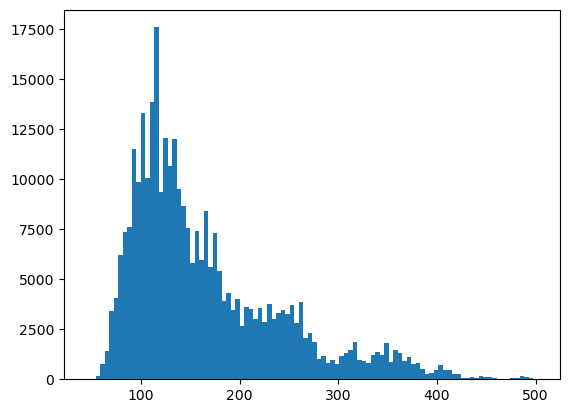

In [14]:
plt.hist(n_obs, bins=100)

### Pre-trained

In [ ]:
# Calculate features

In [54]:
features_astromer = astromer_features

In [11]:
features_astromer = get_astromer_features(attention_vectors)

CPU times: user 175 ms, sys: 26 µs, total: 175 ms
Wall time: 175 ms


In [183]:
%%time
features_astromer_large = get_astromer_features(attention_vectors, with_percentiles=True)

<timed exec>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1000 [00:00<?, ?it/s]

[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy

29/03/2023 18:43:17 ERROR: ==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/sjnakoneczny/tools/anaconda3/envs/py39-lofar-dr2/lib/python3.9/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2838, in while_loop
    return result  File "/home/sjnakoneczny/tools/anaconda3/envs/py39-lofar-dr2/lib/python3.9/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2786, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))  File "/home/sjnakoneczny/tools/anaconda3/envs/py39-lofar-dr2/lib/python3.9/site-packages/tensorflow/python/ops/map_fn.py", line 493, in compute
    return (i + 1, tas)  File "/home/sjnakoneczny/tools/anaconda3/envs/py39-lofar-dr2/lib/python3.9/site-packages/tensorflow/python/ops/map_fn.py", line 491, in <listcomp>
    ta.write(i, value) for (ta, value) in zip(tas, r

[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy arrays
[INFO] Loading numpy

# Classification: ZTF XGB & DNN

In [8]:
from data import get_ztf_features

In [10]:
kowalski = Kowalski(
    username='nakonecz',
    password='%p!Sn8YVP12h',
    host='gloria.caltech.edu',
    timeout=99999999,
)

token = kowalski.authenticate()

In [22]:
ztf_x_sdss_clf = get_ztf_features(ztf_x_sdss_features['g']['_id'].tolist(), token, get_classification=True)





  0%|                                                                        | 0/322 [00:00<?, ?it/s]



  0%|▏                                                               | 1/322 [00:00<01:09,  4.59it/s]



  2%|█▏                                                              | 6/322 [00:00<00:14, 21.87it/s]



  4%|██▋                                                            | 14/322 [00:00<00:07, 41.87it/s]



  7%|████▋                                                          | 24/322 [00:00<00:04, 61.20it/s]



 11%|██████▊                                                        | 35/322 [00:00<00:03, 75.29it/s]



 14%|████████▌                                                      | 44/322 [00:00<00:03, 71.58it/s]



 17%|██████████▊                                                    | 55/322 [00:00<00:03, 81.68it/s]



 20%|████████████▋                                                  | 65/322 [00:00<00:02, 85.87it/s]



 23%|██████████████▋                               

In [24]:
ztf_x_sdss_clf.shape

(5163, 9)

In [25]:
ztf_x_sdss_features['g'].shape

(321929, 83)

In [32]:
ids_sdss = np.array([obj['id'] for obj in ztf_x_sdss_filter['g']])
idx_match = [np.where(ids_sdss == id_clf)[0][0] for id_clf in tqdm(ztf_x_sdss_clf['_id'])]
sdss_x_ztf_clf = sdss_x_ztf.loc[idx_match].reset_index(drop=True)

  0%|          | 0/5163 [00:00<?, ?it/s]

In [74]:
ztf_x_sdss_clf['CLASS_XGB'] = ztf_x_sdss_clf[['agn_xgb', 'bis_xgb', 'puls_xgb', 'yso_xgb']].idxmax(axis=1)
ztf_x_sdss_clf['CLASS_DNN'] = ztf_x_sdss_clf[['agn_dnn', 'bis_dnn', 'puls_dnn', 'yso_dnn']].idxmax(axis=1)

ztf_x_sdss_clf['AGN_XGB'] = ztf_x_sdss_clf.apply(lambda row: 'AGN' if row['agn_xgb'] > 0.5 else 'NON AGN', axis=1)
ztf_x_sdss_clf['AGN_DNN'] = ztf_x_sdss_clf.apply(lambda row: 'AGN' if row['agn_dnn'] > 0.5 else 'NON AGN', axis=1)

In [82]:
from ml import extract_agn_class

In [83]:
sdss_x_ztf_clf['CLASS AGN'] = extract_agn_class(sdss_x_ztf_clf)

In [91]:
indices_sdss = {
    'QSO': 0,
    'AGN': 1,
    'GALAXY': 2,
    'STAR': 3,
}
indices_ztf = {
    'AGN': 0,
    'NON AGN': 1,
    'agn_xgb': 0,
    'bis_xgb': 1,
    'puls_xgb': 2,
    'yso_xgb': 3,
    'agn_dnn': 0,
    'bis_dnn': 1,
    'puls_dnn': 2,
    'yso_dnn': 3,
}

In [89]:
sdss_x_ztf_clf['CLASS AGN'].value_counts()

GALAXY    2235
STAR      2021
QSO        859
AGN         48
Name: CLASS AGN, dtype: int64

In [95]:
def make_cm_plot(model='XGB'):
    idx_sdss = [indices_sdss[cls] for cls in sdss_x_ztf_clf['CLASS AGN']]
    idx_ztf = [indices_ztf[cls] for cls in ztf_x_sdss_clf['AGN_{}'.format(model)]]

    cm = np.zeros((4, 2), dtype=int)
    np.add.at(cm, (idx_sdss, idx_ztf), 1)

    fig, ax = plt.subplots()
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.6)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

    ax.set_xticklabels(['', 'AGN', 'NON AGN'])
    ax.set_yticklabels(['', 'QSO', 'AGN', 'GALAXY', 'STAR'])

    plt.xlabel('ZTF')
    plt.ylabel('SDSS')

/tmp/ipykernel_1132826/3861707753.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'AGN', 'NON AGN'])
/tmp/ipykernel_1132826/3861707753.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'QSO', 'AGN', 'GALAXY', 'STAR'])


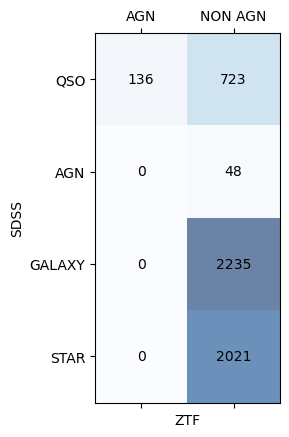

In [96]:
make_cm_plot('XGB')

/tmp/ipykernel_1132826/3861707753.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'AGN', 'NON AGN'])
/tmp/ipykernel_1132826/3861707753.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'QSO', 'AGN', 'GALAXY', 'STAR'])


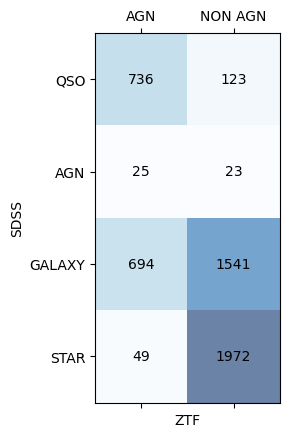

In [97]:
make_cm_plot('DNN')